In [1]:
!pip install scikit-optimize

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [4]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [5]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [6]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [7]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [8]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [9]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [10]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [11]:
import pickle

with open('./RATINGS_OKKO_item_coldstart_dataset.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [12]:
df.shape

(9323, 20)

In [13]:
df.head(1).T

0
availability                                           [SUBSCRIPTION]
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...
age_access_type                                                    18
country                                                         [usa]
average_rating                                                   6.99
duration                                                      3780000
type                                                            MOVIE
name                                              Прожарка Чарли Шина
release_year                                                     2011
genre                                           [Comedy, Documentary]
director                       [1de22aff-430e-4af9-bf1d-159dbf8e9269]
element_uid                      3f30a2ef-53b7-40e3-954f-1bdfc38a6d17
subscription_only                                                True
av_rate_x                                                    0.004276
av_rate_y                                                    0.003705
users_number_x                                                     21
users_number_y                                                     22
user_count_3months                                                 21
av_ratings_3months                                           0.004276
min_ts                                            2020-11-10 00:37:34

In [14]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [15]:
all_unique_genres = set(all_genres)

In [16]:
len(all_unique_genres)

32

In [17]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '66fad8c3-d84f-458d-a8bf-5b4f154969e0',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Travel',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [18]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [19]:
decoded_genres

['5c403894-146a-47a4-ae75-9f1956a30dbb',
 'Documentary',
 'Sport',
 'Biography',
 'Crime',
 'Show',
 'Music',
 'Comedy',
 'Adventure',
 'Drama',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 'Family',
 'Thriller',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'Fantasy',
 'Shorts',
 'Travel',
 'Detective',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'ArtHouse',
 'Action',
 'History',
 'Cartoons',
 'Sci-Fi',
 'Humor',
 'Melodrama',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 'War_movies',
 'Anime',
 'Theater',
 'ForKids',
 'Horror']

In [20]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))

======actor======
Len: 28834
======country======
Len: 102
======genre======
Len: 32
======director======
Len: 6889


# Preprocessing

1. Multiple value categorical features: tops' tf-idf
    * actor: top 5
    * country: 1st
    * genre: top 3
    * director: 1st 
2. Just categorical 
    * type: ohe
    * release year: periods: 1918-1969, 1970-1979, 1980-1989, ... с 2000 по годам
3. Numeric and categorical ordered
    * age_access: scale
    * avg_rating: knn-imputer, scale
    * duration: scale

    
## Multiple value categorical features: tops' tf-idf

### ohe

In [21]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]
    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

In [22]:
def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
#         df[f'{cat}_{topN[i]}'] = [item[i] for item in df[cat]]
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [23]:
df.dropna(subset=['availability'], inplace=True)

In [24]:
avail, name = add_topN_feature(df, 'availability', len(df['availability']))
prep_df = ohe_topN_features(df, avail, name)

### filter by year

In [25]:
prep_df = prep_df[prep_df['release_year'] >= 2000]

In [26]:
prep_df.shape

(7719, 24)

In [27]:
prep_df.head(1).T

0
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...
age_access_type                                                    18
country                                                         [usa]
average_rating                                                   6.99
duration                                                      3780000
type                                                            MOVIE
name                                              Прожарка Чарли Шина
release_year                                                     2011
genre                                           [Comedy, Documentary]
director                       [1de22aff-430e-4af9-bf1d-159dbf8e9269]
element_uid                      3f30a2ef-53b7-40e3-954f-1bdfc38a6d17
subscription_only                                                True
av_rate_x                                                    0.004276
av_rate_y                                                    0.003705
users_number_x                                                     21
users_number_y                                                     22
user_count_3months                                                 21
av_ratings_3months                                           0.004276
min_ts                                            2020-11-10 00:37:34
SUBSCRIPTION                                                        1
DTO                                                                 0
RENT                                                                0
AVOD                                                                0
FVOD                                                                0

In [28]:
prep_df.drop('FVOD', axis=1, inplace=True)

In [29]:
mltpl_cat_features = ['actor', 'country', 'genre', 'director']
num_features = ['average_rating', 'duration']
cat_features = ['age_access_type']
skewed_num_features = ['duration']
mltpl_cat_n_top = {'actor': 5, 'country': 1, 'genre': 3, 'director': 1}

In [30]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
# from spacy.tokenizer import Tokenizer
# from spacy.lang.en import English
# nlp = English()


class Preprocesser:
    def __init__(self, 
                mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
                mltpl_cat_n_top: dict):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [31]:
preprocesser = Preprocesser(mltpl_cat_features,
            skewed_num_features,
            #text_features,
            mltpl_cat_n_top)

In [32]:
df_pr = preprocesser.preprocess(prep_df)

In [33]:
df_pr.isnull().sum()

age_access_type          0
average_rating         460
duration                 0
type                     0
name                     0
release_year             0
element_uid              0
subscription_only        0
av_rate_x                0
av_rate_y                0
users_number_x           0
users_number_y           0
user_count_3months       0
av_ratings_3months       0
min_ts                   0
SUBSCRIPTION             0
DTO                      0
RENT                     0
AVOD                     0
actor_0                  0
actor_1                340
actor_2                451
actor_3                609
actor_4               2597
country_0                0
genre_0                  0
genre_1               2208
genre_2               4915
director_0               0
dtype: int64

In [34]:
df_pr.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'country_0',
       'genre_0', 'genre_1', 'genre_2', 'director_0'],
      dtype='object')

In [35]:
cat_features = ['age_access_type', 'type',
                'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'country_0',
                'genre_0', 'genre_1', 'genre_2', 'director_0']

In [36]:
df_pr[cat_features] = df_pr[cat_features].replace(np.nan, 'Na')

In [37]:
df_pr['average_rating'] =df_pr['average_rating'].astype(float)
# df_pr['age_access_type'] =df_pr['age_access_type'].astype(int)

### Target destrib

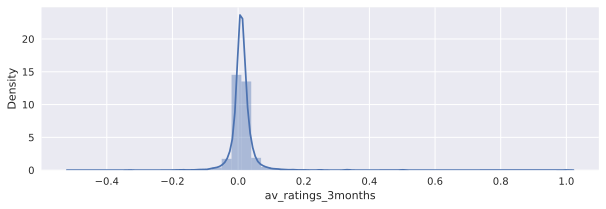

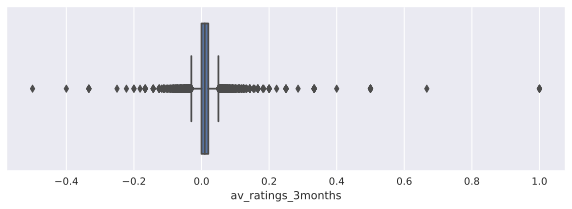

In [38]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['av_ratings_3months'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['av_ratings_3months'], orient='h')
plt.show()

## Split

In [39]:
X, y = df_pr.drop('av_ratings_3months', axis=1), df_pr['av_ratings_3months']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [42]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((6252, 28), (695, 28), (772, 28), (6252,), (695,), (772,))

In [43]:
X_train.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'min_ts', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD', 'actor_0', 'actor_1',
       'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1',
       'genre_2', 'director_0'],
      dtype='object')

In [44]:
cols = ['age_access_type', 'average_rating', 'duration', 'type', 
        'subscription_only', 'SUBSCRIPTION', 'DTO', 
        'RENT', 'AVOD', 'actor_0', 'actor_1',
        'actor_2', 'actor_3', 'actor_4',
        'country_0', 'genre_0', 'genre_1',
        'genre_2', 'director_0']

In [45]:
X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]

# Modeling

In [46]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [56]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
#     early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.0679
0:	learn: 0.0185205	test: 0.0222310	best: 0.0222310 (0)	total: 40.1ms	remaining: 40s
100:	learn: 0.0164576	test: 0.0203997	best: 0.0203885 (93)	total: 1.99s	remaining: 17.7s
200:	learn: 0.0163362	test: 0.0205246	best: 0.0203885 (93)	total: 3.75s	remaining: 14.9s
300:	learn: 0.0161171	test: 0.0206421	best: 0.0203885 (93)	total: 5.64s	remaining: 13.1s
400:	learn: 0.0158951	test: 0.0207611	best: 0.0203885 (93)	total: 7.56s	remaining: 11.3s
500:	learn: 0.0156912	test: 0.0208476	best: 0.0203885 (93)	total: 9.53s	remaining: 9.49s
600:	learn: 0.0155174	test: 0.0208325	best: 0.0203885 (93)	total: 11.6s	remaining: 7.68s
700:	learn: 0.0153484	test: 0.0209509	best: 0.0203885 (93)	total: 13.6s	remaining: 5.78s
800:	learn: 0.0152132	test: 0.0209470	best: 0.0203885 (93)	total: 15.5s	remaining: 3.85s
900:	learn: 0.0150539	test: 0.0209841	best: 0.0203885 (93)	total: 17.4s	remaining: 1.91s
999:	learn: 0.0148689	test: 0.0210407	best: 0.0203885 (93)	total: 19.3s	remaining: 0us

In [57]:
y_pred = cat_model.predict(test_dataset)

In [59]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.0009534808320393015
RMSE:  0.03087848493756294
R2:    0.11846003641958514
MAE:   0.015150448746888128
MedAE: 0.008288139620502179
------------------------------


In [60]:
cat_model.save_model('cat_reg_okko_ratings_pred')

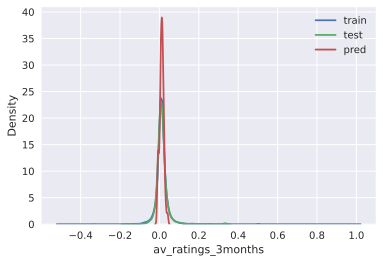

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


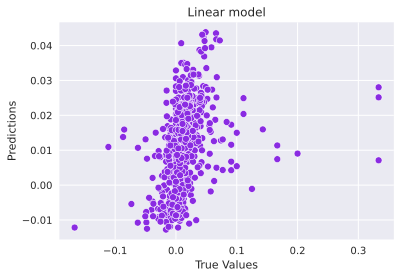

In [66]:
target_distr_linear(y_train, y_test, y_pred)   

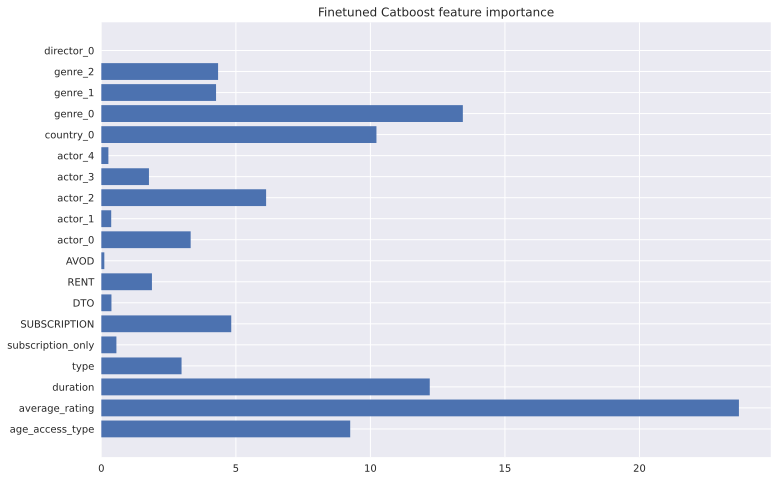

In [67]:
get_feature_imp(cat_model, train_dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


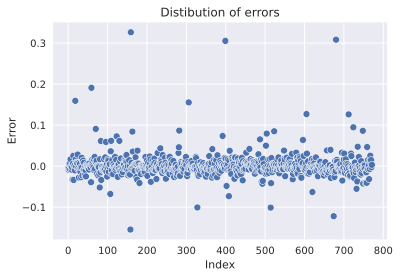

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


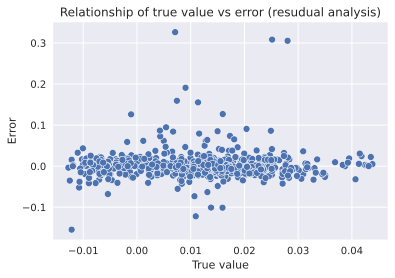

In [68]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

# Tuning

In [67]:
train_dataset

In [68]:
train_dataset = cat.Pool(X_train, y_train, 
                         cat_features=cat_features
                        ) 

test_dataset = cat.Pool(X_test, y_test,
                         cat_features=cat_features
                       )

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [ ]:
parameters_distr = {'depth': randint(5, 10),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [5000, 10000, 15000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, 
#                           n_jobs=-1,
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_okko_rat', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.0179936	total: 33.2ms	remaining: 2m 45s
1:	learn: 0.0177122	total: 55.1ms	remaining: 2m 17s
2:	learn: 0.0175332	total: 80.2ms	remaining: 2m 13s
3:	learn: 0.0173738	total: 99.1ms	remaining: 2m 3s
4:	learn: 0.0172095	total: 116ms	remaining: 1m 56s
5:	learn: 0.0170676	total: 134ms	remaining: 1m 51s
6:	learn: 0.0169252	total: 152ms	remaining: 1m 48s
7:	learn: 0.0168262	total: 167ms	remaining: 1m 44s
8:	learn: 0.0167503	total: 182ms	remaining: 1m 41s
9:	learn: 0.0167034	total: 199ms	remaining: 1m 39s
10:	learn: 0.0166203	total: 213ms	remaining: 1m 36s
11:	learn: 0.0165516	total: 229ms	remaining: 1m 35s
12:	learn: 0.0165259	total: 244ms	remaining: 1m 33s
13:	learn: 0.0164973	total: 259ms	remaining: 1m 32s
14:	learn: 0.0164995	total: 266ms	remaining: 1m 28s
15:	learn: 0.0164911	total: 280ms	remaining: 1m 27s
16:	learn: 0.0164803	total: 291ms	remaining: 1m 25s
17:	learn: 0.0164574	total: 303ms	remaining: 1m 23s
18:	learn:

162:	learn: 0.0160800	total: 2.05s	remaining: 1m
163:	learn: 0.0160750	total: 2.06s	remaining: 1m
164:	learn: 0.0160645	total: 2.08s	remaining: 1m
165:	learn: 0.0160601	total: 2.09s	remaining: 1m
166:	learn: 0.0160620	total: 2.1s	remaining: 1m
167:	learn: 0.0160615	total: 2.12s	remaining: 1m
168:	learn: 0.0160614	total: 2.13s	remaining: 1m
169:	learn: 0.0160595	total: 2.14s	remaining: 1m
170:	learn: 0.0160592	total: 2.15s	remaining: 1m
171:	learn: 0.0160571	total: 2.17s	remaining: 1m
172:	learn: 0.0160471	total: 2.18s	remaining: 1m
173:	learn: 0.0160492	total: 2.19s	remaining: 1m
174:	learn: 0.0160478	total: 2.21s	remaining: 1m
175:	learn: 0.0160472	total: 2.22s	remaining: 1m
176:	learn: 0.0160482	total: 2.23s	remaining: 1m
177:	learn: 0.0160472	total: 2.24s	remaining: 1m
178:	learn: 0.0160450	total: 2.26s	remaining: 1m
179:	learn: 0.0160475	total: 2.27s	remaining: 1m
180:	learn: 0.0160427	total: 2.28s	remaining: 1m
181:	learn: 0.0160428	total: 2.3s	remaining: 1m
182:	learn: 0.0160378	

332:	learn: 0.0156510	total: 4.32s	remaining: 1m
333:	learn: 0.0156470	total: 4.33s	remaining: 1m
334:	learn: 0.0156452	total: 4.34s	remaining: 1m
335:	learn: 0.0156330	total: 4.36s	remaining: 1m
336:	learn: 0.0156331	total: 4.37s	remaining: 1m
337:	learn: 0.0156283	total: 4.38s	remaining: 1m
338:	learn: 0.0156277	total: 4.4s	remaining: 1m
339:	learn: 0.0156273	total: 4.41s	remaining: 1m
340:	learn: 0.0156265	total: 4.42s	remaining: 1m
341:	learn: 0.0156257	total: 4.43s	remaining: 1m
342:	learn: 0.0156255	total: 4.45s	remaining: 1m
343:	learn: 0.0156248	total: 4.46s	remaining: 1m
344:	learn: 0.0156223	total: 4.48s	remaining: 1m
345:	learn: 0.0156213	total: 4.5s	remaining: 1m
346:	learn: 0.0156195	total: 4.51s	remaining: 1m
347:	learn: 0.0156199	total: 4.53s	remaining: 1m
348:	learn: 0.0156168	total: 4.54s	remaining: 1m
349:	learn: 0.0156160	total: 4.55s	remaining: 1m
350:	learn: 0.0156159	total: 4.57s	remaining: 1m
351:	learn: 0.0156111	total: 4.58s	remaining: 1m
352:	learn: 0.0155996	

499:	learn: 0.0152698	total: 6.6s	remaining: 59.4s
500:	learn: 0.0152704	total: 6.61s	remaining: 59.4s
501:	learn: 0.0152679	total: 6.62s	remaining: 59.3s
502:	learn: 0.0152637	total: 6.64s	remaining: 59.3s
503:	learn: 0.0152622	total: 6.65s	remaining: 59.3s
504:	learn: 0.0152599	total: 6.66s	remaining: 59.3s
505:	learn: 0.0152596	total: 6.68s	remaining: 59.3s
506:	learn: 0.0152559	total: 6.69s	remaining: 59.3s
507:	learn: 0.0152558	total: 6.71s	remaining: 59.3s
508:	learn: 0.0152523	total: 6.72s	remaining: 59.3s
509:	learn: 0.0152507	total: 6.73s	remaining: 59.3s
510:	learn: 0.0152501	total: 6.74s	remaining: 59.2s
511:	learn: 0.0152461	total: 6.75s	remaining: 59.2s
512:	learn: 0.0152440	total: 6.77s	remaining: 59.2s
513:	learn: 0.0152434	total: 6.78s	remaining: 59.2s
514:	learn: 0.0152427	total: 6.8s	remaining: 59.2s
515:	learn: 0.0152305	total: 6.81s	remaining: 59.2s
516:	learn: 0.0152333	total: 6.82s	remaining: 59.1s
517:	learn: 0.0152314	total: 6.83s	remaining: 59.1s
518:	learn: 0.

669:	learn: 0.0149270	total: 8.87s	remaining: 57.3s
670:	learn: 0.0149257	total: 8.88s	remaining: 57.3s
671:	learn: 0.0149224	total: 8.9s	remaining: 57.3s
672:	learn: 0.0149212	total: 8.91s	remaining: 57.3s
673:	learn: 0.0149168	total: 8.93s	remaining: 57.3s
674:	learn: 0.0149102	total: 8.94s	remaining: 57.3s
675:	learn: 0.0149107	total: 8.95s	remaining: 57.3s
676:	learn: 0.0149065	total: 8.96s	remaining: 57.2s
677:	learn: 0.0149037	total: 8.97s	remaining: 57.2s
678:	learn: 0.0149038	total: 8.99s	remaining: 57.2s
679:	learn: 0.0149028	total: 9s	remaining: 57.2s
680:	learn: 0.0148999	total: 9.01s	remaining: 57.2s
681:	learn: 0.0148997	total: 9.03s	remaining: 57.2s
682:	learn: 0.0149000	total: 9.04s	remaining: 57.2s
683:	learn: 0.0149002	total: 9.06s	remaining: 57.2s
684:	learn: 0.0148965	total: 9.07s	remaining: 57.1s
685:	learn: 0.0148954	total: 9.09s	remaining: 57.2s
686:	learn: 0.0148963	total: 9.1s	remaining: 57.1s
687:	learn: 0.0148937	total: 9.12s	remaining: 57.1s
688:	learn: 0.014

835:	learn: 0.0145805	total: 11.2s	remaining: 55.6s
836:	learn: 0.0145781	total: 11.2s	remaining: 55.5s
837:	learn: 0.0145751	total: 11.2s	remaining: 55.5s
838:	learn: 0.0145748	total: 11.2s	remaining: 55.5s
839:	learn: 0.0145715	total: 11.2s	remaining: 55.5s
840:	learn: 0.0145714	total: 11.2s	remaining: 55.5s
841:	learn: 0.0145713	total: 11.2s	remaining: 55.5s
842:	learn: 0.0145673	total: 11.2s	remaining: 55.4s
843:	learn: 0.0145658	total: 11.3s	remaining: 55.4s
844:	learn: 0.0145642	total: 11.3s	remaining: 55.4s
845:	learn: 0.0145637	total: 11.3s	remaining: 55.4s
846:	learn: 0.0145653	total: 11.3s	remaining: 55.4s
847:	learn: 0.0145596	total: 11.3s	remaining: 55.4s
848:	learn: 0.0145521	total: 11.3s	remaining: 55.4s
849:	learn: 0.0145520	total: 11.3s	remaining: 55.4s
850:	learn: 0.0145494	total: 11.4s	remaining: 55.4s
851:	learn: 0.0145500	total: 11.4s	remaining: 55.3s
852:	learn: 0.0145501	total: 11.4s	remaining: 55.3s
853:	learn: 0.0145482	total: 11.4s	remaining: 55.3s
854:	learn: 

1000:	learn: 0.0142257	total: 13.4s	remaining: 53.7s
1001:	learn: 0.0142232	total: 13.4s	remaining: 53.6s
1002:	learn: 0.0142229	total: 13.5s	remaining: 53.6s
1003:	learn: 0.0142202	total: 13.5s	remaining: 53.6s
1004:	learn: 0.0142199	total: 13.5s	remaining: 53.6s
1005:	learn: 0.0142176	total: 13.5s	remaining: 53.6s
1006:	learn: 0.0142070	total: 13.5s	remaining: 53.6s
1007:	learn: 0.0142028	total: 13.5s	remaining: 53.6s
1008:	learn: 0.0141987	total: 13.5s	remaining: 53.6s
1009:	learn: 0.0141995	total: 13.6s	remaining: 53.5s
1010:	learn: 0.0141997	total: 13.6s	remaining: 53.5s
1011:	learn: 0.0141975	total: 13.6s	remaining: 53.5s
1012:	learn: 0.0141950	total: 13.6s	remaining: 53.5s
1013:	learn: 0.0141940	total: 13.6s	remaining: 53.5s
1014:	learn: 0.0141921	total: 13.6s	remaining: 53.5s
1015:	learn: 0.0141931	total: 13.6s	remaining: 53.5s
1016:	learn: 0.0141889	total: 13.6s	remaining: 53.5s
1017:	learn: 0.0141876	total: 13.7s	remaining: 53.4s
1018:	learn: 0.0141870	total: 13.7s	remaining:

1166:	learn: 0.0139026	total: 15.7s	remaining: 51.6s
1167:	learn: 0.0139006	total: 15.7s	remaining: 51.6s
1168:	learn: 0.0138994	total: 15.7s	remaining: 51.6s
1169:	learn: 0.0138996	total: 15.8s	remaining: 51.6s
1170:	learn: 0.0138957	total: 15.8s	remaining: 51.6s
1171:	learn: 0.0138893	total: 15.8s	remaining: 51.5s
1172:	learn: 0.0138835	total: 15.8s	remaining: 51.5s
1173:	learn: 0.0138830	total: 15.8s	remaining: 51.5s
1174:	learn: 0.0138821	total: 15.8s	remaining: 51.5s
1175:	learn: 0.0138796	total: 15.8s	remaining: 51.5s
1176:	learn: 0.0138785	total: 15.9s	remaining: 51.5s
1177:	learn: 0.0138798	total: 15.9s	remaining: 51.5s
1178:	learn: 0.0138790	total: 15.9s	remaining: 51.5s
1179:	learn: 0.0138775	total: 15.9s	remaining: 51.5s
1180:	learn: 0.0138731	total: 15.9s	remaining: 51.4s
1181:	learn: 0.0138726	total: 15.9s	remaining: 51.4s
1182:	learn: 0.0138722	total: 15.9s	remaining: 51.4s
1183:	learn: 0.0138709	total: 15.9s	remaining: 51.4s
1184:	learn: 0.0138683	total: 16s	remaining: 5

1328:	learn: 0.0135720	total: 18s	remaining: 49.6s
1329:	learn: 0.0135686	total: 18s	remaining: 49.6s
1330:	learn: 0.0135661	total: 18s	remaining: 49.6s
1331:	learn: 0.0135651	total: 18s	remaining: 49.6s
1332:	learn: 0.0135601	total: 18s	remaining: 49.6s
1333:	learn: 0.0135598	total: 18s	remaining: 49.6s
1334:	learn: 0.0135606	total: 18s	remaining: 49.6s
1335:	learn: 0.0135599	total: 18.1s	remaining: 49.5s
1336:	learn: 0.0135588	total: 18.1s	remaining: 49.5s
1337:	learn: 0.0135576	total: 18.1s	remaining: 49.5s
1338:	learn: 0.0135573	total: 18.1s	remaining: 49.5s
1339:	learn: 0.0135557	total: 18.1s	remaining: 49.5s
1340:	learn: 0.0135531	total: 18.1s	remaining: 49.5s
1341:	learn: 0.0135507	total: 18.1s	remaining: 49.5s
1342:	learn: 0.0135503	total: 18.2s	remaining: 49.5s
1343:	learn: 0.0135458	total: 18.2s	remaining: 49.5s
1344:	learn: 0.0135442	total: 18.2s	remaining: 49.4s
1345:	learn: 0.0135427	total: 18.2s	remaining: 49.4s
1346:	learn: 0.0135429	total: 18.2s	remaining: 49.4s
1347:	l

1495:	learn: 0.0132878	total: 20.2s	remaining: 47.4s
1496:	learn: 0.0132865	total: 20.3s	remaining: 47.4s
1497:	learn: 0.0132834	total: 20.3s	remaining: 47.4s
1498:	learn: 0.0132810	total: 20.3s	remaining: 47.4s
1499:	learn: 0.0132805	total: 20.3s	remaining: 47.4s
1500:	learn: 0.0132760	total: 20.3s	remaining: 47.4s
1501:	learn: 0.0132748	total: 20.3s	remaining: 47.4s
1502:	learn: 0.0132743	total: 20.3s	remaining: 47.3s
1503:	learn: 0.0132722	total: 20.4s	remaining: 47.3s
1504:	learn: 0.0132709	total: 20.4s	remaining: 47.3s
1505:	learn: 0.0132712	total: 20.4s	remaining: 47.3s
1506:	learn: 0.0132694	total: 20.4s	remaining: 47.3s
1507:	learn: 0.0132678	total: 20.4s	remaining: 47.3s
1508:	learn: 0.0132622	total: 20.4s	remaining: 47.3s
1509:	learn: 0.0132570	total: 20.4s	remaining: 47.2s
1510:	learn: 0.0132558	total: 20.5s	remaining: 47.2s
1511:	learn: 0.0132552	total: 20.5s	remaining: 47.2s
1512:	learn: 0.0132508	total: 20.5s	remaining: 47.2s
1513:	learn: 0.0132486	total: 20.5s	remaining:

1661:	learn: 0.0130060	total: 22.5s	remaining: 45.3s
1662:	learn: 0.0130040	total: 22.5s	remaining: 45.2s
1663:	learn: 0.0130021	total: 22.6s	remaining: 45.2s
1664:	learn: 0.0130018	total: 22.6s	remaining: 45.2s
1665:	learn: 0.0130002	total: 22.6s	remaining: 45.2s
1666:	learn: 0.0130000	total: 22.6s	remaining: 45.2s
1667:	learn: 0.0129995	total: 22.6s	remaining: 45.2s
1668:	learn: 0.0129954	total: 22.6s	remaining: 45.2s
1669:	learn: 0.0129918	total: 22.6s	remaining: 45.2s
1670:	learn: 0.0129901	total: 22.7s	remaining: 45.1s
1671:	learn: 0.0129891	total: 22.7s	remaining: 45.1s
1672:	learn: 0.0129880	total: 22.7s	remaining: 45.1s
1673:	learn: 0.0129875	total: 22.7s	remaining: 45.1s
1674:	learn: 0.0129864	total: 22.7s	remaining: 45.1s
1675:	learn: 0.0129853	total: 22.7s	remaining: 45.1s
1676:	learn: 0.0129845	total: 22.7s	remaining: 45.1s
1677:	learn: 0.0129829	total: 22.8s	remaining: 45s
1678:	learn: 0.0129821	total: 22.8s	remaining: 45s
1679:	learn: 0.0129804	total: 22.8s	remaining: 45s

1826:	learn: 0.0127405	total: 24.8s	remaining: 43.1s
1827:	learn: 0.0127396	total: 24.8s	remaining: 43.1s
1828:	learn: 0.0127382	total: 24.8s	remaining: 43.1s
1829:	learn: 0.0127357	total: 24.8s	remaining: 43s
1830:	learn: 0.0127332	total: 24.9s	remaining: 43s
1831:	learn: 0.0127324	total: 24.9s	remaining: 43s
1832:	learn: 0.0127288	total: 24.9s	remaining: 43s
1833:	learn: 0.0127250	total: 24.9s	remaining: 43s
1834:	learn: 0.0127215	total: 24.9s	remaining: 43s
1835:	learn: 0.0127215	total: 24.9s	remaining: 43s
1836:	learn: 0.0127212	total: 24.9s	remaining: 43s
1837:	learn: 0.0127209	total: 25s	remaining: 42.9s
1838:	learn: 0.0127124	total: 25s	remaining: 42.9s
1839:	learn: 0.0127120	total: 25s	remaining: 42.9s
1840:	learn: 0.0127129	total: 25s	remaining: 42.9s
1841:	learn: 0.0127100	total: 25s	remaining: 42.9s
1842:	learn: 0.0127109	total: 25s	remaining: 42.9s
1843:	learn: 0.0127047	total: 25s	remaining: 42.9s
1844:	learn: 0.0127028	total: 25.1s	remaining: 42.9s
1845:	learn: 0.0127007	

1987:	learn: 0.0124732	total: 27.1s	remaining: 41s
1988:	learn: 0.0124711	total: 27.1s	remaining: 41s
1989:	learn: 0.0124710	total: 27.1s	remaining: 41s
1990:	learn: 0.0124687	total: 27.1s	remaining: 41s
1991:	learn: 0.0124674	total: 27.1s	remaining: 40.9s
1992:	learn: 0.0124665	total: 27.1s	remaining: 40.9s
1993:	learn: 0.0124655	total: 27.1s	remaining: 40.9s
1994:	learn: 0.0124629	total: 27.2s	remaining: 40.9s
1995:	learn: 0.0124628	total: 27.2s	remaining: 40.9s
1996:	learn: 0.0124609	total: 27.2s	remaining: 40.9s
1997:	learn: 0.0124606	total: 27.2s	remaining: 40.9s
1998:	learn: 0.0124604	total: 27.2s	remaining: 40.8s
1999:	learn: 0.0124601	total: 27.2s	remaining: 40.8s
2000:	learn: 0.0124593	total: 27.2s	remaining: 40.8s
2001:	learn: 0.0124590	total: 27.3s	remaining: 40.8s
2002:	learn: 0.0124588	total: 27.3s	remaining: 40.8s
2003:	learn: 0.0124572	total: 27.3s	remaining: 40.8s
2004:	learn: 0.0124570	total: 27.3s	remaining: 40.8s
2005:	learn: 0.0124533	total: 27.3s	remaining: 40.8s
2

2151:	learn: 0.0122182	total: 29.3s	remaining: 38.8s
2152:	learn: 0.0122182	total: 29.4s	remaining: 38.8s
2153:	learn: 0.0122179	total: 29.4s	remaining: 38.8s
2154:	learn: 0.0122177	total: 29.4s	remaining: 38.8s
2155:	learn: 0.0122152	total: 29.4s	remaining: 38.8s
2156:	learn: 0.0122145	total: 29.4s	remaining: 38.8s
2157:	learn: 0.0122135	total: 29.4s	remaining: 38.7s
2158:	learn: 0.0122125	total: 29.4s	remaining: 38.7s
2159:	learn: 0.0122094	total: 29.4s	remaining: 38.7s
2160:	learn: 0.0122081	total: 29.5s	remaining: 38.7s
2161:	learn: 0.0122071	total: 29.5s	remaining: 38.7s
2162:	learn: 0.0122061	total: 29.5s	remaining: 38.7s
2163:	learn: 0.0122063	total: 29.5s	remaining: 38.7s
2164:	learn: 0.0122063	total: 29.5s	remaining: 38.7s
2165:	learn: 0.0122045	total: 29.5s	remaining: 38.6s
2166:	learn: 0.0122040	total: 29.5s	remaining: 38.6s
2167:	learn: 0.0122028	total: 29.6s	remaining: 38.6s
2168:	learn: 0.0122014	total: 29.6s	remaining: 38.6s
2169:	learn: 0.0121994	total: 29.6s	remaining:

2312:	learn: 0.0119993	total: 31.6s	remaining: 36.7s
2313:	learn: 0.0119951	total: 31.6s	remaining: 36.7s
2314:	learn: 0.0119943	total: 31.6s	remaining: 36.7s
2315:	learn: 0.0119931	total: 31.7s	remaining: 36.7s
2316:	learn: 0.0119883	total: 31.7s	remaining: 36.7s
2317:	learn: 0.0119873	total: 31.7s	remaining: 36.7s
2318:	learn: 0.0119859	total: 31.7s	remaining: 36.6s
2319:	learn: 0.0119809	total: 31.7s	remaining: 36.6s
2320:	learn: 0.0119798	total: 31.7s	remaining: 36.6s
2321:	learn: 0.0119793	total: 31.7s	remaining: 36.6s
2322:	learn: 0.0119771	total: 31.8s	remaining: 36.6s
2323:	learn: 0.0119771	total: 31.8s	remaining: 36.6s
2324:	learn: 0.0119765	total: 31.8s	remaining: 36.6s
2325:	learn: 0.0119736	total: 31.8s	remaining: 36.5s
2326:	learn: 0.0119679	total: 31.8s	remaining: 36.5s
2327:	learn: 0.0119684	total: 31.8s	remaining: 36.5s
2328:	learn: 0.0119682	total: 31.8s	remaining: 36.5s
2329:	learn: 0.0119688	total: 31.8s	remaining: 36.5s
2330:	learn: 0.0119685	total: 31.9s	remaining:

2478:	learn: 0.0117640	total: 33.9s	remaining: 34.5s
2479:	learn: 0.0117633	total: 33.9s	remaining: 34.5s
2480:	learn: 0.0117589	total: 33.9s	remaining: 34.4s
2481:	learn: 0.0117591	total: 33.9s	remaining: 34.4s
2482:	learn: 0.0117589	total: 34s	remaining: 34.4s
2483:	learn: 0.0117562	total: 34s	remaining: 34.4s
2484:	learn: 0.0117549	total: 34s	remaining: 34.4s
2485:	learn: 0.0117531	total: 34s	remaining: 34.4s
2486:	learn: 0.0117527	total: 34s	remaining: 34.4s
2487:	learn: 0.0117497	total: 34s	remaining: 34.3s
2488:	learn: 0.0117493	total: 34s	remaining: 34.3s
2489:	learn: 0.0117461	total: 34.1s	remaining: 34.3s
2490:	learn: 0.0117457	total: 34.1s	remaining: 34.3s
2491:	learn: 0.0117430	total: 34.1s	remaining: 34.3s
2492:	learn: 0.0117425	total: 34.1s	remaining: 34.3s
2493:	learn: 0.0117397	total: 34.1s	remaining: 34.3s
2494:	learn: 0.0117374	total: 34.1s	remaining: 34.3s
2495:	learn: 0.0117363	total: 34.1s	remaining: 34.2s
2496:	learn: 0.0117357	total: 34.1s	remaining: 34.2s
2497:	l

2644:	learn: 0.0115079	total: 36.2s	remaining: 32.2s
2645:	learn: 0.0115048	total: 36.2s	remaining: 32.2s
2646:	learn: 0.0115039	total: 36.2s	remaining: 32.2s
2647:	learn: 0.0114997	total: 36.2s	remaining: 32.2s
2648:	learn: 0.0114986	total: 36.2s	remaining: 32.2s
2649:	learn: 0.0114966	total: 36.3s	remaining: 32.1s
2650:	learn: 0.0114950	total: 36.3s	remaining: 32.1s
2651:	learn: 0.0114940	total: 36.3s	remaining: 32.1s
2652:	learn: 0.0114921	total: 36.3s	remaining: 32.1s
2653:	learn: 0.0114907	total: 36.3s	remaining: 32.1s
2654:	learn: 0.0114900	total: 36.3s	remaining: 32.1s
2655:	learn: 0.0114890	total: 36.3s	remaining: 32.1s
2656:	learn: 0.0114882	total: 36.3s	remaining: 32s
2657:	learn: 0.0114849	total: 36.4s	remaining: 32s
2658:	learn: 0.0114835	total: 36.4s	remaining: 32s
2659:	learn: 0.0114808	total: 36.4s	remaining: 32s
2660:	learn: 0.0114803	total: 36.4s	remaining: 32s
2661:	learn: 0.0114797	total: 36.4s	remaining: 32s
2662:	learn: 0.0114785	total: 36.4s	remaining: 32s
2663:	l

2810:	learn: 0.0112689	total: 38.5s	remaining: 30s
2811:	learn: 0.0112679	total: 38.5s	remaining: 29.9s
2812:	learn: 0.0112670	total: 38.5s	remaining: 29.9s
2813:	learn: 0.0112642	total: 38.5s	remaining: 29.9s
2814:	learn: 0.0112640	total: 38.5s	remaining: 29.9s
2815:	learn: 0.0112640	total: 38.5s	remaining: 29.9s
2816:	learn: 0.0112648	total: 38.5s	remaining: 29.9s
2817:	learn: 0.0112638	total: 38.6s	remaining: 29.9s
2818:	learn: 0.0112587	total: 38.6s	remaining: 29.8s
2819:	learn: 0.0112573	total: 38.6s	remaining: 29.8s
2820:	learn: 0.0112570	total: 38.6s	remaining: 29.8s
2821:	learn: 0.0112576	total: 38.6s	remaining: 29.8s
2822:	learn: 0.0112579	total: 38.6s	remaining: 29.8s
2823:	learn: 0.0112564	total: 38.6s	remaining: 29.8s
2824:	learn: 0.0112552	total: 38.7s	remaining: 29.8s
2825:	learn: 0.0112546	total: 38.7s	remaining: 29.7s
2826:	learn: 0.0112543	total: 38.7s	remaining: 29.7s
2827:	learn: 0.0112467	total: 38.7s	remaining: 29.7s
2828:	learn: 0.0112448	total: 38.7s	remaining: 2

2977:	learn: 0.0110671	total: 40.7s	remaining: 27.7s
2978:	learn: 0.0110658	total: 40.8s	remaining: 27.6s
2979:	learn: 0.0110648	total: 40.8s	remaining: 27.6s
2980:	learn: 0.0110641	total: 40.8s	remaining: 27.6s
2981:	learn: 0.0110628	total: 40.8s	remaining: 27.6s
2982:	learn: 0.0110621	total: 40.8s	remaining: 27.6s
2983:	learn: 0.0110617	total: 40.8s	remaining: 27.6s
2984:	learn: 0.0110604	total: 40.8s	remaining: 27.6s
2985:	learn: 0.0110593	total: 40.9s	remaining: 27.6s
2986:	learn: 0.0110582	total: 40.9s	remaining: 27.5s
2987:	learn: 0.0110573	total: 40.9s	remaining: 27.5s
2988:	learn: 0.0110559	total: 40.9s	remaining: 27.5s
2989:	learn: 0.0110555	total: 40.9s	remaining: 27.5s
2990:	learn: 0.0110549	total: 40.9s	remaining: 27.5s
2991:	learn: 0.0110528	total: 40.9s	remaining: 27.5s
2992:	learn: 0.0110532	total: 41s	remaining: 27.5s
2993:	learn: 0.0110514	total: 41s	remaining: 27.4s
2994:	learn: 0.0110509	total: 41s	remaining: 27.4s
2995:	learn: 0.0110500	total: 41s	remaining: 27.4s
2

3143:	learn: 0.0108593	total: 43s	remaining: 25.4s
3144:	learn: 0.0108570	total: 43s	remaining: 25.4s
3145:	learn: 0.0108558	total: 43.1s	remaining: 25.4s
3146:	learn: 0.0108544	total: 43.1s	remaining: 25.4s
3147:	learn: 0.0108550	total: 43.1s	remaining: 25.3s
3148:	learn: 0.0108536	total: 43.1s	remaining: 25.3s
3149:	learn: 0.0108526	total: 43.1s	remaining: 25.3s
3150:	learn: 0.0108498	total: 43.1s	remaining: 25.3s
3151:	learn: 0.0108487	total: 43.1s	remaining: 25.3s
3152:	learn: 0.0108469	total: 43.1s	remaining: 25.3s
3153:	learn: 0.0108456	total: 43.2s	remaining: 25.3s
3154:	learn: 0.0108453	total: 43.2s	remaining: 25.2s
3155:	learn: 0.0108442	total: 43.2s	remaining: 25.2s
3156:	learn: 0.0108424	total: 43.2s	remaining: 25.2s
3157:	learn: 0.0108404	total: 43.2s	remaining: 25.2s
3158:	learn: 0.0108384	total: 43.2s	remaining: 25.2s
3159:	learn: 0.0108381	total: 43.2s	remaining: 25.2s
3160:	learn: 0.0108348	total: 43.3s	remaining: 25.2s
3161:	learn: 0.0108316	total: 43.3s	remaining: 25.

3307:	learn: 0.0106547	total: 45.3s	remaining: 23.2s
3308:	learn: 0.0106507	total: 45.3s	remaining: 23.2s
3309:	learn: 0.0106498	total: 45.3s	remaining: 23.1s
3310:	learn: 0.0106479	total: 45.4s	remaining: 23.1s
3311:	learn: 0.0106475	total: 45.4s	remaining: 23.1s
3312:	learn: 0.0106464	total: 45.4s	remaining: 23.1s
3313:	learn: 0.0106466	total: 45.4s	remaining: 23.1s
3314:	learn: 0.0106453	total: 45.4s	remaining: 23.1s
3315:	learn: 0.0106408	total: 45.4s	remaining: 23.1s
3316:	learn: 0.0106404	total: 45.4s	remaining: 23.1s
3317:	learn: 0.0106399	total: 45.5s	remaining: 23s
3318:	learn: 0.0106385	total: 45.5s	remaining: 23s
3319:	learn: 0.0106376	total: 45.5s	remaining: 23s
3320:	learn: 0.0106366	total: 45.5s	remaining: 23s
3321:	learn: 0.0106366	total: 45.5s	remaining: 23s
3322:	learn: 0.0106357	total: 45.5s	remaining: 23s
3323:	learn: 0.0106337	total: 45.5s	remaining: 23s
3324:	learn: 0.0106322	total: 45.5s	remaining: 22.9s
3325:	learn: 0.0106316	total: 45.6s	remaining: 22.9s
3326:	l

3472:	learn: 0.0104515	total: 47.6s	remaining: 20.9s
3473:	learn: 0.0104494	total: 47.6s	remaining: 20.9s
3474:	learn: 0.0104471	total: 47.6s	remaining: 20.9s
3475:	learn: 0.0104452	total: 47.6s	remaining: 20.9s
3476:	learn: 0.0104437	total: 47.7s	remaining: 20.9s
3477:	learn: 0.0104434	total: 47.7s	remaining: 20.9s
3478:	learn: 0.0104429	total: 47.7s	remaining: 20.8s
3479:	learn: 0.0104421	total: 47.7s	remaining: 20.8s
3480:	learn: 0.0104418	total: 47.7s	remaining: 20.8s
3481:	learn: 0.0104378	total: 47.7s	remaining: 20.8s
3482:	learn: 0.0104365	total: 47.7s	remaining: 20.8s
3483:	learn: 0.0104363	total: 47.8s	remaining: 20.8s
3484:	learn: 0.0104364	total: 47.8s	remaining: 20.8s
3485:	learn: 0.0104359	total: 47.8s	remaining: 20.8s
3486:	learn: 0.0104346	total: 47.8s	remaining: 20.7s
3487:	learn: 0.0104328	total: 47.8s	remaining: 20.7s
3488:	learn: 0.0104332	total: 47.8s	remaining: 20.7s
3489:	learn: 0.0104308	total: 47.8s	remaining: 20.7s
3490:	learn: 0.0104274	total: 47.9s	remaining:

3636:	learn: 0.0102517	total: 49.9s	remaining: 18.7s
3637:	learn: 0.0102483	total: 49.9s	remaining: 18.7s
3638:	learn: 0.0102460	total: 49.9s	remaining: 18.7s
3639:	learn: 0.0102455	total: 49.9s	remaining: 18.7s
3640:	learn: 0.0102452	total: 49.9s	remaining: 18.6s
3641:	learn: 0.0102446	total: 50s	remaining: 18.6s
3642:	learn: 0.0102430	total: 50s	remaining: 18.6s
3643:	learn: 0.0102422	total: 50s	remaining: 18.6s
3644:	learn: 0.0102403	total: 50s	remaining: 18.6s
3645:	learn: 0.0102369	total: 50s	remaining: 18.6s
3646:	learn: 0.0102360	total: 50s	remaining: 18.6s
3647:	learn: 0.0102356	total: 50s	remaining: 18.5s
3648:	learn: 0.0102308	total: 50s	remaining: 18.5s
3649:	learn: 0.0102305	total: 50.1s	remaining: 18.5s
3650:	learn: 0.0102284	total: 50.1s	remaining: 18.5s
3651:	learn: 0.0102278	total: 50.1s	remaining: 18.5s
3652:	learn: 0.0102267	total: 50.1s	remaining: 18.5s
3653:	learn: 0.0102260	total: 50.1s	remaining: 18.5s
3654:	learn: 0.0102251	total: 50.1s	remaining: 18.4s
3655:	lea

3799:	learn: 0.0100552	total: 52.2s	remaining: 16.5s
3800:	learn: 0.0100543	total: 52.2s	remaining: 16.5s
3801:	learn: 0.0100532	total: 52.2s	remaining: 16.4s
3802:	learn: 0.0100519	total: 52.2s	remaining: 16.4s
3803:	learn: 0.0100522	total: 52.2s	remaining: 16.4s
3804:	learn: 0.0100518	total: 52.2s	remaining: 16.4s
3805:	learn: 0.0100504	total: 52.2s	remaining: 16.4s
3806:	learn: 0.0100488	total: 52.3s	remaining: 16.4s
3807:	learn: 0.0100462	total: 52.3s	remaining: 16.4s
3808:	learn: 0.0100459	total: 52.3s	remaining: 16.4s
3809:	learn: 0.0100457	total: 52.3s	remaining: 16.3s
3810:	learn: 0.0100451	total: 52.3s	remaining: 16.3s
3811:	learn: 0.0100420	total: 52.3s	remaining: 16.3s
3812:	learn: 0.0100404	total: 52.3s	remaining: 16.3s
3813:	learn: 0.0100388	total: 52.4s	remaining: 16.3s
3814:	learn: 0.0100379	total: 52.4s	remaining: 16.3s
3815:	learn: 0.0100352	total: 52.4s	remaining: 16.3s
3816:	learn: 0.0100359	total: 52.4s	remaining: 16.2s
3817:	learn: 0.0100330	total: 52.4s	remaining:

3961:	learn: 0.0098722	total: 54.4s	remaining: 14.3s
3962:	learn: 0.0098708	total: 54.4s	remaining: 14.2s
3963:	learn: 0.0098706	total: 54.5s	remaining: 14.2s
3964:	learn: 0.0098702	total: 54.5s	remaining: 14.2s
3965:	learn: 0.0098704	total: 54.5s	remaining: 14.2s
3966:	learn: 0.0098685	total: 54.5s	remaining: 14.2s
3967:	learn: 0.0098684	total: 54.5s	remaining: 14.2s
3968:	learn: 0.0098657	total: 54.5s	remaining: 14.2s
3969:	learn: 0.0098653	total: 54.5s	remaining: 14.1s
3970:	learn: 0.0098640	total: 54.5s	remaining: 14.1s
3971:	learn: 0.0098637	total: 54.6s	remaining: 14.1s
3972:	learn: 0.0098622	total: 54.6s	remaining: 14.1s
3973:	learn: 0.0098623	total: 54.6s	remaining: 14.1s
3974:	learn: 0.0098615	total: 54.6s	remaining: 14.1s
3975:	learn: 0.0098597	total: 54.6s	remaining: 14.1s
3976:	learn: 0.0098598	total: 54.6s	remaining: 14.1s
3977:	learn: 0.0098579	total: 54.6s	remaining: 14s
3978:	learn: 0.0098557	total: 54.7s	remaining: 14s
3979:	learn: 0.0098536	total: 54.7s	remaining: 14s

4122:	learn: 0.0097062	total: 56.7s	remaining: 12.1s
4123:	learn: 0.0097055	total: 56.7s	remaining: 12s
4124:	learn: 0.0097014	total: 56.7s	remaining: 12s
4125:	learn: 0.0097002	total: 56.7s	remaining: 12s
4126:	learn: 0.0096999	total: 56.8s	remaining: 12s
4127:	learn: 0.0096980	total: 56.8s	remaining: 12s
4128:	learn: 0.0096975	total: 56.8s	remaining: 12s
4129:	learn: 0.0096941	total: 56.8s	remaining: 12s
4130:	learn: 0.0096932	total: 56.8s	remaining: 11.9s
4131:	learn: 0.0096921	total: 56.8s	remaining: 11.9s
4132:	learn: 0.0096911	total: 56.8s	remaining: 11.9s
4133:	learn: 0.0096894	total: 56.8s	remaining: 11.9s
4134:	learn: 0.0096874	total: 56.9s	remaining: 11.9s
4135:	learn: 0.0096865	total: 56.9s	remaining: 11.9s
4136:	learn: 0.0096849	total: 56.9s	remaining: 11.9s
4137:	learn: 0.0096825	total: 56.9s	remaining: 11.9s
4138:	learn: 0.0096815	total: 56.9s	remaining: 11.8s
4139:	learn: 0.0096814	total: 56.9s	remaining: 11.8s
4140:	learn: 0.0096798	total: 56.9s	remaining: 11.8s
4141:	l

4284:	learn: 0.0095236	total: 59s	remaining: 9.84s
4285:	learn: 0.0095224	total: 59s	remaining: 9.83s
4286:	learn: 0.0095209	total: 59s	remaining: 9.81s
4287:	learn: 0.0095196	total: 59s	remaining: 9.8s
4288:	learn: 0.0095181	total: 59s	remaining: 9.79s
4289:	learn: 0.0095173	total: 59.1s	remaining: 9.77s
4290:	learn: 0.0095153	total: 59.1s	remaining: 9.76s
4291:	learn: 0.0095157	total: 59.1s	remaining: 9.74s
4292:	learn: 0.0095153	total: 59.1s	remaining: 9.73s
4293:	learn: 0.0095158	total: 59.1s	remaining: 9.72s
4294:	learn: 0.0095164	total: 59.1s	remaining: 9.7s
4295:	learn: 0.0095164	total: 59.1s	remaining: 9.69s
4296:	learn: 0.0095160	total: 59.2s	remaining: 9.68s
4297:	learn: 0.0095157	total: 59.2s	remaining: 9.66s
4298:	learn: 0.0095153	total: 59.2s	remaining: 9.65s
4299:	learn: 0.0095144	total: 59.2s	remaining: 9.64s
4300:	learn: 0.0095139	total: 59.2s	remaining: 9.62s
4301:	learn: 0.0095136	total: 59.2s	remaining: 9.61s
4302:	learn: 0.0095122	total: 59.2s	remaining: 9.6s
4303:	

4446:	learn: 0.0093527	total: 1m 1s	remaining: 7.62s
4447:	learn: 0.0093509	total: 1m 1s	remaining: 7.6s
4448:	learn: 0.0093500	total: 1m 1s	remaining: 7.59s
4449:	learn: 0.0093479	total: 1m 1s	remaining: 7.58s
4450:	learn: 0.0093460	total: 1m 1s	remaining: 7.56s
4451:	learn: 0.0093442	total: 1m 1s	remaining: 7.55s
4452:	learn: 0.0093427	total: 1m 1s	remaining: 7.54s
4453:	learn: 0.0093426	total: 1m 1s	remaining: 7.52s
4454:	learn: 0.0093414	total: 1m 1s	remaining: 7.51s
4455:	learn: 0.0093376	total: 1m 1s	remaining: 7.49s
4456:	learn: 0.0093369	total: 1m 1s	remaining: 7.48s
4457:	learn: 0.0093346	total: 1m 1s	remaining: 7.47s
4458:	learn: 0.0093342	total: 1m 1s	remaining: 7.45s
4459:	learn: 0.0093334	total: 1m 1s	remaining: 7.44s
4460:	learn: 0.0093338	total: 1m 1s	remaining: 7.42s
4461:	learn: 0.0093337	total: 1m 1s	remaining: 7.41s
4462:	learn: 0.0093322	total: 1m 1s	remaining: 7.4s
4463:	learn: 0.0093317	total: 1m 1s	remaining: 7.38s
4464:	learn: 0.0093289	total: 1m 1s	remaining: 7

4607:	learn: 0.0091736	total: 1m 3s	remaining: 5.41s
4608:	learn: 0.0091722	total: 1m 3s	remaining: 5.39s
4609:	learn: 0.0091696	total: 1m 3s	remaining: 5.38s
4610:	learn: 0.0091690	total: 1m 3s	remaining: 5.36s
4611:	learn: 0.0091682	total: 1m 3s	remaining: 5.35s
4612:	learn: 0.0091673	total: 1m 3s	remaining: 5.34s
4613:	learn: 0.0091665	total: 1m 3s	remaining: 5.32s
4614:	learn: 0.0091651	total: 1m 3s	remaining: 5.31s
4615:	learn: 0.0091641	total: 1m 3s	remaining: 5.29s
4616:	learn: 0.0091644	total: 1m 3s	remaining: 5.28s
4617:	learn: 0.0091637	total: 1m 3s	remaining: 5.27s
4618:	learn: 0.0091628	total: 1m 3s	remaining: 5.25s
4619:	learn: 0.0091621	total: 1m 3s	remaining: 5.24s
4620:	learn: 0.0091601	total: 1m 3s	remaining: 5.23s
4621:	learn: 0.0091586	total: 1m 3s	remaining: 5.21s
4622:	learn: 0.0091577	total: 1m 3s	remaining: 5.2s
4623:	learn: 0.0091559	total: 1m 3s	remaining: 5.18s
4624:	learn: 0.0091538	total: 1m 3s	remaining: 5.17s
4625:	learn: 0.0091531	total: 1m 3s	remaining: 

4772:	learn: 0.0090173	total: 1m 5s	remaining: 3.13s
4773:	learn: 0.0090160	total: 1m 5s	remaining: 3.12s
4774:	learn: 0.0090164	total: 1m 5s	remaining: 3.1s
4775:	learn: 0.0090158	total: 1m 5s	remaining: 3.09s
4776:	learn: 0.0090146	total: 1m 5s	remaining: 3.08s
4777:	learn: 0.0090116	total: 1m 5s	remaining: 3.06s
4778:	learn: 0.0090095	total: 1m 5s	remaining: 3.05s
4779:	learn: 0.0090094	total: 1m 5s	remaining: 3.03s
4780:	learn: 0.0090084	total: 1m 5s	remaining: 3.02s
4781:	learn: 0.0090071	total: 1m 5s	remaining: 3.01s
4782:	learn: 0.0090073	total: 1m 5s	remaining: 2.99s
4783:	learn: 0.0090063	total: 1m 5s	remaining: 2.98s
4784:	learn: 0.0090061	total: 1m 6s	remaining: 2.96s
4785:	learn: 0.0090060	total: 1m 6s	remaining: 2.95s
4786:	learn: 0.0090057	total: 1m 6s	remaining: 2.94s
4787:	learn: 0.0090049	total: 1m 6s	remaining: 2.92s
4788:	learn: 0.0090039	total: 1m 6s	remaining: 2.91s
4789:	learn: 0.0090036	total: 1m 6s	remaining: 2.9s
4790:	learn: 0.0090018	total: 1m 6s	remaining: 2

4935:	learn: 0.0088737	total: 1m 8s	remaining: 883ms
4936:	learn: 0.0088733	total: 1m 8s	remaining: 870ms
4937:	learn: 0.0088730	total: 1m 8s	remaining: 856ms
4938:	learn: 0.0088728	total: 1m 8s	remaining: 842ms
4939:	learn: 0.0088713	total: 1m 8s	remaining: 828ms
4940:	learn: 0.0088711	total: 1m 8s	remaining: 814ms
4941:	learn: 0.0088694	total: 1m 8s	remaining: 801ms
4942:	learn: 0.0088685	total: 1m 8s	remaining: 787ms
4943:	learn: 0.0088673	total: 1m 8s	remaining: 773ms
4944:	learn: 0.0088672	total: 1m 8s	remaining: 759ms
4945:	learn: 0.0088664	total: 1m 8s	remaining: 745ms
4946:	learn: 0.0088656	total: 1m 8s	remaining: 732ms
4947:	learn: 0.0088651	total: 1m 8s	remaining: 718ms
4948:	learn: 0.0088639	total: 1m 8s	remaining: 704ms
4949:	learn: 0.0088632	total: 1m 8s	remaining: 690ms
4950:	learn: 0.0088623	total: 1m 8s	remaining: 676ms
4951:	learn: 0.0088619	total: 1m 8s	remaining: 663ms
4952:	learn: 0.0088610	total: 1m 8s	remaining: 649ms
4953:	learn: 0.0088611	total: 1m 8s	remaining:

106:	learn: 0.0170189	total: 1.25s	remaining: 57.3s
107:	learn: 0.0170175	total: 1.26s	remaining: 57.2s
108:	learn: 0.0170169	total: 1.27s	remaining: 57s
109:	learn: 0.0170151	total: 1.28s	remaining: 56.9s
110:	learn: 0.0170140	total: 1.29s	remaining: 56.8s
111:	learn: 0.0170099	total: 1.3s	remaining: 56.8s
112:	learn: 0.0170099	total: 1.31s	remaining: 56.8s
113:	learn: 0.0170006	total: 1.32s	remaining: 56.8s
114:	learn: 0.0169954	total: 1.34s	remaining: 56.9s
115:	learn: 0.0169928	total: 1.35s	remaining: 56.9s
116:	learn: 0.0169960	total: 1.36s	remaining: 56.8s
117:	learn: 0.0169938	total: 1.38s	remaining: 56.9s
118:	learn: 0.0169907	total: 1.39s	remaining: 56.9s
119:	learn: 0.0169928	total: 1.4s	remaining: 57s
120:	learn: 0.0169891	total: 1.41s	remaining: 57s
121:	learn: 0.0169837	total: 1.43s	remaining: 57s
122:	learn: 0.0169852	total: 1.44s	remaining: 57.1s
123:	learn: 0.0169822	total: 1.45s	remaining: 57s
124:	learn: 0.0169650	total: 1.46s	remaining: 57.1s
125:	learn: 0.0169660	to

266:	learn: 0.0166950	total: 3.31s	remaining: 58.7s
267:	learn: 0.0166925	total: 3.32s	remaining: 58.6s
268:	learn: 0.0166858	total: 3.33s	remaining: 58.7s
269:	learn: 0.0166849	total: 3.35s	remaining: 58.7s
270:	learn: 0.0166868	total: 3.36s	remaining: 58.6s
271:	learn: 0.0166788	total: 3.37s	remaining: 58.6s
272:	learn: 0.0166788	total: 3.38s	remaining: 58.6s
273:	learn: 0.0166795	total: 3.4s	remaining: 58.7s
274:	learn: 0.0166765	total: 3.41s	remaining: 58.7s
275:	learn: 0.0166759	total: 3.43s	remaining: 58.7s
276:	learn: 0.0166753	total: 3.44s	remaining: 58.7s
277:	learn: 0.0166704	total: 3.45s	remaining: 58.7s
278:	learn: 0.0166619	total: 3.47s	remaining: 58.6s
279:	learn: 0.0166557	total: 3.48s	remaining: 58.7s
280:	learn: 0.0166502	total: 3.49s	remaining: 58.7s
281:	learn: 0.0166487	total: 3.51s	remaining: 58.7s
282:	learn: 0.0166485	total: 3.52s	remaining: 58.6s
283:	learn: 0.0166500	total: 3.53s	remaining: 58.6s
284:	learn: 0.0166446	total: 3.54s	remaining: 58.6s
285:	learn: 0

436:	learn: 0.0162379	total: 5.58s	remaining: 58.3s
437:	learn: 0.0162333	total: 5.59s	remaining: 58.3s
438:	learn: 0.0162343	total: 5.61s	remaining: 58.3s
439:	learn: 0.0162345	total: 5.62s	remaining: 58.3s
440:	learn: 0.0162279	total: 5.63s	remaining: 58.3s
441:	learn: 0.0162077	total: 5.65s	remaining: 58.3s
442:	learn: 0.0161958	total: 5.66s	remaining: 58.3s
443:	learn: 0.0161896	total: 5.68s	remaining: 58.3s
444:	learn: 0.0161751	total: 5.69s	remaining: 58.2s
445:	learn: 0.0161739	total: 5.7s	remaining: 58.2s
446:	learn: 0.0161678	total: 5.72s	remaining: 58.3s
447:	learn: 0.0161652	total: 5.73s	remaining: 58.3s
448:	learn: 0.0161630	total: 5.75s	remaining: 58.2s
449:	learn: 0.0161635	total: 5.76s	remaining: 58.2s
450:	learn: 0.0161592	total: 5.77s	remaining: 58.2s
451:	learn: 0.0161557	total: 5.79s	remaining: 58.2s
452:	learn: 0.0161546	total: 5.8s	remaining: 58.2s
453:	learn: 0.0161528	total: 5.81s	remaining: 58.2s
454:	learn: 0.0161517	total: 5.83s	remaining: 58.2s
455:	learn: 0.

601:	learn: 0.0157891	total: 7.86s	remaining: 57.4s
602:	learn: 0.0157882	total: 7.87s	remaining: 57.4s
603:	learn: 0.0157819	total: 7.88s	remaining: 57.4s
604:	learn: 0.0157785	total: 7.9s	remaining: 57.4s
605:	learn: 0.0157739	total: 7.91s	remaining: 57.4s
606:	learn: 0.0157693	total: 7.93s	remaining: 57.4s
607:	learn: 0.0157680	total: 7.94s	remaining: 57.4s
608:	learn: 0.0157666	total: 7.95s	remaining: 57.3s
609:	learn: 0.0157599	total: 7.96s	remaining: 57.3s
610:	learn: 0.0157605	total: 7.98s	remaining: 57.3s
611:	learn: 0.0157569	total: 8s	remaining: 57.3s
612:	learn: 0.0157556	total: 8.01s	remaining: 57.3s
613:	learn: 0.0157561	total: 8.02s	remaining: 57.3s
614:	learn: 0.0157537	total: 8.04s	remaining: 57.3s
615:	learn: 0.0157494	total: 8.05s	remaining: 57.3s
616:	learn: 0.0157491	total: 8.06s	remaining: 57.3s
617:	learn: 0.0157485	total: 8.08s	remaining: 57.3s
618:	learn: 0.0157472	total: 8.09s	remaining: 57.3s
619:	learn: 0.0157457	total: 8.11s	remaining: 57.3s
620:	learn: 0.01

769:	learn: 0.0154337	total: 10.1s	remaining: 55.7s
770:	learn: 0.0154328	total: 10.2s	remaining: 55.7s
771:	learn: 0.0154312	total: 10.2s	remaining: 55.7s
772:	learn: 0.0154307	total: 10.2s	remaining: 55.7s
773:	learn: 0.0154287	total: 10.2s	remaining: 55.7s
774:	learn: 0.0154235	total: 10.2s	remaining: 55.7s
775:	learn: 0.0154215	total: 10.2s	remaining: 55.7s
776:	learn: 0.0154132	total: 10.2s	remaining: 55.6s
777:	learn: 0.0154126	total: 10.2s	remaining: 55.6s
778:	learn: 0.0154133	total: 10.3s	remaining: 55.6s
779:	learn: 0.0154107	total: 10.3s	remaining: 55.6s
780:	learn: 0.0154082	total: 10.3s	remaining: 55.6s
781:	learn: 0.0154100	total: 10.3s	remaining: 55.6s
782:	learn: 0.0154097	total: 10.3s	remaining: 55.6s
783:	learn: 0.0153975	total: 10.3s	remaining: 55.6s
784:	learn: 0.0153959	total: 10.3s	remaining: 55.6s
785:	learn: 0.0153926	total: 10.4s	remaining: 55.5s
786:	learn: 0.0153920	total: 10.4s	remaining: 55.5s
787:	learn: 0.0153920	total: 10.4s	remaining: 55.5s
788:	learn: 

933:	learn: 0.0151771	total: 12.4s	remaining: 54s
934:	learn: 0.0151751	total: 12.4s	remaining: 54s
935:	learn: 0.0151721	total: 12.4s	remaining: 53.9s
936:	learn: 0.0151715	total: 12.4s	remaining: 53.9s
937:	learn: 0.0151691	total: 12.5s	remaining: 53.9s
938:	learn: 0.0151689	total: 12.5s	remaining: 53.9s
939:	learn: 0.0151661	total: 12.5s	remaining: 53.9s
940:	learn: 0.0151647	total: 12.5s	remaining: 53.9s
941:	learn: 0.0151605	total: 12.5s	remaining: 53.9s
942:	learn: 0.0151582	total: 12.5s	remaining: 53.9s
943:	learn: 0.0151523	total: 12.5s	remaining: 53.9s
944:	learn: 0.0151514	total: 12.6s	remaining: 53.9s
945:	learn: 0.0151499	total: 12.6s	remaining: 53.9s
946:	learn: 0.0151485	total: 12.6s	remaining: 53.8s
947:	learn: 0.0151478	total: 12.6s	remaining: 53.8s
948:	learn: 0.0151453	total: 12.6s	remaining: 53.8s
949:	learn: 0.0151454	total: 12.6s	remaining: 53.8s
950:	learn: 0.0151452	total: 12.6s	remaining: 53.8s
951:	learn: 0.0151378	total: 12.7s	remaining: 53.8s
952:	learn: 0.01

1099:	learn: 0.0147978	total: 14.7s	remaining: 52s
1100:	learn: 0.0147939	total: 14.7s	remaining: 52s
1101:	learn: 0.0147892	total: 14.7s	remaining: 52s
1102:	learn: 0.0147880	total: 14.7s	remaining: 52s
1103:	learn: 0.0147861	total: 14.7s	remaining: 52s
1104:	learn: 0.0147828	total: 14.8s	remaining: 52s
1105:	learn: 0.0147782	total: 14.8s	remaining: 52s
1106:	learn: 0.0147776	total: 14.8s	remaining: 52s
1107:	learn: 0.0147709	total: 14.8s	remaining: 52s
1108:	learn: 0.0147707	total: 14.8s	remaining: 51.9s
1109:	learn: 0.0147633	total: 14.8s	remaining: 51.9s
1110:	learn: 0.0147608	total: 14.8s	remaining: 51.9s
1111:	learn: 0.0147552	total: 14.8s	remaining: 51.9s
1112:	learn: 0.0147525	total: 14.9s	remaining: 51.9s
1113:	learn: 0.0147513	total: 14.9s	remaining: 51.9s
1114:	learn: 0.0147485	total: 14.9s	remaining: 51.9s
1115:	learn: 0.0147410	total: 14.9s	remaining: 51.9s
1116:	learn: 0.0147358	total: 14.9s	remaining: 51.9s
1117:	learn: 0.0147352	total: 14.9s	remaining: 51.9s
1118:	learn

1266:	learn: 0.0144530	total: 17s	remaining: 50s
1267:	learn: 0.0144529	total: 17s	remaining: 50s
1268:	learn: 0.0144486	total: 17s	remaining: 49.9s
1269:	learn: 0.0144468	total: 17s	remaining: 49.9s
1270:	learn: 0.0144456	total: 17s	remaining: 49.9s
1271:	learn: 0.0144442	total: 17s	remaining: 49.9s
1272:	learn: 0.0144428	total: 17s	remaining: 49.9s
1273:	learn: 0.0144434	total: 17.1s	remaining: 49.9s
1274:	learn: 0.0144372	total: 17.1s	remaining: 49.9s
1275:	learn: 0.0144341	total: 17.1s	remaining: 49.9s
1276:	learn: 0.0144327	total: 17.1s	remaining: 49.9s
1277:	learn: 0.0144301	total: 17.1s	remaining: 49.8s
1278:	learn: 0.0144276	total: 17.1s	remaining: 49.8s
1279:	learn: 0.0144249	total: 17.1s	remaining: 49.8s
1280:	learn: 0.0144247	total: 17.2s	remaining: 49.8s
1281:	learn: 0.0144233	total: 17.2s	remaining: 49.8s
1282:	learn: 0.0144231	total: 17.2s	remaining: 49.8s
1283:	learn: 0.0144217	total: 17.2s	remaining: 49.8s
1284:	learn: 0.0144203	total: 17.2s	remaining: 49.8s
1285:	learn

1433:	learn: 0.0141154	total: 19.2s	remaining: 47.8s
1434:	learn: 0.0141128	total: 19.3s	remaining: 47.8s
1435:	learn: 0.0141128	total: 19.3s	remaining: 47.8s
1436:	learn: 0.0141036	total: 19.3s	remaining: 47.8s
1437:	learn: 0.0141017	total: 19.3s	remaining: 47.8s
1438:	learn: 0.0141001	total: 19.3s	remaining: 47.8s
1439:	learn: 0.0140987	total: 19.3s	remaining: 47.7s
1440:	learn: 0.0140979	total: 19.3s	remaining: 47.7s
1441:	learn: 0.0140955	total: 19.3s	remaining: 47.7s
1442:	learn: 0.0140908	total: 19.4s	remaining: 47.7s
1443:	learn: 0.0140911	total: 19.4s	remaining: 47.7s
1444:	learn: 0.0140898	total: 19.4s	remaining: 47.7s
1445:	learn: 0.0140884	total: 19.4s	remaining: 47.7s
1446:	learn: 0.0140854	total: 19.4s	remaining: 47.7s
1447:	learn: 0.0140830	total: 19.4s	remaining: 47.6s
1448:	learn: 0.0140826	total: 19.4s	remaining: 47.6s
1449:	learn: 0.0140800	total: 19.5s	remaining: 47.6s
1450:	learn: 0.0140774	total: 19.5s	remaining: 47.6s
1451:	learn: 0.0140755	total: 19.5s	remaining:

1597:	learn: 0.0137757	total: 21.5s	remaining: 45.8s
1598:	learn: 0.0137760	total: 21.5s	remaining: 45.8s
1599:	learn: 0.0137751	total: 21.6s	remaining: 45.8s
1600:	learn: 0.0137750	total: 21.6s	remaining: 45.8s
1601:	learn: 0.0137712	total: 21.6s	remaining: 45.8s
1602:	learn: 0.0137682	total: 21.6s	remaining: 45.8s
1603:	learn: 0.0137668	total: 21.6s	remaining: 45.7s
1604:	learn: 0.0137675	total: 21.6s	remaining: 45.7s
1605:	learn: 0.0137658	total: 21.6s	remaining: 45.7s
1606:	learn: 0.0137634	total: 21.6s	remaining: 45.7s
1607:	learn: 0.0137624	total: 21.7s	remaining: 45.7s
1608:	learn: 0.0137601	total: 21.7s	remaining: 45.7s
1609:	learn: 0.0137583	total: 21.7s	remaining: 45.7s
1610:	learn: 0.0137563	total: 21.7s	remaining: 45.7s
1611:	learn: 0.0137521	total: 21.7s	remaining: 45.7s
1612:	learn: 0.0137502	total: 21.7s	remaining: 45.6s
1613:	learn: 0.0137471	total: 21.7s	remaining: 45.6s
1614:	learn: 0.0137439	total: 21.8s	remaining: 45.6s
1615:	learn: 0.0137409	total: 21.8s	remaining:

1760:	learn: 0.0134845	total: 23.8s	remaining: 43.8s
1761:	learn: 0.0134858	total: 23.8s	remaining: 43.7s
1762:	learn: 0.0134840	total: 23.8s	remaining: 43.7s
1763:	learn: 0.0134804	total: 23.8s	remaining: 43.7s
1764:	learn: 0.0134792	total: 23.8s	remaining: 43.7s
1765:	learn: 0.0134767	total: 23.9s	remaining: 43.7s
1766:	learn: 0.0134718	total: 23.9s	remaining: 43.7s
1767:	learn: 0.0134697	total: 23.9s	remaining: 43.7s
1768:	learn: 0.0134670	total: 23.9s	remaining: 43.7s
1769:	learn: 0.0134647	total: 23.9s	remaining: 43.6s
1770:	learn: 0.0134656	total: 23.9s	remaining: 43.6s
1771:	learn: 0.0134594	total: 23.9s	remaining: 43.6s
1772:	learn: 0.0134596	total: 24s	remaining: 43.6s
1773:	learn: 0.0134585	total: 24s	remaining: 43.6s
1774:	learn: 0.0134567	total: 24s	remaining: 43.6s
1775:	learn: 0.0134572	total: 24s	remaining: 43.6s
1776:	learn: 0.0134531	total: 24s	remaining: 43.6s
1777:	learn: 0.0134532	total: 24s	remaining: 43.5s
1778:	learn: 0.0134476	total: 24s	remaining: 43.5s
1779:	l

1923:	learn: 0.0132193	total: 26.1s	remaining: 41.7s
1924:	learn: 0.0132157	total: 26.1s	remaining: 41.6s
1925:	learn: 0.0132154	total: 26.1s	remaining: 41.6s
1926:	learn: 0.0132131	total: 26.1s	remaining: 41.6s
1927:	learn: 0.0132118	total: 26.1s	remaining: 41.6s
1928:	learn: 0.0132075	total: 26.1s	remaining: 41.6s
1929:	learn: 0.0132034	total: 26.1s	remaining: 41.6s
1930:	learn: 0.0131991	total: 26.2s	remaining: 41.6s
1931:	learn: 0.0131980	total: 26.2s	remaining: 41.6s
1932:	learn: 0.0131993	total: 26.2s	remaining: 41.5s
1933:	learn: 0.0131958	total: 26.2s	remaining: 41.5s
1934:	learn: 0.0131955	total: 26.2s	remaining: 41.5s
1935:	learn: 0.0131917	total: 26.2s	remaining: 41.5s
1936:	learn: 0.0131884	total: 26.2s	remaining: 41.5s
1937:	learn: 0.0131808	total: 26.2s	remaining: 41.5s
1938:	learn: 0.0131791	total: 26.3s	remaining: 41.5s
1939:	learn: 0.0131760	total: 26.3s	remaining: 41.5s
1940:	learn: 0.0131764	total: 26.3s	remaining: 41.4s
1941:	learn: 0.0131755	total: 26.3s	remaining:

2090:	learn: 0.0129081	total: 28.4s	remaining: 39.4s
2091:	learn: 0.0129060	total: 28.4s	remaining: 39.4s
2092:	learn: 0.0129047	total: 28.4s	remaining: 39.4s
2093:	learn: 0.0129036	total: 28.4s	remaining: 39.4s
2094:	learn: 0.0129013	total: 28.4s	remaining: 39.4s
2095:	learn: 0.0129014	total: 28.4s	remaining: 39.4s
2096:	learn: 0.0129000	total: 28.4s	remaining: 39.4s
2097:	learn: 0.0129003	total: 28.4s	remaining: 39.3s
2098:	learn: 0.0128966	total: 28.5s	remaining: 39.3s
2099:	learn: 0.0128909	total: 28.5s	remaining: 39.3s
2100:	learn: 0.0128886	total: 28.5s	remaining: 39.3s
2101:	learn: 0.0128870	total: 28.5s	remaining: 39.3s
2102:	learn: 0.0128865	total: 28.5s	remaining: 39.3s
2103:	learn: 0.0128840	total: 28.5s	remaining: 39.3s
2104:	learn: 0.0128821	total: 28.5s	remaining: 39.2s
2105:	learn: 0.0128817	total: 28.5s	remaining: 39.2s
2106:	learn: 0.0128796	total: 28.6s	remaining: 39.2s
2107:	learn: 0.0128790	total: 28.6s	remaining: 39.2s
2108:	learn: 0.0128782	total: 28.6s	remaining:

2256:	learn: 0.0126224	total: 30.6s	remaining: 37.2s
2257:	learn: 0.0126210	total: 30.6s	remaining: 37.2s
2258:	learn: 0.0126192	total: 30.7s	remaining: 37.2s
2259:	learn: 0.0126174	total: 30.7s	remaining: 37.2s
2260:	learn: 0.0126165	total: 30.7s	remaining: 37.2s
2261:	learn: 0.0126121	total: 30.7s	remaining: 37.2s
2262:	learn: 0.0126118	total: 30.7s	remaining: 37.1s
2263:	learn: 0.0126102	total: 30.7s	remaining: 37.1s
2264:	learn: 0.0126078	total: 30.7s	remaining: 37.1s
2265:	learn: 0.0126087	total: 30.7s	remaining: 37.1s
2266:	learn: 0.0126087	total: 30.8s	remaining: 37.1s
2267:	learn: 0.0126087	total: 30.8s	remaining: 37.1s
2268:	learn: 0.0126093	total: 30.8s	remaining: 37.1s
2269:	learn: 0.0126066	total: 30.8s	remaining: 37s
2270:	learn: 0.0126056	total: 30.8s	remaining: 37s
2271:	learn: 0.0126033	total: 30.8s	remaining: 37s
2272:	learn: 0.0126013	total: 30.8s	remaining: 37s
2273:	learn: 0.0126000	total: 30.9s	remaining: 37s
2274:	learn: 0.0125996	total: 30.9s	remaining: 37s
2275:

2419:	learn: 0.0123830	total: 32.9s	remaining: 35.1s
2420:	learn: 0.0123821	total: 32.9s	remaining: 35.1s
2421:	learn: 0.0123786	total: 32.9s	remaining: 35.1s
2422:	learn: 0.0123772	total: 33s	remaining: 35s
2423:	learn: 0.0123758	total: 33s	remaining: 35s
2424:	learn: 0.0123728	total: 33s	remaining: 35s
2425:	learn: 0.0123715	total: 33s	remaining: 35s
2426:	learn: 0.0123697	total: 33s	remaining: 35s
2427:	learn: 0.0123694	total: 33s	remaining: 35s
2428:	learn: 0.0123688	total: 33s	remaining: 35s
2429:	learn: 0.0123661	total: 33.1s	remaining: 35s
2430:	learn: 0.0123615	total: 33.1s	remaining: 34.9s
2431:	learn: 0.0123607	total: 33.1s	remaining: 34.9s
2432:	learn: 0.0123557	total: 33.1s	remaining: 34.9s
2433:	learn: 0.0123555	total: 33.1s	remaining: 34.9s
2434:	learn: 0.0123548	total: 33.1s	remaining: 34.9s
2435:	learn: 0.0123551	total: 33.1s	remaining: 34.9s
2436:	learn: 0.0123550	total: 33.2s	remaining: 34.9s
2437:	learn: 0.0123530	total: 33.2s	remaining: 34.9s
2438:	learn: 0.0123515	

2580:	learn: 0.0121406	total: 35.2s	remaining: 33s
2581:	learn: 0.0121380	total: 35.2s	remaining: 33s
2582:	learn: 0.0121378	total: 35.2s	remaining: 32.9s
2583:	learn: 0.0121354	total: 35.2s	remaining: 32.9s
2584:	learn: 0.0121342	total: 35.2s	remaining: 32.9s
2585:	learn: 0.0121333	total: 35.3s	remaining: 32.9s
2586:	learn: 0.0121330	total: 35.3s	remaining: 32.9s
2587:	learn: 0.0121328	total: 35.3s	remaining: 32.9s
2588:	learn: 0.0121302	total: 35.3s	remaining: 32.9s
2589:	learn: 0.0121293	total: 35.3s	remaining: 32.9s
2590:	learn: 0.0121279	total: 35.3s	remaining: 32.8s
2591:	learn: 0.0121250	total: 35.3s	remaining: 32.8s
2592:	learn: 0.0121232	total: 35.4s	remaining: 32.8s
2593:	learn: 0.0121197	total: 35.4s	remaining: 32.8s
2594:	learn: 0.0121196	total: 35.4s	remaining: 32.8s
2595:	learn: 0.0121181	total: 35.4s	remaining: 32.8s
2596:	learn: 0.0121176	total: 35.4s	remaining: 32.8s
2597:	learn: 0.0121165	total: 35.4s	remaining: 32.8s
2598:	learn: 0.0121163	total: 35.4s	remaining: 32.

2744:	learn: 0.0119015	total: 37.4s	remaining: 30.8s
2745:	learn: 0.0118993	total: 37.5s	remaining: 30.7s
2746:	learn: 0.0118987	total: 37.5s	remaining: 30.7s
2747:	learn: 0.0118980	total: 37.5s	remaining: 30.7s
2748:	learn: 0.0118967	total: 37.5s	remaining: 30.7s
2749:	learn: 0.0118963	total: 37.5s	remaining: 30.7s
2750:	learn: 0.0118936	total: 37.5s	remaining: 30.7s
2751:	learn: 0.0118909	total: 37.5s	remaining: 30.7s
2752:	learn: 0.0118907	total: 37.5s	remaining: 30.6s
2753:	learn: 0.0118894	total: 37.6s	remaining: 30.6s
2754:	learn: 0.0118886	total: 37.6s	remaining: 30.6s
2755:	learn: 0.0118875	total: 37.6s	remaining: 30.6s
2756:	learn: 0.0118864	total: 37.6s	remaining: 30.6s
2757:	learn: 0.0118832	total: 37.6s	remaining: 30.6s
2758:	learn: 0.0118820	total: 37.6s	remaining: 30.6s
2759:	learn: 0.0118782	total: 37.6s	remaining: 30.5s
2760:	learn: 0.0118776	total: 37.7s	remaining: 30.5s
2761:	learn: 0.0118769	total: 37.7s	remaining: 30.5s
2762:	learn: 0.0118762	total: 37.7s	remaining:

2909:	learn: 0.0116529	total: 39.7s	remaining: 28.5s
2910:	learn: 0.0116521	total: 39.8s	remaining: 28.5s
2911:	learn: 0.0116511	total: 39.8s	remaining: 28.5s
2912:	learn: 0.0116482	total: 39.8s	remaining: 28.5s
2913:	learn: 0.0116419	total: 39.8s	remaining: 28.5s
2914:	learn: 0.0116392	total: 39.8s	remaining: 28.5s
2915:	learn: 0.0116386	total: 39.8s	remaining: 28.5s
2916:	learn: 0.0116375	total: 39.8s	remaining: 28.4s
2917:	learn: 0.0116382	total: 39.9s	remaining: 28.4s
2918:	learn: 0.0116371	total: 39.9s	remaining: 28.4s
2919:	learn: 0.0116364	total: 39.9s	remaining: 28.4s
2920:	learn: 0.0116361	total: 39.9s	remaining: 28.4s
2921:	learn: 0.0116356	total: 39.9s	remaining: 28.4s
2922:	learn: 0.0116343	total: 39.9s	remaining: 28.4s
2923:	learn: 0.0116318	total: 39.9s	remaining: 28.4s
2924:	learn: 0.0116294	total: 40s	remaining: 28.3s
2925:	learn: 0.0116290	total: 40s	remaining: 28.3s
2926:	learn: 0.0116291	total: 40s	remaining: 28.3s
2927:	learn: 0.0116252	total: 40s	remaining: 28.3s
2

3073:	learn: 0.0114096	total: 42s	remaining: 26.3s
3074:	learn: 0.0114088	total: 42s	remaining: 26.3s
3075:	learn: 0.0114072	total: 42.1s	remaining: 26.3s
3076:	learn: 0.0114060	total: 42.1s	remaining: 26.3s
3077:	learn: 0.0114056	total: 42.1s	remaining: 26.3s
3078:	learn: 0.0114041	total: 42.1s	remaining: 26.3s
3079:	learn: 0.0114011	total: 42.1s	remaining: 26.3s
3080:	learn: 0.0113999	total: 42.1s	remaining: 26.2s
3081:	learn: 0.0113957	total: 42.1s	remaining: 26.2s
3082:	learn: 0.0113946	total: 42.2s	remaining: 26.2s
3083:	learn: 0.0113932	total: 42.2s	remaining: 26.2s
3084:	learn: 0.0113931	total: 42.2s	remaining: 26.2s
3085:	learn: 0.0113928	total: 42.2s	remaining: 26.2s
3086:	learn: 0.0113921	total: 42.2s	remaining: 26.2s
3087:	learn: 0.0113905	total: 42.2s	remaining: 26.1s
3088:	learn: 0.0113885	total: 42.2s	remaining: 26.1s
3089:	learn: 0.0113870	total: 42.3s	remaining: 26.1s
3090:	learn: 0.0113851	total: 42.3s	remaining: 26.1s
3091:	learn: 0.0113833	total: 42.3s	remaining: 26.

3237:	learn: 0.0111623	total: 44.3s	remaining: 24.1s
3238:	learn: 0.0111607	total: 44.3s	remaining: 24.1s
3239:	learn: 0.0111605	total: 44.3s	remaining: 24.1s
3240:	learn: 0.0111581	total: 44.4s	remaining: 24.1s
3241:	learn: 0.0111562	total: 44.4s	remaining: 24.1s
3242:	learn: 0.0111540	total: 44.4s	remaining: 24s
3243:	learn: 0.0111520	total: 44.4s	remaining: 24s
3244:	learn: 0.0111493	total: 44.4s	remaining: 24s
3245:	learn: 0.0111470	total: 44.4s	remaining: 24s
3246:	learn: 0.0111458	total: 44.4s	remaining: 24s
3247:	learn: 0.0111451	total: 44.4s	remaining: 24s
3248:	learn: 0.0111431	total: 44.5s	remaining: 24s
3249:	learn: 0.0111429	total: 44.5s	remaining: 24s
3250:	learn: 0.0111421	total: 44.5s	remaining: 23.9s
3251:	learn: 0.0111375	total: 44.5s	remaining: 23.9s
3252:	learn: 0.0111364	total: 44.5s	remaining: 23.9s
3253:	learn: 0.0111292	total: 44.5s	remaining: 23.9s
3254:	learn: 0.0111280	total: 44.5s	remaining: 23.9s
3255:	learn: 0.0111267	total: 44.6s	remaining: 23.9s
3256:	lea

3401:	learn: 0.0109467	total: 46.6s	remaining: 21.9s
3402:	learn: 0.0109442	total: 46.6s	remaining: 21.9s
3403:	learn: 0.0109443	total: 46.6s	remaining: 21.9s
3404:	learn: 0.0109438	total: 46.6s	remaining: 21.8s
3405:	learn: 0.0109416	total: 46.6s	remaining: 21.8s
3406:	learn: 0.0109411	total: 46.7s	remaining: 21.8s
3407:	learn: 0.0109404	total: 46.7s	remaining: 21.8s
3408:	learn: 0.0109392	total: 46.7s	remaining: 21.8s
3409:	learn: 0.0109390	total: 46.7s	remaining: 21.8s
3410:	learn: 0.0109373	total: 46.7s	remaining: 21.8s
3411:	learn: 0.0109354	total: 46.7s	remaining: 21.7s
3412:	learn: 0.0109324	total: 46.7s	remaining: 21.7s
3413:	learn: 0.0109317	total: 46.7s	remaining: 21.7s
3414:	learn: 0.0109302	total: 46.8s	remaining: 21.7s
3415:	learn: 0.0109294	total: 46.8s	remaining: 21.7s
3416:	learn: 0.0109271	total: 46.8s	remaining: 21.7s
3417:	learn: 0.0109262	total: 46.8s	remaining: 21.7s
3418:	learn: 0.0109238	total: 46.8s	remaining: 21.6s
3419:	learn: 0.0109229	total: 46.8s	remaining:

3564:	learn: 0.0107100	total: 48.9s	remaining: 19.7s
3565:	learn: 0.0107063	total: 48.9s	remaining: 19.7s
3566:	learn: 0.0107042	total: 48.9s	remaining: 19.6s
3567:	learn: 0.0107069	total: 48.9s	remaining: 19.6s
3568:	learn: 0.0107067	total: 48.9s	remaining: 19.6s
3569:	learn: 0.0107065	total: 48.9s	remaining: 19.6s
3570:	learn: 0.0107045	total: 48.9s	remaining: 19.6s
3571:	learn: 0.0107042	total: 49s	remaining: 19.6s
3572:	learn: 0.0107039	total: 49s	remaining: 19.6s
3573:	learn: 0.0107025	total: 49s	remaining: 19.5s
3574:	learn: 0.0107009	total: 49s	remaining: 19.5s
3575:	learn: 0.0106992	total: 49s	remaining: 19.5s
3576:	learn: 0.0106986	total: 49s	remaining: 19.5s
3577:	learn: 0.0106979	total: 49s	remaining: 19.5s
3578:	learn: 0.0106970	total: 49.1s	remaining: 19.5s
3579:	learn: 0.0106954	total: 49.1s	remaining: 19.5s
3580:	learn: 0.0106952	total: 49.1s	remaining: 19.4s
3581:	learn: 0.0106929	total: 49.1s	remaining: 19.4s
3582:	learn: 0.0106923	total: 49.1s	remaining: 19.4s
3583:	l

3728:	learn: 0.0105307	total: 51.1s	remaining: 17.4s
3729:	learn: 0.0105288	total: 51.1s	remaining: 17.4s
3730:	learn: 0.0105289	total: 51.2s	remaining: 17.4s
3731:	learn: 0.0105268	total: 51.2s	remaining: 17.4s
3732:	learn: 0.0105255	total: 51.2s	remaining: 17.4s
3733:	learn: 0.0105235	total: 51.2s	remaining: 17.4s
3734:	learn: 0.0105229	total: 51.2s	remaining: 17.3s
3735:	learn: 0.0105214	total: 51.2s	remaining: 17.3s
3736:	learn: 0.0105176	total: 51.2s	remaining: 17.3s
3737:	learn: 0.0105169	total: 51.3s	remaining: 17.3s
3738:	learn: 0.0105165	total: 51.3s	remaining: 17.3s
3739:	learn: 0.0105124	total: 51.3s	remaining: 17.3s
3740:	learn: 0.0105121	total: 51.3s	remaining: 17.3s
3741:	learn: 0.0105110	total: 51.3s	remaining: 17.2s
3742:	learn: 0.0105096	total: 51.3s	remaining: 17.2s
3743:	learn: 0.0105094	total: 51.3s	remaining: 17.2s
3744:	learn: 0.0105078	total: 51.3s	remaining: 17.2s
3745:	learn: 0.0105073	total: 51.4s	remaining: 17.2s
3746:	learn: 0.0105073	total: 51.4s	remaining:

3890:	learn: 0.0103253	total: 53.4s	remaining: 15.2s
3891:	learn: 0.0103247	total: 53.4s	remaining: 15.2s
3892:	learn: 0.0103235	total: 53.4s	remaining: 15.2s
3893:	learn: 0.0103235	total: 53.5s	remaining: 15.2s
3894:	learn: 0.0103206	total: 53.5s	remaining: 15.2s
3895:	learn: 0.0103192	total: 53.5s	remaining: 15.2s
3896:	learn: 0.0103174	total: 53.5s	remaining: 15.1s
3897:	learn: 0.0103177	total: 53.5s	remaining: 15.1s
3898:	learn: 0.0103156	total: 53.5s	remaining: 15.1s
3899:	learn: 0.0103156	total: 53.5s	remaining: 15.1s
3900:	learn: 0.0103146	total: 53.6s	remaining: 15.1s
3901:	learn: 0.0103132	total: 53.6s	remaining: 15.1s
3902:	learn: 0.0103133	total: 53.6s	remaining: 15.1s
3903:	learn: 0.0103131	total: 53.6s	remaining: 15s
3904:	learn: 0.0103124	total: 53.6s	remaining: 15s
3905:	learn: 0.0103108	total: 53.6s	remaining: 15s
3906:	learn: 0.0103104	total: 53.6s	remaining: 15s
3907:	learn: 0.0103063	total: 53.7s	remaining: 15s
3908:	learn: 0.0103051	total: 53.7s	remaining: 15s
3909:

4052:	learn: 0.0101391	total: 55.7s	remaining: 13s
4053:	learn: 0.0101388	total: 55.7s	remaining: 13s
4054:	learn: 0.0101383	total: 55.7s	remaining: 13s
4055:	learn: 0.0101365	total: 55.7s	remaining: 13s
4056:	learn: 0.0101362	total: 55.8s	remaining: 13s
4057:	learn: 0.0101344	total: 55.8s	remaining: 12.9s
4058:	learn: 0.0101337	total: 55.8s	remaining: 12.9s
4059:	learn: 0.0101329	total: 55.8s	remaining: 12.9s
4060:	learn: 0.0101328	total: 55.8s	remaining: 12.9s
4061:	learn: 0.0101323	total: 55.8s	remaining: 12.9s
4062:	learn: 0.0101304	total: 55.8s	remaining: 12.9s
4063:	learn: 0.0101294	total: 55.9s	remaining: 12.9s
4064:	learn: 0.0101272	total: 55.9s	remaining: 12.9s
4065:	learn: 0.0101271	total: 55.9s	remaining: 12.8s
4066:	learn: 0.0101261	total: 55.9s	remaining: 12.8s
4067:	learn: 0.0101247	total: 55.9s	remaining: 12.8s
4068:	learn: 0.0101244	total: 55.9s	remaining: 12.8s
4069:	learn: 0.0101234	total: 55.9s	remaining: 12.8s
4070:	learn: 0.0101209	total: 56s	remaining: 12.8s
4071:

4212:	learn: 0.0099800	total: 58s	remaining: 10.8s
4213:	learn: 0.0099790	total: 58s	remaining: 10.8s
4214:	learn: 0.0099787	total: 58s	remaining: 10.8s
4215:	learn: 0.0099775	total: 58s	remaining: 10.8s
4216:	learn: 0.0099736	total: 58s	remaining: 10.8s
4217:	learn: 0.0099725	total: 58s	remaining: 10.8s
4218:	learn: 0.0099701	total: 58s	remaining: 10.7s
4219:	learn: 0.0099696	total: 58.1s	remaining: 10.7s
4220:	learn: 0.0099685	total: 58.1s	remaining: 10.7s
4221:	learn: 0.0099682	total: 58.1s	remaining: 10.7s
4222:	learn: 0.0099665	total: 58.1s	remaining: 10.7s
4223:	learn: 0.0099632	total: 58.1s	remaining: 10.7s
4224:	learn: 0.0099622	total: 58.1s	remaining: 10.7s
4225:	learn: 0.0099612	total: 58.1s	remaining: 10.6s
4226:	learn: 0.0099599	total: 58.2s	remaining: 10.6s
4227:	learn: 0.0099568	total: 58.2s	remaining: 10.6s
4228:	learn: 0.0099568	total: 58.2s	remaining: 10.6s
4229:	learn: 0.0099556	total: 58.2s	remaining: 10.6s
4230:	learn: 0.0099556	total: 58.2s	remaining: 10.6s
4231:	l

4375:	learn: 0.0098393	total: 1m	remaining: 8.59s
4376:	learn: 0.0098384	total: 1m	remaining: 8.57s
4377:	learn: 0.0098384	total: 1m	remaining: 8.56s
4378:	learn: 0.0098381	total: 1m	remaining: 8.55s
4379:	learn: 0.0098381	total: 1m	remaining: 8.53s
4380:	learn: 0.0098369	total: 1m	remaining: 8.52s
4381:	learn: 0.0098355	total: 1m	remaining: 8.51s
4382:	learn: 0.0098354	total: 1m	remaining: 8.49s
4383:	learn: 0.0098337	total: 1m	remaining: 8.48s
4384:	learn: 0.0098324	total: 1m	remaining: 8.46s
4385:	learn: 0.0098312	total: 1m	remaining: 8.45s
4386:	learn: 0.0098312	total: 1m	remaining: 8.44s
4387:	learn: 0.0098279	total: 1m	remaining: 8.42s
4388:	learn: 0.0098271	total: 1m	remaining: 8.41s
4389:	learn: 0.0098254	total: 1m	remaining: 8.39s
4390:	learn: 0.0098248	total: 1m	remaining: 8.38s
4391:	learn: 0.0098241	total: 1m	remaining: 8.37s
4392:	learn: 0.0098239	total: 1m	remaining: 8.35s
4393:	learn: 0.0098217	total: 1m	remaining: 8.34s
4394:	learn: 0.0098182	total: 1m	remaining: 8.33s


4541:	learn: 0.0096385	total: 1m 2s	remaining: 6.3s
4542:	learn: 0.0096379	total: 1m 2s	remaining: 6.29s
4543:	learn: 0.0096375	total: 1m 2s	remaining: 6.28s
4544:	learn: 0.0096373	total: 1m 2s	remaining: 6.26s
4545:	learn: 0.0096368	total: 1m 2s	remaining: 6.25s
4546:	learn: 0.0096358	total: 1m 2s	remaining: 6.24s
4547:	learn: 0.0096329	total: 1m 2s	remaining: 6.22s
4548:	learn: 0.0096320	total: 1m 2s	remaining: 6.21s
4549:	learn: 0.0096304	total: 1m 2s	remaining: 6.19s
4550:	learn: 0.0096279	total: 1m 2s	remaining: 6.18s
4551:	learn: 0.0096275	total: 1m 2s	remaining: 6.17s
4552:	learn: 0.0096254	total: 1m 2s	remaining: 6.15s
4553:	learn: 0.0096250	total: 1m 2s	remaining: 6.14s
4554:	learn: 0.0096241	total: 1m 2s	remaining: 6.13s
4555:	learn: 0.0096240	total: 1m 2s	remaining: 6.11s
4556:	learn: 0.0096244	total: 1m 2s	remaining: 6.1s
4557:	learn: 0.0096228	total: 1m 2s	remaining: 6.08s
4558:	learn: 0.0096219	total: 1m 2s	remaining: 6.07s
4559:	learn: 0.0096215	total: 1m 2s	remaining: 6

4705:	learn: 0.0094693	total: 1m 4s	remaining: 4.05s
4706:	learn: 0.0094689	total: 1m 4s	remaining: 4.03s
4707:	learn: 0.0094683	total: 1m 4s	remaining: 4.02s
4708:	learn: 0.0094643	total: 1m 4s	remaining: 4.01s
4709:	learn: 0.0094604	total: 1m 4s	remaining: 3.99s
4710:	learn: 0.0094594	total: 1m 4s	remaining: 3.98s
4711:	learn: 0.0094574	total: 1m 4s	remaining: 3.96s
4712:	learn: 0.0094577	total: 1m 4s	remaining: 3.95s
4713:	learn: 0.0094572	total: 1m 4s	remaining: 3.94s
4714:	learn: 0.0094558	total: 1m 4s	remaining: 3.92s
4715:	learn: 0.0094561	total: 1m 4s	remaining: 3.91s
4716:	learn: 0.0094559	total: 1m 4s	remaining: 3.9s
4717:	learn: 0.0094552	total: 1m 4s	remaining: 3.88s
4718:	learn: 0.0094554	total: 1m 4s	remaining: 3.87s
4719:	learn: 0.0094548	total: 1m 4s	remaining: 3.85s
4720:	learn: 0.0094531	total: 1m 5s	remaining: 3.84s
4721:	learn: 0.0094529	total: 1m 5s	remaining: 3.83s
4722:	learn: 0.0094514	total: 1m 5s	remaining: 3.81s
4723:	learn: 0.0094502	total: 1m 5s	remaining: 

4870:	learn: 0.0093100	total: 1m 7s	remaining: 1.78s
4871:	learn: 0.0093088	total: 1m 7s	remaining: 1.76s
4872:	learn: 0.0093081	total: 1m 7s	remaining: 1.75s
4873:	learn: 0.0093072	total: 1m 7s	remaining: 1.74s
4874:	learn: 0.0093043	total: 1m 7s	remaining: 1.72s
4875:	learn: 0.0093022	total: 1m 7s	remaining: 1.71s
4876:	learn: 0.0093010	total: 1m 7s	remaining: 1.69s
4877:	learn: 0.0093006	total: 1m 7s	remaining: 1.68s
4878:	learn: 0.0092992	total: 1m 7s	remaining: 1.67s
4879:	learn: 0.0092978	total: 1m 7s	remaining: 1.65s
4880:	learn: 0.0092976	total: 1m 7s	remaining: 1.64s
4881:	learn: 0.0092980	total: 1m 7s	remaining: 1.62s
4882:	learn: 0.0092975	total: 1m 7s	remaining: 1.61s
4883:	learn: 0.0092971	total: 1m 7s	remaining: 1.6s
4884:	learn: 0.0092961	total: 1m 7s	remaining: 1.58s
4885:	learn: 0.0092958	total: 1m 7s	remaining: 1.57s
4886:	learn: 0.0092927	total: 1m 7s	remaining: 1.56s
4887:	learn: 0.0092921	total: 1m 7s	remaining: 1.54s
4888:	learn: 0.0092913	total: 1m 7s	remaining: 

28:	learn: 0.0170797	total: 379ms	remaining: 1m 4s
29:	learn: 0.0170646	total: 394ms	remaining: 1m 5s
30:	learn: 0.0170533	total: 407ms	remaining: 1m 5s
31:	learn: 0.0170441	total: 419ms	remaining: 1m 5s
32:	learn: 0.0170410	total: 432ms	remaining: 1m 5s
33:	learn: 0.0170397	total: 442ms	remaining: 1m 4s
34:	learn: 0.0170385	total: 454ms	remaining: 1m 4s
35:	learn: 0.0170300	total: 469ms	remaining: 1m 4s
36:	learn: 0.0170217	total: 481ms	remaining: 1m 4s
37:	learn: 0.0170159	total: 495ms	remaining: 1m 4s
38:	learn: 0.0170071	total: 509ms	remaining: 1m 4s
39:	learn: 0.0170056	total: 522ms	remaining: 1m 4s
40:	learn: 0.0169839	total: 534ms	remaining: 1m 4s
41:	learn: 0.0169817	total: 547ms	remaining: 1m 4s
42:	learn: 0.0169912	total: 560ms	remaining: 1m 4s
43:	learn: 0.0169881	total: 573ms	remaining: 1m 4s
44:	learn: 0.0169921	total: 590ms	remaining: 1m 4s
45:	learn: 0.0169914	total: 600ms	remaining: 1m 4s
46:	learn: 0.0169850	total: 612ms	remaining: 1m 4s
47:	learn: 0.0169746	total: 626

191:	learn: 0.0166659	total: 2.47s	remaining: 1m 1s
192:	learn: 0.0166668	total: 2.48s	remaining: 1m 1s
193:	learn: 0.0166541	total: 2.49s	remaining: 1m 1s
194:	learn: 0.0166564	total: 2.51s	remaining: 1m 1s
195:	learn: 0.0166562	total: 2.52s	remaining: 1m 1s
196:	learn: 0.0166574	total: 2.53s	remaining: 1m 1s
197:	learn: 0.0166582	total: 2.55s	remaining: 1m 1s
198:	learn: 0.0166576	total: 2.56s	remaining: 1m 1s
199:	learn: 0.0166596	total: 2.58s	remaining: 1m 1s
200:	learn: 0.0166635	total: 2.59s	remaining: 1m 1s
201:	learn: 0.0166515	total: 2.6s	remaining: 1m 1s
202:	learn: 0.0166501	total: 2.61s	remaining: 1m 1s
203:	learn: 0.0166519	total: 2.63s	remaining: 1m 1s
204:	learn: 0.0166497	total: 2.64s	remaining: 1m 1s
205:	learn: 0.0166516	total: 2.65s	remaining: 1m 1s
206:	learn: 0.0166526	total: 2.66s	remaining: 1m 1s
207:	learn: 0.0166535	total: 2.67s	remaining: 1m 1s
208:	learn: 0.0166550	total: 2.69s	remaining: 1m 1s
209:	learn: 0.0166570	total: 2.7s	remaining: 1m 1s
210:	learn: 0.

362:	learn: 0.0162011	total: 4.73s	remaining: 1m
363:	learn: 0.0162012	total: 4.75s	remaining: 1m
364:	learn: 0.0162013	total: 4.76s	remaining: 1m
365:	learn: 0.0162000	total: 4.77s	remaining: 1m
366:	learn: 0.0161972	total: 4.78s	remaining: 1m
367:	learn: 0.0161924	total: 4.8s	remaining: 1m
368:	learn: 0.0161887	total: 4.81s	remaining: 1m
369:	learn: 0.0161840	total: 4.82s	remaining: 1m
370:	learn: 0.0161835	total: 4.84s	remaining: 1m
371:	learn: 0.0161831	total: 4.85s	remaining: 1m
372:	learn: 0.0161844	total: 4.87s	remaining: 1m
373:	learn: 0.0161822	total: 4.88s	remaining: 1m
374:	learn: 0.0161756	total: 4.89s	remaining: 1m
375:	learn: 0.0161718	total: 4.9s	remaining: 1m
376:	learn: 0.0161708	total: 4.92s	remaining: 1m
377:	learn: 0.0161665	total: 4.93s	remaining: 1m
378:	learn: 0.0161651	total: 4.95s	remaining: 1m
379:	learn: 0.0161647	total: 4.96s	remaining: 1m
380:	learn: 0.0161607	total: 4.97s	remaining: 1m
381:	learn: 0.0161580	total: 4.99s	remaining: 1m
382:	learn: 0.0161575	

534:	learn: 0.0158151	total: 7s	remaining: 58.4s
535:	learn: 0.0158138	total: 7.01s	remaining: 58.4s
536:	learn: 0.0158102	total: 7.02s	remaining: 58.4s
537:	learn: 0.0158083	total: 7.04s	remaining: 58.4s
538:	learn: 0.0158071	total: 7.05s	remaining: 58.3s
539:	learn: 0.0158068	total: 7.06s	remaining: 58.3s
540:	learn: 0.0158058	total: 7.08s	remaining: 58.3s
541:	learn: 0.0158065	total: 7.09s	remaining: 58.3s
542:	learn: 0.0158062	total: 7.11s	remaining: 58.4s
543:	learn: 0.0158061	total: 7.12s	remaining: 58.4s
544:	learn: 0.0157981	total: 7.14s	remaining: 58.4s
545:	learn: 0.0157928	total: 7.15s	remaining: 58.3s
546:	learn: 0.0157943	total: 7.17s	remaining: 58.3s
547:	learn: 0.0157923	total: 7.18s	remaining: 58.3s
548:	learn: 0.0157937	total: 7.18s	remaining: 58.3s
549:	learn: 0.0157906	total: 7.2s	remaining: 58.2s
550:	learn: 0.0157924	total: 7.21s	remaining: 58.2s
551:	learn: 0.0157668	total: 7.22s	remaining: 58.2s
552:	learn: 0.0157655	total: 7.24s	remaining: 58.2s
553:	learn: 0.01

700:	learn: 0.0154674	total: 9.25s	remaining: 56.7s
701:	learn: 0.0154646	total: 9.26s	remaining: 56.7s
702:	learn: 0.0154610	total: 9.28s	remaining: 56.7s
703:	learn: 0.0154539	total: 9.29s	remaining: 56.7s
704:	learn: 0.0154510	total: 9.31s	remaining: 56.7s
705:	learn: 0.0154497	total: 9.32s	remaining: 56.7s
706:	learn: 0.0154485	total: 9.32s	remaining: 56.6s
707:	learn: 0.0154477	total: 9.34s	remaining: 56.6s
708:	learn: 0.0154466	total: 9.35s	remaining: 56.6s
709:	learn: 0.0154435	total: 9.37s	remaining: 56.6s
710:	learn: 0.0154425	total: 9.38s	remaining: 56.6s
711:	learn: 0.0154423	total: 9.4s	remaining: 56.6s
712:	learn: 0.0154367	total: 9.41s	remaining: 56.6s
713:	learn: 0.0154352	total: 9.43s	remaining: 56.6s
714:	learn: 0.0154369	total: 9.44s	remaining: 56.6s
715:	learn: 0.0154337	total: 9.45s	remaining: 56.5s
716:	learn: 0.0154328	total: 9.46s	remaining: 56.5s
717:	learn: 0.0154320	total: 9.48s	remaining: 56.5s
718:	learn: 0.0154157	total: 9.49s	remaining: 56.5s
719:	learn: 0

867:	learn: 0.0150001	total: 11.5s	remaining: 54.9s
868:	learn: 0.0149966	total: 11.5s	remaining: 54.9s
869:	learn: 0.0149958	total: 11.6s	remaining: 54.9s
870:	learn: 0.0149956	total: 11.6s	remaining: 54.9s
871:	learn: 0.0149933	total: 11.6s	remaining: 54.8s
872:	learn: 0.0149934	total: 11.6s	remaining: 54.8s
873:	learn: 0.0149885	total: 11.6s	remaining: 54.8s
874:	learn: 0.0149874	total: 11.6s	remaining: 54.8s
875:	learn: 0.0149838	total: 11.6s	remaining: 54.8s
876:	learn: 0.0149794	total: 11.7s	remaining: 54.8s
877:	learn: 0.0149792	total: 11.7s	remaining: 54.8s
878:	learn: 0.0149765	total: 11.7s	remaining: 54.8s
879:	learn: 0.0149720	total: 11.7s	remaining: 54.8s
880:	learn: 0.0149702	total: 11.7s	remaining: 54.7s
881:	learn: 0.0149606	total: 11.7s	remaining: 54.7s
882:	learn: 0.0149602	total: 11.7s	remaining: 54.7s
883:	learn: 0.0149567	total: 11.8s	remaining: 54.7s
884:	learn: 0.0149490	total: 11.8s	remaining: 54.7s
885:	learn: 0.0149459	total: 11.8s	remaining: 54.7s
886:	learn: 

1032:	learn: 0.0146818	total: 13.8s	remaining: 53s
1033:	learn: 0.0146809	total: 13.8s	remaining: 53s
1034:	learn: 0.0146808	total: 13.8s	remaining: 53s
1035:	learn: 0.0146791	total: 13.8s	remaining: 53s
1036:	learn: 0.0146764	total: 13.9s	remaining: 53s
1037:	learn: 0.0146731	total: 13.9s	remaining: 53s
1038:	learn: 0.0146739	total: 13.9s	remaining: 53s
1039:	learn: 0.0146733	total: 13.9s	remaining: 52.9s
1040:	learn: 0.0146713	total: 13.9s	remaining: 52.9s
1041:	learn: 0.0146708	total: 13.9s	remaining: 52.9s
1042:	learn: 0.0146713	total: 13.9s	remaining: 52.9s
1043:	learn: 0.0146691	total: 14s	remaining: 52.9s
1044:	learn: 0.0146666	total: 14s	remaining: 52.9s
1045:	learn: 0.0146644	total: 14s	remaining: 52.9s
1046:	learn: 0.0146588	total: 14s	remaining: 52.9s
1047:	learn: 0.0146536	total: 14s	remaining: 52.9s
1048:	learn: 0.0146544	total: 14s	remaining: 52.8s
1049:	learn: 0.0146521	total: 14s	remaining: 52.8s
1050:	learn: 0.0146548	total: 14.1s	remaining: 52.8s
1051:	learn: 0.014650

1198:	learn: 0.0143778	total: 16.1s	remaining: 51.1s
1199:	learn: 0.0143724	total: 16.1s	remaining: 51.1s
1200:	learn: 0.0143706	total: 16.1s	remaining: 51s
1201:	learn: 0.0143691	total: 16.1s	remaining: 51s
1202:	learn: 0.0143678	total: 16.2s	remaining: 51s
1203:	learn: 0.0143666	total: 16.2s	remaining: 51s
1204:	learn: 0.0143608	total: 16.2s	remaining: 51s
1205:	learn: 0.0143585	total: 16.2s	remaining: 51s
1206:	learn: 0.0143569	total: 16.2s	remaining: 51s
1207:	learn: 0.0143564	total: 16.2s	remaining: 51s
1208:	learn: 0.0143539	total: 16.2s	remaining: 50.9s
1209:	learn: 0.0143521	total: 16.3s	remaining: 50.9s
1210:	learn: 0.0143529	total: 16.3s	remaining: 50.9s
1211:	learn: 0.0143530	total: 16.3s	remaining: 50.9s
1212:	learn: 0.0143507	total: 16.3s	remaining: 50.9s
1213:	learn: 0.0143477	total: 16.3s	remaining: 50.9s
1214:	learn: 0.0143465	total: 16.3s	remaining: 50.9s
1215:	learn: 0.0143471	total: 16.3s	remaining: 50.9s
1216:	learn: 0.0143450	total: 16.4s	remaining: 50.8s
1217:	lea

1362:	learn: 0.0140316	total: 18.4s	remaining: 49s
1363:	learn: 0.0140314	total: 18.4s	remaining: 49s
1364:	learn: 0.0140302	total: 18.4s	remaining: 49s
1365:	learn: 0.0140291	total: 18.4s	remaining: 49s
1366:	learn: 0.0140270	total: 18.4s	remaining: 49s
1367:	learn: 0.0140269	total: 18.5s	remaining: 49s
1368:	learn: 0.0140270	total: 18.5s	remaining: 49s
1369:	learn: 0.0140218	total: 18.5s	remaining: 49s
1370:	learn: 0.0140167	total: 18.5s	remaining: 48.9s
1371:	learn: 0.0140155	total: 18.5s	remaining: 48.9s
1372:	learn: 0.0140147	total: 18.5s	remaining: 48.9s
1373:	learn: 0.0140136	total: 18.5s	remaining: 48.9s
1374:	learn: 0.0140090	total: 18.5s	remaining: 48.9s
1375:	learn: 0.0140067	total: 18.6s	remaining: 48.9s
1376:	learn: 0.0140067	total: 18.6s	remaining: 48.9s
1377:	learn: 0.0140017	total: 18.6s	remaining: 48.9s
1378:	learn: 0.0140015	total: 18.6s	remaining: 48.9s
1379:	learn: 0.0139982	total: 18.6s	remaining: 48.8s
1380:	learn: 0.0139975	total: 18.6s	remaining: 48.8s
1381:	lea

1527:	learn: 0.0137753	total: 20.7s	remaining: 47s
1528:	learn: 0.0137727	total: 20.7s	remaining: 47s
1529:	learn: 0.0137720	total: 20.7s	remaining: 46.9s
1530:	learn: 0.0137668	total: 20.7s	remaining: 46.9s
1531:	learn: 0.0137680	total: 20.7s	remaining: 46.9s
1532:	learn: 0.0137678	total: 20.7s	remaining: 46.9s
1533:	learn: 0.0137654	total: 20.8s	remaining: 46.9s
1534:	learn: 0.0137637	total: 20.8s	remaining: 46.9s
1535:	learn: 0.0137636	total: 20.8s	remaining: 46.9s
1536:	learn: 0.0137605	total: 20.8s	remaining: 46.8s
1537:	learn: 0.0137587	total: 20.8s	remaining: 46.8s
1538:	learn: 0.0137566	total: 20.8s	remaining: 46.8s
1539:	learn: 0.0137563	total: 20.8s	remaining: 46.8s
1540:	learn: 0.0137562	total: 20.8s	remaining: 46.8s
1541:	learn: 0.0137574	total: 20.9s	remaining: 46.8s
1542:	learn: 0.0137546	total: 20.9s	remaining: 46.8s
1543:	learn: 0.0137536	total: 20.9s	remaining: 46.7s
1544:	learn: 0.0137475	total: 20.9s	remaining: 46.7s
1545:	learn: 0.0137450	total: 20.9s	remaining: 46.

1693:	learn: 0.0135130	total: 23s	remaining: 44.8s
1694:	learn: 0.0135111	total: 23s	remaining: 44.8s
1695:	learn: 0.0135092	total: 23s	remaining: 44.8s
1696:	learn: 0.0135056	total: 23s	remaining: 44.8s
1697:	learn: 0.0135039	total: 23s	remaining: 44.7s
1698:	learn: 0.0134978	total: 23s	remaining: 44.7s
1699:	learn: 0.0134988	total: 23s	remaining: 44.7s
1700:	learn: 0.0134968	total: 23.1s	remaining: 44.7s
1701:	learn: 0.0134968	total: 23.1s	remaining: 44.7s
1702:	learn: 0.0134956	total: 23.1s	remaining: 44.7s
1703:	learn: 0.0134954	total: 23.1s	remaining: 44.7s
1704:	learn: 0.0134923	total: 23.1s	remaining: 44.7s
1705:	learn: 0.0134896	total: 23.1s	remaining: 44.6s
1706:	learn: 0.0134904	total: 23.1s	remaining: 44.6s
1707:	learn: 0.0134901	total: 23.1s	remaining: 44.6s
1708:	learn: 0.0134871	total: 23.2s	remaining: 44.6s
1709:	learn: 0.0134872	total: 23.2s	remaining: 44.6s
1710:	learn: 0.0134864	total: 23.2s	remaining: 44.6s
1711:	learn: 0.0134846	total: 23.2s	remaining: 44.6s
1712:	l

1857:	learn: 0.0131863	total: 25.2s	remaining: 42.7s
1858:	learn: 0.0131844	total: 25.3s	remaining: 42.7s
1859:	learn: 0.0131840	total: 25.3s	remaining: 42.7s
1860:	learn: 0.0131829	total: 25.3s	remaining: 42.7s
1861:	learn: 0.0131835	total: 25.3s	remaining: 42.7s
1862:	learn: 0.0131813	total: 25.3s	remaining: 42.6s
1863:	learn: 0.0131805	total: 25.3s	remaining: 42.6s
1864:	learn: 0.0131810	total: 25.4s	remaining: 42.6s
1865:	learn: 0.0131811	total: 25.4s	remaining: 42.6s
1866:	learn: 0.0131796	total: 25.4s	remaining: 42.6s
1867:	learn: 0.0131772	total: 25.4s	remaining: 42.6s
1868:	learn: 0.0131764	total: 25.4s	remaining: 42.6s
1869:	learn: 0.0131750	total: 25.4s	remaining: 42.6s
1870:	learn: 0.0131733	total: 25.4s	remaining: 42.5s
1871:	learn: 0.0131724	total: 25.5s	remaining: 42.5s
1872:	learn: 0.0131710	total: 25.5s	remaining: 42.5s
1873:	learn: 0.0131673	total: 25.5s	remaining: 42.5s
1874:	learn: 0.0131666	total: 25.5s	remaining: 42.5s
1875:	learn: 0.0131651	total: 25.5s	remaining:

2020:	learn: 0.0129020	total: 27.5s	remaining: 40.6s
2021:	learn: 0.0129016	total: 27.5s	remaining: 40.6s
2022:	learn: 0.0128979	total: 27.5s	remaining: 40.5s
2023:	learn: 0.0128947	total: 27.6s	remaining: 40.5s
2024:	learn: 0.0128899	total: 27.6s	remaining: 40.5s
2025:	learn: 0.0128888	total: 27.6s	remaining: 40.5s
2026:	learn: 0.0128855	total: 27.6s	remaining: 40.5s
2027:	learn: 0.0128839	total: 27.6s	remaining: 40.5s
2028:	learn: 0.0128822	total: 27.6s	remaining: 40.5s
2029:	learn: 0.0128800	total: 27.6s	remaining: 40.4s
2030:	learn: 0.0128787	total: 27.7s	remaining: 40.4s
2031:	learn: 0.0128755	total: 27.7s	remaining: 40.4s
2032:	learn: 0.0128753	total: 27.7s	remaining: 40.4s
2033:	learn: 0.0128740	total: 27.7s	remaining: 40.4s
2034:	learn: 0.0128713	total: 27.7s	remaining: 40.4s
2035:	learn: 0.0128689	total: 27.7s	remaining: 40.4s
2036:	learn: 0.0128647	total: 27.7s	remaining: 40.3s
2037:	learn: 0.0128637	total: 27.8s	remaining: 40.3s
2038:	learn: 0.0128621	total: 27.8s	remaining:

2187:	learn: 0.0126104	total: 29.8s	remaining: 38.3s
2188:	learn: 0.0126114	total: 29.8s	remaining: 38.3s
2189:	learn: 0.0126079	total: 29.8s	remaining: 38.3s
2190:	learn: 0.0126068	total: 29.9s	remaining: 38.3s
2191:	learn: 0.0126074	total: 29.9s	remaining: 38.3s
2192:	learn: 0.0126040	total: 29.9s	remaining: 38.3s
2193:	learn: 0.0126011	total: 29.9s	remaining: 38.2s
2194:	learn: 0.0125987	total: 29.9s	remaining: 38.2s
2195:	learn: 0.0125956	total: 29.9s	remaining: 38.2s
2196:	learn: 0.0125944	total: 29.9s	remaining: 38.2s
2197:	learn: 0.0125938	total: 29.9s	remaining: 38.2s
2198:	learn: 0.0125880	total: 30s	remaining: 38.2s
2199:	learn: 0.0125835	total: 30s	remaining: 38.2s
2200:	learn: 0.0125813	total: 30s	remaining: 38.1s
2201:	learn: 0.0125813	total: 30s	remaining: 38.1s
2202:	learn: 0.0125817	total: 30s	remaining: 38.1s
2203:	learn: 0.0125801	total: 30s	remaining: 38.1s
2204:	learn: 0.0125796	total: 30.1s	remaining: 38.1s
2205:	learn: 0.0125763	total: 30.1s	remaining: 38.1s
2206:

2348:	learn: 0.0123410	total: 32.1s	remaining: 36.2s
2349:	learn: 0.0123404	total: 32.1s	remaining: 36.2s
2350:	learn: 0.0123403	total: 32.1s	remaining: 36.2s
2351:	learn: 0.0123401	total: 32.1s	remaining: 36.2s
2352:	learn: 0.0123397	total: 32.1s	remaining: 36.2s
2353:	learn: 0.0123293	total: 32.2s	remaining: 36.1s
2354:	learn: 0.0123284	total: 32.2s	remaining: 36.1s
2355:	learn: 0.0123272	total: 32.2s	remaining: 36.1s
2356:	learn: 0.0123245	total: 32.2s	remaining: 36.1s
2357:	learn: 0.0123228	total: 32.2s	remaining: 36.1s
2358:	learn: 0.0123224	total: 32.2s	remaining: 36.1s
2359:	learn: 0.0123211	total: 32.2s	remaining: 36.1s
2360:	learn: 0.0123198	total: 32.2s	remaining: 36s
2361:	learn: 0.0123164	total: 32.3s	remaining: 36s
2362:	learn: 0.0123166	total: 32.3s	remaining: 36s
2363:	learn: 0.0123160	total: 32.3s	remaining: 36s
2364:	learn: 0.0123145	total: 32.3s	remaining: 36s
2365:	learn: 0.0123145	total: 32.3s	remaining: 36s
2366:	learn: 0.0123112	total: 32.3s	remaining: 36s
2367:	l

2509:	learn: 0.0120946	total: 34.3s	remaining: 34.1s
2510:	learn: 0.0120929	total: 34.4s	remaining: 34.1s
2511:	learn: 0.0120928	total: 34.4s	remaining: 34s
2512:	learn: 0.0120898	total: 34.4s	remaining: 34s
2513:	learn: 0.0120884	total: 34.4s	remaining: 34s
2514:	learn: 0.0120878	total: 34.4s	remaining: 34s
2515:	learn: 0.0120855	total: 34.4s	remaining: 34s
2516:	learn: 0.0120817	total: 34.4s	remaining: 34s
2517:	learn: 0.0120817	total: 34.5s	remaining: 34s
2518:	learn: 0.0120807	total: 34.5s	remaining: 34s
2519:	learn: 0.0120800	total: 34.5s	remaining: 33.9s
2520:	learn: 0.0120796	total: 34.5s	remaining: 33.9s
2521:	learn: 0.0120746	total: 34.5s	remaining: 33.9s
2522:	learn: 0.0120708	total: 34.5s	remaining: 33.9s
2523:	learn: 0.0120692	total: 34.5s	remaining: 33.9s
2524:	learn: 0.0120682	total: 34.6s	remaining: 33.9s
2525:	learn: 0.0120662	total: 34.6s	remaining: 33.9s
2526:	learn: 0.0120644	total: 34.6s	remaining: 33.8s
2527:	learn: 0.0120626	total: 34.6s	remaining: 33.8s
2528:	lea

2673:	learn: 0.0118389	total: 36.6s	remaining: 31.9s
2674:	learn: 0.0118360	total: 36.7s	remaining: 31.9s
2675:	learn: 0.0118349	total: 36.7s	remaining: 31.8s
2676:	learn: 0.0118332	total: 36.7s	remaining: 31.8s
2677:	learn: 0.0118314	total: 36.7s	remaining: 31.8s
2678:	learn: 0.0118303	total: 36.7s	remaining: 31.8s
2679:	learn: 0.0118276	total: 36.7s	remaining: 31.8s
2680:	learn: 0.0118260	total: 36.7s	remaining: 31.8s
2681:	learn: 0.0118256	total: 36.8s	remaining: 31.8s
2682:	learn: 0.0118243	total: 36.8s	remaining: 31.8s
2683:	learn: 0.0118248	total: 36.8s	remaining: 31.7s
2684:	learn: 0.0118243	total: 36.8s	remaining: 31.7s
2685:	learn: 0.0118231	total: 36.8s	remaining: 31.7s
2686:	learn: 0.0118178	total: 36.8s	remaining: 31.7s
2687:	learn: 0.0118125	total: 36.8s	remaining: 31.7s
2688:	learn: 0.0118109	total: 36.8s	remaining: 31.7s
2689:	learn: 0.0118104	total: 36.9s	remaining: 31.6s
2690:	learn: 0.0118101	total: 36.9s	remaining: 31.6s
2691:	learn: 0.0118071	total: 36.9s	remaining:

2837:	learn: 0.0116131	total: 38.9s	remaining: 29.6s
2838:	learn: 0.0116104	total: 38.9s	remaining: 29.6s
2839:	learn: 0.0116077	total: 38.9s	remaining: 29.6s
2840:	learn: 0.0116071	total: 39s	remaining: 29.6s
2841:	learn: 0.0116066	total: 39s	remaining: 29.6s
2842:	learn: 0.0116059	total: 39s	remaining: 29.6s
2843:	learn: 0.0116039	total: 39s	remaining: 29.6s
2844:	learn: 0.0116028	total: 39s	remaining: 29.5s
2845:	learn: 0.0116027	total: 39s	remaining: 29.5s
2846:	learn: 0.0116006	total: 39s	remaining: 29.5s
2847:	learn: 0.0115990	total: 39s	remaining: 29.5s
2848:	learn: 0.0115956	total: 39.1s	remaining: 29.5s
2849:	learn: 0.0115962	total: 39.1s	remaining: 29.5s
2850:	learn: 0.0115938	total: 39.1s	remaining: 29.5s
2851:	learn: 0.0115923	total: 39.1s	remaining: 29.5s
2852:	learn: 0.0115918	total: 39.1s	remaining: 29.4s
2853:	learn: 0.0115901	total: 39.1s	remaining: 29.4s
2854:	learn: 0.0115851	total: 39.1s	remaining: 29.4s
2855:	learn: 0.0115833	total: 39.2s	remaining: 29.4s
2856:	lea

3000:	learn: 0.0113869	total: 41.2s	remaining: 27.4s
3001:	learn: 0.0113835	total: 41.2s	remaining: 27.4s
3002:	learn: 0.0113839	total: 41.2s	remaining: 27.4s
3003:	learn: 0.0113833	total: 41.2s	remaining: 27.4s
3004:	learn: 0.0113818	total: 41.2s	remaining: 27.4s
3005:	learn: 0.0113806	total: 41.3s	remaining: 27.4s
3006:	learn: 0.0113791	total: 41.3s	remaining: 27.4s
3007:	learn: 0.0113791	total: 41.3s	remaining: 27.3s
3008:	learn: 0.0113795	total: 41.3s	remaining: 27.3s
3009:	learn: 0.0113781	total: 41.3s	remaining: 27.3s
3010:	learn: 0.0113763	total: 41.3s	remaining: 27.3s
3011:	learn: 0.0113728	total: 41.3s	remaining: 27.3s
3012:	learn: 0.0113741	total: 41.4s	remaining: 27.3s
3013:	learn: 0.0113740	total: 41.4s	remaining: 27.3s
3014:	learn: 0.0113720	total: 41.4s	remaining: 27.3s
3015:	learn: 0.0113715	total: 41.4s	remaining: 27.2s
3016:	learn: 0.0113685	total: 41.4s	remaining: 27.2s
3017:	learn: 0.0113692	total: 41.4s	remaining: 27.2s
3018:	learn: 0.0113684	total: 41.4s	remaining:

3165:	learn: 0.0111453	total: 43.5s	remaining: 25.2s
3166:	learn: 0.0111452	total: 43.5s	remaining: 25.2s
3167:	learn: 0.0111446	total: 43.5s	remaining: 25.2s
3168:	learn: 0.0111381	total: 43.5s	remaining: 25.1s
3169:	learn: 0.0111357	total: 43.5s	remaining: 25.1s
3170:	learn: 0.0111328	total: 43.5s	remaining: 25.1s
3171:	learn: 0.0111305	total: 43.6s	remaining: 25.1s
3172:	learn: 0.0111272	total: 43.6s	remaining: 25.1s
3173:	learn: 0.0111252	total: 43.6s	remaining: 25.1s
3174:	learn: 0.0111246	total: 43.6s	remaining: 25.1s
3175:	learn: 0.0111240	total: 43.6s	remaining: 25s
3176:	learn: 0.0111224	total: 43.6s	remaining: 25s
3177:	learn: 0.0111214	total: 43.6s	remaining: 25s
3178:	learn: 0.0111198	total: 43.7s	remaining: 25s
3179:	learn: 0.0111198	total: 43.7s	remaining: 25s
3180:	learn: 0.0111185	total: 43.7s	remaining: 25s
3181:	learn: 0.0111172	total: 43.7s	remaining: 25s
3182:	learn: 0.0111166	total: 43.7s	remaining: 25s
3183:	learn: 0.0111157	total: 43.7s	remaining: 24.9s
3184:	lea

3327:	learn: 0.0109271	total: 45.8s	remaining: 23s
3328:	learn: 0.0109269	total: 45.8s	remaining: 23s
3329:	learn: 0.0109257	total: 45.8s	remaining: 23s
3330:	learn: 0.0109224	total: 45.8s	remaining: 22.9s
3331:	learn: 0.0109225	total: 45.8s	remaining: 22.9s
3332:	learn: 0.0109212	total: 45.8s	remaining: 22.9s
3333:	learn: 0.0109207	total: 45.8s	remaining: 22.9s
3334:	learn: 0.0109204	total: 45.8s	remaining: 22.9s
3335:	learn: 0.0109194	total: 45.9s	remaining: 22.9s
3336:	learn: 0.0109193	total: 45.9s	remaining: 22.9s
3337:	learn: 0.0109131	total: 45.9s	remaining: 22.8s
3338:	learn: 0.0109119	total: 45.9s	remaining: 22.8s
3339:	learn: 0.0109115	total: 45.9s	remaining: 22.8s
3340:	learn: 0.0109112	total: 45.9s	remaining: 22.8s
3341:	learn: 0.0109087	total: 45.9s	remaining: 22.8s
3342:	learn: 0.0109078	total: 46s	remaining: 22.8s
3343:	learn: 0.0109071	total: 46s	remaining: 22.8s
3344:	learn: 0.0109017	total: 46s	remaining: 22.8s
3345:	learn: 0.0109012	total: 46s	remaining: 22.7s
3346:	l

3489:	learn: 0.0107067	total: 48s	remaining: 20.8s
3490:	learn: 0.0107057	total: 48.1s	remaining: 20.8s
3491:	learn: 0.0107044	total: 48.1s	remaining: 20.8s
3492:	learn: 0.0107037	total: 48.1s	remaining: 20.7s
3493:	learn: 0.0107033	total: 48.1s	remaining: 20.7s
3494:	learn: 0.0107024	total: 48.1s	remaining: 20.7s
3495:	learn: 0.0107004	total: 48.1s	remaining: 20.7s
3496:	learn: 0.0106974	total: 48.1s	remaining: 20.7s
3497:	learn: 0.0106964	total: 48.2s	remaining: 20.7s
3498:	learn: 0.0106961	total: 48.2s	remaining: 20.7s
3499:	learn: 0.0106955	total: 48.2s	remaining: 20.6s
3500:	learn: 0.0106946	total: 48.2s	remaining: 20.6s
3501:	learn: 0.0106908	total: 48.2s	remaining: 20.6s
3502:	learn: 0.0106898	total: 48.2s	remaining: 20.6s
3503:	learn: 0.0106883	total: 48.2s	remaining: 20.6s
3504:	learn: 0.0106873	total: 48.3s	remaining: 20.6s
3505:	learn: 0.0106882	total: 48.3s	remaining: 20.6s
3506:	learn: 0.0106867	total: 48.3s	remaining: 20.6s
3507:	learn: 0.0106859	total: 48.3s	remaining: 2

3649:	learn: 0.0105053	total: 50.3s	remaining: 18.6s
3650:	learn: 0.0105047	total: 50.3s	remaining: 18.6s
3651:	learn: 0.0105040	total: 50.3s	remaining: 18.6s
3652:	learn: 0.0105029	total: 50.3s	remaining: 18.6s
3653:	learn: 0.0105019	total: 50.4s	remaining: 18.5s
3654:	learn: 0.0104984	total: 50.4s	remaining: 18.5s
3655:	learn: 0.0104977	total: 50.4s	remaining: 18.5s
3656:	learn: 0.0104970	total: 50.4s	remaining: 18.5s
3657:	learn: 0.0104923	total: 50.4s	remaining: 18.5s
3658:	learn: 0.0104920	total: 50.4s	remaining: 18.5s
3659:	learn: 0.0104901	total: 50.4s	remaining: 18.5s
3660:	learn: 0.0104884	total: 50.4s	remaining: 18.4s
3661:	learn: 0.0104877	total: 50.5s	remaining: 18.4s
3662:	learn: 0.0104866	total: 50.5s	remaining: 18.4s
3663:	learn: 0.0104860	total: 50.5s	remaining: 18.4s
3664:	learn: 0.0104842	total: 50.5s	remaining: 18.4s
3665:	learn: 0.0104833	total: 50.5s	remaining: 18.4s
3666:	learn: 0.0104822	total: 50.5s	remaining: 18.4s
3667:	learn: 0.0104813	total: 50.5s	remaining:

3812:	learn: 0.0102950	total: 52.6s	remaining: 16.4s
3813:	learn: 0.0102930	total: 52.6s	remaining: 16.4s
3814:	learn: 0.0102920	total: 52.6s	remaining: 16.3s
3815:	learn: 0.0102918	total: 52.6s	remaining: 16.3s
3816:	learn: 0.0102905	total: 52.6s	remaining: 16.3s
3817:	learn: 0.0102894	total: 52.6s	remaining: 16.3s
3818:	learn: 0.0102882	total: 52.7s	remaining: 16.3s
3819:	learn: 0.0102863	total: 52.7s	remaining: 16.3s
3820:	learn: 0.0102857	total: 52.7s	remaining: 16.3s
3821:	learn: 0.0102847	total: 52.7s	remaining: 16.2s
3822:	learn: 0.0102841	total: 52.7s	remaining: 16.2s
3823:	learn: 0.0102820	total: 52.7s	remaining: 16.2s
3824:	learn: 0.0102817	total: 52.7s	remaining: 16.2s
3825:	learn: 0.0102811	total: 52.8s	remaining: 16.2s
3826:	learn: 0.0102804	total: 52.8s	remaining: 16.2s
3827:	learn: 0.0102793	total: 52.8s	remaining: 16.2s
3828:	learn: 0.0102782	total: 52.8s	remaining: 16.1s
3829:	learn: 0.0102771	total: 52.8s	remaining: 16.1s
3830:	learn: 0.0102749	total: 52.8s	remaining:

3974:	learn: 0.0101156	total: 54.9s	remaining: 14.1s
3975:	learn: 0.0101151	total: 54.9s	remaining: 14.1s
3976:	learn: 0.0101145	total: 54.9s	remaining: 14.1s
3977:	learn: 0.0101135	total: 54.9s	remaining: 14.1s
3978:	learn: 0.0101114	total: 54.9s	remaining: 14.1s
3979:	learn: 0.0101093	total: 54.9s	remaining: 14.1s
3980:	learn: 0.0101080	total: 54.9s	remaining: 14.1s
3981:	learn: 0.0101063	total: 54.9s	remaining: 14s
3982:	learn: 0.0101058	total: 55s	remaining: 14s
3983:	learn: 0.0101046	total: 55s	remaining: 14s
3984:	learn: 0.0101036	total: 55s	remaining: 14s
3985:	learn: 0.0101034	total: 55s	remaining: 14s
3986:	learn: 0.0101026	total: 55s	remaining: 14s
3987:	learn: 0.0101002	total: 55s	remaining: 14s
3988:	learn: 0.0100997	total: 55s	remaining: 13.9s
3989:	learn: 0.0100981	total: 55.1s	remaining: 13.9s
3990:	learn: 0.0100979	total: 55.1s	remaining: 13.9s
3991:	learn: 0.0100928	total: 55.1s	remaining: 13.9s
3992:	learn: 0.0100922	total: 55.1s	remaining: 13.9s
3993:	learn: 0.010090

4132:	learn: 0.0099308	total: 57.1s	remaining: 12s
4133:	learn: 0.0099299	total: 57.1s	remaining: 12s
4134:	learn: 0.0099279	total: 57.1s	remaining: 12s
4135:	learn: 0.0099240	total: 57.2s	remaining: 11.9s
4136:	learn: 0.0099224	total: 57.2s	remaining: 11.9s
4137:	learn: 0.0099218	total: 57.2s	remaining: 11.9s
4138:	learn: 0.0099204	total: 57.2s	remaining: 11.9s
4139:	learn: 0.0099190	total: 57.2s	remaining: 11.9s
4140:	learn: 0.0099186	total: 57.2s	remaining: 11.9s
4141:	learn: 0.0099182	total: 57.2s	remaining: 11.9s
4142:	learn: 0.0099173	total: 57.3s	remaining: 11.8s
4143:	learn: 0.0099152	total: 57.3s	remaining: 11.8s
4144:	learn: 0.0099146	total: 57.3s	remaining: 11.8s
4145:	learn: 0.0099136	total: 57.3s	remaining: 11.8s
4146:	learn: 0.0099136	total: 57.3s	remaining: 11.8s
4147:	learn: 0.0099134	total: 57.3s	remaining: 11.8s
4148:	learn: 0.0099105	total: 57.3s	remaining: 11.8s
4149:	learn: 0.0099069	total: 57.4s	remaining: 11.7s
4150:	learn: 0.0099052	total: 57.4s	remaining: 11.7s

4293:	learn: 0.0097607	total: 59.4s	remaining: 9.77s
4294:	learn: 0.0097575	total: 59.4s	remaining: 9.75s
4295:	learn: 0.0097544	total: 59.4s	remaining: 9.74s
4296:	learn: 0.0097539	total: 59.4s	remaining: 9.72s
4297:	learn: 0.0097492	total: 59.5s	remaining: 9.71s
4298:	learn: 0.0097477	total: 59.5s	remaining: 9.7s
4299:	learn: 0.0097472	total: 59.5s	remaining: 9.68s
4300:	learn: 0.0097448	total: 59.5s	remaining: 9.67s
4301:	learn: 0.0097449	total: 59.5s	remaining: 9.66s
4302:	learn: 0.0097434	total: 59.5s	remaining: 9.64s
4303:	learn: 0.0097414	total: 59.5s	remaining: 9.63s
4304:	learn: 0.0097391	total: 59.6s	remaining: 9.62s
4305:	learn: 0.0097385	total: 59.6s	remaining: 9.6s
4306:	learn: 0.0097369	total: 59.6s	remaining: 9.59s
4307:	learn: 0.0097362	total: 59.6s	remaining: 9.57s
4308:	learn: 0.0097356	total: 59.6s	remaining: 9.56s
4309:	learn: 0.0097352	total: 59.6s	remaining: 9.55s
4310:	learn: 0.0097343	total: 59.7s	remaining: 9.53s
4311:	learn: 0.0097345	total: 59.7s	remaining: 9

4455:	learn: 0.0095817	total: 1m 1s	remaining: 7.53s
4456:	learn: 0.0095811	total: 1m 1s	remaining: 7.52s
4457:	learn: 0.0095797	total: 1m 1s	remaining: 7.5s
4458:	learn: 0.0095785	total: 1m 1s	remaining: 7.49s
4459:	learn: 0.0095780	total: 1m 1s	remaining: 7.47s
4460:	learn: 0.0095776	total: 1m 1s	remaining: 7.46s
4461:	learn: 0.0095773	total: 1m 1s	remaining: 7.45s
4462:	learn: 0.0095771	total: 1m 1s	remaining: 7.43s
4463:	learn: 0.0095763	total: 1m 1s	remaining: 7.42s
4464:	learn: 0.0095755	total: 1m 1s	remaining: 7.41s
4465:	learn: 0.0095745	total: 1m 1s	remaining: 7.39s
4466:	learn: 0.0095731	total: 1m 1s	remaining: 7.38s
4467:	learn: 0.0095706	total: 1m 1s	remaining: 7.36s
4468:	learn: 0.0095705	total: 1m 1s	remaining: 7.35s
4469:	learn: 0.0095694	total: 1m 1s	remaining: 7.34s
4470:	learn: 0.0095683	total: 1m 1s	remaining: 7.32s
4471:	learn: 0.0095671	total: 1m 1s	remaining: 7.31s
4472:	learn: 0.0095661	total: 1m 1s	remaining: 7.29s
4473:	learn: 0.0095653	total: 1m 1s	remaining: 

4618:	learn: 0.0094149	total: 1m 3s	remaining: 5.28s
4619:	learn: 0.0094140	total: 1m 3s	remaining: 5.26s
4620:	learn: 0.0094127	total: 1m 3s	remaining: 5.25s
4621:	learn: 0.0094114	total: 1m 4s	remaining: 5.23s
4622:	learn: 0.0094105	total: 1m 4s	remaining: 5.22s
4623:	learn: 0.0094096	total: 1m 4s	remaining: 5.21s
4624:	learn: 0.0094084	total: 1m 4s	remaining: 5.19s
4625:	learn: 0.0094080	total: 1m 4s	remaining: 5.18s
4626:	learn: 0.0094062	total: 1m 4s	remaining: 5.17s
4627:	learn: 0.0094053	total: 1m 4s	remaining: 5.15s
4628:	learn: 0.0094046	total: 1m 4s	remaining: 5.14s
4629:	learn: 0.0094045	total: 1m 4s	remaining: 5.12s
4630:	learn: 0.0094042	total: 1m 4s	remaining: 5.11s
4631:	learn: 0.0094036	total: 1m 4s	remaining: 5.1s
4632:	learn: 0.0094018	total: 1m 4s	remaining: 5.08s
4633:	learn: 0.0094006	total: 1m 4s	remaining: 5.07s
4634:	learn: 0.0093988	total: 1m 4s	remaining: 5.05s
4635:	learn: 0.0093983	total: 1m 4s	remaining: 5.04s
4636:	learn: 0.0093980	total: 1m 4s	remaining: 

4781:	learn: 0.0092427	total: 1m 6s	remaining: 3.02s
4782:	learn: 0.0092413	total: 1m 6s	remaining: 3.01s
4783:	learn: 0.0092401	total: 1m 6s	remaining: 2.99s
4784:	learn: 0.0092393	total: 1m 6s	remaining: 2.98s
4785:	learn: 0.0092389	total: 1m 6s	remaining: 2.96s
4786:	learn: 0.0092377	total: 1m 6s	remaining: 2.95s
4787:	learn: 0.0092375	total: 1m 6s	remaining: 2.94s
4788:	learn: 0.0092360	total: 1m 6s	remaining: 2.92s
4789:	learn: 0.0092359	total: 1m 6s	remaining: 2.91s
4790:	learn: 0.0092352	total: 1m 6s	remaining: 2.9s
4791:	learn: 0.0092339	total: 1m 6s	remaining: 2.88s
4792:	learn: 0.0092331	total: 1m 6s	remaining: 2.87s
4793:	learn: 0.0092324	total: 1m 6s	remaining: 2.85s
4794:	learn: 0.0092312	total: 1m 6s	remaining: 2.84s
4795:	learn: 0.0092315	total: 1m 6s	remaining: 2.83s
4796:	learn: 0.0092306	total: 1m 6s	remaining: 2.81s
4797:	learn: 0.0092305	total: 1m 6s	remaining: 2.8s
4798:	learn: 0.0092295	total: 1m 6s	remaining: 2.79s
4799:	learn: 0.0092290	total: 1m 6s	remaining: 2

4946:	learn: 0.0090631	total: 1m 8s	remaining: 734ms
4947:	learn: 0.0090624	total: 1m 8s	remaining: 721ms
4948:	learn: 0.0090614	total: 1m 8s	remaining: 707ms
4949:	learn: 0.0090612	total: 1m 8s	remaining: 693ms
4950:	learn: 0.0090609	total: 1m 8s	remaining: 679ms
4951:	learn: 0.0090591	total: 1m 8s	remaining: 665ms
4952:	learn: 0.0090592	total: 1m 8s	remaining: 651ms
4953:	learn: 0.0090526	total: 1m 8s	remaining: 637ms
4954:	learn: 0.0090515	total: 1m 8s	remaining: 624ms
4955:	learn: 0.0090510	total: 1m 8s	remaining: 610ms
4956:	learn: 0.0090505	total: 1m 8s	remaining: 596ms
4957:	learn: 0.0090488	total: 1m 8s	remaining: 582ms
4958:	learn: 0.0090475	total: 1m 8s	remaining: 568ms
4959:	learn: 0.0090458	total: 1m 8s	remaining: 554ms
4960:	learn: 0.0090458	total: 1m 8s	remaining: 540ms
4961:	learn: 0.0090461	total: 1m 8s	remaining: 527ms
4962:	learn: 0.0090460	total: 1m 8s	remaining: 513ms
4963:	learn: 0.0090449	total: 1m 8s	remaining: 499ms
4964:	learn: 0.0090440	total: 1m 8s	remaining:

113:	learn: 0.0167832	total: 1.4s	remaining: 59.8s
114:	learn: 0.0167785	total: 1.41s	remaining: 59.8s
115:	learn: 0.0167807	total: 1.42s	remaining: 59.8s
116:	learn: 0.0167783	total: 1.43s	remaining: 59.8s
117:	learn: 0.0167904	total: 1.44s	remaining: 59.8s
118:	learn: 0.0167810	total: 1.46s	remaining: 59.8s
119:	learn: 0.0167874	total: 1.47s	remaining: 59.8s
120:	learn: 0.0167828	total: 1.48s	remaining: 59.9s
121:	learn: 0.0167821	total: 1.5s	remaining: 59.8s
122:	learn: 0.0167905	total: 1.51s	remaining: 59.8s
123:	learn: 0.0167896	total: 1.52s	remaining: 59.9s
124:	learn: 0.0167866	total: 1.54s	remaining: 59.9s
125:	learn: 0.0167965	total: 1.55s	remaining: 59.8s
126:	learn: 0.0167921	total: 1.56s	remaining: 59.8s
127:	learn: 0.0168000	total: 1.57s	remaining: 59.8s
128:	learn: 0.0167977	total: 1.58s	remaining: 59.8s
129:	learn: 0.0167937	total: 1.59s	remaining: 59.6s
130:	learn: 0.0167946	total: 1.6s	remaining: 59.6s
131:	learn: 0.0167911	total: 1.62s	remaining: 59.6s
132:	learn: 0.0

278:	learn: 0.0165041	total: 3.45s	remaining: 58.3s
279:	learn: 0.0164968	total: 3.46s	remaining: 58.3s
280:	learn: 0.0164926	total: 3.47s	remaining: 58.3s
281:	learn: 0.0164922	total: 3.49s	remaining: 58.3s
282:	learn: 0.0164911	total: 3.5s	remaining: 58.3s
283:	learn: 0.0164936	total: 3.51s	remaining: 58.3s
284:	learn: 0.0164976	total: 3.53s	remaining: 58.3s
285:	learn: 0.0164983	total: 3.53s	remaining: 58.2s
286:	learn: 0.0164923	total: 3.54s	remaining: 58.2s
287:	learn: 0.0164884	total: 3.56s	remaining: 58.2s
288:	learn: 0.0164867	total: 3.57s	remaining: 58.1s
289:	learn: 0.0164879	total: 3.58s	remaining: 58.2s
290:	learn: 0.0164860	total: 3.59s	remaining: 58.1s
291:	learn: 0.0164851	total: 3.6s	remaining: 58.1s
292:	learn: 0.0164844	total: 3.62s	remaining: 58.1s
293:	learn: 0.0164833	total: 3.63s	remaining: 58.1s
294:	learn: 0.0164827	total: 3.65s	remaining: 58.2s
295:	learn: 0.0164782	total: 3.66s	remaining: 58.2s
296:	learn: 0.0164761	total: 3.67s	remaining: 58.1s
297:	learn: 0.

448:	learn: 0.0160962	total: 5.72s	remaining: 58s
449:	learn: 0.0160947	total: 5.74s	remaining: 58s
450:	learn: 0.0160925	total: 5.75s	remaining: 58s
451:	learn: 0.0160892	total: 5.77s	remaining: 58s
452:	learn: 0.0160842	total: 5.78s	remaining: 58s
453:	learn: 0.0160776	total: 5.8s	remaining: 58s
454:	learn: 0.0160771	total: 5.81s	remaining: 58.1s
455:	learn: 0.0160773	total: 5.82s	remaining: 58s
456:	learn: 0.0160774	total: 5.83s	remaining: 57.9s
457:	learn: 0.0160686	total: 5.84s	remaining: 57.9s
458:	learn: 0.0160679	total: 5.85s	remaining: 57.9s
459:	learn: 0.0160663	total: 5.87s	remaining: 57.9s
460:	learn: 0.0160592	total: 5.88s	remaining: 57.9s
461:	learn: 0.0160591	total: 5.89s	remaining: 57.9s
462:	learn: 0.0160553	total: 5.9s	remaining: 57.8s
463:	learn: 0.0160578	total: 5.92s	remaining: 57.8s
464:	learn: 0.0160573	total: 5.93s	remaining: 57.9s
465:	learn: 0.0160546	total: 5.95s	remaining: 57.9s
466:	learn: 0.0160533	total: 5.96s	remaining: 57.9s
467:	learn: 0.0160527	total:

615:	learn: 0.0157294	total: 8.02s	remaining: 57.1s
616:	learn: 0.0157234	total: 8.03s	remaining: 57.1s
617:	learn: 0.0157203	total: 8.05s	remaining: 57.1s
618:	learn: 0.0157178	total: 8.06s	remaining: 57s
619:	learn: 0.0157181	total: 8.07s	remaining: 57s
620:	learn: 0.0157183	total: 8.08s	remaining: 57s
621:	learn: 0.0157160	total: 8.09s	remaining: 57s
622:	learn: 0.0157092	total: 8.11s	remaining: 57s
623:	learn: 0.0157080	total: 8.12s	remaining: 57s
624:	learn: 0.0157082	total: 8.13s	remaining: 56.9s
625:	learn: 0.0157037	total: 8.15s	remaining: 56.9s
626:	learn: 0.0157019	total: 8.16s	remaining: 56.9s
627:	learn: 0.0157000	total: 8.18s	remaining: 56.9s
628:	learn: 0.0156984	total: 8.19s	remaining: 56.9s
629:	learn: 0.0157011	total: 8.2s	remaining: 56.9s
630:	learn: 0.0157009	total: 8.22s	remaining: 56.9s
631:	learn: 0.0156962	total: 8.23s	remaining: 56.9s
632:	learn: 0.0156941	total: 8.25s	remaining: 56.9s
633:	learn: 0.0156938	total: 8.26s	remaining: 56.9s
634:	learn: 0.0156935	tot

783:	learn: 0.0154224	total: 10.3s	remaining: 55.3s
784:	learn: 0.0154221	total: 10.3s	remaining: 55.3s
785:	learn: 0.0154207	total: 10.3s	remaining: 55.3s
786:	learn: 0.0154176	total: 10.3s	remaining: 55.3s
787:	learn: 0.0154173	total: 10.3s	remaining: 55.3s
788:	learn: 0.0154176	total: 10.4s	remaining: 55.3s
789:	learn: 0.0154178	total: 10.4s	remaining: 55.3s
790:	learn: 0.0154133	total: 10.4s	remaining: 55.3s
791:	learn: 0.0154121	total: 10.4s	remaining: 55.3s
792:	learn: 0.0154127	total: 10.4s	remaining: 55.3s
793:	learn: 0.0154124	total: 10.4s	remaining: 55.2s
794:	learn: 0.0154106	total: 10.4s	remaining: 55.2s
795:	learn: 0.0154119	total: 10.5s	remaining: 55.2s
796:	learn: 0.0154108	total: 10.5s	remaining: 55.2s
797:	learn: 0.0154087	total: 10.5s	remaining: 55.2s
798:	learn: 0.0154069	total: 10.5s	remaining: 55.2s
799:	learn: 0.0154016	total: 10.5s	remaining: 55.2s
800:	learn: 0.0154020	total: 10.5s	remaining: 55.1s
801:	learn: 0.0153987	total: 10.5s	remaining: 55.1s
802:	learn: 

945:	learn: 0.0151412	total: 12.6s	remaining: 53.8s
946:	learn: 0.0151406	total: 12.6s	remaining: 53.8s
947:	learn: 0.0151380	total: 12.6s	remaining: 53.8s
948:	learn: 0.0151347	total: 12.6s	remaining: 53.8s
949:	learn: 0.0151349	total: 12.6s	remaining: 53.8s
950:	learn: 0.0151309	total: 12.6s	remaining: 53.8s
951:	learn: 0.0151244	total: 12.6s	remaining: 53.7s
952:	learn: 0.0151161	total: 12.7s	remaining: 53.7s
953:	learn: 0.0151176	total: 12.7s	remaining: 53.7s
954:	learn: 0.0151139	total: 12.7s	remaining: 53.7s
955:	learn: 0.0151131	total: 12.7s	remaining: 53.7s
956:	learn: 0.0151145	total: 12.7s	remaining: 53.7s
957:	learn: 0.0151160	total: 12.7s	remaining: 53.7s
958:	learn: 0.0151133	total: 12.7s	remaining: 53.7s
959:	learn: 0.0151131	total: 12.8s	remaining: 53.7s
960:	learn: 0.0151126	total: 12.8s	remaining: 53.7s
961:	learn: 0.0151030	total: 12.8s	remaining: 53.7s
962:	learn: 0.0151020	total: 12.8s	remaining: 53.7s
963:	learn: 0.0151018	total: 12.8s	remaining: 53.6s
964:	learn: 

1109:	learn: 0.0148012	total: 14.8s	remaining: 51.9s
1110:	learn: 0.0147974	total: 14.8s	remaining: 51.9s
1111:	learn: 0.0147992	total: 14.8s	remaining: 51.9s
1112:	learn: 0.0147991	total: 14.8s	remaining: 51.8s
1113:	learn: 0.0147956	total: 14.9s	remaining: 51.8s
1114:	learn: 0.0147958	total: 14.9s	remaining: 51.8s
1115:	learn: 0.0147942	total: 14.9s	remaining: 51.8s
1116:	learn: 0.0147916	total: 14.9s	remaining: 51.8s
1117:	learn: 0.0147922	total: 14.9s	remaining: 51.8s
1118:	learn: 0.0147940	total: 14.9s	remaining: 51.8s
1119:	learn: 0.0147904	total: 14.9s	remaining: 51.8s
1120:	learn: 0.0147903	total: 15s	remaining: 51.7s
1121:	learn: 0.0147849	total: 15s	remaining: 51.7s
1122:	learn: 0.0147823	total: 15s	remaining: 51.7s
1123:	learn: 0.0147826	total: 15s	remaining: 51.7s
1124:	learn: 0.0147783	total: 15s	remaining: 51.7s
1125:	learn: 0.0147776	total: 15s	remaining: 51.7s
1126:	learn: 0.0147760	total: 15s	remaining: 51.7s
1127:	learn: 0.0147755	total: 15s	remaining: 51.7s
1128:	lea

1273:	learn: 0.0144598	total: 17.1s	remaining: 49.9s
1274:	learn: 0.0144586	total: 17.1s	remaining: 49.9s
1275:	learn: 0.0144569	total: 17.1s	remaining: 49.9s
1276:	learn: 0.0144566	total: 17.1s	remaining: 49.9s
1277:	learn: 0.0144519	total: 17.1s	remaining: 49.9s
1278:	learn: 0.0144519	total: 17.1s	remaining: 49.9s
1279:	learn: 0.0144510	total: 17.2s	remaining: 49.9s
1280:	learn: 0.0144496	total: 17.2s	remaining: 49.9s
1281:	learn: 0.0144480	total: 17.2s	remaining: 49.9s
1282:	learn: 0.0144457	total: 17.2s	remaining: 49.9s
1283:	learn: 0.0144444	total: 17.2s	remaining: 49.9s
1284:	learn: 0.0144444	total: 17.2s	remaining: 49.8s
1285:	learn: 0.0144441	total: 17.3s	remaining: 49.8s
1286:	learn: 0.0144406	total: 17.3s	remaining: 49.8s
1287:	learn: 0.0144374	total: 17.3s	remaining: 49.8s
1288:	learn: 0.0144367	total: 17.3s	remaining: 49.8s
1289:	learn: 0.0144354	total: 17.3s	remaining: 49.8s
1290:	learn: 0.0144359	total: 17.3s	remaining: 49.8s
1291:	learn: 0.0144332	total: 17.3s	remaining:

1434:	learn: 0.0141774	total: 19.3s	remaining: 48.1s
1435:	learn: 0.0141772	total: 19.4s	remaining: 48s
1436:	learn: 0.0141736	total: 19.4s	remaining: 48s
1437:	learn: 0.0141720	total: 19.4s	remaining: 48s
1438:	learn: 0.0141702	total: 19.4s	remaining: 48s
1439:	learn: 0.0141704	total: 19.4s	remaining: 48s
1440:	learn: 0.0141695	total: 19.4s	remaining: 48s
1441:	learn: 0.0141644	total: 19.4s	remaining: 48s
1442:	learn: 0.0141654	total: 19.5s	remaining: 48s
1443:	learn: 0.0141619	total: 19.5s	remaining: 47.9s
1444:	learn: 0.0141581	total: 19.5s	remaining: 47.9s
1445:	learn: 0.0141572	total: 19.5s	remaining: 47.9s
1446:	learn: 0.0141575	total: 19.5s	remaining: 47.9s
1447:	learn: 0.0141545	total: 19.5s	remaining: 47.9s
1448:	learn: 0.0141529	total: 19.5s	remaining: 47.9s
1449:	learn: 0.0141523	total: 19.6s	remaining: 47.9s
1450:	learn: 0.0141515	total: 19.6s	remaining: 47.9s
1451:	learn: 0.0141503	total: 19.6s	remaining: 47.9s
1452:	learn: 0.0141509	total: 19.6s	remaining: 47.8s
1453:	lea

1600:	learn: 0.0138640	total: 21.6s	remaining: 45.9s
1601:	learn: 0.0138639	total: 21.6s	remaining: 45.9s
1602:	learn: 0.0138638	total: 21.7s	remaining: 45.9s
1603:	learn: 0.0138626	total: 21.7s	remaining: 45.9s
1604:	learn: 0.0138605	total: 21.7s	remaining: 45.9s
1605:	learn: 0.0138603	total: 21.7s	remaining: 45.9s
1606:	learn: 0.0138600	total: 21.7s	remaining: 45.8s
1607:	learn: 0.0138591	total: 21.7s	remaining: 45.8s
1608:	learn: 0.0138532	total: 21.7s	remaining: 45.8s
1609:	learn: 0.0138512	total: 21.8s	remaining: 45.8s
1610:	learn: 0.0138508	total: 21.8s	remaining: 45.8s
1611:	learn: 0.0138498	total: 21.8s	remaining: 45.8s
1612:	learn: 0.0138501	total: 21.8s	remaining: 45.8s
1613:	learn: 0.0138488	total: 21.8s	remaining: 45.8s
1614:	learn: 0.0138480	total: 21.8s	remaining: 45.7s
1615:	learn: 0.0138474	total: 21.8s	remaining: 45.7s
1616:	learn: 0.0138459	total: 21.9s	remaining: 45.7s
1617:	learn: 0.0138444	total: 21.9s	remaining: 45.7s
1618:	learn: 0.0138401	total: 21.9s	remaining:

1768:	learn: 0.0135331	total: 23.9s	remaining: 43.7s
1769:	learn: 0.0135301	total: 23.9s	remaining: 43.7s
1770:	learn: 0.0135266	total: 24s	remaining: 43.7s
1771:	learn: 0.0135239	total: 24s	remaining: 43.7s
1772:	learn: 0.0135222	total: 24s	remaining: 43.7s
1773:	learn: 0.0135210	total: 24s	remaining: 43.7s
1774:	learn: 0.0135205	total: 24s	remaining: 43.6s
1775:	learn: 0.0135202	total: 24s	remaining: 43.6s
1776:	learn: 0.0135172	total: 24s	remaining: 43.6s
1777:	learn: 0.0135166	total: 24.1s	remaining: 43.6s
1778:	learn: 0.0135149	total: 24.1s	remaining: 43.6s
1779:	learn: 0.0135159	total: 24.1s	remaining: 43.6s
1780:	learn: 0.0135145	total: 24.1s	remaining: 43.6s
1781:	learn: 0.0135120	total: 24.1s	remaining: 43.5s
1782:	learn: 0.0135101	total: 24.1s	remaining: 43.5s
1783:	learn: 0.0135090	total: 24.1s	remaining: 43.5s
1784:	learn: 0.0135067	total: 24.2s	remaining: 43.5s
1785:	learn: 0.0135031	total: 24.2s	remaining: 43.5s
1786:	learn: 0.0135000	total: 24.2s	remaining: 43.5s
1787:	l

1933:	learn: 0.0132639	total: 26.2s	remaining: 41.5s
1934:	learn: 0.0132641	total: 26.2s	remaining: 41.5s
1935:	learn: 0.0132635	total: 26.2s	remaining: 41.5s
1936:	learn: 0.0132564	total: 26.2s	remaining: 41.5s
1937:	learn: 0.0132561	total: 26.3s	remaining: 41.5s
1938:	learn: 0.0132516	total: 26.3s	remaining: 41.5s
1939:	learn: 0.0132469	total: 26.3s	remaining: 41.5s
1940:	learn: 0.0132440	total: 26.3s	remaining: 41.4s
1941:	learn: 0.0132380	total: 26.3s	remaining: 41.4s
1942:	learn: 0.0132344	total: 26.3s	remaining: 41.4s
1943:	learn: 0.0132343	total: 26.3s	remaining: 41.4s
1944:	learn: 0.0132352	total: 26.3s	remaining: 41.4s
1945:	learn: 0.0132350	total: 26.4s	remaining: 41.4s
1946:	learn: 0.0132331	total: 26.4s	remaining: 41.4s
1947:	learn: 0.0132326	total: 26.4s	remaining: 41.3s
1948:	learn: 0.0132226	total: 26.4s	remaining: 41.3s
1949:	learn: 0.0132216	total: 26.4s	remaining: 41.3s
1950:	learn: 0.0132198	total: 26.4s	remaining: 41.3s
1951:	learn: 0.0132180	total: 26.4s	remaining:

2097:	learn: 0.0129725	total: 28.5s	remaining: 39.4s
2098:	learn: 0.0129715	total: 28.5s	remaining: 39.4s
2099:	learn: 0.0129699	total: 28.5s	remaining: 39.4s
2100:	learn: 0.0129678	total: 28.5s	remaining: 39.3s
2101:	learn: 0.0129652	total: 28.5s	remaining: 39.3s
2102:	learn: 0.0129625	total: 28.5s	remaining: 39.3s
2103:	learn: 0.0129622	total: 28.6s	remaining: 39.3s
2104:	learn: 0.0129613	total: 28.6s	remaining: 39.3s
2105:	learn: 0.0129585	total: 28.6s	remaining: 39.3s
2106:	learn: 0.0129569	total: 28.6s	remaining: 39.3s
2107:	learn: 0.0129546	total: 28.6s	remaining: 39.3s
2108:	learn: 0.0129533	total: 28.6s	remaining: 39.2s
2109:	learn: 0.0129508	total: 28.6s	remaining: 39.2s
2110:	learn: 0.0129468	total: 28.7s	remaining: 39.2s
2111:	learn: 0.0129441	total: 28.7s	remaining: 39.2s
2112:	learn: 0.0129424	total: 28.7s	remaining: 39.2s
2113:	learn: 0.0129382	total: 28.7s	remaining: 39.2s
2114:	learn: 0.0129383	total: 28.7s	remaining: 39.2s
2115:	learn: 0.0129358	total: 28.7s	remaining:

2255:	learn: 0.0126842	total: 30.7s	remaining: 37.4s
2256:	learn: 0.0126824	total: 30.8s	remaining: 37.4s
2257:	learn: 0.0126817	total: 30.8s	remaining: 37.4s
2258:	learn: 0.0126798	total: 30.8s	remaining: 37.4s
2259:	learn: 0.0126793	total: 30.8s	remaining: 37.3s
2260:	learn: 0.0126768	total: 30.8s	remaining: 37.3s
2261:	learn: 0.0126763	total: 30.8s	remaining: 37.3s
2262:	learn: 0.0126769	total: 30.8s	remaining: 37.3s
2263:	learn: 0.0126759	total: 30.9s	remaining: 37.3s
2264:	learn: 0.0126753	total: 30.9s	remaining: 37.3s
2265:	learn: 0.0126732	total: 30.9s	remaining: 37.3s
2266:	learn: 0.0126711	total: 30.9s	remaining: 37.3s
2267:	learn: 0.0126706	total: 30.9s	remaining: 37.2s
2268:	learn: 0.0126607	total: 30.9s	remaining: 37.2s
2269:	learn: 0.0126599	total: 30.9s	remaining: 37.2s
2270:	learn: 0.0126586	total: 31s	remaining: 37.2s
2271:	learn: 0.0126577	total: 31s	remaining: 37.2s
2272:	learn: 0.0126563	total: 31s	remaining: 37.2s
2273:	learn: 0.0126546	total: 31s	remaining: 37.2s
2

2414:	learn: 0.0124462	total: 33s	remaining: 35.3s
2415:	learn: 0.0124439	total: 33s	remaining: 35.3s
2416:	learn: 0.0124434	total: 33s	remaining: 35.3s
2417:	learn: 0.0124431	total: 33s	remaining: 35.3s
2418:	learn: 0.0124406	total: 33.1s	remaining: 35.3s
2419:	learn: 0.0124390	total: 33.1s	remaining: 35.3s
2420:	learn: 0.0124367	total: 33.1s	remaining: 35.2s
2421:	learn: 0.0124339	total: 33.1s	remaining: 35.2s
2422:	learn: 0.0124346	total: 33.1s	remaining: 35.2s
2423:	learn: 0.0124329	total: 33.1s	remaining: 35.2s
2424:	learn: 0.0124326	total: 33.1s	remaining: 35.2s
2425:	learn: 0.0124310	total: 33.2s	remaining: 35.2s
2426:	learn: 0.0124307	total: 33.2s	remaining: 35.2s
2427:	learn: 0.0124264	total: 33.2s	remaining: 35.2s
2428:	learn: 0.0124262	total: 33.2s	remaining: 35.1s
2429:	learn: 0.0124252	total: 33.2s	remaining: 35.1s
2430:	learn: 0.0124244	total: 33.2s	remaining: 35.1s
2431:	learn: 0.0124225	total: 33.2s	remaining: 35.1s
2432:	learn: 0.0124220	total: 33.3s	remaining: 35.1s
2

2577:	learn: 0.0121946	total: 35.3s	remaining: 33.2s
2578:	learn: 0.0121933	total: 35.3s	remaining: 33.1s
2579:	learn: 0.0121901	total: 35.3s	remaining: 33.1s
2580:	learn: 0.0121885	total: 35.3s	remaining: 33.1s
2581:	learn: 0.0121879	total: 35.4s	remaining: 33.1s
2582:	learn: 0.0121864	total: 35.4s	remaining: 33.1s
2583:	learn: 0.0121858	total: 35.4s	remaining: 33.1s
2584:	learn: 0.0121849	total: 35.4s	remaining: 33.1s
2585:	learn: 0.0121838	total: 35.4s	remaining: 33.1s
2586:	learn: 0.0121798	total: 35.4s	remaining: 33s
2587:	learn: 0.0121789	total: 35.4s	remaining: 33s
2588:	learn: 0.0121788	total: 35.5s	remaining: 33s
2589:	learn: 0.0121775	total: 35.5s	remaining: 33s
2590:	learn: 0.0121769	total: 35.5s	remaining: 33s
2591:	learn: 0.0121758	total: 35.5s	remaining: 33s
2592:	learn: 0.0121751	total: 35.5s	remaining: 33s
2593:	learn: 0.0121728	total: 35.5s	remaining: 33s
2594:	learn: 0.0121707	total: 35.6s	remaining: 33s
2595:	learn: 0.0121698	total: 35.6s	remaining: 32.9s
2596:	learn

2738:	learn: 0.0119720	total: 37.6s	remaining: 31s
2739:	learn: 0.0119716	total: 37.6s	remaining: 31s
2740:	learn: 0.0119678	total: 37.6s	remaining: 31s
2741:	learn: 0.0119674	total: 37.6s	remaining: 31s
2742:	learn: 0.0119660	total: 37.6s	remaining: 31s
2743:	learn: 0.0119650	total: 37.6s	remaining: 30.9s
2744:	learn: 0.0119632	total: 37.6s	remaining: 30.9s
2745:	learn: 0.0119639	total: 37.7s	remaining: 30.9s
2746:	learn: 0.0119646	total: 37.7s	remaining: 30.9s
2747:	learn: 0.0119644	total: 37.7s	remaining: 30.9s
2748:	learn: 0.0119614	total: 37.7s	remaining: 30.9s
2749:	learn: 0.0119610	total: 37.7s	remaining: 30.9s
2750:	learn: 0.0119606	total: 37.7s	remaining: 30.8s
2751:	learn: 0.0119600	total: 37.7s	remaining: 30.8s
2752:	learn: 0.0119528	total: 37.8s	remaining: 30.8s
2753:	learn: 0.0119498	total: 37.8s	remaining: 30.8s
2754:	learn: 0.0119490	total: 37.8s	remaining: 30.8s
2755:	learn: 0.0119483	total: 37.8s	remaining: 30.8s
2756:	learn: 0.0119475	total: 37.8s	remaining: 30.8s
275

2900:	learn: 0.0117532	total: 39.8s	remaining: 28.8s
2901:	learn: 0.0117514	total: 39.9s	remaining: 28.8s
2902:	learn: 0.0117511	total: 39.9s	remaining: 28.8s
2903:	learn: 0.0117512	total: 39.9s	remaining: 28.8s
2904:	learn: 0.0117500	total: 39.9s	remaining: 28.8s
2905:	learn: 0.0117501	total: 39.9s	remaining: 28.8s
2906:	learn: 0.0117476	total: 39.9s	remaining: 28.7s
2907:	learn: 0.0117455	total: 39.9s	remaining: 28.7s
2908:	learn: 0.0117435	total: 40s	remaining: 28.7s
2909:	learn: 0.0117434	total: 40s	remaining: 28.7s
2910:	learn: 0.0117423	total: 40s	remaining: 28.7s
2911:	learn: 0.0117419	total: 40s	remaining: 28.7s
2912:	learn: 0.0117417	total: 40s	remaining: 28.7s
2913:	learn: 0.0117398	total: 40s	remaining: 28.7s
2914:	learn: 0.0117387	total: 40s	remaining: 28.6s
2915:	learn: 0.0117385	total: 40.1s	remaining: 28.6s
2916:	learn: 0.0117358	total: 40.1s	remaining: 28.6s
2917:	learn: 0.0117319	total: 40.1s	remaining: 28.6s
2918:	learn: 0.0117308	total: 40.1s	remaining: 28.6s
2919:	l

3057:	learn: 0.0115252	total: 42.1s	remaining: 26.7s
3058:	learn: 0.0115237	total: 42.1s	remaining: 26.7s
3059:	learn: 0.0115228	total: 42.1s	remaining: 26.7s
3060:	learn: 0.0115220	total: 42.1s	remaining: 26.7s
3061:	learn: 0.0115211	total: 42.1s	remaining: 26.7s
3062:	learn: 0.0115204	total: 42.2s	remaining: 26.7s
3063:	learn: 0.0115202	total: 42.2s	remaining: 26.6s
3064:	learn: 0.0115155	total: 42.2s	remaining: 26.6s
3065:	learn: 0.0115148	total: 42.2s	remaining: 26.6s
3066:	learn: 0.0115121	total: 42.2s	remaining: 26.6s
3067:	learn: 0.0115096	total: 42.2s	remaining: 26.6s
3068:	learn: 0.0115091	total: 42.3s	remaining: 26.6s
3069:	learn: 0.0115083	total: 42.3s	remaining: 26.6s
3070:	learn: 0.0115059	total: 42.3s	remaining: 26.6s
3071:	learn: 0.0115014	total: 42.3s	remaining: 26.5s
3072:	learn: 0.0114990	total: 42.3s	remaining: 26.5s
3073:	learn: 0.0114978	total: 42.3s	remaining: 26.5s
3074:	learn: 0.0114946	total: 42.3s	remaining: 26.5s
3075:	learn: 0.0114935	total: 42.4s	remaining:

3216:	learn: 0.0112980	total: 44.3s	remaining: 24.6s
3217:	learn: 0.0112968	total: 44.3s	remaining: 24.6s
3218:	learn: 0.0112930	total: 44.4s	remaining: 24.5s
3219:	learn: 0.0112905	total: 44.4s	remaining: 24.5s
3220:	learn: 0.0112908	total: 44.4s	remaining: 24.5s
3221:	learn: 0.0112905	total: 44.4s	remaining: 24.5s
3222:	learn: 0.0112892	total: 44.4s	remaining: 24.5s
3223:	learn: 0.0112887	total: 44.4s	remaining: 24.5s
3224:	learn: 0.0112886	total: 44.4s	remaining: 24.5s
3225:	learn: 0.0112860	total: 44.5s	remaining: 24.4s
3226:	learn: 0.0112846	total: 44.5s	remaining: 24.4s
3227:	learn: 0.0112844	total: 44.5s	remaining: 24.4s
3228:	learn: 0.0112841	total: 44.5s	remaining: 24.4s
3229:	learn: 0.0112823	total: 44.5s	remaining: 24.4s
3230:	learn: 0.0112804	total: 44.5s	remaining: 24.4s
3231:	learn: 0.0112804	total: 44.6s	remaining: 24.4s
3232:	learn: 0.0112773	total: 44.6s	remaining: 24.4s
3233:	learn: 0.0112762	total: 44.6s	remaining: 24.3s
3234:	learn: 0.0112747	total: 44.6s	remaining:

3378:	learn: 0.0110744	total: 46.6s	remaining: 22.4s
3379:	learn: 0.0110740	total: 46.6s	remaining: 22.4s
3380:	learn: 0.0110718	total: 46.6s	remaining: 22.3s
3381:	learn: 0.0110709	total: 46.7s	remaining: 22.3s
3382:	learn: 0.0110703	total: 46.7s	remaining: 22.3s
3383:	learn: 0.0110656	total: 46.7s	remaining: 22.3s
3384:	learn: 0.0110647	total: 46.7s	remaining: 22.3s
3385:	learn: 0.0110637	total: 46.7s	remaining: 22.3s
3386:	learn: 0.0110631	total: 46.7s	remaining: 22.3s
3387:	learn: 0.0110612	total: 46.8s	remaining: 22.2s
3388:	learn: 0.0110610	total: 46.8s	remaining: 22.2s
3389:	learn: 0.0110604	total: 46.8s	remaining: 22.2s
3390:	learn: 0.0110585	total: 46.8s	remaining: 22.2s
3391:	learn: 0.0110561	total: 46.8s	remaining: 22.2s
3392:	learn: 0.0110552	total: 46.8s	remaining: 22.2s
3393:	learn: 0.0110515	total: 46.8s	remaining: 22.2s
3394:	learn: 0.0110508	total: 46.9s	remaining: 22.1s
3395:	learn: 0.0110507	total: 46.9s	remaining: 22.1s
3396:	learn: 0.0110502	total: 46.9s	remaining:

3541:	learn: 0.0108491	total: 48.9s	remaining: 20.1s
3542:	learn: 0.0108487	total: 48.9s	remaining: 20.1s
3543:	learn: 0.0108444	total: 48.9s	remaining: 20.1s
3544:	learn: 0.0108420	total: 49s	remaining: 20.1s
3545:	learn: 0.0108422	total: 49s	remaining: 20.1s
3546:	learn: 0.0108412	total: 49s	remaining: 20.1s
3547:	learn: 0.0108388	total: 49s	remaining: 20.1s
3548:	learn: 0.0108384	total: 49s	remaining: 20s
3549:	learn: 0.0108367	total: 49s	remaining: 20s
3550:	learn: 0.0108353	total: 49s	remaining: 20s
3551:	learn: 0.0108343	total: 49.1s	remaining: 20s
3552:	learn: 0.0108331	total: 49.1s	remaining: 20s
3553:	learn: 0.0108334	total: 49.1s	remaining: 20s
3554:	learn: 0.0108322	total: 49.1s	remaining: 20s
3555:	learn: 0.0108310	total: 49.1s	remaining: 19.9s
3556:	learn: 0.0108300	total: 49.1s	remaining: 19.9s
3557:	learn: 0.0108291	total: 49.1s	remaining: 19.9s
3558:	learn: 0.0108273	total: 49.2s	remaining: 19.9s
3559:	learn: 0.0108268	total: 49.2s	remaining: 19.9s
3560:	learn: 0.010824

3698:	learn: 0.0106356	total: 51.2s	remaining: 18s
3699:	learn: 0.0106340	total: 51.2s	remaining: 18s
3700:	learn: 0.0106346	total: 51.2s	remaining: 18s
3701:	learn: 0.0106333	total: 51.2s	remaining: 18s
3702:	learn: 0.0106322	total: 51.2s	remaining: 17.9s
3703:	learn: 0.0106281	total: 51.3s	remaining: 17.9s
3704:	learn: 0.0106227	total: 51.3s	remaining: 17.9s
3705:	learn: 0.0106210	total: 51.3s	remaining: 17.9s
3706:	learn: 0.0106207	total: 51.3s	remaining: 17.9s
3707:	learn: 0.0106187	total: 51.3s	remaining: 17.9s
3708:	learn: 0.0106180	total: 51.3s	remaining: 17.9s
3709:	learn: 0.0106171	total: 51.3s	remaining: 17.9s
3710:	learn: 0.0106166	total: 51.4s	remaining: 17.8s
3711:	learn: 0.0106161	total: 51.4s	remaining: 17.8s
3712:	learn: 0.0106150	total: 51.4s	remaining: 17.8s
3713:	learn: 0.0106136	total: 51.4s	remaining: 17.8s
3714:	learn: 0.0106120	total: 51.4s	remaining: 17.8s
3715:	learn: 0.0106109	total: 51.4s	remaining: 17.8s
3716:	learn: 0.0106106	total: 51.4s	remaining: 17.8s
3

3862:	learn: 0.0104189	total: 53.5s	remaining: 15.7s
3863:	learn: 0.0104191	total: 53.5s	remaining: 15.7s
3864:	learn: 0.0104190	total: 53.5s	remaining: 15.7s
3865:	learn: 0.0104188	total: 53.5s	remaining: 15.7s
3866:	learn: 0.0104179	total: 53.5s	remaining: 15.7s
3867:	learn: 0.0104183	total: 53.5s	remaining: 15.7s
3868:	learn: 0.0104177	total: 53.5s	remaining: 15.7s
3869:	learn: 0.0104145	total: 53.6s	remaining: 15.6s
3870:	learn: 0.0104139	total: 53.6s	remaining: 15.6s
3871:	learn: 0.0104124	total: 53.6s	remaining: 15.6s
3872:	learn: 0.0104110	total: 53.6s	remaining: 15.6s
3873:	learn: 0.0104100	total: 53.6s	remaining: 15.6s
3874:	learn: 0.0104097	total: 53.6s	remaining: 15.6s
3875:	learn: 0.0104094	total: 53.6s	remaining: 15.6s
3876:	learn: 0.0104061	total: 53.7s	remaining: 15.5s
3877:	learn: 0.0104035	total: 53.7s	remaining: 15.5s
3878:	learn: 0.0104029	total: 53.7s	remaining: 15.5s
3879:	learn: 0.0104023	total: 53.7s	remaining: 15.5s
3880:	learn: 0.0104021	total: 53.7s	remaining:

4020:	learn: 0.0102472	total: 55.7s	remaining: 13.6s
4021:	learn: 0.0102450	total: 55.7s	remaining: 13.6s
4022:	learn: 0.0102402	total: 55.7s	remaining: 13.5s
4023:	learn: 0.0102392	total: 55.8s	remaining: 13.5s
4024:	learn: 0.0102392	total: 55.8s	remaining: 13.5s
4025:	learn: 0.0102380	total: 55.8s	remaining: 13.5s
4026:	learn: 0.0102378	total: 55.8s	remaining: 13.5s
4027:	learn: 0.0102367	total: 55.8s	remaining: 13.5s
4028:	learn: 0.0102331	total: 55.8s	remaining: 13.5s
4029:	learn: 0.0102303	total: 55.8s	remaining: 13.4s
4030:	learn: 0.0102304	total: 55.8s	remaining: 13.4s
4031:	learn: 0.0102300	total: 55.9s	remaining: 13.4s
4032:	learn: 0.0102294	total: 55.9s	remaining: 13.4s
4033:	learn: 0.0102286	total: 55.9s	remaining: 13.4s
4034:	learn: 0.0102285	total: 55.9s	remaining: 13.4s
4035:	learn: 0.0102285	total: 55.9s	remaining: 13.4s
4036:	learn: 0.0102269	total: 55.9s	remaining: 13.3s
4037:	learn: 0.0102248	total: 55.9s	remaining: 13.3s
4038:	learn: 0.0102241	total: 56s	remaining: 1

4184:	learn: 0.0100640	total: 58s	remaining: 11.3s
4185:	learn: 0.0100632	total: 58s	remaining: 11.3s
4186:	learn: 0.0100632	total: 58s	remaining: 11.3s
4187:	learn: 0.0100599	total: 58s	remaining: 11.3s
4188:	learn: 0.0100590	total: 58.1s	remaining: 11.2s
4189:	learn: 0.0100566	total: 58.1s	remaining: 11.2s
4190:	learn: 0.0100541	total: 58.1s	remaining: 11.2s
4191:	learn: 0.0100524	total: 58.1s	remaining: 11.2s
4192:	learn: 0.0100511	total: 58.1s	remaining: 11.2s
4193:	learn: 0.0100502	total: 58.1s	remaining: 11.2s
4194:	learn: 0.0100479	total: 58.1s	remaining: 11.2s
4195:	learn: 0.0100462	total: 58.2s	remaining: 11.1s
4196:	learn: 0.0100458	total: 58.2s	remaining: 11.1s
4197:	learn: 0.0100450	total: 58.2s	remaining: 11.1s
4198:	learn: 0.0100438	total: 58.2s	remaining: 11.1s
4199:	learn: 0.0100433	total: 58.2s	remaining: 11.1s
4200:	learn: 0.0100402	total: 58.2s	remaining: 11.1s
4201:	learn: 0.0100391	total: 58.2s	remaining: 11.1s
4202:	learn: 0.0100313	total: 58.2s	remaining: 11s
420

4346:	learn: 0.0098495	total: 1m	remaining: 9.05s
4347:	learn: 0.0098494	total: 1m	remaining: 9.04s
4348:	learn: 0.0098472	total: 1m	remaining: 9.03s
4349:	learn: 0.0098472	total: 1m	remaining: 9.01s
4350:	learn: 0.0098449	total: 1m	remaining: 9s
4351:	learn: 0.0098442	total: 1m	remaining: 8.98s
4352:	learn: 0.0098441	total: 1m	remaining: 8.97s
4353:	learn: 0.0098420	total: 1m	remaining: 8.96s
4354:	learn: 0.0098406	total: 1m	remaining: 8.94s
4355:	learn: 0.0098398	total: 1m	remaining: 8.93s
4356:	learn: 0.0098386	total: 1m	remaining: 8.91s
4357:	learn: 0.0098381	total: 1m	remaining: 8.9s
4358:	learn: 0.0098373	total: 1m	remaining: 8.89s
4359:	learn: 0.0098372	total: 1m	remaining: 8.87s
4360:	learn: 0.0098361	total: 1m	remaining: 8.86s
4361:	learn: 0.0098343	total: 1m	remaining: 8.85s
4362:	learn: 0.0098340	total: 1m	remaining: 8.83s
4363:	learn: 0.0098341	total: 1m	remaining: 8.82s
4364:	learn: 0.0098339	total: 1m	remaining: 8.8s
4365:	learn: 0.0098335	total: 1m	remaining: 8.79s
4366:

4507:	learn: 0.0096763	total: 1m 2s	remaining: 6.83s
4508:	learn: 0.0096749	total: 1m 2s	remaining: 6.81s
4509:	learn: 0.0096749	total: 1m 2s	remaining: 6.8s
4510:	learn: 0.0096742	total: 1m 2s	remaining: 6.78s
4511:	learn: 0.0096735	total: 1m 2s	remaining: 6.77s
4512:	learn: 0.0096726	total: 1m 2s	remaining: 6.76s
4513:	learn: 0.0096706	total: 1m 2s	remaining: 6.74s
4514:	learn: 0.0096698	total: 1m 2s	remaining: 6.73s
4515:	learn: 0.0096692	total: 1m 2s	remaining: 6.71s
4516:	learn: 0.0096642	total: 1m 2s	remaining: 6.7s
4517:	learn: 0.0096638	total: 1m 2s	remaining: 6.69s
4518:	learn: 0.0096636	total: 1m 2s	remaining: 6.67s
4519:	learn: 0.0096628	total: 1m 2s	remaining: 6.66s
4520:	learn: 0.0096613	total: 1m 2s	remaining: 6.64s
4521:	learn: 0.0096598	total: 1m 2s	remaining: 6.63s
4522:	learn: 0.0096588	total: 1m 2s	remaining: 6.62s
4523:	learn: 0.0096585	total: 1m 2s	remaining: 6.6s
4524:	learn: 0.0096570	total: 1m 2s	remaining: 6.59s
4525:	learn: 0.0096571	total: 1m 2s	remaining: 6.

4668:	learn: 0.0094893	total: 1m 4s	remaining: 4.59s
4669:	learn: 0.0094890	total: 1m 4s	remaining: 4.58s
4670:	learn: 0.0094890	total: 1m 4s	remaining: 4.57s
4671:	learn: 0.0094863	total: 1m 4s	remaining: 4.55s
4672:	learn: 0.0094850	total: 1m 4s	remaining: 4.54s
4673:	learn: 0.0094846	total: 1m 4s	remaining: 4.52s
4674:	learn: 0.0094823	total: 1m 4s	remaining: 4.51s
4675:	learn: 0.0094816	total: 1m 4s	remaining: 4.5s
4676:	learn: 0.0094821	total: 1m 4s	remaining: 4.48s
4677:	learn: 0.0094819	total: 1m 4s	remaining: 4.47s
4678:	learn: 0.0094801	total: 1m 4s	remaining: 4.46s
4679:	learn: 0.0094801	total: 1m 4s	remaining: 4.44s
4680:	learn: 0.0094797	total: 1m 4s	remaining: 4.43s
4681:	learn: 0.0094783	total: 1m 4s	remaining: 4.41s
4682:	learn: 0.0094764	total: 1m 5s	remaining: 4.4s
4683:	learn: 0.0094754	total: 1m 5s	remaining: 4.39s
4684:	learn: 0.0094685	total: 1m 5s	remaining: 4.37s
4685:	learn: 0.0094681	total: 1m 5s	remaining: 4.36s
4686:	learn: 0.0094671	total: 1m 5s	remaining: 4

4827:	learn: 0.0093151	total: 1m 7s	remaining: 2.39s
4828:	learn: 0.0093145	total: 1m 7s	remaining: 2.38s
4829:	learn: 0.0093128	total: 1m 7s	remaining: 2.36s
4830:	learn: 0.0093125	total: 1m 7s	remaining: 2.35s
4831:	learn: 0.0093122	total: 1m 7s	remaining: 2.33s
4832:	learn: 0.0093125	total: 1m 7s	remaining: 2.32s
4833:	learn: 0.0093101	total: 1m 7s	remaining: 2.31s
4834:	learn: 0.0093100	total: 1m 7s	remaining: 2.29s
4835:	learn: 0.0093098	total: 1m 7s	remaining: 2.28s
4836:	learn: 0.0093088	total: 1m 7s	remaining: 2.26s
4837:	learn: 0.0093069	total: 1m 7s	remaining: 2.25s
4838:	learn: 0.0093060	total: 1m 7s	remaining: 2.24s
4839:	learn: 0.0093038	total: 1m 7s	remaining: 2.22s
4840:	learn: 0.0093034	total: 1m 7s	remaining: 2.21s
4841:	learn: 0.0093030	total: 1m 7s	remaining: 2.19s
4842:	learn: 0.0093003	total: 1m 7s	remaining: 2.18s
4843:	learn: 0.0092986	total: 1m 7s	remaining: 2.17s
4844:	learn: 0.0092983	total: 1m 7s	remaining: 2.15s
4845:	learn: 0.0092967	total: 1m 7s	remaining:

4991:	learn: 0.0091454	total: 1m 9s	remaining: 111ms
4992:	learn: 0.0091453	total: 1m 9s	remaining: 97.2ms
4993:	learn: 0.0091450	total: 1m 9s	remaining: 83.3ms
4994:	learn: 0.0091447	total: 1m 9s	remaining: 69.4ms
4995:	learn: 0.0091437	total: 1m 9s	remaining: 55.6ms
4996:	learn: 0.0091431	total: 1m 9s	remaining: 41.7ms
4997:	learn: 0.0091421	total: 1m 9s	remaining: 27.8ms
4998:	learn: 0.0091416	total: 1m 9s	remaining: 13.9ms
4999:	learn: 0.0091407	total: 1m 9s	remaining: 0us
[CV 4/5] END depth=5, iterations=5000, learning_rate=0.10829239512652589;, score=0.004 total time= 1.2min
0:	learn: 0.0176563	total: 19ms	remaining: 1m 35s
1:	learn: 0.0173912	total: 32.6ms	remaining: 1m 21s
2:	learn: 0.0171658	total: 46.6ms	remaining: 1m 17s
3:	learn: 0.0169869	total: 60.6ms	remaining: 1m 15s
4:	learn: 0.0168330	total: 73.2ms	remaining: 1m 13s
5:	learn: 0.0166900	total: 87.3ms	remaining: 1m 12s
6:	learn: 0.0166855	total: 99.1ms	remaining: 1m 10s
7:	learn: 0.0165625	total: 111ms	remaining: 1m 9s


165:	learn: 0.0157676	total: 1.82s	remaining: 53s
166:	learn: 0.0157658	total: 1.83s	remaining: 53s
167:	learn: 0.0157668	total: 1.84s	remaining: 53s
168:	learn: 0.0157572	total: 1.86s	remaining: 53.1s
169:	learn: 0.0157520	total: 1.87s	remaining: 53s
170:	learn: 0.0157507	total: 1.88s	remaining: 53.1s
171:	learn: 0.0157481	total: 1.89s	remaining: 53.1s
172:	learn: 0.0157478	total: 1.9s	remaining: 53.1s
173:	learn: 0.0157507	total: 1.92s	remaining: 53.1s
174:	learn: 0.0157507	total: 1.93s	remaining: 53.2s
175:	learn: 0.0157520	total: 1.94s	remaining: 53.2s
176:	learn: 0.0157451	total: 1.95s	remaining: 53.2s
177:	learn: 0.0157481	total: 1.96s	remaining: 53.1s
178:	learn: 0.0157469	total: 1.97s	remaining: 53.2s
179:	learn: 0.0157501	total: 1.98s	remaining: 53.1s
180:	learn: 0.0157533	total: 1.99s	remaining: 53s
181:	learn: 0.0157543	total: 2s	remaining: 53s
182:	learn: 0.0157580	total: 2.01s	remaining: 53s
183:	learn: 0.0157587	total: 2.03s	remaining: 53.1s
184:	learn: 0.0157631	total: 2

334:	learn: 0.0154449	total: 3.89s	remaining: 54.2s
335:	learn: 0.0154370	total: 3.9s	remaining: 54.2s
336:	learn: 0.0154332	total: 3.92s	remaining: 54.2s
337:	learn: 0.0154329	total: 3.93s	remaining: 54.2s
338:	learn: 0.0154324	total: 3.94s	remaining: 54.2s
339:	learn: 0.0154264	total: 3.95s	remaining: 54.2s
340:	learn: 0.0154224	total: 3.97s	remaining: 54.2s
341:	learn: 0.0154206	total: 3.98s	remaining: 54.2s
342:	learn: 0.0154215	total: 3.99s	remaining: 54.2s
343:	learn: 0.0154221	total: 4s	remaining: 54.2s
344:	learn: 0.0154218	total: 4.01s	remaining: 54.2s
345:	learn: 0.0154212	total: 4.03s	remaining: 54.2s
346:	learn: 0.0154181	total: 4.04s	remaining: 54.2s
347:	learn: 0.0154179	total: 4.05s	remaining: 54.2s
348:	learn: 0.0154167	total: 4.07s	remaining: 54.2s
349:	learn: 0.0154158	total: 4.08s	remaining: 54.2s
350:	learn: 0.0154154	total: 4.09s	remaining: 54.3s
351:	learn: 0.0154093	total: 4.11s	remaining: 54.3s
352:	learn: 0.0154091	total: 4.12s	remaining: 54.3s
353:	learn: 0.01

495:	learn: 0.0150445	total: 5.96s	remaining: 54.1s
496:	learn: 0.0150395	total: 5.97s	remaining: 54.1s
497:	learn: 0.0150375	total: 5.98s	remaining: 54.1s
498:	learn: 0.0150350	total: 5.99s	remaining: 54.1s
499:	learn: 0.0150349	total: 6.01s	remaining: 54.1s
500:	learn: 0.0150297	total: 6.02s	remaining: 54.1s
501:	learn: 0.0150271	total: 6.04s	remaining: 54.1s
502:	learn: 0.0150202	total: 6.05s	remaining: 54.1s
503:	learn: 0.0150199	total: 6.06s	remaining: 54.1s
504:	learn: 0.0150178	total: 6.08s	remaining: 54.1s
505:	learn: 0.0150159	total: 6.09s	remaining: 54.1s
506:	learn: 0.0150155	total: 6.1s	remaining: 54.1s
507:	learn: 0.0150116	total: 6.12s	remaining: 54.1s
508:	learn: 0.0150076	total: 6.13s	remaining: 54.1s
509:	learn: 0.0150072	total: 6.15s	remaining: 54.1s
510:	learn: 0.0150066	total: 6.16s	remaining: 54.1s
511:	learn: 0.0150055	total: 6.17s	remaining: 54.1s
512:	learn: 0.0150060	total: 6.18s	remaining: 54.1s
513:	learn: 0.0150053	total: 6.19s	remaining: 54.1s
514:	learn: 0

666:	learn: 0.0146471	total: 8.23s	remaining: 53.5s
667:	learn: 0.0146470	total: 8.24s	remaining: 53.5s
668:	learn: 0.0146336	total: 8.25s	remaining: 53.4s
669:	learn: 0.0146319	total: 8.27s	remaining: 53.4s
670:	learn: 0.0146288	total: 8.28s	remaining: 53.4s
671:	learn: 0.0146288	total: 8.29s	remaining: 53.4s
672:	learn: 0.0146196	total: 8.3s	remaining: 53.4s
673:	learn: 0.0146176	total: 8.32s	remaining: 53.4s
674:	learn: 0.0146059	total: 8.33s	remaining: 53.4s
675:	learn: 0.0146053	total: 8.35s	remaining: 53.4s
676:	learn: 0.0146020	total: 8.36s	remaining: 53.4s
677:	learn: 0.0146008	total: 8.37s	remaining: 53.4s
678:	learn: 0.0145966	total: 8.38s	remaining: 53.4s
679:	learn: 0.0145896	total: 8.4s	remaining: 53.3s
680:	learn: 0.0145872	total: 8.41s	remaining: 53.3s
681:	learn: 0.0145868	total: 8.42s	remaining: 53.3s
682:	learn: 0.0145839	total: 8.44s	remaining: 53.3s
683:	learn: 0.0145824	total: 8.45s	remaining: 53.3s
684:	learn: 0.0145793	total: 8.46s	remaining: 53.3s
685:	learn: 0.

837:	learn: 0.0142300	total: 10.5s	remaining: 52.2s
838:	learn: 0.0142291	total: 10.5s	remaining: 52.2s
839:	learn: 0.0142288	total: 10.5s	remaining: 52.2s
840:	learn: 0.0142262	total: 10.6s	remaining: 52.2s
841:	learn: 0.0142251	total: 10.6s	remaining: 52.2s
842:	learn: 0.0142210	total: 10.6s	remaining: 52.2s
843:	learn: 0.0142196	total: 10.6s	remaining: 52.1s
844:	learn: 0.0142167	total: 10.6s	remaining: 52.1s
845:	learn: 0.0142126	total: 10.6s	remaining: 52.1s
846:	learn: 0.0142125	total: 10.6s	remaining: 52.1s
847:	learn: 0.0142055	total: 10.6s	remaining: 52.1s
848:	learn: 0.0142033	total: 10.7s	remaining: 52.1s
849:	learn: 0.0142009	total: 10.7s	remaining: 52.1s
850:	learn: 0.0141993	total: 10.7s	remaining: 52.1s
851:	learn: 0.0141996	total: 10.7s	remaining: 52.1s
852:	learn: 0.0141994	total: 10.7s	remaining: 52.1s
853:	learn: 0.0141979	total: 10.7s	remaining: 52.1s
854:	learn: 0.0141954	total: 10.7s	remaining: 52.1s
855:	learn: 0.0141944	total: 10.8s	remaining: 52.1s
856:	learn: 

1003:	learn: 0.0138701	total: 12.8s	remaining: 50.8s
1004:	learn: 0.0138686	total: 12.8s	remaining: 50.8s
1005:	learn: 0.0138676	total: 12.8s	remaining: 50.8s
1006:	learn: 0.0138667	total: 12.8s	remaining: 50.8s
1007:	learn: 0.0138661	total: 12.8s	remaining: 50.8s
1008:	learn: 0.0138644	total: 12.8s	remaining: 50.8s
1009:	learn: 0.0138619	total: 12.9s	remaining: 50.8s
1010:	learn: 0.0138603	total: 12.9s	remaining: 50.8s
1011:	learn: 0.0138578	total: 12.9s	remaining: 50.8s
1012:	learn: 0.0138580	total: 12.9s	remaining: 50.7s
1013:	learn: 0.0138558	total: 12.9s	remaining: 50.7s
1014:	learn: 0.0138552	total: 12.9s	remaining: 50.7s
1015:	learn: 0.0138537	total: 12.9s	remaining: 50.7s
1016:	learn: 0.0138517	total: 13s	remaining: 50.7s
1017:	learn: 0.0138513	total: 13s	remaining: 50.7s
1018:	learn: 0.0138478	total: 13s	remaining: 50.7s
1019:	learn: 0.0138475	total: 13s	remaining: 50.7s
1020:	learn: 0.0138482	total: 13s	remaining: 50.7s
1021:	learn: 0.0138464	total: 13s	remaining: 50.7s
1022:

1169:	learn: 0.0135533	total: 15.1s	remaining: 49.3s
1170:	learn: 0.0135523	total: 15.1s	remaining: 49.3s
1171:	learn: 0.0135483	total: 15.1s	remaining: 49.3s
1172:	learn: 0.0135464	total: 15.1s	remaining: 49.3s
1173:	learn: 0.0135440	total: 15.1s	remaining: 49.2s
1174:	learn: 0.0135420	total: 15.1s	remaining: 49.2s
1175:	learn: 0.0135396	total: 15.1s	remaining: 49.2s
1176:	learn: 0.0135377	total: 15.2s	remaining: 49.2s
1177:	learn: 0.0135374	total: 15.2s	remaining: 49.2s
1178:	learn: 0.0135376	total: 15.2s	remaining: 49.2s
1179:	learn: 0.0135341	total: 15.2s	remaining: 49.2s
1180:	learn: 0.0135327	total: 15.2s	remaining: 49.2s
1181:	learn: 0.0135320	total: 15.2s	remaining: 49.2s
1182:	learn: 0.0135319	total: 15.2s	remaining: 49.2s
1183:	learn: 0.0135283	total: 15.3s	remaining: 49.2s
1184:	learn: 0.0135247	total: 15.3s	remaining: 49.1s
1185:	learn: 0.0135180	total: 15.3s	remaining: 49.1s
1186:	learn: 0.0135163	total: 15.3s	remaining: 49.1s
1187:	learn: 0.0135192	total: 15.3s	remaining:

1333:	learn: 0.0132534	total: 17.3s	remaining: 47.6s
1334:	learn: 0.0132517	total: 17.3s	remaining: 47.5s
1335:	learn: 0.0132483	total: 17.3s	remaining: 47.5s
1336:	learn: 0.0132460	total: 17.3s	remaining: 47.5s
1337:	learn: 0.0132473	total: 17.4s	remaining: 47.5s
1338:	learn: 0.0132471	total: 17.4s	remaining: 47.5s
1339:	learn: 0.0132469	total: 17.4s	remaining: 47.5s
1340:	learn: 0.0132456	total: 17.4s	remaining: 47.5s
1341:	learn: 0.0132428	total: 17.4s	remaining: 47.5s
1342:	learn: 0.0132407	total: 17.4s	remaining: 47.5s
1343:	learn: 0.0132386	total: 17.4s	remaining: 47.5s
1344:	learn: 0.0132377	total: 17.5s	remaining: 47.4s
1345:	learn: 0.0132368	total: 17.5s	remaining: 47.4s
1346:	learn: 0.0132352	total: 17.5s	remaining: 47.4s
1347:	learn: 0.0132346	total: 17.5s	remaining: 47.4s
1348:	learn: 0.0132322	total: 17.5s	remaining: 47.4s
1349:	learn: 0.0132316	total: 17.5s	remaining: 47.4s
1350:	learn: 0.0132276	total: 17.5s	remaining: 47.4s
1351:	learn: 0.0132231	total: 17.6s	remaining:

1495:	learn: 0.0129627	total: 19.6s	remaining: 45.8s
1496:	learn: 0.0129593	total: 19.6s	remaining: 45.8s
1497:	learn: 0.0129564	total: 19.6s	remaining: 45.8s
1498:	learn: 0.0129564	total: 19.6s	remaining: 45.8s
1499:	learn: 0.0129563	total: 19.6s	remaining: 45.8s
1500:	learn: 0.0129564	total: 19.6s	remaining: 45.8s
1501:	learn: 0.0129560	total: 19.7s	remaining: 45.8s
1502:	learn: 0.0129540	total: 19.7s	remaining: 45.8s
1503:	learn: 0.0129539	total: 19.7s	remaining: 45.8s
1504:	learn: 0.0129535	total: 19.7s	remaining: 45.7s
1505:	learn: 0.0129521	total: 19.7s	remaining: 45.7s
1506:	learn: 0.0129517	total: 19.7s	remaining: 45.7s
1507:	learn: 0.0129484	total: 19.7s	remaining: 45.7s
1508:	learn: 0.0129456	total: 19.8s	remaining: 45.7s
1509:	learn: 0.0129454	total: 19.8s	remaining: 45.7s
1510:	learn: 0.0129454	total: 19.8s	remaining: 45.7s
1511:	learn: 0.0129440	total: 19.8s	remaining: 45.7s
1512:	learn: 0.0129433	total: 19.8s	remaining: 45.7s
1513:	learn: 0.0129429	total: 19.8s	remaining:

1659:	learn: 0.0126517	total: 21.9s	remaining: 44s
1660:	learn: 0.0126481	total: 21.9s	remaining: 44s
1661:	learn: 0.0126468	total: 21.9s	remaining: 44s
1662:	learn: 0.0126458	total: 21.9s	remaining: 43.9s
1663:	learn: 0.0126380	total: 21.9s	remaining: 43.9s
1664:	learn: 0.0126359	total: 21.9s	remaining: 43.9s
1665:	learn: 0.0126333	total: 21.9s	remaining: 43.9s
1666:	learn: 0.0126312	total: 22s	remaining: 43.9s
1667:	learn: 0.0126282	total: 22s	remaining: 43.9s
1668:	learn: 0.0126265	total: 22s	remaining: 43.9s
1669:	learn: 0.0126267	total: 22s	remaining: 43.9s
1670:	learn: 0.0126243	total: 22s	remaining: 43.8s
1671:	learn: 0.0126246	total: 22s	remaining: 43.8s
1672:	learn: 0.0126224	total: 22s	remaining: 43.8s
1673:	learn: 0.0126223	total: 22s	remaining: 43.8s
1674:	learn: 0.0126176	total: 22.1s	remaining: 43.8s
1675:	learn: 0.0126144	total: 22.1s	remaining: 43.8s
1676:	learn: 0.0126120	total: 22.1s	remaining: 43.8s
1677:	learn: 0.0126107	total: 22.1s	remaining: 43.8s
1678:	learn: 0.

1820:	learn: 0.0123883	total: 24.1s	remaining: 42.1s
1821:	learn: 0.0123860	total: 24.1s	remaining: 42.1s
1822:	learn: 0.0123859	total: 24.2s	remaining: 42.1s
1823:	learn: 0.0123834	total: 24.2s	remaining: 42.1s
1824:	learn: 0.0123828	total: 24.2s	remaining: 42.1s
1825:	learn: 0.0123809	total: 24.2s	remaining: 42.1s
1826:	learn: 0.0123802	total: 24.2s	remaining: 42.1s
1827:	learn: 0.0123785	total: 24.2s	remaining: 42s
1828:	learn: 0.0123776	total: 24.2s	remaining: 42s
1829:	learn: 0.0123769	total: 24.3s	remaining: 42s
1830:	learn: 0.0123741	total: 24.3s	remaining: 42s
1831:	learn: 0.0123722	total: 24.3s	remaining: 42s
1832:	learn: 0.0123702	total: 24.3s	remaining: 42s
1833:	learn: 0.0123681	total: 24.3s	remaining: 42s
1834:	learn: 0.0123682	total: 24.3s	remaining: 42s
1835:	learn: 0.0123663	total: 24.3s	remaining: 41.9s
1836:	learn: 0.0123658	total: 24.4s	remaining: 41.9s
1837:	learn: 0.0123645	total: 24.4s	remaining: 41.9s
1838:	learn: 0.0123631	total: 24.4s	remaining: 41.9s
1839:	lea

1982:	learn: 0.0121046	total: 26.4s	remaining: 40.2s
1983:	learn: 0.0121048	total: 26.4s	remaining: 40.2s
1984:	learn: 0.0121049	total: 26.5s	remaining: 40.2s
1985:	learn: 0.0120989	total: 26.5s	remaining: 40.2s
1986:	learn: 0.0120973	total: 26.5s	remaining: 40.2s
1987:	learn: 0.0120949	total: 26.5s	remaining: 40.1s
1988:	learn: 0.0120938	total: 26.5s	remaining: 40.1s
1989:	learn: 0.0120918	total: 26.5s	remaining: 40.1s
1990:	learn: 0.0120890	total: 26.5s	remaining: 40.1s
1991:	learn: 0.0120879	total: 26.6s	remaining: 40.1s
1992:	learn: 0.0120876	total: 26.6s	remaining: 40.1s
1993:	learn: 0.0120857	total: 26.6s	remaining: 40.1s
1994:	learn: 0.0120853	total: 26.6s	remaining: 40.1s
1995:	learn: 0.0120813	total: 26.6s	remaining: 40.1s
1996:	learn: 0.0120805	total: 26.6s	remaining: 40s
1997:	learn: 0.0120787	total: 26.6s	remaining: 40s
1998:	learn: 0.0120756	total: 26.7s	remaining: 40s
1999:	learn: 0.0120734	total: 26.7s	remaining: 40s
2000:	learn: 0.0120661	total: 26.7s	remaining: 40s
200

2145:	learn: 0.0118234	total: 28.7s	remaining: 38.1s
2146:	learn: 0.0118192	total: 28.7s	remaining: 38.1s
2147:	learn: 0.0118195	total: 28.7s	remaining: 38.1s
2148:	learn: 0.0118188	total: 28.7s	remaining: 38.1s
2149:	learn: 0.0118182	total: 28.7s	remaining: 38.1s
2150:	learn: 0.0118175	total: 28.8s	remaining: 38.1s
2151:	learn: 0.0118173	total: 28.8s	remaining: 38.1s
2152:	learn: 0.0118147	total: 28.8s	remaining: 38.1s
2153:	learn: 0.0118131	total: 28.8s	remaining: 38s
2154:	learn: 0.0118096	total: 28.8s	remaining: 38s
2155:	learn: 0.0118066	total: 28.8s	remaining: 38s
2156:	learn: 0.0118036	total: 28.8s	remaining: 38s
2157:	learn: 0.0118026	total: 28.8s	remaining: 38s
2158:	learn: 0.0117969	total: 28.9s	remaining: 38s
2159:	learn: 0.0117964	total: 28.9s	remaining: 38s
2160:	learn: 0.0117948	total: 28.9s	remaining: 37.9s
2161:	learn: 0.0117929	total: 28.9s	remaining: 37.9s
2162:	learn: 0.0117845	total: 28.9s	remaining: 37.9s
2163:	learn: 0.0117842	total: 28.9s	remaining: 37.9s
2164:	l

2308:	learn: 0.0115554	total: 31s	remaining: 36.1s
2309:	learn: 0.0115511	total: 31s	remaining: 36.1s
2310:	learn: 0.0115483	total: 31s	remaining: 36s
2311:	learn: 0.0115476	total: 31s	remaining: 36s
2312:	learn: 0.0115461	total: 31s	remaining: 36s
2313:	learn: 0.0115413	total: 31s	remaining: 36s
2314:	learn: 0.0115385	total: 31s	remaining: 36s
2315:	learn: 0.0115359	total: 31.1s	remaining: 36s
2316:	learn: 0.0115359	total: 31.1s	remaining: 36s
2317:	learn: 0.0115352	total: 31.1s	remaining: 36s
2318:	learn: 0.0115337	total: 31.1s	remaining: 35.9s
2319:	learn: 0.0115318	total: 31.1s	remaining: 35.9s
2320:	learn: 0.0115307	total: 31.1s	remaining: 35.9s
2321:	learn: 0.0115306	total: 31.1s	remaining: 35.9s
2322:	learn: 0.0115281	total: 31.1s	remaining: 35.9s
2323:	learn: 0.0115269	total: 31.2s	remaining: 35.9s
2324:	learn: 0.0115259	total: 31.2s	remaining: 35.9s
2325:	learn: 0.0115225	total: 31.2s	remaining: 35.9s
2326:	learn: 0.0115217	total: 31.2s	remaining: 35.8s
2327:	learn: 0.0115190	

2474:	learn: 0.0113239	total: 33.2s	remaining: 33.9s
2475:	learn: 0.0113238	total: 33.2s	remaining: 33.9s
2476:	learn: 0.0113182	total: 33.3s	remaining: 33.9s
2477:	learn: 0.0113188	total: 33.3s	remaining: 33.9s
2478:	learn: 0.0113188	total: 33.3s	remaining: 33.9s
2479:	learn: 0.0113185	total: 33.3s	remaining: 33.8s
2480:	learn: 0.0113148	total: 33.3s	remaining: 33.8s
2481:	learn: 0.0113146	total: 33.3s	remaining: 33.8s
2482:	learn: 0.0113141	total: 33.3s	remaining: 33.8s
2483:	learn: 0.0113139	total: 33.4s	remaining: 33.8s
2484:	learn: 0.0113108	total: 33.4s	remaining: 33.8s
2485:	learn: 0.0113105	total: 33.4s	remaining: 33.8s
2486:	learn: 0.0113081	total: 33.4s	remaining: 33.7s
2487:	learn: 0.0113078	total: 33.4s	remaining: 33.7s
2488:	learn: 0.0113039	total: 33.4s	remaining: 33.7s
2489:	learn: 0.0113029	total: 33.4s	remaining: 33.7s
2490:	learn: 0.0113018	total: 33.5s	remaining: 33.7s
2491:	learn: 0.0113024	total: 33.5s	remaining: 33.7s
2492:	learn: 0.0113012	total: 33.5s	remaining:

2637:	learn: 0.0110850	total: 35.5s	remaining: 31.8s
2638:	learn: 0.0110835	total: 35.5s	remaining: 31.8s
2639:	learn: 0.0110818	total: 35.5s	remaining: 31.8s
2640:	learn: 0.0110811	total: 35.5s	remaining: 31.8s
2641:	learn: 0.0110803	total: 35.6s	remaining: 31.7s
2642:	learn: 0.0110795	total: 35.6s	remaining: 31.7s
2643:	learn: 0.0110789	total: 35.6s	remaining: 31.7s
2644:	learn: 0.0110770	total: 35.6s	remaining: 31.7s
2645:	learn: 0.0110768	total: 35.6s	remaining: 31.7s
2646:	learn: 0.0110749	total: 35.6s	remaining: 31.7s
2647:	learn: 0.0110711	total: 35.6s	remaining: 31.7s
2648:	learn: 0.0110700	total: 35.7s	remaining: 31.6s
2649:	learn: 0.0110684	total: 35.7s	remaining: 31.6s
2650:	learn: 0.0110659	total: 35.7s	remaining: 31.6s
2651:	learn: 0.0110626	total: 35.7s	remaining: 31.6s
2652:	learn: 0.0110604	total: 35.7s	remaining: 31.6s
2653:	learn: 0.0110601	total: 35.7s	remaining: 31.6s
2654:	learn: 0.0110556	total: 35.7s	remaining: 31.6s
2655:	learn: 0.0110575	total: 35.8s	remaining:

2800:	learn: 0.0108677	total: 37.8s	remaining: 29.7s
2801:	learn: 0.0108669	total: 37.8s	remaining: 29.7s
2802:	learn: 0.0108647	total: 37.8s	remaining: 29.6s
2803:	learn: 0.0108637	total: 37.8s	remaining: 29.6s
2804:	learn: 0.0108620	total: 37.8s	remaining: 29.6s
2805:	learn: 0.0108604	total: 37.9s	remaining: 29.6s
2806:	learn: 0.0108603	total: 37.9s	remaining: 29.6s
2807:	learn: 0.0108592	total: 37.9s	remaining: 29.6s
2808:	learn: 0.0108588	total: 37.9s	remaining: 29.6s
2809:	learn: 0.0108589	total: 37.9s	remaining: 29.5s
2810:	learn: 0.0108562	total: 37.9s	remaining: 29.5s
2811:	learn: 0.0108555	total: 37.9s	remaining: 29.5s
2812:	learn: 0.0108552	total: 38s	remaining: 29.5s
2813:	learn: 0.0108543	total: 38s	remaining: 29.5s
2814:	learn: 0.0108558	total: 38s	remaining: 29.5s
2815:	learn: 0.0108549	total: 38s	remaining: 29.5s
2816:	learn: 0.0108528	total: 38s	remaining: 29.5s
2817:	learn: 0.0108515	total: 38s	remaining: 29.4s
2818:	learn: 0.0108517	total: 38s	remaining: 29.4s
2819:	l

2964:	learn: 0.0106388	total: 40.1s	remaining: 27.5s
2965:	learn: 0.0106387	total: 40.1s	remaining: 27.5s
2966:	learn: 0.0106380	total: 40.1s	remaining: 27.5s
2967:	learn: 0.0106363	total: 40.1s	remaining: 27.5s
2968:	learn: 0.0106336	total: 40.1s	remaining: 27.4s
2969:	learn: 0.0106321	total: 40.1s	remaining: 27.4s
2970:	learn: 0.0106292	total: 40.1s	remaining: 27.4s
2971:	learn: 0.0106229	total: 40.2s	remaining: 27.4s
2972:	learn: 0.0106187	total: 40.2s	remaining: 27.4s
2973:	learn: 0.0106150	total: 40.2s	remaining: 27.4s
2974:	learn: 0.0106126	total: 40.2s	remaining: 27.4s
2975:	learn: 0.0106120	total: 40.2s	remaining: 27.4s
2976:	learn: 0.0106111	total: 40.2s	remaining: 27.3s
2977:	learn: 0.0106111	total: 40.2s	remaining: 27.3s
2978:	learn: 0.0106082	total: 40.3s	remaining: 27.3s
2979:	learn: 0.0106085	total: 40.3s	remaining: 27.3s
2980:	learn: 0.0106064	total: 40.3s	remaining: 27.3s
2981:	learn: 0.0106046	total: 40.3s	remaining: 27.3s
2982:	learn: 0.0106031	total: 40.3s	remaining:

3130:	learn: 0.0103985	total: 42.4s	remaining: 25.3s
3131:	learn: 0.0103969	total: 42.4s	remaining: 25.3s
3132:	learn: 0.0103955	total: 42.4s	remaining: 25.3s
3133:	learn: 0.0103941	total: 42.4s	remaining: 25.2s
3134:	learn: 0.0103915	total: 42.4s	remaining: 25.2s
3135:	learn: 0.0103906	total: 42.4s	remaining: 25.2s
3136:	learn: 0.0103904	total: 42.4s	remaining: 25.2s
3137:	learn: 0.0103898	total: 42.5s	remaining: 25.2s
3138:	learn: 0.0103901	total: 42.5s	remaining: 25.2s
3139:	learn: 0.0103883	total: 42.5s	remaining: 25.2s
3140:	learn: 0.0103849	total: 42.5s	remaining: 25.2s
3141:	learn: 0.0103845	total: 42.5s	remaining: 25.1s
3142:	learn: 0.0103831	total: 42.5s	remaining: 25.1s
3143:	learn: 0.0103818	total: 42.5s	remaining: 25.1s
3144:	learn: 0.0103785	total: 42.6s	remaining: 25.1s
3145:	learn: 0.0103775	total: 42.6s	remaining: 25.1s
3146:	learn: 0.0103773	total: 42.6s	remaining: 25.1s
3147:	learn: 0.0103772	total: 42.6s	remaining: 25.1s
3148:	learn: 0.0103744	total: 42.6s	remaining:

3293:	learn: 0.0101745	total: 44.6s	remaining: 23.1s
3294:	learn: 0.0101733	total: 44.7s	remaining: 23.1s
3295:	learn: 0.0101716	total: 44.7s	remaining: 23.1s
3296:	learn: 0.0101706	total: 44.7s	remaining: 23.1s
3297:	learn: 0.0101700	total: 44.7s	remaining: 23.1s
3298:	learn: 0.0101678	total: 44.7s	remaining: 23.1s
3299:	learn: 0.0101671	total: 44.7s	remaining: 23s
3300:	learn: 0.0101668	total: 44.8s	remaining: 23s
3301:	learn: 0.0101656	total: 44.8s	remaining: 23s
3302:	learn: 0.0101629	total: 44.8s	remaining: 23s
3303:	learn: 0.0101592	total: 44.8s	remaining: 23s
3304:	learn: 0.0101589	total: 44.8s	remaining: 23s
3305:	learn: 0.0101581	total: 44.8s	remaining: 23s
3306:	learn: 0.0101573	total: 44.8s	remaining: 23s
3307:	learn: 0.0101544	total: 44.8s	remaining: 22.9s
3308:	learn: 0.0101542	total: 44.9s	remaining: 22.9s
3309:	learn: 0.0101538	total: 44.9s	remaining: 22.9s
3310:	learn: 0.0101533	total: 44.9s	remaining: 22.9s
3311:	learn: 0.0101532	total: 44.9s	remaining: 22.9s
3312:	lea

3455:	learn: 0.0099841	total: 46.9s	remaining: 21s
3456:	learn: 0.0099815	total: 46.9s	remaining: 20.9s
3457:	learn: 0.0099813	total: 46.9s	remaining: 20.9s
3458:	learn: 0.0099786	total: 47s	remaining: 20.9s
3459:	learn: 0.0099773	total: 47s	remaining: 20.9s
3460:	learn: 0.0099749	total: 47s	remaining: 20.9s
3461:	learn: 0.0099712	total: 47s	remaining: 20.9s
3462:	learn: 0.0099704	total: 47s	remaining: 20.9s
3463:	learn: 0.0099686	total: 47s	remaining: 20.9s
3464:	learn: 0.0099674	total: 47s	remaining: 20.8s
3465:	learn: 0.0099667	total: 47.1s	remaining: 20.8s
3466:	learn: 0.0099666	total: 47.1s	remaining: 20.8s
3467:	learn: 0.0099662	total: 47.1s	remaining: 20.8s
3468:	learn: 0.0099660	total: 47.1s	remaining: 20.8s
3469:	learn: 0.0099654	total: 47.1s	remaining: 20.8s
3470:	learn: 0.0099652	total: 47.1s	remaining: 20.8s
3471:	learn: 0.0099623	total: 47.1s	remaining: 20.7s
3472:	learn: 0.0099621	total: 47.2s	remaining: 20.7s
3473:	learn: 0.0099620	total: 47.2s	remaining: 20.7s
3474:	lea

3617:	learn: 0.0097812	total: 49.2s	remaining: 18.8s
3618:	learn: 0.0097803	total: 49.2s	remaining: 18.8s
3619:	learn: 0.0097779	total: 49.2s	remaining: 18.8s
3620:	learn: 0.0097777	total: 49.2s	remaining: 18.7s
3621:	learn: 0.0097774	total: 49.2s	remaining: 18.7s
3622:	learn: 0.0097738	total: 49.3s	remaining: 18.7s
3623:	learn: 0.0097720	total: 49.3s	remaining: 18.7s
3624:	learn: 0.0097712	total: 49.3s	remaining: 18.7s
3625:	learn: 0.0097710	total: 49.3s	remaining: 18.7s
3626:	learn: 0.0097699	total: 49.3s	remaining: 18.7s
3627:	learn: 0.0097676	total: 49.3s	remaining: 18.7s
3628:	learn: 0.0097671	total: 49.3s	remaining: 18.6s
3629:	learn: 0.0097665	total: 49.4s	remaining: 18.6s
3630:	learn: 0.0097655	total: 49.4s	remaining: 18.6s
3631:	learn: 0.0097622	total: 49.4s	remaining: 18.6s
3632:	learn: 0.0097620	total: 49.4s	remaining: 18.6s
3633:	learn: 0.0097612	total: 49.4s	remaining: 18.6s
3634:	learn: 0.0097607	total: 49.4s	remaining: 18.6s
3635:	learn: 0.0097585	total: 49.4s	remaining:

3780:	learn: 0.0095705	total: 51.5s	remaining: 16.6s
3781:	learn: 0.0095699	total: 51.5s	remaining: 16.6s
3782:	learn: 0.0095691	total: 51.5s	remaining: 16.6s
3783:	learn: 0.0095680	total: 51.5s	remaining: 16.6s
3784:	learn: 0.0095665	total: 51.5s	remaining: 16.5s
3785:	learn: 0.0095652	total: 51.5s	remaining: 16.5s
3786:	learn: 0.0095657	total: 51.5s	remaining: 16.5s
3787:	learn: 0.0095654	total: 51.6s	remaining: 16.5s
3788:	learn: 0.0095646	total: 51.6s	remaining: 16.5s
3789:	learn: 0.0095626	total: 51.6s	remaining: 16.5s
3790:	learn: 0.0095617	total: 51.6s	remaining: 16.5s
3791:	learn: 0.0095598	total: 51.6s	remaining: 16.4s
3792:	learn: 0.0095597	total: 51.6s	remaining: 16.4s
3793:	learn: 0.0095586	total: 51.6s	remaining: 16.4s
3794:	learn: 0.0095586	total: 51.7s	remaining: 16.4s
3795:	learn: 0.0095578	total: 51.7s	remaining: 16.4s
3796:	learn: 0.0095577	total: 51.7s	remaining: 16.4s
3797:	learn: 0.0095571	total: 51.7s	remaining: 16.4s
3798:	learn: 0.0095544	total: 51.7s	remaining:

3941:	learn: 0.0094057	total: 53.7s	remaining: 14.4s
3942:	learn: 0.0094046	total: 53.8s	remaining: 14.4s
3943:	learn: 0.0094039	total: 53.8s	remaining: 14.4s
3944:	learn: 0.0094001	total: 53.8s	remaining: 14.4s
3945:	learn: 0.0093997	total: 53.8s	remaining: 14.4s
3946:	learn: 0.0093987	total: 53.8s	remaining: 14.4s
3947:	learn: 0.0093990	total: 53.8s	remaining: 14.3s
3948:	learn: 0.0093987	total: 53.8s	remaining: 14.3s
3949:	learn: 0.0093979	total: 53.9s	remaining: 14.3s
3950:	learn: 0.0093971	total: 53.9s	remaining: 14.3s
3951:	learn: 0.0093966	total: 53.9s	remaining: 14.3s
3952:	learn: 0.0093952	total: 53.9s	remaining: 14.3s
3953:	learn: 0.0093922	total: 53.9s	remaining: 14.3s
3954:	learn: 0.0093913	total: 53.9s	remaining: 14.2s
3955:	learn: 0.0093902	total: 53.9s	remaining: 14.2s
3956:	learn: 0.0093884	total: 54s	remaining: 14.2s
3957:	learn: 0.0093864	total: 54s	remaining: 14.2s
3958:	learn: 0.0093843	total: 54s	remaining: 14.2s
3959:	learn: 0.0093840	total: 54s	remaining: 14.2s
3

4099:	learn: 0.0092170	total: 56s	remaining: 12.3s
4100:	learn: 0.0092160	total: 56s	remaining: 12.3s
4101:	learn: 0.0092158	total: 56s	remaining: 12.3s
4102:	learn: 0.0092156	total: 56.1s	remaining: 12.3s
4103:	learn: 0.0092148	total: 56.1s	remaining: 12.2s
4104:	learn: 0.0092105	total: 56.1s	remaining: 12.2s
4105:	learn: 0.0092077	total: 56.1s	remaining: 12.2s
4106:	learn: 0.0092068	total: 56.1s	remaining: 12.2s
4107:	learn: 0.0092061	total: 56.1s	remaining: 12.2s
4108:	learn: 0.0092050	total: 56.1s	remaining: 12.2s
4109:	learn: 0.0092048	total: 56.2s	remaining: 12.2s
4110:	learn: 0.0092050	total: 56.2s	remaining: 12.1s
4111:	learn: 0.0092047	total: 56.2s	remaining: 12.1s
4112:	learn: 0.0092029	total: 56.2s	remaining: 12.1s
4113:	learn: 0.0092025	total: 56.2s	remaining: 12.1s
4114:	learn: 0.0092028	total: 56.2s	remaining: 12.1s
4115:	learn: 0.0092024	total: 56.2s	remaining: 12.1s
4116:	learn: 0.0092008	total: 56.3s	remaining: 12.1s
4117:	learn: 0.0091984	total: 56.3s	remaining: 12.1s

4262:	learn: 0.0090549	total: 58.3s	remaining: 10.1s
4263:	learn: 0.0090551	total: 58.3s	remaining: 10.1s
4264:	learn: 0.0090535	total: 58.3s	remaining: 10.1s
4265:	learn: 0.0090530	total: 58.3s	remaining: 10s
4266:	learn: 0.0090526	total: 58.3s	remaining: 10s
4267:	learn: 0.0090523	total: 58.4s	remaining: 10s
4268:	learn: 0.0090516	total: 58.4s	remaining: 9.99s
4269:	learn: 0.0090507	total: 58.4s	remaining: 9.98s
4270:	learn: 0.0090506	total: 58.4s	remaining: 9.97s
4271:	learn: 0.0090493	total: 58.4s	remaining: 9.96s
4272:	learn: 0.0090492	total: 58.4s	remaining: 9.94s
4273:	learn: 0.0090488	total: 58.5s	remaining: 9.93s
4274:	learn: 0.0090485	total: 58.5s	remaining: 9.91s
4275:	learn: 0.0090471	total: 58.5s	remaining: 9.9s
4276:	learn: 0.0090477	total: 58.5s	remaining: 9.89s
4277:	learn: 0.0090477	total: 58.5s	remaining: 9.87s
4278:	learn: 0.0090452	total: 58.5s	remaining: 9.86s
4279:	learn: 0.0090450	total: 58.5s	remaining: 9.85s
4280:	learn: 0.0090422	total: 58.6s	remaining: 9.83s


4426:	learn: 0.0089037	total: 1m	remaining: 7.84s
4427:	learn: 0.0089027	total: 1m	remaining: 7.83s
4428:	learn: 0.0089002	total: 1m	remaining: 7.81s
4429:	learn: 0.0089004	total: 1m	remaining: 7.8s
4430:	learn: 0.0088997	total: 1m	remaining: 7.79s
4431:	learn: 0.0088980	total: 1m	remaining: 7.77s
4432:	learn: 0.0088969	total: 1m	remaining: 7.76s
4433:	learn: 0.0088968	total: 1m	remaining: 7.74s
4434:	learn: 0.0088954	total: 1m	remaining: 7.73s
4435:	learn: 0.0088933	total: 1m	remaining: 7.72s
4436:	learn: 0.0088917	total: 1m	remaining: 7.7s
4437:	learn: 0.0088906	total: 1m	remaining: 7.69s
4438:	learn: 0.0088873	total: 1m	remaining: 7.67s
4439:	learn: 0.0088876	total: 1m	remaining: 7.66s
4440:	learn: 0.0088866	total: 1m	remaining: 7.65s
4441:	learn: 0.0088868	total: 1m	remaining: 7.63s
4442:	learn: 0.0088858	total: 1m	remaining: 7.62s
4443:	learn: 0.0088841	total: 1m	remaining: 7.61s
4444:	learn: 0.0088831	total: 1m	remaining: 7.59s
4445:	learn: 0.0088821	total: 1m	remaining: 7.58s
44

4587:	learn: 0.0087466	total: 1m 2s	remaining: 5.64s
4588:	learn: 0.0087455	total: 1m 2s	remaining: 5.63s
4589:	learn: 0.0087453	total: 1m 2s	remaining: 5.62s
4590:	learn: 0.0087444	total: 1m 2s	remaining: 5.6s
4591:	learn: 0.0087434	total: 1m 2s	remaining: 5.59s
4592:	learn: 0.0087434	total: 1m 2s	remaining: 5.58s
4593:	learn: 0.0087416	total: 1m 2s	remaining: 5.56s
4594:	learn: 0.0087397	total: 1m 2s	remaining: 5.55s
4595:	learn: 0.0087387	total: 1m 2s	remaining: 5.54s
4596:	learn: 0.0087393	total: 1m 2s	remaining: 5.52s
4597:	learn: 0.0087382	total: 1m 3s	remaining: 5.51s
4598:	learn: 0.0087373	total: 1m 3s	remaining: 5.49s
4599:	learn: 0.0087368	total: 1m 3s	remaining: 5.48s
4600:	learn: 0.0087366	total: 1m 3s	remaining: 5.47s
4601:	learn: 0.0087360	total: 1m 3s	remaining: 5.45s
4602:	learn: 0.0087352	total: 1m 3s	remaining: 5.44s
4603:	learn: 0.0087349	total: 1m 3s	remaining: 5.43s
4604:	learn: 0.0087340	total: 1m 3s	remaining: 5.41s
4605:	learn: 0.0087337	total: 1m 3s	remaining: 

4748:	learn: 0.0085858	total: 1m 5s	remaining: 3.44s
4749:	learn: 0.0085845	total: 1m 5s	remaining: 3.43s
4750:	learn: 0.0085832	total: 1m 5s	remaining: 3.42s
4751:	learn: 0.0085821	total: 1m 5s	remaining: 3.4s
4752:	learn: 0.0085812	total: 1m 5s	remaining: 3.39s
4753:	learn: 0.0085805	total: 1m 5s	remaining: 3.37s
4754:	learn: 0.0085799	total: 1m 5s	remaining: 3.36s
4755:	learn: 0.0085777	total: 1m 5s	remaining: 3.35s
4756:	learn: 0.0085765	total: 1m 5s	remaining: 3.33s
4757:	learn: 0.0085746	total: 1m 5s	remaining: 3.32s
4758:	learn: 0.0085742	total: 1m 5s	remaining: 3.31s
4759:	learn: 0.0085744	total: 1m 5s	remaining: 3.29s
4760:	learn: 0.0085728	total: 1m 5s	remaining: 3.28s
4761:	learn: 0.0085723	total: 1m 5s	remaining: 3.27s
4762:	learn: 0.0085715	total: 1m 5s	remaining: 3.25s
4763:	learn: 0.0085716	total: 1m 5s	remaining: 3.24s
4764:	learn: 0.0085707	total: 1m 5s	remaining: 3.22s
4765:	learn: 0.0085687	total: 1m 5s	remaining: 3.21s
4766:	learn: 0.0085681	total: 1m 5s	remaining: 

4909:	learn: 0.0084352	total: 1m 7s	remaining: 1.24s
4910:	learn: 0.0084348	total: 1m 7s	remaining: 1.22s
4911:	learn: 0.0084343	total: 1m 7s	remaining: 1.21s
4912:	learn: 0.0084333	total: 1m 7s	remaining: 1.19s
4913:	learn: 0.0084329	total: 1m 7s	remaining: 1.18s
4914:	learn: 0.0084325	total: 1m 7s	remaining: 1.17s
4915:	learn: 0.0084316	total: 1m 7s	remaining: 1.15s
4916:	learn: 0.0084316	total: 1m 7s	remaining: 1.14s
4917:	learn: 0.0084306	total: 1m 7s	remaining: 1.13s
4918:	learn: 0.0084296	total: 1m 7s	remaining: 1.11s
4919:	learn: 0.0084278	total: 1m 7s	remaining: 1.1s
4920:	learn: 0.0084268	total: 1m 7s	remaining: 1.08s
4921:	learn: 0.0084265	total: 1m 7s	remaining: 1.07s
4922:	learn: 0.0084242	total: 1m 7s	remaining: 1.06s
4923:	learn: 0.0084235	total: 1m 7s	remaining: 1.04s
4924:	learn: 0.0084227	total: 1m 7s	remaining: 1.03s
4925:	learn: 0.0084189	total: 1m 7s	remaining: 1.02s
4926:	learn: 0.0084185	total: 1m 7s	remaining: 1s
4927:	learn: 0.0084172	total: 1m 7s	remaining: 989

70:	learn: 0.0159819	total: 1.46s	remaining: 3m 24s
71:	learn: 0.0159778	total: 1.48s	remaining: 3m 23s
72:	learn: 0.0159776	total: 1.49s	remaining: 3m 22s
73:	learn: 0.0159542	total: 1.51s	remaining: 3m 22s
74:	learn: 0.0159204	total: 1.53s	remaining: 3m 22s
75:	learn: 0.0159190	total: 1.55s	remaining: 3m 22s
76:	learn: 0.0159177	total: 1.57s	remaining: 3m 22s
77:	learn: 0.0159170	total: 1.59s	remaining: 3m 22s
78:	learn: 0.0159122	total: 1.61s	remaining: 3m 22s
79:	learn: 0.0159028	total: 1.64s	remaining: 3m 22s
80:	learn: 0.0159020	total: 1.65s	remaining: 3m 21s
81:	learn: 0.0159026	total: 1.67s	remaining: 3m 21s
82:	learn: 0.0158797	total: 1.69s	remaining: 3m 22s
83:	learn: 0.0158728	total: 1.72s	remaining: 3m 22s
84:	learn: 0.0158721	total: 1.73s	remaining: 3m 22s
85:	learn: 0.0158623	total: 1.76s	remaining: 3m 22s
86:	learn: 0.0158495	total: 1.78s	remaining: 3m 22s
87:	learn: 0.0158481	total: 1.8s	remaining: 3m 22s
88:	learn: 0.0158359	total: 1.82s	remaining: 3m 22s
89:	learn: 0.

233:	learn: 0.0152595	total: 5.08s	remaining: 3m 31s
234:	learn: 0.0152588	total: 5.1s	remaining: 3m 31s
235:	learn: 0.0152576	total: 5.12s	remaining: 3m 31s
236:	learn: 0.0152494	total: 5.14s	remaining: 3m 31s
237:	learn: 0.0152432	total: 5.17s	remaining: 3m 31s
238:	learn: 0.0152419	total: 5.18s	remaining: 3m 31s
239:	learn: 0.0152283	total: 5.21s	remaining: 3m 31s
240:	learn: 0.0152177	total: 5.23s	remaining: 3m 31s
241:	learn: 0.0152171	total: 5.26s	remaining: 3m 32s
242:	learn: 0.0152118	total: 5.28s	remaining: 3m 32s
243:	learn: 0.0152101	total: 5.3s	remaining: 3m 32s
244:	learn: 0.0152092	total: 5.33s	remaining: 3m 32s
245:	learn: 0.0151942	total: 5.35s	remaining: 3m 32s
246:	learn: 0.0151933	total: 5.38s	remaining: 3m 32s
247:	learn: 0.0151819	total: 5.4s	remaining: 3m 32s
248:	learn: 0.0151634	total: 5.42s	remaining: 3m 32s
249:	learn: 0.0151603	total: 5.45s	remaining: 3m 32s
250:	learn: 0.0151458	total: 5.47s	remaining: 3m 32s
251:	learn: 0.0151364	total: 5.49s	remaining: 3m 

391:	learn: 0.0144587	total: 8.94s	remaining: 3m 39s
392:	learn: 0.0144560	total: 8.96s	remaining: 3m 38s
393:	learn: 0.0144534	total: 8.98s	remaining: 3m 38s
394:	learn: 0.0144507	total: 9.01s	remaining: 3m 38s
395:	learn: 0.0144465	total: 9.03s	remaining: 3m 39s
396:	learn: 0.0144465	total: 9.05s	remaining: 3m 39s
397:	learn: 0.0144443	total: 9.08s	remaining: 3m 39s
398:	learn: 0.0144428	total: 9.1s	remaining: 3m 39s
399:	learn: 0.0144400	total: 9.13s	remaining: 3m 39s
400:	learn: 0.0144385	total: 9.15s	remaining: 3m 39s
401:	learn: 0.0144299	total: 9.18s	remaining: 3m 39s
402:	learn: 0.0144288	total: 9.2s	remaining: 3m 39s
403:	learn: 0.0144184	total: 9.22s	remaining: 3m 39s
404:	learn: 0.0144137	total: 9.25s	remaining: 3m 39s
405:	learn: 0.0144100	total: 9.28s	remaining: 3m 39s
406:	learn: 0.0144077	total: 9.3s	remaining: 3m 39s
407:	learn: 0.0144059	total: 9.32s	remaining: 3m 39s
408:	learn: 0.0144055	total: 9.34s	remaining: 3m 39s
409:	learn: 0.0144038	total: 9.37s	remaining: 3m 

550:	learn: 0.0137431	total: 12.8s	remaining: 3m 39s
551:	learn: 0.0137336	total: 12.8s	remaining: 3m 39s
552:	learn: 0.0137289	total: 12.8s	remaining: 3m 39s
553:	learn: 0.0137199	total: 12.9s	remaining: 3m 39s
554:	learn: 0.0137098	total: 12.9s	remaining: 3m 39s
555:	learn: 0.0137051	total: 12.9s	remaining: 3m 39s
556:	learn: 0.0137016	total: 12.9s	remaining: 3m 39s
557:	learn: 0.0136949	total: 13s	remaining: 3m 39s
558:	learn: 0.0136943	total: 13s	remaining: 3m 39s
559:	learn: 0.0136910	total: 13s	remaining: 3m 39s
560:	learn: 0.0136878	total: 13s	remaining: 3m 39s
561:	learn: 0.0136874	total: 13s	remaining: 3m 39s
562:	learn: 0.0136757	total: 13.1s	remaining: 3m 39s
563:	learn: 0.0136720	total: 13.1s	remaining: 3m 39s
564:	learn: 0.0136685	total: 13.1s	remaining: 3m 39s
565:	learn: 0.0136676	total: 13.1s	remaining: 3m 39s
566:	learn: 0.0136596	total: 13.2s	remaining: 3m 39s
567:	learn: 0.0136582	total: 13.2s	remaining: 3m 39s
568:	learn: 0.0136568	total: 13.2s	remaining: 3m 39s
569

712:	learn: 0.0130054	total: 16.7s	remaining: 3m 37s
713:	learn: 0.0129912	total: 16.7s	remaining: 3m 37s
714:	learn: 0.0129886	total: 16.7s	remaining: 3m 37s
715:	learn: 0.0129865	total: 16.8s	remaining: 3m 37s
716:	learn: 0.0129853	total: 16.8s	remaining: 3m 37s
717:	learn: 0.0129735	total: 16.8s	remaining: 3m 37s
718:	learn: 0.0129726	total: 16.8s	remaining: 3m 37s
719:	learn: 0.0129649	total: 16.9s	remaining: 3m 37s
720:	learn: 0.0129600	total: 16.9s	remaining: 3m 37s
721:	learn: 0.0129570	total: 16.9s	remaining: 3m 37s
722:	learn: 0.0129528	total: 16.9s	remaining: 3m 37s
723:	learn: 0.0129508	total: 16.9s	remaining: 3m 37s
724:	learn: 0.0129457	total: 17s	remaining: 3m 37s
725:	learn: 0.0129442	total: 17s	remaining: 3m 37s
726:	learn: 0.0129418	total: 17s	remaining: 3m 37s
727:	learn: 0.0129335	total: 17.1s	remaining: 3m 37s
728:	learn: 0.0129270	total: 17.1s	remaining: 3m 37s
729:	learn: 0.0129235	total: 17.1s	remaining: 3m 37s
730:	learn: 0.0129153	total: 17.1s	remaining: 3m 37s

869:	learn: 0.0122358	total: 20.5s	remaining: 3m 35s
870:	learn: 0.0122357	total: 20.6s	remaining: 3m 35s
871:	learn: 0.0122338	total: 20.6s	remaining: 3m 35s
872:	learn: 0.0122250	total: 20.6s	remaining: 3m 35s
873:	learn: 0.0122238	total: 20.6s	remaining: 3m 35s
874:	learn: 0.0122166	total: 20.7s	remaining: 3m 35s
875:	learn: 0.0122140	total: 20.7s	remaining: 3m 35s
876:	learn: 0.0122126	total: 20.7s	remaining: 3m 35s
877:	learn: 0.0122098	total: 20.7s	remaining: 3m 35s
878:	learn: 0.0121871	total: 20.8s	remaining: 3m 35s
879:	learn: 0.0121845	total: 20.8s	remaining: 3m 35s
880:	learn: 0.0121781	total: 20.8s	remaining: 3m 35s
881:	learn: 0.0121708	total: 20.8s	remaining: 3m 35s
882:	learn: 0.0121676	total: 20.9s	remaining: 3m 35s
883:	learn: 0.0121591	total: 20.9s	remaining: 3m 35s
884:	learn: 0.0121575	total: 20.9s	remaining: 3m 35s
885:	learn: 0.0121560	total: 20.9s	remaining: 3m 35s
886:	learn: 0.0121430	total: 21s	remaining: 3m 35s
887:	learn: 0.0121403	total: 21s	remaining: 3m 3

1027:	learn: 0.0115611	total: 24.4s	remaining: 3m 33s
1028:	learn: 0.0115558	total: 24.4s	remaining: 3m 33s
1029:	learn: 0.0115414	total: 24.5s	remaining: 3m 32s
1030:	learn: 0.0115365	total: 24.5s	remaining: 3m 32s
1031:	learn: 0.0115358	total: 24.5s	remaining: 3m 32s
1032:	learn: 0.0115303	total: 24.5s	remaining: 3m 32s
1033:	learn: 0.0115238	total: 24.6s	remaining: 3m 32s
1034:	learn: 0.0115223	total: 24.6s	remaining: 3m 32s
1035:	learn: 0.0115201	total: 24.6s	remaining: 3m 32s
1036:	learn: 0.0115122	total: 24.6s	remaining: 3m 32s
1037:	learn: 0.0115116	total: 24.7s	remaining: 3m 32s
1038:	learn: 0.0115096	total: 24.7s	remaining: 3m 32s
1039:	learn: 0.0114987	total: 24.7s	remaining: 3m 32s
1040:	learn: 0.0114923	total: 24.7s	remaining: 3m 32s
1041:	learn: 0.0114861	total: 24.8s	remaining: 3m 32s
1042:	learn: 0.0114852	total: 24.8s	remaining: 3m 32s
1043:	learn: 0.0114824	total: 24.8s	remaining: 3m 32s
1044:	learn: 0.0114801	total: 24.8s	remaining: 3m 32s
1045:	learn: 0.0114760	total

1185:	learn: 0.0108965	total: 28.3s	remaining: 3m 30s
1186:	learn: 0.0108910	total: 28.3s	remaining: 3m 30s
1187:	learn: 0.0108868	total: 28.3s	remaining: 3m 29s
1188:	learn: 0.0108819	total: 28.3s	remaining: 3m 29s
1189:	learn: 0.0108761	total: 28.4s	remaining: 3m 29s
1190:	learn: 0.0108733	total: 28.4s	remaining: 3m 29s
1191:	learn: 0.0108711	total: 28.4s	remaining: 3m 29s
1192:	learn: 0.0108695	total: 28.4s	remaining: 3m 29s
1193:	learn: 0.0108615	total: 28.5s	remaining: 3m 29s
1194:	learn: 0.0108531	total: 28.5s	remaining: 3m 29s
1195:	learn: 0.0108486	total: 28.5s	remaining: 3m 29s
1196:	learn: 0.0108478	total: 28.5s	remaining: 3m 29s
1197:	learn: 0.0108457	total: 28.6s	remaining: 3m 29s
1198:	learn: 0.0108400	total: 28.6s	remaining: 3m 29s
1199:	learn: 0.0108341	total: 28.6s	remaining: 3m 29s
1200:	learn: 0.0108269	total: 28.6s	remaining: 3m 29s
1201:	learn: 0.0108212	total: 28.6s	remaining: 3m 29s
1202:	learn: 0.0108188	total: 28.7s	remaining: 3m 29s
1203:	learn: 0.0108108	total

1345:	learn: 0.0102067	total: 32.2s	remaining: 3m 26s
1346:	learn: 0.0102041	total: 32.2s	remaining: 3m 26s
1347:	learn: 0.0101985	total: 32.2s	remaining: 3m 26s
1348:	learn: 0.0101941	total: 32.2s	remaining: 3m 26s
1349:	learn: 0.0101892	total: 32.3s	remaining: 3m 26s
1350:	learn: 0.0101833	total: 32.3s	remaining: 3m 26s
1351:	learn: 0.0101818	total: 32.3s	remaining: 3m 26s
1352:	learn: 0.0101803	total: 32.3s	remaining: 3m 26s
1353:	learn: 0.0101766	total: 32.3s	remaining: 3m 26s
1354:	learn: 0.0101649	total: 32.4s	remaining: 3m 26s
1355:	learn: 0.0101628	total: 32.4s	remaining: 3m 26s
1356:	learn: 0.0101575	total: 32.4s	remaining: 3m 26s
1357:	learn: 0.0101552	total: 32.4s	remaining: 3m 26s
1358:	learn: 0.0101462	total: 32.5s	remaining: 3m 26s
1359:	learn: 0.0101415	total: 32.5s	remaining: 3m 26s
1360:	learn: 0.0101402	total: 32.5s	remaining: 3m 26s
1361:	learn: 0.0101315	total: 32.5s	remaining: 3m 26s
1362:	learn: 0.0101265	total: 32.6s	remaining: 3m 26s
1363:	learn: 0.0101215	total

1501:	learn: 0.0096009	total: 36s	remaining: 3m 23s
1502:	learn: 0.0095995	total: 36s	remaining: 3m 23s
1503:	learn: 0.0095994	total: 36s	remaining: 3m 23s
1504:	learn: 0.0095969	total: 36.1s	remaining: 3m 23s
1505:	learn: 0.0095957	total: 36.1s	remaining: 3m 23s
1506:	learn: 0.0095938	total: 36.1s	remaining: 3m 23s
1507:	learn: 0.0095891	total: 36.1s	remaining: 3m 23s
1508:	learn: 0.0095871	total: 36.2s	remaining: 3m 23s
1509:	learn: 0.0095845	total: 36.2s	remaining: 3m 23s
1510:	learn: 0.0095844	total: 36.2s	remaining: 3m 23s
1511:	learn: 0.0095819	total: 36.2s	remaining: 3m 23s
1512:	learn: 0.0095744	total: 36.3s	remaining: 3m 23s
1513:	learn: 0.0095710	total: 36.3s	remaining: 3m 23s
1514:	learn: 0.0095659	total: 36.3s	remaining: 3m 23s
1515:	learn: 0.0095622	total: 36.3s	remaining: 3m 23s
1516:	learn: 0.0095600	total: 36.4s	remaining: 3m 23s
1517:	learn: 0.0095581	total: 36.4s	remaining: 3m 23s
1518:	learn: 0.0095572	total: 36.4s	remaining: 3m 23s
1519:	learn: 0.0095535	total: 36.4

1659:	learn: 0.0091177	total: 39.9s	remaining: 3m 20s
1660:	learn: 0.0091158	total: 39.9s	remaining: 3m 20s
1661:	learn: 0.0091117	total: 39.9s	remaining: 3m 20s
1662:	learn: 0.0091036	total: 39.9s	remaining: 3m 20s
1663:	learn: 0.0090982	total: 40s	remaining: 3m 20s
1664:	learn: 0.0090957	total: 40s	remaining: 3m 20s
1665:	learn: 0.0090908	total: 40s	remaining: 3m 20s
1666:	learn: 0.0090878	total: 40s	remaining: 3m 20s
1667:	learn: 0.0090837	total: 40.1s	remaining: 3m 20s
1668:	learn: 0.0090811	total: 40.1s	remaining: 3m 20s
1669:	learn: 0.0090784	total: 40.1s	remaining: 3m 20s
1670:	learn: 0.0090715	total: 40.1s	remaining: 3m 20s
1671:	learn: 0.0090708	total: 40.2s	remaining: 3m 20s
1672:	learn: 0.0090661	total: 40.2s	remaining: 3m 19s
1673:	learn: 0.0090629	total: 40.2s	remaining: 3m 19s
1674:	learn: 0.0090536	total: 40.2s	remaining: 3m 19s
1675:	learn: 0.0090531	total: 40.3s	remaining: 3m 19s
1676:	learn: 0.0090521	total: 40.3s	remaining: 3m 19s
1677:	learn: 0.0090514	total: 40.3s	

1818:	learn: 0.0086131	total: 43.8s	remaining: 3m 17s
1819:	learn: 0.0086111	total: 43.9s	remaining: 3m 17s
1820:	learn: 0.0086108	total: 43.9s	remaining: 3m 17s
1821:	learn: 0.0086065	total: 43.9s	remaining: 3m 17s
1822:	learn: 0.0086031	total: 43.9s	remaining: 3m 17s
1823:	learn: 0.0086024	total: 44s	remaining: 3m 17s
1824:	learn: 0.0085958	total: 44s	remaining: 3m 17s
1825:	learn: 0.0085941	total: 44s	remaining: 3m 17s
1826:	learn: 0.0085909	total: 44s	remaining: 3m 16s
1827:	learn: 0.0085874	total: 44.1s	remaining: 3m 16s
1828:	learn: 0.0085845	total: 44.1s	remaining: 3m 16s
1829:	learn: 0.0085818	total: 44.1s	remaining: 3m 16s
1830:	learn: 0.0085818	total: 44.1s	remaining: 3m 16s
1831:	learn: 0.0085753	total: 44.2s	remaining: 3m 16s
1832:	learn: 0.0085696	total: 44.2s	remaining: 3m 16s
1833:	learn: 0.0085688	total: 44.2s	remaining: 3m 16s
1834:	learn: 0.0085655	total: 44.2s	remaining: 3m 16s
1835:	learn: 0.0085641	total: 44.2s	remaining: 3m 16s
1836:	learn: 0.0085604	total: 44.3s	

1974:	learn: 0.0081580	total: 47.7s	remaining: 3m 13s
1975:	learn: 0.0081567	total: 47.7s	remaining: 3m 13s
1976:	learn: 0.0081542	total: 47.7s	remaining: 3m 13s
1977:	learn: 0.0081542	total: 47.7s	remaining: 3m 13s
1978:	learn: 0.0081497	total: 47.8s	remaining: 3m 13s
1979:	learn: 0.0081453	total: 47.8s	remaining: 3m 13s
1980:	learn: 0.0081415	total: 47.8s	remaining: 3m 13s
1981:	learn: 0.0081398	total: 47.8s	remaining: 3m 13s
1982:	learn: 0.0081337	total: 47.9s	remaining: 3m 13s
1983:	learn: 0.0081315	total: 47.9s	remaining: 3m 13s
1984:	learn: 0.0081302	total: 47.9s	remaining: 3m 13s
1985:	learn: 0.0081278	total: 47.9s	remaining: 3m 13s
1986:	learn: 0.0081232	total: 48s	remaining: 3m 13s
1987:	learn: 0.0081211	total: 48s	remaining: 3m 13s
1988:	learn: 0.0081169	total: 48s	remaining: 3m 13s
1989:	learn: 0.0081171	total: 48s	remaining: 3m 13s
1990:	learn: 0.0081163	total: 48.1s	remaining: 3m 13s
1991:	learn: 0.0081103	total: 48.1s	remaining: 3m 13s
1992:	learn: 0.0081056	total: 48.1s	

2130:	learn: 0.0077265	total: 51.5s	remaining: 3m 10s
2131:	learn: 0.0077247	total: 51.5s	remaining: 3m 10s
2132:	learn: 0.0077227	total: 51.5s	remaining: 3m 10s
2133:	learn: 0.0077211	total: 51.6s	remaining: 3m 10s
2134:	learn: 0.0077189	total: 51.6s	remaining: 3m 10s
2135:	learn: 0.0077176	total: 51.6s	remaining: 3m 10s
2136:	learn: 0.0077159	total: 51.6s	remaining: 3m 10s
2137:	learn: 0.0077125	total: 51.7s	remaining: 3m 9s
2138:	learn: 0.0077065	total: 51.7s	remaining: 3m 9s
2139:	learn: 0.0077056	total: 51.7s	remaining: 3m 9s
2140:	learn: 0.0077032	total: 51.7s	remaining: 3m 9s
2141:	learn: 0.0077012	total: 51.8s	remaining: 3m 9s
2142:	learn: 0.0076976	total: 51.8s	remaining: 3m 9s
2143:	learn: 0.0076958	total: 51.8s	remaining: 3m 9s
2144:	learn: 0.0076927	total: 51.8s	remaining: 3m 9s
2145:	learn: 0.0076882	total: 51.9s	remaining: 3m 9s
2146:	learn: 0.0076875	total: 51.9s	remaining: 3m 9s
2147:	learn: 0.0076861	total: 51.9s	remaining: 3m 9s
2148:	learn: 0.0076843	total: 51.9s	rem

2290:	learn: 0.0073393	total: 55.4s	remaining: 3m 6s
2291:	learn: 0.0073362	total: 55.4s	remaining: 3m 6s
2292:	learn: 0.0073363	total: 55.4s	remaining: 3m 6s
2293:	learn: 0.0073355	total: 55.5s	remaining: 3m 6s
2294:	learn: 0.0073325	total: 55.5s	remaining: 3m 6s
2295:	learn: 0.0073286	total: 55.5s	remaining: 3m 6s
2296:	learn: 0.0073279	total: 55.5s	remaining: 3m 6s
2297:	learn: 0.0073268	total: 55.5s	remaining: 3m 6s
2298:	learn: 0.0073256	total: 55.6s	remaining: 3m 6s
2299:	learn: 0.0073238	total: 55.6s	remaining: 3m 6s
2300:	learn: 0.0073196	total: 55.6s	remaining: 3m 6s
2301:	learn: 0.0073168	total: 55.6s	remaining: 3m 6s
2302:	learn: 0.0073159	total: 55.7s	remaining: 3m 6s
2303:	learn: 0.0073141	total: 55.7s	remaining: 3m 6s
2304:	learn: 0.0073096	total: 55.7s	remaining: 3m 6s
2305:	learn: 0.0073070	total: 55.7s	remaining: 3m 5s
2306:	learn: 0.0073036	total: 55.8s	remaining: 3m 5s
2307:	learn: 0.0072992	total: 55.8s	remaining: 3m 5s
2308:	learn: 0.0072985	total: 55.8s	remaining:

2449:	learn: 0.0069507	total: 59.3s	remaining: 3m 2s
2450:	learn: 0.0069483	total: 59.3s	remaining: 3m 2s
2451:	learn: 0.0069465	total: 59.3s	remaining: 3m 2s
2452:	learn: 0.0069431	total: 59.3s	remaining: 3m 2s
2453:	learn: 0.0069425	total: 59.3s	remaining: 3m 2s
2454:	learn: 0.0069408	total: 59.4s	remaining: 3m 2s
2455:	learn: 0.0069392	total: 59.4s	remaining: 3m 2s
2456:	learn: 0.0069389	total: 59.4s	remaining: 3m 2s
2457:	learn: 0.0069359	total: 59.5s	remaining: 3m 2s
2458:	learn: 0.0069339	total: 59.5s	remaining: 3m 2s
2459:	learn: 0.0069305	total: 59.5s	remaining: 3m 2s
2460:	learn: 0.0069281	total: 59.5s	remaining: 3m 2s
2461:	learn: 0.0069246	total: 59.5s	remaining: 3m 2s
2462:	learn: 0.0069204	total: 59.6s	remaining: 3m 2s
2463:	learn: 0.0069170	total: 59.6s	remaining: 3m 2s
2464:	learn: 0.0069147	total: 59.6s	remaining: 3m 2s
2465:	learn: 0.0069130	total: 59.6s	remaining: 3m 2s
2466:	learn: 0.0069124	total: 59.7s	remaining: 3m 2s
2467:	learn: 0.0069114	total: 59.7s	remaining:

2609:	learn: 0.0065588	total: 1m 3s	remaining: 2m 58s
2610:	learn: 0.0065560	total: 1m 3s	remaining: 2m 58s
2611:	learn: 0.0065541	total: 1m 3s	remaining: 2m 58s
2612:	learn: 0.0065528	total: 1m 3s	remaining: 2m 58s
2613:	learn: 0.0065489	total: 1m 3s	remaining: 2m 58s
2614:	learn: 0.0065470	total: 1m 3s	remaining: 2m 58s
2615:	learn: 0.0065467	total: 1m 3s	remaining: 2m 58s
2616:	learn: 0.0065439	total: 1m 3s	remaining: 2m 58s
2617:	learn: 0.0065417	total: 1m 3s	remaining: 2m 58s
2618:	learn: 0.0065383	total: 1m 3s	remaining: 2m 58s
2619:	learn: 0.0065361	total: 1m 3s	remaining: 2m 58s
2620:	learn: 0.0065337	total: 1m 3s	remaining: 2m 58s
2621:	learn: 0.0065318	total: 1m 3s	remaining: 2m 58s
2622:	learn: 0.0065302	total: 1m 3s	remaining: 2m 58s
2623:	learn: 0.0065255	total: 1m 3s	remaining: 2m 58s
2624:	learn: 0.0065213	total: 1m 3s	remaining: 2m 58s
2625:	learn: 0.0065202	total: 1m 3s	remaining: 2m 58s
2626:	learn: 0.0065194	total: 1m 3s	remaining: 2m 58s
2627:	learn: 0.0065149	total

2768:	learn: 0.0062185	total: 1m 6s	remaining: 2m 54s
2769:	learn: 0.0062183	total: 1m 6s	remaining: 2m 54s
2770:	learn: 0.0062177	total: 1m 6s	remaining: 2m 54s
2771:	learn: 0.0062173	total: 1m 6s	remaining: 2m 54s
2772:	learn: 0.0062163	total: 1m 7s	remaining: 2m 54s
2773:	learn: 0.0062142	total: 1m 7s	remaining: 2m 54s
2774:	learn: 0.0062123	total: 1m 7s	remaining: 2m 54s
2775:	learn: 0.0062045	total: 1m 7s	remaining: 2m 54s
2776:	learn: 0.0062026	total: 1m 7s	remaining: 2m 54s
2777:	learn: 0.0062000	total: 1m 7s	remaining: 2m 54s
2778:	learn: 0.0061981	total: 1m 7s	remaining: 2m 54s
2779:	learn: 0.0061965	total: 1m 7s	remaining: 2m 54s
2780:	learn: 0.0061962	total: 1m 7s	remaining: 2m 54s
2781:	learn: 0.0061953	total: 1m 7s	remaining: 2m 54s
2782:	learn: 0.0061950	total: 1m 7s	remaining: 2m 54s
2783:	learn: 0.0061942	total: 1m 7s	remaining: 2m 54s
2784:	learn: 0.0061910	total: 1m 7s	remaining: 2m 54s
2785:	learn: 0.0061887	total: 1m 7s	remaining: 2m 54s
2786:	learn: 0.0061880	total

2925:	learn: 0.0059104	total: 1m 10s	remaining: 2m 50s
2926:	learn: 0.0059072	total: 1m 10s	remaining: 2m 50s
2927:	learn: 0.0059056	total: 1m 10s	remaining: 2m 50s
2928:	learn: 0.0059043	total: 1m 10s	remaining: 2m 50s
2929:	learn: 0.0059013	total: 1m 10s	remaining: 2m 50s
2930:	learn: 0.0059003	total: 1m 10s	remaining: 2m 50s
2931:	learn: 0.0058953	total: 1m 10s	remaining: 2m 50s
2932:	learn: 0.0058944	total: 1m 10s	remaining: 2m 50s
2933:	learn: 0.0058944	total: 1m 10s	remaining: 2m 50s
2934:	learn: 0.0058920	total: 1m 10s	remaining: 2m 50s
2935:	learn: 0.0058907	total: 1m 10s	remaining: 2m 50s
2936:	learn: 0.0058876	total: 1m 11s	remaining: 2m 50s
2937:	learn: 0.0058869	total: 1m 11s	remaining: 2m 50s
2938:	learn: 0.0058861	total: 1m 11s	remaining: 2m 50s
2939:	learn: 0.0058859	total: 1m 11s	remaining: 2m 50s
2940:	learn: 0.0058833	total: 1m 11s	remaining: 2m 50s
2941:	learn: 0.0058798	total: 1m 11s	remaining: 2m 50s
2942:	learn: 0.0058788	total: 1m 11s	remaining: 2m 50s
2943:	lear

3082:	learn: 0.0056074	total: 1m 14s	remaining: 2m 47s
3083:	learn: 0.0056065	total: 1m 14s	remaining: 2m 47s
3084:	learn: 0.0056040	total: 1m 14s	remaining: 2m 47s
3085:	learn: 0.0056019	total: 1m 14s	remaining: 2m 47s
3086:	learn: 0.0055990	total: 1m 14s	remaining: 2m 47s
3087:	learn: 0.0055971	total: 1m 14s	remaining: 2m 47s
3088:	learn: 0.0055919	total: 1m 14s	remaining: 2m 47s
3089:	learn: 0.0055905	total: 1m 14s	remaining: 2m 47s
3090:	learn: 0.0055899	total: 1m 14s	remaining: 2m 47s
3091:	learn: 0.0055869	total: 1m 14s	remaining: 2m 47s
3092:	learn: 0.0055867	total: 1m 14s	remaining: 2m 47s
3093:	learn: 0.0055862	total: 1m 14s	remaining: 2m 47s
3094:	learn: 0.0055828	total: 1m 14s	remaining: 2m 47s
3095:	learn: 0.0055824	total: 1m 14s	remaining: 2m 47s
3096:	learn: 0.0055822	total: 1m 14s	remaining: 2m 47s
3097:	learn: 0.0055809	total: 1m 14s	remaining: 2m 47s
3098:	learn: 0.0055801	total: 1m 14s	remaining: 2m 47s
3099:	learn: 0.0055748	total: 1m 15s	remaining: 2m 46s
3100:	lear

3234:	learn: 0.0053098	total: 1m 18s	remaining: 2m 43s
3235:	learn: 0.0053082	total: 1m 18s	remaining: 2m 43s
3236:	learn: 0.0053021	total: 1m 18s	remaining: 2m 43s
3237:	learn: 0.0052988	total: 1m 18s	remaining: 2m 43s
3238:	learn: 0.0052977	total: 1m 18s	remaining: 2m 43s
3239:	learn: 0.0052943	total: 1m 18s	remaining: 2m 43s
3240:	learn: 0.0052937	total: 1m 18s	remaining: 2m 43s
3241:	learn: 0.0052914	total: 1m 18s	remaining: 2m 43s
3242:	learn: 0.0052888	total: 1m 18s	remaining: 2m 43s
3243:	learn: 0.0052852	total: 1m 18s	remaining: 2m 43s
3244:	learn: 0.0052848	total: 1m 18s	remaining: 2m 43s
3245:	learn: 0.0052825	total: 1m 18s	remaining: 2m 43s
3246:	learn: 0.0052818	total: 1m 18s	remaining: 2m 43s
3247:	learn: 0.0052805	total: 1m 18s	remaining: 2m 43s
3248:	learn: 0.0052801	total: 1m 18s	remaining: 2m 43s
3249:	learn: 0.0052767	total: 1m 18s	remaining: 2m 43s
3250:	learn: 0.0052742	total: 1m 18s	remaining: 2m 43s
3251:	learn: 0.0052729	total: 1m 18s	remaining: 2m 43s
3252:	lear

3383:	learn: 0.0050175	total: 1m 21s	remaining: 2m 40s
3384:	learn: 0.0050154	total: 1m 21s	remaining: 2m 40s
3385:	learn: 0.0050137	total: 1m 21s	remaining: 2m 40s
3386:	learn: 0.0050129	total: 1m 21s	remaining: 2m 40s
3387:	learn: 0.0050116	total: 1m 22s	remaining: 2m 40s
3388:	learn: 0.0050110	total: 1m 22s	remaining: 2m 40s
3389:	learn: 0.0050092	total: 1m 22s	remaining: 2m 39s
3390:	learn: 0.0050081	total: 1m 22s	remaining: 2m 39s
3391:	learn: 0.0050063	total: 1m 22s	remaining: 2m 39s
3392:	learn: 0.0050035	total: 1m 22s	remaining: 2m 39s
3393:	learn: 0.0050006	total: 1m 22s	remaining: 2m 39s
3394:	learn: 0.0050001	total: 1m 22s	remaining: 2m 39s
3395:	learn: 0.0049958	total: 1m 22s	remaining: 2m 39s
3396:	learn: 0.0049946	total: 1m 22s	remaining: 2m 39s
3397:	learn: 0.0049941	total: 1m 22s	remaining: 2m 39s
3398:	learn: 0.0049937	total: 1m 22s	remaining: 2m 39s
3399:	learn: 0.0049884	total: 1m 22s	remaining: 2m 39s
3400:	learn: 0.0049872	total: 1m 22s	remaining: 2m 39s
3401:	lear

3539:	learn: 0.0047591	total: 1m 25s	remaining: 2m 36s
3540:	learn: 0.0047584	total: 1m 25s	remaining: 2m 36s
3541:	learn: 0.0047555	total: 1m 25s	remaining: 2m 36s
3542:	learn: 0.0047545	total: 1m 25s	remaining: 2m 36s
3543:	learn: 0.0047536	total: 1m 25s	remaining: 2m 36s
3544:	learn: 0.0047496	total: 1m 25s	remaining: 2m 36s
3545:	learn: 0.0047478	total: 1m 25s	remaining: 2m 36s
3546:	learn: 0.0047455	total: 1m 25s	remaining: 2m 36s
3547:	learn: 0.0047449	total: 1m 25s	remaining: 2m 36s
3548:	learn: 0.0047436	total: 1m 25s	remaining: 2m 36s
3549:	learn: 0.0047411	total: 1m 25s	remaining: 2m 36s
3550:	learn: 0.0047396	total: 1m 26s	remaining: 2m 36s
3551:	learn: 0.0047385	total: 1m 26s	remaining: 2m 36s
3552:	learn: 0.0047373	total: 1m 26s	remaining: 2m 36s
3553:	learn: 0.0047362	total: 1m 26s	remaining: 2m 36s
3554:	learn: 0.0047349	total: 1m 26s	remaining: 2m 36s
3555:	learn: 0.0047347	total: 1m 26s	remaining: 2m 36s
3556:	learn: 0.0047333	total: 1m 26s	remaining: 2m 36s
3557:	lear

3690:	learn: 0.0045341	total: 1m 29s	remaining: 2m 32s
3691:	learn: 0.0045326	total: 1m 29s	remaining: 2m 32s
3692:	learn: 0.0045303	total: 1m 29s	remaining: 2m 32s
3693:	learn: 0.0045282	total: 1m 29s	remaining: 2m 32s
3694:	learn: 0.0045265	total: 1m 29s	remaining: 2m 32s
3695:	learn: 0.0045257	total: 1m 29s	remaining: 2m 32s
3696:	learn: 0.0045255	total: 1m 29s	remaining: 2m 32s
3697:	learn: 0.0045252	total: 1m 29s	remaining: 2m 32s
3698:	learn: 0.0045249	total: 1m 29s	remaining: 2m 32s
3699:	learn: 0.0045246	total: 1m 29s	remaining: 2m 32s
3700:	learn: 0.0045241	total: 1m 29s	remaining: 2m 32s
3701:	learn: 0.0045219	total: 1m 29s	remaining: 2m 32s
3702:	learn: 0.0045210	total: 1m 29s	remaining: 2m 32s
3703:	learn: 0.0045205	total: 1m 29s	remaining: 2m 32s
3704:	learn: 0.0045195	total: 1m 29s	remaining: 2m 32s
3705:	learn: 0.0045157	total: 1m 29s	remaining: 2m 32s
3706:	learn: 0.0045151	total: 1m 29s	remaining: 2m 32s
3707:	learn: 0.0045140	total: 1m 29s	remaining: 2m 32s
3708:	lear

3846:	learn: 0.0042997	total: 1m 33s	remaining: 2m 29s
3847:	learn: 0.0042965	total: 1m 33s	remaining: 2m 29s
3848:	learn: 0.0042947	total: 1m 33s	remaining: 2m 29s
3849:	learn: 0.0042935	total: 1m 33s	remaining: 2m 29s
3850:	learn: 0.0042913	total: 1m 33s	remaining: 2m 29s
3851:	learn: 0.0042907	total: 1m 33s	remaining: 2m 29s
3852:	learn: 0.0042902	total: 1m 33s	remaining: 2m 28s
3853:	learn: 0.0042885	total: 1m 33s	remaining: 2m 28s
3854:	learn: 0.0042884	total: 1m 33s	remaining: 2m 28s
3855:	learn: 0.0042871	total: 1m 33s	remaining: 2m 28s
3856:	learn: 0.0042850	total: 1m 33s	remaining: 2m 28s
3857:	learn: 0.0042846	total: 1m 33s	remaining: 2m 28s
3858:	learn: 0.0042824	total: 1m 33s	remaining: 2m 28s
3859:	learn: 0.0042806	total: 1m 33s	remaining: 2m 28s
3860:	learn: 0.0042804	total: 1m 33s	remaining: 2m 28s
3861:	learn: 0.0042781	total: 1m 33s	remaining: 2m 28s
3862:	learn: 0.0042773	total: 1m 33s	remaining: 2m 28s
3863:	learn: 0.0042761	total: 1m 33s	remaining: 2m 28s
3864:	lear

3996:	learn: 0.0041043	total: 1m 36s	remaining: 2m 25s
3997:	learn: 0.0041039	total: 1m 36s	remaining: 2m 25s
3998:	learn: 0.0041037	total: 1m 36s	remaining: 2m 25s
3999:	learn: 0.0041015	total: 1m 36s	remaining: 2m 25s
4000:	learn: 0.0040985	total: 1m 36s	remaining: 2m 25s
4001:	learn: 0.0040980	total: 1m 37s	remaining: 2m 25s
4002:	learn: 0.0040974	total: 1m 37s	remaining: 2m 25s
4003:	learn: 0.0040952	total: 1m 37s	remaining: 2m 25s
4004:	learn: 0.0040946	total: 1m 37s	remaining: 2m 25s
4005:	learn: 0.0040940	total: 1m 37s	remaining: 2m 25s
4006:	learn: 0.0040930	total: 1m 37s	remaining: 2m 25s
4007:	learn: 0.0040927	total: 1m 37s	remaining: 2m 25s
4008:	learn: 0.0040920	total: 1m 37s	remaining: 2m 25s
4009:	learn: 0.0040912	total: 1m 37s	remaining: 2m 25s
4010:	learn: 0.0040895	total: 1m 37s	remaining: 2m 25s
4011:	learn: 0.0040887	total: 1m 37s	remaining: 2m 25s
4012:	learn: 0.0040870	total: 1m 37s	remaining: 2m 25s
4013:	learn: 0.0040849	total: 1m 37s	remaining: 2m 25s
4014:	lear

4147:	learn: 0.0038990	total: 1m 40s	remaining: 2m 21s
4148:	learn: 0.0038966	total: 1m 40s	remaining: 2m 21s
4149:	learn: 0.0038960	total: 1m 40s	remaining: 2m 21s
4150:	learn: 0.0038941	total: 1m 40s	remaining: 2m 21s
4151:	learn: 0.0038934	total: 1m 40s	remaining: 2m 21s
4152:	learn: 0.0038924	total: 1m 40s	remaining: 2m 21s
4153:	learn: 0.0038913	total: 1m 40s	remaining: 2m 21s
4154:	learn: 0.0038902	total: 1m 40s	remaining: 2m 21s
4155:	learn: 0.0038895	total: 1m 40s	remaining: 2m 21s
4156:	learn: 0.0038894	total: 1m 40s	remaining: 2m 21s
4157:	learn: 0.0038891	total: 1m 40s	remaining: 2m 21s
4158:	learn: 0.0038878	total: 1m 40s	remaining: 2m 21s
4159:	learn: 0.0038866	total: 1m 40s	remaining: 2m 21s
4160:	learn: 0.0038835	total: 1m 40s	remaining: 2m 21s
4161:	learn: 0.0038828	total: 1m 40s	remaining: 2m 21s
4162:	learn: 0.0038802	total: 1m 40s	remaining: 2m 21s
4163:	learn: 0.0038794	total: 1m 41s	remaining: 2m 21s
4164:	learn: 0.0038790	total: 1m 41s	remaining: 2m 21s
4165:	lear

4298:	learn: 0.0037028	total: 1m 44s	remaining: 2m 18s
4299:	learn: 0.0037017	total: 1m 44s	remaining: 2m 18s
4300:	learn: 0.0037013	total: 1m 44s	remaining: 2m 18s
4301:	learn: 0.0037011	total: 1m 44s	remaining: 2m 18s
4302:	learn: 0.0036993	total: 1m 44s	remaining: 2m 18s
4303:	learn: 0.0036981	total: 1m 44s	remaining: 2m 18s
4304:	learn: 0.0036980	total: 1m 44s	remaining: 2m 18s
4305:	learn: 0.0036965	total: 1m 44s	remaining: 2m 18s
4306:	learn: 0.0036942	total: 1m 44s	remaining: 2m 18s
4307:	learn: 0.0036935	total: 1m 44s	remaining: 2m 18s
4308:	learn: 0.0036924	total: 1m 44s	remaining: 2m 18s
4309:	learn: 0.0036919	total: 1m 44s	remaining: 2m 18s
4310:	learn: 0.0036914	total: 1m 44s	remaining: 2m 18s
4311:	learn: 0.0036908	total: 1m 44s	remaining: 2m 17s
4312:	learn: 0.0036889	total: 1m 44s	remaining: 2m 17s
4313:	learn: 0.0036878	total: 1m 44s	remaining: 2m 17s
4314:	learn: 0.0036864	total: 1m 44s	remaining: 2m 17s
4315:	learn: 0.0036844	total: 1m 44s	remaining: 2m 17s
4316:	lear

4455:	learn: 0.0034934	total: 1m 48s	remaining: 2m 14s
4456:	learn: 0.0034927	total: 1m 48s	remaining: 2m 14s
4457:	learn: 0.0034921	total: 1m 48s	remaining: 2m 14s
4458:	learn: 0.0034919	total: 1m 48s	remaining: 2m 14s
4459:	learn: 0.0034901	total: 1m 48s	remaining: 2m 14s
4460:	learn: 0.0034896	total: 1m 48s	remaining: 2m 14s
4461:	learn: 0.0034877	total: 1m 48s	remaining: 2m 14s
4462:	learn: 0.0034869	total: 1m 48s	remaining: 2m 14s
4463:	learn: 0.0034860	total: 1m 48s	remaining: 2m 14s
4464:	learn: 0.0034838	total: 1m 48s	remaining: 2m 14s
4465:	learn: 0.0034827	total: 1m 48s	remaining: 2m 14s
4466:	learn: 0.0034824	total: 1m 48s	remaining: 2m 14s
4467:	learn: 0.0034813	total: 1m 48s	remaining: 2m 14s
4468:	learn: 0.0034807	total: 1m 48s	remaining: 2m 14s
4469:	learn: 0.0034798	total: 1m 48s	remaining: 2m 14s
4470:	learn: 0.0034791	total: 1m 48s	remaining: 2m 14s
4471:	learn: 0.0034784	total: 1m 48s	remaining: 2m 14s
4472:	learn: 0.0034774	total: 1m 48s	remaining: 2m 14s
4473:	lear

4605:	learn: 0.0033361	total: 1m 51s	remaining: 2m 10s
4606:	learn: 0.0033353	total: 1m 51s	remaining: 2m 10s
4607:	learn: 0.0033347	total: 1m 51s	remaining: 2m 10s
4608:	learn: 0.0033331	total: 1m 51s	remaining: 2m 10s
4609:	learn: 0.0033328	total: 1m 51s	remaining: 2m 10s
4610:	learn: 0.0033302	total: 1m 51s	remaining: 2m 10s
4611:	learn: 0.0033293	total: 1m 51s	remaining: 2m 10s
4612:	learn: 0.0033262	total: 1m 51s	remaining: 2m 10s
4613:	learn: 0.0033250	total: 1m 51s	remaining: 2m 10s
4614:	learn: 0.0033241	total: 1m 52s	remaining: 2m 10s
4615:	learn: 0.0033232	total: 1m 52s	remaining: 2m 10s
4616:	learn: 0.0033226	total: 1m 52s	remaining: 2m 10s
4617:	learn: 0.0033212	total: 1m 52s	remaining: 2m 10s
4618:	learn: 0.0033200	total: 1m 52s	remaining: 2m 10s
4619:	learn: 0.0033194	total: 1m 52s	remaining: 2m 10s
4620:	learn: 0.0033192	total: 1m 52s	remaining: 2m 10s
4621:	learn: 0.0033179	total: 1m 52s	remaining: 2m 10s
4622:	learn: 0.0033151	total: 1m 52s	remaining: 2m 10s
4623:	lear

4764:	learn: 0.0031711	total: 1m 55s	remaining: 2m 7s
4765:	learn: 0.0031704	total: 1m 55s	remaining: 2m 7s
4766:	learn: 0.0031696	total: 1m 55s	remaining: 2m 7s
4767:	learn: 0.0031695	total: 1m 55s	remaining: 2m 7s
4768:	learn: 0.0031691	total: 1m 55s	remaining: 2m 7s
4769:	learn: 0.0031684	total: 1m 55s	remaining: 2m 6s
4770:	learn: 0.0031675	total: 1m 55s	remaining: 2m 6s
4771:	learn: 0.0031646	total: 1m 55s	remaining: 2m 6s
4772:	learn: 0.0031637	total: 1m 55s	remaining: 2m 6s
4773:	learn: 0.0031613	total: 1m 55s	remaining: 2m 6s
4774:	learn: 0.0031597	total: 1m 55s	remaining: 2m 6s
4775:	learn: 0.0031571	total: 1m 55s	remaining: 2m 6s
4776:	learn: 0.0031544	total: 1m 55s	remaining: 2m 6s
4777:	learn: 0.0031539	total: 1m 56s	remaining: 2m 6s
4778:	learn: 0.0031528	total: 1m 56s	remaining: 2m 6s
4779:	learn: 0.0031504	total: 1m 56s	remaining: 2m 6s
4780:	learn: 0.0031503	total: 1m 56s	remaining: 2m 6s
4781:	learn: 0.0031483	total: 1m 56s	remaining: 2m 6s
4782:	learn: 0.0031468	total

4916:	learn: 0.0029944	total: 1m 59s	remaining: 2m 3s
4917:	learn: 0.0029941	total: 1m 59s	remaining: 2m 3s
4918:	learn: 0.0029938	total: 1m 59s	remaining: 2m 3s
4919:	learn: 0.0029936	total: 1m 59s	remaining: 2m 3s
4920:	learn: 0.0029919	total: 1m 59s	remaining: 2m 3s
4921:	learn: 0.0029898	total: 1m 59s	remaining: 2m 3s
4922:	learn: 0.0029893	total: 1m 59s	remaining: 2m 3s
4923:	learn: 0.0029887	total: 1m 59s	remaining: 2m 3s
4924:	learn: 0.0029869	total: 1m 59s	remaining: 2m 3s
4925:	learn: 0.0029861	total: 1m 59s	remaining: 2m 3s
4926:	learn: 0.0029852	total: 1m 59s	remaining: 2m 3s
4927:	learn: 0.0029830	total: 1m 59s	remaining: 2m 3s
4928:	learn: 0.0029816	total: 1m 59s	remaining: 2m 3s
4929:	learn: 0.0029813	total: 1m 59s	remaining: 2m 3s
4930:	learn: 0.0029808	total: 1m 59s	remaining: 2m 3s
4931:	learn: 0.0029782	total: 1m 59s	remaining: 2m 3s
4932:	learn: 0.0029762	total: 1m 59s	remaining: 2m 3s
4933:	learn: 0.0029757	total: 1m 59s	remaining: 2m 3s
4934:	learn: 0.0029751	total

5078:	learn: 0.0028539	total: 2m 3s	remaining: 1m 59s
5079:	learn: 0.0028533	total: 2m 3s	remaining: 1m 59s
5080:	learn: 0.0028531	total: 2m 3s	remaining: 1m 59s
5081:	learn: 0.0028521	total: 2m 3s	remaining: 1m 59s
5082:	learn: 0.0028518	total: 2m 3s	remaining: 1m 59s
5083:	learn: 0.0028506	total: 2m 3s	remaining: 1m 59s
5084:	learn: 0.0028501	total: 2m 3s	remaining: 1m 59s
5085:	learn: 0.0028498	total: 2m 3s	remaining: 1m 59s
5086:	learn: 0.0028493	total: 2m 3s	remaining: 1m 59s
5087:	learn: 0.0028484	total: 2m 3s	remaining: 1m 59s
5088:	learn: 0.0028464	total: 2m 3s	remaining: 1m 59s
5089:	learn: 0.0028461	total: 2m 3s	remaining: 1m 59s
5090:	learn: 0.0028456	total: 2m 3s	remaining: 1m 59s
5091:	learn: 0.0028443	total: 2m 3s	remaining: 1m 59s
5092:	learn: 0.0028435	total: 2m 3s	remaining: 1m 59s
5093:	learn: 0.0028433	total: 2m 3s	remaining: 1m 59s
5094:	learn: 0.0028415	total: 2m 3s	remaining: 1m 59s
5095:	learn: 0.0028390	total: 2m 3s	remaining: 1m 59s
5096:	learn: 0.0028389	total

5237:	learn: 0.0027101	total: 2m 7s	remaining: 1m 55s
5238:	learn: 0.0027097	total: 2m 7s	remaining: 1m 55s
5239:	learn: 0.0027094	total: 2m 7s	remaining: 1m 55s
5240:	learn: 0.0027093	total: 2m 7s	remaining: 1m 55s
5241:	learn: 0.0027091	total: 2m 7s	remaining: 1m 55s
5242:	learn: 0.0027077	total: 2m 7s	remaining: 1m 55s
5243:	learn: 0.0027071	total: 2m 7s	remaining: 1m 55s
5244:	learn: 0.0027069	total: 2m 7s	remaining: 1m 55s
5245:	learn: 0.0027055	total: 2m 7s	remaining: 1m 55s
5246:	learn: 0.0027044	total: 2m 7s	remaining: 1m 55s
5247:	learn: 0.0027040	total: 2m 7s	remaining: 1m 55s
5248:	learn: 0.0027031	total: 2m 7s	remaining: 1m 55s
5249:	learn: 0.0027028	total: 2m 7s	remaining: 1m 55s
5250:	learn: 0.0027025	total: 2m 7s	remaining: 1m 55s
5251:	learn: 0.0027021	total: 2m 7s	remaining: 1m 55s
5252:	learn: 0.0027011	total: 2m 7s	remaining: 1m 55s
5253:	learn: 0.0026985	total: 2m 7s	remaining: 1m 55s
5254:	learn: 0.0026975	total: 2m 7s	remaining: 1m 55s
5255:	learn: 0.0026969	total

5390:	learn: 0.0025897	total: 2m 10s	remaining: 1m 51s
5391:	learn: 0.0025869	total: 2m 10s	remaining: 1m 51s
5392:	learn: 0.0025866	total: 2m 10s	remaining: 1m 51s
5393:	learn: 0.0025855	total: 2m 10s	remaining: 1m 51s
5394:	learn: 0.0025852	total: 2m 10s	remaining: 1m 51s
5395:	learn: 0.0025851	total: 2m 10s	remaining: 1m 51s
5396:	learn: 0.0025846	total: 2m 10s	remaining: 1m 51s
5397:	learn: 0.0025843	total: 2m 10s	remaining: 1m 51s
5398:	learn: 0.0025838	total: 2m 11s	remaining: 1m 51s
5399:	learn: 0.0025836	total: 2m 11s	remaining: 1m 51s
5400:	learn: 0.0025834	total: 2m 11s	remaining: 1m 51s
5401:	learn: 0.0025830	total: 2m 11s	remaining: 1m 51s
5402:	learn: 0.0025827	total: 2m 11s	remaining: 1m 51s
5403:	learn: 0.0025824	total: 2m 11s	remaining: 1m 51s
5404:	learn: 0.0025804	total: 2m 11s	remaining: 1m 51s
5405:	learn: 0.0025793	total: 2m 11s	remaining: 1m 51s
5406:	learn: 0.0025791	total: 2m 11s	remaining: 1m 51s
5407:	learn: 0.0025779	total: 2m 11s	remaining: 1m 51s
5408:	lear

5542:	learn: 0.0024680	total: 2m 14s	remaining: 1m 48s
5543:	learn: 0.0024667	total: 2m 14s	remaining: 1m 48s
5544:	learn: 0.0024665	total: 2m 14s	remaining: 1m 48s
5545:	learn: 0.0024662	total: 2m 14s	remaining: 1m 48s
5546:	learn: 0.0024655	total: 2m 14s	remaining: 1m 48s
5547:	learn: 0.0024647	total: 2m 14s	remaining: 1m 48s
5548:	learn: 0.0024635	total: 2m 14s	remaining: 1m 47s
5549:	learn: 0.0024629	total: 2m 14s	remaining: 1m 47s
5550:	learn: 0.0024620	total: 2m 14s	remaining: 1m 47s
5551:	learn: 0.0024602	total: 2m 14s	remaining: 1m 47s
5552:	learn: 0.0024598	total: 2m 14s	remaining: 1m 47s
5553:	learn: 0.0024594	total: 2m 14s	remaining: 1m 47s
5554:	learn: 0.0024587	total: 2m 14s	remaining: 1m 47s
5555:	learn: 0.0024582	total: 2m 14s	remaining: 1m 47s
5556:	learn: 0.0024573	total: 2m 14s	remaining: 1m 47s
5557:	learn: 0.0024558	total: 2m 14s	remaining: 1m 47s
5558:	learn: 0.0024545	total: 2m 14s	remaining: 1m 47s
5559:	learn: 0.0024536	total: 2m 14s	remaining: 1m 47s
5560:	lear

5692:	learn: 0.0023660	total: 2m 18s	remaining: 1m 44s
5693:	learn: 0.0023658	total: 2m 18s	remaining: 1m 44s
5694:	learn: 0.0023654	total: 2m 18s	remaining: 1m 44s
5695:	learn: 0.0023651	total: 2m 18s	remaining: 1m 44s
5696:	learn: 0.0023642	total: 2m 18s	remaining: 1m 44s
5697:	learn: 0.0023636	total: 2m 18s	remaining: 1m 44s
5698:	learn: 0.0023628	total: 2m 18s	remaining: 1m 44s
5699:	learn: 0.0023618	total: 2m 18s	remaining: 1m 44s
5700:	learn: 0.0023611	total: 2m 18s	remaining: 1m 44s
5701:	learn: 0.0023600	total: 2m 18s	remaining: 1m 44s
5702:	learn: 0.0023588	total: 2m 18s	remaining: 1m 44s
5703:	learn: 0.0023575	total: 2m 18s	remaining: 1m 44s
5704:	learn: 0.0023575	total: 2m 18s	remaining: 1m 44s
5705:	learn: 0.0023561	total: 2m 18s	remaining: 1m 44s
5706:	learn: 0.0023548	total: 2m 18s	remaining: 1m 44s
5707:	learn: 0.0023544	total: 2m 18s	remaining: 1m 44s
5708:	learn: 0.0023541	total: 2m 18s	remaining: 1m 44s
5709:	learn: 0.0023535	total: 2m 18s	remaining: 1m 44s
5710:	lear

5849:	learn: 0.0022505	total: 2m 21s	remaining: 1m 40s
5850:	learn: 0.0022497	total: 2m 21s	remaining: 1m 40s
5851:	learn: 0.0022487	total: 2m 22s	remaining: 1m 40s
5852:	learn: 0.0022477	total: 2m 22s	remaining: 1m 40s
5853:	learn: 0.0022476	total: 2m 22s	remaining: 1m 40s
5854:	learn: 0.0022470	total: 2m 22s	remaining: 1m 40s
5855:	learn: 0.0022458	total: 2m 22s	remaining: 1m 40s
5856:	learn: 0.0022452	total: 2m 22s	remaining: 1m 40s
5857:	learn: 0.0022445	total: 2m 22s	remaining: 1m 40s
5858:	learn: 0.0022445	total: 2m 22s	remaining: 1m 40s
5859:	learn: 0.0022435	total: 2m 22s	remaining: 1m 40s
5860:	learn: 0.0022429	total: 2m 22s	remaining: 1m 40s
5861:	learn: 0.0022413	total: 2m 22s	remaining: 1m 40s
5862:	learn: 0.0022400	total: 2m 22s	remaining: 1m 40s
5863:	learn: 0.0022387	total: 2m 22s	remaining: 1m 40s
5864:	learn: 0.0022385	total: 2m 22s	remaining: 1m 40s
5865:	learn: 0.0022367	total: 2m 22s	remaining: 1m 40s
5866:	learn: 0.0022365	total: 2m 22s	remaining: 1m 40s
5867:	lear

6000:	learn: 0.0021497	total: 2m 25s	remaining: 1m 37s
6001:	learn: 0.0021483	total: 2m 25s	remaining: 1m 37s
6002:	learn: 0.0021478	total: 2m 25s	remaining: 1m 36s
6003:	learn: 0.0021475	total: 2m 25s	remaining: 1m 36s
6004:	learn: 0.0021468	total: 2m 25s	remaining: 1m 36s
6005:	learn: 0.0021462	total: 2m 25s	remaining: 1m 36s
6006:	learn: 0.0021449	total: 2m 25s	remaining: 1m 36s
6007:	learn: 0.0021445	total: 2m 25s	remaining: 1m 36s
6008:	learn: 0.0021442	total: 2m 25s	remaining: 1m 36s
6009:	learn: 0.0021440	total: 2m 25s	remaining: 1m 36s
6010:	learn: 0.0021432	total: 2m 25s	remaining: 1m 36s
6011:	learn: 0.0021417	total: 2m 25s	remaining: 1m 36s
6012:	learn: 0.0021413	total: 2m 25s	remaining: 1m 36s
6013:	learn: 0.0021407	total: 2m 25s	remaining: 1m 36s
6014:	learn: 0.0021398	total: 2m 25s	remaining: 1m 36s
6015:	learn: 0.0021394	total: 2m 25s	remaining: 1m 36s
6016:	learn: 0.0021390	total: 2m 26s	remaining: 1m 36s
6017:	learn: 0.0021376	total: 2m 26s	remaining: 1m 36s
6018:	lear

6155:	learn: 0.0020541	total: 2m 29s	remaining: 1m 33s
6156:	learn: 0.0020541	total: 2m 29s	remaining: 1m 33s
6157:	learn: 0.0020539	total: 2m 29s	remaining: 1m 33s
6158:	learn: 0.0020531	total: 2m 29s	remaining: 1m 33s
6159:	learn: 0.0020521	total: 2m 29s	remaining: 1m 33s
6160:	learn: 0.0020513	total: 2m 29s	remaining: 1m 33s
6161:	learn: 0.0020503	total: 2m 29s	remaining: 1m 33s
6162:	learn: 0.0020499	total: 2m 29s	remaining: 1m 33s
6163:	learn: 0.0020492	total: 2m 29s	remaining: 1m 33s
6164:	learn: 0.0020489	total: 2m 29s	remaining: 1m 33s
6165:	learn: 0.0020485	total: 2m 29s	remaining: 1m 33s
6166:	learn: 0.0020477	total: 2m 29s	remaining: 1m 33s
6167:	learn: 0.0020473	total: 2m 29s	remaining: 1m 33s
6168:	learn: 0.0020466	total: 2m 29s	remaining: 1m 33s
6169:	learn: 0.0020466	total: 2m 29s	remaining: 1m 32s
6170:	learn: 0.0020463	total: 2m 29s	remaining: 1m 32s
6171:	learn: 0.0020460	total: 2m 29s	remaining: 1m 32s
6172:	learn: 0.0020451	total: 2m 29s	remaining: 1m 32s
6173:	lear

6306:	learn: 0.0019585	total: 2m 33s	remaining: 1m 29s
6307:	learn: 0.0019578	total: 2m 33s	remaining: 1m 29s
6308:	learn: 0.0019568	total: 2m 33s	remaining: 1m 29s
6309:	learn: 0.0019567	total: 2m 33s	remaining: 1m 29s
6310:	learn: 0.0019559	total: 2m 33s	remaining: 1m 29s
6311:	learn: 0.0019553	total: 2m 33s	remaining: 1m 29s
6312:	learn: 0.0019551	total: 2m 33s	remaining: 1m 29s
6313:	learn: 0.0019540	total: 2m 33s	remaining: 1m 29s
6314:	learn: 0.0019525	total: 2m 33s	remaining: 1m 29s
6315:	learn: 0.0019522	total: 2m 33s	remaining: 1m 29s
6316:	learn: 0.0019521	total: 2m 33s	remaining: 1m 29s
6317:	learn: 0.0019519	total: 2m 33s	remaining: 1m 29s
6318:	learn: 0.0019518	total: 2m 33s	remaining: 1m 29s
6319:	learn: 0.0019509	total: 2m 33s	remaining: 1m 29s
6320:	learn: 0.0019501	total: 2m 33s	remaining: 1m 29s
6321:	learn: 0.0019492	total: 2m 33s	remaining: 1m 29s
6322:	learn: 0.0019489	total: 2m 33s	remaining: 1m 29s
6323:	learn: 0.0019488	total: 2m 33s	remaining: 1m 29s
6324:	lear

6456:	learn: 0.0018773	total: 2m 36s	remaining: 1m 26s
6457:	learn: 0.0018772	total: 2m 36s	remaining: 1m 25s
6458:	learn: 0.0018769	total: 2m 36s	remaining: 1m 25s
6459:	learn: 0.0018761	total: 2m 36s	remaining: 1m 25s
6460:	learn: 0.0018742	total: 2m 36s	remaining: 1m 25s
6461:	learn: 0.0018737	total: 2m 36s	remaining: 1m 25s
6462:	learn: 0.0018731	total: 2m 36s	remaining: 1m 25s
6463:	learn: 0.0018727	total: 2m 36s	remaining: 1m 25s
6464:	learn: 0.0018724	total: 2m 36s	remaining: 1m 25s
6465:	learn: 0.0018720	total: 2m 36s	remaining: 1m 25s
6466:	learn: 0.0018710	total: 2m 36s	remaining: 1m 25s
6467:	learn: 0.0018696	total: 2m 37s	remaining: 1m 25s
6468:	learn: 0.0018688	total: 2m 37s	remaining: 1m 25s
6469:	learn: 0.0018683	total: 2m 37s	remaining: 1m 25s
6470:	learn: 0.0018674	total: 2m 37s	remaining: 1m 25s
6471:	learn: 0.0018666	total: 2m 37s	remaining: 1m 25s
6472:	learn: 0.0018664	total: 2m 37s	remaining: 1m 25s
6473:	learn: 0.0018643	total: 2m 37s	remaining: 1m 25s
6474:	lear

6609:	learn: 0.0017874	total: 2m 40s	remaining: 1m 22s
6610:	learn: 0.0017862	total: 2m 40s	remaining: 1m 22s
6611:	learn: 0.0017853	total: 2m 40s	remaining: 1m 22s
6612:	learn: 0.0017839	total: 2m 40s	remaining: 1m 22s
6613:	learn: 0.0017833	total: 2m 40s	remaining: 1m 22s
6614:	learn: 0.0017828	total: 2m 40s	remaining: 1m 22s
6615:	learn: 0.0017821	total: 2m 40s	remaining: 1m 22s
6616:	learn: 0.0017814	total: 2m 40s	remaining: 1m 22s
6617:	learn: 0.0017813	total: 2m 40s	remaining: 1m 22s
6618:	learn: 0.0017811	total: 2m 40s	remaining: 1m 22s
6619:	learn: 0.0017808	total: 2m 40s	remaining: 1m 22s
6620:	learn: 0.0017795	total: 2m 40s	remaining: 1m 22s
6621:	learn: 0.0017789	total: 2m 40s	remaining: 1m 21s
6622:	learn: 0.0017786	total: 2m 40s	remaining: 1m 21s
6623:	learn: 0.0017774	total: 2m 40s	remaining: 1m 21s
6624:	learn: 0.0017769	total: 2m 40s	remaining: 1m 21s
6625:	learn: 0.0017764	total: 2m 40s	remaining: 1m 21s
6626:	learn: 0.0017764	total: 2m 40s	remaining: 1m 21s
6627:	lear

6761:	learn: 0.0017148	total: 2m 44s	remaining: 1m 18s
6762:	learn: 0.0017147	total: 2m 44s	remaining: 1m 18s
6763:	learn: 0.0017147	total: 2m 44s	remaining: 1m 18s
6764:	learn: 0.0017144	total: 2m 44s	remaining: 1m 18s
6765:	learn: 0.0017142	total: 2m 44s	remaining: 1m 18s
6766:	learn: 0.0017140	total: 2m 44s	remaining: 1m 18s
6767:	learn: 0.0017139	total: 2m 44s	remaining: 1m 18s
6768:	learn: 0.0017139	total: 2m 44s	remaining: 1m 18s
6769:	learn: 0.0017130	total: 2m 44s	remaining: 1m 18s
6770:	learn: 0.0017127	total: 2m 44s	remaining: 1m 18s
6771:	learn: 0.0017115	total: 2m 44s	remaining: 1m 18s
6772:	learn: 0.0017101	total: 2m 44s	remaining: 1m 18s
6773:	learn: 0.0017097	total: 2m 44s	remaining: 1m 18s
6774:	learn: 0.0017091	total: 2m 44s	remaining: 1m 18s
6775:	learn: 0.0017085	total: 2m 44s	remaining: 1m 18s
6776:	learn: 0.0017079	total: 2m 44s	remaining: 1m 18s
6777:	learn: 0.0017076	total: 2m 44s	remaining: 1m 18s
6778:	learn: 0.0017076	total: 2m 44s	remaining: 1m 18s
6779:	lear

6913:	learn: 0.0016453	total: 2m 47s	remaining: 1m 14s
6914:	learn: 0.0016450	total: 2m 47s	remaining: 1m 14s
6915:	learn: 0.0016449	total: 2m 47s	remaining: 1m 14s
6916:	learn: 0.0016442	total: 2m 47s	remaining: 1m 14s
6917:	learn: 0.0016440	total: 2m 47s	remaining: 1m 14s
6918:	learn: 0.0016434	total: 2m 47s	remaining: 1m 14s
6919:	learn: 0.0016431	total: 2m 47s	remaining: 1m 14s
6920:	learn: 0.0016426	total: 2m 47s	remaining: 1m 14s
6921:	learn: 0.0016420	total: 2m 47s	remaining: 1m 14s
6922:	learn: 0.0016419	total: 2m 47s	remaining: 1m 14s
6923:	learn: 0.0016419	total: 2m 48s	remaining: 1m 14s
6924:	learn: 0.0016417	total: 2m 48s	remaining: 1m 14s
6925:	learn: 0.0016407	total: 2m 48s	remaining: 1m 14s
6926:	learn: 0.0016401	total: 2m 48s	remaining: 1m 14s
6927:	learn: 0.0016396	total: 2m 48s	remaining: 1m 14s
6928:	learn: 0.0016392	total: 2m 48s	remaining: 1m 14s
6929:	learn: 0.0016380	total: 2m 48s	remaining: 1m 14s
6930:	learn: 0.0016378	total: 2m 48s	remaining: 1m 14s
6931:	lear

7065:	learn: 0.0015716	total: 2m 51s	remaining: 1m 11s
7066:	learn: 0.0015701	total: 2m 51s	remaining: 1m 11s
7067:	learn: 0.0015696	total: 2m 51s	remaining: 1m 11s
7068:	learn: 0.0015681	total: 2m 51s	remaining: 1m 11s
7069:	learn: 0.0015680	total: 2m 51s	remaining: 1m 11s
7070:	learn: 0.0015679	total: 2m 51s	remaining: 1m 11s
7071:	learn: 0.0015676	total: 2m 51s	remaining: 1m 11s
7072:	learn: 0.0015672	total: 2m 51s	remaining: 1m 11s
7073:	learn: 0.0015666	total: 2m 51s	remaining: 1m 10s
7074:	learn: 0.0015661	total: 2m 51s	remaining: 1m 10s
7075:	learn: 0.0015659	total: 2m 51s	remaining: 1m 10s
7076:	learn: 0.0015652	total: 2m 51s	remaining: 1m 10s
7077:	learn: 0.0015652	total: 2m 51s	remaining: 1m 10s
7078:	learn: 0.0015650	total: 2m 51s	remaining: 1m 10s
7079:	learn: 0.0015648	total: 2m 51s	remaining: 1m 10s
7080:	learn: 0.0015647	total: 2m 51s	remaining: 1m 10s
7081:	learn: 0.0015646	total: 2m 51s	remaining: 1m 10s
7082:	learn: 0.0015645	total: 2m 51s	remaining: 1m 10s
7083:	lear

7216:	learn: 0.0015022	total: 2m 55s	remaining: 1m 7s
7217:	learn: 0.0015019	total: 2m 55s	remaining: 1m 7s
7218:	learn: 0.0015015	total: 2m 55s	remaining: 1m 7s
7219:	learn: 0.0015013	total: 2m 55s	remaining: 1m 7s
7220:	learn: 0.0015011	total: 2m 55s	remaining: 1m 7s
7221:	learn: 0.0015009	total: 2m 55s	remaining: 1m 7s
7222:	learn: 0.0015004	total: 2m 55s	remaining: 1m 7s
7223:	learn: 0.0014998	total: 2m 55s	remaining: 1m 7s
7224:	learn: 0.0014995	total: 2m 55s	remaining: 1m 7s
7225:	learn: 0.0014993	total: 2m 55s	remaining: 1m 7s
7226:	learn: 0.0014986	total: 2m 55s	remaining: 1m 7s
7227:	learn: 0.0014981	total: 2m 55s	remaining: 1m 7s
7228:	learn: 0.0014980	total: 2m 55s	remaining: 1m 7s
7229:	learn: 0.0014980	total: 2m 55s	remaining: 1m 7s
7230:	learn: 0.0014975	total: 2m 55s	remaining: 1m 7s
7231:	learn: 0.0014970	total: 2m 55s	remaining: 1m 7s
7232:	learn: 0.0014965	total: 2m 55s	remaining: 1m 7s
7233:	learn: 0.0014965	total: 2m 55s	remaining: 1m 7s
7234:	learn: 0.0014962	total

7374:	learn: 0.0014410	total: 2m 58s	remaining: 1m 3s
7375:	learn: 0.0014406	total: 2m 58s	remaining: 1m 3s
7376:	learn: 0.0014402	total: 2m 58s	remaining: 1m 3s
7377:	learn: 0.0014400	total: 2m 59s	remaining: 1m 3s
7378:	learn: 0.0014395	total: 2m 59s	remaining: 1m 3s
7379:	learn: 0.0014390	total: 2m 59s	remaining: 1m 3s
7380:	learn: 0.0014388	total: 2m 59s	remaining: 1m 3s
7381:	learn: 0.0014383	total: 2m 59s	remaining: 1m 3s
7382:	learn: 0.0014377	total: 2m 59s	remaining: 1m 3s
7383:	learn: 0.0014373	total: 2m 59s	remaining: 1m 3s
7384:	learn: 0.0014365	total: 2m 59s	remaining: 1m 3s
7385:	learn: 0.0014360	total: 2m 59s	remaining: 1m 3s
7386:	learn: 0.0014358	total: 2m 59s	remaining: 1m 3s
7387:	learn: 0.0014356	total: 2m 59s	remaining: 1m 3s
7388:	learn: 0.0014353	total: 2m 59s	remaining: 1m 3s
7389:	learn: 0.0014351	total: 2m 59s	remaining: 1m 3s
7390:	learn: 0.0014350	total: 2m 59s	remaining: 1m 3s
7391:	learn: 0.0014349	total: 2m 59s	remaining: 1m 3s
7392:	learn: 0.0014345	total

7540:	learn: 0.0013788	total: 3m 2s	remaining: 59.7s
7541:	learn: 0.0013784	total: 3m 3s	remaining: 59.6s
7542:	learn: 0.0013782	total: 3m 3s	remaining: 59.6s
7543:	learn: 0.0013776	total: 3m 3s	remaining: 59.6s
7544:	learn: 0.0013775	total: 3m 3s	remaining: 59.6s
7545:	learn: 0.0013771	total: 3m 3s	remaining: 59.6s
7546:	learn: 0.0013770	total: 3m 3s	remaining: 59.5s
7547:	learn: 0.0013763	total: 3m 3s	remaining: 59.5s
7548:	learn: 0.0013760	total: 3m 3s	remaining: 59.5s
7549:	learn: 0.0013758	total: 3m 3s	remaining: 59.5s
7550:	learn: 0.0013751	total: 3m 3s	remaining: 59.4s
7551:	learn: 0.0013748	total: 3m 3s	remaining: 59.4s
7552:	learn: 0.0013744	total: 3m 3s	remaining: 59.4s
7553:	learn: 0.0013739	total: 3m 3s	remaining: 59.4s
7554:	learn: 0.0013737	total: 3m 3s	remaining: 59.3s
7555:	learn: 0.0013734	total: 3m 3s	remaining: 59.3s
7556:	learn: 0.0013730	total: 3m 3s	remaining: 59.3s
7557:	learn: 0.0013727	total: 3m 3s	remaining: 59.3s
7558:	learn: 0.0013719	total: 3m 3s	remaining:

7699:	learn: 0.0013204	total: 3m 6s	remaining: 55.8s
7700:	learn: 0.0013198	total: 3m 6s	remaining: 55.8s
7701:	learn: 0.0013194	total: 3m 6s	remaining: 55.8s
7702:	learn: 0.0013190	total: 3m 6s	remaining: 55.7s
7703:	learn: 0.0013187	total: 3m 6s	remaining: 55.7s
7704:	learn: 0.0013186	total: 3m 7s	remaining: 55.7s
7705:	learn: 0.0013186	total: 3m 7s	remaining: 55.7s
7706:	learn: 0.0013180	total: 3m 7s	remaining: 55.6s
7707:	learn: 0.0013174	total: 3m 7s	remaining: 55.6s
7708:	learn: 0.0013168	total: 3m 7s	remaining: 55.6s
7709:	learn: 0.0013166	total: 3m 7s	remaining: 55.6s
7710:	learn: 0.0013161	total: 3m 7s	remaining: 55.6s
7711:	learn: 0.0013160	total: 3m 7s	remaining: 55.5s
7712:	learn: 0.0013157	total: 3m 7s	remaining: 55.5s
7713:	learn: 0.0013151	total: 3m 7s	remaining: 55.5s
7714:	learn: 0.0013139	total: 3m 7s	remaining: 55.5s
7715:	learn: 0.0013135	total: 3m 7s	remaining: 55.4s
7716:	learn: 0.0013135	total: 3m 7s	remaining: 55.4s
7717:	learn: 0.0013133	total: 3m 7s	remaining:

7858:	learn: 0.0012601	total: 3m 10s	remaining: 52s
7859:	learn: 0.0012601	total: 3m 10s	remaining: 51.9s
7860:	learn: 0.0012594	total: 3m 10s	remaining: 51.9s
7861:	learn: 0.0012593	total: 3m 10s	remaining: 51.9s
7862:	learn: 0.0012592	total: 3m 10s	remaining: 51.9s
7863:	learn: 0.0012587	total: 3m 10s	remaining: 51.8s
7864:	learn: 0.0012584	total: 3m 10s	remaining: 51.8s
7865:	learn: 0.0012581	total: 3m 10s	remaining: 51.8s
7866:	learn: 0.0012578	total: 3m 10s	remaining: 51.8s
7867:	learn: 0.0012575	total: 3m 10s	remaining: 51.7s
7868:	learn: 0.0012572	total: 3m 10s	remaining: 51.7s
7869:	learn: 0.0012569	total: 3m 11s	remaining: 51.7s
7870:	learn: 0.0012567	total: 3m 11s	remaining: 51.7s
7871:	learn: 0.0012564	total: 3m 11s	remaining: 51.6s
7872:	learn: 0.0012559	total: 3m 11s	remaining: 51.6s
7873:	learn: 0.0012548	total: 3m 11s	remaining: 51.6s
7874:	learn: 0.0012546	total: 3m 11s	remaining: 51.6s
7875:	learn: 0.0012540	total: 3m 11s	remaining: 51.5s
7876:	learn: 0.0012531	total: 

8017:	learn: 0.0012123	total: 3m 14s	remaining: 48.1s
8018:	learn: 0.0012120	total: 3m 14s	remaining: 48.1s
8019:	learn: 0.0012117	total: 3m 14s	remaining: 48.1s
8020:	learn: 0.0012116	total: 3m 14s	remaining: 48s
8021:	learn: 0.0012113	total: 3m 14s	remaining: 48s
8022:	learn: 0.0012110	total: 3m 14s	remaining: 48s
8023:	learn: 0.0012107	total: 3m 14s	remaining: 48s
8024:	learn: 0.0012106	total: 3m 14s	remaining: 47.9s
8025:	learn: 0.0012103	total: 3m 14s	remaining: 47.9s
8026:	learn: 0.0012104	total: 3m 14s	remaining: 47.9s
8027:	learn: 0.0012094	total: 3m 14s	remaining: 47.9s
8028:	learn: 0.0012091	total: 3m 14s	remaining: 47.8s
8029:	learn: 0.0012092	total: 3m 14s	remaining: 47.8s
8030:	learn: 0.0012091	total: 3m 14s	remaining: 47.8s
8031:	learn: 0.0012087	total: 3m 14s	remaining: 47.8s
8032:	learn: 0.0012085	total: 3m 14s	remaining: 47.7s
8033:	learn: 0.0012083	total: 3m 15s	remaining: 47.7s
8034:	learn: 0.0012079	total: 3m 15s	remaining: 47.7s
8035:	learn: 0.0012079	total: 3m 15s

8176:	learn: 0.0011615	total: 3m 18s	remaining: 44.3s
8177:	learn: 0.0011611	total: 3m 18s	remaining: 44.2s
8178:	learn: 0.0011610	total: 3m 18s	remaining: 44.2s
8179:	learn: 0.0011603	total: 3m 18s	remaining: 44.2s
8180:	learn: 0.0011603	total: 3m 18s	remaining: 44.2s
8181:	learn: 0.0011600	total: 3m 18s	remaining: 44.1s
8182:	learn: 0.0011595	total: 3m 18s	remaining: 44.1s
8183:	learn: 0.0011593	total: 3m 18s	remaining: 44.1s
8184:	learn: 0.0011592	total: 3m 18s	remaining: 44.1s
8185:	learn: 0.0011591	total: 3m 18s	remaining: 44s
8186:	learn: 0.0011589	total: 3m 18s	remaining: 44s
8187:	learn: 0.0011588	total: 3m 18s	remaining: 44s
8188:	learn: 0.0011585	total: 3m 18s	remaining: 44s
8189:	learn: 0.0011576	total: 3m 18s	remaining: 43.9s
8190:	learn: 0.0011574	total: 3m 18s	remaining: 43.9s
8191:	learn: 0.0011572	total: 3m 18s	remaining: 43.9s
8192:	learn: 0.0011572	total: 3m 18s	remaining: 43.9s
8193:	learn: 0.0011571	total: 3m 18s	remaining: 43.8s
8194:	learn: 0.0011569	total: 3m 18s

8333:	learn: 0.0011111	total: 3m 22s	remaining: 40.4s
8334:	learn: 0.0011105	total: 3m 22s	remaining: 40.4s
8335:	learn: 0.0011105	total: 3m 22s	remaining: 40.4s
8336:	learn: 0.0011104	total: 3m 22s	remaining: 40.4s
8337:	learn: 0.0011101	total: 3m 22s	remaining: 40.4s
8338:	learn: 0.0011099	total: 3m 22s	remaining: 40.3s
8339:	learn: 0.0011096	total: 3m 22s	remaining: 40.3s
8340:	learn: 0.0011085	total: 3m 22s	remaining: 40.3s
8341:	learn: 0.0011083	total: 3m 22s	remaining: 40.3s
8342:	learn: 0.0011081	total: 3m 22s	remaining: 40.2s
8343:	learn: 0.0011078	total: 3m 22s	remaining: 40.2s
8344:	learn: 0.0011075	total: 3m 22s	remaining: 40.2s
8345:	learn: 0.0011072	total: 3m 22s	remaining: 40.2s
8346:	learn: 0.0011070	total: 3m 22s	remaining: 40.1s
8347:	learn: 0.0011069	total: 3m 22s	remaining: 40.1s
8348:	learn: 0.0011064	total: 3m 22s	remaining: 40.1s
8349:	learn: 0.0011058	total: 3m 22s	remaining: 40.1s
8350:	learn: 0.0011056	total: 3m 22s	remaining: 40s
8351:	learn: 0.0011050	total: 

8492:	learn: 0.0010653	total: 3m 26s	remaining: 36.6s
8493:	learn: 0.0010652	total: 3m 26s	remaining: 36.6s
8494:	learn: 0.0010652	total: 3m 26s	remaining: 36.5s
8495:	learn: 0.0010650	total: 3m 26s	remaining: 36.5s
8496:	learn: 0.0010649	total: 3m 26s	remaining: 36.5s
8497:	learn: 0.0010648	total: 3m 26s	remaining: 36.5s
8498:	learn: 0.0010639	total: 3m 26s	remaining: 36.4s
8499:	learn: 0.0010637	total: 3m 26s	remaining: 36.4s
8500:	learn: 0.0010634	total: 3m 26s	remaining: 36.4s
8501:	learn: 0.0010633	total: 3m 26s	remaining: 36.4s
8502:	learn: 0.0010631	total: 3m 26s	remaining: 36.3s
8503:	learn: 0.0010626	total: 3m 26s	remaining: 36.3s
8504:	learn: 0.0010625	total: 3m 26s	remaining: 36.3s
8505:	learn: 0.0010624	total: 3m 26s	remaining: 36.3s
8506:	learn: 0.0010621	total: 3m 26s	remaining: 36.3s
8507:	learn: 0.0010618	total: 3m 26s	remaining: 36.2s
8508:	learn: 0.0010618	total: 3m 26s	remaining: 36.2s
8509:	learn: 0.0010615	total: 3m 26s	remaining: 36.2s
8510:	learn: 0.0010612	total

8646:	learn: 0.0010259	total: 3m 30s	remaining: 32.9s
8647:	learn: 0.0010258	total: 3m 30s	remaining: 32.8s
8648:	learn: 0.0010248	total: 3m 30s	remaining: 32.8s
8649:	learn: 0.0010244	total: 3m 30s	remaining: 32.8s
8650:	learn: 0.0010241	total: 3m 30s	remaining: 32.8s
8651:	learn: 0.0010241	total: 3m 30s	remaining: 32.7s
8652:	learn: 0.0010240	total: 3m 30s	remaining: 32.7s
8653:	learn: 0.0010238	total: 3m 30s	remaining: 32.7s
8654:	learn: 0.0010237	total: 3m 30s	remaining: 32.7s
8655:	learn: 0.0010235	total: 3m 30s	remaining: 32.6s
8656:	learn: 0.0010232	total: 3m 30s	remaining: 32.6s
8657:	learn: 0.0010232	total: 3m 30s	remaining: 32.6s
8658:	learn: 0.0010228	total: 3m 30s	remaining: 32.6s
8659:	learn: 0.0010223	total: 3m 30s	remaining: 32.5s
8660:	learn: 0.0010221	total: 3m 30s	remaining: 32.5s
8661:	learn: 0.0010220	total: 3m 30s	remaining: 32.5s
8662:	learn: 0.0010219	total: 3m 30s	remaining: 32.5s
8663:	learn: 0.0010218	total: 3m 30s	remaining: 32.4s
8664:	learn: 0.0010216	total

8806:	learn: 0.0009819	total: 3m 33s	remaining: 29s
8807:	learn: 0.0009814	total: 3m 33s	remaining: 29s
8808:	learn: 0.0009811	total: 3m 33s	remaining: 28.9s
8809:	learn: 0.0009809	total: 3m 33s	remaining: 28.9s
8810:	learn: 0.0009807	total: 3m 34s	remaining: 28.9s
8811:	learn: 0.0009806	total: 3m 34s	remaining: 28.9s
8812:	learn: 0.0009802	total: 3m 34s	remaining: 28.8s
8813:	learn: 0.0009800	total: 3m 34s	remaining: 28.8s
8814:	learn: 0.0009796	total: 3m 34s	remaining: 28.8s
8815:	learn: 0.0009794	total: 3m 34s	remaining: 28.8s
8816:	learn: 0.0009789	total: 3m 34s	remaining: 28.7s
8817:	learn: 0.0009788	total: 3m 34s	remaining: 28.7s
8818:	learn: 0.0009784	total: 3m 34s	remaining: 28.7s
8819:	learn: 0.0009782	total: 3m 34s	remaining: 28.7s
8820:	learn: 0.0009777	total: 3m 34s	remaining: 28.6s
8821:	learn: 0.0009774	total: 3m 34s	remaining: 28.6s
8822:	learn: 0.0009772	total: 3m 34s	remaining: 28.6s
8823:	learn: 0.0009771	total: 3m 34s	remaining: 28.6s
8824:	learn: 0.0009767	total: 3m

8963:	learn: 0.0009467	total: 3m 37s	remaining: 25.2s
8964:	learn: 0.0009462	total: 3m 37s	remaining: 25.1s
8965:	learn: 0.0009460	total: 3m 37s	remaining: 25.1s
8966:	learn: 0.0009459	total: 3m 37s	remaining: 25.1s
8967:	learn: 0.0009459	total: 3m 37s	remaining: 25.1s
8968:	learn: 0.0009453	total: 3m 37s	remaining: 25.1s
8969:	learn: 0.0009453	total: 3m 37s	remaining: 25s
8970:	learn: 0.0009450	total: 3m 37s	remaining: 25s
8971:	learn: 0.0009448	total: 3m 38s	remaining: 25s
8972:	learn: 0.0009443	total: 3m 38s	remaining: 25s
8973:	learn: 0.0009441	total: 3m 38s	remaining: 24.9s
8974:	learn: 0.0009439	total: 3m 38s	remaining: 24.9s
8975:	learn: 0.0009435	total: 3m 38s	remaining: 24.9s
8976:	learn: 0.0009434	total: 3m 38s	remaining: 24.9s
8977:	learn: 0.0009431	total: 3m 38s	remaining: 24.8s
8978:	learn: 0.0009431	total: 3m 38s	remaining: 24.8s
8979:	learn: 0.0009430	total: 3m 38s	remaining: 24.8s
8980:	learn: 0.0009429	total: 3m 38s	remaining: 24.8s
8981:	learn: 0.0009428	total: 3m 38s

9121:	learn: 0.0009088	total: 3m 41s	remaining: 21.3s
9122:	learn: 0.0009087	total: 3m 41s	remaining: 21.3s
9123:	learn: 0.0009086	total: 3m 41s	remaining: 21.3s
9124:	learn: 0.0009085	total: 3m 41s	remaining: 21.3s
9125:	learn: 0.0009083	total: 3m 41s	remaining: 21.2s
9126:	learn: 0.0009079	total: 3m 41s	remaining: 21.2s
9127:	learn: 0.0009076	total: 3m 41s	remaining: 21.2s
9128:	learn: 0.0009075	total: 3m 41s	remaining: 21.2s
9129:	learn: 0.0009073	total: 3m 41s	remaining: 21.1s
9130:	learn: 0.0009072	total: 3m 41s	remaining: 21.1s
9131:	learn: 0.0009070	total: 3m 41s	remaining: 21.1s
9132:	learn: 0.0009070	total: 3m 41s	remaining: 21.1s
9133:	learn: 0.0009069	total: 3m 41s	remaining: 21s
9134:	learn: 0.0009067	total: 3m 42s	remaining: 21s
9135:	learn: 0.0009065	total: 3m 42s	remaining: 21s
9136:	learn: 0.0009062	total: 3m 42s	remaining: 21s
9137:	learn: 0.0009061	total: 3m 42s	remaining: 20.9s
9138:	learn: 0.0009056	total: 3m 42s	remaining: 20.9s
9139:	learn: 0.0009056	total: 3m 42s

9280:	learn: 0.0008700	total: 3m 45s	remaining: 17.5s
9281:	learn: 0.0008697	total: 3m 45s	remaining: 17.4s
9282:	learn: 0.0008692	total: 3m 45s	remaining: 17.4s
9283:	learn: 0.0008685	total: 3m 45s	remaining: 17.4s
9284:	learn: 0.0008680	total: 3m 45s	remaining: 17.4s
9285:	learn: 0.0008678	total: 3m 45s	remaining: 17.4s
9286:	learn: 0.0008675	total: 3m 45s	remaining: 17.3s
9287:	learn: 0.0008674	total: 3m 45s	remaining: 17.3s
9288:	learn: 0.0008672	total: 3m 45s	remaining: 17.3s
9289:	learn: 0.0008671	total: 3m 45s	remaining: 17.3s
9290:	learn: 0.0008670	total: 3m 45s	remaining: 17.2s
9291:	learn: 0.0008666	total: 3m 45s	remaining: 17.2s
9292:	learn: 0.0008666	total: 3m 45s	remaining: 17.2s
9293:	learn: 0.0008665	total: 3m 45s	remaining: 17.2s
9294:	learn: 0.0008665	total: 3m 45s	remaining: 17.1s
9295:	learn: 0.0008664	total: 3m 45s	remaining: 17.1s
9296:	learn: 0.0008661	total: 3m 45s	remaining: 17.1s
9297:	learn: 0.0008659	total: 3m 45s	remaining: 17.1s
9298:	learn: 0.0008656	total

9436:	learn: 0.0008395	total: 3m 49s	remaining: 13.7s
9437:	learn: 0.0008391	total: 3m 49s	remaining: 13.7s
9438:	learn: 0.0008387	total: 3m 49s	remaining: 13.6s
9439:	learn: 0.0008385	total: 3m 49s	remaining: 13.6s
9440:	learn: 0.0008385	total: 3m 49s	remaining: 13.6s
9441:	learn: 0.0008384	total: 3m 49s	remaining: 13.6s
9442:	learn: 0.0008384	total: 3m 49s	remaining: 13.5s
9443:	learn: 0.0008382	total: 3m 49s	remaining: 13.5s
9444:	learn: 0.0008381	total: 3m 49s	remaining: 13.5s
9445:	learn: 0.0008380	total: 3m 49s	remaining: 13.5s
9446:	learn: 0.0008378	total: 3m 49s	remaining: 13.4s
9447:	learn: 0.0008375	total: 3m 49s	remaining: 13.4s
9448:	learn: 0.0008370	total: 3m 49s	remaining: 13.4s
9449:	learn: 0.0008367	total: 3m 49s	remaining: 13.4s
9450:	learn: 0.0008361	total: 3m 49s	remaining: 13.3s
9451:	learn: 0.0008360	total: 3m 49s	remaining: 13.3s
9452:	learn: 0.0008357	total: 3m 49s	remaining: 13.3s
9453:	learn: 0.0008356	total: 3m 49s	remaining: 13.3s
9454:	learn: 0.0008353	total

9596:	learn: 0.0008065	total: 3m 53s	remaining: 9.8s
9597:	learn: 0.0008063	total: 3m 53s	remaining: 9.77s
9598:	learn: 0.0008061	total: 3m 53s	remaining: 9.75s
9599:	learn: 0.0008061	total: 3m 53s	remaining: 9.72s
9600:	learn: 0.0008053	total: 3m 53s	remaining: 9.7s
9601:	learn: 0.0008053	total: 3m 53s	remaining: 9.68s
9602:	learn: 0.0008049	total: 3m 53s	remaining: 9.65s
9603:	learn: 0.0008047	total: 3m 53s	remaining: 9.63s
9604:	learn: 0.0008041	total: 3m 53s	remaining: 9.6s
9605:	learn: 0.0008040	total: 3m 53s	remaining: 9.58s
9606:	learn: 0.0008038	total: 3m 53s	remaining: 9.55s
9607:	learn: 0.0008036	total: 3m 53s	remaining: 9.53s
9608:	learn: 0.0008036	total: 3m 53s	remaining: 9.51s
9609:	learn: 0.0008034	total: 3m 53s	remaining: 9.48s
9610:	learn: 0.0008031	total: 3m 53s	remaining: 9.46s
9611:	learn: 0.0008028	total: 3m 53s	remaining: 9.43s
9612:	learn: 0.0008028	total: 3m 53s	remaining: 9.41s
9613:	learn: 0.0008016	total: 3m 53s	remaining: 9.38s
9614:	learn: 0.0008013	total: 3

9753:	learn: 0.0007744	total: 3m 57s	remaining: 5.98s
9754:	learn: 0.0007742	total: 3m 57s	remaining: 5.96s
9755:	learn: 0.0007739	total: 3m 57s	remaining: 5.93s
9756:	learn: 0.0007737	total: 3m 57s	remaining: 5.91s
9757:	learn: 0.0007736	total: 3m 57s	remaining: 5.88s
9758:	learn: 0.0007735	total: 3m 57s	remaining: 5.86s
9759:	learn: 0.0007735	total: 3m 57s	remaining: 5.84s
9760:	learn: 0.0007733	total: 3m 57s	remaining: 5.81s
9761:	learn: 0.0007731	total: 3m 57s	remaining: 5.79s
9762:	learn: 0.0007731	total: 3m 57s	remaining: 5.76s
9763:	learn: 0.0007729	total: 3m 57s	remaining: 5.74s
9764:	learn: 0.0007727	total: 3m 57s	remaining: 5.71s
9765:	learn: 0.0007726	total: 3m 57s	remaining: 5.69s
9766:	learn: 0.0007725	total: 3m 57s	remaining: 5.67s
9767:	learn: 0.0007724	total: 3m 57s	remaining: 5.64s
9768:	learn: 0.0007722	total: 3m 57s	remaining: 5.62s
9769:	learn: 0.0007721	total: 3m 57s	remaining: 5.59s
9770:	learn: 0.0007720	total: 3m 57s	remaining: 5.57s
9771:	learn: 0.0007718	total

9911:	learn: 0.0007461	total: 4m 1s	remaining: 2.14s
9912:	learn: 0.0007459	total: 4m 1s	remaining: 2.12s
9913:	learn: 0.0007458	total: 4m 1s	remaining: 2.09s
9914:	learn: 0.0007456	total: 4m 1s	remaining: 2.07s
9915:	learn: 0.0007455	total: 4m 1s	remaining: 2.04s
9916:	learn: 0.0007449	total: 4m 1s	remaining: 2.02s
9917:	learn: 0.0007449	total: 4m 1s	remaining: 1.99s
9918:	learn: 0.0007448	total: 4m 1s	remaining: 1.97s
9919:	learn: 0.0007448	total: 4m 1s	remaining: 1.95s
9920:	learn: 0.0007447	total: 4m 1s	remaining: 1.92s
9921:	learn: 0.0007446	total: 4m 1s	remaining: 1.9s
9922:	learn: 0.0007447	total: 4m 1s	remaining: 1.87s
9923:	learn: 0.0007442	total: 4m 1s	remaining: 1.85s
9924:	learn: 0.0007440	total: 4m 1s	remaining: 1.82s
9925:	learn: 0.0007436	total: 4m 1s	remaining: 1.8s
9926:	learn: 0.0007434	total: 4m 1s	remaining: 1.77s
9927:	learn: 0.0007433	total: 4m 1s	remaining: 1.75s
9928:	learn: 0.0007431	total: 4m 1s	remaining: 1.73s
9929:	learn: 0.0007423	total: 4m 1s	remaining: 1

66:	learn: 0.0167452	total: 1.45s	remaining: 3m 35s
67:	learn: 0.0167388	total: 1.47s	remaining: 3m 35s
68:	learn: 0.0167391	total: 1.48s	remaining: 3m 32s
69:	learn: 0.0167359	total: 1.5s	remaining: 3m 32s
70:	learn: 0.0167333	total: 1.52s	remaining: 3m 32s
71:	learn: 0.0167287	total: 1.55s	remaining: 3m 33s
72:	learn: 0.0167227	total: 1.57s	remaining: 3m 33s
73:	learn: 0.0167231	total: 1.59s	remaining: 3m 33s
74:	learn: 0.0167204	total: 1.6s	remaining: 3m 31s
75:	learn: 0.0167116	total: 1.62s	remaining: 3m 31s
76:	learn: 0.0167071	total: 1.65s	remaining: 3m 32s
77:	learn: 0.0166952	total: 1.67s	remaining: 3m 32s
78:	learn: 0.0166949	total: 1.68s	remaining: 3m 30s
79:	learn: 0.0166995	total: 1.7s	remaining: 3m 30s
80:	learn: 0.0167010	total: 1.71s	remaining: 3m 28s
81:	learn: 0.0166964	total: 1.73s	remaining: 3m 28s
82:	learn: 0.0166952	total: 1.75s	remaining: 3m 28s
83:	learn: 0.0166891	total: 1.77s	remaining: 3m 29s
84:	learn: 0.0166870	total: 1.79s	remaining: 3m 29s
85:	learn: 0.01

229:	learn: 0.0160845	total: 5.13s	remaining: 3m 37s
230:	learn: 0.0160795	total: 5.16s	remaining: 3m 38s
231:	learn: 0.0160787	total: 5.18s	remaining: 3m 38s
232:	learn: 0.0160657	total: 5.2s	remaining: 3m 38s
233:	learn: 0.0160596	total: 5.23s	remaining: 3m 38s
234:	learn: 0.0160566	total: 5.25s	remaining: 3m 38s
235:	learn: 0.0160360	total: 5.28s	remaining: 3m 38s
236:	learn: 0.0160374	total: 5.3s	remaining: 3m 38s
237:	learn: 0.0160303	total: 5.33s	remaining: 3m 38s
238:	learn: 0.0160192	total: 5.35s	remaining: 3m 38s
239:	learn: 0.0160187	total: 5.37s	remaining: 3m 38s
240:	learn: 0.0160170	total: 5.4s	remaining: 3m 38s
241:	learn: 0.0160134	total: 5.42s	remaining: 3m 38s
242:	learn: 0.0160088	total: 5.44s	remaining: 3m 38s
243:	learn: 0.0160068	total: 5.47s	remaining: 3m 38s
244:	learn: 0.0160026	total: 5.49s	remaining: 3m 38s
245:	learn: 0.0159905	total: 5.52s	remaining: 3m 38s
246:	learn: 0.0159772	total: 5.54s	remaining: 3m 38s
247:	learn: 0.0159735	total: 5.57s	remaining: 3m 

387:	learn: 0.0151786	total: 9.02s	remaining: 3m 43s
388:	learn: 0.0151744	total: 9.05s	remaining: 3m 43s
389:	learn: 0.0151747	total: 9.07s	remaining: 3m 43s
390:	learn: 0.0151512	total: 9.1s	remaining: 3m 43s
391:	learn: 0.0151469	total: 9.12s	remaining: 3m 43s
392:	learn: 0.0151457	total: 9.15s	remaining: 3m 43s
393:	learn: 0.0151213	total: 9.17s	remaining: 3m 43s
394:	learn: 0.0151065	total: 9.19s	remaining: 3m 43s
395:	learn: 0.0150971	total: 9.22s	remaining: 3m 43s
396:	learn: 0.0150946	total: 9.24s	remaining: 3m 43s
397:	learn: 0.0150707	total: 9.27s	remaining: 3m 43s
398:	learn: 0.0150683	total: 9.29s	remaining: 3m 43s
399:	learn: 0.0150620	total: 9.32s	remaining: 3m 43s
400:	learn: 0.0150572	total: 9.34s	remaining: 3m 43s
401:	learn: 0.0150565	total: 9.37s	remaining: 3m 43s
402:	learn: 0.0150436	total: 9.39s	remaining: 3m 43s
403:	learn: 0.0150375	total: 9.42s	remaining: 3m 43s
404:	learn: 0.0150333	total: 9.44s	remaining: 3m 43s
405:	learn: 0.0150241	total: 9.46s	remaining: 3

544:	learn: 0.0143016	total: 12.9s	remaining: 3m 43s
545:	learn: 0.0142988	total: 12.9s	remaining: 3m 43s
546:	learn: 0.0142953	total: 12.9s	remaining: 3m 43s
547:	learn: 0.0142879	total: 13s	remaining: 3m 43s
548:	learn: 0.0142841	total: 13s	remaining: 3m 43s
549:	learn: 0.0142749	total: 13s	remaining: 3m 43s
550:	learn: 0.0142690	total: 13s	remaining: 3m 43s
551:	learn: 0.0142660	total: 13.1s	remaining: 3m 43s
552:	learn: 0.0142600	total: 13.1s	remaining: 3m 43s
553:	learn: 0.0142605	total: 13.1s	remaining: 3m 43s
554:	learn: 0.0142606	total: 13.1s	remaining: 3m 43s
555:	learn: 0.0142572	total: 13.2s	remaining: 3m 43s
556:	learn: 0.0142537	total: 13.2s	remaining: 3m 43s
557:	learn: 0.0142498	total: 13.2s	remaining: 3m 43s
558:	learn: 0.0142472	total: 13.2s	remaining: 3m 43s
559:	learn: 0.0142336	total: 13.3s	remaining: 3m 43s
560:	learn: 0.0142322	total: 13.3s	remaining: 3m 43s
561:	learn: 0.0142278	total: 13.3s	remaining: 3m 43s
562:	learn: 0.0142245	total: 13.3s	remaining: 3m 43s
5

702:	learn: 0.0134951	total: 16.8s	remaining: 3m 41s
703:	learn: 0.0134895	total: 16.8s	remaining: 3m 41s
704:	learn: 0.0134830	total: 16.8s	remaining: 3m 41s
705:	learn: 0.0134776	total: 16.9s	remaining: 3m 41s
706:	learn: 0.0134710	total: 16.9s	remaining: 3m 41s
707:	learn: 0.0134707	total: 16.9s	remaining: 3m 41s
708:	learn: 0.0134677	total: 16.9s	remaining: 3m 41s
709:	learn: 0.0134627	total: 16.9s	remaining: 3m 41s
710:	learn: 0.0134568	total: 17s	remaining: 3m 41s
711:	learn: 0.0134554	total: 17s	remaining: 3m 41s
712:	learn: 0.0134443	total: 17s	remaining: 3m 41s
713:	learn: 0.0134409	total: 17s	remaining: 3m 41s
714:	learn: 0.0134258	total: 17.1s	remaining: 3m 41s
715:	learn: 0.0134249	total: 17.1s	remaining: 3m 41s
716:	learn: 0.0134234	total: 17.1s	remaining: 3m 41s
717:	learn: 0.0134204	total: 17.1s	remaining: 3m 41s
718:	learn: 0.0134114	total: 17.2s	remaining: 3m 41s
719:	learn: 0.0134106	total: 17.2s	remaining: 3m 41s
720:	learn: 0.0134068	total: 17.2s	remaining: 3m 41s
7

861:	learn: 0.0127205	total: 20.7s	remaining: 3m 39s
862:	learn: 0.0127140	total: 20.7s	remaining: 3m 39s
863:	learn: 0.0127141	total: 20.7s	remaining: 3m 39s
864:	learn: 0.0127076	total: 20.7s	remaining: 3m 39s
865:	learn: 0.0127042	total: 20.8s	remaining: 3m 39s
866:	learn: 0.0127011	total: 20.8s	remaining: 3m 39s
867:	learn: 0.0127013	total: 20.8s	remaining: 3m 39s
868:	learn: 0.0126943	total: 20.8s	remaining: 3m 39s
869:	learn: 0.0126838	total: 20.9s	remaining: 3m 39s
870:	learn: 0.0126727	total: 20.9s	remaining: 3m 39s
871:	learn: 0.0126571	total: 20.9s	remaining: 3m 38s
872:	learn: 0.0126510	total: 20.9s	remaining: 3m 38s
873:	learn: 0.0126485	total: 21s	remaining: 3m 38s
874:	learn: 0.0126448	total: 21s	remaining: 3m 38s
875:	learn: 0.0126401	total: 21s	remaining: 3m 38s
876:	learn: 0.0126382	total: 21s	remaining: 3m 38s
877:	learn: 0.0126289	total: 21.1s	remaining: 3m 38s
878:	learn: 0.0126276	total: 21.1s	remaining: 3m 38s
879:	learn: 0.0126254	total: 21.1s	remaining: 3m 38s
8

1020:	learn: 0.0119627	total: 24.6s	remaining: 3m 35s
1021:	learn: 0.0119584	total: 24.6s	remaining: 3m 35s
1022:	learn: 0.0119522	total: 24.6s	remaining: 3m 35s
1023:	learn: 0.0119451	total: 24.6s	remaining: 3m 35s
1024:	learn: 0.0119310	total: 24.7s	remaining: 3m 35s
1025:	learn: 0.0119155	total: 24.7s	remaining: 3m 35s
1026:	learn: 0.0119130	total: 24.7s	remaining: 3m 35s
1027:	learn: 0.0119055	total: 24.7s	remaining: 3m 35s
1028:	learn: 0.0118980	total: 24.8s	remaining: 3m 35s
1029:	learn: 0.0118873	total: 24.8s	remaining: 3m 35s
1030:	learn: 0.0118861	total: 24.8s	remaining: 3m 35s
1031:	learn: 0.0118838	total: 24.8s	remaining: 3m 35s
1032:	learn: 0.0118779	total: 24.9s	remaining: 3m 35s
1033:	learn: 0.0118762	total: 24.9s	remaining: 3m 35s
1034:	learn: 0.0118717	total: 24.9s	remaining: 3m 35s
1035:	learn: 0.0118676	total: 24.9s	remaining: 3m 35s
1036:	learn: 0.0118638	total: 24.9s	remaining: 3m 35s
1037:	learn: 0.0118483	total: 25s	remaining: 3m 35s
1038:	learn: 0.0118435	total: 

1173:	learn: 0.0112743	total: 28.2s	remaining: 3m 32s
1174:	learn: 0.0112706	total: 28.3s	remaining: 3m 32s
1175:	learn: 0.0112633	total: 28.3s	remaining: 3m 32s
1176:	learn: 0.0112532	total: 28.3s	remaining: 3m 32s
1177:	learn: 0.0112492	total: 28.3s	remaining: 3m 32s
1178:	learn: 0.0112460	total: 28.4s	remaining: 3m 32s
1179:	learn: 0.0112465	total: 28.4s	remaining: 3m 32s
1180:	learn: 0.0112446	total: 28.4s	remaining: 3m 32s
1181:	learn: 0.0112425	total: 28.4s	remaining: 3m 32s
1182:	learn: 0.0112382	total: 28.5s	remaining: 3m 32s
1183:	learn: 0.0112342	total: 28.5s	remaining: 3m 32s
1184:	learn: 0.0112330	total: 28.5s	remaining: 3m 32s
1185:	learn: 0.0112305	total: 28.5s	remaining: 3m 32s
1186:	learn: 0.0112279	total: 28.6s	remaining: 3m 32s
1187:	learn: 0.0112157	total: 28.6s	remaining: 3m 32s
1188:	learn: 0.0112031	total: 28.6s	remaining: 3m 32s
1189:	learn: 0.0111965	total: 28.6s	remaining: 3m 32s
1190:	learn: 0.0111953	total: 28.7s	remaining: 3m 32s
1191:	learn: 0.0111898	total

1332:	learn: 0.0106132	total: 32.1s	remaining: 3m 28s
1333:	learn: 0.0106101	total: 32.1s	remaining: 3m 28s
1334:	learn: 0.0106047	total: 32.2s	remaining: 3m 28s
1335:	learn: 0.0106002	total: 32.2s	remaining: 3m 28s
1336:	learn: 0.0105973	total: 32.2s	remaining: 3m 28s
1337:	learn: 0.0105953	total: 32.2s	remaining: 3m 28s
1338:	learn: 0.0105935	total: 32.3s	remaining: 3m 28s
1339:	learn: 0.0105863	total: 32.3s	remaining: 3m 28s
1340:	learn: 0.0105814	total: 32.3s	remaining: 3m 28s
1341:	learn: 0.0105802	total: 32.3s	remaining: 3m 28s
1342:	learn: 0.0105757	total: 32.4s	remaining: 3m 28s
1343:	learn: 0.0105733	total: 32.4s	remaining: 3m 28s
1344:	learn: 0.0105714	total: 32.4s	remaining: 3m 28s
1345:	learn: 0.0105664	total: 32.4s	remaining: 3m 28s
1346:	learn: 0.0105631	total: 32.5s	remaining: 3m 28s
1347:	learn: 0.0105578	total: 32.5s	remaining: 3m 28s
1348:	learn: 0.0105565	total: 32.5s	remaining: 3m 28s
1349:	learn: 0.0105509	total: 32.5s	remaining: 3m 28s
1350:	learn: 0.0105431	total

1491:	learn: 0.0100466	total: 36s	remaining: 3m 25s
1492:	learn: 0.0100440	total: 36.1s	remaining: 3m 25s
1493:	learn: 0.0100409	total: 36.1s	remaining: 3m 25s
1494:	learn: 0.0100355	total: 36.1s	remaining: 3m 25s
1495:	learn: 0.0100338	total: 36.1s	remaining: 3m 25s
1496:	learn: 0.0100268	total: 36.2s	remaining: 3m 25s
1497:	learn: 0.0100206	total: 36.2s	remaining: 3m 25s
1498:	learn: 0.0100169	total: 36.2s	remaining: 3m 25s
1499:	learn: 0.0100161	total: 36.2s	remaining: 3m 25s
1500:	learn: 0.0100119	total: 36.3s	remaining: 3m 25s
1501:	learn: 0.0100114	total: 36.3s	remaining: 3m 25s
1502:	learn: 0.0099986	total: 36.3s	remaining: 3m 25s
1503:	learn: 0.0099976	total: 36.3s	remaining: 3m 25s
1504:	learn: 0.0099966	total: 36.3s	remaining: 3m 25s
1505:	learn: 0.0099892	total: 36.4s	remaining: 3m 25s
1506:	learn: 0.0099870	total: 36.4s	remaining: 3m 25s
1507:	learn: 0.0099813	total: 36.4s	remaining: 3m 25s
1508:	learn: 0.0099696	total: 36.5s	remaining: 3m 25s
1509:	learn: 0.0099659	total: 

1650:	learn: 0.0094445	total: 39.9s	remaining: 3m 21s
1651:	learn: 0.0094355	total: 39.9s	remaining: 3m 21s
1652:	learn: 0.0094324	total: 40s	remaining: 3m 21s
1653:	learn: 0.0094311	total: 40s	remaining: 3m 21s
1654:	learn: 0.0094242	total: 40s	remaining: 3m 21s
1655:	learn: 0.0094241	total: 40s	remaining: 3m 21s
1656:	learn: 0.0094230	total: 40.1s	remaining: 3m 21s
1657:	learn: 0.0094156	total: 40.1s	remaining: 3m 21s
1658:	learn: 0.0094149	total: 40.1s	remaining: 3m 21s
1659:	learn: 0.0094132	total: 40.1s	remaining: 3m 21s
1660:	learn: 0.0094120	total: 40.2s	remaining: 3m 21s
1661:	learn: 0.0094103	total: 40.2s	remaining: 3m 21s
1662:	learn: 0.0094060	total: 40.2s	remaining: 3m 21s
1663:	learn: 0.0093996	total: 40.2s	remaining: 3m 21s
1664:	learn: 0.0093945	total: 40.3s	remaining: 3m 21s
1665:	learn: 0.0093886	total: 40.3s	remaining: 3m 21s
1666:	learn: 0.0093788	total: 40.3s	remaining: 3m 21s
1667:	learn: 0.0093771	total: 40.3s	remaining: 3m 21s
1668:	learn: 0.0093755	total: 40.4s	

1809:	learn: 0.0088563	total: 43.8s	remaining: 3m 18s
1810:	learn: 0.0088508	total: 43.8s	remaining: 3m 18s
1811:	learn: 0.0088408	total: 43.9s	remaining: 3m 18s
1812:	learn: 0.0088362	total: 43.9s	remaining: 3m 18s
1813:	learn: 0.0088354	total: 43.9s	remaining: 3m 18s
1814:	learn: 0.0088352	total: 43.9s	remaining: 3m 18s
1815:	learn: 0.0088318	total: 44s	remaining: 3m 18s
1816:	learn: 0.0088288	total: 44s	remaining: 3m 18s
1817:	learn: 0.0088288	total: 44s	remaining: 3m 18s
1818:	learn: 0.0088209	total: 44s	remaining: 3m 18s
1819:	learn: 0.0088185	total: 44.1s	remaining: 3m 18s
1820:	learn: 0.0088151	total: 44.1s	remaining: 3m 18s
1821:	learn: 0.0088139	total: 44.1s	remaining: 3m 17s
1822:	learn: 0.0088135	total: 44.1s	remaining: 3m 17s
1823:	learn: 0.0088117	total: 44.2s	remaining: 3m 17s
1824:	learn: 0.0088088	total: 44.2s	remaining: 3m 17s
1825:	learn: 0.0088051	total: 44.2s	remaining: 3m 17s
1826:	learn: 0.0088039	total: 44.2s	remaining: 3m 17s
1827:	learn: 0.0088033	total: 44.2s	

1967:	learn: 0.0082965	total: 47.7s	remaining: 3m 14s
1968:	learn: 0.0082922	total: 47.7s	remaining: 3m 14s
1969:	learn: 0.0082882	total: 47.7s	remaining: 3m 14s
1970:	learn: 0.0082860	total: 47.8s	remaining: 3m 14s
1971:	learn: 0.0082811	total: 47.8s	remaining: 3m 14s
1972:	learn: 0.0082791	total: 47.8s	remaining: 3m 14s
1973:	learn: 0.0082774	total: 47.8s	remaining: 3m 14s
1974:	learn: 0.0082756	total: 47.9s	remaining: 3m 14s
1975:	learn: 0.0082735	total: 47.9s	remaining: 3m 14s
1976:	learn: 0.0082724	total: 47.9s	remaining: 3m 14s
1977:	learn: 0.0082710	total: 47.9s	remaining: 3m 14s
1978:	learn: 0.0082699	total: 48s	remaining: 3m 14s
1979:	learn: 0.0082644	total: 48s	remaining: 3m 14s
1980:	learn: 0.0082589	total: 48s	remaining: 3m 14s
1981:	learn: 0.0082582	total: 48s	remaining: 3m 14s
1982:	learn: 0.0082514	total: 48s	remaining: 3m 14s
1983:	learn: 0.0082504	total: 48.1s	remaining: 3m 14s
1984:	learn: 0.0082471	total: 48.1s	remaining: 3m 14s
1985:	learn: 0.0082419	total: 48.1s	re

2123:	learn: 0.0078932	total: 51.5s	remaining: 3m 11s
2124:	learn: 0.0078891	total: 51.6s	remaining: 3m 11s
2125:	learn: 0.0078842	total: 51.6s	remaining: 3m 11s
2126:	learn: 0.0078720	total: 51.6s	remaining: 3m 11s
2127:	learn: 0.0078690	total: 51.6s	remaining: 3m 10s
2128:	learn: 0.0078680	total: 51.7s	remaining: 3m 10s
2129:	learn: 0.0078656	total: 51.7s	remaining: 3m 10s
2130:	learn: 0.0078654	total: 51.7s	remaining: 3m 10s
2131:	learn: 0.0078621	total: 51.7s	remaining: 3m 10s
2132:	learn: 0.0078601	total: 51.8s	remaining: 3m 10s
2133:	learn: 0.0078571	total: 51.8s	remaining: 3m 10s
2134:	learn: 0.0078568	total: 51.8s	remaining: 3m 10s
2135:	learn: 0.0078532	total: 51.8s	remaining: 3m 10s
2136:	learn: 0.0078520	total: 51.9s	remaining: 3m 10s
2137:	learn: 0.0078521	total: 51.9s	remaining: 3m 10s
2138:	learn: 0.0078518	total: 51.9s	remaining: 3m 10s
2139:	learn: 0.0078504	total: 51.9s	remaining: 3m 10s
2140:	learn: 0.0078491	total: 52s	remaining: 3m 10s
2141:	learn: 0.0078477	total: 

2279:	learn: 0.0074682	total: 55.4s	remaining: 3m 7s
2280:	learn: 0.0074670	total: 55.4s	remaining: 3m 7s
2281:	learn: 0.0074668	total: 55.5s	remaining: 3m 7s
2282:	learn: 0.0074659	total: 55.5s	remaining: 3m 7s
2283:	learn: 0.0074644	total: 55.5s	remaining: 3m 7s
2284:	learn: 0.0074637	total: 55.5s	remaining: 3m 7s
2285:	learn: 0.0074593	total: 55.6s	remaining: 3m 7s
2286:	learn: 0.0074586	total: 55.6s	remaining: 3m 7s
2287:	learn: 0.0074554	total: 55.6s	remaining: 3m 7s
2288:	learn: 0.0074541	total: 55.6s	remaining: 3m 7s
2289:	learn: 0.0074522	total: 55.7s	remaining: 3m 7s
2290:	learn: 0.0074466	total: 55.7s	remaining: 3m 7s
2291:	learn: 0.0074423	total: 55.7s	remaining: 3m 7s
2292:	learn: 0.0074400	total: 55.7s	remaining: 3m 7s
2293:	learn: 0.0074379	total: 55.8s	remaining: 3m 7s
2294:	learn: 0.0074345	total: 55.8s	remaining: 3m 7s
2295:	learn: 0.0074324	total: 55.8s	remaining: 3m 7s
2296:	learn: 0.0074309	total: 55.8s	remaining: 3m 7s
2297:	learn: 0.0074272	total: 55.9s	remaining:

2435:	learn: 0.0070945	total: 59.3s	remaining: 3m 3s
2436:	learn: 0.0070923	total: 59.3s	remaining: 3m 3s
2437:	learn: 0.0070883	total: 59.3s	remaining: 3m 3s
2438:	learn: 0.0070845	total: 59.3s	remaining: 3m 3s
2439:	learn: 0.0070824	total: 59.3s	remaining: 3m 3s
2440:	learn: 0.0070769	total: 59.4s	remaining: 3m 3s
2441:	learn: 0.0070729	total: 59.4s	remaining: 3m 3s
2442:	learn: 0.0070712	total: 59.4s	remaining: 3m 3s
2443:	learn: 0.0070683	total: 59.4s	remaining: 3m 3s
2444:	learn: 0.0070665	total: 59.5s	remaining: 3m 3s
2445:	learn: 0.0070632	total: 59.5s	remaining: 3m 3s
2446:	learn: 0.0070617	total: 59.5s	remaining: 3m 3s
2447:	learn: 0.0070571	total: 59.5s	remaining: 3m 3s
2448:	learn: 0.0070555	total: 59.6s	remaining: 3m 3s
2449:	learn: 0.0070537	total: 59.6s	remaining: 3m 3s
2450:	learn: 0.0070519	total: 59.6s	remaining: 3m 3s
2451:	learn: 0.0070499	total: 59.6s	remaining: 3m 3s
2452:	learn: 0.0070497	total: 59.7s	remaining: 3m 3s
2453:	learn: 0.0070443	total: 59.7s	remaining:

2601:	learn: 0.0066568	total: 1m 3s	remaining: 3m
2602:	learn: 0.0066559	total: 1m 3s	remaining: 3m
2603:	learn: 0.0066536	total: 1m 3s	remaining: 3m
2604:	learn: 0.0066531	total: 1m 3s	remaining: 2m 59s
2605:	learn: 0.0066483	total: 1m 3s	remaining: 2m 59s
2606:	learn: 0.0066468	total: 1m 3s	remaining: 2m 59s
2607:	learn: 0.0066458	total: 1m 3s	remaining: 2m 59s
2608:	learn: 0.0066449	total: 1m 3s	remaining: 2m 59s
2609:	learn: 0.0066446	total: 1m 3s	remaining: 2m 59s
2610:	learn: 0.0066425	total: 1m 3s	remaining: 2m 59s
2611:	learn: 0.0066409	total: 1m 3s	remaining: 2m 59s
2612:	learn: 0.0066408	total: 1m 3s	remaining: 2m 59s
2613:	learn: 0.0066354	total: 1m 3s	remaining: 2m 59s
2614:	learn: 0.0066340	total: 1m 3s	remaining: 2m 59s
2615:	learn: 0.0066321	total: 1m 3s	remaining: 2m 59s
2616:	learn: 0.0066308	total: 1m 3s	remaining: 2m 59s
2617:	learn: 0.0066307	total: 1m 3s	remaining: 2m 59s
2618:	learn: 0.0066306	total: 1m 3s	remaining: 2m 59s
2619:	learn: 0.0066299	total: 1m 3s	rema

2755:	learn: 0.0063021	total: 1m 7s	remaining: 2m 56s
2756:	learn: 0.0062999	total: 1m 7s	remaining: 2m 56s
2757:	learn: 0.0062979	total: 1m 7s	remaining: 2m 56s
2758:	learn: 0.0062925	total: 1m 7s	remaining: 2m 56s
2759:	learn: 0.0062838	total: 1m 7s	remaining: 2m 56s
2760:	learn: 0.0062819	total: 1m 7s	remaining: 2m 56s
2761:	learn: 0.0062794	total: 1m 7s	remaining: 2m 56s
2762:	learn: 0.0062784	total: 1m 7s	remaining: 2m 56s
2763:	learn: 0.0062739	total: 1m 7s	remaining: 2m 56s
2764:	learn: 0.0062737	total: 1m 7s	remaining: 2m 56s
2765:	learn: 0.0062735	total: 1m 7s	remaining: 2m 56s
2766:	learn: 0.0062722	total: 1m 7s	remaining: 2m 56s
2767:	learn: 0.0062710	total: 1m 7s	remaining: 2m 56s
2768:	learn: 0.0062673	total: 1m 7s	remaining: 2m 56s
2769:	learn: 0.0062645	total: 1m 7s	remaining: 2m 56s
2770:	learn: 0.0062637	total: 1m 7s	remaining: 2m 56s
2771:	learn: 0.0062620	total: 1m 7s	remaining: 2m 56s
2772:	learn: 0.0062604	total: 1m 7s	remaining: 2m 56s
2773:	learn: 0.0062604	total

2913:	learn: 0.0059351	total: 1m 11s	remaining: 2m 52s
2914:	learn: 0.0059332	total: 1m 11s	remaining: 2m 52s
2915:	learn: 0.0059299	total: 1m 11s	remaining: 2m 52s
2916:	learn: 0.0059282	total: 1m 11s	remaining: 2m 52s
2917:	learn: 0.0059277	total: 1m 11s	remaining: 2m 52s
2918:	learn: 0.0059260	total: 1m 11s	remaining: 2m 52s
2919:	learn: 0.0059222	total: 1m 11s	remaining: 2m 52s
2920:	learn: 0.0059202	total: 1m 11s	remaining: 2m 52s
2921:	learn: 0.0059171	total: 1m 11s	remaining: 2m 52s
2922:	learn: 0.0059135	total: 1m 11s	remaining: 2m 52s
2923:	learn: 0.0059076	total: 1m 11s	remaining: 2m 52s
2924:	learn: 0.0059052	total: 1m 11s	remaining: 2m 52s
2925:	learn: 0.0059046	total: 1m 11s	remaining: 2m 52s
2926:	learn: 0.0059035	total: 1m 11s	remaining: 2m 52s
2927:	learn: 0.0059033	total: 1m 11s	remaining: 2m 52s
2928:	learn: 0.0059003	total: 1m 11s	remaining: 2m 52s
2929:	learn: 0.0058974	total: 1m 11s	remaining: 2m 52s
2930:	learn: 0.0058962	total: 1m 11s	remaining: 2m 52s
2931:	lear

3062:	learn: 0.0056448	total: 1m 14s	remaining: 2m 49s
3063:	learn: 0.0056437	total: 1m 14s	remaining: 2m 49s
3064:	learn: 0.0056406	total: 1m 14s	remaining: 2m 49s
3065:	learn: 0.0056396	total: 1m 14s	remaining: 2m 49s
3066:	learn: 0.0056376	total: 1m 14s	remaining: 2m 49s
3067:	learn: 0.0056367	total: 1m 14s	remaining: 2m 49s
3068:	learn: 0.0056357	total: 1m 14s	remaining: 2m 48s
3069:	learn: 0.0056303	total: 1m 14s	remaining: 2m 48s
3070:	learn: 0.0056280	total: 1m 14s	remaining: 2m 48s
3071:	learn: 0.0056244	total: 1m 14s	remaining: 2m 48s
3072:	learn: 0.0056228	total: 1m 14s	remaining: 2m 48s
3073:	learn: 0.0056179	total: 1m 14s	remaining: 2m 48s
3074:	learn: 0.0056162	total: 1m 14s	remaining: 2m 48s
3075:	learn: 0.0056148	total: 1m 14s	remaining: 2m 48s
3076:	learn: 0.0056104	total: 1m 15s	remaining: 2m 48s
3077:	learn: 0.0056099	total: 1m 15s	remaining: 2m 48s
3078:	learn: 0.0056087	total: 1m 15s	remaining: 2m 48s
3079:	learn: 0.0056059	total: 1m 15s	remaining: 2m 48s
3080:	lear

3212:	learn: 0.0053833	total: 1m 18s	remaining: 2m 45s
3213:	learn: 0.0053822	total: 1m 18s	remaining: 2m 45s
3214:	learn: 0.0053795	total: 1m 18s	remaining: 2m 45s
3215:	learn: 0.0053757	total: 1m 18s	remaining: 2m 45s
3216:	learn: 0.0053751	total: 1m 18s	remaining: 2m 45s
3217:	learn: 0.0053738	total: 1m 18s	remaining: 2m 45s
3218:	learn: 0.0053729	total: 1m 18s	remaining: 2m 45s
3219:	learn: 0.0053719	total: 1m 18s	remaining: 2m 45s
3220:	learn: 0.0053698	total: 1m 18s	remaining: 2m 45s
3221:	learn: 0.0053670	total: 1m 18s	remaining: 2m 45s
3222:	learn: 0.0053664	total: 1m 18s	remaining: 2m 45s
3223:	learn: 0.0053626	total: 1m 18s	remaining: 2m 45s
3224:	learn: 0.0053623	total: 1m 18s	remaining: 2m 45s
3225:	learn: 0.0053620	total: 1m 18s	remaining: 2m 45s
3226:	learn: 0.0053603	total: 1m 18s	remaining: 2m 45s
3227:	learn: 0.0053577	total: 1m 18s	remaining: 2m 45s
3228:	learn: 0.0053557	total: 1m 18s	remaining: 2m 45s
3229:	learn: 0.0053545	total: 1m 18s	remaining: 2m 45s
3230:	lear

3368:	learn: 0.0051028	total: 1m 22s	remaining: 2m 41s
3369:	learn: 0.0050996	total: 1m 22s	remaining: 2m 41s
3370:	learn: 0.0050982	total: 1m 22s	remaining: 2m 41s
3371:	learn: 0.0050978	total: 1m 22s	remaining: 2m 41s
3372:	learn: 0.0050950	total: 1m 22s	remaining: 2m 41s
3373:	learn: 0.0050937	total: 1m 22s	remaining: 2m 41s
3374:	learn: 0.0050932	total: 1m 22s	remaining: 2m 41s
3375:	learn: 0.0050893	total: 1m 22s	remaining: 2m 41s
3376:	learn: 0.0050879	total: 1m 22s	remaining: 2m 41s
3377:	learn: 0.0050851	total: 1m 22s	remaining: 2m 41s
3378:	learn: 0.0050831	total: 1m 22s	remaining: 2m 41s
3379:	learn: 0.0050825	total: 1m 22s	remaining: 2m 41s
3380:	learn: 0.0050819	total: 1m 22s	remaining: 2m 41s
3381:	learn: 0.0050804	total: 1m 22s	remaining: 2m 41s
3382:	learn: 0.0050792	total: 1m 22s	remaining: 2m 41s
3383:	learn: 0.0050786	total: 1m 22s	remaining: 2m 41s
3384:	learn: 0.0050776	total: 1m 22s	remaining: 2m 41s
3385:	learn: 0.0050729	total: 1m 22s	remaining: 2m 41s
3386:	lear

3517:	learn: 0.0048415	total: 1m 25s	remaining: 2m 38s
3518:	learn: 0.0048380	total: 1m 25s	remaining: 2m 38s
3519:	learn: 0.0048373	total: 1m 25s	remaining: 2m 38s
3520:	learn: 0.0048344	total: 1m 25s	remaining: 2m 38s
3521:	learn: 0.0048309	total: 1m 25s	remaining: 2m 38s
3522:	learn: 0.0048262	total: 1m 25s	remaining: 2m 37s
3523:	learn: 0.0048241	total: 1m 25s	remaining: 2m 37s
3524:	learn: 0.0048233	total: 1m 25s	remaining: 2m 37s
3525:	learn: 0.0048212	total: 1m 26s	remaining: 2m 37s
3526:	learn: 0.0048175	total: 1m 26s	remaining: 2m 37s
3527:	learn: 0.0048142	total: 1m 26s	remaining: 2m 37s
3528:	learn: 0.0048141	total: 1m 26s	remaining: 2m 37s
3529:	learn: 0.0048103	total: 1m 26s	remaining: 2m 37s
3530:	learn: 0.0048096	total: 1m 26s	remaining: 2m 37s
3531:	learn: 0.0048075	total: 1m 26s	remaining: 2m 37s
3532:	learn: 0.0048059	total: 1m 26s	remaining: 2m 37s
3533:	learn: 0.0048046	total: 1m 26s	remaining: 2m 37s
3534:	learn: 0.0048034	total: 1m 26s	remaining: 2m 37s
3535:	lear

3669:	learn: 0.0045901	total: 1m 29s	remaining: 2m 34s
3670:	learn: 0.0045887	total: 1m 29s	remaining: 2m 34s
3671:	learn: 0.0045883	total: 1m 29s	remaining: 2m 34s
3672:	learn: 0.0045858	total: 1m 29s	remaining: 2m 34s
3673:	learn: 0.0045834	total: 1m 29s	remaining: 2m 34s
3674:	learn: 0.0045823	total: 1m 29s	remaining: 2m 34s
3675:	learn: 0.0045786	total: 1m 29s	remaining: 2m 34s
3676:	learn: 0.0045772	total: 1m 29s	remaining: 2m 34s
3677:	learn: 0.0045758	total: 1m 29s	remaining: 2m 34s
3678:	learn: 0.0045758	total: 1m 29s	remaining: 2m 34s
3679:	learn: 0.0045745	total: 1m 29s	remaining: 2m 34s
3680:	learn: 0.0045733	total: 1m 29s	remaining: 2m 34s
3681:	learn: 0.0045730	total: 1m 29s	remaining: 2m 34s
3682:	learn: 0.0045725	total: 1m 29s	remaining: 2m 34s
3683:	learn: 0.0045720	total: 1m 29s	remaining: 2m 34s
3684:	learn: 0.0045699	total: 1m 29s	remaining: 2m 34s
3685:	learn: 0.0045687	total: 1m 29s	remaining: 2m 33s
3686:	learn: 0.0045682	total: 1m 29s	remaining: 2m 33s
3687:	lear

3819:	learn: 0.0043675	total: 1m 33s	remaining: 2m 30s
3820:	learn: 0.0043658	total: 1m 33s	remaining: 2m 30s
3821:	learn: 0.0043650	total: 1m 33s	remaining: 2m 30s
3822:	learn: 0.0043641	total: 1m 33s	remaining: 2m 30s
3823:	learn: 0.0043637	total: 1m 33s	remaining: 2m 30s
3824:	learn: 0.0043632	total: 1m 33s	remaining: 2m 30s
3825:	learn: 0.0043599	total: 1m 33s	remaining: 2m 30s
3826:	learn: 0.0043550	total: 1m 33s	remaining: 2m 30s
3827:	learn: 0.0043543	total: 1m 33s	remaining: 2m 30s
3828:	learn: 0.0043527	total: 1m 33s	remaining: 2m 30s
3829:	learn: 0.0043520	total: 1m 33s	remaining: 2m 30s
3830:	learn: 0.0043487	total: 1m 33s	remaining: 2m 30s
3831:	learn: 0.0043480	total: 1m 33s	remaining: 2m 30s
3832:	learn: 0.0043452	total: 1m 33s	remaining: 2m 30s
3833:	learn: 0.0043445	total: 1m 33s	remaining: 2m 30s
3834:	learn: 0.0043430	total: 1m 33s	remaining: 2m 30s
3835:	learn: 0.0043431	total: 1m 33s	remaining: 2m 30s
3836:	learn: 0.0043408	total: 1m 33s	remaining: 2m 30s
3837:	lear

3970:	learn: 0.0041360	total: 1m 36s	remaining: 2m 27s
3971:	learn: 0.0041346	total: 1m 36s	remaining: 2m 26s
3972:	learn: 0.0041321	total: 1m 36s	remaining: 2m 26s
3973:	learn: 0.0041311	total: 1m 36s	remaining: 2m 26s
3974:	learn: 0.0041298	total: 1m 36s	remaining: 2m 26s
3975:	learn: 0.0041294	total: 1m 36s	remaining: 2m 26s
3976:	learn: 0.0041281	total: 1m 36s	remaining: 2m 26s
3977:	learn: 0.0041242	total: 1m 36s	remaining: 2m 26s
3978:	learn: 0.0041230	total: 1m 37s	remaining: 2m 26s
3979:	learn: 0.0041228	total: 1m 37s	remaining: 2m 26s
3980:	learn: 0.0041207	total: 1m 37s	remaining: 2m 26s
3981:	learn: 0.0041204	total: 1m 37s	remaining: 2m 26s
3982:	learn: 0.0041192	total: 1m 37s	remaining: 2m 26s
3983:	learn: 0.0041188	total: 1m 37s	remaining: 2m 26s
3984:	learn: 0.0041160	total: 1m 37s	remaining: 2m 26s
3985:	learn: 0.0041146	total: 1m 37s	remaining: 2m 26s
3986:	learn: 0.0041143	total: 1m 37s	remaining: 2m 26s
3987:	learn: 0.0041134	total: 1m 37s	remaining: 2m 26s
3988:	lear

4125:	learn: 0.0039124	total: 1m 40s	remaining: 2m 23s
4126:	learn: 0.0039106	total: 1m 40s	remaining: 2m 23s
4127:	learn: 0.0039092	total: 1m 40s	remaining: 2m 23s
4128:	learn: 0.0039084	total: 1m 40s	remaining: 2m 23s
4129:	learn: 0.0039082	total: 1m 40s	remaining: 2m 23s
4130:	learn: 0.0039061	total: 1m 40s	remaining: 2m 23s
4131:	learn: 0.0039036	total: 1m 40s	remaining: 2m 23s
4132:	learn: 0.0039031	total: 1m 40s	remaining: 2m 23s
4133:	learn: 0.0039017	total: 1m 40s	remaining: 2m 23s
4134:	learn: 0.0038990	total: 1m 40s	remaining: 2m 23s
4135:	learn: 0.0038966	total: 1m 40s	remaining: 2m 23s
4136:	learn: 0.0038947	total: 1m 40s	remaining: 2m 23s
4137:	learn: 0.0038915	total: 1m 40s	remaining: 2m 22s
4138:	learn: 0.0038910	total: 1m 40s	remaining: 2m 22s
4139:	learn: 0.0038910	total: 1m 40s	remaining: 2m 22s
4140:	learn: 0.0038900	total: 1m 41s	remaining: 2m 22s
4141:	learn: 0.0038886	total: 1m 41s	remaining: 2m 22s
4142:	learn: 0.0038879	total: 1m 41s	remaining: 2m 22s
4143:	lear

4281:	learn: 0.0037049	total: 1m 44s	remaining: 2m 19s
4282:	learn: 0.0037047	total: 1m 44s	remaining: 2m 19s
4283:	learn: 0.0037034	total: 1m 44s	remaining: 2m 19s
4284:	learn: 0.0037022	total: 1m 44s	remaining: 2m 19s
4285:	learn: 0.0037011	total: 1m 44s	remaining: 2m 19s
4286:	learn: 0.0036995	total: 1m 44s	remaining: 2m 19s
4287:	learn: 0.0036971	total: 1m 44s	remaining: 2m 19s
4288:	learn: 0.0036969	total: 1m 44s	remaining: 2m 19s
4289:	learn: 0.0036964	total: 1m 44s	remaining: 2m 19s
4290:	learn: 0.0036946	total: 1m 44s	remaining: 2m 19s
4291:	learn: 0.0036934	total: 1m 44s	remaining: 2m 19s
4292:	learn: 0.0036924	total: 1m 44s	remaining: 2m 19s
4293:	learn: 0.0036917	total: 1m 44s	remaining: 2m 19s
4294:	learn: 0.0036915	total: 1m 44s	remaining: 2m 19s
4295:	learn: 0.0036905	total: 1m 44s	remaining: 2m 19s
4296:	learn: 0.0036902	total: 1m 44s	remaining: 2m 19s
4297:	learn: 0.0036883	total: 1m 44s	remaining: 2m 19s
4298:	learn: 0.0036861	total: 1m 44s	remaining: 2m 19s
4299:	lear

4432:	learn: 0.0035360	total: 1m 48s	remaining: 2m 15s
4433:	learn: 0.0035350	total: 1m 48s	remaining: 2m 15s
4434:	learn: 0.0035340	total: 1m 48s	remaining: 2m 15s
4435:	learn: 0.0035329	total: 1m 48s	remaining: 2m 15s
4436:	learn: 0.0035319	total: 1m 48s	remaining: 2m 15s
4437:	learn: 0.0035315	total: 1m 48s	remaining: 2m 15s
4438:	learn: 0.0035308	total: 1m 48s	remaining: 2m 15s
4439:	learn: 0.0035300	total: 1m 48s	remaining: 2m 15s
4440:	learn: 0.0035286	total: 1m 48s	remaining: 2m 15s
4441:	learn: 0.0035287	total: 1m 48s	remaining: 2m 15s
4442:	learn: 0.0035282	total: 1m 48s	remaining: 2m 15s
4443:	learn: 0.0035269	total: 1m 48s	remaining: 2m 15s
4444:	learn: 0.0035249	total: 1m 48s	remaining: 2m 15s
4445:	learn: 0.0035238	total: 1m 48s	remaining: 2m 15s
4446:	learn: 0.0035228	total: 1m 48s	remaining: 2m 15s
4447:	learn: 0.0035221	total: 1m 48s	remaining: 2m 15s
4448:	learn: 0.0035197	total: 1m 48s	remaining: 2m 15s
4449:	learn: 0.0035196	total: 1m 48s	remaining: 2m 15s
4450:	lear

4582:	learn: 0.0033505	total: 1m 51s	remaining: 2m 12s
4583:	learn: 0.0033492	total: 1m 51s	remaining: 2m 12s
4584:	learn: 0.0033479	total: 1m 51s	remaining: 2m 12s
4585:	learn: 0.0033460	total: 1m 51s	remaining: 2m 12s
4586:	learn: 0.0033452	total: 1m 51s	remaining: 2m 12s
4587:	learn: 0.0033450	total: 1m 51s	remaining: 2m 11s
4588:	learn: 0.0033430	total: 1m 51s	remaining: 2m 11s
4589:	learn: 0.0033415	total: 1m 51s	remaining: 2m 11s
4590:	learn: 0.0033406	total: 1m 51s	remaining: 2m 11s
4591:	learn: 0.0033400	total: 1m 52s	remaining: 2m 11s
4592:	learn: 0.0033390	total: 1m 52s	remaining: 2m 11s
4593:	learn: 0.0033378	total: 1m 52s	remaining: 2m 11s
4594:	learn: 0.0033372	total: 1m 52s	remaining: 2m 11s
4595:	learn: 0.0033359	total: 1m 52s	remaining: 2m 11s
4596:	learn: 0.0033348	total: 1m 52s	remaining: 2m 11s
4597:	learn: 0.0033320	total: 1m 52s	remaining: 2m 11s
4598:	learn: 0.0033302	total: 1m 52s	remaining: 2m 11s
4599:	learn: 0.0033291	total: 1m 52s	remaining: 2m 11s
4600:	lear

4738:	learn: 0.0031759	total: 1m 55s	remaining: 2m 8s
4739:	learn: 0.0031751	total: 1m 55s	remaining: 2m 8s
4740:	learn: 0.0031740	total: 1m 55s	remaining: 2m 8s
4741:	learn: 0.0031723	total: 1m 55s	remaining: 2m 8s
4742:	learn: 0.0031714	total: 1m 55s	remaining: 2m 8s
4743:	learn: 0.0031702	total: 1m 55s	remaining: 2m 8s
4744:	learn: 0.0031692	total: 1m 55s	remaining: 2m 8s
4745:	learn: 0.0031685	total: 1m 55s	remaining: 2m 8s
4746:	learn: 0.0031670	total: 1m 55s	remaining: 2m 8s
4747:	learn: 0.0031656	total: 1m 55s	remaining: 2m 8s
4748:	learn: 0.0031647	total: 1m 55s	remaining: 2m 8s
4749:	learn: 0.0031644	total: 1m 55s	remaining: 2m 8s
4750:	learn: 0.0031643	total: 1m 55s	remaining: 2m 8s
4751:	learn: 0.0031638	total: 1m 55s	remaining: 2m 8s
4752:	learn: 0.0031612	total: 1m 55s	remaining: 2m 7s
4753:	learn: 0.0031608	total: 1m 55s	remaining: 2m 7s
4754:	learn: 0.0031582	total: 1m 55s	remaining: 2m 7s
4755:	learn: 0.0031578	total: 1m 56s	remaining: 2m 7s
4756:	learn: 0.0031577	total

4890:	learn: 0.0030161	total: 1m 59s	remaining: 2m 4s
4891:	learn: 0.0030151	total: 1m 59s	remaining: 2m 4s
4892:	learn: 0.0030146	total: 1m 59s	remaining: 2m 4s
4893:	learn: 0.0030134	total: 1m 59s	remaining: 2m 4s
4894:	learn: 0.0030107	total: 1m 59s	remaining: 2m 4s
4895:	learn: 0.0030093	total: 1m 59s	remaining: 2m 4s
4896:	learn: 0.0030078	total: 1m 59s	remaining: 2m 4s
4897:	learn: 0.0030047	total: 1m 59s	remaining: 2m 4s
4898:	learn: 0.0030037	total: 1m 59s	remaining: 2m 4s
4899:	learn: 0.0030032	total: 1m 59s	remaining: 2m 4s
4900:	learn: 0.0030024	total: 1m 59s	remaining: 2m 4s
4901:	learn: 0.0030023	total: 1m 59s	remaining: 2m 4s
4902:	learn: 0.0030021	total: 1m 59s	remaining: 2m 4s
4903:	learn: 0.0030006	total: 1m 59s	remaining: 2m 4s
4904:	learn: 0.0029992	total: 1m 59s	remaining: 2m 4s
4905:	learn: 0.0029987	total: 1m 59s	remaining: 2m 4s
4906:	learn: 0.0029971	total: 1m 59s	remaining: 2m 4s
4907:	learn: 0.0029964	total: 1m 59s	remaining: 2m 4s
4908:	learn: 0.0029958	total

5055:	learn: 0.0028584	total: 2m 3s	remaining: 2m
5056:	learn: 0.0028565	total: 2m 3s	remaining: 2m
5057:	learn: 0.0028559	total: 2m 3s	remaining: 2m
5058:	learn: 0.0028537	total: 2m 3s	remaining: 2m
5059:	learn: 0.0028533	total: 2m 3s	remaining: 2m
5060:	learn: 0.0028523	total: 2m 3s	remaining: 2m
5061:	learn: 0.0028513	total: 2m 3s	remaining: 2m
5062:	learn: 0.0028511	total: 2m 3s	remaining: 2m
5063:	learn: 0.0028510	total: 2m 3s	remaining: 2m
5064:	learn: 0.0028502	total: 2m 3s	remaining: 2m
5065:	learn: 0.0028498	total: 2m 3s	remaining: 2m
5066:	learn: 0.0028479	total: 2m 3s	remaining: 2m
5067:	learn: 0.0028468	total: 2m 3s	remaining: 2m
5068:	learn: 0.0028465	total: 2m 3s	remaining: 2m
5069:	learn: 0.0028458	total: 2m 3s	remaining: 2m
5070:	learn: 0.0028447	total: 2m 3s	remaining: 2m
5071:	learn: 0.0028440	total: 2m 3s	remaining: 2m
5072:	learn: 0.0028433	total: 2m 3s	remaining: 2m
5073:	learn: 0.0028415	total: 2m 3s	remaining: 2m
5074:	learn: 0.0028402	total: 2m 3s	remaining: 2m


5212:	learn: 0.0027437	total: 2m 7s	remaining: 1m 56s
5213:	learn: 0.0027434	total: 2m 7s	remaining: 1m 56s
5214:	learn: 0.0027417	total: 2m 7s	remaining: 1m 56s
5215:	learn: 0.0027417	total: 2m 7s	remaining: 1m 56s
5216:	learn: 0.0027413	total: 2m 7s	remaining: 1m 56s
5217:	learn: 0.0027407	total: 2m 7s	remaining: 1m 56s
5218:	learn: 0.0027396	total: 2m 7s	remaining: 1m 56s
5219:	learn: 0.0027388	total: 2m 7s	remaining: 1m 56s
5220:	learn: 0.0027379	total: 2m 7s	remaining: 1m 56s
5221:	learn: 0.0027373	total: 2m 7s	remaining: 1m 56s
5222:	learn: 0.0027359	total: 2m 7s	remaining: 1m 56s
5223:	learn: 0.0027355	total: 2m 7s	remaining: 1m 56s
5224:	learn: 0.0027352	total: 2m 7s	remaining: 1m 56s
5225:	learn: 0.0027345	total: 2m 7s	remaining: 1m 56s
5226:	learn: 0.0027337	total: 2m 7s	remaining: 1m 56s
5227:	learn: 0.0027334	total: 2m 7s	remaining: 1m 56s
5228:	learn: 0.0027326	total: 2m 7s	remaining: 1m 56s
5229:	learn: 0.0027308	total: 2m 7s	remaining: 1m 56s
5230:	learn: 0.0027302	total

5370:	learn: 0.0026103	total: 2m 11s	remaining: 1m 52s
5371:	learn: 0.0026101	total: 2m 11s	remaining: 1m 52s
5372:	learn: 0.0026098	total: 2m 11s	remaining: 1m 52s
5373:	learn: 0.0026088	total: 2m 11s	remaining: 1m 52s
5374:	learn: 0.0026089	total: 2m 11s	remaining: 1m 52s
5375:	learn: 0.0026087	total: 2m 11s	remaining: 1m 52s
5376:	learn: 0.0026080	total: 2m 11s	remaining: 1m 52s
5377:	learn: 0.0026076	total: 2m 11s	remaining: 1m 52s
5378:	learn: 0.0026073	total: 2m 11s	remaining: 1m 52s
5379:	learn: 0.0026037	total: 2m 11s	remaining: 1m 52s
5380:	learn: 0.0026037	total: 2m 11s	remaining: 1m 52s
5381:	learn: 0.0026033	total: 2m 11s	remaining: 1m 52s
5382:	learn: 0.0026029	total: 2m 11s	remaining: 1m 52s
5383:	learn: 0.0026019	total: 2m 11s	remaining: 1m 52s
5384:	learn: 0.0026002	total: 2m 11s	remaining: 1m 52s
5385:	learn: 0.0025997	total: 2m 11s	remaining: 1m 52s
5386:	learn: 0.0025992	total: 2m 11s	remaining: 1m 52s
5387:	learn: 0.0025991	total: 2m 11s	remaining: 1m 52s
5388:	lear

5521:	learn: 0.0024804	total: 2m 14s	remaining: 1m 49s
5522:	learn: 0.0024799	total: 2m 14s	remaining: 1m 49s
5523:	learn: 0.0024788	total: 2m 14s	remaining: 1m 49s
5524:	learn: 0.0024775	total: 2m 14s	remaining: 1m 49s
5525:	learn: 0.0024768	total: 2m 14s	remaining: 1m 49s
5526:	learn: 0.0024763	total: 2m 14s	remaining: 1m 49s
5527:	learn: 0.0024759	total: 2m 14s	remaining: 1m 49s
5528:	learn: 0.0024753	total: 2m 14s	remaining: 1m 49s
5529:	learn: 0.0024750	total: 2m 14s	remaining: 1m 49s
5530:	learn: 0.0024747	total: 2m 14s	remaining: 1m 49s
5531:	learn: 0.0024744	total: 2m 14s	remaining: 1m 49s
5532:	learn: 0.0024738	total: 2m 14s	remaining: 1m 48s
5533:	learn: 0.0024732	total: 2m 15s	remaining: 1m 48s
5534:	learn: 0.0024727	total: 2m 15s	remaining: 1m 48s
5535:	learn: 0.0024721	total: 2m 15s	remaining: 1m 48s
5536:	learn: 0.0024712	total: 2m 15s	remaining: 1m 48s
5537:	learn: 0.0024699	total: 2m 15s	remaining: 1m 48s
5538:	learn: 0.0024699	total: 2m 15s	remaining: 1m 48s
5539:	lear

5670:	learn: 0.0023581	total: 2m 18s	remaining: 1m 45s
5671:	learn: 0.0023567	total: 2m 18s	remaining: 1m 45s
5672:	learn: 0.0023563	total: 2m 18s	remaining: 1m 45s
5673:	learn: 0.0023559	total: 2m 18s	remaining: 1m 45s
5674:	learn: 0.0023557	total: 2m 18s	remaining: 1m 45s
5675:	learn: 0.0023548	total: 2m 18s	remaining: 1m 45s
5676:	learn: 0.0023545	total: 2m 18s	remaining: 1m 45s
5677:	learn: 0.0023540	total: 2m 18s	remaining: 1m 45s
5678:	learn: 0.0023540	total: 2m 18s	remaining: 1m 45s
5679:	learn: 0.0023538	total: 2m 18s	remaining: 1m 45s
5680:	learn: 0.0023532	total: 2m 18s	remaining: 1m 45s
5681:	learn: 0.0023526	total: 2m 18s	remaining: 1m 45s
5682:	learn: 0.0023523	total: 2m 18s	remaining: 1m 45s
5683:	learn: 0.0023517	total: 2m 18s	remaining: 1m 45s
5684:	learn: 0.0023512	total: 2m 18s	remaining: 1m 45s
5685:	learn: 0.0023508	total: 2m 18s	remaining: 1m 45s
5686:	learn: 0.0023497	total: 2m 18s	remaining: 1m 45s
5687:	learn: 0.0023483	total: 2m 18s	remaining: 1m 45s
5688:	lear

5819:	learn: 0.0022572	total: 2m 21s	remaining: 1m 41s
5820:	learn: 0.0022569	total: 2m 22s	remaining: 1m 41s
5821:	learn: 0.0022568	total: 2m 22s	remaining: 1m 41s
5822:	learn: 0.0022554	total: 2m 22s	remaining: 1m 41s
5823:	learn: 0.0022541	total: 2m 22s	remaining: 1m 41s
5824:	learn: 0.0022539	total: 2m 22s	remaining: 1m 41s
5825:	learn: 0.0022528	total: 2m 22s	remaining: 1m 41s
5826:	learn: 0.0022515	total: 2m 22s	remaining: 1m 41s
5827:	learn: 0.0022513	total: 2m 22s	remaining: 1m 41s
5828:	learn: 0.0022511	total: 2m 22s	remaining: 1m 41s
5829:	learn: 0.0022481	total: 2m 22s	remaining: 1m 41s
5830:	learn: 0.0022473	total: 2m 22s	remaining: 1m 41s
5831:	learn: 0.0022467	total: 2m 22s	remaining: 1m 41s
5832:	learn: 0.0022458	total: 2m 22s	remaining: 1m 41s
5833:	learn: 0.0022454	total: 2m 22s	remaining: 1m 41s
5834:	learn: 0.0022446	total: 2m 22s	remaining: 1m 41s
5835:	learn: 0.0022432	total: 2m 22s	remaining: 1m 41s
5836:	learn: 0.0022419	total: 2m 22s	remaining: 1m 41s
5837:	lear

5976:	learn: 0.0021548	total: 2m 25s	remaining: 1m 38s
5977:	learn: 0.0021540	total: 2m 25s	remaining: 1m 38s
5978:	learn: 0.0021539	total: 2m 25s	remaining: 1m 38s
5979:	learn: 0.0021525	total: 2m 25s	remaining: 1m 38s
5980:	learn: 0.0021516	total: 2m 25s	remaining: 1m 38s
5981:	learn: 0.0021515	total: 2m 25s	remaining: 1m 38s
5982:	learn: 0.0021515	total: 2m 25s	remaining: 1m 38s
5983:	learn: 0.0021506	total: 2m 26s	remaining: 1m 37s
5984:	learn: 0.0021501	total: 2m 26s	remaining: 1m 37s
5985:	learn: 0.0021497	total: 2m 26s	remaining: 1m 37s
5986:	learn: 0.0021495	total: 2m 26s	remaining: 1m 37s
5987:	learn: 0.0021483	total: 2m 26s	remaining: 1m 37s
5988:	learn: 0.0021482	total: 2m 26s	remaining: 1m 37s
5989:	learn: 0.0021482	total: 2m 26s	remaining: 1m 37s
5990:	learn: 0.0021479	total: 2m 26s	remaining: 1m 37s
5991:	learn: 0.0021473	total: 2m 26s	remaining: 1m 37s
5992:	learn: 0.0021463	total: 2m 26s	remaining: 1m 37s
5993:	learn: 0.0021457	total: 2m 26s	remaining: 1m 37s
5994:	lear

6132:	learn: 0.0020538	total: 2m 29s	remaining: 1m 34s
6133:	learn: 0.0020531	total: 2m 29s	remaining: 1m 34s
6134:	learn: 0.0020527	total: 2m 29s	remaining: 1m 34s
6135:	learn: 0.0020525	total: 2m 29s	remaining: 1m 34s
6136:	learn: 0.0020522	total: 2m 29s	remaining: 1m 34s
6137:	learn: 0.0020517	total: 2m 29s	remaining: 1m 34s
6138:	learn: 0.0020512	total: 2m 29s	remaining: 1m 34s
6139:	learn: 0.0020506	total: 2m 29s	remaining: 1m 34s
6140:	learn: 0.0020496	total: 2m 29s	remaining: 1m 34s
6141:	learn: 0.0020493	total: 2m 29s	remaining: 1m 34s
6142:	learn: 0.0020492	total: 2m 29s	remaining: 1m 34s
6143:	learn: 0.0020483	total: 2m 29s	remaining: 1m 34s
6144:	learn: 0.0020471	total: 2m 29s	remaining: 1m 34s
6145:	learn: 0.0020468	total: 2m 29s	remaining: 1m 34s
6146:	learn: 0.0020465	total: 2m 30s	remaining: 1m 34s
6147:	learn: 0.0020462	total: 2m 30s	remaining: 1m 33s
6148:	learn: 0.0020455	total: 2m 30s	remaining: 1m 33s
6149:	learn: 0.0020454	total: 2m 30s	remaining: 1m 33s
6150:	lear

6284:	learn: 0.0019666	total: 2m 33s	remaining: 1m 30s
6285:	learn: 0.0019664	total: 2m 33s	remaining: 1m 30s
6286:	learn: 0.0019657	total: 2m 33s	remaining: 1m 30s
6287:	learn: 0.0019641	total: 2m 33s	remaining: 1m 30s
6288:	learn: 0.0019638	total: 2m 33s	remaining: 1m 30s
6289:	learn: 0.0019636	total: 2m 33s	remaining: 1m 30s
6290:	learn: 0.0019635	total: 2m 33s	remaining: 1m 30s
6291:	learn: 0.0019631	total: 2m 33s	remaining: 1m 30s
6292:	learn: 0.0019630	total: 2m 33s	remaining: 1m 30s
6293:	learn: 0.0019623	total: 2m 33s	remaining: 1m 30s
6294:	learn: 0.0019616	total: 2m 33s	remaining: 1m 30s
6295:	learn: 0.0019610	total: 2m 33s	remaining: 1m 30s
6296:	learn: 0.0019605	total: 2m 33s	remaining: 1m 30s
6297:	learn: 0.0019592	total: 2m 33s	remaining: 1m 30s
6298:	learn: 0.0019591	total: 2m 33s	remaining: 1m 30s
6299:	learn: 0.0019588	total: 2m 33s	remaining: 1m 30s
6300:	learn: 0.0019585	total: 2m 33s	remaining: 1m 30s
6301:	learn: 0.0019580	total: 2m 33s	remaining: 1m 30s
6302:	lear

6436:	learn: 0.0018852	total: 2m 37s	remaining: 1m 26s
6437:	learn: 0.0018847	total: 2m 37s	remaining: 1m 26s
6438:	learn: 0.0018838	total: 2m 37s	remaining: 1m 26s
6439:	learn: 0.0018829	total: 2m 37s	remaining: 1m 26s
6440:	learn: 0.0018815	total: 2m 37s	remaining: 1m 26s
6441:	learn: 0.0018804	total: 2m 37s	remaining: 1m 26s
6442:	learn: 0.0018802	total: 2m 37s	remaining: 1m 26s
6443:	learn: 0.0018801	total: 2m 37s	remaining: 1m 26s
6444:	learn: 0.0018799	total: 2m 37s	remaining: 1m 26s
6445:	learn: 0.0018792	total: 2m 37s	remaining: 1m 26s
6446:	learn: 0.0018790	total: 2m 37s	remaining: 1m 26s
6447:	learn: 0.0018785	total: 2m 37s	remaining: 1m 26s
6448:	learn: 0.0018785	total: 2m 37s	remaining: 1m 26s
6449:	learn: 0.0018783	total: 2m 37s	remaining: 1m 26s
6450:	learn: 0.0018783	total: 2m 37s	remaining: 1m 26s
6451:	learn: 0.0018772	total: 2m 37s	remaining: 1m 26s
6452:	learn: 0.0018768	total: 2m 37s	remaining: 1m 26s
6453:	learn: 0.0018762	total: 2m 37s	remaining: 1m 26s
6454:	lear

6588:	learn: 0.0018070	total: 2m 40s	remaining: 1m 23s
6589:	learn: 0.0018050	total: 2m 40s	remaining: 1m 23s
6590:	learn: 0.0018046	total: 2m 40s	remaining: 1m 23s
6591:	learn: 0.0018041	total: 2m 40s	remaining: 1m 23s
6592:	learn: 0.0018038	total: 2m 41s	remaining: 1m 23s
6593:	learn: 0.0018036	total: 2m 41s	remaining: 1m 23s
6594:	learn: 0.0018035	total: 2m 41s	remaining: 1m 23s
6595:	learn: 0.0018035	total: 2m 41s	remaining: 1m 23s
6596:	learn: 0.0018034	total: 2m 41s	remaining: 1m 23s
6597:	learn: 0.0018030	total: 2m 41s	remaining: 1m 23s
6598:	learn: 0.0018028	total: 2m 41s	remaining: 1m 23s
6599:	learn: 0.0018021	total: 2m 41s	remaining: 1m 23s
6600:	learn: 0.0018010	total: 2m 41s	remaining: 1m 23s
6601:	learn: 0.0018003	total: 2m 41s	remaining: 1m 22s
6602:	learn: 0.0018001	total: 2m 41s	remaining: 1m 22s
6603:	learn: 0.0017996	total: 2m 41s	remaining: 1m 22s
6604:	learn: 0.0017994	total: 2m 41s	remaining: 1m 22s
6605:	learn: 0.0017976	total: 2m 41s	remaining: 1m 22s
6606:	lear

6741:	learn: 0.0017250	total: 2m 44s	remaining: 1m 19s
6742:	learn: 0.0017249	total: 2m 44s	remaining: 1m 19s
6743:	learn: 0.0017246	total: 2m 44s	remaining: 1m 19s
6744:	learn: 0.0017242	total: 2m 44s	remaining: 1m 19s
6745:	learn: 0.0017239	total: 2m 44s	remaining: 1m 19s
6746:	learn: 0.0017229	total: 2m 44s	remaining: 1m 19s
6747:	learn: 0.0017216	total: 2m 44s	remaining: 1m 19s
6748:	learn: 0.0017210	total: 2m 44s	remaining: 1m 19s
6749:	learn: 0.0017210	total: 2m 44s	remaining: 1m 19s
6750:	learn: 0.0017208	total: 2m 44s	remaining: 1m 19s
6751:	learn: 0.0017204	total: 2m 44s	remaining: 1m 19s
6752:	learn: 0.0017203	total: 2m 44s	remaining: 1m 19s
6753:	learn: 0.0017191	total: 2m 44s	remaining: 1m 19s
6754:	learn: 0.0017186	total: 2m 44s	remaining: 1m 19s
6755:	learn: 0.0017182	total: 2m 44s	remaining: 1m 19s
6756:	learn: 0.0017172	total: 2m 44s	remaining: 1m 19s
6757:	learn: 0.0017164	total: 2m 44s	remaining: 1m 19s
6758:	learn: 0.0017157	total: 2m 45s	remaining: 1m 19s
6759:	lear

6893:	learn: 0.0016483	total: 2m 48s	remaining: 1m 15s
6894:	learn: 0.0016473	total: 2m 48s	remaining: 1m 15s
6895:	learn: 0.0016462	total: 2m 48s	remaining: 1m 15s
6896:	learn: 0.0016461	total: 2m 48s	remaining: 1m 15s
6897:	learn: 0.0016452	total: 2m 48s	remaining: 1m 15s
6898:	learn: 0.0016448	total: 2m 48s	remaining: 1m 15s
6899:	learn: 0.0016444	total: 2m 48s	remaining: 1m 15s
6900:	learn: 0.0016438	total: 2m 48s	remaining: 1m 15s
6901:	learn: 0.0016433	total: 2m 48s	remaining: 1m 15s
6902:	learn: 0.0016424	total: 2m 48s	remaining: 1m 15s
6903:	learn: 0.0016421	total: 2m 48s	remaining: 1m 15s
6904:	learn: 0.0016416	total: 2m 48s	remaining: 1m 15s
6905:	learn: 0.0016413	total: 2m 48s	remaining: 1m 15s
6906:	learn: 0.0016403	total: 2m 48s	remaining: 1m 15s
6907:	learn: 0.0016395	total: 2m 48s	remaining: 1m 15s
6908:	learn: 0.0016389	total: 2m 48s	remaining: 1m 15s
6909:	learn: 0.0016381	total: 2m 48s	remaining: 1m 15s
6910:	learn: 0.0016379	total: 2m 48s	remaining: 1m 15s
6911:	lear

7046:	learn: 0.0015710	total: 2m 51s	remaining: 1m 12s
7047:	learn: 0.0015705	total: 2m 52s	remaining: 1m 12s
7048:	learn: 0.0015703	total: 2m 52s	remaining: 1m 12s
7049:	learn: 0.0015702	total: 2m 52s	remaining: 1m 11s
7050:	learn: 0.0015695	total: 2m 52s	remaining: 1m 11s
7051:	learn: 0.0015690	total: 2m 52s	remaining: 1m 11s
7052:	learn: 0.0015685	total: 2m 52s	remaining: 1m 11s
7053:	learn: 0.0015683	total: 2m 52s	remaining: 1m 11s
7054:	learn: 0.0015679	total: 2m 52s	remaining: 1m 11s
7055:	learn: 0.0015676	total: 2m 52s	remaining: 1m 11s
7056:	learn: 0.0015673	total: 2m 52s	remaining: 1m 11s
7057:	learn: 0.0015669	total: 2m 52s	remaining: 1m 11s
7058:	learn: 0.0015661	total: 2m 52s	remaining: 1m 11s
7059:	learn: 0.0015659	total: 2m 52s	remaining: 1m 11s
7060:	learn: 0.0015658	total: 2m 52s	remaining: 1m 11s
7061:	learn: 0.0015655	total: 2m 52s	remaining: 1m 11s
7062:	learn: 0.0015647	total: 2m 52s	remaining: 1m 11s
7063:	learn: 0.0015644	total: 2m 52s	remaining: 1m 11s
7064:	lear

7198:	learn: 0.0015041	total: 2m 55s	remaining: 1m 8s
7199:	learn: 0.0015031	total: 2m 55s	remaining: 1m 8s
7200:	learn: 0.0015027	total: 2m 55s	remaining: 1m 8s
7201:	learn: 0.0015023	total: 2m 55s	remaining: 1m 8s
7202:	learn: 0.0015022	total: 2m 55s	remaining: 1m 8s
7203:	learn: 0.0015020	total: 2m 55s	remaining: 1m 8s
7204:	learn: 0.0015016	total: 2m 55s	remaining: 1m 8s
7205:	learn: 0.0015011	total: 2m 55s	remaining: 1m 8s
7206:	learn: 0.0015011	total: 2m 55s	remaining: 1m 8s
7207:	learn: 0.0015006	total: 2m 55s	remaining: 1m 8s
7208:	learn: 0.0014995	total: 2m 55s	remaining: 1m 8s
7209:	learn: 0.0014988	total: 2m 55s	remaining: 1m 8s
7210:	learn: 0.0014984	total: 2m 55s	remaining: 1m 8s
7211:	learn: 0.0014983	total: 2m 55s	remaining: 1m 8s
7212:	learn: 0.0014981	total: 2m 55s	remaining: 1m 8s
7213:	learn: 0.0014977	total: 2m 56s	remaining: 1m 7s
7214:	learn: 0.0014973	total: 2m 56s	remaining: 1m 7s
7215:	learn: 0.0014967	total: 2m 56s	remaining: 1m 7s
7216:	learn: 0.0014962	total

7357:	learn: 0.0014296	total: 2m 59s	remaining: 1m 4s
7358:	learn: 0.0014294	total: 2m 59s	remaining: 1m 4s
7359:	learn: 0.0014290	total: 2m 59s	remaining: 1m 4s
7360:	learn: 0.0014286	total: 2m 59s	remaining: 1m 4s
7361:	learn: 0.0014283	total: 2m 59s	remaining: 1m 4s
7362:	learn: 0.0014283	total: 2m 59s	remaining: 1m 4s
7363:	learn: 0.0014272	total: 2m 59s	remaining: 1m 4s
7364:	learn: 0.0014266	total: 2m 59s	remaining: 1m 4s
7365:	learn: 0.0014264	total: 2m 59s	remaining: 1m 4s
7366:	learn: 0.0014261	total: 2m 59s	remaining: 1m 4s
7367:	learn: 0.0014255	total: 2m 59s	remaining: 1m 4s
7368:	learn: 0.0014247	total: 2m 59s	remaining: 1m 4s
7369:	learn: 0.0014245	total: 2m 59s	remaining: 1m 4s
7370:	learn: 0.0014239	total: 2m 59s	remaining: 1m 4s
7371:	learn: 0.0014235	total: 2m 59s	remaining: 1m 4s
7372:	learn: 0.0014233	total: 2m 59s	remaining: 1m 4s
7373:	learn: 0.0014231	total: 2m 59s	remaining: 1m 4s
7374:	learn: 0.0014229	total: 2m 59s	remaining: 1m 4s
7375:	learn: 0.0014227	total

7523:	learn: 0.0013654	total: 3m 3s	remaining: 1m
7524:	learn: 0.0013652	total: 3m 3s	remaining: 1m
7525:	learn: 0.0013650	total: 3m 3s	remaining: 1m
7526:	learn: 0.0013647	total: 3m 3s	remaining: 1m
7527:	learn: 0.0013641	total: 3m 3s	remaining: 1m
7528:	learn: 0.0013629	total: 3m 3s	remaining: 1m
7529:	learn: 0.0013626	total: 3m 3s	remaining: 1m
7530:	learn: 0.0013620	total: 3m 3s	remaining: 1m
7531:	learn: 0.0013616	total: 3m 3s	remaining: 1m
7532:	learn: 0.0013614	total: 3m 3s	remaining: 1m
7533:	learn: 0.0013613	total: 3m 3s	remaining: 1m
7534:	learn: 0.0013609	total: 3m 3s	remaining: 1m
7535:	learn: 0.0013608	total: 3m 3s	remaining: 1m
7536:	learn: 0.0013607	total: 3m 3s	remaining: 1m
7537:	learn: 0.0013607	total: 3m 3s	remaining: 1m
7538:	learn: 0.0013603	total: 3m 3s	remaining: 1m
7539:	learn: 0.0013602	total: 3m 3s	remaining: 1m
7540:	learn: 0.0013600	total: 3m 3s	remaining: 60s
7541:	learn: 0.0013597	total: 3m 3s	remaining: 60s
7542:	learn: 0.0013581	total: 3m 4s	remaining: 5

7683:	learn: 0.0013035	total: 3m 7s	remaining: 56.5s
7684:	learn: 0.0013034	total: 3m 7s	remaining: 56.5s
7685:	learn: 0.0013033	total: 3m 7s	remaining: 56.4s
7686:	learn: 0.0013028	total: 3m 7s	remaining: 56.4s
7687:	learn: 0.0013025	total: 3m 7s	remaining: 56.4s
7688:	learn: 0.0013022	total: 3m 7s	remaining: 56.4s
7689:	learn: 0.0013019	total: 3m 7s	remaining: 56.3s
7690:	learn: 0.0013018	total: 3m 7s	remaining: 56.3s
7691:	learn: 0.0013015	total: 3m 7s	remaining: 56.3s
7692:	learn: 0.0013014	total: 3m 7s	remaining: 56.3s
7693:	learn: 0.0013013	total: 3m 7s	remaining: 56.3s
7694:	learn: 0.0013011	total: 3m 7s	remaining: 56.2s
7695:	learn: 0.0013009	total: 3m 7s	remaining: 56.2s
7696:	learn: 0.0013004	total: 3m 7s	remaining: 56.2s
7697:	learn: 0.0013002	total: 3m 7s	remaining: 56.2s
7698:	learn: 0.0012999	total: 3m 7s	remaining: 56.1s
7699:	learn: 0.0012995	total: 3m 7s	remaining: 56.1s
7700:	learn: 0.0012990	total: 3m 7s	remaining: 56.1s
7701:	learn: 0.0012987	total: 3m 7s	remaining:

7841:	learn: 0.0012536	total: 3m 11s	remaining: 52.6s
7842:	learn: 0.0012536	total: 3m 11s	remaining: 52.6s
7843:	learn: 0.0012534	total: 3m 11s	remaining: 52.6s
7844:	learn: 0.0012534	total: 3m 11s	remaining: 52.6s
7845:	learn: 0.0012531	total: 3m 11s	remaining: 52.6s
7846:	learn: 0.0012528	total: 3m 11s	remaining: 52.5s
7847:	learn: 0.0012528	total: 3m 11s	remaining: 52.5s
7848:	learn: 0.0012526	total: 3m 11s	remaining: 52.5s
7849:	learn: 0.0012521	total: 3m 11s	remaining: 52.5s
7850:	learn: 0.0012517	total: 3m 11s	remaining: 52.4s
7851:	learn: 0.0012516	total: 3m 11s	remaining: 52.4s
7852:	learn: 0.0012512	total: 3m 11s	remaining: 52.4s
7853:	learn: 0.0012509	total: 3m 11s	remaining: 52.4s
7854:	learn: 0.0012500	total: 3m 11s	remaining: 52.3s
7855:	learn: 0.0012497	total: 3m 11s	remaining: 52.3s
7856:	learn: 0.0012496	total: 3m 11s	remaining: 52.3s
7857:	learn: 0.0012495	total: 3m 11s	remaining: 52.3s
7858:	learn: 0.0012493	total: 3m 11s	remaining: 52.2s
7859:	learn: 0.0012486	total

8000:	learn: 0.0012036	total: 3m 15s	remaining: 48.8s
8001:	learn: 0.0012030	total: 3m 15s	remaining: 48.7s
8002:	learn: 0.0012030	total: 3m 15s	remaining: 48.7s
8003:	learn: 0.0012027	total: 3m 15s	remaining: 48.7s
8004:	learn: 0.0012025	total: 3m 15s	remaining: 48.7s
8005:	learn: 0.0012019	total: 3m 15s	remaining: 48.6s
8006:	learn: 0.0012013	total: 3m 15s	remaining: 48.6s
8007:	learn: 0.0012009	total: 3m 15s	remaining: 48.6s
8008:	learn: 0.0012008	total: 3m 15s	remaining: 48.6s
8009:	learn: 0.0012008	total: 3m 15s	remaining: 48.5s
8010:	learn: 0.0012007	total: 3m 15s	remaining: 48.5s
8011:	learn: 0.0012005	total: 3m 15s	remaining: 48.5s
8012:	learn: 0.0012004	total: 3m 15s	remaining: 48.5s
8013:	learn: 0.0012002	total: 3m 15s	remaining: 48.4s
8014:	learn: 0.0011997	total: 3m 15s	remaining: 48.4s
8015:	learn: 0.0011997	total: 3m 15s	remaining: 48.4s
8016:	learn: 0.0011994	total: 3m 15s	remaining: 48.4s
8017:	learn: 0.0011987	total: 3m 15s	remaining: 48.3s
8018:	learn: 0.0011988	total

8158:	learn: 0.0011536	total: 3m 19s	remaining: 44.9s
8159:	learn: 0.0011534	total: 3m 19s	remaining: 44.9s
8160:	learn: 0.0011533	total: 3m 19s	remaining: 44.9s
8161:	learn: 0.0011531	total: 3m 19s	remaining: 44.8s
8162:	learn: 0.0011529	total: 3m 19s	remaining: 44.8s
8163:	learn: 0.0011527	total: 3m 19s	remaining: 44.8s
8164:	learn: 0.0011525	total: 3m 19s	remaining: 44.8s
8165:	learn: 0.0011524	total: 3m 19s	remaining: 44.7s
8166:	learn: 0.0011516	total: 3m 19s	remaining: 44.7s
8167:	learn: 0.0011510	total: 3m 19s	remaining: 44.7s
8168:	learn: 0.0011509	total: 3m 19s	remaining: 44.7s
8169:	learn: 0.0011501	total: 3m 19s	remaining: 44.6s
8170:	learn: 0.0011499	total: 3m 19s	remaining: 44.6s
8171:	learn: 0.0011492	total: 3m 19s	remaining: 44.6s
8172:	learn: 0.0011489	total: 3m 19s	remaining: 44.6s
8173:	learn: 0.0011481	total: 3m 19s	remaining: 44.5s
8174:	learn: 0.0011481	total: 3m 19s	remaining: 44.5s
8175:	learn: 0.0011480	total: 3m 19s	remaining: 44.5s
8176:	learn: 0.0011478	total

8313:	learn: 0.0011026	total: 3m 22s	remaining: 41.1s
8314:	learn: 0.0011020	total: 3m 22s	remaining: 41.1s
8315:	learn: 0.0011016	total: 3m 22s	remaining: 41.1s
8316:	learn: 0.0011013	total: 3m 22s	remaining: 41.1s
8317:	learn: 0.0011006	total: 3m 22s	remaining: 41s
8318:	learn: 0.0011002	total: 3m 22s	remaining: 41s
8319:	learn: 0.0011000	total: 3m 22s	remaining: 41s
8320:	learn: 0.0010996	total: 3m 23s	remaining: 41s
8321:	learn: 0.0010996	total: 3m 23s	remaining: 40.9s
8322:	learn: 0.0010993	total: 3m 23s	remaining: 40.9s
8323:	learn: 0.0010990	total: 3m 23s	remaining: 40.9s
8324:	learn: 0.0010986	total: 3m 23s	remaining: 40.9s
8325:	learn: 0.0010976	total: 3m 23s	remaining: 40.8s
8326:	learn: 0.0010971	total: 3m 23s	remaining: 40.8s
8327:	learn: 0.0010967	total: 3m 23s	remaining: 40.8s
8328:	learn: 0.0010964	total: 3m 23s	remaining: 40.8s
8329:	learn: 0.0010960	total: 3m 23s	remaining: 40.7s
8330:	learn: 0.0010960	total: 3m 23s	remaining: 40.7s
8331:	learn: 0.0010957	total: 3m 23s

8471:	learn: 0.0010527	total: 3m 26s	remaining: 37.3s
8472:	learn: 0.0010525	total: 3m 26s	remaining: 37.3s
8473:	learn: 0.0010520	total: 3m 26s	remaining: 37.2s
8474:	learn: 0.0010513	total: 3m 26s	remaining: 37.2s
8475:	learn: 0.0010507	total: 3m 26s	remaining: 37.2s
8476:	learn: 0.0010504	total: 3m 26s	remaining: 37.2s
8477:	learn: 0.0010503	total: 3m 26s	remaining: 37.1s
8478:	learn: 0.0010500	total: 3m 26s	remaining: 37.1s
8479:	learn: 0.0010498	total: 3m 26s	remaining: 37.1s
8480:	learn: 0.0010498	total: 3m 26s	remaining: 37.1s
8481:	learn: 0.0010495	total: 3m 26s	remaining: 37s
8482:	learn: 0.0010491	total: 3m 26s	remaining: 37s
8483:	learn: 0.0010487	total: 3m 26s	remaining: 37s
8484:	learn: 0.0010484	total: 3m 26s	remaining: 37s
8485:	learn: 0.0010482	total: 3m 27s	remaining: 36.9s
8486:	learn: 0.0010480	total: 3m 27s	remaining: 36.9s
8487:	learn: 0.0010477	total: 3m 27s	remaining: 36.9s
8488:	learn: 0.0010476	total: 3m 27s	remaining: 36.9s
8489:	learn: 0.0010473	total: 3m 27s

8630:	learn: 0.0010099	total: 3m 30s	remaining: 33.4s
8631:	learn: 0.0010098	total: 3m 30s	remaining: 33.4s
8632:	learn: 0.0010098	total: 3m 30s	remaining: 33.3s
8633:	learn: 0.0010097	total: 3m 30s	remaining: 33.3s
8634:	learn: 0.0010093	total: 3m 30s	remaining: 33.3s
8635:	learn: 0.0010091	total: 3m 30s	remaining: 33.3s
8636:	learn: 0.0010088	total: 3m 30s	remaining: 33.2s
8637:	learn: 0.0010086	total: 3m 30s	remaining: 33.2s
8638:	learn: 0.0010083	total: 3m 30s	remaining: 33.2s
8639:	learn: 0.0010079	total: 3m 30s	remaining: 33.2s
8640:	learn: 0.0010075	total: 3m 30s	remaining: 33.1s
8641:	learn: 0.0010073	total: 3m 30s	remaining: 33.1s
8642:	learn: 0.0010067	total: 3m 30s	remaining: 33.1s
8643:	learn: 0.0010066	total: 3m 30s	remaining: 33.1s
8644:	learn: 0.0010062	total: 3m 30s	remaining: 33s
8645:	learn: 0.0010057	total: 3m 30s	remaining: 33s
8646:	learn: 0.0010056	total: 3m 30s	remaining: 33s
8647:	learn: 0.0010052	total: 3m 30s	remaining: 33s
8648:	learn: 0.0010051	total: 3m 30s

8788:	learn: 0.0009687	total: 3m 34s	remaining: 29.5s
8789:	learn: 0.0009686	total: 3m 34s	remaining: 29.5s
8790:	learn: 0.0009683	total: 3m 34s	remaining: 29.5s
8791:	learn: 0.0009680	total: 3m 34s	remaining: 29.5s
8792:	learn: 0.0009677	total: 3m 34s	remaining: 29.4s
8793:	learn: 0.0009675	total: 3m 34s	remaining: 29.4s
8794:	learn: 0.0009666	total: 3m 34s	remaining: 29.4s
8795:	learn: 0.0009662	total: 3m 34s	remaining: 29.4s
8796:	learn: 0.0009659	total: 3m 34s	remaining: 29.3s
8797:	learn: 0.0009657	total: 3m 34s	remaining: 29.3s
8798:	learn: 0.0009655	total: 3m 34s	remaining: 29.3s
8799:	learn: 0.0009654	total: 3m 34s	remaining: 29.3s
8800:	learn: 0.0009651	total: 3m 34s	remaining: 29.2s
8801:	learn: 0.0009642	total: 3m 34s	remaining: 29.2s
8802:	learn: 0.0009637	total: 3m 34s	remaining: 29.2s
8803:	learn: 0.0009635	total: 3m 34s	remaining: 29.2s
8804:	learn: 0.0009631	total: 3m 34s	remaining: 29.1s
8805:	learn: 0.0009624	total: 3m 34s	remaining: 29.1s
8806:	learn: 0.0009624	total

8948:	learn: 0.0009234	total: 3m 38s	remaining: 25.6s
8949:	learn: 0.0009232	total: 3m 38s	remaining: 25.6s
8950:	learn: 0.0009226	total: 3m 38s	remaining: 25.6s
8951:	learn: 0.0009220	total: 3m 38s	remaining: 25.6s
8952:	learn: 0.0009217	total: 3m 38s	remaining: 25.5s
8953:	learn: 0.0009215	total: 3m 38s	remaining: 25.5s
8954:	learn: 0.0009213	total: 3m 38s	remaining: 25.5s
8955:	learn: 0.0009204	total: 3m 38s	remaining: 25.5s
8956:	learn: 0.0009201	total: 3m 38s	remaining: 25.4s
8957:	learn: 0.0009197	total: 3m 38s	remaining: 25.4s
8958:	learn: 0.0009194	total: 3m 38s	remaining: 25.4s
8959:	learn: 0.0009191	total: 3m 38s	remaining: 25.4s
8960:	learn: 0.0009188	total: 3m 38s	remaining: 25.3s
8961:	learn: 0.0009187	total: 3m 38s	remaining: 25.3s
8962:	learn: 0.0009185	total: 3m 38s	remaining: 25.3s
8963:	learn: 0.0009182	total: 3m 38s	remaining: 25.3s
8964:	learn: 0.0009181	total: 3m 38s	remaining: 25.2s
8965:	learn: 0.0009179	total: 3m 38s	remaining: 25.2s
8966:	learn: 0.0009173	total

9105:	learn: 0.0008825	total: 3m 42s	remaining: 21.8s
9106:	learn: 0.0008824	total: 3m 42s	remaining: 21.8s
9107:	learn: 0.0008822	total: 3m 42s	remaining: 21.8s
9108:	learn: 0.0008818	total: 3m 42s	remaining: 21.7s
9109:	learn: 0.0008817	total: 3m 42s	remaining: 21.7s
9110:	learn: 0.0008816	total: 3m 42s	remaining: 21.7s
9111:	learn: 0.0008814	total: 3m 42s	remaining: 21.7s
9112:	learn: 0.0008812	total: 3m 42s	remaining: 21.6s
9113:	learn: 0.0008807	total: 3m 42s	remaining: 21.6s
9114:	learn: 0.0008806	total: 3m 42s	remaining: 21.6s
9115:	learn: 0.0008805	total: 3m 42s	remaining: 21.6s
9116:	learn: 0.0008803	total: 3m 42s	remaining: 21.5s
9117:	learn: 0.0008800	total: 3m 42s	remaining: 21.5s
9118:	learn: 0.0008796	total: 3m 42s	remaining: 21.5s
9119:	learn: 0.0008795	total: 3m 42s	remaining: 21.5s
9120:	learn: 0.0008795	total: 3m 42s	remaining: 21.4s
9121:	learn: 0.0008793	total: 3m 42s	remaining: 21.4s
9122:	learn: 0.0008793	total: 3m 42s	remaining: 21.4s
9123:	learn: 0.0008790	total

9261:	learn: 0.0008508	total: 3m 45s	remaining: 18s
9262:	learn: 0.0008507	total: 3m 45s	remaining: 18s
9263:	learn: 0.0008506	total: 3m 45s	remaining: 17.9s
9264:	learn: 0.0008500	total: 3m 45s	remaining: 17.9s
9265:	learn: 0.0008498	total: 3m 45s	remaining: 17.9s
9266:	learn: 0.0008497	total: 3m 45s	remaining: 17.9s
9267:	learn: 0.0008495	total: 3m 46s	remaining: 17.9s
9268:	learn: 0.0008495	total: 3m 46s	remaining: 17.8s
9269:	learn: 0.0008494	total: 3m 46s	remaining: 17.8s
9270:	learn: 0.0008491	total: 3m 46s	remaining: 17.8s
9271:	learn: 0.0008490	total: 3m 46s	remaining: 17.8s
9272:	learn: 0.0008486	total: 3m 46s	remaining: 17.7s
9273:	learn: 0.0008484	total: 3m 46s	remaining: 17.7s
9274:	learn: 0.0008484	total: 3m 46s	remaining: 17.7s
9275:	learn: 0.0008482	total: 3m 46s	remaining: 17.7s
9276:	learn: 0.0008473	total: 3m 46s	remaining: 17.6s
9277:	learn: 0.0008472	total: 3m 46s	remaining: 17.6s
9278:	learn: 0.0008469	total: 3m 46s	remaining: 17.6s
9279:	learn: 0.0008467	total: 3m

9421:	learn: 0.0008168	total: 3m 49s	remaining: 14.1s
9422:	learn: 0.0008164	total: 3m 49s	remaining: 14.1s
9423:	learn: 0.0008163	total: 3m 49s	remaining: 14s
9424:	learn: 0.0008159	total: 3m 49s	remaining: 14s
9425:	learn: 0.0008155	total: 3m 49s	remaining: 14s
9426:	learn: 0.0008151	total: 3m 49s	remaining: 14s
9427:	learn: 0.0008146	total: 3m 49s	remaining: 13.9s
9428:	learn: 0.0008143	total: 3m 49s	remaining: 13.9s
9429:	learn: 0.0008142	total: 3m 49s	remaining: 13.9s
9430:	learn: 0.0008141	total: 3m 49s	remaining: 13.9s
9431:	learn: 0.0008134	total: 3m 50s	remaining: 13.9s
9432:	learn: 0.0008132	total: 3m 50s	remaining: 13.8s
9433:	learn: 0.0008127	total: 3m 50s	remaining: 13.8s
9434:	learn: 0.0008124	total: 3m 50s	remaining: 13.8s
9435:	learn: 0.0008122	total: 3m 50s	remaining: 13.8s
9436:	learn: 0.0008120	total: 3m 50s	remaining: 13.7s
9437:	learn: 0.0008118	total: 3m 50s	remaining: 13.7s
9438:	learn: 0.0008114	total: 3m 50s	remaining: 13.7s
9439:	learn: 0.0008109	total: 3m 50s

9581:	learn: 0.0007790	total: 3m 53s	remaining: 10.2s
9582:	learn: 0.0007789	total: 3m 53s	remaining: 10.2s
9583:	learn: 0.0007787	total: 3m 53s	remaining: 10.1s
9584:	learn: 0.0007786	total: 3m 53s	remaining: 10.1s
9585:	learn: 0.0007785	total: 3m 53s	remaining: 10.1s
9586:	learn: 0.0007784	total: 3m 53s	remaining: 10.1s
9587:	learn: 0.0007783	total: 3m 53s	remaining: 10s
9588:	learn: 0.0007781	total: 3m 53s	remaining: 10s
9589:	learn: 0.0007780	total: 3m 53s	remaining: 10s
9590:	learn: 0.0007776	total: 3m 53s	remaining: 9.97s
9591:	learn: 0.0007774	total: 3m 53s	remaining: 9.95s
9592:	learn: 0.0007774	total: 3m 53s	remaining: 9.92s
9593:	learn: 0.0007773	total: 3m 53s	remaining: 9.9s
9594:	learn: 0.0007769	total: 3m 53s	remaining: 9.88s
9595:	learn: 0.0007768	total: 3m 53s	remaining: 9.85s
9596:	learn: 0.0007767	total: 3m 54s	remaining: 9.83s
9597:	learn: 0.0007767	total: 3m 54s	remaining: 9.8s
9598:	learn: 0.0007766	total: 3m 54s	remaining: 9.78s
9599:	learn: 0.0007764	total: 3m 54s

9742:	learn: 0.0007484	total: 3m 57s	remaining: 6.27s
9743:	learn: 0.0007483	total: 3m 57s	remaining: 6.24s
9744:	learn: 0.0007482	total: 3m 57s	remaining: 6.22s
9745:	learn: 0.0007475	total: 3m 57s	remaining: 6.19s
9746:	learn: 0.0007471	total: 3m 57s	remaining: 6.17s
9747:	learn: 0.0007465	total: 3m 57s	remaining: 6.14s
9748:	learn: 0.0007463	total: 3m 57s	remaining: 6.12s
9749:	learn: 0.0007463	total: 3m 57s	remaining: 6.09s
9750:	learn: 0.0007461	total: 3m 57s	remaining: 6.07s
9751:	learn: 0.0007460	total: 3m 57s	remaining: 6.05s
9752:	learn: 0.0007459	total: 3m 57s	remaining: 6.02s
9753:	learn: 0.0007458	total: 3m 57s	remaining: 6s
9754:	learn: 0.0007456	total: 3m 57s	remaining: 5.97s
9755:	learn: 0.0007456	total: 3m 57s	remaining: 5.95s
9756:	learn: 0.0007455	total: 3m 57s	remaining: 5.92s
9757:	learn: 0.0007452	total: 3m 57s	remaining: 5.9s
9758:	learn: 0.0007450	total: 3m 57s	remaining: 5.88s
9759:	learn: 0.0007447	total: 3m 57s	remaining: 5.85s
9760:	learn: 0.0007443	total: 3m

9900:	learn: 0.0007181	total: 4m 1s	remaining: 2.41s
9901:	learn: 0.0007178	total: 4m 1s	remaining: 2.39s
9902:	learn: 0.0007176	total: 4m 1s	remaining: 2.37s
9903:	learn: 0.0007176	total: 4m 1s	remaining: 2.34s
9904:	learn: 0.0007173	total: 4m 1s	remaining: 2.32s
9905:	learn: 0.0007171	total: 4m 1s	remaining: 2.29s
9906:	learn: 0.0007168	total: 4m 1s	remaining: 2.27s
9907:	learn: 0.0007168	total: 4m 1s	remaining: 2.24s
9908:	learn: 0.0007164	total: 4m 1s	remaining: 2.22s
9909:	learn: 0.0007163	total: 4m 1s	remaining: 2.19s
9910:	learn: 0.0007159	total: 4m 1s	remaining: 2.17s
9911:	learn: 0.0007157	total: 4m 1s	remaining: 2.15s
9912:	learn: 0.0007155	total: 4m 1s	remaining: 2.12s
9913:	learn: 0.0007154	total: 4m 1s	remaining: 2.1s
9914:	learn: 0.0007151	total: 4m 1s	remaining: 2.07s
9915:	learn: 0.0007146	total: 4m 1s	remaining: 2.05s
9916:	learn: 0.0007146	total: 4m 1s	remaining: 2.02s
9917:	learn: 0.0007145	total: 4m 1s	remaining: 2s
9918:	learn: 0.0007141	total: 4m 1s	remaining: 1.9

56:	learn: 0.0166900	total: 1.25s	remaining: 3m 37s
57:	learn: 0.0166848	total: 1.27s	remaining: 3m 38s
58:	learn: 0.0166788	total: 1.3s	remaining: 3m 38s
59:	learn: 0.0166797	total: 1.31s	remaining: 3m 36s
60:	learn: 0.0166790	total: 1.33s	remaining: 3m 37s
61:	learn: 0.0166764	total: 1.36s	remaining: 3m 37s
62:	learn: 0.0166726	total: 1.38s	remaining: 3m 37s
63:	learn: 0.0166661	total: 1.41s	remaining: 3m 38s
64:	learn: 0.0166645	total: 1.43s	remaining: 3m 38s
65:	learn: 0.0166605	total: 1.45s	remaining: 3m 38s
66:	learn: 0.0166430	total: 1.47s	remaining: 3m 38s
67:	learn: 0.0166358	total: 1.5s	remaining: 3m 38s
68:	learn: 0.0166375	total: 1.51s	remaining: 3m 37s
69:	learn: 0.0166356	total: 1.53s	remaining: 3m 37s
70:	learn: 0.0166279	total: 1.56s	remaining: 3m 38s
71:	learn: 0.0166253	total: 1.58s	remaining: 3m 38s
72:	learn: 0.0166279	total: 1.59s	remaining: 3m 36s
73:	learn: 0.0166283	total: 1.62s	remaining: 3m 36s
74:	learn: 0.0166271	total: 1.64s	remaining: 3m 36s
75:	learn: 0.0

217:	learn: 0.0158886	total: 4.91s	remaining: 3m 40s
218:	learn: 0.0158850	total: 4.93s	remaining: 3m 40s
219:	learn: 0.0158827	total: 4.96s	remaining: 3m 40s
220:	learn: 0.0158758	total: 4.98s	remaining: 3m 40s
221:	learn: 0.0158712	total: 5s	remaining: 3m 40s
222:	learn: 0.0158610	total: 5.03s	remaining: 3m 40s
223:	learn: 0.0158611	total: 5.05s	remaining: 3m 40s
224:	learn: 0.0158525	total: 5.08s	remaining: 3m 40s
225:	learn: 0.0158496	total: 5.1s	remaining: 3m 40s
226:	learn: 0.0158394	total: 5.12s	remaining: 3m 40s
227:	learn: 0.0158389	total: 5.14s	remaining: 3m 40s
228:	learn: 0.0158223	total: 5.16s	remaining: 3m 40s
229:	learn: 0.0158136	total: 5.19s	remaining: 3m 40s
230:	learn: 0.0158023	total: 5.21s	remaining: 3m 40s
231:	learn: 0.0158016	total: 5.24s	remaining: 3m 40s
232:	learn: 0.0157970	total: 5.26s	remaining: 3m 40s
233:	learn: 0.0157963	total: 5.29s	remaining: 3m 40s
234:	learn: 0.0157950	total: 5.32s	remaining: 3m 40s
235:	learn: 0.0157821	total: 5.34s	remaining: 3m 4

375:	learn: 0.0149630	total: 8.75s	remaining: 3m 43s
376:	learn: 0.0149497	total: 8.77s	remaining: 3m 43s
377:	learn: 0.0149473	total: 8.8s	remaining: 3m 43s
378:	learn: 0.0149463	total: 8.82s	remaining: 3m 44s
379:	learn: 0.0149438	total: 8.85s	remaining: 3m 44s
380:	learn: 0.0149413	total: 8.87s	remaining: 3m 44s
381:	learn: 0.0149360	total: 8.9s	remaining: 3m 44s
382:	learn: 0.0149325	total: 8.92s	remaining: 3m 43s
383:	learn: 0.0149268	total: 8.95s	remaining: 3m 44s
384:	learn: 0.0149215	total: 8.97s	remaining: 3m 44s
385:	learn: 0.0149204	total: 8.99s	remaining: 3m 44s
386:	learn: 0.0149165	total: 9.01s	remaining: 3m 43s
387:	learn: 0.0149181	total: 9.04s	remaining: 3m 43s
388:	learn: 0.0149139	total: 9.06s	remaining: 3m 43s
389:	learn: 0.0149110	total: 9.08s	remaining: 3m 43s
390:	learn: 0.0149097	total: 9.11s	remaining: 3m 43s
391:	learn: 0.0149055	total: 9.13s	remaining: 3m 43s
392:	learn: 0.0149002	total: 9.16s	remaining: 3m 43s
393:	learn: 0.0148992	total: 9.19s	remaining: 3m

532:	learn: 0.0141768	total: 12.6s	remaining: 3m 43s
533:	learn: 0.0141777	total: 12.6s	remaining: 3m 43s
534:	learn: 0.0141661	total: 12.7s	remaining: 3m 43s
535:	learn: 0.0141644	total: 12.7s	remaining: 3m 44s
536:	learn: 0.0141629	total: 12.7s	remaining: 3m 44s
537:	learn: 0.0141627	total: 12.7s	remaining: 3m 43s
538:	learn: 0.0141600	total: 12.8s	remaining: 3m 44s
539:	learn: 0.0141562	total: 12.8s	remaining: 3m 44s
540:	learn: 0.0141489	total: 12.8s	remaining: 3m 43s
541:	learn: 0.0141383	total: 12.8s	remaining: 3m 43s
542:	learn: 0.0141372	total: 12.9s	remaining: 3m 43s
543:	learn: 0.0141089	total: 12.9s	remaining: 3m 43s
544:	learn: 0.0141065	total: 12.9s	remaining: 3m 43s
545:	learn: 0.0141042	total: 12.9s	remaining: 3m 43s
546:	learn: 0.0141018	total: 13s	remaining: 3m 43s
547:	learn: 0.0140973	total: 13s	remaining: 3m 43s
548:	learn: 0.0140610	total: 13s	remaining: 3m 43s
549:	learn: 0.0140527	total: 13s	remaining: 3m 43s
550:	learn: 0.0140457	total: 13.1s	remaining: 3m 44s
5

689:	learn: 0.0132983	total: 16.5s	remaining: 3m 42s
690:	learn: 0.0132969	total: 16.5s	remaining: 3m 42s
691:	learn: 0.0132924	total: 16.5s	remaining: 3m 42s
692:	learn: 0.0132839	total: 16.6s	remaining: 3m 42s
693:	learn: 0.0132838	total: 16.6s	remaining: 3m 42s
694:	learn: 0.0132804	total: 16.6s	remaining: 3m 42s
695:	learn: 0.0132742	total: 16.6s	remaining: 3m 42s
696:	learn: 0.0132713	total: 16.7s	remaining: 3m 42s
697:	learn: 0.0132671	total: 16.7s	remaining: 3m 42s
698:	learn: 0.0132601	total: 16.7s	remaining: 3m 42s
699:	learn: 0.0132484	total: 16.7s	remaining: 3m 42s
700:	learn: 0.0132453	total: 16.8s	remaining: 3m 42s
701:	learn: 0.0132411	total: 16.8s	remaining: 3m 42s
702:	learn: 0.0132332	total: 16.8s	remaining: 3m 42s
703:	learn: 0.0132265	total: 16.8s	remaining: 3m 42s
704:	learn: 0.0132152	total: 16.9s	remaining: 3m 42s
705:	learn: 0.0132109	total: 16.9s	remaining: 3m 42s
706:	learn: 0.0132069	total: 16.9s	remaining: 3m 42s
707:	learn: 0.0131970	total: 16.9s	remaining: 

851:	learn: 0.0124998	total: 20.5s	remaining: 3m 40s
852:	learn: 0.0124972	total: 20.5s	remaining: 3m 40s
853:	learn: 0.0124935	total: 20.6s	remaining: 3m 40s
854:	learn: 0.0124764	total: 20.6s	remaining: 3m 40s
855:	learn: 0.0124756	total: 20.6s	remaining: 3m 40s
856:	learn: 0.0124634	total: 20.6s	remaining: 3m 40s
857:	learn: 0.0124606	total: 20.7s	remaining: 3m 40s
858:	learn: 0.0124579	total: 20.7s	remaining: 3m 40s
859:	learn: 0.0124512	total: 20.7s	remaining: 3m 40s
860:	learn: 0.0124454	total: 20.7s	remaining: 3m 40s
861:	learn: 0.0124405	total: 20.8s	remaining: 3m 40s
862:	learn: 0.0124374	total: 20.8s	remaining: 3m 40s
863:	learn: 0.0124340	total: 20.8s	remaining: 3m 40s
864:	learn: 0.0124324	total: 20.8s	remaining: 3m 40s
865:	learn: 0.0124311	total: 20.9s	remaining: 3m 40s
866:	learn: 0.0124271	total: 20.9s	remaining: 3m 39s
867:	learn: 0.0124214	total: 20.9s	remaining: 3m 39s
868:	learn: 0.0124207	total: 20.9s	remaining: 3m 39s
869:	learn: 0.0124167	total: 20.9s	remaining: 

1012:	learn: 0.0117866	total: 24.5s	remaining: 3m 37s
1013:	learn: 0.0117803	total: 24.5s	remaining: 3m 37s
1014:	learn: 0.0117771	total: 24.6s	remaining: 3m 37s
1015:	learn: 0.0117702	total: 24.6s	remaining: 3m 37s
1016:	learn: 0.0117665	total: 24.6s	remaining: 3m 37s
1017:	learn: 0.0117510	total: 24.7s	remaining: 3m 37s
1018:	learn: 0.0117485	total: 24.7s	remaining: 3m 37s
1019:	learn: 0.0117427	total: 24.7s	remaining: 3m 37s
1020:	learn: 0.0117318	total: 24.7s	remaining: 3m 37s
1021:	learn: 0.0117235	total: 24.8s	remaining: 3m 37s
1022:	learn: 0.0117221	total: 24.8s	remaining: 3m 37s
1023:	learn: 0.0117212	total: 24.8s	remaining: 3m 37s
1024:	learn: 0.0117136	total: 24.8s	remaining: 3m 37s
1025:	learn: 0.0117122	total: 24.9s	remaining: 3m 37s
1026:	learn: 0.0117083	total: 24.9s	remaining: 3m 37s
1027:	learn: 0.0117055	total: 24.9s	remaining: 3m 37s
1028:	learn: 0.0117003	total: 24.9s	remaining: 3m 37s
1029:	learn: 0.0116952	total: 25s	remaining: 3m 37s
1030:	learn: 0.0116848	total: 

1166:	learn: 0.0111294	total: 28.3s	remaining: 3m 34s
1167:	learn: 0.0111240	total: 28.4s	remaining: 3m 34s
1168:	learn: 0.0111216	total: 28.4s	remaining: 3m 34s
1169:	learn: 0.0111209	total: 28.4s	remaining: 3m 34s
1170:	learn: 0.0111181	total: 28.4s	remaining: 3m 34s
1171:	learn: 0.0111139	total: 28.5s	remaining: 3m 34s
1172:	learn: 0.0111059	total: 28.5s	remaining: 3m 34s
1173:	learn: 0.0111058	total: 28.5s	remaining: 3m 34s
1174:	learn: 0.0111040	total: 28.5s	remaining: 3m 34s
1175:	learn: 0.0111000	total: 28.6s	remaining: 3m 34s
1176:	learn: 0.0110931	total: 28.6s	remaining: 3m 34s
1177:	learn: 0.0110880	total: 28.6s	remaining: 3m 34s
1178:	learn: 0.0110841	total: 28.6s	remaining: 3m 34s
1179:	learn: 0.0110769	total: 28.7s	remaining: 3m 34s
1180:	learn: 0.0110739	total: 28.7s	remaining: 3m 34s
1181:	learn: 0.0110708	total: 28.7s	remaining: 3m 34s
1182:	learn: 0.0110672	total: 28.7s	remaining: 3m 34s
1183:	learn: 0.0110654	total: 28.8s	remaining: 3m 34s
1184:	learn: 0.0110615	total

1324:	learn: 0.0104818	total: 32.2s	remaining: 3m 30s
1325:	learn: 0.0104705	total: 32.3s	remaining: 3m 30s
1326:	learn: 0.0104664	total: 32.3s	remaining: 3m 30s
1327:	learn: 0.0104640	total: 32.3s	remaining: 3m 30s
1328:	learn: 0.0104606	total: 32.3s	remaining: 3m 30s
1329:	learn: 0.0104572	total: 32.3s	remaining: 3m 30s
1330:	learn: 0.0104546	total: 32.4s	remaining: 3m 30s
1331:	learn: 0.0104531	total: 32.4s	remaining: 3m 30s
1332:	learn: 0.0104457	total: 32.4s	remaining: 3m 30s
1333:	learn: 0.0104419	total: 32.4s	remaining: 3m 30s
1334:	learn: 0.0104350	total: 32.5s	remaining: 3m 30s
1335:	learn: 0.0104273	total: 32.5s	remaining: 3m 30s
1336:	learn: 0.0104246	total: 32.5s	remaining: 3m 30s
1337:	learn: 0.0104171	total: 32.5s	remaining: 3m 30s
1338:	learn: 0.0104108	total: 32.6s	remaining: 3m 30s
1339:	learn: 0.0104006	total: 32.6s	remaining: 3m 30s
1340:	learn: 0.0103928	total: 32.6s	remaining: 3m 30s
1341:	learn: 0.0103922	total: 32.6s	remaining: 3m 30s
1342:	learn: 0.0103878	total

1481:	learn: 0.0098293	total: 36.1s	remaining: 3m 27s
1482:	learn: 0.0098277	total: 36.1s	remaining: 3m 27s
1483:	learn: 0.0098229	total: 36.1s	remaining: 3m 27s
1484:	learn: 0.0098226	total: 36.2s	remaining: 3m 27s
1485:	learn: 0.0098166	total: 36.2s	remaining: 3m 27s
1486:	learn: 0.0098117	total: 36.2s	remaining: 3m 27s
1487:	learn: 0.0098104	total: 36.2s	remaining: 3m 27s
1488:	learn: 0.0098080	total: 36.3s	remaining: 3m 27s
1489:	learn: 0.0098040	total: 36.3s	remaining: 3m 27s
1490:	learn: 0.0098030	total: 36.3s	remaining: 3m 27s
1491:	learn: 0.0098023	total: 36.4s	remaining: 3m 27s
1492:	learn: 0.0098020	total: 36.4s	remaining: 3m 27s
1493:	learn: 0.0098002	total: 36.4s	remaining: 3m 27s
1494:	learn: 0.0097964	total: 36.4s	remaining: 3m 27s
1495:	learn: 0.0097947	total: 36.4s	remaining: 3m 27s
1496:	learn: 0.0097911	total: 36.5s	remaining: 3m 27s
1497:	learn: 0.0097844	total: 36.5s	remaining: 3m 27s
1498:	learn: 0.0097814	total: 36.5s	remaining: 3m 27s
1499:	learn: 0.0097807	total

1641:	learn: 0.0092518	total: 40.1s	remaining: 3m 24s
1642:	learn: 0.0092489	total: 40.1s	remaining: 3m 24s
1643:	learn: 0.0092462	total: 40.2s	remaining: 3m 24s
1644:	learn: 0.0092448	total: 40.2s	remaining: 3m 24s
1645:	learn: 0.0092423	total: 40.2s	remaining: 3m 24s
1646:	learn: 0.0092412	total: 40.2s	remaining: 3m 24s
1647:	learn: 0.0092359	total: 40.3s	remaining: 3m 23s
1648:	learn: 0.0092308	total: 40.3s	remaining: 3m 23s
1649:	learn: 0.0092292	total: 40.3s	remaining: 3m 23s
1650:	learn: 0.0092257	total: 40.3s	remaining: 3m 23s
1651:	learn: 0.0092235	total: 40.3s	remaining: 3m 23s
1652:	learn: 0.0092217	total: 40.4s	remaining: 3m 23s
1653:	learn: 0.0092206	total: 40.4s	remaining: 3m 23s
1654:	learn: 0.0092170	total: 40.4s	remaining: 3m 23s
1655:	learn: 0.0092054	total: 40.4s	remaining: 3m 23s
1656:	learn: 0.0092008	total: 40.5s	remaining: 3m 23s
1657:	learn: 0.0091968	total: 40.5s	remaining: 3m 23s
1658:	learn: 0.0091944	total: 40.5s	remaining: 3m 23s
1659:	learn: 0.0091918	total

1795:	learn: 0.0086899	total: 43.9s	remaining: 3m 20s
1796:	learn: 0.0086883	total: 44s	remaining: 3m 20s
1797:	learn: 0.0086873	total: 44s	remaining: 3m 20s
1798:	learn: 0.0086821	total: 44s	remaining: 3m 20s
1799:	learn: 0.0086812	total: 44s	remaining: 3m 20s
1800:	learn: 0.0086781	total: 44.1s	remaining: 3m 20s
1801:	learn: 0.0086777	total: 44.1s	remaining: 3m 20s
1802:	learn: 0.0086773	total: 44.1s	remaining: 3m 20s
1803:	learn: 0.0086739	total: 44.1s	remaining: 3m 20s
1804:	learn: 0.0086685	total: 44.2s	remaining: 3m 20s
1805:	learn: 0.0086639	total: 44.2s	remaining: 3m 20s
1806:	learn: 0.0086619	total: 44.2s	remaining: 3m 20s
1807:	learn: 0.0086577	total: 44.2s	remaining: 3m 20s
1808:	learn: 0.0086575	total: 44.3s	remaining: 3m 20s
1809:	learn: 0.0086553	total: 44.3s	remaining: 3m 20s
1810:	learn: 0.0086517	total: 44.3s	remaining: 3m 20s
1811:	learn: 0.0086487	total: 44.3s	remaining: 3m 20s
1812:	learn: 0.0086464	total: 44.4s	remaining: 3m 20s
1813:	learn: 0.0086443	total: 44.4s	

1953:	learn: 0.0081999	total: 47.8s	remaining: 3m 16s
1954:	learn: 0.0081882	total: 47.8s	remaining: 3m 16s
1955:	learn: 0.0081842	total: 47.9s	remaining: 3m 16s
1956:	learn: 0.0081832	total: 47.9s	remaining: 3m 16s
1957:	learn: 0.0081802	total: 47.9s	remaining: 3m 16s
1958:	learn: 0.0081725	total: 47.9s	remaining: 3m 16s
1959:	learn: 0.0081698	total: 48s	remaining: 3m 16s
1960:	learn: 0.0081685	total: 48s	remaining: 3m 16s
1961:	learn: 0.0081653	total: 48s	remaining: 3m 16s
1962:	learn: 0.0081571	total: 48s	remaining: 3m 16s
1963:	learn: 0.0081521	total: 48.1s	remaining: 3m 16s
1964:	learn: 0.0081463	total: 48.1s	remaining: 3m 16s
1965:	learn: 0.0081450	total: 48.1s	remaining: 3m 16s
1966:	learn: 0.0081423	total: 48.1s	remaining: 3m 16s
1967:	learn: 0.0081378	total: 48.1s	remaining: 3m 16s
1968:	learn: 0.0081355	total: 48.2s	remaining: 3m 16s
1969:	learn: 0.0081347	total: 48.2s	remaining: 3m 16s
1970:	learn: 0.0081337	total: 48.2s	remaining: 3m 16s
1971:	learn: 0.0081321	total: 48.3s	

2108:	learn: 0.0077472	total: 51.7s	remaining: 3m 13s
2109:	learn: 0.0077432	total: 51.7s	remaining: 3m 13s
2110:	learn: 0.0077387	total: 51.7s	remaining: 3m 13s
2111:	learn: 0.0077360	total: 51.7s	remaining: 3m 13s
2112:	learn: 0.0077337	total: 51.8s	remaining: 3m 13s
2113:	learn: 0.0077326	total: 51.8s	remaining: 3m 13s
2114:	learn: 0.0077291	total: 51.8s	remaining: 3m 13s
2115:	learn: 0.0077246	total: 51.8s	remaining: 3m 13s
2116:	learn: 0.0077233	total: 51.9s	remaining: 3m 13s
2117:	learn: 0.0077209	total: 51.9s	remaining: 3m 13s
2118:	learn: 0.0077184	total: 51.9s	remaining: 3m 13s
2119:	learn: 0.0077140	total: 51.9s	remaining: 3m 13s
2120:	learn: 0.0077112	total: 52s	remaining: 3m 13s
2121:	learn: 0.0077072	total: 52s	remaining: 3m 13s
2122:	learn: 0.0076978	total: 52s	remaining: 3m 12s
2123:	learn: 0.0076965	total: 52s	remaining: 3m 12s
2124:	learn: 0.0076953	total: 52.1s	remaining: 3m 12s
2125:	learn: 0.0076935	total: 52.1s	remaining: 3m 12s
2126:	learn: 0.0076925	total: 52.1s	

2263:	learn: 0.0072684	total: 55.5s	remaining: 3m 9s
2264:	learn: 0.0072649	total: 55.5s	remaining: 3m 9s
2265:	learn: 0.0072623	total: 55.6s	remaining: 3m 9s
2266:	learn: 0.0072585	total: 55.6s	remaining: 3m 9s
2267:	learn: 0.0072565	total: 55.6s	remaining: 3m 9s
2268:	learn: 0.0072543	total: 55.6s	remaining: 3m 9s
2269:	learn: 0.0072514	total: 55.6s	remaining: 3m 9s
2270:	learn: 0.0072449	total: 55.7s	remaining: 3m 9s
2271:	learn: 0.0072382	total: 55.7s	remaining: 3m 9s
2272:	learn: 0.0072369	total: 55.7s	remaining: 3m 9s
2273:	learn: 0.0072332	total: 55.7s	remaining: 3m 9s
2274:	learn: 0.0072312	total: 55.8s	remaining: 3m 9s
2275:	learn: 0.0072297	total: 55.8s	remaining: 3m 9s
2276:	learn: 0.0072256	total: 55.8s	remaining: 3m 9s
2277:	learn: 0.0072253	total: 55.9s	remaining: 3m 9s
2278:	learn: 0.0072243	total: 55.9s	remaining: 3m 9s
2279:	learn: 0.0072227	total: 55.9s	remaining: 3m 9s
2280:	learn: 0.0072193	total: 55.9s	remaining: 3m 9s
2281:	learn: 0.0072144	total: 55.9s	remaining:

2427:	learn: 0.0068264	total: 59.6s	remaining: 3m 5s
2428:	learn: 0.0068248	total: 59.6s	remaining: 3m 5s
2429:	learn: 0.0068239	total: 59.6s	remaining: 3m 5s
2430:	learn: 0.0068194	total: 59.6s	remaining: 3m 5s
2431:	learn: 0.0068177	total: 59.7s	remaining: 3m 5s
2432:	learn: 0.0068175	total: 59.7s	remaining: 3m 5s
2433:	learn: 0.0068159	total: 59.7s	remaining: 3m 5s
2434:	learn: 0.0068131	total: 59.7s	remaining: 3m 5s
2435:	learn: 0.0068111	total: 59.7s	remaining: 3m 5s
2436:	learn: 0.0068068	total: 59.8s	remaining: 3m 5s
2437:	learn: 0.0068065	total: 59.8s	remaining: 3m 5s
2438:	learn: 0.0068058	total: 59.8s	remaining: 3m 5s
2439:	learn: 0.0068037	total: 59.8s	remaining: 3m 5s
2440:	learn: 0.0068019	total: 59.9s	remaining: 3m 5s
2441:	learn: 0.0068018	total: 59.9s	remaining: 3m 5s
2442:	learn: 0.0067959	total: 59.9s	remaining: 3m 5s
2443:	learn: 0.0067934	total: 59.9s	remaining: 3m 5s
2444:	learn: 0.0067910	total: 60s	remaining: 3m 5s
2445:	learn: 0.0067900	total: 60s	remaining: 3m 

2592:	learn: 0.0064615	total: 1m 3s	remaining: 3m 1s
2593:	learn: 0.0064587	total: 1m 3s	remaining: 3m 1s
2594:	learn: 0.0064552	total: 1m 3s	remaining: 3m 1s
2595:	learn: 0.0064533	total: 1m 3s	remaining: 3m 1s
2596:	learn: 0.0064501	total: 1m 3s	remaining: 3m 1s
2597:	learn: 0.0064495	total: 1m 3s	remaining: 3m 1s
2598:	learn: 0.0064482	total: 1m 3s	remaining: 3m 1s
2599:	learn: 0.0064466	total: 1m 3s	remaining: 3m 1s
2600:	learn: 0.0064384	total: 1m 3s	remaining: 3m 1s
2601:	learn: 0.0064376	total: 1m 3s	remaining: 3m 1s
2602:	learn: 0.0064347	total: 1m 3s	remaining: 3m 1s
2603:	learn: 0.0064344	total: 1m 3s	remaining: 3m 1s
2604:	learn: 0.0064327	total: 1m 3s	remaining: 3m 1s
2605:	learn: 0.0064296	total: 1m 3s	remaining: 3m 1s
2606:	learn: 0.0064290	total: 1m 3s	remaining: 3m 1s
2607:	learn: 0.0064245	total: 1m 3s	remaining: 3m 1s
2608:	learn: 0.0064207	total: 1m 4s	remaining: 3m 1s
2609:	learn: 0.0064191	total: 1m 4s	remaining: 3m 1s
2610:	learn: 0.0064161	total: 1m 4s	remaining:

2749:	learn: 0.0060754	total: 1m 7s	remaining: 2m 57s
2750:	learn: 0.0060748	total: 1m 7s	remaining: 2m 57s
2751:	learn: 0.0060724	total: 1m 7s	remaining: 2m 57s
2752:	learn: 0.0060698	total: 1m 7s	remaining: 2m 57s
2753:	learn: 0.0060671	total: 1m 7s	remaining: 2m 57s
2754:	learn: 0.0060621	total: 1m 7s	remaining: 2m 57s
2755:	learn: 0.0060605	total: 1m 7s	remaining: 2m 57s
2756:	learn: 0.0060594	total: 1m 7s	remaining: 2m 57s
2757:	learn: 0.0060581	total: 1m 7s	remaining: 2m 57s
2758:	learn: 0.0060549	total: 1m 7s	remaining: 2m 57s
2759:	learn: 0.0060546	total: 1m 7s	remaining: 2m 57s
2760:	learn: 0.0060513	total: 1m 7s	remaining: 2m 57s
2761:	learn: 0.0060482	total: 1m 7s	remaining: 2m 57s
2762:	learn: 0.0060469	total: 1m 7s	remaining: 2m 57s
2763:	learn: 0.0060452	total: 1m 7s	remaining: 2m 57s
2764:	learn: 0.0060393	total: 1m 7s	remaining: 2m 57s
2765:	learn: 0.0060388	total: 1m 7s	remaining: 2m 57s
2766:	learn: 0.0060349	total: 1m 7s	remaining: 2m 57s
2767:	learn: 0.0060336	total

2906:	learn: 0.0057198	total: 1m 11s	remaining: 2m 54s
2907:	learn: 0.0057193	total: 1m 11s	remaining: 2m 53s
2908:	learn: 0.0057178	total: 1m 11s	remaining: 2m 53s
2909:	learn: 0.0057160	total: 1m 11s	remaining: 2m 53s
2910:	learn: 0.0057122	total: 1m 11s	remaining: 2m 53s
2911:	learn: 0.0057120	total: 1m 11s	remaining: 2m 53s
2912:	learn: 0.0057106	total: 1m 11s	remaining: 2m 53s
2913:	learn: 0.0057096	total: 1m 11s	remaining: 2m 53s
2914:	learn: 0.0057046	total: 1m 11s	remaining: 2m 53s
2915:	learn: 0.0057032	total: 1m 11s	remaining: 2m 53s
2916:	learn: 0.0056992	total: 1m 11s	remaining: 2m 53s
2917:	learn: 0.0056982	total: 1m 11s	remaining: 2m 53s
2918:	learn: 0.0056966	total: 1m 11s	remaining: 2m 53s
2919:	learn: 0.0056960	total: 1m 11s	remaining: 2m 53s
2920:	learn: 0.0056958	total: 1m 11s	remaining: 2m 53s
2921:	learn: 0.0056922	total: 1m 11s	remaining: 2m 53s
2922:	learn: 0.0056907	total: 1m 11s	remaining: 2m 53s
2923:	learn: 0.0056903	total: 1m 11s	remaining: 2m 53s
2924:	lear

3056:	learn: 0.0054571	total: 1m 14s	remaining: 2m 50s
3057:	learn: 0.0054546	total: 1m 15s	remaining: 2m 50s
3058:	learn: 0.0054544	total: 1m 15s	remaining: 2m 50s
3059:	learn: 0.0054515	total: 1m 15s	remaining: 2m 50s
3060:	learn: 0.0054509	total: 1m 15s	remaining: 2m 50s
3061:	learn: 0.0054473	total: 1m 15s	remaining: 2m 50s
3062:	learn: 0.0054433	total: 1m 15s	remaining: 2m 50s
3063:	learn: 0.0054423	total: 1m 15s	remaining: 2m 50s
3064:	learn: 0.0054405	total: 1m 15s	remaining: 2m 50s
3065:	learn: 0.0054398	total: 1m 15s	remaining: 2m 50s
3066:	learn: 0.0054374	total: 1m 15s	remaining: 2m 50s
3067:	learn: 0.0054361	total: 1m 15s	remaining: 2m 50s
3068:	learn: 0.0054343	total: 1m 15s	remaining: 2m 50s
3069:	learn: 0.0054333	total: 1m 15s	remaining: 2m 50s
3070:	learn: 0.0054297	total: 1m 15s	remaining: 2m 49s
3071:	learn: 0.0054278	total: 1m 15s	remaining: 2m 49s
3072:	learn: 0.0054273	total: 1m 15s	remaining: 2m 49s
3073:	learn: 0.0054227	total: 1m 15s	remaining: 2m 49s
3074:	lear

3206:	learn: 0.0051940	total: 1m 18s	remaining: 2m 46s
3207:	learn: 0.0051922	total: 1m 18s	remaining: 2m 46s
3208:	learn: 0.0051916	total: 1m 18s	remaining: 2m 46s
3209:	learn: 0.0051910	total: 1m 18s	remaining: 2m 46s
3210:	learn: 0.0051900	total: 1m 18s	remaining: 2m 46s
3211:	learn: 0.0051886	total: 1m 18s	remaining: 2m 46s
3212:	learn: 0.0051884	total: 1m 18s	remaining: 2m 46s
3213:	learn: 0.0051883	total: 1m 18s	remaining: 2m 46s
3214:	learn: 0.0051867	total: 1m 18s	remaining: 2m 46s
3215:	learn: 0.0051856	total: 1m 18s	remaining: 2m 46s
3216:	learn: 0.0051835	total: 1m 18s	remaining: 2m 46s
3217:	learn: 0.0051832	total: 1m 18s	remaining: 2m 46s
3218:	learn: 0.0051827	total: 1m 18s	remaining: 2m 46s
3219:	learn: 0.0051816	total: 1m 18s	remaining: 2m 46s
3220:	learn: 0.0051812	total: 1m 19s	remaining: 2m 46s
3221:	learn: 0.0051805	total: 1m 19s	remaining: 2m 46s
3222:	learn: 0.0051784	total: 1m 19s	remaining: 2m 46s
3223:	learn: 0.0051749	total: 1m 19s	remaining: 2m 46s
3224:	lear

3361:	learn: 0.0049622	total: 1m 22s	remaining: 2m 42s
3362:	learn: 0.0049611	total: 1m 22s	remaining: 2m 42s
3363:	learn: 0.0049606	total: 1m 22s	remaining: 2m 42s
3364:	learn: 0.0049590	total: 1m 22s	remaining: 2m 42s
3365:	learn: 0.0049574	total: 1m 22s	remaining: 2m 42s
3366:	learn: 0.0049559	total: 1m 22s	remaining: 2m 42s
3367:	learn: 0.0049544	total: 1m 22s	remaining: 2m 42s
3368:	learn: 0.0049521	total: 1m 22s	remaining: 2m 42s
3369:	learn: 0.0049517	total: 1m 22s	remaining: 2m 42s
3370:	learn: 0.0049500	total: 1m 22s	remaining: 2m 42s
3371:	learn: 0.0049495	total: 1m 22s	remaining: 2m 42s
3372:	learn: 0.0049479	total: 1m 22s	remaining: 2m 42s
3373:	learn: 0.0049464	total: 1m 22s	remaining: 2m 42s
3374:	learn: 0.0049457	total: 1m 22s	remaining: 2m 42s
3375:	learn: 0.0049430	total: 1m 22s	remaining: 2m 42s
3376:	learn: 0.0049427	total: 1m 22s	remaining: 2m 42s
3377:	learn: 0.0049417	total: 1m 22s	remaining: 2m 42s
3378:	learn: 0.0049399	total: 1m 22s	remaining: 2m 42s
3379:	lear

3510:	learn: 0.0047258	total: 1m 26s	remaining: 2m 39s
3511:	learn: 0.0047238	total: 1m 26s	remaining: 2m 39s
3512:	learn: 0.0047214	total: 1m 26s	remaining: 2m 39s
3513:	learn: 0.0047180	total: 1m 26s	remaining: 2m 39s
3514:	learn: 0.0047152	total: 1m 26s	remaining: 2m 39s
3515:	learn: 0.0047135	total: 1m 26s	remaining: 2m 39s
3516:	learn: 0.0047123	total: 1m 26s	remaining: 2m 39s
3517:	learn: 0.0047094	total: 1m 26s	remaining: 2m 39s
3518:	learn: 0.0047084	total: 1m 26s	remaining: 2m 39s
3519:	learn: 0.0047076	total: 1m 26s	remaining: 2m 39s
3520:	learn: 0.0047058	total: 1m 26s	remaining: 2m 39s
3521:	learn: 0.0047001	total: 1m 26s	remaining: 2m 39s
3522:	learn: 0.0046988	total: 1m 26s	remaining: 2m 38s
3523:	learn: 0.0046958	total: 1m 26s	remaining: 2m 38s
3524:	learn: 0.0046940	total: 1m 26s	remaining: 2m 38s
3525:	learn: 0.0046928	total: 1m 26s	remaining: 2m 38s
3526:	learn: 0.0046923	total: 1m 26s	remaining: 2m 38s
3527:	learn: 0.0046908	total: 1m 26s	remaining: 2m 38s
3528:	lear

3667:	learn: 0.0044512	total: 1m 30s	remaining: 2m 35s
3668:	learn: 0.0044491	total: 1m 30s	remaining: 2m 35s
3669:	learn: 0.0044472	total: 1m 30s	remaining: 2m 35s
3670:	learn: 0.0044460	total: 1m 30s	remaining: 2m 35s
3671:	learn: 0.0044454	total: 1m 30s	remaining: 2m 35s
3672:	learn: 0.0044436	total: 1m 30s	remaining: 2m 35s
3673:	learn: 0.0044432	total: 1m 30s	remaining: 2m 35s
3674:	learn: 0.0044432	total: 1m 30s	remaining: 2m 35s
3675:	learn: 0.0044401	total: 1m 30s	remaining: 2m 35s
3676:	learn: 0.0044395	total: 1m 30s	remaining: 2m 35s
3677:	learn: 0.0044383	total: 1m 30s	remaining: 2m 35s
3678:	learn: 0.0044368	total: 1m 30s	remaining: 2m 35s
3679:	learn: 0.0044334	total: 1m 30s	remaining: 2m 35s
3680:	learn: 0.0044315	total: 1m 30s	remaining: 2m 35s
3681:	learn: 0.0044314	total: 1m 30s	remaining: 2m 35s
3682:	learn: 0.0044289	total: 1m 30s	remaining: 2m 35s
3683:	learn: 0.0044266	total: 1m 30s	remaining: 2m 35s
3684:	learn: 0.0044242	total: 1m 30s	remaining: 2m 35s
3685:	lear

3823:	learn: 0.0042047	total: 1m 33s	remaining: 2m 31s
3824:	learn: 0.0042005	total: 1m 33s	remaining: 2m 31s
3825:	learn: 0.0041998	total: 1m 34s	remaining: 2m 31s
3826:	learn: 0.0041989	total: 1m 34s	remaining: 2m 31s
3827:	learn: 0.0041977	total: 1m 34s	remaining: 2m 31s
3828:	learn: 0.0041964	total: 1m 34s	remaining: 2m 31s
3829:	learn: 0.0041963	total: 1m 34s	remaining: 2m 31s
3830:	learn: 0.0041949	total: 1m 34s	remaining: 2m 31s
3831:	learn: 0.0041944	total: 1m 34s	remaining: 2m 31s
3832:	learn: 0.0041936	total: 1m 34s	remaining: 2m 31s
3833:	learn: 0.0041924	total: 1m 34s	remaining: 2m 31s
3834:	learn: 0.0041909	total: 1m 34s	remaining: 2m 31s
3835:	learn: 0.0041903	total: 1m 34s	remaining: 2m 31s
3836:	learn: 0.0041892	total: 1m 34s	remaining: 2m 31s
3837:	learn: 0.0041883	total: 1m 34s	remaining: 2m 31s
3838:	learn: 0.0041868	total: 1m 34s	remaining: 2m 31s
3839:	learn: 0.0041861	total: 1m 34s	remaining: 2m 31s
3840:	learn: 0.0041858	total: 1m 34s	remaining: 2m 31s
3841:	lear

3972:	learn: 0.0040002	total: 1m 37s	remaining: 2m 28s
3973:	learn: 0.0039991	total: 1m 37s	remaining: 2m 28s
3974:	learn: 0.0039977	total: 1m 37s	remaining: 2m 28s
3975:	learn: 0.0039974	total: 1m 37s	remaining: 2m 28s
3976:	learn: 0.0039955	total: 1m 37s	remaining: 2m 28s
3977:	learn: 0.0039929	total: 1m 37s	remaining: 2m 28s
3978:	learn: 0.0039912	total: 1m 37s	remaining: 2m 28s
3979:	learn: 0.0039895	total: 1m 37s	remaining: 2m 28s
3980:	learn: 0.0039882	total: 1m 37s	remaining: 2m 28s
3981:	learn: 0.0039879	total: 1m 37s	remaining: 2m 28s
3982:	learn: 0.0039874	total: 1m 37s	remaining: 2m 28s
3983:	learn: 0.0039864	total: 1m 37s	remaining: 2m 27s
3984:	learn: 0.0039846	total: 1m 38s	remaining: 2m 27s
3985:	learn: 0.0039836	total: 1m 38s	remaining: 2m 27s
3986:	learn: 0.0039828	total: 1m 38s	remaining: 2m 27s
3987:	learn: 0.0039798	total: 1m 38s	remaining: 2m 27s
3988:	learn: 0.0039784	total: 1m 38s	remaining: 2m 27s
3989:	learn: 0.0039775	total: 1m 38s	remaining: 2m 27s
3990:	lear

4129:	learn: 0.0038260	total: 1m 41s	remaining: 2m 24s
4130:	learn: 0.0038238	total: 1m 41s	remaining: 2m 24s
4131:	learn: 0.0038229	total: 1m 41s	remaining: 2m 24s
4132:	learn: 0.0038219	total: 1m 41s	remaining: 2m 24s
4133:	learn: 0.0038197	total: 1m 41s	remaining: 2m 24s
4134:	learn: 0.0038189	total: 1m 41s	remaining: 2m 24s
4135:	learn: 0.0038186	total: 1m 41s	remaining: 2m 24s
4136:	learn: 0.0038173	total: 1m 41s	remaining: 2m 24s
4137:	learn: 0.0038162	total: 1m 41s	remaining: 2m 24s
4138:	learn: 0.0038140	total: 1m 41s	remaining: 2m 24s
4139:	learn: 0.0038136	total: 1m 41s	remaining: 2m 24s
4140:	learn: 0.0038116	total: 1m 41s	remaining: 2m 24s
4141:	learn: 0.0038094	total: 1m 41s	remaining: 2m 24s
4142:	learn: 0.0038082	total: 1m 41s	remaining: 2m 24s
4143:	learn: 0.0038077	total: 1m 41s	remaining: 2m 24s
4144:	learn: 0.0038055	total: 1m 41s	remaining: 2m 24s
4145:	learn: 0.0038021	total: 1m 41s	remaining: 2m 23s
4146:	learn: 0.0037979	total: 1m 42s	remaining: 2m 23s
4147:	lear

4286:	learn: 0.0036421	total: 1m 45s	remaining: 2m 20s
4287:	learn: 0.0036393	total: 1m 45s	remaining: 2m 20s
4288:	learn: 0.0036374	total: 1m 45s	remaining: 2m 20s
4289:	learn: 0.0036357	total: 1m 45s	remaining: 2m 20s
4290:	learn: 0.0036352	total: 1m 45s	remaining: 2m 20s
4291:	learn: 0.0036345	total: 1m 45s	remaining: 2m 20s
4292:	learn: 0.0036329	total: 1m 45s	remaining: 2m 20s
4293:	learn: 0.0036312	total: 1m 45s	remaining: 2m 20s
4294:	learn: 0.0036297	total: 1m 45s	remaining: 2m 20s
4295:	learn: 0.0036280	total: 1m 45s	remaining: 2m 20s
4296:	learn: 0.0036274	total: 1m 45s	remaining: 2m 20s
4297:	learn: 0.0036252	total: 1m 45s	remaining: 2m 20s
4298:	learn: 0.0036237	total: 1m 45s	remaining: 2m 20s
4299:	learn: 0.0036207	total: 1m 45s	remaining: 2m 20s
4300:	learn: 0.0036200	total: 1m 45s	remaining: 2m 20s
4301:	learn: 0.0036170	total: 1m 45s	remaining: 2m 20s
4302:	learn: 0.0036168	total: 1m 45s	remaining: 2m 20s
4303:	learn: 0.0036161	total: 1m 45s	remaining: 2m 20s
4304:	lear

4439:	learn: 0.0034739	total: 1m 49s	remaining: 2m 16s
4440:	learn: 0.0034713	total: 1m 49s	remaining: 2m 16s
4441:	learn: 0.0034710	total: 1m 49s	remaining: 2m 16s
4442:	learn: 0.0034689	total: 1m 49s	remaining: 2m 16s
4443:	learn: 0.0034683	total: 1m 49s	remaining: 2m 16s
4444:	learn: 0.0034676	total: 1m 49s	remaining: 2m 16s
4445:	learn: 0.0034675	total: 1m 49s	remaining: 2m 16s
4446:	learn: 0.0034661	total: 1m 49s	remaining: 2m 16s
4447:	learn: 0.0034656	total: 1m 49s	remaining: 2m 16s
4448:	learn: 0.0034652	total: 1m 49s	remaining: 2m 16s
4449:	learn: 0.0034641	total: 1m 49s	remaining: 2m 16s
4450:	learn: 0.0034635	total: 1m 49s	remaining: 2m 16s
4451:	learn: 0.0034621	total: 1m 49s	remaining: 2m 16s
4452:	learn: 0.0034608	total: 1m 49s	remaining: 2m 16s
4453:	learn: 0.0034588	total: 1m 49s	remaining: 2m 16s
4454:	learn: 0.0034574	total: 1m 49s	remaining: 2m 16s
4455:	learn: 0.0034552	total: 1m 49s	remaining: 2m 16s
4456:	learn: 0.0034541	total: 1m 49s	remaining: 2m 16s
4457:	lear

4589:	learn: 0.0033158	total: 1m 52s	remaining: 2m 13s
4590:	learn: 0.0033156	total: 1m 52s	remaining: 2m 13s
4591:	learn: 0.0033145	total: 1m 52s	remaining: 2m 13s
4592:	learn: 0.0033133	total: 1m 52s	remaining: 2m 12s
4593:	learn: 0.0033115	total: 1m 52s	remaining: 2m 12s
4594:	learn: 0.0033111	total: 1m 53s	remaining: 2m 12s
4595:	learn: 0.0033107	total: 1m 53s	remaining: 2m 12s
4596:	learn: 0.0033104	total: 1m 53s	remaining: 2m 12s
4597:	learn: 0.0033097	total: 1m 53s	remaining: 2m 12s
4598:	learn: 0.0033092	total: 1m 53s	remaining: 2m 12s
4599:	learn: 0.0033060	total: 1m 53s	remaining: 2m 12s
4600:	learn: 0.0033045	total: 1m 53s	remaining: 2m 12s
4601:	learn: 0.0033028	total: 1m 53s	remaining: 2m 12s
4602:	learn: 0.0033014	total: 1m 53s	remaining: 2m 12s
4603:	learn: 0.0033006	total: 1m 53s	remaining: 2m 12s
4604:	learn: 0.0033000	total: 1m 53s	remaining: 2m 12s
4605:	learn: 0.0032995	total: 1m 53s	remaining: 2m 12s
4606:	learn: 0.0032985	total: 1m 53s	remaining: 2m 12s
4607:	lear

4745:	learn: 0.0031454	total: 1m 56s	remaining: 2m 9s
4746:	learn: 0.0031450	total: 1m 56s	remaining: 2m 9s
4747:	learn: 0.0031424	total: 1m 56s	remaining: 2m 9s
4748:	learn: 0.0031418	total: 1m 56s	remaining: 2m 9s
4749:	learn: 0.0031413	total: 1m 56s	remaining: 2m 9s
4750:	learn: 0.0031411	total: 1m 56s	remaining: 2m 9s
4751:	learn: 0.0031396	total: 1m 56s	remaining: 2m 9s
4752:	learn: 0.0031394	total: 1m 56s	remaining: 2m 9s
4753:	learn: 0.0031386	total: 1m 56s	remaining: 2m 9s
4754:	learn: 0.0031386	total: 1m 56s	remaining: 2m 8s
4755:	learn: 0.0031383	total: 1m 56s	remaining: 2m 8s
4756:	learn: 0.0031375	total: 1m 56s	remaining: 2m 8s
4757:	learn: 0.0031367	total: 1m 57s	remaining: 2m 8s
4758:	learn: 0.0031360	total: 1m 57s	remaining: 2m 8s
4759:	learn: 0.0031357	total: 1m 57s	remaining: 2m 8s
4760:	learn: 0.0031357	total: 1m 57s	remaining: 2m 8s
4761:	learn: 0.0031356	total: 1m 57s	remaining: 2m 8s
4762:	learn: 0.0031350	total: 1m 57s	remaining: 2m 8s
4763:	learn: 0.0031346	total

4902:	learn: 0.0029977	total: 2m	remaining: 2m 5s
4903:	learn: 0.0029973	total: 2m	remaining: 2m 5s
4904:	learn: 0.0029964	total: 2m	remaining: 2m 5s
4905:	learn: 0.0029954	total: 2m	remaining: 2m 5s
4906:	learn: 0.0029953	total: 2m	remaining: 2m 5s
4907:	learn: 0.0029945	total: 2m	remaining: 2m 5s
4908:	learn: 0.0029942	total: 2m	remaining: 2m 5s
4909:	learn: 0.0029939	total: 2m	remaining: 2m 5s
4910:	learn: 0.0029922	total: 2m	remaining: 2m 5s
4911:	learn: 0.0029911	total: 2m	remaining: 2m 5s
4912:	learn: 0.0029883	total: 2m	remaining: 2m 5s
4913:	learn: 0.0029878	total: 2m	remaining: 2m 5s
4914:	learn: 0.0029858	total: 2m	remaining: 2m 5s
4915:	learn: 0.0029842	total: 2m	remaining: 2m 5s
4916:	learn: 0.0029822	total: 2m	remaining: 2m 5s
4917:	learn: 0.0029818	total: 2m	remaining: 2m 5s
4918:	learn: 0.0029803	total: 2m 1s	remaining: 2m 4s
4919:	learn: 0.0029781	total: 2m 1s	remaining: 2m 4s
4920:	learn: 0.0029764	total: 2m 1s	remaining: 2m 4s
4921:	learn: 0.0029762	total: 2m 1s	remai

5063:	learn: 0.0028421	total: 2m 4s	remaining: 2m 1s
5064:	learn: 0.0028417	total: 2m 4s	remaining: 2m 1s
5065:	learn: 0.0028414	total: 2m 4s	remaining: 2m 1s
5066:	learn: 0.0028406	total: 2m 4s	remaining: 2m 1s
5067:	learn: 0.0028399	total: 2m 4s	remaining: 2m 1s
5068:	learn: 0.0028370	total: 2m 4s	remaining: 2m 1s
5069:	learn: 0.0028363	total: 2m 4s	remaining: 2m 1s
5070:	learn: 0.0028338	total: 2m 4s	remaining: 2m 1s
5071:	learn: 0.0028337	total: 2m 4s	remaining: 2m 1s
5072:	learn: 0.0028317	total: 2m 4s	remaining: 2m 1s
5073:	learn: 0.0028313	total: 2m 4s	remaining: 2m 1s
5074:	learn: 0.0028312	total: 2m 4s	remaining: 2m 1s
5075:	learn: 0.0028304	total: 2m 4s	remaining: 2m 1s
5076:	learn: 0.0028301	total: 2m 4s	remaining: 2m 1s
5077:	learn: 0.0028278	total: 2m 4s	remaining: 2m 1s
5078:	learn: 0.0028276	total: 2m 4s	remaining: 2m 1s
5079:	learn: 0.0028274	total: 2m 4s	remaining: 2m
5080:	learn: 0.0028254	total: 2m 4s	remaining: 2m
5081:	learn: 0.0028241	total: 2m 4s	remaining: 2m
50

5222:	learn: 0.0027063	total: 2m 8s	remaining: 1m 57s
5223:	learn: 0.0027061	total: 2m 8s	remaining: 1m 57s
5224:	learn: 0.0027040	total: 2m 8s	remaining: 1m 57s
5225:	learn: 0.0027019	total: 2m 8s	remaining: 1m 57s
5226:	learn: 0.0027014	total: 2m 8s	remaining: 1m 57s
5227:	learn: 0.0027010	total: 2m 8s	remaining: 1m 57s
5228:	learn: 0.0027003	total: 2m 8s	remaining: 1m 57s
5229:	learn: 0.0026997	total: 2m 8s	remaining: 1m 57s
5230:	learn: 0.0026973	total: 2m 8s	remaining: 1m 57s
5231:	learn: 0.0026965	total: 2m 8s	remaining: 1m 57s
5232:	learn: 0.0026962	total: 2m 8s	remaining: 1m 57s
5233:	learn: 0.0026958	total: 2m 8s	remaining: 1m 57s
5234:	learn: 0.0026936	total: 2m 8s	remaining: 1m 57s
5235:	learn: 0.0026935	total: 2m 8s	remaining: 1m 57s
5236:	learn: 0.0026929	total: 2m 8s	remaining: 1m 57s
5237:	learn: 0.0026915	total: 2m 8s	remaining: 1m 57s
5238:	learn: 0.0026915	total: 2m 8s	remaining: 1m 57s
5239:	learn: 0.0026901	total: 2m 8s	remaining: 1m 57s
5240:	learn: 0.0026887	total

5374:	learn: 0.0025877	total: 2m 12s	remaining: 1m 53s
5375:	learn: 0.0025870	total: 2m 12s	remaining: 1m 53s
5376:	learn: 0.0025862	total: 2m 12s	remaining: 1m 53s
5377:	learn: 0.0025856	total: 2m 12s	remaining: 1m 53s
5378:	learn: 0.0025839	total: 2m 12s	remaining: 1m 53s
5379:	learn: 0.0025822	total: 2m 12s	remaining: 1m 53s
5380:	learn: 0.0025815	total: 2m 12s	remaining: 1m 53s
5381:	learn: 0.0025814	total: 2m 12s	remaining: 1m 53s
5382:	learn: 0.0025805	total: 2m 12s	remaining: 1m 53s
5383:	learn: 0.0025803	total: 2m 12s	remaining: 1m 53s
5384:	learn: 0.0025801	total: 2m 12s	remaining: 1m 53s
5385:	learn: 0.0025791	total: 2m 12s	remaining: 1m 53s
5386:	learn: 0.0025785	total: 2m 12s	remaining: 1m 53s
5387:	learn: 0.0025782	total: 2m 12s	remaining: 1m 53s
5388:	learn: 0.0025772	total: 2m 12s	remaining: 1m 53s
5389:	learn: 0.0025764	total: 2m 12s	remaining: 1m 53s
5390:	learn: 0.0025758	total: 2m 12s	remaining: 1m 53s
5391:	learn: 0.0025746	total: 2m 12s	remaining: 1m 53s
5392:	lear

5524:	learn: 0.0024811	total: 2m 15s	remaining: 1m 49s
5525:	learn: 0.0024805	total: 2m 15s	remaining: 1m 49s
5526:	learn: 0.0024793	total: 2m 15s	remaining: 1m 49s
5527:	learn: 0.0024779	total: 2m 15s	remaining: 1m 49s
5528:	learn: 0.0024779	total: 2m 15s	remaining: 1m 49s
5529:	learn: 0.0024774	total: 2m 15s	remaining: 1m 49s
5530:	learn: 0.0024764	total: 2m 15s	remaining: 1m 49s
5531:	learn: 0.0024763	total: 2m 15s	remaining: 1m 49s
5532:	learn: 0.0024753	total: 2m 15s	remaining: 1m 49s
5533:	learn: 0.0024751	total: 2m 16s	remaining: 1m 49s
5534:	learn: 0.0024749	total: 2m 16s	remaining: 1m 49s
5535:	learn: 0.0024744	total: 2m 16s	remaining: 1m 49s
5536:	learn: 0.0024738	total: 2m 16s	remaining: 1m 49s
5537:	learn: 0.0024735	total: 2m 16s	remaining: 1m 49s
5538:	learn: 0.0024734	total: 2m 16s	remaining: 1m 49s
5539:	learn: 0.0024725	total: 2m 16s	remaining: 1m 49s
5540:	learn: 0.0024699	total: 2m 16s	remaining: 1m 49s
5541:	learn: 0.0024690	total: 2m 16s	remaining: 1m 49s
5542:	lear

5673:	learn: 0.0023744	total: 2m 19s	remaining: 1m 46s
5674:	learn: 0.0023739	total: 2m 19s	remaining: 1m 46s
5675:	learn: 0.0023728	total: 2m 19s	remaining: 1m 46s
5676:	learn: 0.0023726	total: 2m 19s	remaining: 1m 46s
5677:	learn: 0.0023716	total: 2m 19s	remaining: 1m 46s
5678:	learn: 0.0023710	total: 2m 19s	remaining: 1m 46s
5679:	learn: 0.0023700	total: 2m 19s	remaining: 1m 46s
5680:	learn: 0.0023701	total: 2m 19s	remaining: 1m 46s
5681:	learn: 0.0023694	total: 2m 19s	remaining: 1m 46s
5682:	learn: 0.0023690	total: 2m 19s	remaining: 1m 46s
5683:	learn: 0.0023676	total: 2m 19s	remaining: 1m 46s
5684:	learn: 0.0023674	total: 2m 19s	remaining: 1m 46s
5685:	learn: 0.0023655	total: 2m 19s	remaining: 1m 46s
5686:	learn: 0.0023639	total: 2m 19s	remaining: 1m 45s
5687:	learn: 0.0023639	total: 2m 19s	remaining: 1m 45s
5688:	learn: 0.0023633	total: 2m 19s	remaining: 1m 45s
5689:	learn: 0.0023628	total: 2m 19s	remaining: 1m 45s
5690:	learn: 0.0023624	total: 2m 19s	remaining: 1m 45s
5691:	lear

5823:	learn: 0.0022726	total: 2m 23s	remaining: 1m 42s
5824:	learn: 0.0022718	total: 2m 23s	remaining: 1m 42s
5825:	learn: 0.0022716	total: 2m 23s	remaining: 1m 42s
5826:	learn: 0.0022715	total: 2m 23s	remaining: 1m 42s
5827:	learn: 0.0022713	total: 2m 23s	remaining: 1m 42s
5828:	learn: 0.0022712	total: 2m 23s	remaining: 1m 42s
5829:	learn: 0.0022710	total: 2m 23s	remaining: 1m 42s
5830:	learn: 0.0022706	total: 2m 23s	remaining: 1m 42s
5831:	learn: 0.0022704	total: 2m 23s	remaining: 1m 42s
5832:	learn: 0.0022702	total: 2m 23s	remaining: 1m 42s
5833:	learn: 0.0022700	total: 2m 23s	remaining: 1m 42s
5834:	learn: 0.0022689	total: 2m 23s	remaining: 1m 42s
5835:	learn: 0.0022684	total: 2m 23s	remaining: 1m 42s
5836:	learn: 0.0022682	total: 2m 23s	remaining: 1m 42s
5837:	learn: 0.0022675	total: 2m 23s	remaining: 1m 42s
5838:	learn: 0.0022671	total: 2m 23s	remaining: 1m 42s
5839:	learn: 0.0022666	total: 2m 23s	remaining: 1m 42s
5840:	learn: 0.0022658	total: 2m 23s	remaining: 1m 42s
5841:	lear

5973:	learn: 0.0021787	total: 2m 26s	remaining: 1m 38s
5974:	learn: 0.0021777	total: 2m 26s	remaining: 1m 38s
5975:	learn: 0.0021774	total: 2m 26s	remaining: 1m 38s
5976:	learn: 0.0021767	total: 2m 26s	remaining: 1m 38s
5977:	learn: 0.0021764	total: 2m 26s	remaining: 1m 38s
5978:	learn: 0.0021758	total: 2m 26s	remaining: 1m 38s
5979:	learn: 0.0021749	total: 2m 26s	remaining: 1m 38s
5980:	learn: 0.0021747	total: 2m 26s	remaining: 1m 38s
5981:	learn: 0.0021742	total: 2m 26s	remaining: 1m 38s
5982:	learn: 0.0021738	total: 2m 27s	remaining: 1m 38s
5983:	learn: 0.0021734	total: 2m 27s	remaining: 1m 38s
5984:	learn: 0.0021731	total: 2m 27s	remaining: 1m 38s
5985:	learn: 0.0021718	total: 2m 27s	remaining: 1m 38s
5986:	learn: 0.0021715	total: 2m 27s	remaining: 1m 38s
5987:	learn: 0.0021711	total: 2m 27s	remaining: 1m 38s
5988:	learn: 0.0021702	total: 2m 27s	remaining: 1m 38s
5989:	learn: 0.0021693	total: 2m 27s	remaining: 1m 38s
5990:	learn: 0.0021686	total: 2m 27s	remaining: 1m 38s
5991:	lear

6123:	learn: 0.0020825	total: 2m 30s	remaining: 1m 35s
6124:	learn: 0.0020824	total: 2m 30s	remaining: 1m 35s
6125:	learn: 0.0020821	total: 2m 30s	remaining: 1m 35s
6126:	learn: 0.0020819	total: 2m 30s	remaining: 1m 35s
6127:	learn: 0.0020817	total: 2m 30s	remaining: 1m 35s
6128:	learn: 0.0020814	total: 2m 30s	remaining: 1m 35s
6129:	learn: 0.0020810	total: 2m 30s	remaining: 1m 35s
6130:	learn: 0.0020808	total: 2m 30s	remaining: 1m 35s
6131:	learn: 0.0020806	total: 2m 30s	remaining: 1m 35s
6132:	learn: 0.0020802	total: 2m 30s	remaining: 1m 35s
6133:	learn: 0.0020795	total: 2m 30s	remaining: 1m 35s
6134:	learn: 0.0020793	total: 2m 30s	remaining: 1m 34s
6135:	learn: 0.0020790	total: 2m 30s	remaining: 1m 34s
6136:	learn: 0.0020788	total: 2m 30s	remaining: 1m 34s
6137:	learn: 0.0020785	total: 2m 30s	remaining: 1m 34s
6138:	learn: 0.0020780	total: 2m 30s	remaining: 1m 34s
6139:	learn: 0.0020770	total: 2m 30s	remaining: 1m 34s
6140:	learn: 0.0020753	total: 2m 30s	remaining: 1m 34s
6141:	lear

6274:	learn: 0.0019901	total: 2m 34s	remaining: 1m 31s
6275:	learn: 0.0019895	total: 2m 34s	remaining: 1m 31s
6276:	learn: 0.0019894	total: 2m 34s	remaining: 1m 31s
6277:	learn: 0.0019888	total: 2m 34s	remaining: 1m 31s
6278:	learn: 0.0019883	total: 2m 34s	remaining: 1m 31s
6279:	learn: 0.0019877	total: 2m 34s	remaining: 1m 31s
6280:	learn: 0.0019870	total: 2m 34s	remaining: 1m 31s
6281:	learn: 0.0019865	total: 2m 34s	remaining: 1m 31s
6282:	learn: 0.0019862	total: 2m 34s	remaining: 1m 31s
6283:	learn: 0.0019852	total: 2m 34s	remaining: 1m 31s
6284:	learn: 0.0019850	total: 2m 34s	remaining: 1m 31s
6285:	learn: 0.0019838	total: 2m 34s	remaining: 1m 31s
6286:	learn: 0.0019838	total: 2m 34s	remaining: 1m 31s
6287:	learn: 0.0019835	total: 2m 34s	remaining: 1m 31s
6288:	learn: 0.0019835	total: 2m 34s	remaining: 1m 31s
6289:	learn: 0.0019828	total: 2m 34s	remaining: 1m 31s
6290:	learn: 0.0019822	total: 2m 34s	remaining: 1m 31s
6291:	learn: 0.0019820	total: 2m 34s	remaining: 1m 31s
6292:	lear

6429:	learn: 0.0019027	total: 2m 37s	remaining: 1m 27s
6430:	learn: 0.0019023	total: 2m 37s	remaining: 1m 27s
6431:	learn: 0.0019022	total: 2m 37s	remaining: 1m 27s
6432:	learn: 0.0019020	total: 2m 38s	remaining: 1m 27s
6433:	learn: 0.0019018	total: 2m 38s	remaining: 1m 27s
6434:	learn: 0.0019014	total: 2m 38s	remaining: 1m 27s
6435:	learn: 0.0019010	total: 2m 38s	remaining: 1m 27s
6436:	learn: 0.0019010	total: 2m 38s	remaining: 1m 27s
6437:	learn: 0.0019005	total: 2m 38s	remaining: 1m 27s
6438:	learn: 0.0018993	total: 2m 38s	remaining: 1m 27s
6439:	learn: 0.0018989	total: 2m 38s	remaining: 1m 27s
6440:	learn: 0.0018986	total: 2m 38s	remaining: 1m 27s
6441:	learn: 0.0018975	total: 2m 38s	remaining: 1m 27s
6442:	learn: 0.0018967	total: 2m 38s	remaining: 1m 27s
6443:	learn: 0.0018955	total: 2m 38s	remaining: 1m 27s
6444:	learn: 0.0018950	total: 2m 38s	remaining: 1m 27s
6445:	learn: 0.0018947	total: 2m 38s	remaining: 1m 27s
6446:	learn: 0.0018947	total: 2m 38s	remaining: 1m 27s
6447:	lear

6586:	learn: 0.0018248	total: 2m 41s	remaining: 1m 23s
6587:	learn: 0.0018245	total: 2m 41s	remaining: 1m 23s
6588:	learn: 0.0018244	total: 2m 41s	remaining: 1m 23s
6589:	learn: 0.0018243	total: 2m 41s	remaining: 1m 23s
6590:	learn: 0.0018239	total: 2m 41s	remaining: 1m 23s
6591:	learn: 0.0018238	total: 2m 41s	remaining: 1m 23s
6592:	learn: 0.0018225	total: 2m 41s	remaining: 1m 23s
6593:	learn: 0.0018207	total: 2m 41s	remaining: 1m 23s
6594:	learn: 0.0018203	total: 2m 41s	remaining: 1m 23s
6595:	learn: 0.0018202	total: 2m 41s	remaining: 1m 23s
6596:	learn: 0.0018200	total: 2m 42s	remaining: 1m 23s
6597:	learn: 0.0018193	total: 2m 42s	remaining: 1m 23s
6598:	learn: 0.0018191	total: 2m 42s	remaining: 1m 23s
6599:	learn: 0.0018183	total: 2m 42s	remaining: 1m 23s
6600:	learn: 0.0018180	total: 2m 42s	remaining: 1m 23s
6601:	learn: 0.0018178	total: 2m 42s	remaining: 1m 23s
6602:	learn: 0.0018173	total: 2m 42s	remaining: 1m 23s
6603:	learn: 0.0018170	total: 2m 42s	remaining: 1m 23s
6604:	lear

6741:	learn: 0.0017430	total: 2m 45s	remaining: 1m 20s
6742:	learn: 0.0017429	total: 2m 45s	remaining: 1m 19s
6743:	learn: 0.0017424	total: 2m 45s	remaining: 1m 19s
6744:	learn: 0.0017418	total: 2m 45s	remaining: 1m 19s
6745:	learn: 0.0017413	total: 2m 45s	remaining: 1m 19s
6746:	learn: 0.0017406	total: 2m 45s	remaining: 1m 19s
6747:	learn: 0.0017402	total: 2m 45s	remaining: 1m 19s
6748:	learn: 0.0017394	total: 2m 45s	remaining: 1m 19s
6749:	learn: 0.0017389	total: 2m 45s	remaining: 1m 19s
6750:	learn: 0.0017386	total: 2m 45s	remaining: 1m 19s
6751:	learn: 0.0017380	total: 2m 45s	remaining: 1m 19s
6752:	learn: 0.0017378	total: 2m 45s	remaining: 1m 19s
6753:	learn: 0.0017371	total: 2m 45s	remaining: 1m 19s
6754:	learn: 0.0017365	total: 2m 45s	remaining: 1m 19s
6755:	learn: 0.0017362	total: 2m 45s	remaining: 1m 19s
6756:	learn: 0.0017352	total: 2m 45s	remaining: 1m 19s
6757:	learn: 0.0017325	total: 2m 45s	remaining: 1m 19s
6758:	learn: 0.0017316	total: 2m 46s	remaining: 1m 19s
6759:	lear

6891:	learn: 0.0016724	total: 2m 49s	remaining: 1m 16s
6892:	learn: 0.0016723	total: 2m 49s	remaining: 1m 16s
6893:	learn: 0.0016721	total: 2m 49s	remaining: 1m 16s
6894:	learn: 0.0016718	total: 2m 49s	remaining: 1m 16s
6895:	learn: 0.0016714	total: 2m 49s	remaining: 1m 16s
6896:	learn: 0.0016711	total: 2m 49s	remaining: 1m 16s
6897:	learn: 0.0016707	total: 2m 49s	remaining: 1m 16s
6898:	learn: 0.0016702	total: 2m 49s	remaining: 1m 16s
6899:	learn: 0.0016699	total: 2m 49s	remaining: 1m 16s
6900:	learn: 0.0016692	total: 2m 49s	remaining: 1m 16s
6901:	learn: 0.0016692	total: 2m 49s	remaining: 1m 16s
6902:	learn: 0.0016690	total: 2m 49s	remaining: 1m 16s
6903:	learn: 0.0016670	total: 2m 49s	remaining: 1m 16s
6904:	learn: 0.0016667	total: 2m 49s	remaining: 1m 15s
6905:	learn: 0.0016662	total: 2m 49s	remaining: 1m 15s
6906:	learn: 0.0016660	total: 2m 49s	remaining: 1m 15s
6907:	learn: 0.0016657	total: 2m 49s	remaining: 1m 15s
6908:	learn: 0.0016653	total: 2m 49s	remaining: 1m 15s
6909:	lear

7041:	learn: 0.0016040	total: 2m 52s	remaining: 1m 12s
7042:	learn: 0.0016039	total: 2m 52s	remaining: 1m 12s
7043:	learn: 0.0016036	total: 2m 52s	remaining: 1m 12s
7044:	learn: 0.0016033	total: 2m 52s	remaining: 1m 12s
7045:	learn: 0.0016032	total: 2m 52s	remaining: 1m 12s
7046:	learn: 0.0016032	total: 2m 52s	remaining: 1m 12s
7047:	learn: 0.0016027	total: 2m 53s	remaining: 1m 12s
7048:	learn: 0.0016017	total: 2m 53s	remaining: 1m 12s
7049:	learn: 0.0016014	total: 2m 53s	remaining: 1m 12s
7050:	learn: 0.0016011	total: 2m 53s	remaining: 1m 12s
7051:	learn: 0.0016007	total: 2m 53s	remaining: 1m 12s
7052:	learn: 0.0015998	total: 2m 53s	remaining: 1m 12s
7053:	learn: 0.0015991	total: 2m 53s	remaining: 1m 12s
7054:	learn: 0.0015990	total: 2m 53s	remaining: 1m 12s
7055:	learn: 0.0015982	total: 2m 53s	remaining: 1m 12s
7056:	learn: 0.0015980	total: 2m 53s	remaining: 1m 12s
7057:	learn: 0.0015972	total: 2m 53s	remaining: 1m 12s
7058:	learn: 0.0015963	total: 2m 53s	remaining: 1m 12s
7059:	lear

7199:	learn: 0.0015432	total: 2m 56s	remaining: 1m 8s
7200:	learn: 0.0015431	total: 2m 56s	remaining: 1m 8s
7201:	learn: 0.0015424	total: 2m 56s	remaining: 1m 8s
7202:	learn: 0.0015421	total: 2m 56s	remaining: 1m 8s
7203:	learn: 0.0015418	total: 2m 56s	remaining: 1m 8s
7204:	learn: 0.0015415	total: 2m 56s	remaining: 1m 8s
7205:	learn: 0.0015414	total: 2m 56s	remaining: 1m 8s
7206:	learn: 0.0015411	total: 2m 56s	remaining: 1m 8s
7207:	learn: 0.0015410	total: 2m 56s	remaining: 1m 8s
7208:	learn: 0.0015402	total: 2m 56s	remaining: 1m 8s
7209:	learn: 0.0015401	total: 2m 56s	remaining: 1m 8s
7210:	learn: 0.0015399	total: 2m 56s	remaining: 1m 8s
7211:	learn: 0.0015394	total: 2m 57s	remaining: 1m 8s
7212:	learn: 0.0015393	total: 2m 57s	remaining: 1m 8s
7213:	learn: 0.0015389	total: 2m 57s	remaining: 1m 8s
7214:	learn: 0.0015384	total: 2m 57s	remaining: 1m 8s
7215:	learn: 0.0015380	total: 2m 57s	remaining: 1m 8s
7216:	learn: 0.0015381	total: 2m 57s	remaining: 1m 8s
7217:	learn: 0.0015372	total

7357:	learn: 0.0014821	total: 3m	remaining: 1m 4s
7358:	learn: 0.0014816	total: 3m	remaining: 1m 4s
7359:	learn: 0.0014812	total: 3m	remaining: 1m 4s
7360:	learn: 0.0014809	total: 3m	remaining: 1m 4s
7361:	learn: 0.0014800	total: 3m	remaining: 1m 4s
7362:	learn: 0.0014799	total: 3m	remaining: 1m 4s
7363:	learn: 0.0014796	total: 3m	remaining: 1m 4s
7364:	learn: 0.0014795	total: 3m	remaining: 1m 4s
7365:	learn: 0.0014794	total: 3m	remaining: 1m 4s
7366:	learn: 0.0014791	total: 3m	remaining: 1m 4s
7367:	learn: 0.0014786	total: 3m	remaining: 1m 4s
7368:	learn: 0.0014782	total: 3m	remaining: 1m 4s
7369:	learn: 0.0014780	total: 3m	remaining: 1m 4s
7370:	learn: 0.0014774	total: 3m	remaining: 1m 4s
7371:	learn: 0.0014762	total: 3m	remaining: 1m 4s
7372:	learn: 0.0014761	total: 3m	remaining: 1m 4s
7373:	learn: 0.0014757	total: 3m 1s	remaining: 1m 4s
7374:	learn: 0.0014753	total: 3m 1s	remaining: 1m 4s
7375:	learn: 0.0014748	total: 3m 1s	remaining: 1m 4s
7376:	learn: 0.0014742	total: 3m 1s	remai

7514:	learn: 0.0014255	total: 3m 4s	remaining: 1m 1s
7515:	learn: 0.0014255	total: 3m 4s	remaining: 1m
7516:	learn: 0.0014255	total: 3m 4s	remaining: 1m
7517:	learn: 0.0014249	total: 3m 4s	remaining: 1m
7518:	learn: 0.0014242	total: 3m 4s	remaining: 1m
7519:	learn: 0.0014242	total: 3m 4s	remaining: 1m
7520:	learn: 0.0014241	total: 3m 4s	remaining: 1m
7521:	learn: 0.0014240	total: 3m 4s	remaining: 1m
7522:	learn: 0.0014238	total: 3m 4s	remaining: 1m
7523:	learn: 0.0014238	total: 3m 4s	remaining: 1m
7524:	learn: 0.0014237	total: 3m 4s	remaining: 1m
7525:	learn: 0.0014232	total: 3m 4s	remaining: 1m
7526:	learn: 0.0014232	total: 3m 4s	remaining: 1m
7527:	learn: 0.0014224	total: 3m 4s	remaining: 1m
7528:	learn: 0.0014218	total: 3m 4s	remaining: 1m
7529:	learn: 0.0014216	total: 3m 4s	remaining: 1m
7530:	learn: 0.0014211	total: 3m 4s	remaining: 1m
7531:	learn: 0.0014207	total: 3m 4s	remaining: 1m
7532:	learn: 0.0014201	total: 3m 4s	remaining: 1m
7533:	learn: 0.0014196	total: 3m 4s	remaining: 

7673:	learn: 0.0013706	total: 3m 8s	remaining: 57.1s
7674:	learn: 0.0013704	total: 3m 8s	remaining: 57.1s
7675:	learn: 0.0013698	total: 3m 8s	remaining: 57.1s
7676:	learn: 0.0013694	total: 3m 8s	remaining: 57.1s
7677:	learn: 0.0013694	total: 3m 8s	remaining: 57s
7678:	learn: 0.0013692	total: 3m 8s	remaining: 57s
7679:	learn: 0.0013686	total: 3m 8s	remaining: 57s
7680:	learn: 0.0013678	total: 3m 8s	remaining: 57s
7681:	learn: 0.0013671	total: 3m 8s	remaining: 56.9s
7682:	learn: 0.0013669	total: 3m 8s	remaining: 56.9s
7683:	learn: 0.0013657	total: 3m 8s	remaining: 56.9s
7684:	learn: 0.0013655	total: 3m 8s	remaining: 56.9s
7685:	learn: 0.0013651	total: 3m 8s	remaining: 56.8s
7686:	learn: 0.0013647	total: 3m 8s	remaining: 56.8s
7687:	learn: 0.0013644	total: 3m 8s	remaining: 56.8s
7688:	learn: 0.0013640	total: 3m 8s	remaining: 56.8s
7689:	learn: 0.0013634	total: 3m 8s	remaining: 56.7s
7690:	learn: 0.0013632	total: 3m 8s	remaining: 56.7s
7691:	learn: 0.0013629	total: 3m 8s	remaining: 56.7s
7

7828:	learn: 0.0013171	total: 3m 12s	remaining: 53.3s
7829:	learn: 0.0013167	total: 3m 12s	remaining: 53.3s
7830:	learn: 0.0013161	total: 3m 12s	remaining: 53.3s
7831:	learn: 0.0013160	total: 3m 12s	remaining: 53.3s
7832:	learn: 0.0013155	total: 3m 12s	remaining: 53.2s
7833:	learn: 0.0013153	total: 3m 12s	remaining: 53.2s
7834:	learn: 0.0013149	total: 3m 12s	remaining: 53.2s
7835:	learn: 0.0013139	total: 3m 12s	remaining: 53.2s
7836:	learn: 0.0013138	total: 3m 12s	remaining: 53.1s
7837:	learn: 0.0013132	total: 3m 12s	remaining: 53.1s
7838:	learn: 0.0013132	total: 3m 12s	remaining: 53.1s
7839:	learn: 0.0013132	total: 3m 12s	remaining: 53.1s
7840:	learn: 0.0013126	total: 3m 12s	remaining: 53s
7841:	learn: 0.0013119	total: 3m 12s	remaining: 53s
7842:	learn: 0.0013117	total: 3m 12s	remaining: 53s
7843:	learn: 0.0013115	total: 3m 12s	remaining: 53s
7844:	learn: 0.0013114	total: 3m 12s	remaining: 52.9s
7845:	learn: 0.0013114	total: 3m 12s	remaining: 52.9s
7846:	learn: 0.0013113	total: 3m 12s

7983:	learn: 0.0012666	total: 3m 16s	remaining: 49.5s
7984:	learn: 0.0012663	total: 3m 16s	remaining: 49.5s
7985:	learn: 0.0012663	total: 3m 16s	remaining: 49.5s
7986:	learn: 0.0012661	total: 3m 16s	remaining: 49.5s
7987:	learn: 0.0012659	total: 3m 16s	remaining: 49.4s
7988:	learn: 0.0012659	total: 3m 16s	remaining: 49.4s
7989:	learn: 0.0012657	total: 3m 16s	remaining: 49.4s
7990:	learn: 0.0012654	total: 3m 16s	remaining: 49.4s
7991:	learn: 0.0012650	total: 3m 16s	remaining: 49.3s
7992:	learn: 0.0012650	total: 3m 16s	remaining: 49.3s
7993:	learn: 0.0012647	total: 3m 16s	remaining: 49.3s
7994:	learn: 0.0012646	total: 3m 16s	remaining: 49.3s
7995:	learn: 0.0012643	total: 3m 16s	remaining: 49.2s
7996:	learn: 0.0012641	total: 3m 16s	remaining: 49.2s
7997:	learn: 0.0012639	total: 3m 16s	remaining: 49.2s
7998:	learn: 0.0012638	total: 3m 16s	remaining: 49.2s
7999:	learn: 0.0012634	total: 3m 16s	remaining: 49.1s
8000:	learn: 0.0012627	total: 3m 16s	remaining: 49.1s
8001:	learn: 0.0012622	total

8139:	learn: 0.0012200	total: 3m 19s	remaining: 45.7s
8140:	learn: 0.0012198	total: 3m 20s	remaining: 45.7s
8141:	learn: 0.0012195	total: 3m 20s	remaining: 45.6s
8142:	learn: 0.0012192	total: 3m 20s	remaining: 45.6s
8143:	learn: 0.0012190	total: 3m 20s	remaining: 45.6s
8144:	learn: 0.0012190	total: 3m 20s	remaining: 45.6s
8145:	learn: 0.0012186	total: 3m 20s	remaining: 45.6s
8146:	learn: 0.0012186	total: 3m 20s	remaining: 45.5s
8147:	learn: 0.0012186	total: 3m 20s	remaining: 45.5s
8148:	learn: 0.0012186	total: 3m 20s	remaining: 45.5s
8149:	learn: 0.0012183	total: 3m 20s	remaining: 45.5s
8150:	learn: 0.0012180	total: 3m 20s	remaining: 45.4s
8151:	learn: 0.0012178	total: 3m 20s	remaining: 45.4s
8152:	learn: 0.0012170	total: 3m 20s	remaining: 45.4s
8153:	learn: 0.0012166	total: 3m 20s	remaining: 45.4s
8154:	learn: 0.0012164	total: 3m 20s	remaining: 45.3s
8155:	learn: 0.0012160	total: 3m 20s	remaining: 45.3s
8156:	learn: 0.0012158	total: 3m 20s	remaining: 45.3s
8157:	learn: 0.0012158	total

8296:	learn: 0.0011772	total: 3m 23s	remaining: 41.9s
8297:	learn: 0.0011770	total: 3m 23s	remaining: 41.8s
8298:	learn: 0.0011768	total: 3m 23s	remaining: 41.8s
8299:	learn: 0.0011765	total: 3m 23s	remaining: 41.8s
8300:	learn: 0.0011759	total: 3m 23s	remaining: 41.8s
8301:	learn: 0.0011753	total: 3m 24s	remaining: 41.7s
8302:	learn: 0.0011750	total: 3m 24s	remaining: 41.7s
8303:	learn: 0.0011749	total: 3m 24s	remaining: 41.7s
8304:	learn: 0.0011746	total: 3m 24s	remaining: 41.7s
8305:	learn: 0.0011741	total: 3m 24s	remaining: 41.6s
8306:	learn: 0.0011732	total: 3m 24s	remaining: 41.6s
8307:	learn: 0.0011729	total: 3m 24s	remaining: 41.6s
8308:	learn: 0.0011727	total: 3m 24s	remaining: 41.6s
8309:	learn: 0.0011726	total: 3m 24s	remaining: 41.5s
8310:	learn: 0.0011725	total: 3m 24s	remaining: 41.5s
8311:	learn: 0.0011725	total: 3m 24s	remaining: 41.5s
8312:	learn: 0.0011722	total: 3m 24s	remaining: 41.5s
8313:	learn: 0.0011717	total: 3m 24s	remaining: 41.4s
8314:	learn: 0.0011713	total

8454:	learn: 0.0011331	total: 3m 27s	remaining: 38s
8455:	learn: 0.0011329	total: 3m 27s	remaining: 37.9s
8456:	learn: 0.0011327	total: 3m 27s	remaining: 37.9s
8457:	learn: 0.0011324	total: 3m 27s	remaining: 37.9s
8458:	learn: 0.0011323	total: 3m 27s	remaining: 37.9s
8459:	learn: 0.0011323	total: 3m 27s	remaining: 37.8s
8460:	learn: 0.0011317	total: 3m 27s	remaining: 37.8s
8461:	learn: 0.0011316	total: 3m 27s	remaining: 37.8s
8462:	learn: 0.0011314	total: 3m 27s	remaining: 37.8s
8463:	learn: 0.0011312	total: 3m 27s	remaining: 37.7s
8464:	learn: 0.0011309	total: 3m 27s	remaining: 37.7s
8465:	learn: 0.0011303	total: 3m 27s	remaining: 37.7s
8466:	learn: 0.0011301	total: 3m 28s	remaining: 37.7s
8467:	learn: 0.0011300	total: 3m 28s	remaining: 37.6s
8468:	learn: 0.0011298	total: 3m 28s	remaining: 37.6s
8469:	learn: 0.0011295	total: 3m 28s	remaining: 37.6s
8470:	learn: 0.0011294	total: 3m 28s	remaining: 37.6s
8471:	learn: 0.0011293	total: 3m 28s	remaining: 37.5s
8472:	learn: 0.0011291	total: 

8613:	learn: 0.0010883	total: 3m 31s	remaining: 34s
8614:	learn: 0.0010878	total: 3m 31s	remaining: 34s
8615:	learn: 0.0010875	total: 3m 31s	remaining: 34s
8616:	learn: 0.0010872	total: 3m 31s	remaining: 34s
8617:	learn: 0.0010867	total: 3m 31s	remaining: 33.9s
8618:	learn: 0.0010866	total: 3m 31s	remaining: 33.9s
8619:	learn: 0.0010863	total: 3m 31s	remaining: 33.9s
8620:	learn: 0.0010862	total: 3m 31s	remaining: 33.9s
8621:	learn: 0.0010861	total: 3m 31s	remaining: 33.9s
8622:	learn: 0.0010856	total: 3m 31s	remaining: 33.8s
8623:	learn: 0.0010854	total: 3m 31s	remaining: 33.8s
8624:	learn: 0.0010852	total: 3m 31s	remaining: 33.8s
8625:	learn: 0.0010852	total: 3m 31s	remaining: 33.8s
8626:	learn: 0.0010847	total: 3m 31s	remaining: 33.7s
8627:	learn: 0.0010844	total: 3m 31s	remaining: 33.7s
8628:	learn: 0.0010843	total: 3m 31s	remaining: 33.7s
8629:	learn: 0.0010842	total: 3m 32s	remaining: 33.7s
8630:	learn: 0.0010836	total: 3m 32s	remaining: 33.6s
8631:	learn: 0.0010835	total: 3m 32s

8770:	learn: 0.0010486	total: 3m 35s	remaining: 30.2s
8771:	learn: 0.0010483	total: 3m 35s	remaining: 30.2s
8772:	learn: 0.0010482	total: 3m 35s	remaining: 30.1s
8773:	learn: 0.0010477	total: 3m 35s	remaining: 30.1s
8774:	learn: 0.0010476	total: 3m 35s	remaining: 30.1s
8775:	learn: 0.0010472	total: 3m 35s	remaining: 30.1s
8776:	learn: 0.0010469	total: 3m 35s	remaining: 30s
8777:	learn: 0.0010465	total: 3m 35s	remaining: 30s
8778:	learn: 0.0010464	total: 3m 35s	remaining: 30s
8779:	learn: 0.0010464	total: 3m 35s	remaining: 30s
8780:	learn: 0.0010457	total: 3m 35s	remaining: 29.9s
8781:	learn: 0.0010457	total: 3m 35s	remaining: 29.9s
8782:	learn: 0.0010452	total: 3m 35s	remaining: 29.9s
8783:	learn: 0.0010451	total: 3m 35s	remaining: 29.9s
8784:	learn: 0.0010447	total: 3m 35s	remaining: 29.8s
8785:	learn: 0.0010446	total: 3m 35s	remaining: 29.8s
8786:	learn: 0.0010441	total: 3m 35s	remaining: 29.8s
8787:	learn: 0.0010439	total: 3m 35s	remaining: 29.8s
8788:	learn: 0.0010438	total: 3m 35s

8927:	learn: 0.0010021	total: 3m 39s	remaining: 26.3s
8928:	learn: 0.0010018	total: 3m 39s	remaining: 26.3s
8929:	learn: 0.0010018	total: 3m 39s	remaining: 26.3s
8930:	learn: 0.0010018	total: 3m 39s	remaining: 26.3s
8931:	learn: 0.0010013	total: 3m 39s	remaining: 26.2s
8932:	learn: 0.0010006	total: 3m 39s	remaining: 26.2s
8933:	learn: 0.0010003	total: 3m 39s	remaining: 26.2s
8934:	learn: 0.0010002	total: 3m 39s	remaining: 26.2s
8935:	learn: 0.0009999	total: 3m 39s	remaining: 26.1s
8936:	learn: 0.0009999	total: 3m 39s	remaining: 26.1s
8937:	learn: 0.0009997	total: 3m 39s	remaining: 26.1s
8938:	learn: 0.0009995	total: 3m 39s	remaining: 26.1s
8939:	learn: 0.0009993	total: 3m 39s	remaining: 26s
8940:	learn: 0.0009991	total: 3m 39s	remaining: 26s
8941:	learn: 0.0009986	total: 3m 39s	remaining: 26s
8942:	learn: 0.0009986	total: 3m 39s	remaining: 26s
8943:	learn: 0.0009976	total: 3m 39s	remaining: 25.9s
8944:	learn: 0.0009976	total: 3m 39s	remaining: 25.9s
8945:	learn: 0.0009972	total: 3m 39s

9085:	learn: 0.0009672	total: 3m 43s	remaining: 22.5s
9086:	learn: 0.0009671	total: 3m 43s	remaining: 22.4s
9087:	learn: 0.0009668	total: 3m 43s	remaining: 22.4s
9088:	learn: 0.0009665	total: 3m 43s	remaining: 22.4s
9089:	learn: 0.0009664	total: 3m 43s	remaining: 22.4s
9090:	learn: 0.0009661	total: 3m 43s	remaining: 22.3s
9091:	learn: 0.0009659	total: 3m 43s	remaining: 22.3s
9092:	learn: 0.0009656	total: 3m 43s	remaining: 22.3s
9093:	learn: 0.0009655	total: 3m 43s	remaining: 22.3s
9094:	learn: 0.0009651	total: 3m 43s	remaining: 22.2s
9095:	learn: 0.0009645	total: 3m 43s	remaining: 22.2s
9096:	learn: 0.0009643	total: 3m 43s	remaining: 22.2s
9097:	learn: 0.0009637	total: 3m 43s	remaining: 22.2s
9098:	learn: 0.0009633	total: 3m 43s	remaining: 22.1s
9099:	learn: 0.0009632	total: 3m 43s	remaining: 22.1s
9100:	learn: 0.0009631	total: 3m 43s	remaining: 22.1s
9101:	learn: 0.0009626	total: 3m 43s	remaining: 22.1s
9102:	learn: 0.0009625	total: 3m 43s	remaining: 22s
9103:	learn: 0.0009623	total: 

9245:	learn: 0.0009291	total: 3m 47s	remaining: 18.5s
9246:	learn: 0.0009291	total: 3m 47s	remaining: 18.5s
9247:	learn: 0.0009287	total: 3m 47s	remaining: 18.5s
9248:	learn: 0.0009287	total: 3m 47s	remaining: 18.4s
9249:	learn: 0.0009286	total: 3m 47s	remaining: 18.4s
9250:	learn: 0.0009285	total: 3m 47s	remaining: 18.4s
9251:	learn: 0.0009280	total: 3m 47s	remaining: 18.4s
9252:	learn: 0.0009280	total: 3m 47s	remaining: 18.3s
9253:	learn: 0.0009276	total: 3m 47s	remaining: 18.3s
9254:	learn: 0.0009274	total: 3m 47s	remaining: 18.3s
9255:	learn: 0.0009273	total: 3m 47s	remaining: 18.3s
9256:	learn: 0.0009272	total: 3m 47s	remaining: 18.3s
9257:	learn: 0.0009270	total: 3m 47s	remaining: 18.2s
9258:	learn: 0.0009266	total: 3m 47s	remaining: 18.2s
9259:	learn: 0.0009265	total: 3m 47s	remaining: 18.2s
9260:	learn: 0.0009258	total: 3m 47s	remaining: 18.2s
9261:	learn: 0.0009255	total: 3m 47s	remaining: 18.1s
9262:	learn: 0.0009251	total: 3m 47s	remaining: 18.1s
9263:	learn: 0.0009247	total

9402:	learn: 0.0008928	total: 3m 50s	remaining: 14.7s
9403:	learn: 0.0008926	total: 3m 50s	remaining: 14.6s
9404:	learn: 0.0008925	total: 3m 51s	remaining: 14.6s
9405:	learn: 0.0008924	total: 3m 51s	remaining: 14.6s
9406:	learn: 0.0008924	total: 3m 51s	remaining: 14.6s
9407:	learn: 0.0008924	total: 3m 51s	remaining: 14.5s
9408:	learn: 0.0008920	total: 3m 51s	remaining: 14.5s
9409:	learn: 0.0008914	total: 3m 51s	remaining: 14.5s
9410:	learn: 0.0008914	total: 3m 51s	remaining: 14.5s
9411:	learn: 0.0008913	total: 3m 51s	remaining: 14.4s
9412:	learn: 0.0008907	total: 3m 51s	remaining: 14.4s
9413:	learn: 0.0008904	total: 3m 51s	remaining: 14.4s
9414:	learn: 0.0008900	total: 3m 51s	remaining: 14.4s
9415:	learn: 0.0008895	total: 3m 51s	remaining: 14.3s
9416:	learn: 0.0008894	total: 3m 51s	remaining: 14.3s
9417:	learn: 0.0008891	total: 3m 51s	remaining: 14.3s
9418:	learn: 0.0008890	total: 3m 51s	remaining: 14.3s
9419:	learn: 0.0008888	total: 3m 51s	remaining: 14.2s
9420:	learn: 0.0008888	total

9560:	learn: 0.0008604	total: 3m 54s	remaining: 10.8s
9561:	learn: 0.0008604	total: 3m 54s	remaining: 10.8s
9562:	learn: 0.0008603	total: 3m 54s	remaining: 10.7s
9563:	learn: 0.0008599	total: 3m 54s	remaining: 10.7s
9564:	learn: 0.0008598	total: 3m 54s	remaining: 10.7s
9565:	learn: 0.0008595	total: 3m 54s	remaining: 10.7s
9566:	learn: 0.0008595	total: 3m 54s	remaining: 10.6s
9567:	learn: 0.0008594	total: 3m 55s	remaining: 10.6s
9568:	learn: 0.0008594	total: 3m 55s	remaining: 10.6s
9569:	learn: 0.0008591	total: 3m 55s	remaining: 10.6s
9570:	learn: 0.0008590	total: 3m 55s	remaining: 10.5s
9571:	learn: 0.0008589	total: 3m 55s	remaining: 10.5s
9572:	learn: 0.0008589	total: 3m 55s	remaining: 10.5s
9573:	learn: 0.0008587	total: 3m 55s	remaining: 10.5s
9574:	learn: 0.0008586	total: 3m 55s	remaining: 10.4s
9575:	learn: 0.0008585	total: 3m 55s	remaining: 10.4s
9576:	learn: 0.0008583	total: 3m 55s	remaining: 10.4s
9577:	learn: 0.0008581	total: 3m 55s	remaining: 10.4s
9578:	learn: 0.0008581	total

9720:	learn: 0.0008310	total: 3m 58s	remaining: 6.85s
9721:	learn: 0.0008308	total: 3m 58s	remaining: 6.83s
9722:	learn: 0.0008304	total: 3m 58s	remaining: 6.8s
9723:	learn: 0.0008300	total: 3m 58s	remaining: 6.78s
9724:	learn: 0.0008300	total: 3m 58s	remaining: 6.75s
9725:	learn: 0.0008296	total: 3m 58s	remaining: 6.73s
9726:	learn: 0.0008296	total: 3m 58s	remaining: 6.7s
9727:	learn: 0.0008291	total: 3m 58s	remaining: 6.68s
9728:	learn: 0.0008290	total: 3m 58s	remaining: 6.66s
9729:	learn: 0.0008289	total: 3m 58s	remaining: 6.63s
9730:	learn: 0.0008286	total: 3m 58s	remaining: 6.61s
9731:	learn: 0.0008284	total: 3m 58s	remaining: 6.58s
9732:	learn: 0.0008279	total: 3m 59s	remaining: 6.56s
9733:	learn: 0.0008275	total: 3m 59s	remaining: 6.53s
9734:	learn: 0.0008272	total: 3m 59s	remaining: 6.51s
9735:	learn: 0.0008267	total: 3m 59s	remaining: 6.48s
9736:	learn: 0.0008263	total: 3m 59s	remaining: 6.46s
9737:	learn: 0.0008261	total: 3m 59s	remaining: 6.43s
9738:	learn: 0.0008259	total: 

9879:	learn: 0.0007974	total: 4m 2s	remaining: 2.95s
9880:	learn: 0.0007970	total: 4m 2s	remaining: 2.92s
9881:	learn: 0.0007968	total: 4m 2s	remaining: 2.9s
9882:	learn: 0.0007966	total: 4m 2s	remaining: 2.87s
9883:	learn: 0.0007965	total: 4m 2s	remaining: 2.85s
9884:	learn: 0.0007965	total: 4m 2s	remaining: 2.82s
9885:	learn: 0.0007961	total: 4m 2s	remaining: 2.8s
9886:	learn: 0.0007958	total: 4m 2s	remaining: 2.77s
9887:	learn: 0.0007957	total: 4m 2s	remaining: 2.75s
9888:	learn: 0.0007957	total: 4m 2s	remaining: 2.73s
9889:	learn: 0.0007953	total: 4m 2s	remaining: 2.7s
9890:	learn: 0.0007948	total: 4m 2s	remaining: 2.68s
9891:	learn: 0.0007949	total: 4m 2s	remaining: 2.65s
9892:	learn: 0.0007947	total: 4m 2s	remaining: 2.63s
9893:	learn: 0.0007946	total: 4m 2s	remaining: 2.6s
9894:	learn: 0.0007943	total: 4m 3s	remaining: 2.58s
9895:	learn: 0.0007939	total: 4m 3s	remaining: 2.55s
9896:	learn: 0.0007936	total: 4m 3s	remaining: 2.53s
9897:	learn: 0.0007933	total: 4m 3s	remaining: 2.5

34:	learn: 0.0165097	total: 811ms	remaining: 3m 51s
35:	learn: 0.0164982	total: 832ms	remaining: 3m 50s
36:	learn: 0.0164992	total: 850ms	remaining: 3m 48s
37:	learn: 0.0164899	total: 875ms	remaining: 3m 49s
38:	learn: 0.0164837	total: 895ms	remaining: 3m 48s
39:	learn: 0.0164818	total: 903ms	remaining: 3m 44s
40:	learn: 0.0164746	total: 928ms	remaining: 3m 45s
41:	learn: 0.0164744	total: 936ms	remaining: 3m 41s
42:	learn: 0.0164728	total: 955ms	remaining: 3m 41s
43:	learn: 0.0164597	total: 980ms	remaining: 3m 41s
44:	learn: 0.0164506	total: 1s	remaining: 3m 41s
45:	learn: 0.0164446	total: 1.02s	remaining: 3m 41s
46:	learn: 0.0164411	total: 1.05s	remaining: 3m 41s
47:	learn: 0.0164434	total: 1.06s	remaining: 3m 39s
48:	learn: 0.0164387	total: 1.08s	remaining: 3m 39s
49:	learn: 0.0164245	total: 1.11s	remaining: 3m 40s
50:	learn: 0.0164245	total: 1.12s	remaining: 3m 38s
51:	learn: 0.0164212	total: 1.14s	remaining: 3m 38s
52:	learn: 0.0164158	total: 1.16s	remaining: 3m 38s
53:	learn: 0.01

193:	learn: 0.0160813	total: 4s	remaining: 3m 22s
194:	learn: 0.0160813	total: 4.03s	remaining: 3m 22s
195:	learn: 0.0160748	total: 4.05s	remaining: 3m 22s
196:	learn: 0.0160548	total: 4.08s	remaining: 3m 23s
197:	learn: 0.0160536	total: 4.1s	remaining: 3m 23s
198:	learn: 0.0160525	total: 4.13s	remaining: 3m 23s
199:	learn: 0.0160517	total: 4.15s	remaining: 3m 23s
200:	learn: 0.0160509	total: 4.17s	remaining: 3m 23s
201:	learn: 0.0160519	total: 4.2s	remaining: 3m 23s
202:	learn: 0.0160484	total: 4.22s	remaining: 3m 23s
203:	learn: 0.0160461	total: 4.25s	remaining: 3m 23s
204:	learn: 0.0160441	total: 4.27s	remaining: 3m 24s
205:	learn: 0.0160441	total: 4.3s	remaining: 3m 24s
206:	learn: 0.0160432	total: 4.32s	remaining: 3m 24s
207:	learn: 0.0160261	total: 4.35s	remaining: 3m 24s
208:	learn: 0.0160266	total: 4.37s	remaining: 3m 24s
209:	learn: 0.0160276	total: 4.39s	remaining: 3m 24s
210:	learn: 0.0160202	total: 4.42s	remaining: 3m 24s
211:	learn: 0.0160192	total: 4.44s	remaining: 3m 24s

355:	learn: 0.0153753	total: 7.87s	remaining: 3m 33s
356:	learn: 0.0153673	total: 7.9s	remaining: 3m 33s
357:	learn: 0.0153640	total: 7.92s	remaining: 3m 33s
358:	learn: 0.0153599	total: 7.95s	remaining: 3m 33s
359:	learn: 0.0153593	total: 7.97s	remaining: 3m 33s
360:	learn: 0.0153573	total: 7.99s	remaining: 3m 33s
361:	learn: 0.0153444	total: 8.02s	remaining: 3m 33s
362:	learn: 0.0153405	total: 8.04s	remaining: 3m 33s
363:	learn: 0.0153378	total: 8.07s	remaining: 3m 33s
364:	learn: 0.0153398	total: 8.09s	remaining: 3m 33s
365:	learn: 0.0153273	total: 8.12s	remaining: 3m 33s
366:	learn: 0.0153223	total: 8.14s	remaining: 3m 33s
367:	learn: 0.0153208	total: 8.16s	remaining: 3m 33s
368:	learn: 0.0153122	total: 8.19s	remaining: 3m 33s
369:	learn: 0.0153107	total: 8.21s	remaining: 3m 33s
370:	learn: 0.0153032	total: 8.24s	remaining: 3m 33s
371:	learn: 0.0152968	total: 8.26s	remaining: 3m 33s
372:	learn: 0.0152984	total: 8.29s	remaining: 3m 33s
373:	learn: 0.0152982	total: 8.31s	remaining: 3

513:	learn: 0.0146428	total: 11.8s	remaining: 3m 37s
514:	learn: 0.0146348	total: 11.8s	remaining: 3m 37s
515:	learn: 0.0146324	total: 11.8s	remaining: 3m 37s
516:	learn: 0.0146292	total: 11.8s	remaining: 3m 37s
517:	learn: 0.0146289	total: 11.9s	remaining: 3m 37s
518:	learn: 0.0146166	total: 11.9s	remaining: 3m 37s
519:	learn: 0.0146126	total: 11.9s	remaining: 3m 37s
520:	learn: 0.0146080	total: 11.9s	remaining: 3m 37s
521:	learn: 0.0146006	total: 12s	remaining: 3m 37s
522:	learn: 0.0145928	total: 12s	remaining: 3m 37s
523:	learn: 0.0145764	total: 12s	remaining: 3m 37s
524:	learn: 0.0145713	total: 12s	remaining: 3m 37s
525:	learn: 0.0145701	total: 12s	remaining: 3m 37s
526:	learn: 0.0145644	total: 12.1s	remaining: 3m 37s
527:	learn: 0.0145599	total: 12.1s	remaining: 3m 37s
528:	learn: 0.0145515	total: 12.1s	remaining: 3m 37s
529:	learn: 0.0145495	total: 12.2s	remaining: 3m 37s
530:	learn: 0.0145457	total: 12.2s	remaining: 3m 37s
531:	learn: 0.0145407	total: 12.2s	remaining: 3m 37s
532

673:	learn: 0.0138200	total: 15.7s	remaining: 3m 36s
674:	learn: 0.0138153	total: 15.7s	remaining: 3m 36s
675:	learn: 0.0138006	total: 15.7s	remaining: 3m 36s
676:	learn: 0.0137950	total: 15.7s	remaining: 3m 36s
677:	learn: 0.0137957	total: 15.8s	remaining: 3m 36s
678:	learn: 0.0137907	total: 15.8s	remaining: 3m 36s
679:	learn: 0.0137895	total: 15.8s	remaining: 3m 36s
680:	learn: 0.0137760	total: 15.8s	remaining: 3m 36s
681:	learn: 0.0137747	total: 15.8s	remaining: 3m 36s
682:	learn: 0.0137731	total: 15.9s	remaining: 3m 36s
683:	learn: 0.0137722	total: 15.9s	remaining: 3m 36s
684:	learn: 0.0137646	total: 15.9s	remaining: 3m 36s
685:	learn: 0.0137615	total: 15.9s	remaining: 3m 36s
686:	learn: 0.0137603	total: 16s	remaining: 3m 36s
687:	learn: 0.0137514	total: 16s	remaining: 3m 36s
688:	learn: 0.0137437	total: 16s	remaining: 3m 36s
689:	learn: 0.0137415	total: 16s	remaining: 3m 36s
690:	learn: 0.0137289	total: 16.1s	remaining: 3m 36s
691:	learn: 0.0137241	total: 16.1s	remaining: 3m 36s
6

830:	learn: 0.0131005	total: 19.5s	remaining: 3m 35s
831:	learn: 0.0130915	total: 19.6s	remaining: 3m 35s
832:	learn: 0.0130767	total: 19.6s	remaining: 3m 35s
833:	learn: 0.0130709	total: 19.6s	remaining: 3m 35s
834:	learn: 0.0130698	total: 19.6s	remaining: 3m 35s
835:	learn: 0.0130640	total: 19.6s	remaining: 3m 35s
836:	learn: 0.0130522	total: 19.7s	remaining: 3m 35s
837:	learn: 0.0130514	total: 19.7s	remaining: 3m 35s
838:	learn: 0.0130498	total: 19.7s	remaining: 3m 35s
839:	learn: 0.0130492	total: 19.7s	remaining: 3m 35s
840:	learn: 0.0130465	total: 19.8s	remaining: 3m 35s
841:	learn: 0.0130317	total: 19.8s	remaining: 3m 35s
842:	learn: 0.0130282	total: 19.8s	remaining: 3m 35s
843:	learn: 0.0130282	total: 19.8s	remaining: 3m 35s
844:	learn: 0.0130253	total: 19.9s	remaining: 3m 35s
845:	learn: 0.0130244	total: 19.9s	remaining: 3m 35s
846:	learn: 0.0130170	total: 19.9s	remaining: 3m 35s
847:	learn: 0.0130054	total: 19.9s	remaining: 3m 35s
848:	learn: 0.0130043	total: 20s	remaining: 3m

992:	learn: 0.0123057	total: 23.5s	remaining: 3m 32s
993:	learn: 0.0122943	total: 23.5s	remaining: 3m 32s
994:	learn: 0.0122924	total: 23.5s	remaining: 3m 32s
995:	learn: 0.0122798	total: 23.5s	remaining: 3m 32s
996:	learn: 0.0122785	total: 23.6s	remaining: 3m 32s
997:	learn: 0.0122692	total: 23.6s	remaining: 3m 32s
998:	learn: 0.0122693	total: 23.6s	remaining: 3m 32s
999:	learn: 0.0122686	total: 23.6s	remaining: 3m 32s
1000:	learn: 0.0122648	total: 23.7s	remaining: 3m 32s
1001:	learn: 0.0122590	total: 23.7s	remaining: 3m 32s
1002:	learn: 0.0122491	total: 23.7s	remaining: 3m 32s
1003:	learn: 0.0122342	total: 23.7s	remaining: 3m 32s
1004:	learn: 0.0122305	total: 23.8s	remaining: 3m 32s
1005:	learn: 0.0122233	total: 23.8s	remaining: 3m 32s
1006:	learn: 0.0122105	total: 23.8s	remaining: 3m 32s
1007:	learn: 0.0122101	total: 23.8s	remaining: 3m 32s
1008:	learn: 0.0122096	total: 23.9s	remaining: 3m 32s
1009:	learn: 0.0122077	total: 23.9s	remaining: 3m 32s
1010:	learn: 0.0121953	total: 23.9s	

1147:	learn: 0.0117453	total: 27.3s	remaining: 3m 30s
1148:	learn: 0.0117422	total: 27.3s	remaining: 3m 30s
1149:	learn: 0.0117405	total: 27.4s	remaining: 3m 30s
1150:	learn: 0.0117401	total: 27.4s	remaining: 3m 30s
1151:	learn: 0.0117320	total: 27.4s	remaining: 3m 30s
1152:	learn: 0.0117192	total: 27.4s	remaining: 3m 30s
1153:	learn: 0.0117171	total: 27.5s	remaining: 3m 30s
1154:	learn: 0.0117148	total: 27.5s	remaining: 3m 30s
1155:	learn: 0.0117111	total: 27.5s	remaining: 3m 30s
1156:	learn: 0.0117078	total: 27.5s	remaining: 3m 30s
1157:	learn: 0.0117026	total: 27.6s	remaining: 3m 30s
1158:	learn: 0.0116995	total: 27.6s	remaining: 3m 30s
1159:	learn: 0.0116891	total: 27.6s	remaining: 3m 30s
1160:	learn: 0.0116885	total: 27.6s	remaining: 3m 30s
1161:	learn: 0.0116821	total: 27.7s	remaining: 3m 30s
1162:	learn: 0.0116788	total: 27.7s	remaining: 3m 30s
1163:	learn: 0.0116689	total: 27.7s	remaining: 3m 30s
1164:	learn: 0.0116524	total: 27.7s	remaining: 3m 30s
1165:	learn: 0.0116443	total

1305:	learn: 0.0111007	total: 31.2s	remaining: 3m 27s
1306:	learn: 0.0110951	total: 31.2s	remaining: 3m 27s
1307:	learn: 0.0110927	total: 31.2s	remaining: 3m 27s
1308:	learn: 0.0110921	total: 31.3s	remaining: 3m 27s
1309:	learn: 0.0110914	total: 31.3s	remaining: 3m 27s
1310:	learn: 0.0110865	total: 31.3s	remaining: 3m 27s
1311:	learn: 0.0110840	total: 31.3s	remaining: 3m 27s
1312:	learn: 0.0110816	total: 31.4s	remaining: 3m 27s
1313:	learn: 0.0110801	total: 31.4s	remaining: 3m 27s
1314:	learn: 0.0110734	total: 31.4s	remaining: 3m 27s
1315:	learn: 0.0110680	total: 31.4s	remaining: 3m 27s
1316:	learn: 0.0110661	total: 31.5s	remaining: 3m 27s
1317:	learn: 0.0110619	total: 31.5s	remaining: 3m 27s
1318:	learn: 0.0110586	total: 31.5s	remaining: 3m 27s
1319:	learn: 0.0110552	total: 31.5s	remaining: 3m 27s
1320:	learn: 0.0110489	total: 31.6s	remaining: 3m 27s
1321:	learn: 0.0110452	total: 31.6s	remaining: 3m 27s
1322:	learn: 0.0110443	total: 31.6s	remaining: 3m 27s
1323:	learn: 0.0110412	total

1460:	learn: 0.0105051	total: 35s	remaining: 3m 24s
1461:	learn: 0.0104992	total: 35.1s	remaining: 3m 24s
1462:	learn: 0.0104976	total: 35.1s	remaining: 3m 24s
1463:	learn: 0.0104864	total: 35.1s	remaining: 3m 24s
1464:	learn: 0.0104835	total: 35.1s	remaining: 3m 24s
1465:	learn: 0.0104800	total: 35.2s	remaining: 3m 24s
1466:	learn: 0.0104765	total: 35.2s	remaining: 3m 24s
1467:	learn: 0.0104748	total: 35.2s	remaining: 3m 24s
1468:	learn: 0.0104725	total: 35.2s	remaining: 3m 24s
1469:	learn: 0.0104715	total: 35.3s	remaining: 3m 24s
1470:	learn: 0.0104690	total: 35.3s	remaining: 3m 24s
1471:	learn: 0.0104680	total: 35.3s	remaining: 3m 24s
1472:	learn: 0.0104639	total: 35.3s	remaining: 3m 24s
1473:	learn: 0.0104620	total: 35.4s	remaining: 3m 24s
1474:	learn: 0.0104591	total: 35.4s	remaining: 3m 24s
1475:	learn: 0.0104549	total: 35.4s	remaining: 3m 24s
1476:	learn: 0.0104529	total: 35.4s	remaining: 3m 24s
1477:	learn: 0.0104499	total: 35.5s	remaining: 3m 24s
1478:	learn: 0.0104484	total: 

1617:	learn: 0.0099227	total: 39s	remaining: 3m 21s
1618:	learn: 0.0099211	total: 39s	remaining: 3m 21s
1619:	learn: 0.0099193	total: 39s	remaining: 3m 21s
1620:	learn: 0.0099188	total: 39.1s	remaining: 3m 21s
1621:	learn: 0.0099171	total: 39.1s	remaining: 3m 21s
1622:	learn: 0.0099109	total: 39.1s	remaining: 3m 21s
1623:	learn: 0.0099046	total: 39.1s	remaining: 3m 21s
1624:	learn: 0.0098999	total: 39.2s	remaining: 3m 21s
1625:	learn: 0.0098942	total: 39.2s	remaining: 3m 21s
1626:	learn: 0.0098937	total: 39.2s	remaining: 3m 21s
1627:	learn: 0.0098901	total: 39.2s	remaining: 3m 21s
1628:	learn: 0.0098867	total: 39.3s	remaining: 3m 21s
1629:	learn: 0.0098796	total: 39.3s	remaining: 3m 21s
1630:	learn: 0.0098784	total: 39.3s	remaining: 3m 21s
1631:	learn: 0.0098735	total: 39.3s	remaining: 3m 21s
1632:	learn: 0.0098697	total: 39.4s	remaining: 3m 21s
1633:	learn: 0.0098693	total: 39.4s	remaining: 3m 21s
1634:	learn: 0.0098673	total: 39.4s	remaining: 3m 21s
1635:	learn: 0.0098625	total: 39.4

1775:	learn: 0.0093638	total: 42.9s	remaining: 3m 18s
1776:	learn: 0.0093589	total: 42.9s	remaining: 3m 18s
1777:	learn: 0.0093542	total: 42.9s	remaining: 3m 18s
1778:	learn: 0.0093527	total: 43s	remaining: 3m 18s
1779:	learn: 0.0093448	total: 43s	remaining: 3m 18s
1780:	learn: 0.0093419	total: 43s	remaining: 3m 18s
1781:	learn: 0.0093412	total: 43s	remaining: 3m 18s
1782:	learn: 0.0093385	total: 43.1s	remaining: 3m 18s
1783:	learn: 0.0093317	total: 43.1s	remaining: 3m 18s
1784:	learn: 0.0093251	total: 43.1s	remaining: 3m 18s
1785:	learn: 0.0093239	total: 43.1s	remaining: 3m 18s
1786:	learn: 0.0093198	total: 43.2s	remaining: 3m 18s
1787:	learn: 0.0093180	total: 43.2s	remaining: 3m 18s
1788:	learn: 0.0093160	total: 43.2s	remaining: 3m 18s
1789:	learn: 0.0093147	total: 43.2s	remaining: 3m 18s
1790:	learn: 0.0093045	total: 43.3s	remaining: 3m 18s
1791:	learn: 0.0093025	total: 43.3s	remaining: 3m 18s
1792:	learn: 0.0092995	total: 43.3s	remaining: 3m 18s
1793:	learn: 0.0092947	total: 43.3s	

1934:	learn: 0.0088464	total: 46.8s	remaining: 3m 14s
1935:	learn: 0.0088450	total: 46.8s	remaining: 3m 14s
1936:	learn: 0.0088434	total: 46.8s	remaining: 3m 14s
1937:	learn: 0.0088415	total: 46.8s	remaining: 3m 14s
1938:	learn: 0.0088408	total: 46.9s	remaining: 3m 14s
1939:	learn: 0.0088340	total: 46.9s	remaining: 3m 14s
1940:	learn: 0.0088320	total: 46.9s	remaining: 3m 14s
1941:	learn: 0.0088314	total: 46.9s	remaining: 3m 14s
1942:	learn: 0.0088288	total: 47s	remaining: 3m 14s
1943:	learn: 0.0088280	total: 47s	remaining: 3m 14s
1944:	learn: 0.0088270	total: 47s	remaining: 3m 14s
1945:	learn: 0.0088266	total: 47s	remaining: 3m 14s
1946:	learn: 0.0088248	total: 47.1s	remaining: 3m 14s
1947:	learn: 0.0088176	total: 47.1s	remaining: 3m 14s
1948:	learn: 0.0088165	total: 47.1s	remaining: 3m 14s
1949:	learn: 0.0088135	total: 47.1s	remaining: 3m 14s
1950:	learn: 0.0088111	total: 47.2s	remaining: 3m 14s
1951:	learn: 0.0088107	total: 47.2s	remaining: 3m 14s
1952:	learn: 0.0088101	total: 47.2s	

2091:	learn: 0.0084130	total: 50.6s	remaining: 3m 11s
2092:	learn: 0.0084118	total: 50.6s	remaining: 3m 11s
2093:	learn: 0.0084052	total: 50.7s	remaining: 3m 11s
2094:	learn: 0.0084026	total: 50.7s	remaining: 3m 11s
2095:	learn: 0.0084012	total: 50.7s	remaining: 3m 11s
2096:	learn: 0.0083917	total: 50.7s	remaining: 3m 11s
2097:	learn: 0.0083909	total: 50.8s	remaining: 3m 11s
2098:	learn: 0.0083832	total: 50.8s	remaining: 3m 11s
2099:	learn: 0.0083793	total: 50.8s	remaining: 3m 11s
2100:	learn: 0.0083785	total: 50.8s	remaining: 3m 11s
2101:	learn: 0.0083757	total: 50.9s	remaining: 3m 11s
2102:	learn: 0.0083749	total: 50.9s	remaining: 3m 11s
2103:	learn: 0.0083715	total: 50.9s	remaining: 3m 11s
2104:	learn: 0.0083677	total: 50.9s	remaining: 3m 11s
2105:	learn: 0.0083586	total: 51s	remaining: 3m 11s
2106:	learn: 0.0083570	total: 51s	remaining: 3m 10s
2107:	learn: 0.0083568	total: 51s	remaining: 3m 10s
2108:	learn: 0.0083565	total: 51s	remaining: 3m 10s
2109:	learn: 0.0083562	total: 51s	re

2249:	learn: 0.0079353	total: 54.5s	remaining: 3m 7s
2250:	learn: 0.0079245	total: 54.5s	remaining: 3m 7s
2251:	learn: 0.0079214	total: 54.5s	remaining: 3m 7s
2252:	learn: 0.0079181	total: 54.5s	remaining: 3m 7s
2253:	learn: 0.0079179	total: 54.6s	remaining: 3m 7s
2254:	learn: 0.0079161	total: 54.6s	remaining: 3m 7s
2255:	learn: 0.0079144	total: 54.6s	remaining: 3m 7s
2256:	learn: 0.0079121	total: 54.6s	remaining: 3m 7s
2257:	learn: 0.0079116	total: 54.7s	remaining: 3m 7s
2258:	learn: 0.0079100	total: 54.7s	remaining: 3m 7s
2259:	learn: 0.0079092	total: 54.7s	remaining: 3m 7s
2260:	learn: 0.0079072	total: 54.7s	remaining: 3m 7s
2261:	learn: 0.0079028	total: 54.8s	remaining: 3m 7s
2262:	learn: 0.0079007	total: 54.8s	remaining: 3m 7s
2263:	learn: 0.0078984	total: 54.8s	remaining: 3m 7s
2264:	learn: 0.0078980	total: 54.8s	remaining: 3m 7s
2265:	learn: 0.0078957	total: 54.9s	remaining: 3m 7s
2266:	learn: 0.0078934	total: 54.9s	remaining: 3m 7s
2267:	learn: 0.0078853	total: 54.9s	remaining:

2410:	learn: 0.0074603	total: 58.4s	remaining: 3m 3s
2411:	learn: 0.0074564	total: 58.4s	remaining: 3m 3s
2412:	learn: 0.0074550	total: 58.4s	remaining: 3m 3s
2413:	learn: 0.0074519	total: 58.5s	remaining: 3m 3s
2414:	learn: 0.0074507	total: 58.5s	remaining: 3m 3s
2415:	learn: 0.0074449	total: 58.5s	remaining: 3m 3s
2416:	learn: 0.0074434	total: 58.5s	remaining: 3m 3s
2417:	learn: 0.0074420	total: 58.6s	remaining: 3m 3s
2418:	learn: 0.0074411	total: 58.6s	remaining: 3m 3s
2419:	learn: 0.0074404	total: 58.6s	remaining: 3m 3s
2420:	learn: 0.0074390	total: 58.6s	remaining: 3m 3s
2421:	learn: 0.0074372	total: 58.7s	remaining: 3m 3s
2422:	learn: 0.0074366	total: 58.7s	remaining: 3m 3s
2423:	learn: 0.0074307	total: 58.7s	remaining: 3m 3s
2424:	learn: 0.0074279	total: 58.7s	remaining: 3m 3s
2425:	learn: 0.0074267	total: 58.8s	remaining: 3m 3s
2426:	learn: 0.0074255	total: 58.8s	remaining: 3m 3s
2427:	learn: 0.0074221	total: 58.8s	remaining: 3m 3s
2428:	learn: 0.0074204	total: 58.8s	remaining:

2570:	learn: 0.0070148	total: 1m 2s	remaining: 3m
2571:	learn: 0.0070145	total: 1m 2s	remaining: 2m 59s
2572:	learn: 0.0070129	total: 1m 2s	remaining: 2m 59s
2573:	learn: 0.0070125	total: 1m 2s	remaining: 2m 59s
2574:	learn: 0.0070110	total: 1m 2s	remaining: 2m 59s
2575:	learn: 0.0070108	total: 1m 2s	remaining: 2m 59s
2576:	learn: 0.0070098	total: 1m 2s	remaining: 2m 59s
2577:	learn: 0.0070014	total: 1m 2s	remaining: 2m 59s
2578:	learn: 0.0070002	total: 1m 2s	remaining: 2m 59s
2579:	learn: 0.0069920	total: 1m 2s	remaining: 2m 59s
2580:	learn: 0.0069907	total: 1m 2s	remaining: 2m 59s
2581:	learn: 0.0069899	total: 1m 2s	remaining: 2m 59s
2582:	learn: 0.0069892	total: 1m 2s	remaining: 2m 59s
2583:	learn: 0.0069818	total: 1m 2s	remaining: 2m 59s
2584:	learn: 0.0069794	total: 1m 2s	remaining: 2m 59s
2585:	learn: 0.0069782	total: 1m 2s	remaining: 2m 59s
2586:	learn: 0.0069775	total: 1m 2s	remaining: 2m 59s
2587:	learn: 0.0069764	total: 1m 2s	remaining: 2m 59s
2588:	learn: 0.0069728	total: 1m

2727:	learn: 0.0066464	total: 1m 6s	remaining: 2m 56s
2728:	learn: 0.0066463	total: 1m 6s	remaining: 2m 56s
2729:	learn: 0.0066463	total: 1m 6s	remaining: 2m 56s
2730:	learn: 0.0066461	total: 1m 6s	remaining: 2m 56s
2731:	learn: 0.0066444	total: 1m 6s	remaining: 2m 56s
2732:	learn: 0.0066434	total: 1m 6s	remaining: 2m 56s
2733:	learn: 0.0066417	total: 1m 6s	remaining: 2m 56s
2734:	learn: 0.0066408	total: 1m 6s	remaining: 2m 56s
2735:	learn: 0.0066381	total: 1m 6s	remaining: 2m 56s
2736:	learn: 0.0066378	total: 1m 6s	remaining: 2m 56s
2737:	learn: 0.0066347	total: 1m 6s	remaining: 2m 56s
2738:	learn: 0.0066347	total: 1m 6s	remaining: 2m 56s
2739:	learn: 0.0066343	total: 1m 6s	remaining: 2m 56s
2740:	learn: 0.0066323	total: 1m 6s	remaining: 2m 56s
2741:	learn: 0.0066291	total: 1m 6s	remaining: 2m 56s
2742:	learn: 0.0066258	total: 1m 6s	remaining: 2m 55s
2743:	learn: 0.0066241	total: 1m 6s	remaining: 2m 55s
2744:	learn: 0.0066181	total: 1m 6s	remaining: 2m 55s
2745:	learn: 0.0066165	total

2886:	learn: 0.0063199	total: 1m 10s	remaining: 2m 52s
2887:	learn: 0.0063180	total: 1m 10s	remaining: 2m 52s
2888:	learn: 0.0063160	total: 1m 10s	remaining: 2m 52s
2889:	learn: 0.0063142	total: 1m 10s	remaining: 2m 52s
2890:	learn: 0.0063140	total: 1m 10s	remaining: 2m 52s
2891:	learn: 0.0063120	total: 1m 10s	remaining: 2m 52s
2892:	learn: 0.0063080	total: 1m 10s	remaining: 2m 52s
2893:	learn: 0.0063072	total: 1m 10s	remaining: 2m 52s
2894:	learn: 0.0063062	total: 1m 10s	remaining: 2m 52s
2895:	learn: 0.0063052	total: 1m 10s	remaining: 2m 52s
2896:	learn: 0.0063044	total: 1m 10s	remaining: 2m 52s
2897:	learn: 0.0063034	total: 1m 10s	remaining: 2m 52s
2898:	learn: 0.0063011	total: 1m 10s	remaining: 2m 52s
2899:	learn: 0.0062963	total: 1m 10s	remaining: 2m 52s
2900:	learn: 0.0062946	total: 1m 10s	remaining: 2m 52s
2901:	learn: 0.0062939	total: 1m 10s	remaining: 2m 52s
2902:	learn: 0.0062919	total: 1m 10s	remaining: 2m 52s
2903:	learn: 0.0062908	total: 1m 10s	remaining: 2m 52s
2904:	lear

3036:	learn: 0.0060159	total: 1m 13s	remaining: 2m 49s
3037:	learn: 0.0060140	total: 1m 13s	remaining: 2m 49s
3038:	learn: 0.0060137	total: 1m 13s	remaining: 2m 49s
3039:	learn: 0.0060133	total: 1m 13s	remaining: 2m 49s
3040:	learn: 0.0060105	total: 1m 13s	remaining: 2m 49s
3041:	learn: 0.0060076	total: 1m 13s	remaining: 2m 48s
3042:	learn: 0.0060024	total: 1m 13s	remaining: 2m 48s
3043:	learn: 0.0060010	total: 1m 13s	remaining: 2m 48s
3044:	learn: 0.0060006	total: 1m 13s	remaining: 2m 48s
3045:	learn: 0.0059969	total: 1m 13s	remaining: 2m 48s
3046:	learn: 0.0059941	total: 1m 14s	remaining: 2m 48s
3047:	learn: 0.0059927	total: 1m 14s	remaining: 2m 48s
3048:	learn: 0.0059908	total: 1m 14s	remaining: 2m 48s
3049:	learn: 0.0059863	total: 1m 14s	remaining: 2m 48s
3050:	learn: 0.0059844	total: 1m 14s	remaining: 2m 48s
3051:	learn: 0.0059816	total: 1m 14s	remaining: 2m 48s
3052:	learn: 0.0059805	total: 1m 14s	remaining: 2m 48s
3053:	learn: 0.0059777	total: 1m 14s	remaining: 2m 48s
3054:	lear

3185:	learn: 0.0057211	total: 1m 17s	remaining: 2m 45s
3186:	learn: 0.0057200	total: 1m 17s	remaining: 2m 45s
3187:	learn: 0.0057191	total: 1m 17s	remaining: 2m 45s
3188:	learn: 0.0057148	total: 1m 17s	remaining: 2m 45s
3189:	learn: 0.0057133	total: 1m 17s	remaining: 2m 45s
3190:	learn: 0.0057098	total: 1m 17s	remaining: 2m 45s
3191:	learn: 0.0057092	total: 1m 17s	remaining: 2m 45s
3192:	learn: 0.0057081	total: 1m 17s	remaining: 2m 45s
3193:	learn: 0.0057070	total: 1m 17s	remaining: 2m 45s
3194:	learn: 0.0057020	total: 1m 17s	remaining: 2m 45s
3195:	learn: 0.0056989	total: 1m 17s	remaining: 2m 45s
3196:	learn: 0.0056954	total: 1m 17s	remaining: 2m 45s
3197:	learn: 0.0056914	total: 1m 17s	remaining: 2m 45s
3198:	learn: 0.0056870	total: 1m 17s	remaining: 2m 45s
3199:	learn: 0.0056819	total: 1m 17s	remaining: 2m 45s
3200:	learn: 0.0056810	total: 1m 17s	remaining: 2m 45s
3201:	learn: 0.0056792	total: 1m 17s	remaining: 2m 45s
3202:	learn: 0.0056761	total: 1m 17s	remaining: 2m 45s
3203:	lear

3341:	learn: 0.0053725	total: 1m 21s	remaining: 2m 41s
3342:	learn: 0.0053683	total: 1m 21s	remaining: 2m 41s
3343:	learn: 0.0053664	total: 1m 21s	remaining: 2m 41s
3344:	learn: 0.0053662	total: 1m 21s	remaining: 2m 41s
3345:	learn: 0.0053660	total: 1m 21s	remaining: 2m 41s
3346:	learn: 0.0053620	total: 1m 21s	remaining: 2m 41s
3347:	learn: 0.0053592	total: 1m 21s	remaining: 2m 41s
3348:	learn: 0.0053582	total: 1m 21s	remaining: 2m 41s
3349:	learn: 0.0053564	total: 1m 21s	remaining: 2m 41s
3350:	learn: 0.0053550	total: 1m 21s	remaining: 2m 41s
3351:	learn: 0.0053513	total: 1m 21s	remaining: 2m 41s
3352:	learn: 0.0053494	total: 1m 21s	remaining: 2m 41s
3353:	learn: 0.0053491	total: 1m 21s	remaining: 2m 41s
3354:	learn: 0.0053484	total: 1m 21s	remaining: 2m 41s
3355:	learn: 0.0053477	total: 1m 21s	remaining: 2m 41s
3356:	learn: 0.0053461	total: 1m 21s	remaining: 2m 41s
3357:	learn: 0.0053441	total: 1m 21s	remaining: 2m 41s
3358:	learn: 0.0053421	total: 1m 21s	remaining: 2m 41s
3359:	lear

3497:	learn: 0.0050725	total: 1m 25s	remaining: 2m 38s
3498:	learn: 0.0050678	total: 1m 25s	remaining: 2m 38s
3499:	learn: 0.0050668	total: 1m 25s	remaining: 2m 38s
3500:	learn: 0.0050666	total: 1m 25s	remaining: 2m 38s
3501:	learn: 0.0050638	total: 1m 25s	remaining: 2m 38s
3502:	learn: 0.0050624	total: 1m 25s	remaining: 2m 38s
3503:	learn: 0.0050597	total: 1m 25s	remaining: 2m 38s
3504:	learn: 0.0050589	total: 1m 25s	remaining: 2m 38s
3505:	learn: 0.0050589	total: 1m 25s	remaining: 2m 38s
3506:	learn: 0.0050580	total: 1m 25s	remaining: 2m 38s
3507:	learn: 0.0050527	total: 1m 25s	remaining: 2m 38s
3508:	learn: 0.0050516	total: 1m 25s	remaining: 2m 38s
3509:	learn: 0.0050517	total: 1m 25s	remaining: 2m 38s
3510:	learn: 0.0050511	total: 1m 25s	remaining: 2m 37s
3511:	learn: 0.0050505	total: 1m 25s	remaining: 2m 37s
3512:	learn: 0.0050488	total: 1m 25s	remaining: 2m 37s
3513:	learn: 0.0050466	total: 1m 25s	remaining: 2m 37s
3514:	learn: 0.0050459	total: 1m 25s	remaining: 2m 37s
3515:	lear

3649:	learn: 0.0048464	total: 1m 28s	remaining: 2m 34s
3650:	learn: 0.0048431	total: 1m 28s	remaining: 2m 34s
3651:	learn: 0.0048425	total: 1m 29s	remaining: 2m 34s
3652:	learn: 0.0048409	total: 1m 29s	remaining: 2m 34s
3653:	learn: 0.0048400	total: 1m 29s	remaining: 2m 34s
3654:	learn: 0.0048385	total: 1m 29s	remaining: 2m 34s
3655:	learn: 0.0048375	total: 1m 29s	remaining: 2m 34s
3656:	learn: 0.0048365	total: 1m 29s	remaining: 2m 34s
3657:	learn: 0.0048355	total: 1m 29s	remaining: 2m 34s
3658:	learn: 0.0048339	total: 1m 29s	remaining: 2m 34s
3659:	learn: 0.0048336	total: 1m 29s	remaining: 2m 34s
3660:	learn: 0.0048328	total: 1m 29s	remaining: 2m 34s
3661:	learn: 0.0048290	total: 1m 29s	remaining: 2m 34s
3662:	learn: 0.0048275	total: 1m 29s	remaining: 2m 34s
3663:	learn: 0.0048257	total: 1m 29s	remaining: 2m 34s
3664:	learn: 0.0048246	total: 1m 29s	remaining: 2m 34s
3665:	learn: 0.0048226	total: 1m 29s	remaining: 2m 34s
3666:	learn: 0.0048205	total: 1m 29s	remaining: 2m 34s
3667:	lear

3803:	learn: 0.0046080	total: 1m 32s	remaining: 2m 31s
3804:	learn: 0.0046027	total: 1m 32s	remaining: 2m 31s
3805:	learn: 0.0046010	total: 1m 32s	remaining: 2m 31s
3806:	learn: 0.0045993	total: 1m 32s	remaining: 2m 31s
3807:	learn: 0.0045992	total: 1m 32s	remaining: 2m 31s
3808:	learn: 0.0045990	total: 1m 32s	remaining: 2m 31s
3809:	learn: 0.0045967	total: 1m 32s	remaining: 2m 31s
3810:	learn: 0.0045942	total: 1m 32s	remaining: 2m 30s
3811:	learn: 0.0045917	total: 1m 33s	remaining: 2m 30s
3812:	learn: 0.0045884	total: 1m 33s	remaining: 2m 30s
3813:	learn: 0.0045868	total: 1m 33s	remaining: 2m 30s
3814:	learn: 0.0045861	total: 1m 33s	remaining: 2m 30s
3815:	learn: 0.0045858	total: 1m 33s	remaining: 2m 30s
3816:	learn: 0.0045837	total: 1m 33s	remaining: 2m 30s
3817:	learn: 0.0045819	total: 1m 33s	remaining: 2m 30s
3818:	learn: 0.0045811	total: 1m 33s	remaining: 2m 30s
3819:	learn: 0.0045792	total: 1m 33s	remaining: 2m 30s
3820:	learn: 0.0045779	total: 1m 33s	remaining: 2m 30s
3821:	lear

3956:	learn: 0.0043607	total: 1m 36s	remaining: 2m 27s
3957:	learn: 0.0043587	total: 1m 36s	remaining: 2m 27s
3958:	learn: 0.0043566	total: 1m 36s	remaining: 2m 27s
3959:	learn: 0.0043559	total: 1m 36s	remaining: 2m 27s
3960:	learn: 0.0043551	total: 1m 36s	remaining: 2m 27s
3961:	learn: 0.0043552	total: 1m 36s	remaining: 2m 27s
3962:	learn: 0.0043528	total: 1m 36s	remaining: 2m 27s
3963:	learn: 0.0043509	total: 1m 36s	remaining: 2m 27s
3964:	learn: 0.0043501	total: 1m 36s	remaining: 2m 27s
3965:	learn: 0.0043480	total: 1m 36s	remaining: 2m 27s
3966:	learn: 0.0043474	total: 1m 36s	remaining: 2m 27s
3967:	learn: 0.0043465	total: 1m 36s	remaining: 2m 27s
3968:	learn: 0.0043450	total: 1m 36s	remaining: 2m 27s
3969:	learn: 0.0043444	total: 1m 36s	remaining: 2m 27s
3970:	learn: 0.0043443	total: 1m 36s	remaining: 2m 27s
3971:	learn: 0.0043431	total: 1m 36s	remaining: 2m 27s
3972:	learn: 0.0043404	total: 1m 37s	remaining: 2m 27s
3973:	learn: 0.0043383	total: 1m 37s	remaining: 2m 27s
3974:	lear

4111:	learn: 0.0041174	total: 1m 40s	remaining: 2m 23s
4112:	learn: 0.0041161	total: 1m 40s	remaining: 2m 23s
4113:	learn: 0.0041138	total: 1m 40s	remaining: 2m 23s
4114:	learn: 0.0041124	total: 1m 40s	remaining: 2m 23s
4115:	learn: 0.0041119	total: 1m 40s	remaining: 2m 23s
4116:	learn: 0.0041091	total: 1m 40s	remaining: 2m 23s
4117:	learn: 0.0041086	total: 1m 40s	remaining: 2m 23s
4118:	learn: 0.0041067	total: 1m 40s	remaining: 2m 23s
4119:	learn: 0.0041035	total: 1m 40s	remaining: 2m 23s
4120:	learn: 0.0041011	total: 1m 40s	remaining: 2m 23s
4121:	learn: 0.0041005	total: 1m 40s	remaining: 2m 23s
4122:	learn: 0.0040998	total: 1m 40s	remaining: 2m 23s
4123:	learn: 0.0040983	total: 1m 40s	remaining: 2m 23s
4124:	learn: 0.0040966	total: 1m 40s	remaining: 2m 23s
4125:	learn: 0.0040941	total: 1m 40s	remaining: 2m 23s
4126:	learn: 0.0040936	total: 1m 40s	remaining: 2m 23s
4127:	learn: 0.0040917	total: 1m 40s	remaining: 2m 23s
4128:	learn: 0.0040907	total: 1m 40s	remaining: 2m 23s
4129:	lear

4260:	learn: 0.0038931	total: 1m 44s	remaining: 2m 20s
4261:	learn: 0.0038921	total: 1m 44s	remaining: 2m 20s
4262:	learn: 0.0038908	total: 1m 44s	remaining: 2m 20s
4263:	learn: 0.0038891	total: 1m 44s	remaining: 2m 20s
4264:	learn: 0.0038878	total: 1m 44s	remaining: 2m 20s
4265:	learn: 0.0038853	total: 1m 44s	remaining: 2m 20s
4266:	learn: 0.0038838	total: 1m 44s	remaining: 2m 20s
4267:	learn: 0.0038821	total: 1m 44s	remaining: 2m 20s
4268:	learn: 0.0038806	total: 1m 44s	remaining: 2m 20s
4269:	learn: 0.0038799	total: 1m 44s	remaining: 2m 19s
4270:	learn: 0.0038791	total: 1m 44s	remaining: 2m 19s
4271:	learn: 0.0038773	total: 1m 44s	remaining: 2m 19s
4272:	learn: 0.0038763	total: 1m 44s	remaining: 2m 19s
4273:	learn: 0.0038752	total: 1m 44s	remaining: 2m 19s
4274:	learn: 0.0038744	total: 1m 44s	remaining: 2m 19s
4275:	learn: 0.0038725	total: 1m 44s	remaining: 2m 19s
4276:	learn: 0.0038715	total: 1m 44s	remaining: 2m 19s
4277:	learn: 0.0038714	total: 1m 44s	remaining: 2m 19s
4278:	lear

4410:	learn: 0.0037087	total: 1m 47s	remaining: 2m 16s
4411:	learn: 0.0037069	total: 1m 47s	remaining: 2m 16s
4412:	learn: 0.0037065	total: 1m 47s	remaining: 2m 16s
4413:	learn: 0.0037056	total: 1m 47s	remaining: 2m 16s
4414:	learn: 0.0037051	total: 1m 47s	remaining: 2m 16s
4415:	learn: 0.0037046	total: 1m 47s	remaining: 2m 16s
4416:	learn: 0.0037043	total: 1m 47s	remaining: 2m 16s
4417:	learn: 0.0037029	total: 1m 47s	remaining: 2m 16s
4418:	learn: 0.0037013	total: 1m 47s	remaining: 2m 16s
4419:	learn: 0.0037002	total: 1m 47s	remaining: 2m 16s
4420:	learn: 0.0036980	total: 1m 48s	remaining: 2m 16s
4421:	learn: 0.0036980	total: 1m 48s	remaining: 2m 16s
4422:	learn: 0.0036973	total: 1m 48s	remaining: 2m 16s
4423:	learn: 0.0036964	total: 1m 48s	remaining: 2m 16s
4424:	learn: 0.0036943	total: 1m 48s	remaining: 2m 16s
4425:	learn: 0.0036922	total: 1m 48s	remaining: 2m 16s
4426:	learn: 0.0036916	total: 1m 48s	remaining: 2m 16s
4427:	learn: 0.0036913	total: 1m 48s	remaining: 2m 16s
4428:	lear

4567:	learn: 0.0035430	total: 1m 51s	remaining: 2m 12s
4568:	learn: 0.0035428	total: 1m 51s	remaining: 2m 12s
4569:	learn: 0.0035413	total: 1m 51s	remaining: 2m 12s
4570:	learn: 0.0035410	total: 1m 51s	remaining: 2m 12s
4571:	learn: 0.0035394	total: 1m 51s	remaining: 2m 12s
4572:	learn: 0.0035379	total: 1m 51s	remaining: 2m 12s
4573:	learn: 0.0035373	total: 1m 51s	remaining: 2m 12s
4574:	learn: 0.0035351	total: 1m 51s	remaining: 2m 12s
4575:	learn: 0.0035349	total: 1m 51s	remaining: 2m 12s
4576:	learn: 0.0035323	total: 1m 51s	remaining: 2m 12s
4577:	learn: 0.0035317	total: 1m 51s	remaining: 2m 12s
4578:	learn: 0.0035306	total: 1m 51s	remaining: 2m 12s
4579:	learn: 0.0035281	total: 1m 51s	remaining: 2m 12s
4580:	learn: 0.0035279	total: 1m 51s	remaining: 2m 12s
4581:	learn: 0.0035276	total: 1m 51s	remaining: 2m 12s
4582:	learn: 0.0035275	total: 1m 52s	remaining: 2m 12s
4583:	learn: 0.0035268	total: 1m 52s	remaining: 2m 12s
4584:	learn: 0.0035266	total: 1m 52s	remaining: 2m 12s
4585:	lear

4717:	learn: 0.0033889	total: 1m 55s	remaining: 2m 9s
4718:	learn: 0.0033881	total: 1m 55s	remaining: 2m 9s
4719:	learn: 0.0033869	total: 1m 55s	remaining: 2m 9s
4720:	learn: 0.0033872	total: 1m 55s	remaining: 2m 8s
4721:	learn: 0.0033864	total: 1m 55s	remaining: 2m 8s
4722:	learn: 0.0033855	total: 1m 55s	remaining: 2m 8s
4723:	learn: 0.0033833	total: 1m 55s	remaining: 2m 8s
4724:	learn: 0.0033818	total: 1m 55s	remaining: 2m 8s
4725:	learn: 0.0033809	total: 1m 55s	remaining: 2m 8s
4726:	learn: 0.0033797	total: 1m 55s	remaining: 2m 8s
4727:	learn: 0.0033764	total: 1m 55s	remaining: 2m 8s
4728:	learn: 0.0033753	total: 1m 55s	remaining: 2m 8s
4729:	learn: 0.0033747	total: 1m 55s	remaining: 2m 8s
4730:	learn: 0.0033736	total: 1m 55s	remaining: 2m 8s
4731:	learn: 0.0033727	total: 1m 55s	remaining: 2m 8s
4732:	learn: 0.0033723	total: 1m 55s	remaining: 2m 8s
4733:	learn: 0.0033719	total: 1m 55s	remaining: 2m 8s
4734:	learn: 0.0033709	total: 1m 55s	remaining: 2m 8s
4735:	learn: 0.0033696	total

4875:	learn: 0.0032278	total: 1m 59s	remaining: 2m 5s
4876:	learn: 0.0032269	total: 1m 59s	remaining: 2m 5s
4877:	learn: 0.0032261	total: 1m 59s	remaining: 2m 5s
4878:	learn: 0.0032243	total: 1m 59s	remaining: 2m 5s
4879:	learn: 0.0032235	total: 1m 59s	remaining: 2m 5s
4880:	learn: 0.0032224	total: 1m 59s	remaining: 2m 5s
4881:	learn: 0.0032218	total: 1m 59s	remaining: 2m 5s
4882:	learn: 0.0032205	total: 1m 59s	remaining: 2m 5s
4883:	learn: 0.0032186	total: 1m 59s	remaining: 2m 5s
4884:	learn: 0.0032176	total: 1m 59s	remaining: 2m 4s
4885:	learn: 0.0032168	total: 1m 59s	remaining: 2m 4s
4886:	learn: 0.0032165	total: 1m 59s	remaining: 2m 4s
4887:	learn: 0.0032159	total: 1m 59s	remaining: 2m 4s
4888:	learn: 0.0032156	total: 1m 59s	remaining: 2m 4s
4889:	learn: 0.0032132	total: 1m 59s	remaining: 2m 4s
4890:	learn: 0.0032123	total: 1m 59s	remaining: 2m 4s
4891:	learn: 0.0032110	total: 1m 59s	remaining: 2m 4s
4892:	learn: 0.0032110	total: 1m 59s	remaining: 2m 4s
4893:	learn: 0.0032085	total

5037:	learn: 0.0030624	total: 2m 3s	remaining: 2m 1s
5038:	learn: 0.0030596	total: 2m 3s	remaining: 2m 1s
5039:	learn: 0.0030595	total: 2m 3s	remaining: 2m 1s
5040:	learn: 0.0030593	total: 2m 3s	remaining: 2m 1s
5041:	learn: 0.0030587	total: 2m 3s	remaining: 2m 1s
5042:	learn: 0.0030583	total: 2m 3s	remaining: 2m 1s
5043:	learn: 0.0030567	total: 2m 3s	remaining: 2m 1s
5044:	learn: 0.0030542	total: 2m 3s	remaining: 2m
5045:	learn: 0.0030539	total: 2m 3s	remaining: 2m
5046:	learn: 0.0030530	total: 2m 3s	remaining: 2m
5047:	learn: 0.0030513	total: 2m 3s	remaining: 2m
5048:	learn: 0.0030501	total: 2m 3s	remaining: 2m
5049:	learn: 0.0030490	total: 2m 3s	remaining: 2m
5050:	learn: 0.0030474	total: 2m 3s	remaining: 2m
5051:	learn: 0.0030473	total: 2m 3s	remaining: 2m
5052:	learn: 0.0030466	total: 2m 3s	remaining: 2m
5053:	learn: 0.0030458	total: 2m 3s	remaining: 2m
5054:	learn: 0.0030455	total: 2m 3s	remaining: 2m
5055:	learn: 0.0030453	total: 2m 3s	remaining: 2m
5056:	learn: 0.0030443	total:

5196:	learn: 0.0029110	total: 2m 6s	remaining: 1m 57s
5197:	learn: 0.0029107	total: 2m 6s	remaining: 1m 57s
5198:	learn: 0.0029102	total: 2m 6s	remaining: 1m 57s
5199:	learn: 0.0029096	total: 2m 6s	remaining: 1m 57s
5200:	learn: 0.0029091	total: 2m 6s	remaining: 1m 57s
5201:	learn: 0.0029078	total: 2m 6s	remaining: 1m 57s
5202:	learn: 0.0029069	total: 2m 6s	remaining: 1m 57s
5203:	learn: 0.0029042	total: 2m 6s	remaining: 1m 57s
5204:	learn: 0.0029041	total: 2m 7s	remaining: 1m 57s
5205:	learn: 0.0029037	total: 2m 7s	remaining: 1m 56s
5206:	learn: 0.0029025	total: 2m 7s	remaining: 1m 56s
5207:	learn: 0.0029031	total: 2m 7s	remaining: 1m 56s
5208:	learn: 0.0029024	total: 2m 7s	remaining: 1m 56s
5209:	learn: 0.0028999	total: 2m 7s	remaining: 1m 56s
5210:	learn: 0.0028979	total: 2m 7s	remaining: 1m 56s
5211:	learn: 0.0028968	total: 2m 7s	remaining: 1m 56s
5212:	learn: 0.0028961	total: 2m 7s	remaining: 1m 56s
5213:	learn: 0.0028957	total: 2m 7s	remaining: 1m 56s
5214:	learn: 0.0028946	total

5356:	learn: 0.0027610	total: 2m 10s	remaining: 1m 53s
5357:	learn: 0.0027603	total: 2m 10s	remaining: 1m 53s
5358:	learn: 0.0027591	total: 2m 10s	remaining: 1m 53s
5359:	learn: 0.0027572	total: 2m 10s	remaining: 1m 53s
5360:	learn: 0.0027563	total: 2m 10s	remaining: 1m 53s
5361:	learn: 0.0027556	total: 2m 10s	remaining: 1m 53s
5362:	learn: 0.0027551	total: 2m 10s	remaining: 1m 53s
5363:	learn: 0.0027536	total: 2m 10s	remaining: 1m 53s
5364:	learn: 0.0027528	total: 2m 10s	remaining: 1m 53s
5365:	learn: 0.0027502	total: 2m 10s	remaining: 1m 53s
5366:	learn: 0.0027500	total: 2m 10s	remaining: 1m 53s
5367:	learn: 0.0027494	total: 2m 10s	remaining: 1m 52s
5368:	learn: 0.0027483	total: 2m 10s	remaining: 1m 52s
5369:	learn: 0.0027478	total: 2m 10s	remaining: 1m 52s
5370:	learn: 0.0027473	total: 2m 10s	remaining: 1m 52s
5371:	learn: 0.0027447	total: 2m 11s	remaining: 1m 52s
5372:	learn: 0.0027441	total: 2m 11s	remaining: 1m 52s
5373:	learn: 0.0027430	total: 2m 11s	remaining: 1m 52s
5374:	lear

5507:	learn: 0.0026295	total: 2m 14s	remaining: 1m 49s
5508:	learn: 0.0026273	total: 2m 14s	remaining: 1m 49s
5509:	learn: 0.0026262	total: 2m 14s	remaining: 1m 49s
5510:	learn: 0.0026245	total: 2m 14s	remaining: 1m 49s
5511:	learn: 0.0026243	total: 2m 14s	remaining: 1m 49s
5512:	learn: 0.0026242	total: 2m 14s	remaining: 1m 49s
5513:	learn: 0.0026237	total: 2m 14s	remaining: 1m 49s
5514:	learn: 0.0026226	total: 2m 14s	remaining: 1m 49s
5515:	learn: 0.0026211	total: 2m 14s	remaining: 1m 49s
5516:	learn: 0.0026205	total: 2m 14s	remaining: 1m 49s
5517:	learn: 0.0026194	total: 2m 14s	remaining: 1m 49s
5518:	learn: 0.0026191	total: 2m 14s	remaining: 1m 49s
5519:	learn: 0.0026190	total: 2m 14s	remaining: 1m 49s
5520:	learn: 0.0026184	total: 2m 14s	remaining: 1m 49s
5521:	learn: 0.0026179	total: 2m 14s	remaining: 1m 49s
5522:	learn: 0.0026174	total: 2m 14s	remaining: 1m 49s
5523:	learn: 0.0026153	total: 2m 14s	remaining: 1m 49s
5524:	learn: 0.0026128	total: 2m 14s	remaining: 1m 49s
5525:	lear

5658:	learn: 0.0025173	total: 2m 17s	remaining: 1m 45s
5659:	learn: 0.0025167	total: 2m 17s	remaining: 1m 45s
5660:	learn: 0.0025162	total: 2m 17s	remaining: 1m 45s
5661:	learn: 0.0025138	total: 2m 17s	remaining: 1m 45s
5662:	learn: 0.0025121	total: 2m 18s	remaining: 1m 45s
5663:	learn: 0.0025110	total: 2m 18s	remaining: 1m 45s
5664:	learn: 0.0025103	total: 2m 18s	remaining: 1m 45s
5665:	learn: 0.0025095	total: 2m 18s	remaining: 1m 45s
5666:	learn: 0.0025084	total: 2m 18s	remaining: 1m 45s
5667:	learn: 0.0025077	total: 2m 18s	remaining: 1m 45s
5668:	learn: 0.0025061	total: 2m 18s	remaining: 1m 45s
5669:	learn: 0.0025054	total: 2m 18s	remaining: 1m 45s
5670:	learn: 0.0025052	total: 2m 18s	remaining: 1m 45s
5671:	learn: 0.0025051	total: 2m 18s	remaining: 1m 45s
5672:	learn: 0.0025045	total: 2m 18s	remaining: 1m 45s
5673:	learn: 0.0025040	total: 2m 18s	remaining: 1m 45s
5674:	learn: 0.0025036	total: 2m 18s	remaining: 1m 45s
5675:	learn: 0.0025030	total: 2m 18s	remaining: 1m 45s
5676:	lear

5810:	learn: 0.0024038	total: 2m 21s	remaining: 1m 42s
5811:	learn: 0.0024034	total: 2m 21s	remaining: 1m 42s
5812:	learn: 0.0024022	total: 2m 21s	remaining: 1m 42s
5813:	learn: 0.0024015	total: 2m 21s	remaining: 1m 41s
5814:	learn: 0.0024010	total: 2m 21s	remaining: 1m 41s
5815:	learn: 0.0024006	total: 2m 21s	remaining: 1m 41s
5816:	learn: 0.0024004	total: 2m 21s	remaining: 1m 41s
5817:	learn: 0.0023991	total: 2m 21s	remaining: 1m 41s
5818:	learn: 0.0023987	total: 2m 21s	remaining: 1m 41s
5819:	learn: 0.0023985	total: 2m 21s	remaining: 1m 41s
5820:	learn: 0.0023983	total: 2m 21s	remaining: 1m 41s
5821:	learn: 0.0023979	total: 2m 21s	remaining: 1m 41s
5822:	learn: 0.0023980	total: 2m 21s	remaining: 1m 41s
5823:	learn: 0.0023977	total: 2m 21s	remaining: 1m 41s
5824:	learn: 0.0023969	total: 2m 21s	remaining: 1m 41s
5825:	learn: 0.0023959	total: 2m 21s	remaining: 1m 41s
5826:	learn: 0.0023948	total: 2m 21s	remaining: 1m 41s
5827:	learn: 0.0023940	total: 2m 21s	remaining: 1m 41s
5828:	lear

5963:	learn: 0.0022897	total: 2m 25s	remaining: 1m 38s
5964:	learn: 0.0022884	total: 2m 25s	remaining: 1m 38s
5965:	learn: 0.0022881	total: 2m 25s	remaining: 1m 38s
5966:	learn: 0.0022877	total: 2m 25s	remaining: 1m 38s
5967:	learn: 0.0022867	total: 2m 25s	remaining: 1m 38s
5968:	learn: 0.0022865	total: 2m 25s	remaining: 1m 38s
5969:	learn: 0.0022859	total: 2m 25s	remaining: 1m 38s
5970:	learn: 0.0022847	total: 2m 25s	remaining: 1m 38s
5971:	learn: 0.0022841	total: 2m 25s	remaining: 1m 38s
5972:	learn: 0.0022837	total: 2m 25s	remaining: 1m 38s
5973:	learn: 0.0022834	total: 2m 25s	remaining: 1m 38s
5974:	learn: 0.0022821	total: 2m 25s	remaining: 1m 38s
5975:	learn: 0.0022814	total: 2m 25s	remaining: 1m 37s
5976:	learn: 0.0022812	total: 2m 25s	remaining: 1m 37s
5977:	learn: 0.0022804	total: 2m 25s	remaining: 1m 37s
5978:	learn: 0.0022803	total: 2m 25s	remaining: 1m 37s
5979:	learn: 0.0022795	total: 2m 25s	remaining: 1m 37s
5980:	learn: 0.0022787	total: 2m 25s	remaining: 1m 37s
5981:	lear

6114:	learn: 0.0021973	total: 2m 28s	remaining: 1m 34s
6115:	learn: 0.0021967	total: 2m 28s	remaining: 1m 34s
6116:	learn: 0.0021955	total: 2m 28s	remaining: 1m 34s
6117:	learn: 0.0021951	total: 2m 28s	remaining: 1m 34s
6118:	learn: 0.0021944	total: 2m 28s	remaining: 1m 34s
6119:	learn: 0.0021933	total: 2m 28s	remaining: 1m 34s
6120:	learn: 0.0021929	total: 2m 28s	remaining: 1m 34s
6121:	learn: 0.0021927	total: 2m 29s	remaining: 1m 34s
6122:	learn: 0.0021926	total: 2m 29s	remaining: 1m 34s
6123:	learn: 0.0021914	total: 2m 29s	remaining: 1m 34s
6124:	learn: 0.0021902	total: 2m 29s	remaining: 1m 34s
6125:	learn: 0.0021902	total: 2m 29s	remaining: 1m 34s
6126:	learn: 0.0021880	total: 2m 29s	remaining: 1m 34s
6127:	learn: 0.0021876	total: 2m 29s	remaining: 1m 34s
6128:	learn: 0.0021868	total: 2m 29s	remaining: 1m 34s
6129:	learn: 0.0021860	total: 2m 29s	remaining: 1m 34s
6130:	learn: 0.0021850	total: 2m 29s	remaining: 1m 34s
6131:	learn: 0.0021843	total: 2m 29s	remaining: 1m 34s
6132:	lear

6265:	learn: 0.0020926	total: 2m 32s	remaining: 1m 30s
6266:	learn: 0.0020915	total: 2m 32s	remaining: 1m 30s
6267:	learn: 0.0020914	total: 2m 32s	remaining: 1m 30s
6268:	learn: 0.0020901	total: 2m 32s	remaining: 1m 30s
6269:	learn: 0.0020896	total: 2m 32s	remaining: 1m 30s
6270:	learn: 0.0020885	total: 2m 32s	remaining: 1m 30s
6271:	learn: 0.0020882	total: 2m 32s	remaining: 1m 30s
6272:	learn: 0.0020877	total: 2m 32s	remaining: 1m 30s
6273:	learn: 0.0020872	total: 2m 32s	remaining: 1m 30s
6274:	learn: 0.0020867	total: 2m 32s	remaining: 1m 30s
6275:	learn: 0.0020864	total: 2m 32s	remaining: 1m 30s
6276:	learn: 0.0020855	total: 2m 32s	remaining: 1m 30s
6277:	learn: 0.0020842	total: 2m 32s	remaining: 1m 30s
6278:	learn: 0.0020836	total: 2m 32s	remaining: 1m 30s
6279:	learn: 0.0020829	total: 2m 32s	remaining: 1m 30s
6280:	learn: 0.0020824	total: 2m 32s	remaining: 1m 30s
6281:	learn: 0.0020801	total: 2m 32s	remaining: 1m 30s
6282:	learn: 0.0020772	total: 2m 32s	remaining: 1m 30s
6283:	lear

6416:	learn: 0.0019934	total: 2m 36s	remaining: 1m 27s
6417:	learn: 0.0019934	total: 2m 36s	remaining: 1m 27s
6418:	learn: 0.0019920	total: 2m 36s	remaining: 1m 27s
6419:	learn: 0.0019912	total: 2m 36s	remaining: 1m 27s
6420:	learn: 0.0019911	total: 2m 36s	remaining: 1m 27s
6421:	learn: 0.0019899	total: 2m 36s	remaining: 1m 27s
6422:	learn: 0.0019891	total: 2m 36s	remaining: 1m 26s
6423:	learn: 0.0019888	total: 2m 36s	remaining: 1m 26s
6424:	learn: 0.0019887	total: 2m 36s	remaining: 1m 26s
6425:	learn: 0.0019883	total: 2m 36s	remaining: 1m 26s
6426:	learn: 0.0019876	total: 2m 36s	remaining: 1m 26s
6427:	learn: 0.0019869	total: 2m 36s	remaining: 1m 26s
6428:	learn: 0.0019859	total: 2m 36s	remaining: 1m 26s
6429:	learn: 0.0019856	total: 2m 36s	remaining: 1m 26s
6430:	learn: 0.0019842	total: 2m 36s	remaining: 1m 26s
6431:	learn: 0.0019838	total: 2m 36s	remaining: 1m 26s
6432:	learn: 0.0019834	total: 2m 36s	remaining: 1m 26s
6433:	learn: 0.0019830	total: 2m 36s	remaining: 1m 26s
6434:	lear

6567:	learn: 0.0019169	total: 2m 39s	remaining: 1m 23s
6568:	learn: 0.0019161	total: 2m 39s	remaining: 1m 23s
6569:	learn: 0.0019156	total: 2m 39s	remaining: 1m 23s
6570:	learn: 0.0019146	total: 2m 39s	remaining: 1m 23s
6571:	learn: 0.0019140	total: 2m 39s	remaining: 1m 23s
6572:	learn: 0.0019137	total: 2m 39s	remaining: 1m 23s
6573:	learn: 0.0019126	total: 2m 39s	remaining: 1m 23s
6574:	learn: 0.0019119	total: 2m 39s	remaining: 1m 23s
6575:	learn: 0.0019108	total: 2m 39s	remaining: 1m 23s
6576:	learn: 0.0019104	total: 2m 39s	remaining: 1m 23s
6577:	learn: 0.0019101	total: 2m 39s	remaining: 1m 23s
6578:	learn: 0.0019095	total: 2m 39s	remaining: 1m 23s
6579:	learn: 0.0019089	total: 2m 40s	remaining: 1m 23s
6580:	learn: 0.0019088	total: 2m 40s	remaining: 1m 23s
6581:	learn: 0.0019085	total: 2m 40s	remaining: 1m 23s
6582:	learn: 0.0019081	total: 2m 40s	remaining: 1m 23s
6583:	learn: 0.0019079	total: 2m 40s	remaining: 1m 23s
6584:	learn: 0.0019076	total: 2m 40s	remaining: 1m 23s
6585:	lear

6716:	learn: 0.0018464	total: 2m 43s	remaining: 1m 19s
6717:	learn: 0.0018458	total: 2m 43s	remaining: 1m 19s
6718:	learn: 0.0018456	total: 2m 43s	remaining: 1m 19s
6719:	learn: 0.0018452	total: 2m 43s	remaining: 1m 19s
6720:	learn: 0.0018449	total: 2m 43s	remaining: 1m 19s
6721:	learn: 0.0018445	total: 2m 43s	remaining: 1m 19s
6722:	learn: 0.0018441	total: 2m 43s	remaining: 1m 19s
6723:	learn: 0.0018430	total: 2m 43s	remaining: 1m 19s
6724:	learn: 0.0018427	total: 2m 43s	remaining: 1m 19s
6725:	learn: 0.0018419	total: 2m 43s	remaining: 1m 19s
6726:	learn: 0.0018406	total: 2m 43s	remaining: 1m 19s
6727:	learn: 0.0018400	total: 2m 43s	remaining: 1m 19s
6728:	learn: 0.0018390	total: 2m 43s	remaining: 1m 19s
6729:	learn: 0.0018385	total: 2m 43s	remaining: 1m 19s
6730:	learn: 0.0018385	total: 2m 43s	remaining: 1m 19s
6731:	learn: 0.0018383	total: 2m 43s	remaining: 1m 19s
6732:	learn: 0.0018374	total: 2m 43s	remaining: 1m 19s
6733:	learn: 0.0018359	total: 2m 43s	remaining: 1m 19s
6734:	lear

6867:	learn: 0.0017736	total: 2m 46s	remaining: 1m 16s
6868:	learn: 0.0017734	total: 2m 47s	remaining: 1m 16s
6869:	learn: 0.0017732	total: 2m 47s	remaining: 1m 16s
6870:	learn: 0.0017726	total: 2m 47s	remaining: 1m 16s
6871:	learn: 0.0017724	total: 2m 47s	remaining: 1m 16s
6872:	learn: 0.0017710	total: 2m 47s	remaining: 1m 16s
6873:	learn: 0.0017705	total: 2m 47s	remaining: 1m 16s
6874:	learn: 0.0017701	total: 2m 47s	remaining: 1m 15s
6875:	learn: 0.0017697	total: 2m 47s	remaining: 1m 15s
6876:	learn: 0.0017690	total: 2m 47s	remaining: 1m 15s
6877:	learn: 0.0017687	total: 2m 47s	remaining: 1m 15s
6878:	learn: 0.0017683	total: 2m 47s	remaining: 1m 15s
6879:	learn: 0.0017680	total: 2m 47s	remaining: 1m 15s
6880:	learn: 0.0017674	total: 2m 47s	remaining: 1m 15s
6881:	learn: 0.0017671	total: 2m 47s	remaining: 1m 15s
6882:	learn: 0.0017658	total: 2m 47s	remaining: 1m 15s
6883:	learn: 0.0017651	total: 2m 47s	remaining: 1m 15s
6884:	learn: 0.0017647	total: 2m 47s	remaining: 1m 15s
6885:	lear

7017:	learn: 0.0016961	total: 2m 50s	remaining: 1m 12s
7018:	learn: 0.0016955	total: 2m 50s	remaining: 1m 12s
7019:	learn: 0.0016954	total: 2m 50s	remaining: 1m 12s
7020:	learn: 0.0016953	total: 2m 50s	remaining: 1m 12s
7021:	learn: 0.0016947	total: 2m 50s	remaining: 1m 12s
7022:	learn: 0.0016944	total: 2m 50s	remaining: 1m 12s
7023:	learn: 0.0016941	total: 2m 50s	remaining: 1m 12s
7024:	learn: 0.0016936	total: 2m 50s	remaining: 1m 12s
7025:	learn: 0.0016935	total: 2m 50s	remaining: 1m 12s
7026:	learn: 0.0016933	total: 2m 50s	remaining: 1m 12s
7027:	learn: 0.0016928	total: 2m 50s	remaining: 1m 12s
7028:	learn: 0.0016922	total: 2m 50s	remaining: 1m 12s
7029:	learn: 0.0016914	total: 2m 50s	remaining: 1m 12s
7030:	learn: 0.0016905	total: 2m 50s	remaining: 1m 12s
7031:	learn: 0.0016902	total: 2m 50s	remaining: 1m 12s
7032:	learn: 0.0016897	total: 2m 50s	remaining: 1m 12s
7033:	learn: 0.0016895	total: 2m 51s	remaining: 1m 12s
7034:	learn: 0.0016891	total: 2m 51s	remaining: 1m 12s
7035:	lear

7168:	learn: 0.0016272	total: 2m 54s	remaining: 1m 8s
7169:	learn: 0.0016266	total: 2m 54s	remaining: 1m 8s
7170:	learn: 0.0016264	total: 2m 54s	remaining: 1m 8s
7171:	learn: 0.0016262	total: 2m 54s	remaining: 1m 8s
7172:	learn: 0.0016261	total: 2m 54s	remaining: 1m 8s
7173:	learn: 0.0016256	total: 2m 54s	remaining: 1m 8s
7174:	learn: 0.0016254	total: 2m 54s	remaining: 1m 8s
7175:	learn: 0.0016246	total: 2m 54s	remaining: 1m 8s
7176:	learn: 0.0016245	total: 2m 54s	remaining: 1m 8s
7177:	learn: 0.0016243	total: 2m 54s	remaining: 1m 8s
7178:	learn: 0.0016241	total: 2m 54s	remaining: 1m 8s
7179:	learn: 0.0016241	total: 2m 54s	remaining: 1m 8s
7180:	learn: 0.0016238	total: 2m 54s	remaining: 1m 8s
7181:	learn: 0.0016229	total: 2m 54s	remaining: 1m 8s
7182:	learn: 0.0016228	total: 2m 54s	remaining: 1m 8s
7183:	learn: 0.0016206	total: 2m 54s	remaining: 1m 8s
7184:	learn: 0.0016197	total: 2m 54s	remaining: 1m 8s
7185:	learn: 0.0016192	total: 2m 54s	remaining: 1m 8s
7186:	learn: 0.0016182	total

7321:	learn: 0.0015571	total: 2m 57s	remaining: 1m 5s
7322:	learn: 0.0015569	total: 2m 57s	remaining: 1m 5s
7323:	learn: 0.0015569	total: 2m 57s	remaining: 1m 5s
7324:	learn: 0.0015569	total: 2m 57s	remaining: 1m 4s
7325:	learn: 0.0015566	total: 2m 58s	remaining: 1m 4s
7326:	learn: 0.0015560	total: 2m 58s	remaining: 1m 4s
7327:	learn: 0.0015556	total: 2m 58s	remaining: 1m 4s
7328:	learn: 0.0015556	total: 2m 58s	remaining: 1m 4s
7329:	learn: 0.0015557	total: 2m 58s	remaining: 1m 4s
7330:	learn: 0.0015554	total: 2m 58s	remaining: 1m 4s
7331:	learn: 0.0015552	total: 2m 58s	remaining: 1m 4s
7332:	learn: 0.0015544	total: 2m 58s	remaining: 1m 4s
7333:	learn: 0.0015543	total: 2m 58s	remaining: 1m 4s
7334:	learn: 0.0015539	total: 2m 58s	remaining: 1m 4s
7335:	learn: 0.0015535	total: 2m 58s	remaining: 1m 4s
7336:	learn: 0.0015530	total: 2m 58s	remaining: 1m 4s
7337:	learn: 0.0015524	total: 2m 58s	remaining: 1m 4s
7338:	learn: 0.0015518	total: 2m 58s	remaining: 1m 4s
7339:	learn: 0.0015513	total

7483:	learn: 0.0014924	total: 3m 1s	remaining: 1m 1s
7484:	learn: 0.0014914	total: 3m 1s	remaining: 1m 1s
7485:	learn: 0.0014911	total: 3m 1s	remaining: 1m 1s
7486:	learn: 0.0014908	total: 3m 1s	remaining: 1m 1s
7487:	learn: 0.0014905	total: 3m 1s	remaining: 1m 1s
7488:	learn: 0.0014896	total: 3m 1s	remaining: 1m
7489:	learn: 0.0014887	total: 3m 1s	remaining: 1m
7490:	learn: 0.0014882	total: 3m 1s	remaining: 1m
7491:	learn: 0.0014879	total: 3m 1s	remaining: 1m
7492:	learn: 0.0014875	total: 3m 2s	remaining: 1m
7493:	learn: 0.0014870	total: 3m 2s	remaining: 1m
7494:	learn: 0.0014861	total: 3m 2s	remaining: 1m
7495:	learn: 0.0014859	total: 3m 2s	remaining: 1m
7496:	learn: 0.0014856	total: 3m 2s	remaining: 1m
7497:	learn: 0.0014853	total: 3m 2s	remaining: 1m
7498:	learn: 0.0014847	total: 3m 2s	remaining: 1m
7499:	learn: 0.0014840	total: 3m 2s	remaining: 1m
7500:	learn: 0.0014833	total: 3m 2s	remaining: 1m
7501:	learn: 0.0014831	total: 3m 2s	remaining: 1m
7502:	learn: 0.0014829	total: 3m 2s

7644:	learn: 0.0014315	total: 3m 5s	remaining: 57.2s
7645:	learn: 0.0014313	total: 3m 5s	remaining: 57.2s
7646:	learn: 0.0014312	total: 3m 5s	remaining: 57.1s
7647:	learn: 0.0014303	total: 3m 5s	remaining: 57.1s
7648:	learn: 0.0014297	total: 3m 5s	remaining: 57.1s
7649:	learn: 0.0014296	total: 3m 5s	remaining: 57.1s
7650:	learn: 0.0014294	total: 3m 5s	remaining: 57s
7651:	learn: 0.0014291	total: 3m 5s	remaining: 57s
7652:	learn: 0.0014289	total: 3m 5s	remaining: 57s
7653:	learn: 0.0014279	total: 3m 5s	remaining: 57s
7654:	learn: 0.0014273	total: 3m 5s	remaining: 57s
7655:	learn: 0.0014270	total: 3m 5s	remaining: 56.9s
7656:	learn: 0.0014264	total: 3m 5s	remaining: 56.9s
7657:	learn: 0.0014259	total: 3m 5s	remaining: 56.9s
7658:	learn: 0.0014253	total: 3m 6s	remaining: 56.9s
7659:	learn: 0.0014251	total: 3m 6s	remaining: 56.8s
7660:	learn: 0.0014248	total: 3m 6s	remaining: 56.8s
7661:	learn: 0.0014244	total: 3m 6s	remaining: 56.8s
7662:	learn: 0.0014236	total: 3m 6s	remaining: 56.8s
766

7804:	learn: 0.0013723	total: 3m 9s	remaining: 53.3s
7805:	learn: 0.0013718	total: 3m 9s	remaining: 53.3s
7806:	learn: 0.0013715	total: 3m 9s	remaining: 53.2s
7807:	learn: 0.0013714	total: 3m 9s	remaining: 53.2s
7808:	learn: 0.0013712	total: 3m 9s	remaining: 53.2s
7809:	learn: 0.0013708	total: 3m 9s	remaining: 53.2s
7810:	learn: 0.0013706	total: 3m 9s	remaining: 53.2s
7811:	learn: 0.0013700	total: 3m 9s	remaining: 53.1s
7812:	learn: 0.0013696	total: 3m 9s	remaining: 53.1s
7813:	learn: 0.0013690	total: 3m 9s	remaining: 53.1s
7814:	learn: 0.0013685	total: 3m 9s	remaining: 53.1s
7815:	learn: 0.0013684	total: 3m 9s	remaining: 53s
7816:	learn: 0.0013681	total: 3m 9s	remaining: 53s
7817:	learn: 0.0013679	total: 3m 9s	remaining: 53s
7818:	learn: 0.0013680	total: 3m 9s	remaining: 53s
7819:	learn: 0.0013672	total: 3m 9s	remaining: 52.9s
7820:	learn: 0.0013671	total: 3m 9s	remaining: 52.9s
7821:	learn: 0.0013663	total: 3m 9s	remaining: 52.9s
7822:	learn: 0.0013662	total: 3m 9s	remaining: 52.9s
7

7965:	learn: 0.0013123	total: 3m 13s	remaining: 49.4s
7966:	learn: 0.0013117	total: 3m 13s	remaining: 49.4s
7967:	learn: 0.0013114	total: 3m 13s	remaining: 49.3s
7968:	learn: 0.0013108	total: 3m 13s	remaining: 49.3s
7969:	learn: 0.0013106	total: 3m 13s	remaining: 49.3s
7970:	learn: 0.0013105	total: 3m 13s	remaining: 49.3s
7971:	learn: 0.0013103	total: 3m 13s	remaining: 49.2s
7972:	learn: 0.0013101	total: 3m 13s	remaining: 49.2s
7973:	learn: 0.0013096	total: 3m 13s	remaining: 49.2s
7974:	learn: 0.0013089	total: 3m 13s	remaining: 49.2s
7975:	learn: 0.0013088	total: 3m 13s	remaining: 49.1s
7976:	learn: 0.0013088	total: 3m 13s	remaining: 49.1s
7977:	learn: 0.0013085	total: 3m 13s	remaining: 49.1s
7978:	learn: 0.0013081	total: 3m 13s	remaining: 49.1s
7979:	learn: 0.0013078	total: 3m 13s	remaining: 49s
7980:	learn: 0.0013077	total: 3m 13s	remaining: 49s
7981:	learn: 0.0013074	total: 3m 13s	remaining: 49s
7982:	learn: 0.0013073	total: 3m 13s	remaining: 49s
7983:	learn: 0.0013071	total: 3m 13s

8123:	learn: 0.0012604	total: 3m 17s	remaining: 45.6s
8124:	learn: 0.0012600	total: 3m 17s	remaining: 45.5s
8125:	learn: 0.0012593	total: 3m 17s	remaining: 45.5s
8126:	learn: 0.0012591	total: 3m 17s	remaining: 45.5s
8127:	learn: 0.0012590	total: 3m 17s	remaining: 45.5s
8128:	learn: 0.0012589	total: 3m 17s	remaining: 45.4s
8129:	learn: 0.0012588	total: 3m 17s	remaining: 45.4s
8130:	learn: 0.0012587	total: 3m 17s	remaining: 45.4s
8131:	learn: 0.0012583	total: 3m 17s	remaining: 45.4s
8132:	learn: 0.0012574	total: 3m 17s	remaining: 45.3s
8133:	learn: 0.0012571	total: 3m 17s	remaining: 45.3s
8134:	learn: 0.0012566	total: 3m 17s	remaining: 45.3s
8135:	learn: 0.0012560	total: 3m 17s	remaining: 45.3s
8136:	learn: 0.0012552	total: 3m 17s	remaining: 45.2s
8137:	learn: 0.0012549	total: 3m 17s	remaining: 45.2s
8138:	learn: 0.0012545	total: 3m 17s	remaining: 45.2s
8139:	learn: 0.0012543	total: 3m 17s	remaining: 45.2s
8140:	learn: 0.0012542	total: 3m 17s	remaining: 45.1s
8141:	learn: 0.0012538	total

8276:	learn: 0.0012168	total: 3m 20s	remaining: 41.8s
8277:	learn: 0.0012166	total: 3m 20s	remaining: 41.8s
8278:	learn: 0.0012153	total: 3m 20s	remaining: 41.8s
8279:	learn: 0.0012153	total: 3m 20s	remaining: 41.7s
8280:	learn: 0.0012152	total: 3m 21s	remaining: 41.7s
8281:	learn: 0.0012151	total: 3m 21s	remaining: 41.7s
8282:	learn: 0.0012140	total: 3m 21s	remaining: 41.7s
8283:	learn: 0.0012138	total: 3m 21s	remaining: 41.7s
8284:	learn: 0.0012137	total: 3m 21s	remaining: 41.6s
8285:	learn: 0.0012126	total: 3m 21s	remaining: 41.6s
8286:	learn: 0.0012122	total: 3m 21s	remaining: 41.6s
8287:	learn: 0.0012120	total: 3m 21s	remaining: 41.6s
8288:	learn: 0.0012116	total: 3m 21s	remaining: 41.5s
8289:	learn: 0.0012109	total: 3m 21s	remaining: 41.5s
8290:	learn: 0.0012107	total: 3m 21s	remaining: 41.5s
8291:	learn: 0.0012104	total: 3m 21s	remaining: 41.5s
8292:	learn: 0.0012097	total: 3m 21s	remaining: 41.4s
8293:	learn: 0.0012096	total: 3m 21s	remaining: 41.4s
8294:	learn: 0.0012090	total

8436:	learn: 0.0011634	total: 3m 24s	remaining: 37.9s
8437:	learn: 0.0011633	total: 3m 24s	remaining: 37.9s
8438:	learn: 0.0011632	total: 3m 24s	remaining: 37.9s
8439:	learn: 0.0011627	total: 3m 24s	remaining: 37.9s
8440:	learn: 0.0011624	total: 3m 24s	remaining: 37.8s
8441:	learn: 0.0011621	total: 3m 24s	remaining: 37.8s
8442:	learn: 0.0011616	total: 3m 24s	remaining: 37.8s
8443:	learn: 0.0011615	total: 3m 24s	remaining: 37.8s
8444:	learn: 0.0011614	total: 3m 24s	remaining: 37.7s
8445:	learn: 0.0011613	total: 3m 25s	remaining: 37.7s
8446:	learn: 0.0011612	total: 3m 25s	remaining: 37.7s
8447:	learn: 0.0011610	total: 3m 25s	remaining: 37.7s
8448:	learn: 0.0011610	total: 3m 25s	remaining: 37.6s
8449:	learn: 0.0011606	total: 3m 25s	remaining: 37.6s
8450:	learn: 0.0011600	total: 3m 25s	remaining: 37.6s
8451:	learn: 0.0011599	total: 3m 25s	remaining: 37.6s
8452:	learn: 0.0011594	total: 3m 25s	remaining: 37.6s
8453:	learn: 0.0011591	total: 3m 25s	remaining: 37.5s
8454:	learn: 0.0011583	total

8595:	learn: 0.0011189	total: 3m 28s	remaining: 34.1s
8596:	learn: 0.0011188	total: 3m 28s	remaining: 34.1s
8597:	learn: 0.0011185	total: 3m 28s	remaining: 34s
8598:	learn: 0.0011184	total: 3m 28s	remaining: 34s
8599:	learn: 0.0011183	total: 3m 28s	remaining: 34s
8600:	learn: 0.0011177	total: 3m 28s	remaining: 34s
8601:	learn: 0.0011177	total: 3m 28s	remaining: 33.9s
8602:	learn: 0.0011172	total: 3m 28s	remaining: 33.9s
8603:	learn: 0.0011170	total: 3m 28s	remaining: 33.9s
8604:	learn: 0.0011168	total: 3m 28s	remaining: 33.9s
8605:	learn: 0.0011167	total: 3m 28s	remaining: 33.8s
8606:	learn: 0.0011166	total: 3m 28s	remaining: 33.8s
8607:	learn: 0.0011161	total: 3m 28s	remaining: 33.8s
8608:	learn: 0.0011157	total: 3m 29s	remaining: 33.8s
8609:	learn: 0.0011154	total: 3m 29s	remaining: 33.7s
8610:	learn: 0.0011150	total: 3m 29s	remaining: 33.7s
8611:	learn: 0.0011146	total: 3m 29s	remaining: 33.7s
8612:	learn: 0.0011145	total: 3m 29s	remaining: 33.7s
8613:	learn: 0.0011144	total: 3m 29s

8754:	learn: 0.0010774	total: 3m 32s	remaining: 30.2s
8755:	learn: 0.0010770	total: 3m 32s	remaining: 30.2s
8756:	learn: 0.0010765	total: 3m 32s	remaining: 30.2s
8757:	learn: 0.0010761	total: 3m 32s	remaining: 30.2s
8758:	learn: 0.0010760	total: 3m 32s	remaining: 30.1s
8759:	learn: 0.0010758	total: 3m 32s	remaining: 30.1s
8760:	learn: 0.0010757	total: 3m 32s	remaining: 30.1s
8761:	learn: 0.0010756	total: 3m 32s	remaining: 30.1s
8762:	learn: 0.0010753	total: 3m 32s	remaining: 30s
8763:	learn: 0.0010748	total: 3m 32s	remaining: 30s
8764:	learn: 0.0010742	total: 3m 32s	remaining: 30s
8765:	learn: 0.0010742	total: 3m 32s	remaining: 30s
8766:	learn: 0.0010739	total: 3m 32s	remaining: 29.9s
8767:	learn: 0.0010740	total: 3m 32s	remaining: 29.9s
8768:	learn: 0.0010738	total: 3m 32s	remaining: 29.9s
8769:	learn: 0.0010737	total: 3m 32s	remaining: 29.9s
8770:	learn: 0.0010737	total: 3m 32s	remaining: 29.8s
8771:	learn: 0.0010736	total: 3m 32s	remaining: 29.8s
8772:	learn: 0.0010734	total: 3m 32s

8907:	learn: 0.0010368	total: 3m 36s	remaining: 26.5s
8908:	learn: 0.0010368	total: 3m 36s	remaining: 26.5s
8909:	learn: 0.0010365	total: 3m 36s	remaining: 26.5s
8910:	learn: 0.0010364	total: 3m 36s	remaining: 26.4s
8911:	learn: 0.0010364	total: 3m 36s	remaining: 26.4s
8912:	learn: 0.0010360	total: 3m 36s	remaining: 26.4s
8913:	learn: 0.0010359	total: 3m 36s	remaining: 26.4s
8914:	learn: 0.0010355	total: 3m 36s	remaining: 26.3s
8915:	learn: 0.0010347	total: 3m 36s	remaining: 26.3s
8916:	learn: 0.0010344	total: 3m 36s	remaining: 26.3s
8917:	learn: 0.0010340	total: 3m 36s	remaining: 26.3s
8918:	learn: 0.0010339	total: 3m 36s	remaining: 26.2s
8919:	learn: 0.0010336	total: 3m 36s	remaining: 26.2s
8920:	learn: 0.0010332	total: 3m 36s	remaining: 26.2s
8921:	learn: 0.0010330	total: 3m 36s	remaining: 26.2s
8922:	learn: 0.0010329	total: 3m 36s	remaining: 26.1s
8923:	learn: 0.0010329	total: 3m 36s	remaining: 26.1s
8924:	learn: 0.0010326	total: 3m 36s	remaining: 26.1s
8925:	learn: 0.0010326	total

9060:	learn: 0.0009965	total: 3m 39s	remaining: 22.8s
9061:	learn: 0.0009963	total: 3m 39s	remaining: 22.8s
9062:	learn: 0.0009959	total: 3m 39s	remaining: 22.7s
9063:	learn: 0.0009957	total: 3m 39s	remaining: 22.7s
9064:	learn: 0.0009956	total: 3m 39s	remaining: 22.7s
9065:	learn: 0.0009944	total: 3m 39s	remaining: 22.7s
9066:	learn: 0.0009942	total: 3m 40s	remaining: 22.6s
9067:	learn: 0.0009938	total: 3m 40s	remaining: 22.6s
9068:	learn: 0.0009937	total: 3m 40s	remaining: 22.6s
9069:	learn: 0.0009936	total: 3m 40s	remaining: 22.6s
9070:	learn: 0.0009936	total: 3m 40s	remaining: 22.5s
9071:	learn: 0.0009930	total: 3m 40s	remaining: 22.5s
9072:	learn: 0.0009927	total: 3m 40s	remaining: 22.5s
9073:	learn: 0.0009924	total: 3m 40s	remaining: 22.5s
9074:	learn: 0.0009919	total: 3m 40s	remaining: 22.4s
9075:	learn: 0.0009916	total: 3m 40s	remaining: 22.4s
9076:	learn: 0.0009916	total: 3m 40s	remaining: 22.4s
9077:	learn: 0.0009914	total: 3m 40s	remaining: 22.4s
9078:	learn: 0.0009909	total

9213:	learn: 0.0009559	total: 3m 43s	remaining: 19.1s
9214:	learn: 0.0009557	total: 3m 43s	remaining: 19s
9215:	learn: 0.0009556	total: 3m 43s	remaining: 19s
9216:	learn: 0.0009551	total: 3m 43s	remaining: 19s
9217:	learn: 0.0009546	total: 3m 43s	remaining: 19s
9218:	learn: 0.0009544	total: 3m 43s	remaining: 18.9s
9219:	learn: 0.0009539	total: 3m 43s	remaining: 18.9s
9220:	learn: 0.0009537	total: 3m 43s	remaining: 18.9s
9221:	learn: 0.0009535	total: 3m 43s	remaining: 18.9s
9222:	learn: 0.0009534	total: 3m 43s	remaining: 18.8s
9223:	learn: 0.0009530	total: 3m 43s	remaining: 18.8s
9224:	learn: 0.0009525	total: 3m 43s	remaining: 18.8s
9225:	learn: 0.0009521	total: 3m 43s	remaining: 18.8s
9226:	learn: 0.0009519	total: 3m 43s	remaining: 18.7s
9227:	learn: 0.0009519	total: 3m 43s	remaining: 18.7s
9228:	learn: 0.0009519	total: 3m 43s	remaining: 18.7s
9229:	learn: 0.0009517	total: 3m 43s	remaining: 18.7s
9230:	learn: 0.0009516	total: 3m 43s	remaining: 18.6s
9231:	learn: 0.0009514	total: 3m 43s

9366:	learn: 0.0009208	total: 3m 47s	remaining: 15.3s
9367:	learn: 0.0009207	total: 3m 47s	remaining: 15.3s
9368:	learn: 0.0009198	total: 3m 47s	remaining: 15.3s
9369:	learn: 0.0009195	total: 3m 47s	remaining: 15.3s
9370:	learn: 0.0009191	total: 3m 47s	remaining: 15.3s
9371:	learn: 0.0009190	total: 3m 47s	remaining: 15.2s
9372:	learn: 0.0009186	total: 3m 47s	remaining: 15.2s
9373:	learn: 0.0009185	total: 3m 47s	remaining: 15.2s
9374:	learn: 0.0009185	total: 3m 47s	remaining: 15.2s
9375:	learn: 0.0009181	total: 3m 47s	remaining: 15.1s
9376:	learn: 0.0009178	total: 3m 47s	remaining: 15.1s
9377:	learn: 0.0009173	total: 3m 47s	remaining: 15.1s
9378:	learn: 0.0009165	total: 3m 47s	remaining: 15.1s
9379:	learn: 0.0009162	total: 3m 47s	remaining: 15s
9380:	learn: 0.0009161	total: 3m 47s	remaining: 15s
9381:	learn: 0.0009164	total: 3m 47s	remaining: 15s
9382:	learn: 0.0009161	total: 3m 47s	remaining: 15s
9383:	learn: 0.0009158	total: 3m 47s	remaining: 14.9s
9384:	learn: 0.0009154	total: 3m 47s

9527:	learn: 0.0008839	total: 3m 50s	remaining: 11.4s
9528:	learn: 0.0008832	total: 3m 50s	remaining: 11.4s
9529:	learn: 0.0008829	total: 3m 50s	remaining: 11.4s
9530:	learn: 0.0008827	total: 3m 50s	remaining: 11.4s
9531:	learn: 0.0008825	total: 3m 51s	remaining: 11.3s
9532:	learn: 0.0008822	total: 3m 51s	remaining: 11.3s
9533:	learn: 0.0008821	total: 3m 51s	remaining: 11.3s
9534:	learn: 0.0008819	total: 3m 51s	remaining: 11.3s
9535:	learn: 0.0008818	total: 3m 51s	remaining: 11.2s
9536:	learn: 0.0008818	total: 3m 51s	remaining: 11.2s
9537:	learn: 0.0008817	total: 3m 51s	remaining: 11.2s
9538:	learn: 0.0008813	total: 3m 51s	remaining: 11.2s
9539:	learn: 0.0008813	total: 3m 51s	remaining: 11.1s
9540:	learn: 0.0008808	total: 3m 51s	remaining: 11.1s
9541:	learn: 0.0008806	total: 3m 51s	remaining: 11.1s
9542:	learn: 0.0008803	total: 3m 51s	remaining: 11.1s
9543:	learn: 0.0008801	total: 3m 51s	remaining: 11.1s
9544:	learn: 0.0008800	total: 3m 51s	remaining: 11s
9545:	learn: 0.0008799	total: 

9686:	learn: 0.0008432	total: 3m 54s	remaining: 7.58s
9687:	learn: 0.0008430	total: 3m 54s	remaining: 7.56s
9688:	learn: 0.0008428	total: 3m 54s	remaining: 7.54s
9689:	learn: 0.0008426	total: 3m 54s	remaining: 7.51s
9690:	learn: 0.0008425	total: 3m 54s	remaining: 7.49s
9691:	learn: 0.0008420	total: 3m 54s	remaining: 7.46s
9692:	learn: 0.0008417	total: 3m 54s	remaining: 7.44s
9693:	learn: 0.0008416	total: 3m 54s	remaining: 7.42s
9694:	learn: 0.0008414	total: 3m 54s	remaining: 7.39s
9695:	learn: 0.0008414	total: 3m 54s	remaining: 7.37s
9696:	learn: 0.0008411	total: 3m 55s	remaining: 7.34s
9697:	learn: 0.0008410	total: 3m 55s	remaining: 7.32s
9698:	learn: 0.0008409	total: 3m 55s	remaining: 7.29s
9699:	learn: 0.0008406	total: 3m 55s	remaining: 7.27s
9700:	learn: 0.0008405	total: 3m 55s	remaining: 7.25s
9701:	learn: 0.0008404	total: 3m 55s	remaining: 7.22s
9702:	learn: 0.0008403	total: 3m 55s	remaining: 7.2s
9703:	learn: 0.0008401	total: 3m 55s	remaining: 7.17s
9704:	learn: 0.0008399	total:

9847:	learn: 0.0008093	total: 3m 58s	remaining: 3.68s
9848:	learn: 0.0008091	total: 3m 58s	remaining: 3.66s
9849:	learn: 0.0008091	total: 3m 58s	remaining: 3.63s
9850:	learn: 0.0008086	total: 3m 58s	remaining: 3.61s
9851:	learn: 0.0008082	total: 3m 58s	remaining: 3.58s
9852:	learn: 0.0008078	total: 3m 58s	remaining: 3.56s
9853:	learn: 0.0008076	total: 3m 58s	remaining: 3.54s
9854:	learn: 0.0008075	total: 3m 58s	remaining: 3.51s
9855:	learn: 0.0008073	total: 3m 58s	remaining: 3.49s
9856:	learn: 0.0008071	total: 3m 58s	remaining: 3.46s
9857:	learn: 0.0008068	total: 3m 58s	remaining: 3.44s
9858:	learn: 0.0008066	total: 3m 58s	remaining: 3.42s
9859:	learn: 0.0008063	total: 3m 58s	remaining: 3.39s
9860:	learn: 0.0008061	total: 3m 58s	remaining: 3.37s
9861:	learn: 0.0008060	total: 3m 58s	remaining: 3.34s
9862:	learn: 0.0008059	total: 3m 58s	remaining: 3.32s
9863:	learn: 0.0008058	total: 3m 58s	remaining: 3.29s
9864:	learn: 0.0008058	total: 3m 59s	remaining: 3.27s
9865:	learn: 0.0008058	total

6:	learn: 0.0166043	total: 181ms	remaining: 4m 17s
7:	learn: 0.0164768	total: 206ms	remaining: 4m 16s
8:	learn: 0.0164029	total: 230ms	remaining: 4m 15s
9:	learn: 0.0162904	total: 254ms	remaining: 4m 13s
10:	learn: 0.0162127	total: 275ms	remaining: 4m 10s
11:	learn: 0.0161489	total: 300ms	remaining: 4m 9s
12:	learn: 0.0161058	total: 326ms	remaining: 4m 10s
13:	learn: 0.0161063	total: 332ms	remaining: 3m 56s
14:	learn: 0.0160599	total: 353ms	remaining: 3m 55s
15:	learn: 0.0159832	total: 375ms	remaining: 3m 54s
16:	learn: 0.0159403	total: 401ms	remaining: 3m 55s
17:	learn: 0.0159003	total: 425ms	remaining: 3m 55s
18:	learn: 0.0158576	total: 451ms	remaining: 3m 56s
19:	learn: 0.0158168	total: 473ms	remaining: 3m 56s
20:	learn: 0.0158174	total: 478ms	remaining: 3m 47s
21:	learn: 0.0158005	total: 499ms	remaining: 3m 46s
22:	learn: 0.0157968	total: 510ms	remaining: 3m 41s
23:	learn: 0.0157970	total: 522ms	remaining: 3m 37s
24:	learn: 0.0157727	total: 545ms	remaining: 3m 37s
25:	learn: 0.0157

166:	learn: 0.0151521	total: 3.35s	remaining: 3m 17s
167:	learn: 0.0151512	total: 3.37s	remaining: 3m 17s
168:	learn: 0.0151444	total: 3.39s	remaining: 3m 17s
169:	learn: 0.0151428	total: 3.41s	remaining: 3m 17s
170:	learn: 0.0151420	total: 3.43s	remaining: 3m 17s
171:	learn: 0.0151390	total: 3.46s	remaining: 3m 17s
172:	learn: 0.0151364	total: 3.48s	remaining: 3m 17s
173:	learn: 0.0151345	total: 3.5s	remaining: 3m 17s
174:	learn: 0.0151354	total: 3.52s	remaining: 3m 17s
175:	learn: 0.0151333	total: 3.55s	remaining: 3m 18s
176:	learn: 0.0151321	total: 3.58s	remaining: 3m 18s
177:	learn: 0.0151297	total: 3.6s	remaining: 3m 18s
178:	learn: 0.0151282	total: 3.62s	remaining: 3m 18s
179:	learn: 0.0151255	total: 3.64s	remaining: 3m 18s
180:	learn: 0.0151233	total: 3.67s	remaining: 3m 18s
181:	learn: 0.0151218	total: 3.69s	remaining: 3m 19s
182:	learn: 0.0151088	total: 3.71s	remaining: 3m 19s
183:	learn: 0.0151070	total: 3.73s	remaining: 3m 19s
184:	learn: 0.0151052	total: 3.75s	remaining: 3m

329:	learn: 0.0144942	total: 7.2s	remaining: 3m 30s
330:	learn: 0.0144884	total: 7.22s	remaining: 3m 31s
331:	learn: 0.0144852	total: 7.25s	remaining: 3m 30s
332:	learn: 0.0144843	total: 7.27s	remaining: 3m 30s
333:	learn: 0.0144839	total: 7.29s	remaining: 3m 30s
334:	learn: 0.0144790	total: 7.31s	remaining: 3m 30s
335:	learn: 0.0144764	total: 7.33s	remaining: 3m 30s
336:	learn: 0.0144744	total: 7.36s	remaining: 3m 30s
337:	learn: 0.0144691	total: 7.38s	remaining: 3m 30s
338:	learn: 0.0144667	total: 7.41s	remaining: 3m 31s
339:	learn: 0.0144655	total: 7.43s	remaining: 3m 31s
340:	learn: 0.0144544	total: 7.46s	remaining: 3m 31s
341:	learn: 0.0144478	total: 7.48s	remaining: 3m 31s
342:	learn: 0.0144449	total: 7.5s	remaining: 3m 31s
343:	learn: 0.0144437	total: 7.52s	remaining: 3m 31s
344:	learn: 0.0144437	total: 7.55s	remaining: 3m 31s
345:	learn: 0.0144412	total: 7.58s	remaining: 3m 31s
346:	learn: 0.0144394	total: 7.6s	remaining: 3m 31s
347:	learn: 0.0144390	total: 7.62s	remaining: 3m 

491:	learn: 0.0137283	total: 11s	remaining: 3m 32s
492:	learn: 0.0137246	total: 11s	remaining: 3m 32s
493:	learn: 0.0137228	total: 11.1s	remaining: 3m 32s
494:	learn: 0.0137213	total: 11.1s	remaining: 3m 32s
495:	learn: 0.0137207	total: 11.1s	remaining: 3m 32s
496:	learn: 0.0137146	total: 11.1s	remaining: 3m 32s
497:	learn: 0.0137096	total: 11.2s	remaining: 3m 32s
498:	learn: 0.0137093	total: 11.2s	remaining: 3m 32s
499:	learn: 0.0137055	total: 11.2s	remaining: 3m 32s
500:	learn: 0.0137020	total: 11.2s	remaining: 3m 32s
501:	learn: 0.0136792	total: 11.3s	remaining: 3m 32s
502:	learn: 0.0136684	total: 11.3s	remaining: 3m 32s
503:	learn: 0.0136678	total: 11.3s	remaining: 3m 32s
504:	learn: 0.0136596	total: 11.3s	remaining: 3m 33s
505:	learn: 0.0136577	total: 11.3s	remaining: 3m 32s
506:	learn: 0.0136480	total: 11.4s	remaining: 3m 32s
507:	learn: 0.0136443	total: 11.4s	remaining: 3m 32s
508:	learn: 0.0136377	total: 11.4s	remaining: 3m 33s
509:	learn: 0.0136386	total: 11.4s	remaining: 3m 3

653:	learn: 0.0128772	total: 14.9s	remaining: 3m 33s
654:	learn: 0.0128730	total: 15s	remaining: 3m 33s
655:	learn: 0.0128728	total: 15s	remaining: 3m 33s
656:	learn: 0.0128695	total: 15s	remaining: 3m 33s
657:	learn: 0.0128639	total: 15s	remaining: 3m 33s
658:	learn: 0.0128595	total: 15s	remaining: 3m 33s
659:	learn: 0.0128569	total: 15.1s	remaining: 3m 33s
660:	learn: 0.0128565	total: 15.1s	remaining: 3m 33s
661:	learn: 0.0128552	total: 15.1s	remaining: 3m 33s
662:	learn: 0.0128539	total: 15.1s	remaining: 3m 33s
663:	learn: 0.0128506	total: 15.2s	remaining: 3m 33s
664:	learn: 0.0128485	total: 15.2s	remaining: 3m 33s
665:	learn: 0.0128463	total: 15.2s	remaining: 3m 33s
666:	learn: 0.0128464	total: 15.3s	remaining: 3m 33s
667:	learn: 0.0128354	total: 15.3s	remaining: 3m 33s
668:	learn: 0.0128300	total: 15.3s	remaining: 3m 33s
669:	learn: 0.0128212	total: 15.3s	remaining: 3m 33s
670:	learn: 0.0128207	total: 15.3s	remaining: 3m 33s
671:	learn: 0.0128170	total: 15.4s	remaining: 3m 33s
672

813:	learn: 0.0121766	total: 18.8s	remaining: 3m 32s
814:	learn: 0.0121744	total: 18.8s	remaining: 3m 32s
815:	learn: 0.0121700	total: 18.9s	remaining: 3m 32s
816:	learn: 0.0121648	total: 18.9s	remaining: 3m 32s
817:	learn: 0.0121563	total: 18.9s	remaining: 3m 32s
818:	learn: 0.0121514	total: 18.9s	remaining: 3m 32s
819:	learn: 0.0121500	total: 19s	remaining: 3m 32s
820:	learn: 0.0121453	total: 19s	remaining: 3m 32s
821:	learn: 0.0121423	total: 19s	remaining: 3m 32s
822:	learn: 0.0121400	total: 19s	remaining: 3m 32s
823:	learn: 0.0121326	total: 19.1s	remaining: 3m 32s
824:	learn: 0.0121191	total: 19.1s	remaining: 3m 32s
825:	learn: 0.0121168	total: 19.1s	remaining: 3m 32s
826:	learn: 0.0121107	total: 19.1s	remaining: 3m 32s
827:	learn: 0.0121065	total: 19.2s	remaining: 3m 32s
828:	learn: 0.0121026	total: 19.2s	remaining: 3m 32s
829:	learn: 0.0120990	total: 19.2s	remaining: 3m 32s
830:	learn: 0.0120933	total: 19.2s	remaining: 3m 32s
831:	learn: 0.0120891	total: 19.3s	remaining: 3m 32s
8

972:	learn: 0.0113513	total: 22.7s	remaining: 3m 30s
973:	learn: 0.0113497	total: 22.7s	remaining: 3m 30s
974:	learn: 0.0113481	total: 22.8s	remaining: 3m 30s
975:	learn: 0.0113434	total: 22.8s	remaining: 3m 30s
976:	learn: 0.0113410	total: 22.8s	remaining: 3m 30s
977:	learn: 0.0113376	total: 22.8s	remaining: 3m 30s
978:	learn: 0.0113277	total: 22.9s	remaining: 3m 30s
979:	learn: 0.0113247	total: 22.9s	remaining: 3m 30s
980:	learn: 0.0113240	total: 22.9s	remaining: 3m 30s
981:	learn: 0.0113165	total: 22.9s	remaining: 3m 30s
982:	learn: 0.0113121	total: 23s	remaining: 3m 30s
983:	learn: 0.0113087	total: 23s	remaining: 3m 30s
984:	learn: 0.0113049	total: 23s	remaining: 3m 30s
985:	learn: 0.0113033	total: 23s	remaining: 3m 30s
986:	learn: 0.0112876	total: 23.1s	remaining: 3m 30s
987:	learn: 0.0112821	total: 23.1s	remaining: 3m 30s
988:	learn: 0.0112765	total: 23.1s	remaining: 3m 30s
989:	learn: 0.0112689	total: 23.1s	remaining: 3m 30s
990:	learn: 0.0112645	total: 23.2s	remaining: 3m 30s
9

1133:	learn: 0.0105893	total: 26.6s	remaining: 3m 28s
1134:	learn: 0.0105845	total: 26.6s	remaining: 3m 28s
1135:	learn: 0.0105833	total: 26.7s	remaining: 3m 28s
1136:	learn: 0.0105819	total: 26.7s	remaining: 3m 28s
1137:	learn: 0.0105777	total: 26.7s	remaining: 3m 27s
1138:	learn: 0.0105766	total: 26.7s	remaining: 3m 28s
1139:	learn: 0.0105734	total: 26.8s	remaining: 3m 27s
1140:	learn: 0.0105715	total: 26.8s	remaining: 3m 27s
1141:	learn: 0.0105639	total: 26.8s	remaining: 3m 27s
1142:	learn: 0.0105587	total: 26.8s	remaining: 3m 27s
1143:	learn: 0.0105506	total: 26.9s	remaining: 3m 27s
1144:	learn: 0.0105458	total: 26.9s	remaining: 3m 27s
1145:	learn: 0.0105443	total: 26.9s	remaining: 3m 27s
1146:	learn: 0.0105362	total: 26.9s	remaining: 3m 27s
1147:	learn: 0.0105282	total: 27s	remaining: 3m 27s
1148:	learn: 0.0105224	total: 27s	remaining: 3m 27s
1149:	learn: 0.0105207	total: 27s	remaining: 3m 27s
1150:	learn: 0.0105146	total: 27s	remaining: 3m 27s
1151:	learn: 0.0105114	total: 27s	re

1290:	learn: 0.0099437	total: 30.5s	remaining: 3m 25s
1291:	learn: 0.0099356	total: 30.5s	remaining: 3m 25s
1292:	learn: 0.0099341	total: 30.5s	remaining: 3m 25s
1293:	learn: 0.0099319	total: 30.5s	remaining: 3m 25s
1294:	learn: 0.0099261	total: 30.6s	remaining: 3m 25s
1295:	learn: 0.0099207	total: 30.6s	remaining: 3m 25s
1296:	learn: 0.0099213	total: 30.6s	remaining: 3m 25s
1297:	learn: 0.0099167	total: 30.6s	remaining: 3m 25s
1298:	learn: 0.0099092	total: 30.7s	remaining: 3m 25s
1299:	learn: 0.0099061	total: 30.7s	remaining: 3m 25s
1300:	learn: 0.0099037	total: 30.7s	remaining: 3m 25s
1301:	learn: 0.0099020	total: 30.7s	remaining: 3m 25s
1302:	learn: 0.0098960	total: 30.8s	remaining: 3m 25s
1303:	learn: 0.0098962	total: 30.8s	remaining: 3m 25s
1304:	learn: 0.0098933	total: 30.8s	remaining: 3m 25s
1305:	learn: 0.0098872	total: 30.8s	remaining: 3m 25s
1306:	learn: 0.0098784	total: 30.9s	remaining: 3m 25s
1307:	learn: 0.0098746	total: 30.9s	remaining: 3m 25s
1308:	learn: 0.0098720	total

1443:	learn: 0.0093586	total: 34.2s	remaining: 3m 22s
1444:	learn: 0.0093564	total: 34.2s	remaining: 3m 22s
1445:	learn: 0.0093547	total: 34.2s	remaining: 3m 22s
1446:	learn: 0.0093522	total: 34.2s	remaining: 3m 22s
1447:	learn: 0.0093410	total: 34.3s	remaining: 3m 22s
1448:	learn: 0.0093346	total: 34.3s	remaining: 3m 22s
1449:	learn: 0.0093338	total: 34.3s	remaining: 3m 22s
1450:	learn: 0.0093296	total: 34.3s	remaining: 3m 22s
1451:	learn: 0.0093264	total: 34.4s	remaining: 3m 22s
1452:	learn: 0.0093247	total: 34.4s	remaining: 3m 22s
1453:	learn: 0.0093218	total: 34.4s	remaining: 3m 22s
1454:	learn: 0.0093205	total: 34.4s	remaining: 3m 22s
1455:	learn: 0.0093146	total: 34.5s	remaining: 3m 22s
1456:	learn: 0.0093131	total: 34.5s	remaining: 3m 22s
1457:	learn: 0.0093065	total: 34.5s	remaining: 3m 22s
1458:	learn: 0.0093040	total: 34.5s	remaining: 3m 22s
1459:	learn: 0.0092957	total: 34.6s	remaining: 3m 22s
1460:	learn: 0.0092836	total: 34.6s	remaining: 3m 22s
1461:	learn: 0.0092773	total

1601:	learn: 0.0087243	total: 38s	remaining: 3m 19s
1602:	learn: 0.0087225	total: 38s	remaining: 3m 19s
1603:	learn: 0.0087193	total: 38.1s	remaining: 3m 19s
1604:	learn: 0.0087037	total: 38.1s	remaining: 3m 19s
1605:	learn: 0.0087027	total: 38.1s	remaining: 3m 19s
1606:	learn: 0.0087009	total: 38.1s	remaining: 3m 19s
1607:	learn: 0.0086950	total: 38.2s	remaining: 3m 19s
1608:	learn: 0.0086928	total: 38.2s	remaining: 3m 19s
1609:	learn: 0.0086895	total: 38.2s	remaining: 3m 19s
1610:	learn: 0.0086814	total: 38.2s	remaining: 3m 19s
1611:	learn: 0.0086775	total: 38.3s	remaining: 3m 19s
1612:	learn: 0.0086750	total: 38.3s	remaining: 3m 19s
1613:	learn: 0.0086722	total: 38.3s	remaining: 3m 19s
1614:	learn: 0.0086638	total: 38.3s	remaining: 3m 19s
1615:	learn: 0.0086606	total: 38.4s	remaining: 3m 19s
1616:	learn: 0.0086578	total: 38.4s	remaining: 3m 19s
1617:	learn: 0.0086561	total: 38.4s	remaining: 3m 19s
1618:	learn: 0.0086540	total: 38.4s	remaining: 3m 19s
1619:	learn: 0.0086523	total: 38

1758:	learn: 0.0081522	total: 41.9s	remaining: 3m 16s
1759:	learn: 0.0081497	total: 41.9s	remaining: 3m 16s
1760:	learn: 0.0081484	total: 41.9s	remaining: 3m 16s
1761:	learn: 0.0081469	total: 41.9s	remaining: 3m 16s
1762:	learn: 0.0081452	total: 42s	remaining: 3m 16s
1763:	learn: 0.0081404	total: 42s	remaining: 3m 16s
1764:	learn: 0.0081370	total: 42s	remaining: 3m 16s
1765:	learn: 0.0081253	total: 42s	remaining: 3m 15s
1766:	learn: 0.0081237	total: 42.1s	remaining: 3m 15s
1767:	learn: 0.0081212	total: 42.1s	remaining: 3m 15s
1768:	learn: 0.0081185	total: 42.1s	remaining: 3m 15s
1769:	learn: 0.0081152	total: 42.1s	remaining: 3m 15s
1770:	learn: 0.0081080	total: 42.2s	remaining: 3m 15s
1771:	learn: 0.0081001	total: 42.2s	remaining: 3m 15s
1772:	learn: 0.0080955	total: 42.2s	remaining: 3m 15s
1773:	learn: 0.0080946	total: 42.2s	remaining: 3m 15s
1774:	learn: 0.0080874	total: 42.3s	remaining: 3m 15s
1775:	learn: 0.0080856	total: 42.3s	remaining: 3m 15s
1776:	learn: 0.0080810	total: 42.3s	

1912:	learn: 0.0076894	total: 45.7s	remaining: 3m 13s
1913:	learn: 0.0076891	total: 45.7s	remaining: 3m 13s
1914:	learn: 0.0076880	total: 45.8s	remaining: 3m 13s
1915:	learn: 0.0076816	total: 45.8s	remaining: 3m 13s
1916:	learn: 0.0076786	total: 45.8s	remaining: 3m 13s
1917:	learn: 0.0076737	total: 45.8s	remaining: 3m 13s
1918:	learn: 0.0076718	total: 45.9s	remaining: 3m 13s
1919:	learn: 0.0076697	total: 45.9s	remaining: 3m 13s
1920:	learn: 0.0076666	total: 45.9s	remaining: 3m 13s
1921:	learn: 0.0076620	total: 45.9s	remaining: 3m 13s
1922:	learn: 0.0076618	total: 46s	remaining: 3m 13s
1923:	learn: 0.0076606	total: 46s	remaining: 3m 13s
1924:	learn: 0.0076561	total: 46s	remaining: 3m 12s
1925:	learn: 0.0076488	total: 46s	remaining: 3m 12s
1926:	learn: 0.0076471	total: 46.1s	remaining: 3m 12s
1927:	learn: 0.0076376	total: 46.1s	remaining: 3m 12s
1928:	learn: 0.0076324	total: 46.1s	remaining: 3m 12s
1929:	learn: 0.0076298	total: 46.1s	remaining: 3m 12s
1930:	learn: 0.0076279	total: 46.2s	

2068:	learn: 0.0072089	total: 49.5s	remaining: 3m 9s
2069:	learn: 0.0072054	total: 49.6s	remaining: 3m 9s
2070:	learn: 0.0072036	total: 49.6s	remaining: 3m 9s
2071:	learn: 0.0071975	total: 49.6s	remaining: 3m 9s
2072:	learn: 0.0071958	total: 49.6s	remaining: 3m 9s
2073:	learn: 0.0071918	total: 49.7s	remaining: 3m 9s
2074:	learn: 0.0071906	total: 49.7s	remaining: 3m 9s
2075:	learn: 0.0071878	total: 49.7s	remaining: 3m 9s
2076:	learn: 0.0071819	total: 49.7s	remaining: 3m 9s
2077:	learn: 0.0071804	total: 49.8s	remaining: 3m 9s
2078:	learn: 0.0071791	total: 49.8s	remaining: 3m 9s
2079:	learn: 0.0071789	total: 49.8s	remaining: 3m 9s
2080:	learn: 0.0071720	total: 49.8s	remaining: 3m 9s
2081:	learn: 0.0071681	total: 49.9s	remaining: 3m 9s
2082:	learn: 0.0071661	total: 49.9s	remaining: 3m 9s
2083:	learn: 0.0071610	total: 49.9s	remaining: 3m 9s
2084:	learn: 0.0071588	total: 49.9s	remaining: 3m 9s
2085:	learn: 0.0071576	total: 50s	remaining: 3m 9s
2086:	learn: 0.0071564	total: 50s	remaining: 3m 

2227:	learn: 0.0068137	total: 53.4s	remaining: 3m 6s
2228:	learn: 0.0068097	total: 53.4s	remaining: 3m 6s
2229:	learn: 0.0068083	total: 53.5s	remaining: 3m 6s
2230:	learn: 0.0068052	total: 53.5s	remaining: 3m 6s
2231:	learn: 0.0068029	total: 53.5s	remaining: 3m 6s
2232:	learn: 0.0067986	total: 53.5s	remaining: 3m 6s
2233:	learn: 0.0067979	total: 53.6s	remaining: 3m 6s
2234:	learn: 0.0067900	total: 53.6s	remaining: 3m 6s
2235:	learn: 0.0067883	total: 53.6s	remaining: 3m 6s
2236:	learn: 0.0067880	total: 53.6s	remaining: 3m 6s
2237:	learn: 0.0067851	total: 53.7s	remaining: 3m 6s
2238:	learn: 0.0067787	total: 53.7s	remaining: 3m 6s
2239:	learn: 0.0067781	total: 53.7s	remaining: 3m 6s
2240:	learn: 0.0067745	total: 53.7s	remaining: 3m 6s
2241:	learn: 0.0067738	total: 53.8s	remaining: 3m 6s
2242:	learn: 0.0067732	total: 53.8s	remaining: 3m 5s
2243:	learn: 0.0067726	total: 53.8s	remaining: 3m 5s
2244:	learn: 0.0067709	total: 53.8s	remaining: 3m 5s
2245:	learn: 0.0067663	total: 53.8s	remaining:

2385:	learn: 0.0064334	total: 57.3s	remaining: 3m 2s
2386:	learn: 0.0064302	total: 57.3s	remaining: 3m 2s
2387:	learn: 0.0064299	total: 57.4s	remaining: 3m 2s
2388:	learn: 0.0064280	total: 57.4s	remaining: 3m 2s
2389:	learn: 0.0064250	total: 57.4s	remaining: 3m 2s
2390:	learn: 0.0064227	total: 57.4s	remaining: 3m 2s
2391:	learn: 0.0064218	total: 57.5s	remaining: 3m 2s
2392:	learn: 0.0064200	total: 57.5s	remaining: 3m 2s
2393:	learn: 0.0064160	total: 57.5s	remaining: 3m 2s
2394:	learn: 0.0064144	total: 57.5s	remaining: 3m 2s
2395:	learn: 0.0064135	total: 57.6s	remaining: 3m 2s
2396:	learn: 0.0064098	total: 57.6s	remaining: 3m 2s
2397:	learn: 0.0064063	total: 57.6s	remaining: 3m 2s
2398:	learn: 0.0064044	total: 57.6s	remaining: 3m 2s
2399:	learn: 0.0064037	total: 57.7s	remaining: 3m 2s
2400:	learn: 0.0064024	total: 57.7s	remaining: 3m 2s
2401:	learn: 0.0064023	total: 57.7s	remaining: 3m 2s
2402:	learn: 0.0064004	total: 57.7s	remaining: 3m 2s
2403:	learn: 0.0063994	total: 57.8s	remaining:

2552:	learn: 0.0060982	total: 1m 1s	remaining: 2m 59s
2553:	learn: 0.0060939	total: 1m 1s	remaining: 2m 59s
2554:	learn: 0.0060925	total: 1m 1s	remaining: 2m 59s
2555:	learn: 0.0060914	total: 1m 1s	remaining: 2m 59s
2556:	learn: 0.0060890	total: 1m 1s	remaining: 2m 59s
2557:	learn: 0.0060869	total: 1m 1s	remaining: 2m 59s
2558:	learn: 0.0060867	total: 1m 1s	remaining: 2m 58s
2559:	learn: 0.0060858	total: 1m 1s	remaining: 2m 58s
2560:	learn: 0.0060832	total: 1m 1s	remaining: 2m 58s
2561:	learn: 0.0060821	total: 1m 1s	remaining: 2m 58s
2562:	learn: 0.0060815	total: 1m 1s	remaining: 2m 58s
2563:	learn: 0.0060802	total: 1m 1s	remaining: 2m 58s
2564:	learn: 0.0060773	total: 1m 1s	remaining: 2m 58s
2565:	learn: 0.0060740	total: 1m 1s	remaining: 2m 58s
2566:	learn: 0.0060727	total: 1m 1s	remaining: 2m 58s
2567:	learn: 0.0060721	total: 1m 1s	remaining: 2m 58s
2568:	learn: 0.0060682	total: 1m 1s	remaining: 2m 58s
2569:	learn: 0.0060669	total: 1m 1s	remaining: 2m 58s
2570:	learn: 0.0060659	total

2711:	learn: 0.0057854	total: 1m 5s	remaining: 2m 55s
2712:	learn: 0.0057813	total: 1m 5s	remaining: 2m 55s
2713:	learn: 0.0057802	total: 1m 5s	remaining: 2m 55s
2714:	learn: 0.0057788	total: 1m 5s	remaining: 2m 55s
2715:	learn: 0.0057785	total: 1m 5s	remaining: 2m 55s
2716:	learn: 0.0057781	total: 1m 5s	remaining: 2m 55s
2717:	learn: 0.0057760	total: 1m 5s	remaining: 2m 55s
2718:	learn: 0.0057725	total: 1m 5s	remaining: 2m 55s
2719:	learn: 0.0057715	total: 1m 5s	remaining: 2m 55s
2720:	learn: 0.0057701	total: 1m 5s	remaining: 2m 55s
2721:	learn: 0.0057672	total: 1m 5s	remaining: 2m 55s
2722:	learn: 0.0057651	total: 1m 5s	remaining: 2m 55s
2723:	learn: 0.0057632	total: 1m 5s	remaining: 2m 55s
2724:	learn: 0.0057598	total: 1m 5s	remaining: 2m 55s
2725:	learn: 0.0057551	total: 1m 5s	remaining: 2m 55s
2726:	learn: 0.0057534	total: 1m 5s	remaining: 2m 55s
2727:	learn: 0.0057496	total: 1m 5s	remaining: 2m 55s
2728:	learn: 0.0057453	total: 1m 5s	remaining: 2m 55s
2729:	learn: 0.0057452	total

2871:	learn: 0.0054560	total: 1m 9s	remaining: 2m 51s
2872:	learn: 0.0054551	total: 1m 9s	remaining: 2m 51s
2873:	learn: 0.0054544	total: 1m 9s	remaining: 2m 51s
2874:	learn: 0.0054534	total: 1m 9s	remaining: 2m 51s
2875:	learn: 0.0054526	total: 1m 9s	remaining: 2m 51s
2876:	learn: 0.0054486	total: 1m 9s	remaining: 2m 51s
2877:	learn: 0.0054468	total: 1m 9s	remaining: 2m 51s
2878:	learn: 0.0054454	total: 1m 9s	remaining: 2m 51s
2879:	learn: 0.0054443	total: 1m 9s	remaining: 2m 51s
2880:	learn: 0.0054422	total: 1m 9s	remaining: 2m 51s
2881:	learn: 0.0054413	total: 1m 9s	remaining: 2m 51s
2882:	learn: 0.0054356	total: 1m 9s	remaining: 2m 51s
2883:	learn: 0.0054336	total: 1m 9s	remaining: 2m 51s
2884:	learn: 0.0054322	total: 1m 9s	remaining: 2m 51s
2885:	learn: 0.0054279	total: 1m 9s	remaining: 2m 51s
2886:	learn: 0.0054248	total: 1m 9s	remaining: 2m 51s
2887:	learn: 0.0054236	total: 1m 9s	remaining: 2m 51s
2888:	learn: 0.0054226	total: 1m 9s	remaining: 2m 51s
2889:	learn: 0.0054184	total

3029:	learn: 0.0051663	total: 1m 13s	remaining: 2m 48s
3030:	learn: 0.0051618	total: 1m 13s	remaining: 2m 48s
3031:	learn: 0.0051573	total: 1m 13s	remaining: 2m 48s
3032:	learn: 0.0051554	total: 1m 13s	remaining: 2m 48s
3033:	learn: 0.0051518	total: 1m 13s	remaining: 2m 48s
3034:	learn: 0.0051515	total: 1m 13s	remaining: 2m 48s
3035:	learn: 0.0051508	total: 1m 13s	remaining: 2m 47s
3036:	learn: 0.0051491	total: 1m 13s	remaining: 2m 47s
3037:	learn: 0.0051483	total: 1m 13s	remaining: 2m 47s
3038:	learn: 0.0051450	total: 1m 13s	remaining: 2m 47s
3039:	learn: 0.0051425	total: 1m 13s	remaining: 2m 47s
3040:	learn: 0.0051412	total: 1m 13s	remaining: 2m 47s
3041:	learn: 0.0051367	total: 1m 13s	remaining: 2m 47s
3042:	learn: 0.0051350	total: 1m 13s	remaining: 2m 47s
3043:	learn: 0.0051340	total: 1m 13s	remaining: 2m 47s
3044:	learn: 0.0051319	total: 1m 13s	remaining: 2m 47s
3045:	learn: 0.0051309	total: 1m 13s	remaining: 2m 47s
3046:	learn: 0.0051302	total: 1m 13s	remaining: 2m 47s
3047:	lear

3185:	learn: 0.0049203	total: 1m 16s	remaining: 2m 44s
3186:	learn: 0.0049175	total: 1m 16s	remaining: 2m 44s
3187:	learn: 0.0049156	total: 1m 16s	remaining: 2m 44s
3188:	learn: 0.0049149	total: 1m 16s	remaining: 2m 44s
3189:	learn: 0.0049134	total: 1m 16s	remaining: 2m 44s
3190:	learn: 0.0049125	total: 1m 17s	remaining: 2m 44s
3191:	learn: 0.0049116	total: 1m 17s	remaining: 2m 44s
3192:	learn: 0.0049114	total: 1m 17s	remaining: 2m 44s
3193:	learn: 0.0049100	total: 1m 17s	remaining: 2m 44s
3194:	learn: 0.0049093	total: 1m 17s	remaining: 2m 44s
3195:	learn: 0.0049071	total: 1m 17s	remaining: 2m 44s
3196:	learn: 0.0049067	total: 1m 17s	remaining: 2m 44s
3197:	learn: 0.0049048	total: 1m 17s	remaining: 2m 44s
3198:	learn: 0.0049017	total: 1m 17s	remaining: 2m 44s
3199:	learn: 0.0049006	total: 1m 17s	remaining: 2m 44s
3200:	learn: 0.0048991	total: 1m 17s	remaining: 2m 44s
3201:	learn: 0.0048981	total: 1m 17s	remaining: 2m 44s
3202:	learn: 0.0048973	total: 1m 17s	remaining: 2m 44s
3203:	lear

3338:	learn: 0.0046646	total: 1m 20s	remaining: 2m 40s
3339:	learn: 0.0046643	total: 1m 20s	remaining: 2m 40s
3340:	learn: 0.0046614	total: 1m 20s	remaining: 2m 40s
3341:	learn: 0.0046593	total: 1m 20s	remaining: 2m 40s
3342:	learn: 0.0046589	total: 1m 20s	remaining: 2m 40s
3343:	learn: 0.0046573	total: 1m 20s	remaining: 2m 40s
3344:	learn: 0.0046529	total: 1m 20s	remaining: 2m 40s
3345:	learn: 0.0046496	total: 1m 20s	remaining: 2m 40s
3346:	learn: 0.0046467	total: 1m 20s	remaining: 2m 40s
3347:	learn: 0.0046466	total: 1m 20s	remaining: 2m 40s
3348:	learn: 0.0046459	total: 1m 20s	remaining: 2m 40s
3349:	learn: 0.0046442	total: 1m 20s	remaining: 2m 40s
3350:	learn: 0.0046426	total: 1m 20s	remaining: 2m 40s
3351:	learn: 0.0046398	total: 1m 20s	remaining: 2m 40s
3352:	learn: 0.0046386	total: 1m 20s	remaining: 2m 40s
3353:	learn: 0.0046368	total: 1m 20s	remaining: 2m 40s
3354:	learn: 0.0046354	total: 1m 21s	remaining: 2m 40s
3355:	learn: 0.0046317	total: 1m 21s	remaining: 2m 40s
3356:	lear

3487:	learn: 0.0044322	total: 1m 24s	remaining: 2m 37s
3488:	learn: 0.0044296	total: 1m 24s	remaining: 2m 37s
3489:	learn: 0.0044289	total: 1m 24s	remaining: 2m 37s
3490:	learn: 0.0044278	total: 1m 24s	remaining: 2m 37s
3491:	learn: 0.0044276	total: 1m 24s	remaining: 2m 37s
3492:	learn: 0.0044243	total: 1m 24s	remaining: 2m 37s
3493:	learn: 0.0044233	total: 1m 24s	remaining: 2m 37s
3494:	learn: 0.0044225	total: 1m 24s	remaining: 2m 37s
3495:	learn: 0.0044222	total: 1m 24s	remaining: 2m 37s
3496:	learn: 0.0044211	total: 1m 24s	remaining: 2m 37s
3497:	learn: 0.0044198	total: 1m 24s	remaining: 2m 37s
3498:	learn: 0.0044189	total: 1m 24s	remaining: 2m 37s
3499:	learn: 0.0044175	total: 1m 24s	remaining: 2m 37s
3500:	learn: 0.0044145	total: 1m 24s	remaining: 2m 37s
3501:	learn: 0.0044123	total: 1m 24s	remaining: 2m 37s
3502:	learn: 0.0044106	total: 1m 24s	remaining: 2m 37s
3503:	learn: 0.0044067	total: 1m 24s	remaining: 2m 37s
3504:	learn: 0.0044064	total: 1m 24s	remaining: 2m 36s
3505:	lear

3643:	learn: 0.0041934	total: 1m 28s	remaining: 2m 33s
3644:	learn: 0.0041906	total: 1m 28s	remaining: 2m 33s
3645:	learn: 0.0041899	total: 1m 28s	remaining: 2m 33s
3646:	learn: 0.0041887	total: 1m 28s	remaining: 2m 33s
3647:	learn: 0.0041871	total: 1m 28s	remaining: 2m 33s
3648:	learn: 0.0041858	total: 1m 28s	remaining: 2m 33s
3649:	learn: 0.0041855	total: 1m 28s	remaining: 2m 33s
3650:	learn: 0.0041848	total: 1m 28s	remaining: 2m 33s
3651:	learn: 0.0041838	total: 1m 28s	remaining: 2m 33s
3652:	learn: 0.0041807	total: 1m 28s	remaining: 2m 33s
3653:	learn: 0.0041789	total: 1m 28s	remaining: 2m 33s
3654:	learn: 0.0041774	total: 1m 28s	remaining: 2m 33s
3655:	learn: 0.0041742	total: 1m 28s	remaining: 2m 33s
3656:	learn: 0.0041732	total: 1m 28s	remaining: 2m 33s
3657:	learn: 0.0041729	total: 1m 28s	remaining: 2m 33s
3658:	learn: 0.0041720	total: 1m 28s	remaining: 2m 33s
3659:	learn: 0.0041714	total: 1m 28s	remaining: 2m 33s
3660:	learn: 0.0041710	total: 1m 28s	remaining: 2m 33s
3661:	lear

3793:	learn: 0.0039720	total: 1m 31s	remaining: 2m 30s
3794:	learn: 0.0039707	total: 1m 31s	remaining: 2m 30s
3795:	learn: 0.0039698	total: 1m 31s	remaining: 2m 30s
3796:	learn: 0.0039679	total: 1m 31s	remaining: 2m 30s
3797:	learn: 0.0039666	total: 1m 31s	remaining: 2m 30s
3798:	learn: 0.0039657	total: 1m 31s	remaining: 2m 30s
3799:	learn: 0.0039646	total: 1m 31s	remaining: 2m 30s
3800:	learn: 0.0039641	total: 1m 31s	remaining: 2m 30s
3801:	learn: 0.0039632	total: 1m 32s	remaining: 2m 29s
3802:	learn: 0.0039630	total: 1m 32s	remaining: 2m 29s
3803:	learn: 0.0039620	total: 1m 32s	remaining: 2m 29s
3804:	learn: 0.0039619	total: 1m 32s	remaining: 2m 29s
3805:	learn: 0.0039604	total: 1m 32s	remaining: 2m 29s
3806:	learn: 0.0039594	total: 1m 32s	remaining: 2m 29s
3807:	learn: 0.0039586	total: 1m 32s	remaining: 2m 29s
3808:	learn: 0.0039575	total: 1m 32s	remaining: 2m 29s
3809:	learn: 0.0039566	total: 1m 32s	remaining: 2m 29s
3810:	learn: 0.0039564	total: 1m 32s	remaining: 2m 29s
3811:	lear

3949:	learn: 0.0037786	total: 1m 35s	remaining: 2m 26s
3950:	learn: 0.0037767	total: 1m 35s	remaining: 2m 26s
3951:	learn: 0.0037754	total: 1m 35s	remaining: 2m 26s
3952:	learn: 0.0037751	total: 1m 35s	remaining: 2m 26s
3953:	learn: 0.0037738	total: 1m 35s	remaining: 2m 26s
3954:	learn: 0.0037735	total: 1m 35s	remaining: 2m 26s
3955:	learn: 0.0037728	total: 1m 35s	remaining: 2m 26s
3956:	learn: 0.0037720	total: 1m 35s	remaining: 2m 26s
3957:	learn: 0.0037687	total: 1m 35s	remaining: 2m 26s
3958:	learn: 0.0037683	total: 1m 35s	remaining: 2m 26s
3959:	learn: 0.0037668	total: 1m 35s	remaining: 2m 26s
3960:	learn: 0.0037658	total: 1m 35s	remaining: 2m 26s
3961:	learn: 0.0037636	total: 1m 35s	remaining: 2m 26s
3962:	learn: 0.0037619	total: 1m 35s	remaining: 2m 26s
3963:	learn: 0.0037614	total: 1m 35s	remaining: 2m 26s
3964:	learn: 0.0037613	total: 1m 36s	remaining: 2m 26s
3965:	learn: 0.0037612	total: 1m 36s	remaining: 2m 26s
3966:	learn: 0.0037599	total: 1m 36s	remaining: 2m 26s
3967:	lear

4101:	learn: 0.0036021	total: 1m 39s	remaining: 2m 22s
4102:	learn: 0.0036019	total: 1m 39s	remaining: 2m 22s
4103:	learn: 0.0036003	total: 1m 39s	remaining: 2m 22s
4104:	learn: 0.0035998	total: 1m 39s	remaining: 2m 22s
4105:	learn: 0.0035987	total: 1m 39s	remaining: 2m 22s
4106:	learn: 0.0035985	total: 1m 39s	remaining: 2m 22s
4107:	learn: 0.0035975	total: 1m 39s	remaining: 2m 22s
4108:	learn: 0.0035943	total: 1m 39s	remaining: 2m 22s
4109:	learn: 0.0035909	total: 1m 39s	remaining: 2m 22s
4110:	learn: 0.0035907	total: 1m 39s	remaining: 2m 22s
4111:	learn: 0.0035898	total: 1m 39s	remaining: 2m 22s
4112:	learn: 0.0035890	total: 1m 39s	remaining: 2m 22s
4113:	learn: 0.0035883	total: 1m 39s	remaining: 2m 22s
4114:	learn: 0.0035872	total: 1m 39s	remaining: 2m 22s
4115:	learn: 0.0035862	total: 1m 39s	remaining: 2m 22s
4116:	learn: 0.0035842	total: 1m 39s	remaining: 2m 22s
4117:	learn: 0.0035818	total: 1m 39s	remaining: 2m 22s
4118:	learn: 0.0035811	total: 1m 39s	remaining: 2m 22s
4119:	lear

4251:	learn: 0.0034309	total: 1m 43s	remaining: 2m 19s
4252:	learn: 0.0034296	total: 1m 43s	remaining: 2m 19s
4253:	learn: 0.0034276	total: 1m 43s	remaining: 2m 19s
4254:	learn: 0.0034271	total: 1m 43s	remaining: 2m 19s
4255:	learn: 0.0034258	total: 1m 43s	remaining: 2m 19s
4256:	learn: 0.0034213	total: 1m 43s	remaining: 2m 19s
4257:	learn: 0.0034204	total: 1m 43s	remaining: 2m 19s
4258:	learn: 0.0034197	total: 1m 43s	remaining: 2m 19s
4259:	learn: 0.0034190	total: 1m 43s	remaining: 2m 19s
4260:	learn: 0.0034179	total: 1m 43s	remaining: 2m 19s
4261:	learn: 0.0034175	total: 1m 43s	remaining: 2m 19s
4262:	learn: 0.0034168	total: 1m 43s	remaining: 2m 19s
4263:	learn: 0.0034151	total: 1m 43s	remaining: 2m 18s
4264:	learn: 0.0034141	total: 1m 43s	remaining: 2m 18s
4265:	learn: 0.0034120	total: 1m 43s	remaining: 2m 18s
4266:	learn: 0.0034103	total: 1m 43s	remaining: 2m 18s
4267:	learn: 0.0034092	total: 1m 43s	remaining: 2m 18s
4268:	learn: 0.0034080	total: 1m 43s	remaining: 2m 18s
4269:	lear

4400:	learn: 0.0032577	total: 1m 46s	remaining: 2m 15s
4401:	learn: 0.0032543	total: 1m 46s	remaining: 2m 15s
4402:	learn: 0.0032533	total: 1m 46s	remaining: 2m 15s
4403:	learn: 0.0032527	total: 1m 46s	remaining: 2m 15s
4404:	learn: 0.0032517	total: 1m 46s	remaining: 2m 15s
4405:	learn: 0.0032507	total: 1m 46s	remaining: 2m 15s
4406:	learn: 0.0032482	total: 1m 46s	remaining: 2m 15s
4407:	learn: 0.0032477	total: 1m 46s	remaining: 2m 15s
4408:	learn: 0.0032475	total: 1m 46s	remaining: 2m 15s
4409:	learn: 0.0032472	total: 1m 46s	remaining: 2m 15s
4410:	learn: 0.0032464	total: 1m 46s	remaining: 2m 15s
4411:	learn: 0.0032431	total: 1m 46s	remaining: 2m 15s
4412:	learn: 0.0032427	total: 1m 46s	remaining: 2m 15s
4413:	learn: 0.0032421	total: 1m 46s	remaining: 2m 15s
4414:	learn: 0.0032402	total: 1m 47s	remaining: 2m 15s
4415:	learn: 0.0032391	total: 1m 47s	remaining: 2m 15s
4416:	learn: 0.0032386	total: 1m 47s	remaining: 2m 15s
4417:	learn: 0.0032382	total: 1m 47s	remaining: 2m 15s
4418:	lear

4549:	learn: 0.0031040	total: 1m 50s	remaining: 2m 12s
4550:	learn: 0.0031035	total: 1m 50s	remaining: 2m 12s
4551:	learn: 0.0031026	total: 1m 50s	remaining: 2m 12s
4552:	learn: 0.0031025	total: 1m 50s	remaining: 2m 12s
4553:	learn: 0.0031022	total: 1m 50s	remaining: 2m 12s
4554:	learn: 0.0031009	total: 1m 50s	remaining: 2m 11s
4555:	learn: 0.0030995	total: 1m 50s	remaining: 2m 11s
4556:	learn: 0.0030987	total: 1m 50s	remaining: 2m 11s
4557:	learn: 0.0030984	total: 1m 50s	remaining: 2m 11s
4558:	learn: 0.0030970	total: 1m 50s	remaining: 2m 11s
4559:	learn: 0.0030958	total: 1m 50s	remaining: 2m 11s
4560:	learn: 0.0030936	total: 1m 50s	remaining: 2m 11s
4561:	learn: 0.0030929	total: 1m 50s	remaining: 2m 11s
4562:	learn: 0.0030907	total: 1m 50s	remaining: 2m 11s
4563:	learn: 0.0030901	total: 1m 50s	remaining: 2m 11s
4564:	learn: 0.0030890	total: 1m 50s	remaining: 2m 11s
4565:	learn: 0.0030886	total: 1m 50s	remaining: 2m 11s
4566:	learn: 0.0030882	total: 1m 50s	remaining: 2m 11s
4567:	lear

4701:	learn: 0.0029545	total: 1m 53s	remaining: 2m 8s
4702:	learn: 0.0029533	total: 1m 53s	remaining: 2m 8s
4703:	learn: 0.0029531	total: 1m 54s	remaining: 2m 8s
4704:	learn: 0.0029519	total: 1m 54s	remaining: 2m 8s
4705:	learn: 0.0029514	total: 1m 54s	remaining: 2m 8s
4706:	learn: 0.0029509	total: 1m 54s	remaining: 2m 8s
4707:	learn: 0.0029509	total: 1m 54s	remaining: 2m 8s
4708:	learn: 0.0029501	total: 1m 54s	remaining: 2m 8s
4709:	learn: 0.0029500	total: 1m 54s	remaining: 2m 8s
4710:	learn: 0.0029483	total: 1m 54s	remaining: 2m 8s
4711:	learn: 0.0029480	total: 1m 54s	remaining: 2m 8s
4712:	learn: 0.0029473	total: 1m 54s	remaining: 2m 8s
4713:	learn: 0.0029466	total: 1m 54s	remaining: 2m 8s
4714:	learn: 0.0029460	total: 1m 54s	remaining: 2m 8s
4715:	learn: 0.0029450	total: 1m 54s	remaining: 2m 8s
4716:	learn: 0.0029437	total: 1m 54s	remaining: 2m 8s
4717:	learn: 0.0029432	total: 1m 54s	remaining: 2m 8s
4718:	learn: 0.0029416	total: 1m 54s	remaining: 2m 8s
4719:	learn: 0.0029413	total

4860:	learn: 0.0028150	total: 1m 57s	remaining: 2m 4s
4861:	learn: 0.0028137	total: 1m 57s	remaining: 2m 4s
4862:	learn: 0.0028129	total: 1m 57s	remaining: 2m 4s
4863:	learn: 0.0028113	total: 1m 57s	remaining: 2m 4s
4864:	learn: 0.0028100	total: 1m 57s	remaining: 2m 4s
4865:	learn: 0.0028091	total: 1m 57s	remaining: 2m 4s
4866:	learn: 0.0028081	total: 1m 57s	remaining: 2m 4s
4867:	learn: 0.0028080	total: 1m 58s	remaining: 2m 4s
4868:	learn: 0.0028077	total: 1m 58s	remaining: 2m 4s
4869:	learn: 0.0028074	total: 1m 58s	remaining: 2m 4s
4870:	learn: 0.0028070	total: 1m 58s	remaining: 2m 4s
4871:	learn: 0.0028066	total: 1m 58s	remaining: 2m 4s
4872:	learn: 0.0028051	total: 1m 58s	remaining: 2m 4s
4873:	learn: 0.0028047	total: 1m 58s	remaining: 2m 4s
4874:	learn: 0.0028035	total: 1m 58s	remaining: 2m 4s
4875:	learn: 0.0028030	total: 1m 58s	remaining: 2m 4s
4876:	learn: 0.0028004	total: 1m 58s	remaining: 2m 4s
4877:	learn: 0.0027983	total: 1m 58s	remaining: 2m 4s
4878:	learn: 0.0027959	total

5019:	learn: 0.0026704	total: 2m 1s	remaining: 2m
5020:	learn: 0.0026703	total: 2m 1s	remaining: 2m
5021:	learn: 0.0026696	total: 2m 1s	remaining: 2m
5022:	learn: 0.0026692	total: 2m 1s	remaining: 2m
5023:	learn: 0.0026687	total: 2m 1s	remaining: 2m
5024:	learn: 0.0026684	total: 2m 1s	remaining: 2m
5025:	learn: 0.0026672	total: 2m 1s	remaining: 2m
5026:	learn: 0.0026667	total: 2m 1s	remaining: 2m
5027:	learn: 0.0026666	total: 2m 1s	remaining: 2m
5028:	learn: 0.0026646	total: 2m 1s	remaining: 2m
5029:	learn: 0.0026641	total: 2m 1s	remaining: 2m
5030:	learn: 0.0026622	total: 2m 1s	remaining: 2m
5031:	learn: 0.0026617	total: 2m 2s	remaining: 2m
5032:	learn: 0.0026614	total: 2m 2s	remaining: 2m
5033:	learn: 0.0026612	total: 2m 2s	remaining: 2m
5034:	learn: 0.0026606	total: 2m 2s	remaining: 2m
5035:	learn: 0.0026599	total: 2m 2s	remaining: 2m
5036:	learn: 0.0026596	total: 2m 2s	remaining: 2m
5037:	learn: 0.0026574	total: 2m 2s	remaining: 2m
5038:	learn: 0.0026569	total: 2m 2s	remaining: 2m


5178:	learn: 0.0025496	total: 2m 5s	remaining: 1m 56s
5179:	learn: 0.0025490	total: 2m 5s	remaining: 1m 56s
5180:	learn: 0.0025470	total: 2m 5s	remaining: 1m 56s
5181:	learn: 0.0025467	total: 2m 5s	remaining: 1m 56s
5182:	learn: 0.0025467	total: 2m 5s	remaining: 1m 56s
5183:	learn: 0.0025449	total: 2m 5s	remaining: 1m 56s
5184:	learn: 0.0025446	total: 2m 5s	remaining: 1m 56s
5185:	learn: 0.0025437	total: 2m 5s	remaining: 1m 56s
5186:	learn: 0.0025436	total: 2m 5s	remaining: 1m 56s
5187:	learn: 0.0025431	total: 2m 5s	remaining: 1m 56s
5188:	learn: 0.0025414	total: 2m 5s	remaining: 1m 56s
5189:	learn: 0.0025406	total: 2m 5s	remaining: 1m 56s
5190:	learn: 0.0025403	total: 2m 5s	remaining: 1m 56s
5191:	learn: 0.0025398	total: 2m 5s	remaining: 1m 56s
5192:	learn: 0.0025383	total: 2m 5s	remaining: 1m 56s
5193:	learn: 0.0025383	total: 2m 5s	remaining: 1m 56s
5194:	learn: 0.0025375	total: 2m 5s	remaining: 1m 56s
5195:	learn: 0.0025368	total: 2m 5s	remaining: 1m 56s
5196:	learn: 0.0025342	total

5330:	learn: 0.0024255	total: 2m 9s	remaining: 1m 53s
5331:	learn: 0.0024221	total: 2m 9s	remaining: 1m 53s
5332:	learn: 0.0024213	total: 2m 9s	remaining: 1m 53s
5333:	learn: 0.0024207	total: 2m 9s	remaining: 1m 53s
5334:	learn: 0.0024203	total: 2m 9s	remaining: 1m 53s
5335:	learn: 0.0024194	total: 2m 9s	remaining: 1m 53s
5336:	learn: 0.0024194	total: 2m 9s	remaining: 1m 53s
5337:	learn: 0.0024190	total: 2m 9s	remaining: 1m 53s
5338:	learn: 0.0024189	total: 2m 9s	remaining: 1m 53s
5339:	learn: 0.0024182	total: 2m 9s	remaining: 1m 53s
5340:	learn: 0.0024174	total: 2m 9s	remaining: 1m 52s
5341:	learn: 0.0024166	total: 2m 9s	remaining: 1m 52s
5342:	learn: 0.0024157	total: 2m 9s	remaining: 1m 52s
5343:	learn: 0.0024135	total: 2m 9s	remaining: 1m 52s
5344:	learn: 0.0024131	total: 2m 9s	remaining: 1m 52s
5345:	learn: 0.0024132	total: 2m 9s	remaining: 1m 52s
5346:	learn: 0.0024121	total: 2m 9s	remaining: 1m 52s
5347:	learn: 0.0024115	total: 2m 9s	remaining: 1m 52s
5348:	learn: 0.0024111	total

5487:	learn: 0.0023176	total: 2m 13s	remaining: 1m 49s
5488:	learn: 0.0023166	total: 2m 13s	remaining: 1m 49s
5489:	learn: 0.0023158	total: 2m 13s	remaining: 1m 49s
5490:	learn: 0.0023148	total: 2m 13s	remaining: 1m 49s
5491:	learn: 0.0023144	total: 2m 13s	remaining: 1m 49s
5492:	learn: 0.0023137	total: 2m 13s	remaining: 1m 49s
5493:	learn: 0.0023122	total: 2m 13s	remaining: 1m 49s
5494:	learn: 0.0023115	total: 2m 13s	remaining: 1m 49s
5495:	learn: 0.0023105	total: 2m 13s	remaining: 1m 49s
5496:	learn: 0.0023091	total: 2m 13s	remaining: 1m 49s
5497:	learn: 0.0023087	total: 2m 13s	remaining: 1m 49s
5498:	learn: 0.0023077	total: 2m 13s	remaining: 1m 49s
5499:	learn: 0.0023056	total: 2m 13s	remaining: 1m 49s
5500:	learn: 0.0023050	total: 2m 13s	remaining: 1m 49s
5501:	learn: 0.0023041	total: 2m 13s	remaining: 1m 49s
5502:	learn: 0.0023030	total: 2m 13s	remaining: 1m 49s
5503:	learn: 0.0023021	total: 2m 13s	remaining: 1m 49s
5504:	learn: 0.0023018	total: 2m 13s	remaining: 1m 49s
5505:	lear

5643:	learn: 0.0022092	total: 2m 16s	remaining: 1m 45s
5644:	learn: 0.0022084	total: 2m 17s	remaining: 1m 45s
5645:	learn: 0.0022072	total: 2m 17s	remaining: 1m 45s
5646:	learn: 0.0022063	total: 2m 17s	remaining: 1m 45s
5647:	learn: 0.0022060	total: 2m 17s	remaining: 1m 45s
5648:	learn: 0.0022045	total: 2m 17s	remaining: 1m 45s
5649:	learn: 0.0022040	total: 2m 17s	remaining: 1m 45s
5650:	learn: 0.0022038	total: 2m 17s	remaining: 1m 45s
5651:	learn: 0.0022033	total: 2m 17s	remaining: 1m 45s
5652:	learn: 0.0022021	total: 2m 17s	remaining: 1m 45s
5653:	learn: 0.0022022	total: 2m 17s	remaining: 1m 45s
5654:	learn: 0.0022017	total: 2m 17s	remaining: 1m 45s
5655:	learn: 0.0022011	total: 2m 17s	remaining: 1m 45s
5656:	learn: 0.0021997	total: 2m 17s	remaining: 1m 45s
5657:	learn: 0.0021996	total: 2m 17s	remaining: 1m 45s
5658:	learn: 0.0021994	total: 2m 17s	remaining: 1m 45s
5659:	learn: 0.0021991	total: 2m 17s	remaining: 1m 45s
5660:	learn: 0.0021988	total: 2m 17s	remaining: 1m 45s
5661:	lear

5792:	learn: 0.0021185	total: 2m 20s	remaining: 1m 42s
5793:	learn: 0.0021165	total: 2m 20s	remaining: 1m 42s
5794:	learn: 0.0021156	total: 2m 20s	remaining: 1m 42s
5795:	learn: 0.0021155	total: 2m 20s	remaining: 1m 42s
5796:	learn: 0.0021150	total: 2m 20s	remaining: 1m 42s
5797:	learn: 0.0021137	total: 2m 20s	remaining: 1m 42s
5798:	learn: 0.0021127	total: 2m 20s	remaining: 1m 41s
5799:	learn: 0.0021122	total: 2m 20s	remaining: 1m 41s
5800:	learn: 0.0021122	total: 2m 20s	remaining: 1m 41s
5801:	learn: 0.0021099	total: 2m 20s	remaining: 1m 41s
5802:	learn: 0.0021088	total: 2m 20s	remaining: 1m 41s
5803:	learn: 0.0021081	total: 2m 20s	remaining: 1m 41s
5804:	learn: 0.0021070	total: 2m 20s	remaining: 1m 41s
5805:	learn: 0.0021069	total: 2m 20s	remaining: 1m 41s
5806:	learn: 0.0021066	total: 2m 20s	remaining: 1m 41s
5807:	learn: 0.0021058	total: 2m 21s	remaining: 1m 41s
5808:	learn: 0.0021045	total: 2m 21s	remaining: 1m 41s
5809:	learn: 0.0021035	total: 2m 21s	remaining: 1m 41s
5810:	lear

5942:	learn: 0.0020243	total: 2m 24s	remaining: 1m 38s
5943:	learn: 0.0020240	total: 2m 24s	remaining: 1m 38s
5944:	learn: 0.0020229	total: 2m 24s	remaining: 1m 38s
5945:	learn: 0.0020227	total: 2m 24s	remaining: 1m 38s
5946:	learn: 0.0020225	total: 2m 24s	remaining: 1m 38s
5947:	learn: 0.0020217	total: 2m 24s	remaining: 1m 38s
5948:	learn: 0.0020203	total: 2m 24s	remaining: 1m 38s
5949:	learn: 0.0020191	total: 2m 24s	remaining: 1m 38s
5950:	learn: 0.0020186	total: 2m 24s	remaining: 1m 38s
5951:	learn: 0.0020181	total: 2m 24s	remaining: 1m 38s
5952:	learn: 0.0020178	total: 2m 24s	remaining: 1m 38s
5953:	learn: 0.0020169	total: 2m 24s	remaining: 1m 38s
5954:	learn: 0.0020163	total: 2m 24s	remaining: 1m 38s
5955:	learn: 0.0020160	total: 2m 24s	remaining: 1m 38s
5956:	learn: 0.0020146	total: 2m 24s	remaining: 1m 38s
5957:	learn: 0.0020140	total: 2m 24s	remaining: 1m 38s
5958:	learn: 0.0020136	total: 2m 24s	remaining: 1m 38s
5959:	learn: 0.0020129	total: 2m 24s	remaining: 1m 38s
5960:	lear

6093:	learn: 0.0019345	total: 2m 27s	remaining: 1m 34s
6094:	learn: 0.0019341	total: 2m 28s	remaining: 1m 34s
6095:	learn: 0.0019331	total: 2m 28s	remaining: 1m 34s
6096:	learn: 0.0019328	total: 2m 28s	remaining: 1m 34s
6097:	learn: 0.0019322	total: 2m 28s	remaining: 1m 34s
6098:	learn: 0.0019310	total: 2m 28s	remaining: 1m 34s
6099:	learn: 0.0019296	total: 2m 28s	remaining: 1m 34s
6100:	learn: 0.0019291	total: 2m 28s	remaining: 1m 34s
6101:	learn: 0.0019288	total: 2m 28s	remaining: 1m 34s
6102:	learn: 0.0019281	total: 2m 28s	remaining: 1m 34s
6103:	learn: 0.0019277	total: 2m 28s	remaining: 1m 34s
6104:	learn: 0.0019273	total: 2m 28s	remaining: 1m 34s
6105:	learn: 0.0019268	total: 2m 28s	remaining: 1m 34s
6106:	learn: 0.0019249	total: 2m 28s	remaining: 1m 34s
6107:	learn: 0.0019247	total: 2m 28s	remaining: 1m 34s
6108:	learn: 0.0019245	total: 2m 28s	remaining: 1m 34s
6109:	learn: 0.0019237	total: 2m 28s	remaining: 1m 34s
6110:	learn: 0.0019232	total: 2m 28s	remaining: 1m 34s
6111:	lear

6244:	learn: 0.0018552	total: 2m 31s	remaining: 1m 31s
6245:	learn: 0.0018542	total: 2m 31s	remaining: 1m 31s
6246:	learn: 0.0018530	total: 2m 31s	remaining: 1m 31s
6247:	learn: 0.0018530	total: 2m 31s	remaining: 1m 31s
6248:	learn: 0.0018526	total: 2m 31s	remaining: 1m 31s
6249:	learn: 0.0018524	total: 2m 31s	remaining: 1m 31s
6250:	learn: 0.0018515	total: 2m 31s	remaining: 1m 31s
6251:	learn: 0.0018511	total: 2m 31s	remaining: 1m 31s
6252:	learn: 0.0018508	total: 2m 31s	remaining: 1m 30s
6253:	learn: 0.0018503	total: 2m 31s	remaining: 1m 30s
6254:	learn: 0.0018502	total: 2m 31s	remaining: 1m 30s
6255:	learn: 0.0018494	total: 2m 31s	remaining: 1m 30s
6256:	learn: 0.0018483	total: 2m 31s	remaining: 1m 30s
6257:	learn: 0.0018479	total: 2m 31s	remaining: 1m 30s
6258:	learn: 0.0018475	total: 2m 31s	remaining: 1m 30s
6259:	learn: 0.0018468	total: 2m 31s	remaining: 1m 30s
6260:	learn: 0.0018462	total: 2m 32s	remaining: 1m 30s
6261:	learn: 0.0018458	total: 2m 32s	remaining: 1m 30s
6262:	lear

6394:	learn: 0.0017757	total: 2m 35s	remaining: 1m 27s
6395:	learn: 0.0017747	total: 2m 35s	remaining: 1m 27s
6396:	learn: 0.0017746	total: 2m 35s	remaining: 1m 27s
6397:	learn: 0.0017742	total: 2m 35s	remaining: 1m 27s
6398:	learn: 0.0017740	total: 2m 35s	remaining: 1m 27s
6399:	learn: 0.0017737	total: 2m 35s	remaining: 1m 27s
6400:	learn: 0.0017729	total: 2m 35s	remaining: 1m 27s
6401:	learn: 0.0017721	total: 2m 35s	remaining: 1m 27s
6402:	learn: 0.0017716	total: 2m 35s	remaining: 1m 27s
6403:	learn: 0.0017711	total: 2m 35s	remaining: 1m 27s
6404:	learn: 0.0017704	total: 2m 35s	remaining: 1m 27s
6405:	learn: 0.0017701	total: 2m 35s	remaining: 1m 27s
6406:	learn: 0.0017697	total: 2m 35s	remaining: 1m 27s
6407:	learn: 0.0017696	total: 2m 35s	remaining: 1m 27s
6408:	learn: 0.0017694	total: 2m 35s	remaining: 1m 27s
6409:	learn: 0.0017693	total: 2m 35s	remaining: 1m 27s
6410:	learn: 0.0017692	total: 2m 35s	remaining: 1m 27s
6411:	learn: 0.0017686	total: 2m 35s	remaining: 1m 27s
6412:	lear

6543:	learn: 0.0016937	total: 2m 38s	remaining: 1m 23s
6544:	learn: 0.0016923	total: 2m 38s	remaining: 1m 23s
6545:	learn: 0.0016918	total: 2m 38s	remaining: 1m 23s
6546:	learn: 0.0016913	total: 2m 38s	remaining: 1m 23s
6547:	learn: 0.0016907	total: 2m 38s	remaining: 1m 23s
6548:	learn: 0.0016901	total: 2m 39s	remaining: 1m 23s
6549:	learn: 0.0016899	total: 2m 39s	remaining: 1m 23s
6550:	learn: 0.0016882	total: 2m 39s	remaining: 1m 23s
6551:	learn: 0.0016877	total: 2m 39s	remaining: 1m 23s
6552:	learn: 0.0016872	total: 2m 39s	remaining: 1m 23s
6553:	learn: 0.0016865	total: 2m 39s	remaining: 1m 23s
6554:	learn: 0.0016862	total: 2m 39s	remaining: 1m 23s
6555:	learn: 0.0016859	total: 2m 39s	remaining: 1m 23s
6556:	learn: 0.0016858	total: 2m 39s	remaining: 1m 23s
6557:	learn: 0.0016852	total: 2m 39s	remaining: 1m 23s
6558:	learn: 0.0016851	total: 2m 39s	remaining: 1m 23s
6559:	learn: 0.0016849	total: 2m 39s	remaining: 1m 23s
6560:	learn: 0.0016834	total: 2m 39s	remaining: 1m 23s
6561:	lear

6695:	learn: 0.0016264	total: 2m 42s	remaining: 1m 20s
6696:	learn: 0.0016262	total: 2m 42s	remaining: 1m 20s
6697:	learn: 0.0016258	total: 2m 42s	remaining: 1m 20s
6698:	learn: 0.0016252	total: 2m 42s	remaining: 1m 20s
6699:	learn: 0.0016247	total: 2m 42s	remaining: 1m 20s
6700:	learn: 0.0016246	total: 2m 42s	remaining: 1m 20s
6701:	learn: 0.0016242	total: 2m 42s	remaining: 1m 20s
6702:	learn: 0.0016229	total: 2m 42s	remaining: 1m 20s
6703:	learn: 0.0016224	total: 2m 42s	remaining: 1m 20s
6704:	learn: 0.0016219	total: 2m 42s	remaining: 1m 19s
6705:	learn: 0.0016211	total: 2m 42s	remaining: 1m 19s
6706:	learn: 0.0016203	total: 2m 42s	remaining: 1m 19s
6707:	learn: 0.0016201	total: 2m 42s	remaining: 1m 19s
6708:	learn: 0.0016197	total: 2m 42s	remaining: 1m 19s
6709:	learn: 0.0016191	total: 2m 42s	remaining: 1m 19s
6710:	learn: 0.0016186	total: 2m 42s	remaining: 1m 19s
6711:	learn: 0.0016182	total: 2m 42s	remaining: 1m 19s
6712:	learn: 0.0016179	total: 2m 42s	remaining: 1m 19s
6713:	lear

6846:	learn: 0.0015619	total: 2m 46s	remaining: 1m 16s
6847:	learn: 0.0015611	total: 2m 46s	remaining: 1m 16s
6848:	learn: 0.0015602	total: 2m 46s	remaining: 1m 16s
6849:	learn: 0.0015598	total: 2m 46s	remaining: 1m 16s
6850:	learn: 0.0015597	total: 2m 46s	remaining: 1m 16s
6851:	learn: 0.0015595	total: 2m 46s	remaining: 1m 16s
6852:	learn: 0.0015592	total: 2m 46s	remaining: 1m 16s
6853:	learn: 0.0015583	total: 2m 46s	remaining: 1m 16s
6854:	learn: 0.0015580	total: 2m 46s	remaining: 1m 16s
6855:	learn: 0.0015579	total: 2m 46s	remaining: 1m 16s
6856:	learn: 0.0015570	total: 2m 46s	remaining: 1m 16s
6857:	learn: 0.0015564	total: 2m 46s	remaining: 1m 16s
6858:	learn: 0.0015558	total: 2m 46s	remaining: 1m 16s
6859:	learn: 0.0015557	total: 2m 46s	remaining: 1m 16s
6860:	learn: 0.0015546	total: 2m 46s	remaining: 1m 16s
6861:	learn: 0.0015540	total: 2m 46s	remaining: 1m 16s
6862:	learn: 0.0015528	total: 2m 46s	remaining: 1m 16s
6863:	learn: 0.0015525	total: 2m 46s	remaining: 1m 16s
6864:	lear

7001:	learn: 0.0014941	total: 2m 50s	remaining: 1m 12s
7002:	learn: 0.0014932	total: 2m 50s	remaining: 1m 12s
7003:	learn: 0.0014931	total: 2m 50s	remaining: 1m 12s
7004:	learn: 0.0014920	total: 2m 50s	remaining: 1m 12s
7005:	learn: 0.0014914	total: 2m 50s	remaining: 1m 12s
7006:	learn: 0.0014911	total: 2m 50s	remaining: 1m 12s
7007:	learn: 0.0014905	total: 2m 50s	remaining: 1m 12s
7008:	learn: 0.0014896	total: 2m 50s	remaining: 1m 12s
7009:	learn: 0.0014889	total: 2m 50s	remaining: 1m 12s
7010:	learn: 0.0014885	total: 2m 50s	remaining: 1m 12s
7011:	learn: 0.0014884	total: 2m 50s	remaining: 1m 12s
7012:	learn: 0.0014883	total: 2m 50s	remaining: 1m 12s
7013:	learn: 0.0014881	total: 2m 50s	remaining: 1m 12s
7014:	learn: 0.0014879	total: 2m 50s	remaining: 1m 12s
7015:	learn: 0.0014876	total: 2m 50s	remaining: 1m 12s
7016:	learn: 0.0014870	total: 2m 50s	remaining: 1m 12s
7017:	learn: 0.0014867	total: 2m 50s	remaining: 1m 12s
7018:	learn: 0.0014863	total: 2m 50s	remaining: 1m 12s
7019:	lear

7157:	learn: 0.0014304	total: 2m 53s	remaining: 1m 9s
7158:	learn: 0.0014304	total: 2m 53s	remaining: 1m 8s
7159:	learn: 0.0014303	total: 2m 53s	remaining: 1m 8s
7160:	learn: 0.0014302	total: 2m 53s	remaining: 1m 8s
7161:	learn: 0.0014293	total: 2m 53s	remaining: 1m 8s
7162:	learn: 0.0014285	total: 2m 53s	remaining: 1m 8s
7163:	learn: 0.0014282	total: 2m 53s	remaining: 1m 8s
7164:	learn: 0.0014279	total: 2m 54s	remaining: 1m 8s
7165:	learn: 0.0014271	total: 2m 54s	remaining: 1m 8s
7166:	learn: 0.0014270	total: 2m 54s	remaining: 1m 8s
7167:	learn: 0.0014267	total: 2m 54s	remaining: 1m 8s
7168:	learn: 0.0014262	total: 2m 54s	remaining: 1m 8s
7169:	learn: 0.0014261	total: 2m 54s	remaining: 1m 8s
7170:	learn: 0.0014257	total: 2m 54s	remaining: 1m 8s
7171:	learn: 0.0014252	total: 2m 54s	remaining: 1m 8s
7172:	learn: 0.0014250	total: 2m 54s	remaining: 1m 8s
7173:	learn: 0.0014248	total: 2m 54s	remaining: 1m 8s
7174:	learn: 0.0014244	total: 2m 54s	remaining: 1m 8s
7175:	learn: 0.0014231	total

7315:	learn: 0.0013695	total: 2m 57s	remaining: 1m 5s
7316:	learn: 0.0013690	total: 2m 57s	remaining: 1m 5s
7317:	learn: 0.0013685	total: 2m 57s	remaining: 1m 5s
7318:	learn: 0.0013683	total: 2m 57s	remaining: 1m 5s
7319:	learn: 0.0013680	total: 2m 57s	remaining: 1m 5s
7320:	learn: 0.0013676	total: 2m 57s	remaining: 1m 5s
7321:	learn: 0.0013672	total: 2m 57s	remaining: 1m 5s
7322:	learn: 0.0013669	total: 2m 57s	remaining: 1m 5s
7323:	learn: 0.0013668	total: 2m 57s	remaining: 1m 5s
7324:	learn: 0.0013666	total: 2m 57s	remaining: 1m 4s
7325:	learn: 0.0013664	total: 2m 57s	remaining: 1m 4s
7326:	learn: 0.0013659	total: 2m 57s	remaining: 1m 4s
7327:	learn: 0.0013658	total: 2m 58s	remaining: 1m 4s
7328:	learn: 0.0013655	total: 2m 58s	remaining: 1m 4s
7329:	learn: 0.0013654	total: 2m 58s	remaining: 1m 4s
7330:	learn: 0.0013646	total: 2m 58s	remaining: 1m 4s
7331:	learn: 0.0013645	total: 2m 58s	remaining: 1m 4s
7332:	learn: 0.0013642	total: 2m 58s	remaining: 1m 4s
7333:	learn: 0.0013639	total

7474:	learn: 0.0013085	total: 3m 1s	remaining: 1m 1s
7475:	learn: 0.0013085	total: 3m 1s	remaining: 1m 1s
7476:	learn: 0.0013080	total: 3m 1s	remaining: 1m 1s
7477:	learn: 0.0013079	total: 3m 1s	remaining: 1m 1s
7478:	learn: 0.0013077	total: 3m 1s	remaining: 1m 1s
7479:	learn: 0.0013073	total: 3m 1s	remaining: 1m 1s
7480:	learn: 0.0013070	total: 3m 1s	remaining: 1m 1s
7481:	learn: 0.0013068	total: 3m 1s	remaining: 1m 1s
7482:	learn: 0.0013067	total: 3m 1s	remaining: 1m 1s
7483:	learn: 0.0013066	total: 3m 1s	remaining: 1m 1s
7484:	learn: 0.0013059	total: 3m 1s	remaining: 1m 1s
7485:	learn: 0.0013054	total: 3m 1s	remaining: 1m 1s
7486:	learn: 0.0013053	total: 3m 1s	remaining: 1m 1s
7487:	learn: 0.0013052	total: 3m 1s	remaining: 1m 1s
7488:	learn: 0.0013047	total: 3m 1s	remaining: 1m 1s
7489:	learn: 0.0013045	total: 3m 1s	remaining: 1m
7490:	learn: 0.0013043	total: 3m 1s	remaining: 1m
7491:	learn: 0.0013042	total: 3m 2s	remaining: 1m
7492:	learn: 0.0013039	total: 3m 2s	remaining: 1m
7493:

7636:	learn: 0.0012558	total: 3m 5s	remaining: 57.4s
7637:	learn: 0.0012554	total: 3m 5s	remaining: 57.4s
7638:	learn: 0.0012549	total: 3m 5s	remaining: 57.3s
7639:	learn: 0.0012548	total: 3m 5s	remaining: 57.3s
7640:	learn: 0.0012539	total: 3m 5s	remaining: 57.3s
7641:	learn: 0.0012535	total: 3m 5s	remaining: 57.3s
7642:	learn: 0.0012532	total: 3m 5s	remaining: 57.2s
7643:	learn: 0.0012531	total: 3m 5s	remaining: 57.2s
7644:	learn: 0.0012525	total: 3m 5s	remaining: 57.2s
7645:	learn: 0.0012521	total: 3m 5s	remaining: 57.2s
7646:	learn: 0.0012519	total: 3m 5s	remaining: 57.2s
7647:	learn: 0.0012515	total: 3m 5s	remaining: 57.1s
7648:	learn: 0.0012511	total: 3m 5s	remaining: 57.1s
7649:	learn: 0.0012507	total: 3m 5s	remaining: 57.1s
7650:	learn: 0.0012503	total: 3m 5s	remaining: 57.1s
7651:	learn: 0.0012498	total: 3m 5s	remaining: 57s
7652:	learn: 0.0012494	total: 3m 5s	remaining: 57s
7653:	learn: 0.0012493	total: 3m 5s	remaining: 57s
7654:	learn: 0.0012492	total: 3m 5s	remaining: 57s
7

7795:	learn: 0.0012035	total: 3m 9s	remaining: 53.5s
7796:	learn: 0.0012034	total: 3m 9s	remaining: 53.5s
7797:	learn: 0.0012033	total: 3m 9s	remaining: 53.5s
7798:	learn: 0.0012025	total: 3m 9s	remaining: 53.5s
7799:	learn: 0.0012021	total: 3m 9s	remaining: 53.4s
7800:	learn: 0.0012015	total: 3m 9s	remaining: 53.4s
7801:	learn: 0.0012012	total: 3m 9s	remaining: 53.4s
7802:	learn: 0.0012011	total: 3m 9s	remaining: 53.4s
7803:	learn: 0.0012011	total: 3m 9s	remaining: 53.3s
7804:	learn: 0.0012008	total: 3m 9s	remaining: 53.3s
7805:	learn: 0.0012005	total: 3m 9s	remaining: 53.3s
7806:	learn: 0.0012004	total: 3m 9s	remaining: 53.3s
7807:	learn: 0.0012000	total: 3m 9s	remaining: 53.2s
7808:	learn: 0.0011996	total: 3m 9s	remaining: 53.2s
7809:	learn: 0.0011994	total: 3m 9s	remaining: 53.2s
7810:	learn: 0.0011991	total: 3m 9s	remaining: 53.2s
7811:	learn: 0.0011988	total: 3m 9s	remaining: 53.1s
7812:	learn: 0.0011987	total: 3m 9s	remaining: 53.1s
7813:	learn: 0.0011984	total: 3m 9s	remaining:

7955:	learn: 0.0011585	total: 3m 13s	remaining: 49.6s
7956:	learn: 0.0011583	total: 3m 13s	remaining: 49.6s
7957:	learn: 0.0011581	total: 3m 13s	remaining: 49.6s
7958:	learn: 0.0011578	total: 3m 13s	remaining: 49.6s
7959:	learn: 0.0011569	total: 3m 13s	remaining: 49.5s
7960:	learn: 0.0011565	total: 3m 13s	remaining: 49.5s
7961:	learn: 0.0011561	total: 3m 13s	remaining: 49.5s
7962:	learn: 0.0011559	total: 3m 13s	remaining: 49.5s
7963:	learn: 0.0011551	total: 3m 13s	remaining: 49.4s
7964:	learn: 0.0011544	total: 3m 13s	remaining: 49.4s
7965:	learn: 0.0011541	total: 3m 13s	remaining: 49.4s
7966:	learn: 0.0011539	total: 3m 13s	remaining: 49.4s
7967:	learn: 0.0011538	total: 3m 13s	remaining: 49.4s
7968:	learn: 0.0011530	total: 3m 13s	remaining: 49.3s
7969:	learn: 0.0011521	total: 3m 13s	remaining: 49.3s
7970:	learn: 0.0011516	total: 3m 13s	remaining: 49.3s
7971:	learn: 0.0011514	total: 3m 13s	remaining: 49.3s
7972:	learn: 0.0011507	total: 3m 13s	remaining: 49.2s
7973:	learn: 0.0011504	total

8113:	learn: 0.0011048	total: 3m 17s	remaining: 45.8s
8114:	learn: 0.0011043	total: 3m 17s	remaining: 45.8s
8115:	learn: 0.0011040	total: 3m 17s	remaining: 45.8s
8116:	learn: 0.0011038	total: 3m 17s	remaining: 45.7s
8117:	learn: 0.0011037	total: 3m 17s	remaining: 45.7s
8118:	learn: 0.0011036	total: 3m 17s	remaining: 45.7s
8119:	learn: 0.0011034	total: 3m 17s	remaining: 45.7s
8120:	learn: 0.0011031	total: 3m 17s	remaining: 45.6s
8121:	learn: 0.0011029	total: 3m 17s	remaining: 45.6s
8122:	learn: 0.0011021	total: 3m 17s	remaining: 45.6s
8123:	learn: 0.0011019	total: 3m 17s	remaining: 45.6s
8124:	learn: 0.0011019	total: 3m 17s	remaining: 45.5s
8125:	learn: 0.0011010	total: 3m 17s	remaining: 45.5s
8126:	learn: 0.0011007	total: 3m 17s	remaining: 45.5s
8127:	learn: 0.0011006	total: 3m 17s	remaining: 45.5s
8128:	learn: 0.0011000	total: 3m 17s	remaining: 45.4s
8129:	learn: 0.0010999	total: 3m 17s	remaining: 45.4s
8130:	learn: 0.0010997	total: 3m 17s	remaining: 45.4s
8131:	learn: 0.0010996	total

8272:	learn: 0.0010575	total: 3m 20s	remaining: 41.9s
8273:	learn: 0.0010574	total: 3m 20s	remaining: 41.9s
8274:	learn: 0.0010569	total: 3m 20s	remaining: 41.9s
8275:	learn: 0.0010565	total: 3m 21s	remaining: 41.9s
8276:	learn: 0.0010564	total: 3m 21s	remaining: 41.9s
8277:	learn: 0.0010563	total: 3m 21s	remaining: 41.8s
8278:	learn: 0.0010559	total: 3m 21s	remaining: 41.8s
8279:	learn: 0.0010558	total: 3m 21s	remaining: 41.8s
8280:	learn: 0.0010558	total: 3m 21s	remaining: 41.8s
8281:	learn: 0.0010558	total: 3m 21s	remaining: 41.7s
8282:	learn: 0.0010557	total: 3m 21s	remaining: 41.7s
8283:	learn: 0.0010544	total: 3m 21s	remaining: 41.7s
8284:	learn: 0.0010540	total: 3m 21s	remaining: 41.7s
8285:	learn: 0.0010536	total: 3m 21s	remaining: 41.6s
8286:	learn: 0.0010533	total: 3m 21s	remaining: 41.6s
8287:	learn: 0.0010530	total: 3m 21s	remaining: 41.6s
8288:	learn: 0.0010530	total: 3m 21s	remaining: 41.6s
8289:	learn: 0.0010529	total: 3m 21s	remaining: 41.5s
8290:	learn: 0.0010524	total

8433:	learn: 0.0010130	total: 3m 24s	remaining: 38s
8434:	learn: 0.0010124	total: 3m 24s	remaining: 38s
8435:	learn: 0.0010124	total: 3m 24s	remaining: 38s
8436:	learn: 0.0010122	total: 3m 24s	remaining: 38s
8437:	learn: 0.0010121	total: 3m 24s	remaining: 37.9s
8438:	learn: 0.0010121	total: 3m 24s	remaining: 37.9s
8439:	learn: 0.0010120	total: 3m 24s	remaining: 37.9s
8440:	learn: 0.0010117	total: 3m 24s	remaining: 37.9s
8441:	learn: 0.0010115	total: 3m 25s	remaining: 37.8s
8442:	learn: 0.0010111	total: 3m 25s	remaining: 37.8s
8443:	learn: 0.0010109	total: 3m 25s	remaining: 37.8s
8444:	learn: 0.0010108	total: 3m 25s	remaining: 37.8s
8445:	learn: 0.0010104	total: 3m 25s	remaining: 37.7s
8446:	learn: 0.0010094	total: 3m 25s	remaining: 37.7s
8447:	learn: 0.0010088	total: 3m 25s	remaining: 37.7s
8448:	learn: 0.0010086	total: 3m 25s	remaining: 37.7s
8449:	learn: 0.0010084	total: 3m 25s	remaining: 37.6s
8450:	learn: 0.0010081	total: 3m 25s	remaining: 37.6s
8451:	learn: 0.0010080	total: 3m 25s

8592:	learn: 0.0009713	total: 3m 28s	remaining: 34.2s
8593:	learn: 0.0009711	total: 3m 28s	remaining: 34.1s
8594:	learn: 0.0009710	total: 3m 28s	remaining: 34.1s
8595:	learn: 0.0009707	total: 3m 28s	remaining: 34.1s
8596:	learn: 0.0009704	total: 3m 28s	remaining: 34.1s
8597:	learn: 0.0009704	total: 3m 28s	remaining: 34s
8598:	learn: 0.0009702	total: 3m 28s	remaining: 34s
8599:	learn: 0.0009700	total: 3m 28s	remaining: 34s
8600:	learn: 0.0009696	total: 3m 28s	remaining: 34s
8601:	learn: 0.0009696	total: 3m 28s	remaining: 33.9s
8602:	learn: 0.0009692	total: 3m 28s	remaining: 33.9s
8603:	learn: 0.0009692	total: 3m 28s	remaining: 33.9s
8604:	learn: 0.0009687	total: 3m 28s	remaining: 33.9s
8605:	learn: 0.0009685	total: 3m 28s	remaining: 33.9s
8606:	learn: 0.0009682	total: 3m 29s	remaining: 33.8s
8607:	learn: 0.0009677	total: 3m 29s	remaining: 33.8s
8608:	learn: 0.0009676	total: 3m 29s	remaining: 33.8s
8609:	learn: 0.0009675	total: 3m 29s	remaining: 33.8s
8610:	learn: 0.0009675	total: 3m 29s

8751:	learn: 0.0009294	total: 3m 32s	remaining: 30.3s
8752:	learn: 0.0009294	total: 3m 32s	remaining: 30.3s
8753:	learn: 0.0009289	total: 3m 32s	remaining: 30.3s
8754:	learn: 0.0009287	total: 3m 32s	remaining: 30.2s
8755:	learn: 0.0009287	total: 3m 32s	remaining: 30.2s
8756:	learn: 0.0009281	total: 3m 32s	remaining: 30.2s
8757:	learn: 0.0009276	total: 3m 32s	remaining: 30.2s
8758:	learn: 0.0009274	total: 3m 32s	remaining: 30.1s
8759:	learn: 0.0009273	total: 3m 32s	remaining: 30.1s
8760:	learn: 0.0009268	total: 3m 32s	remaining: 30.1s
8761:	learn: 0.0009263	total: 3m 32s	remaining: 30.1s
8762:	learn: 0.0009261	total: 3m 32s	remaining: 30s
8763:	learn: 0.0009261	total: 3m 32s	remaining: 30s
8764:	learn: 0.0009258	total: 3m 32s	remaining: 30s
8765:	learn: 0.0009254	total: 3m 32s	remaining: 30s
8766:	learn: 0.0009253	total: 3m 32s	remaining: 29.9s
8767:	learn: 0.0009249	total: 3m 32s	remaining: 29.9s
8768:	learn: 0.0009246	total: 3m 32s	remaining: 29.9s
8769:	learn: 0.0009244	total: 3m 32s

8912:	learn: 0.0008919	total: 3m 36s	remaining: 26.4s
8913:	learn: 0.0008919	total: 3m 36s	remaining: 26.4s
8914:	learn: 0.0008917	total: 3m 36s	remaining: 26.3s
8915:	learn: 0.0008913	total: 3m 36s	remaining: 26.3s
8916:	learn: 0.0008913	total: 3m 36s	remaining: 26.3s
8917:	learn: 0.0008912	total: 3m 36s	remaining: 26.3s
8918:	learn: 0.0008910	total: 3m 36s	remaining: 26.2s
8919:	learn: 0.0008909	total: 3m 36s	remaining: 26.2s
8920:	learn: 0.0008907	total: 3m 36s	remaining: 26.2s
8921:	learn: 0.0008905	total: 3m 36s	remaining: 26.2s
8922:	learn: 0.0008901	total: 3m 36s	remaining: 26.2s
8923:	learn: 0.0008896	total: 3m 36s	remaining: 26.1s
8924:	learn: 0.0008895	total: 3m 36s	remaining: 26.1s
8925:	learn: 0.0008892	total: 3m 36s	remaining: 26.1s
8926:	learn: 0.0008890	total: 3m 36s	remaining: 26.1s
8927:	learn: 0.0008889	total: 3m 36s	remaining: 26s
8928:	learn: 0.0008888	total: 3m 36s	remaining: 26s
8929:	learn: 0.0008885	total: 3m 36s	remaining: 26s
8930:	learn: 0.0008881	total: 3m 3

9068:	learn: 0.0008559	total: 3m 40s	remaining: 22.6s
9069:	learn: 0.0008555	total: 3m 40s	remaining: 22.6s
9070:	learn: 0.0008554	total: 3m 40s	remaining: 22.6s
9071:	learn: 0.0008553	total: 3m 40s	remaining: 22.5s
9072:	learn: 0.0008552	total: 3m 40s	remaining: 22.5s
9073:	learn: 0.0008553	total: 3m 40s	remaining: 22.5s
9074:	learn: 0.0008551	total: 3m 40s	remaining: 22.5s
9075:	learn: 0.0008549	total: 3m 40s	remaining: 22.4s
9076:	learn: 0.0008549	total: 3m 40s	remaining: 22.4s
9077:	learn: 0.0008548	total: 3m 40s	remaining: 22.4s
9078:	learn: 0.0008546	total: 3m 40s	remaining: 22.4s
9079:	learn: 0.0008544	total: 3m 40s	remaining: 22.3s
9080:	learn: 0.0008542	total: 3m 40s	remaining: 22.3s
9081:	learn: 0.0008539	total: 3m 40s	remaining: 22.3s
9082:	learn: 0.0008538	total: 3m 40s	remaining: 22.3s
9083:	learn: 0.0008537	total: 3m 40s	remaining: 22.3s
9084:	learn: 0.0008537	total: 3m 40s	remaining: 22.2s
9085:	learn: 0.0008536	total: 3m 40s	remaining: 22.2s
9086:	learn: 0.0008534	total

9226:	learn: 0.0008268	total: 3m 44s	remaining: 18.8s
9227:	learn: 0.0008266	total: 3m 44s	remaining: 18.8s
9228:	learn: 0.0008262	total: 3m 44s	remaining: 18.7s
9229:	learn: 0.0008258	total: 3m 44s	remaining: 18.7s
9230:	learn: 0.0008257	total: 3m 44s	remaining: 18.7s
9231:	learn: 0.0008254	total: 3m 44s	remaining: 18.7s
9232:	learn: 0.0008251	total: 3m 44s	remaining: 18.6s
9233:	learn: 0.0008249	total: 3m 44s	remaining: 18.6s
9234:	learn: 0.0008247	total: 3m 44s	remaining: 18.6s
9235:	learn: 0.0008243	total: 3m 44s	remaining: 18.6s
9236:	learn: 0.0008242	total: 3m 44s	remaining: 18.5s
9237:	learn: 0.0008241	total: 3m 44s	remaining: 18.5s
9238:	learn: 0.0008240	total: 3m 44s	remaining: 18.5s
9239:	learn: 0.0008240	total: 3m 44s	remaining: 18.5s
9240:	learn: 0.0008239	total: 3m 44s	remaining: 18.4s
9241:	learn: 0.0008235	total: 3m 44s	remaining: 18.4s
9242:	learn: 0.0008234	total: 3m 44s	remaining: 18.4s
9243:	learn: 0.0008234	total: 3m 44s	remaining: 18.4s
9244:	learn: 0.0008233	total

9383:	learn: 0.0007934	total: 3m 47s	remaining: 15s
9384:	learn: 0.0007933	total: 3m 47s	remaining: 14.9s
9385:	learn: 0.0007931	total: 3m 48s	remaining: 14.9s
9386:	learn: 0.0007930	total: 3m 48s	remaining: 14.9s
9387:	learn: 0.0007925	total: 3m 48s	remaining: 14.9s
9388:	learn: 0.0007924	total: 3m 48s	remaining: 14.8s
9389:	learn: 0.0007922	total: 3m 48s	remaining: 14.8s
9390:	learn: 0.0007921	total: 3m 48s	remaining: 14.8s
9391:	learn: 0.0007920	total: 3m 48s	remaining: 14.8s
9392:	learn: 0.0007915	total: 3m 48s	remaining: 14.7s
9393:	learn: 0.0007913	total: 3m 48s	remaining: 14.7s
9394:	learn: 0.0007911	total: 3m 48s	remaining: 14.7s
9395:	learn: 0.0007909	total: 3m 48s	remaining: 14.7s
9396:	learn: 0.0007907	total: 3m 48s	remaining: 14.6s
9397:	learn: 0.0007903	total: 3m 48s	remaining: 14.6s
9398:	learn: 0.0007901	total: 3m 48s	remaining: 14.6s
9399:	learn: 0.0007900	total: 3m 48s	remaining: 14.6s
9400:	learn: 0.0007899	total: 3m 48s	remaining: 14.6s
9401:	learn: 0.0007898	total: 

9541:	learn: 0.0007654	total: 3m 51s	remaining: 11.1s
9542:	learn: 0.0007652	total: 3m 51s	remaining: 11.1s
9543:	learn: 0.0007649	total: 3m 51s	remaining: 11.1s
9544:	learn: 0.0007646	total: 3m 51s	remaining: 11.1s
9545:	learn: 0.0007641	total: 3m 51s	remaining: 11s
9546:	learn: 0.0007639	total: 3m 51s	remaining: 11s
9547:	learn: 0.0007637	total: 3m 51s	remaining: 11s
9548:	learn: 0.0007632	total: 3m 51s	remaining: 11s
9549:	learn: 0.0007632	total: 3m 52s	remaining: 10.9s
9550:	learn: 0.0007632	total: 3m 52s	remaining: 10.9s
9551:	learn: 0.0007631	total: 3m 52s	remaining: 10.9s
9552:	learn: 0.0007630	total: 3m 52s	remaining: 10.9s
9553:	learn: 0.0007630	total: 3m 52s	remaining: 10.8s
9554:	learn: 0.0007629	total: 3m 52s	remaining: 10.8s
9555:	learn: 0.0007627	total: 3m 52s	remaining: 10.8s
9556:	learn: 0.0007627	total: 3m 52s	remaining: 10.8s
9557:	learn: 0.0007626	total: 3m 52s	remaining: 10.7s
9558:	learn: 0.0007624	total: 3m 52s	remaining: 10.7s
9559:	learn: 0.0007623	total: 3m 52s

9700:	learn: 0.0007363	total: 3m 55s	remaining: 7.26s
9701:	learn: 0.0007363	total: 3m 55s	remaining: 7.24s
9702:	learn: 0.0007360	total: 3m 55s	remaining: 7.21s
9703:	learn: 0.0007359	total: 3m 55s	remaining: 7.19s
9704:	learn: 0.0007357	total: 3m 55s	remaining: 7.17s
9705:	learn: 0.0007355	total: 3m 55s	remaining: 7.14s
9706:	learn: 0.0007352	total: 3m 55s	remaining: 7.12s
9707:	learn: 0.0007350	total: 3m 55s	remaining: 7.09s
9708:	learn: 0.0007349	total: 3m 55s	remaining: 7.07s
9709:	learn: 0.0007347	total: 3m 55s	remaining: 7.04s
9710:	learn: 0.0007347	total: 3m 55s	remaining: 7.02s
9711:	learn: 0.0007339	total: 3m 55s	remaining: 7s
9712:	learn: 0.0007338	total: 3m 55s	remaining: 6.97s
9713:	learn: 0.0007338	total: 3m 55s	remaining: 6.95s
9714:	learn: 0.0007334	total: 3m 55s	remaining: 6.92s
9715:	learn: 0.0007330	total: 3m 56s	remaining: 6.9s
9716:	learn: 0.0007326	total: 3m 56s	remaining: 6.87s
9717:	learn: 0.0007325	total: 3m 56s	remaining: 6.85s
9718:	learn: 0.0007324	total: 3m

9858:	learn: 0.0007099	total: 3m 59s	remaining: 3.42s
9859:	learn: 0.0007098	total: 3m 59s	remaining: 3.4s
9860:	learn: 0.0007098	total: 3m 59s	remaining: 3.38s
9861:	learn: 0.0007097	total: 3m 59s	remaining: 3.35s
9862:	learn: 0.0007096	total: 3m 59s	remaining: 3.33s
9863:	learn: 0.0007093	total: 3m 59s	remaining: 3.3s
9864:	learn: 0.0007093	total: 3m 59s	remaining: 3.28s
9865:	learn: 0.0007091	total: 3m 59s	remaining: 3.25s
9866:	learn: 0.0007090	total: 3m 59s	remaining: 3.23s
9867:	learn: 0.0007085	total: 3m 59s	remaining: 3.21s
9868:	learn: 0.0007082	total: 3m 59s	remaining: 3.18s
9869:	learn: 0.0007082	total: 3m 59s	remaining: 3.16s
9870:	learn: 0.0007081	total: 3m 59s	remaining: 3.13s
9871:	learn: 0.0007075	total: 3m 59s	remaining: 3.11s
9872:	learn: 0.0007075	total: 3m 59s	remaining: 3.08s
9873:	learn: 0.0007074	total: 3m 59s	remaining: 3.06s
9874:	learn: 0.0007073	total: 3m 59s	remaining: 3.04s
9875:	learn: 0.0007072	total: 3m 59s	remaining: 3.01s
9876:	learn: 0.0007070	total: 

14:	learn: 0.0168675	total: 364ms	remaining: 4m 2s
15:	learn: 0.0168286	total: 390ms	remaining: 4m 3s
16:	learn: 0.0167830	total: 413ms	remaining: 4m 2s
17:	learn: 0.0167404	total: 437ms	remaining: 4m 2s
18:	learn: 0.0166953	total: 461ms	remaining: 4m 1s
19:	learn: 0.0166457	total: 484ms	remaining: 4m 1s
20:	learn: 0.0166054	total: 508ms	remaining: 4m 1s
21:	learn: 0.0165949	total: 514ms	remaining: 3m 53s
22:	learn: 0.0165543	total: 539ms	remaining: 3m 53s
23:	learn: 0.0165260	total: 565ms	remaining: 3m 54s
24:	learn: 0.0165096	total: 591ms	remaining: 3m 55s
25:	learn: 0.0164839	total: 615ms	remaining: 3m 55s
26:	learn: 0.0164799	total: 627ms	remaining: 3m 51s
27:	learn: 0.0164481	total: 649ms	remaining: 3m 51s
28:	learn: 0.0164134	total: 674ms	remaining: 3m 51s
29:	learn: 0.0163948	total: 698ms	remaining: 3m 51s
30:	learn: 0.0163871	total: 720ms	remaining: 3m 51s
31:	learn: 0.0163662	total: 744ms	remaining: 3m 51s
32:	learn: 0.0163506	total: 771ms	remaining: 3m 52s
33:	learn: 0.016345

181:	learn: 0.0158194	total: 3.74s	remaining: 3m 22s
182:	learn: 0.0158183	total: 3.77s	remaining: 3m 22s
183:	learn: 0.0158184	total: 3.77s	remaining: 3m 21s
184:	learn: 0.0158177	total: 3.79s	remaining: 3m 21s
185:	learn: 0.0158116	total: 3.82s	remaining: 3m 21s
186:	learn: 0.0158097	total: 3.84s	remaining: 3m 21s
187:	learn: 0.0158091	total: 3.85s	remaining: 3m 20s
188:	learn: 0.0158081	total: 3.85s	remaining: 3m 20s
189:	learn: 0.0158018	total: 3.88s	remaining: 3m 20s
190:	learn: 0.0158027	total: 3.89s	remaining: 3m 19s
191:	learn: 0.0157996	total: 3.91s	remaining: 3m 19s
192:	learn: 0.0157938	total: 3.94s	remaining: 3m 20s
193:	learn: 0.0157939	total: 3.95s	remaining: 3m 19s
194:	learn: 0.0157911	total: 3.97s	remaining: 3m 19s
195:	learn: 0.0157877	total: 3.99s	remaining: 3m 19s
196:	learn: 0.0157838	total: 4.02s	remaining: 3m 19s
197:	learn: 0.0157790	total: 4.04s	remaining: 3m 20s
198:	learn: 0.0157792	total: 4.06s	remaining: 3m 19s
199:	learn: 0.0157775	total: 4.08s	remaining: 

340:	learn: 0.0154386	total: 7.35s	remaining: 3m 28s
341:	learn: 0.0154393	total: 7.37s	remaining: 3m 28s
342:	learn: 0.0154308	total: 7.4s	remaining: 3m 28s
343:	learn: 0.0154309	total: 7.42s	remaining: 3m 28s
344:	learn: 0.0154273	total: 7.44s	remaining: 3m 28s
345:	learn: 0.0154215	total: 7.47s	remaining: 3m 28s
346:	learn: 0.0154190	total: 7.5s	remaining: 3m 28s
347:	learn: 0.0154185	total: 7.52s	remaining: 3m 28s
348:	learn: 0.0154154	total: 7.54s	remaining: 3m 28s
349:	learn: 0.0154138	total: 7.57s	remaining: 3m 28s
350:	learn: 0.0154040	total: 7.59s	remaining: 3m 28s
351:	learn: 0.0154041	total: 7.62s	remaining: 3m 28s
352:	learn: 0.0154055	total: 7.64s	remaining: 3m 28s
353:	learn: 0.0154031	total: 7.67s	remaining: 3m 28s
354:	learn: 0.0154018	total: 7.69s	remaining: 3m 28s
355:	learn: 0.0153989	total: 7.71s	remaining: 3m 28s
356:	learn: 0.0153985	total: 7.74s	remaining: 3m 28s
357:	learn: 0.0153978	total: 7.76s	remaining: 3m 29s
358:	learn: 0.0153976	total: 7.78s	remaining: 3m

502:	learn: 0.0150383	total: 11.3s	remaining: 3m 32s
503:	learn: 0.0150362	total: 11.3s	remaining: 3m 32s
504:	learn: 0.0150344	total: 11.3s	remaining: 3m 32s
505:	learn: 0.0150293	total: 11.3s	remaining: 3m 32s
506:	learn: 0.0150249	total: 11.4s	remaining: 3m 32s
507:	learn: 0.0150184	total: 11.4s	remaining: 3m 32s
508:	learn: 0.0150131	total: 11.4s	remaining: 3m 32s
509:	learn: 0.0150071	total: 11.4s	remaining: 3m 32s
510:	learn: 0.0150045	total: 11.4s	remaining: 3m 32s
511:	learn: 0.0150003	total: 11.5s	remaining: 3m 32s
512:	learn: 0.0149975	total: 11.5s	remaining: 3m 32s
513:	learn: 0.0149951	total: 11.5s	remaining: 3m 32s
514:	learn: 0.0149956	total: 11.5s	remaining: 3m 32s
515:	learn: 0.0149952	total: 11.6s	remaining: 3m 32s
516:	learn: 0.0149925	total: 11.6s	remaining: 3m 32s
517:	learn: 0.0149944	total: 11.6s	remaining: 3m 32s
518:	learn: 0.0149917	total: 11.6s	remaining: 3m 32s
519:	learn: 0.0149901	total: 11.7s	remaining: 3m 32s
520:	learn: 0.0149883	total: 11.7s	remaining: 

660:	learn: 0.0146499	total: 15.1s	remaining: 3m 33s
661:	learn: 0.0146469	total: 15.1s	remaining: 3m 33s
662:	learn: 0.0146433	total: 15.2s	remaining: 3m 33s
663:	learn: 0.0146404	total: 15.2s	remaining: 3m 33s
664:	learn: 0.0146392	total: 15.2s	remaining: 3m 33s
665:	learn: 0.0146381	total: 15.2s	remaining: 3m 33s
666:	learn: 0.0146358	total: 15.3s	remaining: 3m 33s
667:	learn: 0.0146321	total: 15.3s	remaining: 3m 33s
668:	learn: 0.0146317	total: 15.3s	remaining: 3m 33s
669:	learn: 0.0146227	total: 15.3s	remaining: 3m 33s
670:	learn: 0.0146226	total: 15.4s	remaining: 3m 33s
671:	learn: 0.0146211	total: 15.4s	remaining: 3m 33s
672:	learn: 0.0146184	total: 15.4s	remaining: 3m 33s
673:	learn: 0.0146156	total: 15.4s	remaining: 3m 33s
674:	learn: 0.0146136	total: 15.5s	remaining: 3m 33s
675:	learn: 0.0146074	total: 15.5s	remaining: 3m 33s
676:	learn: 0.0146038	total: 15.5s	remaining: 3m 33s
677:	learn: 0.0146038	total: 15.5s	remaining: 3m 33s
678:	learn: 0.0146008	total: 15.6s	remaining: 

819:	learn: 0.0142074	total: 19s	remaining: 3m 32s
820:	learn: 0.0142066	total: 19s	remaining: 3m 32s
821:	learn: 0.0142061	total: 19s	remaining: 3m 32s
822:	learn: 0.0142044	total: 19.1s	remaining: 3m 32s
823:	learn: 0.0142019	total: 19.1s	remaining: 3m 32s
824:	learn: 0.0141966	total: 19.1s	remaining: 3m 32s
825:	learn: 0.0141960	total: 19.1s	remaining: 3m 32s
826:	learn: 0.0141938	total: 19.2s	remaining: 3m 32s
827:	learn: 0.0141910	total: 19.2s	remaining: 3m 32s
828:	learn: 0.0141888	total: 19.2s	remaining: 3m 32s
829:	learn: 0.0141838	total: 19.2s	remaining: 3m 32s
830:	learn: 0.0141788	total: 19.3s	remaining: 3m 32s
831:	learn: 0.0141767	total: 19.3s	remaining: 3m 32s
832:	learn: 0.0141727	total: 19.3s	remaining: 3m 32s
833:	learn: 0.0141679	total: 19.3s	remaining: 3m 32s
834:	learn: 0.0141659	total: 19.4s	remaining: 3m 32s
835:	learn: 0.0141559	total: 19.4s	remaining: 3m 32s
836:	learn: 0.0141552	total: 19.4s	remaining: 3m 32s
837:	learn: 0.0141534	total: 19.4s	remaining: 3m 32s

978:	learn: 0.0137661	total: 22.9s	remaining: 3m 30s
979:	learn: 0.0137662	total: 22.9s	remaining: 3m 30s
980:	learn: 0.0137614	total: 22.9s	remaining: 3m 30s
981:	learn: 0.0137577	total: 23s	remaining: 3m 30s
982:	learn: 0.0137569	total: 23s	remaining: 3m 30s
983:	learn: 0.0137562	total: 23s	remaining: 3m 30s
984:	learn: 0.0137552	total: 23s	remaining: 3m 30s
985:	learn: 0.0137525	total: 23.1s	remaining: 3m 30s
986:	learn: 0.0137498	total: 23.1s	remaining: 3m 30s
987:	learn: 0.0137492	total: 23.1s	remaining: 3m 30s
988:	learn: 0.0137423	total: 23.1s	remaining: 3m 30s
989:	learn: 0.0137396	total: 23.2s	remaining: 3m 30s
990:	learn: 0.0137384	total: 23.2s	remaining: 3m 30s
991:	learn: 0.0137380	total: 23.2s	remaining: 3m 30s
992:	learn: 0.0137349	total: 23.2s	remaining: 3m 30s
993:	learn: 0.0137345	total: 23.2s	remaining: 3m 30s
994:	learn: 0.0137342	total: 23.3s	remaining: 3m 30s
995:	learn: 0.0137317	total: 23.3s	remaining: 3m 30s
996:	learn: 0.0137308	total: 23.3s	remaining: 3m 30s
9

1131:	learn: 0.0134259	total: 26.5s	remaining: 3m 27s
1132:	learn: 0.0134228	total: 26.6s	remaining: 3m 27s
1133:	learn: 0.0134202	total: 26.6s	remaining: 3m 27s
1134:	learn: 0.0134171	total: 26.6s	remaining: 3m 27s
1135:	learn: 0.0134151	total: 26.6s	remaining: 3m 27s
1136:	learn: 0.0134123	total: 26.7s	remaining: 3m 27s
1137:	learn: 0.0134115	total: 26.7s	remaining: 3m 27s
1138:	learn: 0.0134092	total: 26.7s	remaining: 3m 27s
1139:	learn: 0.0134069	total: 26.7s	remaining: 3m 27s
1140:	learn: 0.0134040	total: 26.8s	remaining: 3m 27s
1141:	learn: 0.0134042	total: 26.8s	remaining: 3m 27s
1142:	learn: 0.0134039	total: 26.8s	remaining: 3m 27s
1143:	learn: 0.0134030	total: 26.8s	remaining: 3m 27s
1144:	learn: 0.0133982	total: 26.9s	remaining: 3m 27s
1145:	learn: 0.0133956	total: 26.9s	remaining: 3m 27s
1146:	learn: 0.0133935	total: 26.9s	remaining: 3m 27s
1147:	learn: 0.0133919	total: 26.9s	remaining: 3m 27s
1148:	learn: 0.0133907	total: 27s	remaining: 3m 27s
1149:	learn: 0.0133867	total: 

1289:	learn: 0.0130295	total: 30.4s	remaining: 3m 25s
1290:	learn: 0.0130236	total: 30.5s	remaining: 3m 25s
1291:	learn: 0.0130170	total: 30.5s	remaining: 3m 25s
1292:	learn: 0.0130145	total: 30.5s	remaining: 3m 25s
1293:	learn: 0.0130124	total: 30.5s	remaining: 3m 25s
1294:	learn: 0.0130120	total: 30.6s	remaining: 3m 25s
1295:	learn: 0.0130114	total: 30.6s	remaining: 3m 25s
1296:	learn: 0.0130088	total: 30.6s	remaining: 3m 25s
1297:	learn: 0.0130073	total: 30.6s	remaining: 3m 25s
1298:	learn: 0.0130048	total: 30.7s	remaining: 3m 25s
1299:	learn: 0.0129992	total: 30.7s	remaining: 3m 25s
1300:	learn: 0.0129983	total: 30.7s	remaining: 3m 25s
1301:	learn: 0.0129968	total: 30.7s	remaining: 3m 25s
1302:	learn: 0.0129942	total: 30.8s	remaining: 3m 25s
1303:	learn: 0.0129927	total: 30.8s	remaining: 3m 25s
1304:	learn: 0.0129926	total: 30.8s	remaining: 3m 25s
1305:	learn: 0.0129915	total: 30.9s	remaining: 3m 25s
1306:	learn: 0.0129910	total: 30.9s	remaining: 3m 25s
1307:	learn: 0.0129888	total

1447:	learn: 0.0126454	total: 34.3s	remaining: 3m 22s
1448:	learn: 0.0126448	total: 34.3s	remaining: 3m 22s
1449:	learn: 0.0126396	total: 34.4s	remaining: 3m 22s
1450:	learn: 0.0126388	total: 34.4s	remaining: 3m 22s
1451:	learn: 0.0126371	total: 34.4s	remaining: 3m 22s
1452:	learn: 0.0126347	total: 34.4s	remaining: 3m 22s
1453:	learn: 0.0126345	total: 34.5s	remaining: 3m 22s
1454:	learn: 0.0126301	total: 34.5s	remaining: 3m 22s
1455:	learn: 0.0126297	total: 34.5s	remaining: 3m 22s
1456:	learn: 0.0126292	total: 34.5s	remaining: 3m 22s
1457:	learn: 0.0126270	total: 34.6s	remaining: 3m 22s
1458:	learn: 0.0126239	total: 34.6s	remaining: 3m 22s
1459:	learn: 0.0126201	total: 34.6s	remaining: 3m 22s
1460:	learn: 0.0126180	total: 34.6s	remaining: 3m 22s
1461:	learn: 0.0126173	total: 34.7s	remaining: 3m 22s
1462:	learn: 0.0126168	total: 34.7s	remaining: 3m 22s
1463:	learn: 0.0126153	total: 34.7s	remaining: 3m 22s
1464:	learn: 0.0126142	total: 34.7s	remaining: 3m 22s
1465:	learn: 0.0126139	total

1602:	learn: 0.0122909	total: 38.2s	remaining: 3m 19s
1603:	learn: 0.0122908	total: 38.2s	remaining: 3m 19s
1604:	learn: 0.0122885	total: 38.2s	remaining: 3m 19s
1605:	learn: 0.0122822	total: 38.2s	remaining: 3m 19s
1606:	learn: 0.0122810	total: 38.3s	remaining: 3m 19s
1607:	learn: 0.0122731	total: 38.3s	remaining: 3m 19s
1608:	learn: 0.0122698	total: 38.3s	remaining: 3m 19s
1609:	learn: 0.0122672	total: 38.3s	remaining: 3m 19s
1610:	learn: 0.0122663	total: 38.4s	remaining: 3m 19s
1611:	learn: 0.0122655	total: 38.4s	remaining: 3m 19s
1612:	learn: 0.0122617	total: 38.4s	remaining: 3m 19s
1613:	learn: 0.0122616	total: 38.4s	remaining: 3m 19s
1614:	learn: 0.0122610	total: 38.5s	remaining: 3m 19s
1615:	learn: 0.0122585	total: 38.5s	remaining: 3m 19s
1616:	learn: 0.0122587	total: 38.5s	remaining: 3m 19s
1617:	learn: 0.0122558	total: 38.5s	remaining: 3m 19s
1618:	learn: 0.0122553	total: 38.6s	remaining: 3m 19s
1619:	learn: 0.0122526	total: 38.6s	remaining: 3m 19s
1620:	learn: 0.0122518	total

1761:	learn: 0.0118844	total: 42.1s	remaining: 3m 16s
1762:	learn: 0.0118816	total: 42.1s	remaining: 3m 16s
1763:	learn: 0.0118813	total: 42.1s	remaining: 3m 16s
1764:	learn: 0.0118809	total: 42.1s	remaining: 3m 16s
1765:	learn: 0.0118795	total: 42.2s	remaining: 3m 16s
1766:	learn: 0.0118778	total: 42.2s	remaining: 3m 16s
1767:	learn: 0.0118762	total: 42.2s	remaining: 3m 16s
1768:	learn: 0.0118745	total: 42.2s	remaining: 3m 16s
1769:	learn: 0.0118713	total: 42.3s	remaining: 3m 16s
1770:	learn: 0.0118711	total: 42.3s	remaining: 3m 16s
1771:	learn: 0.0118698	total: 42.3s	remaining: 3m 16s
1772:	learn: 0.0118675	total: 42.3s	remaining: 3m 16s
1773:	learn: 0.0118657	total: 42.4s	remaining: 3m 16s
1774:	learn: 0.0118605	total: 42.4s	remaining: 3m 16s
1775:	learn: 0.0118557	total: 42.4s	remaining: 3m 16s
1776:	learn: 0.0118532	total: 42.4s	remaining: 3m 16s
1777:	learn: 0.0118464	total: 42.5s	remaining: 3m 16s
1778:	learn: 0.0118449	total: 42.5s	remaining: 3m 16s
1779:	learn: 0.0118445	total

1918:	learn: 0.0115131	total: 45.9s	remaining: 3m 13s
1919:	learn: 0.0115115	total: 45.9s	remaining: 3m 13s
1920:	learn: 0.0115089	total: 46s	remaining: 3m 13s
1921:	learn: 0.0115068	total: 46s	remaining: 3m 13s
1922:	learn: 0.0115052	total: 46s	remaining: 3m 13s
1923:	learn: 0.0115021	total: 46s	remaining: 3m 13s
1924:	learn: 0.0115007	total: 46.1s	remaining: 3m 13s
1925:	learn: 0.0114968	total: 46.1s	remaining: 3m 13s
1926:	learn: 0.0114964	total: 46.1s	remaining: 3m 13s
1927:	learn: 0.0114957	total: 46.1s	remaining: 3m 13s
1928:	learn: 0.0114952	total: 46.2s	remaining: 3m 13s
1929:	learn: 0.0114905	total: 46.2s	remaining: 3m 13s
1930:	learn: 0.0114900	total: 46.2s	remaining: 3m 13s
1931:	learn: 0.0114861	total: 46.2s	remaining: 3m 13s
1932:	learn: 0.0114820	total: 46.3s	remaining: 3m 13s
1933:	learn: 0.0114792	total: 46.3s	remaining: 3m 13s
1934:	learn: 0.0114749	total: 46.3s	remaining: 3m 13s
1935:	learn: 0.0114748	total: 46.3s	remaining: 3m 13s
1936:	learn: 0.0114742	total: 46.4s	

2074:	learn: 0.0111338	total: 49.8s	remaining: 3m 10s
2075:	learn: 0.0111319	total: 49.8s	remaining: 3m 10s
2076:	learn: 0.0111270	total: 49.8s	remaining: 3m 10s
2077:	learn: 0.0111266	total: 49.9s	remaining: 3m 10s
2078:	learn: 0.0111218	total: 49.9s	remaining: 3m 10s
2079:	learn: 0.0111215	total: 49.9s	remaining: 3m 10s
2080:	learn: 0.0111173	total: 49.9s	remaining: 3m 9s
2081:	learn: 0.0111173	total: 50s	remaining: 3m 9s
2082:	learn: 0.0111158	total: 50s	remaining: 3m 9s
2083:	learn: 0.0111141	total: 50s	remaining: 3m 9s
2084:	learn: 0.0111140	total: 50s	remaining: 3m 9s
2085:	learn: 0.0111125	total: 50s	remaining: 3m 9s
2086:	learn: 0.0111125	total: 50.1s	remaining: 3m 9s
2087:	learn: 0.0111112	total: 50.1s	remaining: 3m 9s
2088:	learn: 0.0111107	total: 50.1s	remaining: 3m 9s
2089:	learn: 0.0111084	total: 50.2s	remaining: 3m 9s
2090:	learn: 0.0111081	total: 50.2s	remaining: 3m 9s
2091:	learn: 0.0111080	total: 50.2s	remaining: 3m 9s
2092:	learn: 0.0111016	total: 50.2s	remaining: 3m 

2238:	learn: 0.0107730	total: 53.8s	remaining: 3m 6s
2239:	learn: 0.0107715	total: 53.9s	remaining: 3m 6s
2240:	learn: 0.0107678	total: 53.9s	remaining: 3m 6s
2241:	learn: 0.0107670	total: 53.9s	remaining: 3m 6s
2242:	learn: 0.0107590	total: 53.9s	remaining: 3m 6s
2243:	learn: 0.0107544	total: 53.9s	remaining: 3m 6s
2244:	learn: 0.0107520	total: 54s	remaining: 3m 6s
2245:	learn: 0.0107492	total: 54s	remaining: 3m 6s
2246:	learn: 0.0107467	total: 54s	remaining: 3m 6s
2247:	learn: 0.0107447	total: 54s	remaining: 3m 6s
2248:	learn: 0.0107440	total: 54.1s	remaining: 3m 6s
2249:	learn: 0.0107433	total: 54.1s	remaining: 3m 6s
2250:	learn: 0.0107401	total: 54.1s	remaining: 3m 6s
2251:	learn: 0.0107366	total: 54.1s	remaining: 3m 6s
2252:	learn: 0.0107356	total: 54.2s	remaining: 3m 6s
2253:	learn: 0.0107343	total: 54.2s	remaining: 3m 6s
2254:	learn: 0.0107339	total: 54.2s	remaining: 3m 6s
2255:	learn: 0.0107305	total: 54.2s	remaining: 3m 6s
2256:	learn: 0.0107282	total: 54.3s	remaining: 3m 6s
2

2398:	learn: 0.0104576	total: 57.7s	remaining: 3m 2s
2399:	learn: 0.0104564	total: 57.8s	remaining: 3m 2s
2400:	learn: 0.0104544	total: 57.8s	remaining: 3m 2s
2401:	learn: 0.0104547	total: 57.8s	remaining: 3m 2s
2402:	learn: 0.0104514	total: 57.8s	remaining: 3m 2s
2403:	learn: 0.0104480	total: 57.9s	remaining: 3m 2s
2404:	learn: 0.0104477	total: 57.9s	remaining: 3m 2s
2405:	learn: 0.0104428	total: 57.9s	remaining: 3m 2s
2406:	learn: 0.0104374	total: 57.9s	remaining: 3m 2s
2407:	learn: 0.0104359	total: 58s	remaining: 3m 2s
2408:	learn: 0.0104356	total: 58s	remaining: 3m 2s
2409:	learn: 0.0104338	total: 58s	remaining: 3m 2s
2410:	learn: 0.0104303	total: 58s	remaining: 3m 2s
2411:	learn: 0.0104297	total: 58.1s	remaining: 3m 2s
2412:	learn: 0.0104282	total: 58.1s	remaining: 3m 2s
2413:	learn: 0.0104269	total: 58.1s	remaining: 3m 2s
2414:	learn: 0.0104225	total: 58.1s	remaining: 3m 2s
2415:	learn: 0.0104220	total: 58.2s	remaining: 3m 2s
2416:	learn: 0.0104212	total: 58.2s	remaining: 3m 2s
2

2564:	learn: 0.0100726	total: 1m 1s	remaining: 2m 59s
2565:	learn: 0.0100700	total: 1m 1s	remaining: 2m 59s
2566:	learn: 0.0100678	total: 1m 1s	remaining: 2m 59s
2567:	learn: 0.0100655	total: 1m 1s	remaining: 2m 59s
2568:	learn: 0.0100643	total: 1m 1s	remaining: 2m 59s
2569:	learn: 0.0100614	total: 1m 1s	remaining: 2m 59s
2570:	learn: 0.0100612	total: 1m 1s	remaining: 2m 59s
2571:	learn: 0.0100577	total: 1m 1s	remaining: 2m 59s
2572:	learn: 0.0100573	total: 1m 2s	remaining: 2m 59s
2573:	learn: 0.0100536	total: 1m 2s	remaining: 2m 59s
2574:	learn: 0.0100519	total: 1m 2s	remaining: 2m 58s
2575:	learn: 0.0100503	total: 1m 2s	remaining: 2m 58s
2576:	learn: 0.0100474	total: 1m 2s	remaining: 2m 58s
2577:	learn: 0.0100426	total: 1m 2s	remaining: 2m 58s
2578:	learn: 0.0100417	total: 1m 2s	remaining: 2m 58s
2579:	learn: 0.0100404	total: 1m 2s	remaining: 2m 58s
2580:	learn: 0.0100395	total: 1m 2s	remaining: 2m 58s
2581:	learn: 0.0100384	total: 1m 2s	remaining: 2m 58s
2582:	learn: 0.0100347	total

2722:	learn: 0.0097486	total: 1m 5s	remaining: 2m 55s
2723:	learn: 0.0097414	total: 1m 5s	remaining: 2m 55s
2724:	learn: 0.0097408	total: 1m 5s	remaining: 2m 55s
2725:	learn: 0.0097350	total: 1m 5s	remaining: 2m 55s
2726:	learn: 0.0097337	total: 1m 5s	remaining: 2m 55s
2727:	learn: 0.0097336	total: 1m 5s	remaining: 2m 55s
2728:	learn: 0.0097313	total: 1m 5s	remaining: 2m 55s
2729:	learn: 0.0097292	total: 1m 5s	remaining: 2m 55s
2730:	learn: 0.0097284	total: 1m 5s	remaining: 2m 55s
2731:	learn: 0.0097255	total: 1m 5s	remaining: 2m 55s
2732:	learn: 0.0097245	total: 1m 5s	remaining: 2m 55s
2733:	learn: 0.0097199	total: 1m 5s	remaining: 2m 55s
2734:	learn: 0.0097184	total: 1m 5s	remaining: 2m 55s
2735:	learn: 0.0097152	total: 1m 6s	remaining: 2m 55s
2736:	learn: 0.0097121	total: 1m 6s	remaining: 2m 55s
2737:	learn: 0.0097100	total: 1m 6s	remaining: 2m 55s
2738:	learn: 0.0097098	total: 1m 6s	remaining: 2m 55s
2739:	learn: 0.0097090	total: 1m 6s	remaining: 2m 55s
2740:	learn: 0.0097089	total

2882:	learn: 0.0094189	total: 1m 9s	remaining: 2m 51s
2883:	learn: 0.0094177	total: 1m 9s	remaining: 2m 51s
2884:	learn: 0.0094166	total: 1m 9s	remaining: 2m 51s
2885:	learn: 0.0094151	total: 1m 9s	remaining: 2m 51s
2886:	learn: 0.0094125	total: 1m 9s	remaining: 2m 51s
2887:	learn: 0.0094119	total: 1m 9s	remaining: 2m 51s
2888:	learn: 0.0094048	total: 1m 9s	remaining: 2m 51s
2889:	learn: 0.0094019	total: 1m 9s	remaining: 2m 51s
2890:	learn: 0.0093998	total: 1m 9s	remaining: 2m 51s
2891:	learn: 0.0093988	total: 1m 9s	remaining: 2m 51s
2892:	learn: 0.0093986	total: 1m 9s	remaining: 2m 51s
2893:	learn: 0.0093979	total: 1m 9s	remaining: 2m 51s
2894:	learn: 0.0093969	total: 1m 9s	remaining: 2m 51s
2895:	learn: 0.0093928	total: 1m 9s	remaining: 2m 51s
2896:	learn: 0.0093920	total: 1m 9s	remaining: 2m 51s
2897:	learn: 0.0093875	total: 1m 9s	remaining: 2m 51s
2898:	learn: 0.0093856	total: 1m 10s	remaining: 2m 51s
2899:	learn: 0.0093838	total: 1m 10s	remaining: 2m 51s
2900:	learn: 0.0093798	tot

3034:	learn: 0.0091323	total: 1m 13s	remaining: 2m 48s
3035:	learn: 0.0091275	total: 1m 13s	remaining: 2m 48s
3036:	learn: 0.0091260	total: 1m 13s	remaining: 2m 48s
3037:	learn: 0.0091252	total: 1m 13s	remaining: 2m 48s
3038:	learn: 0.0091246	total: 1m 13s	remaining: 2m 48s
3039:	learn: 0.0091221	total: 1m 13s	remaining: 2m 48s
3040:	learn: 0.0091204	total: 1m 13s	remaining: 2m 48s
3041:	learn: 0.0091186	total: 1m 13s	remaining: 2m 48s
3042:	learn: 0.0091161	total: 1m 13s	remaining: 2m 48s
3043:	learn: 0.0091162	total: 1m 13s	remaining: 2m 48s
3044:	learn: 0.0091160	total: 1m 13s	remaining: 2m 48s
3045:	learn: 0.0091152	total: 1m 13s	remaining: 2m 48s
3046:	learn: 0.0091136	total: 1m 13s	remaining: 2m 48s
3047:	learn: 0.0091123	total: 1m 13s	remaining: 2m 47s
3048:	learn: 0.0091115	total: 1m 13s	remaining: 2m 47s
3049:	learn: 0.0091097	total: 1m 13s	remaining: 2m 47s
3050:	learn: 0.0091080	total: 1m 13s	remaining: 2m 47s
3051:	learn: 0.0091062	total: 1m 13s	remaining: 2m 47s
3052:	lear

3191:	learn: 0.0088677	total: 1m 17s	remaining: 2m 44s
3192:	learn: 0.0088679	total: 1m 17s	remaining: 2m 44s
3193:	learn: 0.0088646	total: 1m 17s	remaining: 2m 44s
3194:	learn: 0.0088644	total: 1m 17s	remaining: 2m 44s
3195:	learn: 0.0088641	total: 1m 17s	remaining: 2m 44s
3196:	learn: 0.0088629	total: 1m 17s	remaining: 2m 44s
3197:	learn: 0.0088610	total: 1m 17s	remaining: 2m 44s
3198:	learn: 0.0088599	total: 1m 17s	remaining: 2m 44s
3199:	learn: 0.0088596	total: 1m 17s	remaining: 2m 44s
3200:	learn: 0.0088577	total: 1m 17s	remaining: 2m 44s
3201:	learn: 0.0088568	total: 1m 17s	remaining: 2m 44s
3202:	learn: 0.0088558	total: 1m 17s	remaining: 2m 44s
3203:	learn: 0.0088543	total: 1m 17s	remaining: 2m 44s
3204:	learn: 0.0088536	total: 1m 17s	remaining: 2m 44s
3205:	learn: 0.0088509	total: 1m 17s	remaining: 2m 44s
3206:	learn: 0.0088505	total: 1m 17s	remaining: 2m 44s
3207:	learn: 0.0088482	total: 1m 17s	remaining: 2m 44s
3208:	learn: 0.0088445	total: 1m 17s	remaining: 2m 44s
3209:	lear

3346:	learn: 0.0086043	total: 1m 21s	remaining: 2m 41s
3347:	learn: 0.0086036	total: 1m 21s	remaining: 2m 41s
3348:	learn: 0.0086021	total: 1m 21s	remaining: 2m 41s
3349:	learn: 0.0086017	total: 1m 21s	remaining: 2m 40s
3350:	learn: 0.0085974	total: 1m 21s	remaining: 2m 40s
3351:	learn: 0.0085958	total: 1m 21s	remaining: 2m 40s
3352:	learn: 0.0085951	total: 1m 21s	remaining: 2m 40s
3353:	learn: 0.0085951	total: 1m 21s	remaining: 2m 40s
3354:	learn: 0.0085948	total: 1m 21s	remaining: 2m 40s
3355:	learn: 0.0085947	total: 1m 21s	remaining: 2m 40s
3356:	learn: 0.0085929	total: 1m 21s	remaining: 2m 40s
3357:	learn: 0.0085911	total: 1m 21s	remaining: 2m 40s
3358:	learn: 0.0085897	total: 1m 21s	remaining: 2m 40s
3359:	learn: 0.0085887	total: 1m 21s	remaining: 2m 40s
3360:	learn: 0.0085871	total: 1m 21s	remaining: 2m 40s
3361:	learn: 0.0085856	total: 1m 21s	remaining: 2m 40s
3362:	learn: 0.0085848	total: 1m 21s	remaining: 2m 40s
3363:	learn: 0.0085832	total: 1m 21s	remaining: 2m 40s
3364:	lear

3496:	learn: 0.0083695	total: 1m 24s	remaining: 2m 37s
3497:	learn: 0.0083689	total: 1m 24s	remaining: 2m 37s
3498:	learn: 0.0083666	total: 1m 24s	remaining: 2m 37s
3499:	learn: 0.0083652	total: 1m 24s	remaining: 2m 37s
3500:	learn: 0.0083632	total: 1m 24s	remaining: 2m 37s
3501:	learn: 0.0083632	total: 1m 24s	remaining: 2m 37s
3502:	learn: 0.0083592	total: 1m 24s	remaining: 2m 37s
3503:	learn: 0.0083565	total: 1m 25s	remaining: 2m 37s
3504:	learn: 0.0083546	total: 1m 25s	remaining: 2m 37s
3505:	learn: 0.0083538	total: 1m 25s	remaining: 2m 37s
3506:	learn: 0.0083528	total: 1m 25s	remaining: 2m 37s
3507:	learn: 0.0083518	total: 1m 25s	remaining: 2m 37s
3508:	learn: 0.0083518	total: 1m 25s	remaining: 2m 37s
3509:	learn: 0.0083514	total: 1m 25s	remaining: 2m 37s
3510:	learn: 0.0083487	total: 1m 25s	remaining: 2m 37s
3511:	learn: 0.0083438	total: 1m 25s	remaining: 2m 37s
3512:	learn: 0.0083410	total: 1m 25s	remaining: 2m 37s
3513:	learn: 0.0083382	total: 1m 25s	remaining: 2m 37s
3514:	lear

3653:	learn: 0.0081159	total: 1m 28s	remaining: 2m 34s
3654:	learn: 0.0081148	total: 1m 28s	remaining: 2m 34s
3655:	learn: 0.0081135	total: 1m 28s	remaining: 2m 34s
3656:	learn: 0.0081125	total: 1m 28s	remaining: 2m 34s
3657:	learn: 0.0081121	total: 1m 28s	remaining: 2m 34s
3658:	learn: 0.0081115	total: 1m 28s	remaining: 2m 33s
3659:	learn: 0.0081105	total: 1m 28s	remaining: 2m 33s
3660:	learn: 0.0081087	total: 1m 28s	remaining: 2m 33s
3661:	learn: 0.0081079	total: 1m 28s	remaining: 2m 33s
3662:	learn: 0.0081054	total: 1m 28s	remaining: 2m 33s
3663:	learn: 0.0081030	total: 1m 28s	remaining: 2m 33s
3664:	learn: 0.0080999	total: 1m 28s	remaining: 2m 33s
3665:	learn: 0.0080997	total: 1m 29s	remaining: 2m 33s
3666:	learn: 0.0080959	total: 1m 29s	remaining: 2m 33s
3667:	learn: 0.0080956	total: 1m 29s	remaining: 2m 33s
3668:	learn: 0.0080916	total: 1m 29s	remaining: 2m 33s
3669:	learn: 0.0080888	total: 1m 29s	remaining: 2m 33s
3670:	learn: 0.0080860	total: 1m 29s	remaining: 2m 33s
3671:	lear

3806:	learn: 0.0078785	total: 1m 32s	remaining: 2m 30s
3807:	learn: 0.0078771	total: 1m 32s	remaining: 2m 30s
3808:	learn: 0.0078772	total: 1m 32s	remaining: 2m 30s
3809:	learn: 0.0078749	total: 1m 32s	remaining: 2m 30s
3810:	learn: 0.0078693	total: 1m 32s	remaining: 2m 30s
3811:	learn: 0.0078677	total: 1m 32s	remaining: 2m 30s
3812:	learn: 0.0078673	total: 1m 32s	remaining: 2m 30s
3813:	learn: 0.0078645	total: 1m 32s	remaining: 2m 30s
3814:	learn: 0.0078627	total: 1m 32s	remaining: 2m 30s
3815:	learn: 0.0078607	total: 1m 32s	remaining: 2m 30s
3816:	learn: 0.0078597	total: 1m 32s	remaining: 2m 30s
3817:	learn: 0.0078577	total: 1m 32s	remaining: 2m 30s
3818:	learn: 0.0078568	total: 1m 32s	remaining: 2m 30s
3819:	learn: 0.0078557	total: 1m 32s	remaining: 2m 30s
3820:	learn: 0.0078549	total: 1m 32s	remaining: 2m 30s
3821:	learn: 0.0078539	total: 1m 32s	remaining: 2m 30s
3822:	learn: 0.0078517	total: 1m 32s	remaining: 2m 30s
3823:	learn: 0.0078500	total: 1m 32s	remaining: 2m 30s
3824:	lear

3957:	learn: 0.0076536	total: 1m 36s	remaining: 2m 26s
3958:	learn: 0.0076516	total: 1m 36s	remaining: 2m 26s
3959:	learn: 0.0076502	total: 1m 36s	remaining: 2m 26s
3960:	learn: 0.0076491	total: 1m 36s	remaining: 2m 26s
3961:	learn: 0.0076464	total: 1m 36s	remaining: 2m 26s
3962:	learn: 0.0076443	total: 1m 36s	remaining: 2m 26s
3963:	learn: 0.0076435	total: 1m 36s	remaining: 2m 26s
3964:	learn: 0.0076413	total: 1m 36s	remaining: 2m 26s
3965:	learn: 0.0076404	total: 1m 36s	remaining: 2m 26s
3966:	learn: 0.0076402	total: 1m 36s	remaining: 2m 26s
3967:	learn: 0.0076399	total: 1m 36s	remaining: 2m 26s
3968:	learn: 0.0076388	total: 1m 36s	remaining: 2m 26s
3969:	learn: 0.0076374	total: 1m 36s	remaining: 2m 26s
3970:	learn: 0.0076372	total: 1m 36s	remaining: 2m 26s
3971:	learn: 0.0076369	total: 1m 36s	remaining: 2m 26s
3972:	learn: 0.0076367	total: 1m 36s	remaining: 2m 26s
3973:	learn: 0.0076366	total: 1m 36s	remaining: 2m 26s
3974:	learn: 0.0076348	total: 1m 36s	remaining: 2m 26s
3975:	lear

4106:	learn: 0.0074416	total: 1m 39s	remaining: 2m 23s
4107:	learn: 0.0074413	total: 1m 39s	remaining: 2m 23s
4108:	learn: 0.0074393	total: 1m 39s	remaining: 2m 23s
4109:	learn: 0.0074371	total: 1m 39s	remaining: 2m 23s
4110:	learn: 0.0074354	total: 1m 39s	remaining: 2m 23s
4111:	learn: 0.0074344	total: 1m 39s	remaining: 2m 23s
4112:	learn: 0.0074339	total: 1m 39s	remaining: 2m 23s
4113:	learn: 0.0074315	total: 1m 39s	remaining: 2m 23s
4114:	learn: 0.0074266	total: 1m 40s	remaining: 2m 23s
4115:	learn: 0.0074260	total: 1m 40s	remaining: 2m 23s
4116:	learn: 0.0074251	total: 1m 40s	remaining: 2m 22s
4117:	learn: 0.0074238	total: 1m 40s	remaining: 2m 22s
4118:	learn: 0.0074223	total: 1m 40s	remaining: 2m 22s
4119:	learn: 0.0074220	total: 1m 40s	remaining: 2m 22s
4120:	learn: 0.0074188	total: 1m 40s	remaining: 2m 22s
4121:	learn: 0.0074185	total: 1m 40s	remaining: 2m 22s
4122:	learn: 0.0074154	total: 1m 40s	remaining: 2m 22s
4123:	learn: 0.0074137	total: 1m 40s	remaining: 2m 22s
4124:	lear

4257:	learn: 0.0072175	total: 1m 43s	remaining: 2m 19s
4258:	learn: 0.0072144	total: 1m 43s	remaining: 2m 19s
4259:	learn: 0.0072137	total: 1m 43s	remaining: 2m 19s
4260:	learn: 0.0072117	total: 1m 43s	remaining: 2m 19s
4261:	learn: 0.0072104	total: 1m 43s	remaining: 2m 19s
4262:	learn: 0.0072096	total: 1m 43s	remaining: 2m 19s
4263:	learn: 0.0072090	total: 1m 43s	remaining: 2m 19s
4264:	learn: 0.0072062	total: 1m 43s	remaining: 2m 19s
4265:	learn: 0.0072038	total: 1m 43s	remaining: 2m 19s
4266:	learn: 0.0072017	total: 1m 43s	remaining: 2m 19s
4267:	learn: 0.0072003	total: 1m 43s	remaining: 2m 19s
4268:	learn: 0.0071985	total: 1m 43s	remaining: 2m 19s
4269:	learn: 0.0071969	total: 1m 43s	remaining: 2m 19s
4270:	learn: 0.0071965	total: 1m 43s	remaining: 2m 19s
4271:	learn: 0.0071936	total: 1m 43s	remaining: 2m 19s
4272:	learn: 0.0071914	total: 1m 43s	remaining: 2m 19s
4273:	learn: 0.0071899	total: 1m 43s	remaining: 2m 19s
4274:	learn: 0.0071890	total: 1m 43s	remaining: 2m 19s
4275:	lear

4408:	learn: 0.0070178	total: 1m 47s	remaining: 2m 15s
4409:	learn: 0.0070173	total: 1m 47s	remaining: 2m 15s
4410:	learn: 0.0070165	total: 1m 47s	remaining: 2m 15s
4411:	learn: 0.0070158	total: 1m 47s	remaining: 2m 15s
4412:	learn: 0.0070152	total: 1m 47s	remaining: 2m 15s
4413:	learn: 0.0070142	total: 1m 47s	remaining: 2m 15s
4414:	learn: 0.0070116	total: 1m 47s	remaining: 2m 15s
4415:	learn: 0.0070097	total: 1m 47s	remaining: 2m 15s
4416:	learn: 0.0070076	total: 1m 47s	remaining: 2m 15s
4417:	learn: 0.0070076	total: 1m 47s	remaining: 2m 15s
4418:	learn: 0.0070064	total: 1m 47s	remaining: 2m 15s
4419:	learn: 0.0070044	total: 1m 47s	remaining: 2m 15s
4420:	learn: 0.0070042	total: 1m 47s	remaining: 2m 15s
4421:	learn: 0.0070031	total: 1m 47s	remaining: 2m 15s
4422:	learn: 0.0070015	total: 1m 47s	remaining: 2m 15s
4423:	learn: 0.0070012	total: 1m 47s	remaining: 2m 15s
4424:	learn: 0.0069994	total: 1m 47s	remaining: 2m 15s
4425:	learn: 0.0069976	total: 1m 47s	remaining: 2m 15s
4426:	lear

4558:	learn: 0.0068174	total: 1m 50s	remaining: 2m 12s
4559:	learn: 0.0068151	total: 1m 50s	remaining: 2m 12s
4560:	learn: 0.0068152	total: 1m 50s	remaining: 2m 12s
4561:	learn: 0.0068148	total: 1m 50s	remaining: 2m 12s
4562:	learn: 0.0068125	total: 1m 50s	remaining: 2m 12s
4563:	learn: 0.0068107	total: 1m 50s	remaining: 2m 12s
4564:	learn: 0.0068102	total: 1m 50s	remaining: 2m 12s
4565:	learn: 0.0068095	total: 1m 51s	remaining: 2m 12s
4566:	learn: 0.0068083	total: 1m 51s	remaining: 2m 12s
4567:	learn: 0.0068045	total: 1m 51s	remaining: 2m 12s
4568:	learn: 0.0068041	total: 1m 51s	remaining: 2m 12s
4569:	learn: 0.0068022	total: 1m 51s	remaining: 2m 12s
4570:	learn: 0.0068020	total: 1m 51s	remaining: 2m 11s
4571:	learn: 0.0068013	total: 1m 51s	remaining: 2m 11s
4572:	learn: 0.0067986	total: 1m 51s	remaining: 2m 11s
4573:	learn: 0.0067956	total: 1m 51s	remaining: 2m 11s
4574:	learn: 0.0067949	total: 1m 51s	remaining: 2m 11s
4575:	learn: 0.0067947	total: 1m 51s	remaining: 2m 11s
4576:	lear

4715:	learn: 0.0065958	total: 1m 54s	remaining: 2m 8s
4716:	learn: 0.0065949	total: 1m 54s	remaining: 2m 8s
4717:	learn: 0.0065924	total: 1m 54s	remaining: 2m 8s
4718:	learn: 0.0065919	total: 1m 54s	remaining: 2m 8s
4719:	learn: 0.0065898	total: 1m 54s	remaining: 2m 8s
4720:	learn: 0.0065878	total: 1m 54s	remaining: 2m 8s
4721:	learn: 0.0065867	total: 1m 54s	remaining: 2m 8s
4722:	learn: 0.0065838	total: 1m 54s	remaining: 2m 8s
4723:	learn: 0.0065820	total: 1m 54s	remaining: 2m 8s
4724:	learn: 0.0065819	total: 1m 54s	remaining: 2m 8s
4725:	learn: 0.0065812	total: 1m 54s	remaining: 2m 8s
4726:	learn: 0.0065804	total: 1m 54s	remaining: 2m 8s
4727:	learn: 0.0065803	total: 1m 54s	remaining: 2m 8s
4728:	learn: 0.0065794	total: 1m 55s	remaining: 2m 8s
4729:	learn: 0.0065776	total: 1m 55s	remaining: 2m 8s
4730:	learn: 0.0065772	total: 1m 55s	remaining: 2m 8s
4731:	learn: 0.0065759	total: 1m 55s	remaining: 2m 8s
4732:	learn: 0.0065754	total: 1m 55s	remaining: 2m 8s
4733:	learn: 0.0065690	total

4875:	learn: 0.0063912	total: 1m 58s	remaining: 2m 4s
4876:	learn: 0.0063907	total: 1m 58s	remaining: 2m 4s
4877:	learn: 0.0063863	total: 1m 58s	remaining: 2m 4s
4878:	learn: 0.0063845	total: 1m 58s	remaining: 2m 4s
4879:	learn: 0.0063819	total: 1m 58s	remaining: 2m 4s
4880:	learn: 0.0063805	total: 1m 58s	remaining: 2m 4s
4881:	learn: 0.0063792	total: 1m 58s	remaining: 2m 4s
4882:	learn: 0.0063791	total: 1m 58s	remaining: 2m 4s
4883:	learn: 0.0063769	total: 1m 58s	remaining: 2m 4s
4884:	learn: 0.0063749	total: 1m 58s	remaining: 2m 4s
4885:	learn: 0.0063735	total: 1m 58s	remaining: 2m 4s
4886:	learn: 0.0063722	total: 1m 58s	remaining: 2m 4s
4887:	learn: 0.0063712	total: 1m 58s	remaining: 2m 4s
4888:	learn: 0.0063689	total: 1m 58s	remaining: 2m 4s
4889:	learn: 0.0063679	total: 1m 58s	remaining: 2m 4s
4890:	learn: 0.0063677	total: 1m 58s	remaining: 2m 4s
4891:	learn: 0.0063652	total: 1m 58s	remaining: 2m 4s
4892:	learn: 0.0063647	total: 1m 59s	remaining: 2m 4s
4893:	learn: 0.0063639	total

5033:	learn: 0.0062057	total: 2m 2s	remaining: 2m
5034:	learn: 0.0062053	total: 2m 2s	remaining: 2m
5035:	learn: 0.0062039	total: 2m 2s	remaining: 2m
5036:	learn: 0.0062025	total: 2m 2s	remaining: 2m
5037:	learn: 0.0062015	total: 2m 2s	remaining: 2m
5038:	learn: 0.0062010	total: 2m 2s	remaining: 2m
5039:	learn: 0.0061998	total: 2m 2s	remaining: 2m
5040:	learn: 0.0061976	total: 2m 2s	remaining: 2m
5041:	learn: 0.0061952	total: 2m 2s	remaining: 2m
5042:	learn: 0.0061938	total: 2m 2s	remaining: 2m
5043:	learn: 0.0061918	total: 2m 2s	remaining: 2m
5044:	learn: 0.0061904	total: 2m 2s	remaining: 2m
5045:	learn: 0.0061898	total: 2m 2s	remaining: 2m
5046:	learn: 0.0061886	total: 2m 2s	remaining: 2m
5047:	learn: 0.0061862	total: 2m 2s	remaining: 2m
5048:	learn: 0.0061857	total: 2m 2s	remaining: 2m
5049:	learn: 0.0061854	total: 2m 2s	remaining: 2m
5050:	learn: 0.0061852	total: 2m 2s	remaining: 2m
5051:	learn: 0.0061845	total: 2m 2s	remaining: 2m
5052:	learn: 0.0061829	total: 2m 2s	remaining: 2m


5192:	learn: 0.0060186	total: 2m 6s	remaining: 1m 56s
5193:	learn: 0.0060178	total: 2m 6s	remaining: 1m 56s
5194:	learn: 0.0060167	total: 2m 6s	remaining: 1m 56s
5195:	learn: 0.0060164	total: 2m 6s	remaining: 1m 56s
5196:	learn: 0.0060163	total: 2m 6s	remaining: 1m 56s
5197:	learn: 0.0060160	total: 2m 6s	remaining: 1m 56s
5198:	learn: 0.0060129	total: 2m 6s	remaining: 1m 56s
5199:	learn: 0.0060122	total: 2m 6s	remaining: 1m 56s
5200:	learn: 0.0060112	total: 2m 6s	remaining: 1m 56s
5201:	learn: 0.0060102	total: 2m 6s	remaining: 1m 56s
5202:	learn: 0.0060098	total: 2m 6s	remaining: 1m 56s
5203:	learn: 0.0060092	total: 2m 6s	remaining: 1m 56s
5204:	learn: 0.0060069	total: 2m 6s	remaining: 1m 56s
5205:	learn: 0.0060065	total: 2m 6s	remaining: 1m 56s
5206:	learn: 0.0060058	total: 2m 6s	remaining: 1m 56s
5207:	learn: 0.0060039	total: 2m 6s	remaining: 1m 56s
5208:	learn: 0.0060033	total: 2m 6s	remaining: 1m 56s
5209:	learn: 0.0060022	total: 2m 6s	remaining: 1m 56s
5210:	learn: 0.0060013	total

5352:	learn: 0.0058384	total: 2m 10s	remaining: 1m 53s
5353:	learn: 0.0058374	total: 2m 10s	remaining: 1m 53s
5354:	learn: 0.0058365	total: 2m 10s	remaining: 1m 53s
5355:	learn: 0.0058357	total: 2m 10s	remaining: 1m 53s
5356:	learn: 0.0058350	total: 2m 10s	remaining: 1m 52s
5357:	learn: 0.0058343	total: 2m 10s	remaining: 1m 52s
5358:	learn: 0.0058332	total: 2m 10s	remaining: 1m 52s
5359:	learn: 0.0058321	total: 2m 10s	remaining: 1m 52s
5360:	learn: 0.0058297	total: 2m 10s	remaining: 1m 52s
5361:	learn: 0.0058289	total: 2m 10s	remaining: 1m 52s
5362:	learn: 0.0058267	total: 2m 10s	remaining: 1m 52s
5363:	learn: 0.0058261	total: 2m 10s	remaining: 1m 52s
5364:	learn: 0.0058259	total: 2m 10s	remaining: 1m 52s
5365:	learn: 0.0058251	total: 2m 10s	remaining: 1m 52s
5366:	learn: 0.0058249	total: 2m 10s	remaining: 1m 52s
5367:	learn: 0.0058228	total: 2m 10s	remaining: 1m 52s
5368:	learn: 0.0058223	total: 2m 10s	remaining: 1m 52s
5369:	learn: 0.0058215	total: 2m 10s	remaining: 1m 52s
5370:	lear

5508:	learn: 0.0056807	total: 2m 14s	remaining: 1m 49s
5509:	learn: 0.0056803	total: 2m 14s	remaining: 1m 49s
5510:	learn: 0.0056797	total: 2m 14s	remaining: 1m 49s
5511:	learn: 0.0056790	total: 2m 14s	remaining: 1m 49s
5512:	learn: 0.0056776	total: 2m 14s	remaining: 1m 49s
5513:	learn: 0.0056770	total: 2m 14s	remaining: 1m 49s
5514:	learn: 0.0056763	total: 2m 14s	remaining: 1m 49s
5515:	learn: 0.0056752	total: 2m 14s	remaining: 1m 49s
5516:	learn: 0.0056744	total: 2m 14s	remaining: 1m 49s
5517:	learn: 0.0056724	total: 2m 14s	remaining: 1m 49s
5518:	learn: 0.0056713	total: 2m 14s	remaining: 1m 49s
5519:	learn: 0.0056704	total: 2m 14s	remaining: 1m 49s
5520:	learn: 0.0056677	total: 2m 14s	remaining: 1m 49s
5521:	learn: 0.0056670	total: 2m 14s	remaining: 1m 49s
5522:	learn: 0.0056664	total: 2m 14s	remaining: 1m 48s
5523:	learn: 0.0056654	total: 2m 14s	remaining: 1m 48s
5524:	learn: 0.0056645	total: 2m 14s	remaining: 1m 48s
5525:	learn: 0.0056634	total: 2m 14s	remaining: 1m 48s
5526:	lear

5657:	learn: 0.0055260	total: 2m 17s	remaining: 1m 45s
5658:	learn: 0.0055255	total: 2m 17s	remaining: 1m 45s
5659:	learn: 0.0055252	total: 2m 17s	remaining: 1m 45s
5660:	learn: 0.0055232	total: 2m 17s	remaining: 1m 45s
5661:	learn: 0.0055229	total: 2m 17s	remaining: 1m 45s
5662:	learn: 0.0055228	total: 2m 17s	remaining: 1m 45s
5663:	learn: 0.0055224	total: 2m 17s	remaining: 1m 45s
5664:	learn: 0.0055208	total: 2m 17s	remaining: 1m 45s
5665:	learn: 0.0055194	total: 2m 17s	remaining: 1m 45s
5666:	learn: 0.0055172	total: 2m 17s	remaining: 1m 45s
5667:	learn: 0.0055168	total: 2m 18s	remaining: 1m 45s
5668:	learn: 0.0055165	total: 2m 18s	remaining: 1m 45s
5669:	learn: 0.0055155	total: 2m 18s	remaining: 1m 45s
5670:	learn: 0.0055155	total: 2m 18s	remaining: 1m 45s
5671:	learn: 0.0055143	total: 2m 18s	remaining: 1m 45s
5672:	learn: 0.0055116	total: 2m 18s	remaining: 1m 45s
5673:	learn: 0.0055102	total: 2m 18s	remaining: 1m 45s
5674:	learn: 0.0055086	total: 2m 18s	remaining: 1m 45s
5675:	lear

5807:	learn: 0.0053700	total: 2m 21s	remaining: 1m 42s
5808:	learn: 0.0053696	total: 2m 21s	remaining: 1m 42s
5809:	learn: 0.0053692	total: 2m 21s	remaining: 1m 42s
5810:	learn: 0.0053688	total: 2m 21s	remaining: 1m 42s
5811:	learn: 0.0053691	total: 2m 21s	remaining: 1m 41s
5812:	learn: 0.0053681	total: 2m 21s	remaining: 1m 41s
5813:	learn: 0.0053674	total: 2m 21s	remaining: 1m 41s
5814:	learn: 0.0053667	total: 2m 21s	remaining: 1m 41s
5815:	learn: 0.0053663	total: 2m 21s	remaining: 1m 41s
5816:	learn: 0.0053649	total: 2m 21s	remaining: 1m 41s
5817:	learn: 0.0053644	total: 2m 21s	remaining: 1m 41s
5818:	learn: 0.0053642	total: 2m 21s	remaining: 1m 41s
5819:	learn: 0.0053621	total: 2m 21s	remaining: 1m 41s
5820:	learn: 0.0053613	total: 2m 21s	remaining: 1m 41s
5821:	learn: 0.0053612	total: 2m 21s	remaining: 1m 41s
5822:	learn: 0.0053568	total: 2m 21s	remaining: 1m 41s
5823:	learn: 0.0053567	total: 2m 21s	remaining: 1m 41s
5824:	learn: 0.0053559	total: 2m 21s	remaining: 1m 41s
5825:	lear

5958:	learn: 0.0052269	total: 2m 25s	remaining: 1m 38s
5959:	learn: 0.0052266	total: 2m 25s	remaining: 1m 38s
5960:	learn: 0.0052261	total: 2m 25s	remaining: 1m 38s
5961:	learn: 0.0052244	total: 2m 25s	remaining: 1m 38s
5962:	learn: 0.0052239	total: 2m 25s	remaining: 1m 38s
5963:	learn: 0.0052229	total: 2m 25s	remaining: 1m 38s
5964:	learn: 0.0052228	total: 2m 25s	remaining: 1m 38s
5965:	learn: 0.0052227	total: 2m 25s	remaining: 1m 38s
5966:	learn: 0.0052221	total: 2m 25s	remaining: 1m 38s
5967:	learn: 0.0052213	total: 2m 25s	remaining: 1m 38s
5968:	learn: 0.0052201	total: 2m 25s	remaining: 1m 38s
5969:	learn: 0.0052193	total: 2m 25s	remaining: 1m 38s
5970:	learn: 0.0052188	total: 2m 25s	remaining: 1m 38s
5971:	learn: 0.0052183	total: 2m 25s	remaining: 1m 38s
5972:	learn: 0.0052165	total: 2m 25s	remaining: 1m 38s
5973:	learn: 0.0052156	total: 2m 25s	remaining: 1m 38s
5974:	learn: 0.0052156	total: 2m 25s	remaining: 1m 38s
5975:	learn: 0.0052141	total: 2m 25s	remaining: 1m 38s
5976:	lear

6107:	learn: 0.0050860	total: 2m 28s	remaining: 1m 34s
6108:	learn: 0.0050848	total: 2m 28s	remaining: 1m 34s
6109:	learn: 0.0050848	total: 2m 28s	remaining: 1m 34s
6110:	learn: 0.0050825	total: 2m 28s	remaining: 1m 34s
6111:	learn: 0.0050815	total: 2m 28s	remaining: 1m 34s
6112:	learn: 0.0050809	total: 2m 28s	remaining: 1m 34s
6113:	learn: 0.0050791	total: 2m 28s	remaining: 1m 34s
6114:	learn: 0.0050785	total: 2m 28s	remaining: 1m 34s
6115:	learn: 0.0050770	total: 2m 28s	remaining: 1m 34s
6116:	learn: 0.0050752	total: 2m 29s	remaining: 1m 34s
6117:	learn: 0.0050724	total: 2m 29s	remaining: 1m 34s
6118:	learn: 0.0050714	total: 2m 29s	remaining: 1m 34s
6119:	learn: 0.0050710	total: 2m 29s	remaining: 1m 34s
6120:	learn: 0.0050702	total: 2m 29s	remaining: 1m 34s
6121:	learn: 0.0050700	total: 2m 29s	remaining: 1m 34s
6122:	learn: 0.0050695	total: 2m 29s	remaining: 1m 34s
6123:	learn: 0.0050693	total: 2m 29s	remaining: 1m 34s
6124:	learn: 0.0050680	total: 2m 29s	remaining: 1m 34s
6125:	lear

6257:	learn: 0.0049495	total: 2m 32s	remaining: 1m 31s
6258:	learn: 0.0049488	total: 2m 32s	remaining: 1m 31s
6259:	learn: 0.0049485	total: 2m 32s	remaining: 1m 31s
6260:	learn: 0.0049480	total: 2m 32s	remaining: 1m 31s
6261:	learn: 0.0049472	total: 2m 32s	remaining: 1m 31s
6262:	learn: 0.0049467	total: 2m 32s	remaining: 1m 31s
6263:	learn: 0.0049461	total: 2m 32s	remaining: 1m 30s
6264:	learn: 0.0049444	total: 2m 32s	remaining: 1m 30s
6265:	learn: 0.0049443	total: 2m 32s	remaining: 1m 30s
6266:	learn: 0.0049433	total: 2m 32s	remaining: 1m 30s
6267:	learn: 0.0049423	total: 2m 32s	remaining: 1m 30s
6268:	learn: 0.0049415	total: 2m 32s	remaining: 1m 30s
6269:	learn: 0.0049408	total: 2m 32s	remaining: 1m 30s
6270:	learn: 0.0049401	total: 2m 32s	remaining: 1m 30s
6271:	learn: 0.0049378	total: 2m 32s	remaining: 1m 30s
6272:	learn: 0.0049362	total: 2m 32s	remaining: 1m 30s
6273:	learn: 0.0049356	total: 2m 32s	remaining: 1m 30s
6274:	learn: 0.0049346	total: 2m 32s	remaining: 1m 30s
6275:	lear

6406:	learn: 0.0048172	total: 2m 36s	remaining: 1m 27s
6407:	learn: 0.0048156	total: 2m 36s	remaining: 1m 27s
6408:	learn: 0.0048145	total: 2m 36s	remaining: 1m 27s
6409:	learn: 0.0048137	total: 2m 36s	remaining: 1m 27s
6410:	learn: 0.0048124	total: 2m 36s	remaining: 1m 27s
6411:	learn: 0.0048093	total: 2m 36s	remaining: 1m 27s
6412:	learn: 0.0048070	total: 2m 36s	remaining: 1m 27s
6413:	learn: 0.0048066	total: 2m 36s	remaining: 1m 27s
6414:	learn: 0.0048050	total: 2m 36s	remaining: 1m 27s
6415:	learn: 0.0048044	total: 2m 36s	remaining: 1m 27s
6416:	learn: 0.0048031	total: 2m 36s	remaining: 1m 27s
6417:	learn: 0.0048023	total: 2m 36s	remaining: 1m 27s
6418:	learn: 0.0048020	total: 2m 36s	remaining: 1m 27s
6419:	learn: 0.0048016	total: 2m 36s	remaining: 1m 27s
6420:	learn: 0.0048014	total: 2m 36s	remaining: 1m 27s
6421:	learn: 0.0048008	total: 2m 36s	remaining: 1m 27s
6422:	learn: 0.0047999	total: 2m 36s	remaining: 1m 27s
6423:	learn: 0.0047993	total: 2m 36s	remaining: 1m 27s
6424:	lear

6557:	learn: 0.0046934	total: 2m 39s	remaining: 1m 23s
6558:	learn: 0.0046931	total: 2m 39s	remaining: 1m 23s
6559:	learn: 0.0046922	total: 2m 39s	remaining: 1m 23s
6560:	learn: 0.0046919	total: 2m 39s	remaining: 1m 23s
6561:	learn: 0.0046914	total: 2m 39s	remaining: 1m 23s
6562:	learn: 0.0046908	total: 2m 39s	remaining: 1m 23s
6563:	learn: 0.0046902	total: 2m 39s	remaining: 1m 23s
6564:	learn: 0.0046902	total: 2m 39s	remaining: 1m 23s
6565:	learn: 0.0046890	total: 2m 39s	remaining: 1m 23s
6566:	learn: 0.0046875	total: 2m 39s	remaining: 1m 23s
6567:	learn: 0.0046865	total: 2m 39s	remaining: 1m 23s
6568:	learn: 0.0046852	total: 2m 39s	remaining: 1m 23s
6569:	learn: 0.0046842	total: 2m 39s	remaining: 1m 23s
6570:	learn: 0.0046837	total: 2m 39s	remaining: 1m 23s
6571:	learn: 0.0046821	total: 2m 40s	remaining: 1m 23s
6572:	learn: 0.0046815	total: 2m 40s	remaining: 1m 23s
6573:	learn: 0.0046801	total: 2m 40s	remaining: 1m 23s
6574:	learn: 0.0046796	total: 2m 40s	remaining: 1m 23s
6575:	lear

6707:	learn: 0.0045626	total: 2m 43s	remaining: 1m 20s
6708:	learn: 0.0045618	total: 2m 43s	remaining: 1m 20s
6709:	learn: 0.0045614	total: 2m 43s	remaining: 1m 20s
6710:	learn: 0.0045608	total: 2m 43s	remaining: 1m 20s
6711:	learn: 0.0045596	total: 2m 43s	remaining: 1m 20s
6712:	learn: 0.0045590	total: 2m 43s	remaining: 1m 20s
6713:	learn: 0.0045582	total: 2m 43s	remaining: 1m 20s
6714:	learn: 0.0045577	total: 2m 43s	remaining: 1m 19s
6715:	learn: 0.0045573	total: 2m 43s	remaining: 1m 19s
6716:	learn: 0.0045564	total: 2m 43s	remaining: 1m 19s
6717:	learn: 0.0045554	total: 2m 43s	remaining: 1m 19s
6718:	learn: 0.0045542	total: 2m 43s	remaining: 1m 19s
6719:	learn: 0.0045515	total: 2m 43s	remaining: 1m 19s
6720:	learn: 0.0045513	total: 2m 43s	remaining: 1m 19s
6721:	learn: 0.0045507	total: 2m 43s	remaining: 1m 19s
6722:	learn: 0.0045495	total: 2m 43s	remaining: 1m 19s
6723:	learn: 0.0045496	total: 2m 43s	remaining: 1m 19s
6724:	learn: 0.0045489	total: 2m 43s	remaining: 1m 19s
6725:	lear

6857:	learn: 0.0044434	total: 2m 46s	remaining: 1m 16s
6858:	learn: 0.0044430	total: 2m 46s	remaining: 1m 16s
6859:	learn: 0.0044427	total: 2m 47s	remaining: 1m 16s
6860:	learn: 0.0044424	total: 2m 47s	remaining: 1m 16s
6861:	learn: 0.0044423	total: 2m 47s	remaining: 1m 16s
6862:	learn: 0.0044414	total: 2m 47s	remaining: 1m 16s
6863:	learn: 0.0044412	total: 2m 47s	remaining: 1m 16s
6864:	learn: 0.0044400	total: 2m 47s	remaining: 1m 16s
6865:	learn: 0.0044392	total: 2m 47s	remaining: 1m 16s
6866:	learn: 0.0044387	total: 2m 47s	remaining: 1m 16s
6867:	learn: 0.0044383	total: 2m 47s	remaining: 1m 16s
6868:	learn: 0.0044370	total: 2m 47s	remaining: 1m 16s
6869:	learn: 0.0044368	total: 2m 47s	remaining: 1m 16s
6870:	learn: 0.0044340	total: 2m 47s	remaining: 1m 16s
6871:	learn: 0.0044334	total: 2m 47s	remaining: 1m 16s
6872:	learn: 0.0044323	total: 2m 47s	remaining: 1m 16s
6873:	learn: 0.0044320	total: 2m 47s	remaining: 1m 16s
6874:	learn: 0.0044303	total: 2m 47s	remaining: 1m 16s
6875:	lear

7006:	learn: 0.0043351	total: 2m 50s	remaining: 1m 12s
7007:	learn: 0.0043342	total: 2m 50s	remaining: 1m 12s
7008:	learn: 0.0043327	total: 2m 50s	remaining: 1m 12s
7009:	learn: 0.0043313	total: 2m 50s	remaining: 1m 12s
7010:	learn: 0.0043310	total: 2m 50s	remaining: 1m 12s
7011:	learn: 0.0043304	total: 2m 50s	remaining: 1m 12s
7012:	learn: 0.0043300	total: 2m 50s	remaining: 1m 12s
7013:	learn: 0.0043269	total: 2m 50s	remaining: 1m 12s
7014:	learn: 0.0043266	total: 2m 50s	remaining: 1m 12s
7015:	learn: 0.0043264	total: 2m 50s	remaining: 1m 12s
7016:	learn: 0.0043258	total: 2m 50s	remaining: 1m 12s
7017:	learn: 0.0043255	total: 2m 50s	remaining: 1m 12s
7018:	learn: 0.0043251	total: 2m 50s	remaining: 1m 12s
7019:	learn: 0.0043247	total: 2m 50s	remaining: 1m 12s
7020:	learn: 0.0043241	total: 2m 50s	remaining: 1m 12s
7021:	learn: 0.0043224	total: 2m 50s	remaining: 1m 12s
7022:	learn: 0.0043217	total: 2m 51s	remaining: 1m 12s
7023:	learn: 0.0043211	total: 2m 51s	remaining: 1m 12s
7024:	lear

7160:	learn: 0.0042196	total: 2m 54s	remaining: 1m 9s
7161:	learn: 0.0042195	total: 2m 54s	remaining: 1m 9s
7162:	learn: 0.0042191	total: 2m 54s	remaining: 1m 9s
7163:	learn: 0.0042187	total: 2m 54s	remaining: 1m 9s
7164:	learn: 0.0042187	total: 2m 54s	remaining: 1m 9s
7165:	learn: 0.0042183	total: 2m 54s	remaining: 1m 9s
7166:	learn: 0.0042171	total: 2m 54s	remaining: 1m 9s
7167:	learn: 0.0042159	total: 2m 54s	remaining: 1m 8s
7168:	learn: 0.0042151	total: 2m 54s	remaining: 1m 8s
7169:	learn: 0.0042135	total: 2m 54s	remaining: 1m 8s
7170:	learn: 0.0042131	total: 2m 54s	remaining: 1m 8s
7171:	learn: 0.0042128	total: 2m 54s	remaining: 1m 8s
7172:	learn: 0.0042127	total: 2m 54s	remaining: 1m 8s
7173:	learn: 0.0042118	total: 2m 54s	remaining: 1m 8s
7174:	learn: 0.0042116	total: 2m 54s	remaining: 1m 8s
7175:	learn: 0.0042113	total: 2m 54s	remaining: 1m 8s
7176:	learn: 0.0042101	total: 2m 54s	remaining: 1m 8s
7177:	learn: 0.0042099	total: 2m 54s	remaining: 1m 8s
7178:	learn: 0.0042089	total

7314:	learn: 0.0041091	total: 2m 58s	remaining: 1m 5s
7315:	learn: 0.0041082	total: 2m 58s	remaining: 1m 5s
7316:	learn: 0.0041071	total: 2m 58s	remaining: 1m 5s
7317:	learn: 0.0041067	total: 2m 58s	remaining: 1m 5s
7318:	learn: 0.0041059	total: 2m 58s	remaining: 1m 5s
7319:	learn: 0.0041051	total: 2m 58s	remaining: 1m 5s
7320:	learn: 0.0041050	total: 2m 58s	remaining: 1m 5s
7321:	learn: 0.0041049	total: 2m 58s	remaining: 1m 5s
7322:	learn: 0.0041044	total: 2m 58s	remaining: 1m 5s
7323:	learn: 0.0041041	total: 2m 58s	remaining: 1m 5s
7324:	learn: 0.0041036	total: 2m 58s	remaining: 1m 5s
7325:	learn: 0.0041036	total: 2m 58s	remaining: 1m 5s
7326:	learn: 0.0041026	total: 2m 58s	remaining: 1m 5s
7327:	learn: 0.0041024	total: 2m 58s	remaining: 1m 5s
7328:	learn: 0.0041018	total: 2m 58s	remaining: 1m 5s
7329:	learn: 0.0041009	total: 2m 58s	remaining: 1m 5s
7330:	learn: 0.0041006	total: 2m 58s	remaining: 1m 5s
7331:	learn: 0.0041002	total: 2m 58s	remaining: 1m 5s
7332:	learn: 0.0041002	total

7474:	learn: 0.0040071	total: 3m 2s	remaining: 1m 1s
7475:	learn: 0.0040061	total: 3m 2s	remaining: 1m 1s
7476:	learn: 0.0040056	total: 3m 2s	remaining: 1m 1s
7477:	learn: 0.0040047	total: 3m 2s	remaining: 1m 1s
7478:	learn: 0.0040041	total: 3m 2s	remaining: 1m 1s
7479:	learn: 0.0040036	total: 3m 2s	remaining: 1m 1s
7480:	learn: 0.0040022	total: 3m 2s	remaining: 1m 1s
7481:	learn: 0.0040019	total: 3m 2s	remaining: 1m 1s
7482:	learn: 0.0040004	total: 3m 2s	remaining: 1m 1s
7483:	learn: 0.0040003	total: 3m 2s	remaining: 1m 1s
7484:	learn: 0.0039999	total: 3m 2s	remaining: 1m 1s
7485:	learn: 0.0039985	total: 3m 2s	remaining: 1m 1s
7486:	learn: 0.0039982	total: 3m 2s	remaining: 1m 1s
7487:	learn: 0.0039976	total: 3m 2s	remaining: 1m 1s
7488:	learn: 0.0039974	total: 3m 2s	remaining: 1m 1s
7489:	learn: 0.0039964	total: 3m 2s	remaining: 1m 1s
7490:	learn: 0.0039945	total: 3m 2s	remaining: 1m 1s
7491:	learn: 0.0039941	total: 3m 2s	remaining: 1m 1s
7492:	learn: 0.0039931	total: 3m 2s	remaining:

7634:	learn: 0.0038876	total: 3m 6s	remaining: 57.6s
7635:	learn: 0.0038871	total: 3m 6s	remaining: 57.6s
7636:	learn: 0.0038858	total: 3m 6s	remaining: 57.6s
7637:	learn: 0.0038856	total: 3m 6s	remaining: 57.6s
7638:	learn: 0.0038851	total: 3m 6s	remaining: 57.5s
7639:	learn: 0.0038833	total: 3m 6s	remaining: 57.5s
7640:	learn: 0.0038829	total: 3m 6s	remaining: 57.5s
7641:	learn: 0.0038826	total: 3m 6s	remaining: 57.5s
7642:	learn: 0.0038818	total: 3m 6s	remaining: 57.4s
7643:	learn: 0.0038817	total: 3m 6s	remaining: 57.4s
7644:	learn: 0.0038813	total: 3m 6s	remaining: 57.4s
7645:	learn: 0.0038806	total: 3m 6s	remaining: 57.4s
7646:	learn: 0.0038796	total: 3m 6s	remaining: 57.3s
7647:	learn: 0.0038783	total: 3m 6s	remaining: 57.3s
7648:	learn: 0.0038783	total: 3m 6s	remaining: 57.3s
7649:	learn: 0.0038777	total: 3m 6s	remaining: 57.3s
7650:	learn: 0.0038773	total: 3m 6s	remaining: 57.2s
7651:	learn: 0.0038758	total: 3m 6s	remaining: 57.2s
7652:	learn: 0.0038754	total: 3m 6s	remaining:

7793:	learn: 0.0037919	total: 3m 9s	remaining: 53.8s
7794:	learn: 0.0037905	total: 3m 9s	remaining: 53.7s
7795:	learn: 0.0037904	total: 3m 9s	remaining: 53.7s
7796:	learn: 0.0037899	total: 3m 9s	remaining: 53.7s
7797:	learn: 0.0037890	total: 3m 10s	remaining: 53.7s
7798:	learn: 0.0037882	total: 3m 10s	remaining: 53.6s
7799:	learn: 0.0037873	total: 3m 10s	remaining: 53.6s
7800:	learn: 0.0037869	total: 3m 10s	remaining: 53.6s
7801:	learn: 0.0037864	total: 3m 10s	remaining: 53.6s
7802:	learn: 0.0037844	total: 3m 10s	remaining: 53.5s
7803:	learn: 0.0037835	total: 3m 10s	remaining: 53.5s
7804:	learn: 0.0037831	total: 3m 10s	remaining: 53.5s
7805:	learn: 0.0037827	total: 3m 10s	remaining: 53.5s
7806:	learn: 0.0037826	total: 3m 10s	remaining: 53.4s
7807:	learn: 0.0037823	total: 3m 10s	remaining: 53.4s
7808:	learn: 0.0037819	total: 3m 10s	remaining: 53.4s
7809:	learn: 0.0037807	total: 3m 10s	remaining: 53.4s
7810:	learn: 0.0037800	total: 3m 10s	remaining: 53.3s
7811:	learn: 0.0037791	total: 3m

7950:	learn: 0.0036966	total: 3m 13s	remaining: 49.9s
7951:	learn: 0.0036961	total: 3m 13s	remaining: 49.9s
7952:	learn: 0.0036958	total: 3m 13s	remaining: 49.9s
7953:	learn: 0.0036944	total: 3m 13s	remaining: 49.9s
7954:	learn: 0.0036943	total: 3m 13s	remaining: 49.8s
7955:	learn: 0.0036935	total: 3m 13s	remaining: 49.8s
7956:	learn: 0.0036925	total: 3m 13s	remaining: 49.8s
7957:	learn: 0.0036922	total: 3m 13s	remaining: 49.8s
7958:	learn: 0.0036916	total: 3m 13s	remaining: 49.7s
7959:	learn: 0.0036910	total: 3m 13s	remaining: 49.7s
7960:	learn: 0.0036902	total: 3m 13s	remaining: 49.7s
7961:	learn: 0.0036898	total: 3m 13s	remaining: 49.7s
7962:	learn: 0.0036894	total: 3m 14s	remaining: 49.6s
7963:	learn: 0.0036885	total: 3m 14s	remaining: 49.6s
7964:	learn: 0.0036881	total: 3m 14s	remaining: 49.6s
7965:	learn: 0.0036874	total: 3m 14s	remaining: 49.6s
7966:	learn: 0.0036874	total: 3m 14s	remaining: 49.5s
7967:	learn: 0.0036872	total: 3m 14s	remaining: 49.5s
7968:	learn: 0.0036863	total

8109:	learn: 0.0035972	total: 3m 17s	remaining: 46s
8110:	learn: 0.0035970	total: 3m 17s	remaining: 46s
8111:	learn: 0.0035962	total: 3m 17s	remaining: 46s
8112:	learn: 0.0035959	total: 3m 17s	remaining: 46s
8113:	learn: 0.0035957	total: 3m 17s	remaining: 45.9s
8114:	learn: 0.0035956	total: 3m 17s	remaining: 45.9s
8115:	learn: 0.0035940	total: 3m 17s	remaining: 45.9s
8116:	learn: 0.0035929	total: 3m 17s	remaining: 45.9s
8117:	learn: 0.0035927	total: 3m 17s	remaining: 45.9s
8118:	learn: 0.0035918	total: 3m 17s	remaining: 45.8s
8119:	learn: 0.0035918	total: 3m 17s	remaining: 45.8s
8120:	learn: 0.0035911	total: 3m 17s	remaining: 45.8s
8121:	learn: 0.0035907	total: 3m 17s	remaining: 45.8s
8122:	learn: 0.0035894	total: 3m 17s	remaining: 45.7s
8123:	learn: 0.0035891	total: 3m 17s	remaining: 45.7s
8124:	learn: 0.0035889	total: 3m 17s	remaining: 45.7s
8125:	learn: 0.0035887	total: 3m 17s	remaining: 45.7s
8126:	learn: 0.0035878	total: 3m 18s	remaining: 45.6s
8127:	learn: 0.0035870	total: 3m 18s

8264:	learn: 0.0034984	total: 3m 21s	remaining: 42.3s
8265:	learn: 0.0034982	total: 3m 21s	remaining: 42.2s
8266:	learn: 0.0034977	total: 3m 21s	remaining: 42.2s
8267:	learn: 0.0034973	total: 3m 21s	remaining: 42.2s
8268:	learn: 0.0034970	total: 3m 21s	remaining: 42.2s
8269:	learn: 0.0034960	total: 3m 21s	remaining: 42.2s
8270:	learn: 0.0034949	total: 3m 21s	remaining: 42.1s
8271:	learn: 0.0034944	total: 3m 21s	remaining: 42.1s
8272:	learn: 0.0034940	total: 3m 21s	remaining: 42.1s
8273:	learn: 0.0034936	total: 3m 21s	remaining: 42.1s
8274:	learn: 0.0034925	total: 3m 21s	remaining: 42s
8275:	learn: 0.0034907	total: 3m 21s	remaining: 42s
8276:	learn: 0.0034902	total: 3m 21s	remaining: 42s
8277:	learn: 0.0034894	total: 3m 21s	remaining: 42s
8278:	learn: 0.0034885	total: 3m 21s	remaining: 41.9s
8279:	learn: 0.0034881	total: 3m 21s	remaining: 41.9s
8280:	learn: 0.0034880	total: 3m 21s	remaining: 41.9s
8281:	learn: 0.0034874	total: 3m 21s	remaining: 41.9s
8282:	learn: 0.0034869	total: 3m 21s

8423:	learn: 0.0034035	total: 3m 25s	remaining: 38.4s
8424:	learn: 0.0034024	total: 3m 25s	remaining: 38.4s
8425:	learn: 0.0034022	total: 3m 25s	remaining: 38.4s
8426:	learn: 0.0034016	total: 3m 25s	remaining: 38.3s
8427:	learn: 0.0034015	total: 3m 25s	remaining: 38.3s
8428:	learn: 0.0034013	total: 3m 25s	remaining: 38.3s
8429:	learn: 0.0034008	total: 3m 25s	remaining: 38.3s
8430:	learn: 0.0034004	total: 3m 25s	remaining: 38.2s
8431:	learn: 0.0034003	total: 3m 25s	remaining: 38.2s
8432:	learn: 0.0034000	total: 3m 25s	remaining: 38.2s
8433:	learn: 0.0033991	total: 3m 25s	remaining: 38.2s
8434:	learn: 0.0033988	total: 3m 25s	remaining: 38.1s
8435:	learn: 0.0033981	total: 3m 25s	remaining: 38.1s
8436:	learn: 0.0033972	total: 3m 25s	remaining: 38.1s
8437:	learn: 0.0033957	total: 3m 25s	remaining: 38.1s
8438:	learn: 0.0033954	total: 3m 25s	remaining: 38s
8439:	learn: 0.0033949	total: 3m 25s	remaining: 38s
8440:	learn: 0.0033945	total: 3m 25s	remaining: 38s
8441:	learn: 0.0033944	total: 3m 2

8582:	learn: 0.0033225	total: 3m 29s	remaining: 34.5s
8583:	learn: 0.0033221	total: 3m 29s	remaining: 34.5s
8584:	learn: 0.0033214	total: 3m 29s	remaining: 34.5s
8585:	learn: 0.0033211	total: 3m 29s	remaining: 34.5s
8586:	learn: 0.0033206	total: 3m 29s	remaining: 34.4s
8587:	learn: 0.0033205	total: 3m 29s	remaining: 34.4s
8588:	learn: 0.0033202	total: 3m 29s	remaining: 34.4s
8589:	learn: 0.0033201	total: 3m 29s	remaining: 34.4s
8590:	learn: 0.0033180	total: 3m 29s	remaining: 34.3s
8591:	learn: 0.0033171	total: 3m 29s	remaining: 34.3s
8592:	learn: 0.0033153	total: 3m 29s	remaining: 34.3s
8593:	learn: 0.0033150	total: 3m 29s	remaining: 34.3s
8594:	learn: 0.0033139	total: 3m 29s	remaining: 34.2s
8595:	learn: 0.0033134	total: 3m 29s	remaining: 34.2s
8596:	learn: 0.0033127	total: 3m 29s	remaining: 34.2s
8597:	learn: 0.0033122	total: 3m 29s	remaining: 34.2s
8598:	learn: 0.0033121	total: 3m 29s	remaining: 34.1s
8599:	learn: 0.0033111	total: 3m 29s	remaining: 34.1s
8600:	learn: 0.0033105	total

8741:	learn: 0.0032307	total: 3m 33s	remaining: 30.7s
8742:	learn: 0.0032304	total: 3m 33s	remaining: 30.6s
8743:	learn: 0.0032300	total: 3m 33s	remaining: 30.6s
8744:	learn: 0.0032294	total: 3m 33s	remaining: 30.6s
8745:	learn: 0.0032292	total: 3m 33s	remaining: 30.6s
8746:	learn: 0.0032278	total: 3m 33s	remaining: 30.5s
8747:	learn: 0.0032278	total: 3m 33s	remaining: 30.5s
8748:	learn: 0.0032272	total: 3m 33s	remaining: 30.5s
8749:	learn: 0.0032269	total: 3m 33s	remaining: 30.5s
8750:	learn: 0.0032268	total: 3m 33s	remaining: 30.4s
8751:	learn: 0.0032259	total: 3m 33s	remaining: 30.4s
8752:	learn: 0.0032256	total: 3m 33s	remaining: 30.4s
8753:	learn: 0.0032254	total: 3m 33s	remaining: 30.4s
8754:	learn: 0.0032240	total: 3m 33s	remaining: 30.3s
8755:	learn: 0.0032235	total: 3m 33s	remaining: 30.3s
8756:	learn: 0.0032229	total: 3m 33s	remaining: 30.3s
8757:	learn: 0.0032210	total: 3m 33s	remaining: 30.3s
8758:	learn: 0.0032204	total: 3m 33s	remaining: 30.2s
8759:	learn: 0.0032200	total

8899:	learn: 0.0031413	total: 3m 36s	remaining: 26.8s
8900:	learn: 0.0031407	total: 3m 36s	remaining: 26.8s
8901:	learn: 0.0031406	total: 3m 36s	remaining: 26.8s
8902:	learn: 0.0031401	total: 3m 36s	remaining: 26.7s
8903:	learn: 0.0031395	total: 3m 37s	remaining: 26.7s
8904:	learn: 0.0031389	total: 3m 37s	remaining: 26.7s
8905:	learn: 0.0031388	total: 3m 37s	remaining: 26.7s
8906:	learn: 0.0031376	total: 3m 37s	remaining: 26.6s
8907:	learn: 0.0031372	total: 3m 37s	remaining: 26.6s
8908:	learn: 0.0031370	total: 3m 37s	remaining: 26.6s
8909:	learn: 0.0031357	total: 3m 37s	remaining: 26.6s
8910:	learn: 0.0031351	total: 3m 37s	remaining: 26.5s
8911:	learn: 0.0031345	total: 3m 37s	remaining: 26.5s
8912:	learn: 0.0031339	total: 3m 37s	remaining: 26.5s
8913:	learn: 0.0031335	total: 3m 37s	remaining: 26.5s
8914:	learn: 0.0031333	total: 3m 37s	remaining: 26.4s
8915:	learn: 0.0031329	total: 3m 37s	remaining: 26.4s
8916:	learn: 0.0031328	total: 3m 37s	remaining: 26.4s
8917:	learn: 0.0031324	total

9056:	learn: 0.0030630	total: 3m 40s	remaining: 23s
9057:	learn: 0.0030627	total: 3m 40s	remaining: 23s
9058:	learn: 0.0030621	total: 3m 40s	remaining: 22.9s
9059:	learn: 0.0030618	total: 3m 40s	remaining: 22.9s
9060:	learn: 0.0030612	total: 3m 40s	remaining: 22.9s
9061:	learn: 0.0030612	total: 3m 40s	remaining: 22.9s
9062:	learn: 0.0030608	total: 3m 40s	remaining: 22.8s
9063:	learn: 0.0030603	total: 3m 40s	remaining: 22.8s
9064:	learn: 0.0030593	total: 3m 40s	remaining: 22.8s
9065:	learn: 0.0030588	total: 3m 40s	remaining: 22.8s
9066:	learn: 0.0030579	total: 3m 40s	remaining: 22.7s
9067:	learn: 0.0030574	total: 3m 41s	remaining: 22.7s
9068:	learn: 0.0030568	total: 3m 41s	remaining: 22.7s
9069:	learn: 0.0030565	total: 3m 41s	remaining: 22.7s
9070:	learn: 0.0030558	total: 3m 41s	remaining: 22.6s
9071:	learn: 0.0030548	total: 3m 41s	remaining: 22.6s
9072:	learn: 0.0030545	total: 3m 41s	remaining: 22.6s
9073:	learn: 0.0030541	total: 3m 41s	remaining: 22.6s
9074:	learn: 0.0030536	total: 3m

9216:	learn: 0.0029847	total: 3m 44s	remaining: 19.1s
9217:	learn: 0.0029845	total: 3m 44s	remaining: 19.1s
9218:	learn: 0.0029841	total: 3m 44s	remaining: 19s
9219:	learn: 0.0029840	total: 3m 44s	remaining: 19s
9220:	learn: 0.0029827	total: 3m 44s	remaining: 19s
9221:	learn: 0.0029825	total: 3m 44s	remaining: 19s
9222:	learn: 0.0029824	total: 3m 44s	remaining: 18.9s
9223:	learn: 0.0029820	total: 3m 44s	remaining: 18.9s
9224:	learn: 0.0029813	total: 3m 44s	remaining: 18.9s
9225:	learn: 0.0029811	total: 3m 44s	remaining: 18.9s
9226:	learn: 0.0029811	total: 3m 44s	remaining: 18.8s
9227:	learn: 0.0029806	total: 3m 44s	remaining: 18.8s
9228:	learn: 0.0029799	total: 3m 44s	remaining: 18.8s
9229:	learn: 0.0029795	total: 3m 44s	remaining: 18.8s
9230:	learn: 0.0029788	total: 3m 44s	remaining: 18.7s
9231:	learn: 0.0029775	total: 3m 44s	remaining: 18.7s
9232:	learn: 0.0029768	total: 3m 45s	remaining: 18.7s
9233:	learn: 0.0029764	total: 3m 45s	remaining: 18.7s
9234:	learn: 0.0029761	total: 3m 45s

9375:	learn: 0.0029067	total: 3m 48s	remaining: 15.2s
9376:	learn: 0.0029063	total: 3m 48s	remaining: 15.2s
9377:	learn: 0.0029059	total: 3m 48s	remaining: 15.2s
9378:	learn: 0.0029057	total: 3m 48s	remaining: 15.1s
9379:	learn: 0.0029049	total: 3m 48s	remaining: 15.1s
9380:	learn: 0.0029045	total: 3m 48s	remaining: 15.1s
9381:	learn: 0.0029040	total: 3m 48s	remaining: 15.1s
9382:	learn: 0.0029037	total: 3m 48s	remaining: 15s
9383:	learn: 0.0029033	total: 3m 48s	remaining: 15s
9384:	learn: 0.0029026	total: 3m 48s	remaining: 15s
9385:	learn: 0.0029022	total: 3m 48s	remaining: 15s
9386:	learn: 0.0029018	total: 3m 48s	remaining: 14.9s
9387:	learn: 0.0029015	total: 3m 48s	remaining: 14.9s
9388:	learn: 0.0029011	total: 3m 48s	remaining: 14.9s
9389:	learn: 0.0029008	total: 3m 48s	remaining: 14.9s
9390:	learn: 0.0029007	total: 3m 48s	remaining: 14.8s
9391:	learn: 0.0029007	total: 3m 48s	remaining: 14.8s
9392:	learn: 0.0029001	total: 3m 48s	remaining: 14.8s
9393:	learn: 0.0028985	total: 3m 48s

9536:	learn: 0.0028249	total: 3m 52s	remaining: 11.3s
9537:	learn: 0.0028245	total: 3m 52s	remaining: 11.3s
9538:	learn: 0.0028242	total: 3m 52s	remaining: 11.2s
9539:	learn: 0.0028237	total: 3m 52s	remaining: 11.2s
9540:	learn: 0.0028231	total: 3m 52s	remaining: 11.2s
9541:	learn: 0.0028227	total: 3m 52s	remaining: 11.2s
9542:	learn: 0.0028218	total: 3m 52s	remaining: 11.1s
9543:	learn: 0.0028214	total: 3m 52s	remaining: 11.1s
9544:	learn: 0.0028209	total: 3m 52s	remaining: 11.1s
9545:	learn: 0.0028206	total: 3m 52s	remaining: 11.1s
9546:	learn: 0.0028201	total: 3m 52s	remaining: 11s
9547:	learn: 0.0028199	total: 3m 52s	remaining: 11s
9548:	learn: 0.0028196	total: 3m 52s	remaining: 11s
9549:	learn: 0.0028192	total: 3m 52s	remaining: 11s
9550:	learn: 0.0028190	total: 3m 52s	remaining: 10.9s
9551:	learn: 0.0028182	total: 3m 52s	remaining: 10.9s
9552:	learn: 0.0028180	total: 3m 52s	remaining: 10.9s
9553:	learn: 0.0028177	total: 3m 52s	remaining: 10.9s
9554:	learn: 0.0028175	total: 3m 52s

9694:	learn: 0.0027558	total: 3m 56s	remaining: 7.43s
9695:	learn: 0.0027552	total: 3m 56s	remaining: 7.41s
9696:	learn: 0.0027547	total: 3m 56s	remaining: 7.38s
9697:	learn: 0.0027540	total: 3m 56s	remaining: 7.36s
9698:	learn: 0.0027538	total: 3m 56s	remaining: 7.33s
9699:	learn: 0.0027535	total: 3m 56s	remaining: 7.31s
9700:	learn: 0.0027532	total: 3m 56s	remaining: 7.29s
9701:	learn: 0.0027526	total: 3m 56s	remaining: 7.26s
9702:	learn: 0.0027517	total: 3m 56s	remaining: 7.24s
9703:	learn: 0.0027507	total: 3m 56s	remaining: 7.21s
9704:	learn: 0.0027501	total: 3m 56s	remaining: 7.19s
9705:	learn: 0.0027493	total: 3m 56s	remaining: 7.16s
9706:	learn: 0.0027488	total: 3m 56s	remaining: 7.14s
9707:	learn: 0.0027486	total: 3m 56s	remaining: 7.12s
9708:	learn: 0.0027481	total: 3m 56s	remaining: 7.09s
9709:	learn: 0.0027480	total: 3m 56s	remaining: 7.07s
9710:	learn: 0.0027476	total: 3m 56s	remaining: 7.04s
9711:	learn: 0.0027467	total: 3m 56s	remaining: 7.02s
9712:	learn: 0.0027455	total

9853:	learn: 0.0026816	total: 4m	remaining: 3.56s
9854:	learn: 0.0026813	total: 4m	remaining: 3.53s
9855:	learn: 0.0026809	total: 4m	remaining: 3.51s
9856:	learn: 0.0026805	total: 4m	remaining: 3.48s
9857:	learn: 0.0026804	total: 4m	remaining: 3.46s
9858:	learn: 0.0026800	total: 4m	remaining: 3.44s
9859:	learn: 0.0026799	total: 4m	remaining: 3.41s
9860:	learn: 0.0026795	total: 4m	remaining: 3.39s
9861:	learn: 0.0026788	total: 4m	remaining: 3.36s
9862:	learn: 0.0026786	total: 4m	remaining: 3.34s
9863:	learn: 0.0026786	total: 4m	remaining: 3.31s
9864:	learn: 0.0026780	total: 4m	remaining: 3.29s
9865:	learn: 0.0026775	total: 4m	remaining: 3.27s
9866:	learn: 0.0026774	total: 4m	remaining: 3.24s
9867:	learn: 0.0026767	total: 4m	remaining: 3.22s
9868:	learn: 0.0026764	total: 4m	remaining: 3.19s
9869:	learn: 0.0026762	total: 4m	remaining: 3.17s
9870:	learn: 0.0026758	total: 4m	remaining: 3.14s
9871:	learn: 0.0026753	total: 4m	remaining: 3.12s
9872:	learn: 0.0026749	total: 4m	remaining: 3.1s
9

15:	learn: 0.0177148	total: 404ms	remaining: 4m 12s
16:	learn: 0.0176597	total: 432ms	remaining: 4m 13s
17:	learn: 0.0176161	total: 455ms	remaining: 4m 12s
18:	learn: 0.0175797	total: 481ms	remaining: 4m 12s
19:	learn: 0.0175382	total: 504ms	remaining: 4m 11s
20:	learn: 0.0175068	total: 530ms	remaining: 4m 11s
21:	learn: 0.0175079	total: 541ms	remaining: 4m 5s
22:	learn: 0.0174688	total: 564ms	remaining: 4m 4s
23:	learn: 0.0174257	total: 588ms	remaining: 4m 4s
24:	learn: 0.0174012	total: 611ms	remaining: 4m 3s
25:	learn: 0.0173752	total: 632ms	remaining: 4m 2s
26:	learn: 0.0173510	total: 654ms	remaining: 4m 1s
27:	learn: 0.0173208	total: 679ms	remaining: 4m 1s
28:	learn: 0.0172954	total: 703ms	remaining: 4m 1s
29:	learn: 0.0172590	total: 729ms	remaining: 4m 2s
30:	learn: 0.0172595	total: 736ms	remaining: 3m 56s
31:	learn: 0.0172465	total: 755ms	remaining: 3m 55s
32:	learn: 0.0172360	total: 774ms	remaining: 3m 53s
33:	learn: 0.0172343	total: 792ms	remaining: 3m 52s
34:	learn: 0.0172239	

175:	learn: 0.0165542	total: 3.58s	remaining: 3m 19s
176:	learn: 0.0165504	total: 3.6s	remaining: 3m 20s
177:	learn: 0.0165498	total: 3.63s	remaining: 3m 20s
178:	learn: 0.0165473	total: 3.65s	remaining: 3m 20s
179:	learn: 0.0165458	total: 3.67s	remaining: 3m 20s
180:	learn: 0.0165459	total: 3.67s	remaining: 3m 19s
181:	learn: 0.0165434	total: 3.7s	remaining: 3m 19s
182:	learn: 0.0165399	total: 3.72s	remaining: 3m 19s
183:	learn: 0.0165271	total: 3.74s	remaining: 3m 19s
184:	learn: 0.0165217	total: 3.77s	remaining: 3m 19s
185:	learn: 0.0165199	total: 3.78s	remaining: 3m 19s
186:	learn: 0.0165199	total: 3.8s	remaining: 3m 19s
187:	learn: 0.0165151	total: 3.82s	remaining: 3m 19s
188:	learn: 0.0165097	total: 3.84s	remaining: 3m 19s
189:	learn: 0.0165030	total: 3.87s	remaining: 3m 19s
190:	learn: 0.0165052	total: 3.89s	remaining: 3m 19s
191:	learn: 0.0165039	total: 3.92s	remaining: 3m 20s
192:	learn: 0.0165028	total: 3.93s	remaining: 3m 19s
193:	learn: 0.0165031	total: 3.94s	remaining: 3m 

336:	learn: 0.0161588	total: 7.18s	remaining: 3m 25s
337:	learn: 0.0161578	total: 7.2s	remaining: 3m 25s
338:	learn: 0.0161535	total: 7.22s	remaining: 3m 25s
339:	learn: 0.0161528	total: 7.25s	remaining: 3m 25s
340:	learn: 0.0161501	total: 7.27s	remaining: 3m 25s
341:	learn: 0.0161489	total: 7.29s	remaining: 3m 25s
342:	learn: 0.0161472	total: 7.32s	remaining: 3m 26s
343:	learn: 0.0161414	total: 7.34s	remaining: 3m 26s
344:	learn: 0.0161379	total: 7.37s	remaining: 3m 26s
345:	learn: 0.0161337	total: 7.39s	remaining: 3m 26s
346:	learn: 0.0161315	total: 7.41s	remaining: 3m 26s
347:	learn: 0.0161269	total: 7.44s	remaining: 3m 26s
348:	learn: 0.0161251	total: 7.46s	remaining: 3m 26s
349:	learn: 0.0161221	total: 7.49s	remaining: 3m 26s
350:	learn: 0.0161219	total: 7.51s	remaining: 3m 26s
351:	learn: 0.0161187	total: 7.53s	remaining: 3m 26s
352:	learn: 0.0161165	total: 7.56s	remaining: 3m 26s
353:	learn: 0.0161161	total: 7.58s	remaining: 3m 26s
354:	learn: 0.0161137	total: 7.61s	remaining: 3

499:	learn: 0.0157274	total: 11s	remaining: 3m 29s
500:	learn: 0.0157273	total: 11s	remaining: 3m 29s
501:	learn: 0.0157276	total: 11.1s	remaining: 3m 29s
502:	learn: 0.0157268	total: 11.1s	remaining: 3m 29s
503:	learn: 0.0157244	total: 11.1s	remaining: 3m 29s
504:	learn: 0.0157242	total: 11.1s	remaining: 3m 29s
505:	learn: 0.0157204	total: 11.2s	remaining: 3m 29s
506:	learn: 0.0157178	total: 11.2s	remaining: 3m 29s
507:	learn: 0.0157145	total: 11.2s	remaining: 3m 29s
508:	learn: 0.0157131	total: 11.2s	remaining: 3m 29s
509:	learn: 0.0157114	total: 11.2s	remaining: 3m 29s
510:	learn: 0.0157087	total: 11.3s	remaining: 3m 29s
511:	learn: 0.0157042	total: 11.3s	remaining: 3m 29s
512:	learn: 0.0157016	total: 11.3s	remaining: 3m 29s
513:	learn: 0.0156972	total: 11.3s	remaining: 3m 29s
514:	learn: 0.0156951	total: 11.4s	remaining: 3m 29s
515:	learn: 0.0156923	total: 11.4s	remaining: 3m 29s
516:	learn: 0.0156917	total: 11.4s	remaining: 3m 29s
517:	learn: 0.0156885	total: 11.4s	remaining: 3m 2

661:	learn: 0.0152105	total: 14.9s	remaining: 3m 30s
662:	learn: 0.0152078	total: 15s	remaining: 3m 30s
663:	learn: 0.0152046	total: 15s	remaining: 3m 30s
664:	learn: 0.0152017	total: 15s	remaining: 3m 30s
665:	learn: 0.0151991	total: 15s	remaining: 3m 30s
666:	learn: 0.0151971	total: 15.1s	remaining: 3m 30s
667:	learn: 0.0151938	total: 15.1s	remaining: 3m 30s
668:	learn: 0.0151914	total: 15.1s	remaining: 3m 30s
669:	learn: 0.0151850	total: 15.1s	remaining: 3m 30s
670:	learn: 0.0151823	total: 15.2s	remaining: 3m 30s
671:	learn: 0.0151791	total: 15.2s	remaining: 3m 30s
672:	learn: 0.0151768	total: 15.2s	remaining: 3m 30s
673:	learn: 0.0151739	total: 15.2s	remaining: 3m 30s
674:	learn: 0.0151738	total: 15.3s	remaining: 3m 30s
675:	learn: 0.0151709	total: 15.3s	remaining: 3m 30s
676:	learn: 0.0151660	total: 15.3s	remaining: 3m 30s
677:	learn: 0.0151652	total: 15.3s	remaining: 3m 30s
678:	learn: 0.0151592	total: 15.4s	remaining: 3m 30s
679:	learn: 0.0151560	total: 15.4s	remaining: 3m 30s
6

819:	learn: 0.0146876	total: 18.9s	remaining: 3m 31s
820:	learn: 0.0146816	total: 18.9s	remaining: 3m 31s
821:	learn: 0.0146778	total: 18.9s	remaining: 3m 31s
822:	learn: 0.0146704	total: 18.9s	remaining: 3m 31s
823:	learn: 0.0146683	total: 19s	remaining: 3m 31s
824:	learn: 0.0146676	total: 19s	remaining: 3m 31s
825:	learn: 0.0146642	total: 19s	remaining: 3m 31s
826:	learn: 0.0146628	total: 19s	remaining: 3m 31s
827:	learn: 0.0146600	total: 19.1s	remaining: 3m 31s
828:	learn: 0.0146580	total: 19.1s	remaining: 3m 31s
829:	learn: 0.0146550	total: 19.1s	remaining: 3m 31s
830:	learn: 0.0146536	total: 19.1s	remaining: 3m 30s
831:	learn: 0.0146527	total: 19.1s	remaining: 3m 30s
832:	learn: 0.0146481	total: 19.2s	remaining: 3m 31s
833:	learn: 0.0146431	total: 19.2s	remaining: 3m 30s
834:	learn: 0.0146406	total: 19.2s	remaining: 3m 30s
835:	learn: 0.0146397	total: 19.2s	remaining: 3m 30s
836:	learn: 0.0146391	total: 19.3s	remaining: 3m 30s
837:	learn: 0.0146387	total: 19.3s	remaining: 3m 30s
8

977:	learn: 0.0142402	total: 22.7s	remaining: 3m 29s
978:	learn: 0.0142367	total: 22.7s	remaining: 3m 29s
979:	learn: 0.0142344	total: 22.8s	remaining: 3m 29s
980:	learn: 0.0142324	total: 22.8s	remaining: 3m 29s
981:	learn: 0.0142261	total: 22.8s	remaining: 3m 29s
982:	learn: 0.0142239	total: 22.8s	remaining: 3m 29s
983:	learn: 0.0142199	total: 22.9s	remaining: 3m 29s
984:	learn: 0.0142189	total: 22.9s	remaining: 3m 29s
985:	learn: 0.0142129	total: 22.9s	remaining: 3m 29s
986:	learn: 0.0142121	total: 22.9s	remaining: 3m 29s
987:	learn: 0.0142072	total: 23s	remaining: 3m 29s
988:	learn: 0.0142041	total: 23s	remaining: 3m 29s
989:	learn: 0.0142016	total: 23s	remaining: 3m 29s
990:	learn: 0.0142011	total: 23s	remaining: 3m 29s
991:	learn: 0.0142001	total: 23.1s	remaining: 3m 29s
992:	learn: 0.0141987	total: 23.1s	remaining: 3m 29s
993:	learn: 0.0141984	total: 23.1s	remaining: 3m 29s
994:	learn: 0.0141963	total: 23.1s	remaining: 3m 29s
995:	learn: 0.0141953	total: 23.1s	remaining: 3m 29s
9

1138:	learn: 0.0137465	total: 26.7s	remaining: 3m 27s
1139:	learn: 0.0137446	total: 26.7s	remaining: 3m 27s
1140:	learn: 0.0137409	total: 26.7s	remaining: 3m 27s
1141:	learn: 0.0137409	total: 26.7s	remaining: 3m 27s
1142:	learn: 0.0137379	total: 26.8s	remaining: 3m 27s
1143:	learn: 0.0137349	total: 26.8s	remaining: 3m 27s
1144:	learn: 0.0137343	total: 26.8s	remaining: 3m 27s
1145:	learn: 0.0137342	total: 26.9s	remaining: 3m 27s
1146:	learn: 0.0137289	total: 26.9s	remaining: 3m 27s
1147:	learn: 0.0137286	total: 26.9s	remaining: 3m 27s
1148:	learn: 0.0137232	total: 26.9s	remaining: 3m 27s
1149:	learn: 0.0137197	total: 26.9s	remaining: 3m 27s
1150:	learn: 0.0137195	total: 27s	remaining: 3m 27s
1151:	learn: 0.0137128	total: 27s	remaining: 3m 27s
1152:	learn: 0.0137106	total: 27s	remaining: 3m 27s
1153:	learn: 0.0137100	total: 27s	remaining: 3m 27s
1154:	learn: 0.0137089	total: 27.1s	remaining: 3m 27s
1155:	learn: 0.0137090	total: 27.1s	remaining: 3m 27s
1156:	learn: 0.0137062	total: 27.1s	

1297:	learn: 0.0132782	total: 30.5s	remaining: 3m 24s
1298:	learn: 0.0132715	total: 30.6s	remaining: 3m 24s
1299:	learn: 0.0132701	total: 30.6s	remaining: 3m 24s
1300:	learn: 0.0132683	total: 30.6s	remaining: 3m 24s
1301:	learn: 0.0132656	total: 30.6s	remaining: 3m 24s
1302:	learn: 0.0132644	total: 30.7s	remaining: 3m 24s
1303:	learn: 0.0132629	total: 30.7s	remaining: 3m 24s
1304:	learn: 0.0132616	total: 30.7s	remaining: 3m 24s
1305:	learn: 0.0132596	total: 30.7s	remaining: 3m 24s
1306:	learn: 0.0132580	total: 30.8s	remaining: 3m 24s
1307:	learn: 0.0132537	total: 30.8s	remaining: 3m 24s
1308:	learn: 0.0132526	total: 30.8s	remaining: 3m 24s
1309:	learn: 0.0132469	total: 30.8s	remaining: 3m 24s
1310:	learn: 0.0132456	total: 30.9s	remaining: 3m 24s
1311:	learn: 0.0132456	total: 30.9s	remaining: 3m 24s
1312:	learn: 0.0132444	total: 30.9s	remaining: 3m 24s
1313:	learn: 0.0132439	total: 30.9s	remaining: 3m 24s
1314:	learn: 0.0132391	total: 31s	remaining: 3m 24s
1315:	learn: 0.0132394	total: 

1455:	learn: 0.0128841	total: 34.4s	remaining: 3m 22s
1456:	learn: 0.0128837	total: 34.5s	remaining: 3m 22s
1457:	learn: 0.0128828	total: 34.5s	remaining: 3m 21s
1458:	learn: 0.0128812	total: 34.5s	remaining: 3m 21s
1459:	learn: 0.0128789	total: 34.5s	remaining: 3m 21s
1460:	learn: 0.0128749	total: 34.5s	remaining: 3m 21s
1461:	learn: 0.0128715	total: 34.6s	remaining: 3m 21s
1462:	learn: 0.0128704	total: 34.6s	remaining: 3m 21s
1463:	learn: 0.0128675	total: 34.6s	remaining: 3m 21s
1464:	learn: 0.0128669	total: 34.6s	remaining: 3m 21s
1465:	learn: 0.0128626	total: 34.7s	remaining: 3m 21s
1466:	learn: 0.0128606	total: 34.7s	remaining: 3m 21s
1467:	learn: 0.0128594	total: 34.7s	remaining: 3m 21s
1468:	learn: 0.0128597	total: 34.7s	remaining: 3m 21s
1469:	learn: 0.0128580	total: 34.8s	remaining: 3m 21s
1470:	learn: 0.0128551	total: 34.8s	remaining: 3m 21s
1471:	learn: 0.0128543	total: 34.8s	remaining: 3m 21s
1472:	learn: 0.0128515	total: 34.8s	remaining: 3m 21s
1473:	learn: 0.0128503	total

1608:	learn: 0.0124757	total: 38.1s	remaining: 3m 18s
1609:	learn: 0.0124734	total: 38.1s	remaining: 3m 18s
1610:	learn: 0.0124712	total: 38.2s	remaining: 3m 18s
1611:	learn: 0.0124696	total: 38.2s	remaining: 3m 18s
1612:	learn: 0.0124673	total: 38.2s	remaining: 3m 18s
1613:	learn: 0.0124671	total: 38.2s	remaining: 3m 18s
1614:	learn: 0.0124663	total: 38.3s	remaining: 3m 18s
1615:	learn: 0.0124638	total: 38.3s	remaining: 3m 18s
1616:	learn: 0.0124629	total: 38.3s	remaining: 3m 18s
1617:	learn: 0.0124614	total: 38.3s	remaining: 3m 18s
1618:	learn: 0.0124595	total: 38.4s	remaining: 3m 18s
1619:	learn: 0.0124593	total: 38.4s	remaining: 3m 18s
1620:	learn: 0.0124474	total: 38.4s	remaining: 3m 18s
1621:	learn: 0.0124459	total: 38.4s	remaining: 3m 18s
1622:	learn: 0.0124362	total: 38.4s	remaining: 3m 18s
1623:	learn: 0.0124312	total: 38.5s	remaining: 3m 18s
1624:	learn: 0.0124281	total: 38.5s	remaining: 3m 18s
1625:	learn: 0.0124279	total: 38.5s	remaining: 3m 18s
1626:	learn: 0.0124279	total

1767:	learn: 0.0120680	total: 42s	remaining: 3m 15s
1768:	learn: 0.0120663	total: 42s	remaining: 3m 15s
1769:	learn: 0.0120617	total: 42.1s	remaining: 3m 15s
1770:	learn: 0.0120612	total: 42.1s	remaining: 3m 15s
1771:	learn: 0.0120578	total: 42.1s	remaining: 3m 15s
1772:	learn: 0.0120545	total: 42.1s	remaining: 3m 15s
1773:	learn: 0.0120520	total: 42.2s	remaining: 3m 15s
1774:	learn: 0.0120504	total: 42.2s	remaining: 3m 15s
1775:	learn: 0.0120481	total: 42.2s	remaining: 3m 15s
1776:	learn: 0.0120423	total: 42.2s	remaining: 3m 15s
1777:	learn: 0.0120403	total: 42.3s	remaining: 3m 15s
1778:	learn: 0.0120376	total: 42.3s	remaining: 3m 15s
1779:	learn: 0.0120384	total: 42.3s	remaining: 3m 15s
1780:	learn: 0.0120352	total: 42.3s	remaining: 3m 15s
1781:	learn: 0.0120325	total: 42.3s	remaining: 3m 15s
1782:	learn: 0.0120313	total: 42.4s	remaining: 3m 15s
1783:	learn: 0.0120293	total: 42.4s	remaining: 3m 15s
1784:	learn: 0.0120275	total: 42.4s	remaining: 3m 15s
1785:	learn: 0.0120266	total: 42

1927:	learn: 0.0116942	total: 45.9s	remaining: 3m 12s
1928:	learn: 0.0116936	total: 45.9s	remaining: 3m 12s
1929:	learn: 0.0116924	total: 46s	remaining: 3m 12s
1930:	learn: 0.0116908	total: 46s	remaining: 3m 12s
1931:	learn: 0.0116882	total: 46s	remaining: 3m 12s
1932:	learn: 0.0116830	total: 46s	remaining: 3m 12s
1933:	learn: 0.0116808	total: 46s	remaining: 3m 12s
1934:	learn: 0.0116777	total: 46.1s	remaining: 3m 12s
1935:	learn: 0.0116735	total: 46.1s	remaining: 3m 11s
1936:	learn: 0.0116690	total: 46.1s	remaining: 3m 11s
1937:	learn: 0.0116645	total: 46.1s	remaining: 3m 11s
1938:	learn: 0.0116613	total: 46.2s	remaining: 3m 11s
1939:	learn: 0.0116609	total: 46.2s	remaining: 3m 11s
1940:	learn: 0.0116551	total: 46.2s	remaining: 3m 11s
1941:	learn: 0.0116534	total: 46.2s	remaining: 3m 11s
1942:	learn: 0.0116531	total: 46.3s	remaining: 3m 11s
1943:	learn: 0.0116443	total: 46.3s	remaining: 3m 11s
1944:	learn: 0.0116441	total: 46.3s	remaining: 3m 11s
1945:	learn: 0.0116418	total: 46.3s	re

2088:	learn: 0.0112901	total: 49.8s	remaining: 3m 8s
2089:	learn: 0.0112874	total: 49.8s	remaining: 3m 8s
2090:	learn: 0.0112861	total: 49.8s	remaining: 3m 8s
2091:	learn: 0.0112841	total: 49.9s	remaining: 3m 8s
2092:	learn: 0.0112830	total: 49.9s	remaining: 3m 8s
2093:	learn: 0.0112818	total: 49.9s	remaining: 3m 8s
2094:	learn: 0.0112811	total: 49.9s	remaining: 3m 8s
2095:	learn: 0.0112805	total: 50s	remaining: 3m 8s
2096:	learn: 0.0112794	total: 50s	remaining: 3m 8s
2097:	learn: 0.0112789	total: 50s	remaining: 3m 8s
2098:	learn: 0.0112757	total: 50s	remaining: 3m 8s
2099:	learn: 0.0112749	total: 50.1s	remaining: 3m 8s
2100:	learn: 0.0112724	total: 50.1s	remaining: 3m 8s
2101:	learn: 0.0112717	total: 50.1s	remaining: 3m 8s
2102:	learn: 0.0112708	total: 50.1s	remaining: 3m 8s
2103:	learn: 0.0112612	total: 50.2s	remaining: 3m 8s
2104:	learn: 0.0112573	total: 50.2s	remaining: 3m 8s
2105:	learn: 0.0112570	total: 50.2s	remaining: 3m 8s
2106:	learn: 0.0112548	total: 50.2s	remaining: 3m 8s
2

2246:	learn: 0.0109723	total: 53.7s	remaining: 3m 5s
2247:	learn: 0.0109720	total: 53.7s	remaining: 3m 5s
2248:	learn: 0.0109696	total: 53.7s	remaining: 3m 5s
2249:	learn: 0.0109684	total: 53.7s	remaining: 3m 5s
2250:	learn: 0.0109669	total: 53.8s	remaining: 3m 5s
2251:	learn: 0.0109662	total: 53.8s	remaining: 3m 5s
2252:	learn: 0.0109657	total: 53.8s	remaining: 3m 5s
2253:	learn: 0.0109640	total: 53.8s	remaining: 3m 4s
2254:	learn: 0.0109612	total: 53.9s	remaining: 3m 4s
2255:	learn: 0.0109600	total: 53.9s	remaining: 3m 4s
2256:	learn: 0.0109588	total: 53.9s	remaining: 3m 4s
2257:	learn: 0.0109550	total: 53.9s	remaining: 3m 4s
2258:	learn: 0.0109496	total: 53.9s	remaining: 3m 4s
2259:	learn: 0.0109489	total: 54s	remaining: 3m 4s
2260:	learn: 0.0109482	total: 54s	remaining: 3m 4s
2261:	learn: 0.0109468	total: 54s	remaining: 3m 4s
2262:	learn: 0.0109450	total: 54s	remaining: 3m 4s
2263:	learn: 0.0109374	total: 54.1s	remaining: 3m 4s
2264:	learn: 0.0109324	total: 54.1s	remaining: 3m 4s
2

2406:	learn: 0.0106132	total: 57.6s	remaining: 3m 1s
2407:	learn: 0.0106097	total: 57.6s	remaining: 3m 1s
2408:	learn: 0.0106094	total: 57.6s	remaining: 3m 1s
2409:	learn: 0.0106086	total: 57.6s	remaining: 3m 1s
2410:	learn: 0.0106066	total: 57.7s	remaining: 3m 1s
2411:	learn: 0.0106052	total: 57.7s	remaining: 3m 1s
2412:	learn: 0.0106048	total: 57.7s	remaining: 3m 1s
2413:	learn: 0.0106027	total: 57.7s	remaining: 3m 1s
2414:	learn: 0.0106024	total: 57.8s	remaining: 3m 1s
2415:	learn: 0.0105977	total: 57.8s	remaining: 3m 1s
2416:	learn: 0.0105960	total: 57.8s	remaining: 3m 1s
2417:	learn: 0.0105953	total: 57.8s	remaining: 3m 1s
2418:	learn: 0.0105946	total: 57.9s	remaining: 3m 1s
2419:	learn: 0.0105917	total: 57.9s	remaining: 3m 1s
2420:	learn: 0.0105888	total: 57.9s	remaining: 3m 1s
2421:	learn: 0.0105884	total: 57.9s	remaining: 3m 1s
2422:	learn: 0.0105875	total: 58s	remaining: 3m 1s
2423:	learn: 0.0105865	total: 58s	remaining: 3m 1s
2424:	learn: 0.0105846	total: 58s	remaining: 3m 1s

2565:	learn: 0.0102813	total: 1m 1s	remaining: 2m 58s
2566:	learn: 0.0102794	total: 1m 1s	remaining: 2m 58s
2567:	learn: 0.0102779	total: 1m 1s	remaining: 2m 58s
2568:	learn: 0.0102771	total: 1m 1s	remaining: 2m 58s
2569:	learn: 0.0102759	total: 1m 1s	remaining: 2m 57s
2570:	learn: 0.0102760	total: 1m 1s	remaining: 2m 57s
2571:	learn: 0.0102730	total: 1m 1s	remaining: 2m 57s
2572:	learn: 0.0102717	total: 1m 1s	remaining: 2m 57s
2573:	learn: 0.0102713	total: 1m 1s	remaining: 2m 57s
2574:	learn: 0.0102714	total: 1m 1s	remaining: 2m 57s
2575:	learn: 0.0102692	total: 1m 1s	remaining: 2m 57s
2576:	learn: 0.0102690	total: 1m 1s	remaining: 2m 57s
2577:	learn: 0.0102633	total: 1m 1s	remaining: 2m 57s
2578:	learn: 0.0102610	total: 1m 1s	remaining: 2m 57s
2579:	learn: 0.0102593	total: 1m 1s	remaining: 2m 57s
2580:	learn: 0.0102595	total: 1m 1s	remaining: 2m 57s
2581:	learn: 0.0102585	total: 1m 1s	remaining: 2m 57s
2582:	learn: 0.0102564	total: 1m 1s	remaining: 2m 57s
2583:	learn: 0.0102558	total

2724:	learn: 0.0099717	total: 1m 5s	remaining: 2m 54s
2725:	learn: 0.0099690	total: 1m 5s	remaining: 2m 54s
2726:	learn: 0.0099673	total: 1m 5s	remaining: 2m 54s
2727:	learn: 0.0099633	total: 1m 5s	remaining: 2m 54s
2728:	learn: 0.0099604	total: 1m 5s	remaining: 2m 54s
2729:	learn: 0.0099607	total: 1m 5s	remaining: 2m 54s
2730:	learn: 0.0099558	total: 1m 5s	remaining: 2m 54s
2731:	learn: 0.0099549	total: 1m 5s	remaining: 2m 54s
2732:	learn: 0.0099530	total: 1m 5s	remaining: 2m 54s
2733:	learn: 0.0099525	total: 1m 5s	remaining: 2m 54s
2734:	learn: 0.0099512	total: 1m 5s	remaining: 2m 54s
2735:	learn: 0.0099433	total: 1m 5s	remaining: 2m 54s
2736:	learn: 0.0099389	total: 1m 5s	remaining: 2m 54s
2737:	learn: 0.0099358	total: 1m 5s	remaining: 2m 54s
2738:	learn: 0.0099355	total: 1m 5s	remaining: 2m 54s
2739:	learn: 0.0099308	total: 1m 5s	remaining: 2m 54s
2740:	learn: 0.0099300	total: 1m 5s	remaining: 2m 54s
2741:	learn: 0.0099282	total: 1m 5s	remaining: 2m 54s
2742:	learn: 0.0099276	total

2881:	learn: 0.0096518	total: 1m 9s	remaining: 2m 51s
2882:	learn: 0.0096492	total: 1m 9s	remaining: 2m 51s
2883:	learn: 0.0096462	total: 1m 9s	remaining: 2m 51s
2884:	learn: 0.0096468	total: 1m 9s	remaining: 2m 51s
2885:	learn: 0.0096450	total: 1m 9s	remaining: 2m 50s
2886:	learn: 0.0096418	total: 1m 9s	remaining: 2m 50s
2887:	learn: 0.0096414	total: 1m 9s	remaining: 2m 50s
2888:	learn: 0.0096399	total: 1m 9s	remaining: 2m 50s
2889:	learn: 0.0096363	total: 1m 9s	remaining: 2m 50s
2890:	learn: 0.0096328	total: 1m 9s	remaining: 2m 50s
2891:	learn: 0.0096324	total: 1m 9s	remaining: 2m 50s
2892:	learn: 0.0096322	total: 1m 9s	remaining: 2m 50s
2893:	learn: 0.0096311	total: 1m 9s	remaining: 2m 50s
2894:	learn: 0.0096294	total: 1m 9s	remaining: 2m 50s
2895:	learn: 0.0096263	total: 1m 9s	remaining: 2m 50s
2896:	learn: 0.0096231	total: 1m 9s	remaining: 2m 50s
2897:	learn: 0.0096200	total: 1m 9s	remaining: 2m 50s
2898:	learn: 0.0096157	total: 1m 9s	remaining: 2m 50s
2899:	learn: 0.0096154	total

3032:	learn: 0.0093683	total: 1m 12s	remaining: 2m 47s
3033:	learn: 0.0093675	total: 1m 12s	remaining: 2m 47s
3034:	learn: 0.0093666	total: 1m 12s	remaining: 2m 47s
3035:	learn: 0.0093657	total: 1m 13s	remaining: 2m 47s
3036:	learn: 0.0093626	total: 1m 13s	remaining: 2m 47s
3037:	learn: 0.0093616	total: 1m 13s	remaining: 2m 47s
3038:	learn: 0.0093617	total: 1m 13s	remaining: 2m 47s
3039:	learn: 0.0093609	total: 1m 13s	remaining: 2m 47s
3040:	learn: 0.0093606	total: 1m 13s	remaining: 2m 47s
3041:	learn: 0.0093611	total: 1m 13s	remaining: 2m 47s
3042:	learn: 0.0093600	total: 1m 13s	remaining: 2m 47s
3043:	learn: 0.0093594	total: 1m 13s	remaining: 2m 47s
3044:	learn: 0.0093579	total: 1m 13s	remaining: 2m 47s
3045:	learn: 0.0093533	total: 1m 13s	remaining: 2m 47s
3046:	learn: 0.0093504	total: 1m 13s	remaining: 2m 47s
3047:	learn: 0.0093505	total: 1m 13s	remaining: 2m 47s
3048:	learn: 0.0093420	total: 1m 13s	remaining: 2m 47s
3049:	learn: 0.0093413	total: 1m 13s	remaining: 2m 47s
3050:	lear

In [ ]:
best_cat = grid.best_estimator_
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
best_cat.save_model('cat_reg_ratings_okko_best_usuapred')

In [ ]:
y_pred = best_cat.predict(test_dataset)

In [ ]:
target_distr_linear(y_train, y_test, y_pred)

In [ ]:
get_feature_imp(best_cat, train_dataset)

In [ ]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

In [ ]:
calc_metrics(y_test, y_pred)